In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

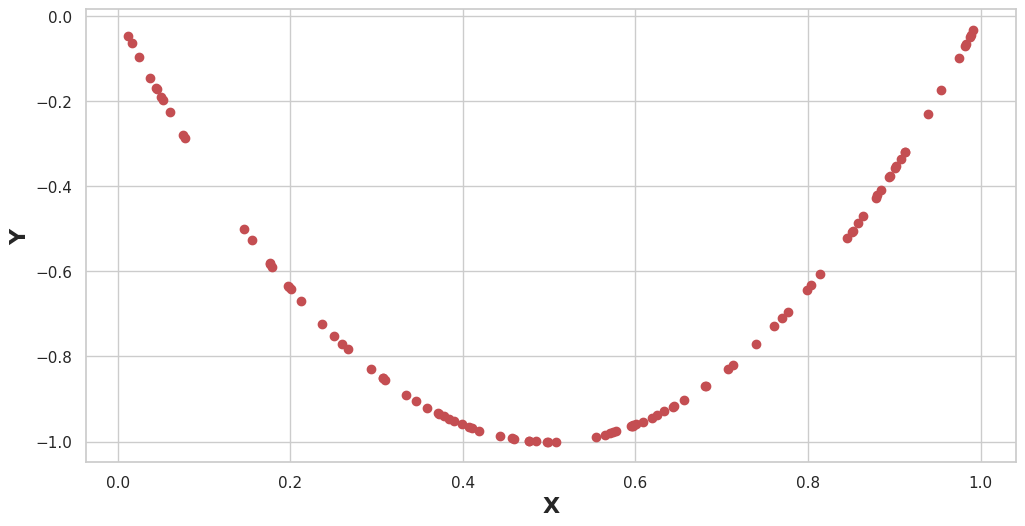

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 1.4735 - mean_squared_error: 1.4735 - val_loss: 0.9841 - val_mean_squared_error: 0.9841


Epoch 2/200
 - 0s - loss: 0.9622 - mean_squared_error: 0.9622 - val_loss: 0.6428 - val_mean_squared_error: 0.6428


Epoch 3/200
 - 0s - loss: 0.6327 - mean_squared_error: 0.6327 - val_loss: 0.4272 - val_mean_squared_error: 0.4272


Epoch 4/200
 - 0s - loss: 0.4228 - mean_squared_error: 0.4228 - val_loss: 0.2920 - val_mean_squared_error: 0.2920


Epoch 5/200
 - 0s - loss: 0.2911 - mean_squared_error: 0.2911 - val_loss: 0.2428 - val_mean_squared_error: 0.2428


Epoch 6/200
 - 0s - loss: 0.2416 - mean_squared_error: 0.2416 - val_loss: 0.2090 - val_mean_squared_error: 0.2090


Epoch 7/200
 - 0s - loss: 0.2064 - mean_squared_error: 0.2064 - val_loss: 0.1743 - val_mean_squared_error: 0.1743


Epoch 8/200
 - 0s - loss: 0.1703 - mean_squared_error: 0.1703 - val_loss: 0.1506 - val_mean_squared_error: 0.1506


Epoch 9/200
 - 0s - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 0.1402 - val_mean_squared_error: 0.1402


Epoch 10/200
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1293 - val_mean_squared_error: 0.1293


Epoch 11/200
 - 0s - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.1263 - val_mean_squared_error: 0.1263


Epoch 12/200
 - 0s - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.1226 - val_mean_squared_error: 0.1226


Epoch 13/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.1212 - val_mean_squared_error: 0.1212


Epoch 14/200
 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.1207 - val_mean_squared_error: 0.1207


Epoch 15/200
 - 0s - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1205 - val_mean_squared_error: 0.1205


Epoch 16/200
 - 0s - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.1202 - val_mean_squared_error: 0.1202


Epoch 17/200
 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.1200 - val_mean_squared_error: 0.1200


Epoch 18/200
 - 0s - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1203 - val_mean_squared_error: 0.1203


Epoch 19/200
 - 0s - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.1207 - val_mean_squared_error: 0.1207


Epoch 20/200
 - 0s - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.1178 - val_mean_squared_error: 0.1178


Epoch 21/200
 - 0s - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.1179 - val_mean_squared_error: 0.1179


Epoch 22/200
 - 0s - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.1179 - val_mean_squared_error: 0.1179


Epoch 23/200
 - 0s - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.1189 - val_mean_squared_error: 0.1189


Epoch 24/200
 - 0s - loss: 0.1042 - mean_squared_error: 0.1042 - val_loss: 0.1171 - val_mean_squared_error: 0.1171


Epoch 25/200
 - 0s - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 26/200
 - 0s - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.1146 - val_mean_squared_error: 0.1146


Epoch 27/200
 - 0s - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.1146 - val_mean_squared_error: 0.1146


Epoch 28/200
 - 0s - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 29/200
 - 0s - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.1142 - val_mean_squared_error: 0.1142


Epoch 30/200
 - 0s - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.1127 - val_mean_squared_error: 0.1127


Epoch 31/200
 - 0s - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.1133 - val_mean_squared_error: 0.1133


Epoch 32/200
 - 0s - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 33/200
 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 34/200
 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1128 - val_mean_squared_error: 0.1128


Epoch 35/200
 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.1128 - val_mean_squared_error: 0.1128


Epoch 36/200


 - 0s - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 37/200
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.1127 - val_mean_squared_error: 0.1127


Epoch 38/200
 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.1126 - val_mean_squared_error: 0.1126


Epoch 39/200
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 40/200


 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 41/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 42/200


 - 0s - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1100 - val_mean_squared_error: 0.1100


Epoch 43/200


 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1097 - val_mean_squared_error: 0.1097


Epoch 44/200


 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1094 - val_mean_squared_error: 0.1094


Epoch 45/200


 - 0s - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.1091 - val_mean_squared_error: 0.1091


Epoch 46/200
 - 0s - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 47/200


 - 0s - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 48/200
 - 0s - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 49/200


 - 0s - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 50/200


 - 0s - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 51/200


 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.1066 - val_mean_squared_error: 0.1066


Epoch 52/200


 - 0s - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.1061 - val_mean_squared_error: 0.1061


Epoch 53/200


 - 0s - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1057 - val_mean_squared_error: 0.1057


Epoch 54/200
 - 0s - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1057 - val_mean_squared_error: 0.1057


Epoch 55/200


 - 0s - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 56/200
 - 0s - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 57/200
 - 0s - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.1043 - val_mean_squared_error: 0.1043


Epoch 58/200
 - 0s - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.1042 - val_mean_squared_error: 0.1042


Epoch 59/200


 - 0s - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 60/200
 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 61/200


 - 0s - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 62/200


 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 63/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 64/200
 - 0s - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 65/200


 - 0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 66/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1051 - val_mean_squared_error: 0.1051


Epoch 67/200


 - 0s - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 68/200


 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 69/200


 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 70/200
 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 71/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 72/200
 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 73/200


 - 0s - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 74/200


 - 0s - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 75/200


 - 0s - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 76/200


 - 0s - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 77/200


 - 0s - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 78/200


 - 0s - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 79/200


 - 0s - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 80/200


 - 0s - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 81/200


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 82/200


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 83/200


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 84/200


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 85/200


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 86/200


 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 87/200


 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 88/200


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 89/200


 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 90/200


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 91/200


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 92/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 93/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 94/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 95/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 96/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 97/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 98/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 99/200


 - 0s - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 100/200


 - 0s - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 101/200


 - 0s - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 102/200


 - 0s - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 103/200


 - 0s - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 104/200


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 105/200


 - 0s - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 106/200


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 107/200


 - 0s - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 108/200


 - 0s - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 109/200


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 110/200


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 111/200


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 112/200


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 113/200


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 114/200


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 115/200


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 116/200


 - 0s - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 117/200


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 118/200


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 119/200


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 120/200


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 121/200


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 122/200


 - 0s - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 123/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 124/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 125/200


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 126/200


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 127/200


 - 0s - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 128/200


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 129/200


 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 130/200
 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 131/200

 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 132/200


 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 133/200


 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 134/200


 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 135/200


 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 136/200


 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 137/200


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 138/200


 - 0s - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 139/200


 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 140/200


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 141/200


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 142/200


 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 143/200


 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 144/200


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 145/200


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 146/200


 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 147/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 148/200


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 149/200


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 150/200


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 151/200

 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 152/200


 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 153/200


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 154/200


 - 0s - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 155/200


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 156/200


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 157/200


 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 158/200


 - 0s - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 159/200


 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 160/200


 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 161/200


 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 162/200


 - 0s - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 163/200


 - 0s - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 164/200


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 165/200


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 166/200


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 167/200


 - 0s - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 168/200


 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0945 - val_mean_squared_error: 0.0945


Epoch 169/200


 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0944 - val_mean_squared_error: 0.0944


Epoch 170/200


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0944 - val_mean_squared_error: 0.0944


Epoch 171/200


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0944 - val_mean_squared_error: 0.0944


Epoch 172/200


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0946 - val_mean_squared_error: 0.0946


Epoch 173/200


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0943 - val_mean_squared_error: 0.0943


Epoch 174/200


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0943 - val_mean_squared_error: 0.0943


Epoch 175/200


 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 176/200
 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 177/200


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 178/200


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 179/200


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 180/200


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 181/200
 - 0s - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 182/200


 - 0s - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 183/200


 - 0s - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 184/200


 - 0s - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 185/200


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 186/200


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 187/200


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 188/200


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 189/200


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 190/200
 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 191/200


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 192/200
 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.0940 - val_mean_squared_error: 0.0940


Epoch 193/200


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 194/200


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 195/200


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 196/200


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0931 - val_mean_squared_error: 0.0931


Epoch 197/200


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 198/200


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0937 - val_mean_squared_error: 0.0937


Epoch 199/200
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 200/200


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0931 - val_mean_squared_error: 0.0931


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

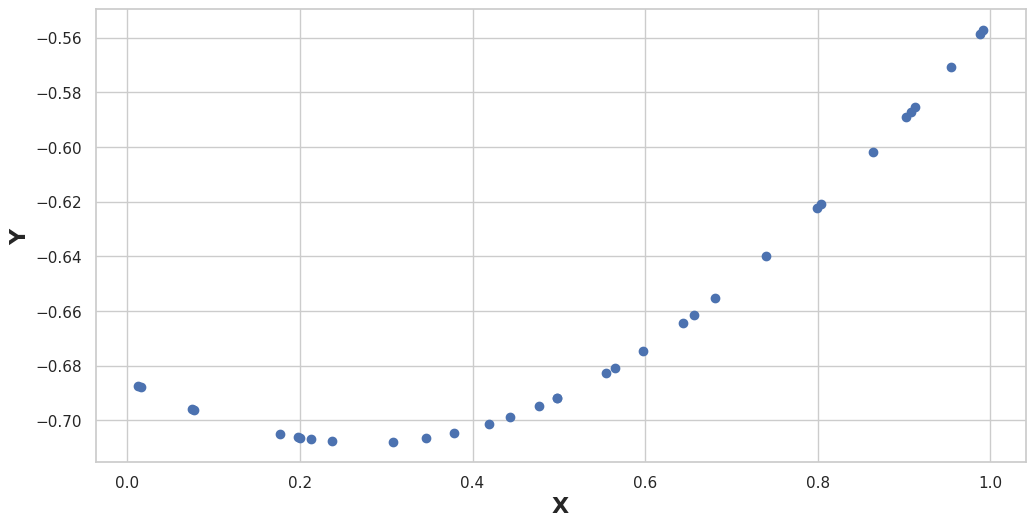

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.9841226754766522,
  0.6427895020354878,
  0.42721241757725226,
  0.29196645917766023,
  0.24280685583962072,
  0.2089618390327263,
  0.1742585604220177,
  0.15059940229085358,
  0.1401856421972766,
  0.12930469779354153,
  0.12629634096766962,
  0.12263205963553804,
  0.12122093931292043,
  0.12067907280994183,
  0.12054230904940402,
  0.1201746581178723,
  0.11999103743018526,
  0.12026501875935179,
  0.12068534710190514,
  0.11780402109478459,
  0.11791960669286324,
  0.11789351159876044,
  0.1189057556065646,
  0.11705918700406046,
  0.11636398416576964,
  0.1146266469449708,
  0.11457081816413185,
  0.11352728262092128,
  0.11423380040761197,
  0.11268662999976765,
  0.11326454173434865,
  0.11200848312088937,
  0.11198019845919176,
  0.11278097873384302,
  0.11281120912595229,
  0.1119951203917012,
  0.11272011065121854,
  0.11255437316316547,
  0.11224846000021155,
  0.11252654456731045,
  0.11126651547171852,
  0.10997577553445642,
  0.1096556204738039,
  0.10939

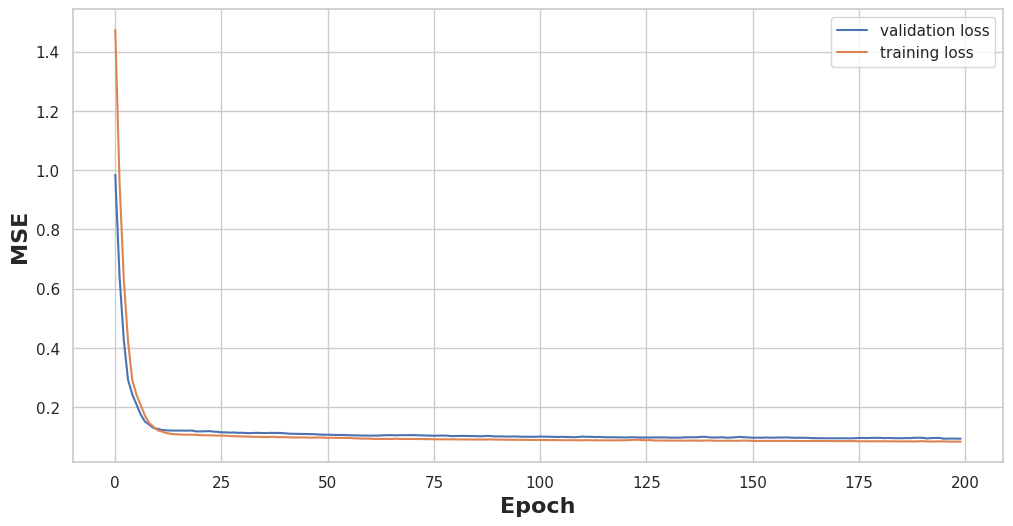

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.2867 - mean_squared_error: 0.2867 - val_loss: 0.1130 - val_mean_squared_error: 0.1130


Epoch 2/500
 - 0s - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.1327 - val_mean_squared_error: 0.1327


Epoch 3/500
 - 0s - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.1096 - val_mean_squared_error: 0.1096


Epoch 4/500
 - 0s - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.1087 - val_mean_squared_error: 0.1087


Epoch 5/500
 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1105 - val_mean_squared_error: 0.1105


Epoch 6/500
 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


Epoch 7/500
 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


Epoch 8/500
 - 0s - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.1286 - val_mean_squared_error: 0.1286


Epoch 9/500
 - 0s - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.1117 - val_mean_squared_error: 0.1117


Epoch 10/500
 - 0s - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 11/500
 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 12/500
 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1093 - val_mean_squared_error: 0.1093


Epoch 13/500
 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 14/500
 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1092 - val_mean_squared_error: 0.1092


Epoch 15/500
 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.1167 - val_mean_squared_error: 0.1167


Epoch 16/500
 - 0s - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 17/500
 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 18/500
 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 19/500
 - 0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.1340 - val_mean_squared_error: 0.1340


Epoch 20/500
 - 0s - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.1080 - val_mean_squared_error: 0.1080


Epoch 21/500
 - 0s - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 0.1169 - val_mean_squared_error: 0.1169


Epoch 22/500
 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.1097 - val_mean_squared_error: 0.1097


Epoch 23/500
 - 0s - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.1246 - val_mean_squared_error: 0.1246


Epoch 24/500
 - 0s - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 25/500


 - 0s - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 26/500
 - 0s - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.1329 - val_mean_squared_error: 0.1329


Epoch 27/500
 - 0s - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.1260 - val_mean_squared_error: 0.1260


Epoch 28/500
 - 0s - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 29/500
 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 30/500
 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1378 - val_mean_squared_error: 0.1378


Epoch 31/500
 - 0s - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


Epoch 32/500
 - 0s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.1123 - val_mean_squared_error: 0.1123


Epoch 33/500
 - 0s - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 34/500
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1107 - val_mean_squared_error: 0.1107


Epoch 35/500
 - 0s - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 36/500
 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1106 - val_mean_squared_error: 0.1106


Epoch 37/500
 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 38/500
 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1056 - val_mean_squared_error: 0.1056


Epoch 39/500


 - 0s - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1346 - val_mean_squared_error: 0.1346


Epoch 40/500


 - 0s - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 41/500
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1272 - val_mean_squared_error: 0.1272


Epoch 42/500
 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1171 - val_mean_squared_error: 0.1171


Epoch 43/500


 - 0s - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 44/500


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.1361 - val_mean_squared_error: 0.1361


Epoch 45/500


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 46/500
 - 0s - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1089 - val_mean_squared_error: 0.1089


Epoch 47/500


 - 0s - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 48/500
 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 49/500
 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1245 - val_mean_squared_error: 0.1245


Epoch 50/500
 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1067 - val_mean_squared_error: 0.1067


Epoch 51/500


 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 52/500


 - 0s - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 53/500


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 54/500


 - 0s - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 55/500


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1045 - val_mean_squared_error: 0.1045


Epoch 56/500
 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.1172 - val_mean_squared_error: 0.1172


Epoch 57/500


 - 0s - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 58/500


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1045 - val_mean_squared_error: 0.1045


Epoch 59/500


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 60/500
 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1356 - val_mean_squared_error: 0.1356


Epoch 61/500
 - 0s - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 62/500


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 63/500


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 64/500


 - 0s - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 65/500


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 66/500


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 67/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 68/500


 - 0s - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 69/500


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 70/500


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.1101 - val_mean_squared_error: 0.1101


Epoch 71/500
 - 0s - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 72/500


 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.1276 - val_mean_squared_error: 0.1276


Epoch 73/500


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 74/500


 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 75/500
 - 0s - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 76/500


 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.1250 - val_mean_squared_error: 0.1250


Epoch 77/500


 - 0s - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 78/500
 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 79/500


 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 80/500
 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 81/500
 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1233 - val_mean_squared_error: 0.1233


Epoch 82/500


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 83/500


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 84/500


 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0936 - val_mean_squared_error: 0.0936


Epoch 85/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 86/500


 - 0s - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0959 - val_mean_squared_error: 0.0959


Epoch 87/500


 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1137 - val_mean_squared_error: 0.1137


Epoch 88/500


 - 0s - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 89/500


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 90/500


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 91/500


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0944 - val_mean_squared_error: 0.0944


Epoch 92/500


 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 93/500


 - 0s - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 94/500


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 95/500


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0928 - val_mean_squared_error: 0.0928


Epoch 96/500


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 97/500
 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 98/500
 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.1203 - val_mean_squared_error: 0.1203


Epoch 99/500


 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0906 - val_mean_squared_error: 0.0906


Epoch 100/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 101/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0918 - val_mean_squared_error: 0.0918


Epoch 102/500
 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0942 - val_mean_squared_error: 0.0942


Epoch 103/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 104/500


 - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0910 - val_mean_squared_error: 0.0910


Epoch 105/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0924 - val_mean_squared_error: 0.0924


Epoch 106/500
 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0932 - val_mean_squared_error: 0.0932


Epoch 107/500


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 108/500


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 109/500


 - 0s - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0893 - val_mean_squared_error: 0.0893


Epoch 110/500


 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 111/500


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0892 - val_mean_squared_error: 0.0892


Epoch 112/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.1374 - val_mean_squared_error: 0.1374


Epoch 113/500
 - 0s - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0893 - val_mean_squared_error: 0.0893


Epoch 114/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 115/500


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 116/500


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.1151 - val_mean_squared_error: 0.1151


Epoch 117/500


 - 0s - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.1096 - val_mean_squared_error: 0.1096


Epoch 118/500


 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0897 - val_mean_squared_error: 0.0897


Epoch 119/500


 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 120/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0864 - val_mean_squared_error: 0.0864


Epoch 121/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0886 - val_mean_squared_error: 0.0886


Epoch 122/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 123/500
 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 124/500


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 125/500


 - 0s - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0839 - val_mean_squared_error: 0.0839


Epoch 126/500
 - 0s - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.0850 - val_mean_squared_error: 0.0850


Epoch 127/500
 - 0s - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0873 - val_mean_squared_error: 0.0873


Epoch 128/500
 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0861 - val_mean_squared_error: 0.0861


Epoch 129/500


 - 0s - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.1064 - val_mean_squared_error: 0.1064


Epoch 130/500


 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0857 - val_mean_squared_error: 0.0857


Epoch 131/500


 - 0s - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0877 - val_mean_squared_error: 0.0877


Epoch 132/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0824 - val_mean_squared_error: 0.0824


Epoch 133/500


 - 0s - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1117 - val_mean_squared_error: 0.1117


Epoch 134/500
 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 135/500


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 136/500


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0853 - val_mean_squared_error: 0.0853


Epoch 137/500


 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 138/500


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0840 - val_mean_squared_error: 0.0840


Epoch 139/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0797 - val_mean_squared_error: 0.0797


Epoch 140/500


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1051 - val_mean_squared_error: 0.1051


Epoch 141/500


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 142/500


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0886 - val_mean_squared_error: 0.0886


Epoch 143/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0809 - val_mean_squared_error: 0.0809


Epoch 144/500


 - 0s - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0782 - val_mean_squared_error: 0.0782


Epoch 145/500


 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.1022 - val_mean_squared_error: 0.1022


Epoch 146/500


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 147/500
 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0776 - val_mean_squared_error: 0.0776


Epoch 148/500


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0936 - val_mean_squared_error: 0.0936


Epoch 149/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 150/500


 - 0s - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0761 - val_mean_squared_error: 0.0761


Epoch 151/500


 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0773 - val_mean_squared_error: 0.0773


Epoch 152/500


 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.1042 - val_mean_squared_error: 0.1042


Epoch 153/500


 - 0s - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0902 - val_mean_squared_error: 0.0902


Epoch 154/500
 - 0s - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0765 - val_mean_squared_error: 0.0765


Epoch 155/500


 - 0s - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 156/500
 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0765 - val_mean_squared_error: 0.0765


Epoch 157/500


 - 0s - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0761 - val_mean_squared_error: 0.0761


Epoch 158/500


 - 0s - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0766 - val_mean_squared_error: 0.0766


Epoch 159/500


 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.1166 - val_mean_squared_error: 0.1166


Epoch 160/500


 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0853 - val_mean_squared_error: 0.0853


Epoch 161/500


 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 162/500


 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0875 - val_mean_squared_error: 0.0875


Epoch 163/500


 - 0s - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0778 - val_mean_squared_error: 0.0778


Epoch 164/500


 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0704 - val_mean_squared_error: 0.0704


Epoch 165/500
 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0696 - val_mean_squared_error: 0.0696


Epoch 166/500


 - 0s - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0711 - val_mean_squared_error: 0.0711


Epoch 167/500


 - 0s - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0697 - val_mean_squared_error: 0.0697


Epoch 168/500


 - 0s - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0721 - val_mean_squared_error: 0.0721


Epoch 169/500


 - 0s - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0746 - val_mean_squared_error: 0.0746


Epoch 170/500


 - 0s - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0938 - val_mean_squared_error: 0.0938


Epoch 171/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0781 - val_mean_squared_error: 0.0781


Epoch 172/500


 - 0s - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0688 - val_mean_squared_error: 0.0688


Epoch 173/500
 - 0s - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 174/500


 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0800 - val_mean_squared_error: 0.0800


Epoch 175/500


 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0832 - val_mean_squared_error: 0.0832


Epoch 176/500


 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0736 - val_mean_squared_error: 0.0736


Epoch 177/500


 - 0s - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0657 - val_mean_squared_error: 0.0657


Epoch 178/500


 - 0s - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0683 - val_mean_squared_error: 0.0683


Epoch 179/500
 - 0s - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0647 - val_mean_squared_error: 0.0647


Epoch 180/500


 - 0s - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 181/500


 - 0s - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0629 - val_mean_squared_error: 0.0629


Epoch 182/500


 - 0s - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0633 - val_mean_squared_error: 0.0633


Epoch 183/500


 - 0s - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0635 - val_mean_squared_error: 0.0635


Epoch 184/500


 - 0s - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0615 - val_mean_squared_error: 0.0615


Epoch 185/500


 - 0s - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.0910 - val_mean_squared_error: 0.0910


Epoch 186/500


 - 0s - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0743 - val_mean_squared_error: 0.0743


Epoch 187/500


 - 0s - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0706 - val_mean_squared_error: 0.0706


Epoch 188/500
 - 0s - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 189/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0640 - val_mean_squared_error: 0.0640


Epoch 190/500


 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0651 - val_mean_squared_error: 0.0651


Epoch 191/500


 - 0s - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0684 - val_mean_squared_error: 0.0684


Epoch 192/500


 - 0s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 193/500
 - 0s - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0853 - val_mean_squared_error: 0.0853


Epoch 194/500


 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0578 - val_mean_squared_error: 0.0578


Epoch 195/500


 - 0s - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 196/500


 - 0s - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 197/500


 - 0s - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.0763 - val_mean_squared_error: 0.0763


Epoch 198/500


 - 0s - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0541 - val_mean_squared_error: 0.0541


Epoch 199/500


 - 0s - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0538 - val_mean_squared_error: 0.0538


Epoch 200/500


 - 0s - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0610 - val_mean_squared_error: 0.0610


Epoch 201/500


 - 0s - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 202/500


 - 0s - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0527 - val_mean_squared_error: 0.0527


Epoch 203/500


 - 0s - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 204/500


 - 0s - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0580 - val_mean_squared_error: 0.0580


Epoch 205/500
 - 0s - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0563 - val_mean_squared_error: 0.0563


Epoch 206/500


 - 0s - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


Epoch 207/500


 - 0s - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0496 - val_mean_squared_error: 0.0496


Epoch 208/500


 - 0s - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0647 - val_mean_squared_error: 0.0647


Epoch 209/500


 - 0s - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0675 - val_mean_squared_error: 0.0675


Epoch 210/500


 - 0s - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 211/500


 - 0s - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0487 - val_mean_squared_error: 0.0487


Epoch 212/500


 - 0s - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0479 - val_mean_squared_error: 0.0479


Epoch 213/500
 - 0s - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0657 - val_mean_squared_error: 0.0657


Epoch 214/500


 - 0s - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0473 - val_mean_squared_error: 0.0473


Epoch 215/500


 - 0s - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0454 - val_mean_squared_error: 0.0454


Epoch 216/500
 - 0s - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0525 - val_mean_squared_error: 0.0525


Epoch 217/500


 - 0s - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0444 - val_mean_squared_error: 0.0444


Epoch 218/500


 - 0s - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0467 - val_mean_squared_error: 0.0467


Epoch 219/500


 - 0s - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0446 - val_mean_squared_error: 0.0446


Epoch 220/500


 - 0s - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0434 - val_mean_squared_error: 0.0434


Epoch 221/500


 - 0s - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0452 - val_mean_squared_error: 0.0452


Epoch 222/500


 - 0s - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0425 - val_mean_squared_error: 0.0425


Epoch 223/500


 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0418 - val_mean_squared_error: 0.0418


Epoch 224/500
 - 0s - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0407 - val_mean_squared_error: 0.0407


Epoch 225/500


 - 0s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0410 - val_mean_squared_error: 0.0410


Epoch 226/500


 - 0s - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0400 - val_mean_squared_error: 0.0400


Epoch 227/500


 - 0s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0424 - val_mean_squared_error: 0.0424


Epoch 228/500


 - 0s - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0448 - val_mean_squared_error: 0.0448


Epoch 229/500


 - 0s - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0446 - val_mean_squared_error: 0.0446


Epoch 230/500


 - 0s - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0432 - val_mean_squared_error: 0.0432


Epoch 231/500


 - 0s - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0413 - val_mean_squared_error: 0.0413


Epoch 232/500


 - 0s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0369 - val_mean_squared_error: 0.0369


Epoch 233/500
 - 0s - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0412 - val_mean_squared_error: 0.0412


Epoch 234/500


 - 0s - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0359 - val_mean_squared_error: 0.0359


Epoch 235/500


 - 0s - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0352 - val_mean_squared_error: 0.0352


Epoch 236/500


 - 0s - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0370 - val_mean_squared_error: 0.0370


Epoch 237/500


 - 0s - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0351 - val_mean_squared_error: 0.0351


Epoch 238/500


 - 0s - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0453 - val_mean_squared_error: 0.0453


Epoch 239/500


 - 0s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0332 - val_mean_squared_error: 0.0332


Epoch 240/500


 - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0328 - val_mean_squared_error: 0.0328


Epoch 241/500


 - 0s - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0328 - val_mean_squared_error: 0.0328


Epoch 242/500


 - 0s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0334 - val_mean_squared_error: 0.0334


Epoch 243/500
 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0339 - val_mean_squared_error: 0.0339


Epoch 244/500


 - 0s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0322 - val_mean_squared_error: 0.0322


Epoch 245/500


 - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0304 - val_mean_squared_error: 0.0304


Epoch 246/500


 - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0392 - val_mean_squared_error: 0.0392


Epoch 247/500


 - 0s - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 248/500


 - 0s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0399 - val_mean_squared_error: 0.0399


Epoch 249/500


 - 0s - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0286 - val_mean_squared_error: 0.0286


Epoch 250/500


 - 0s - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0329 - val_mean_squared_error: 0.0329


Epoch 251/500


 - 0s - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0306 - val_mean_squared_error: 0.0306


Epoch 252/500


 - 0s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0282 - val_mean_squared_error: 0.0282


Epoch 253/500


 - 0s - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0276 - val_mean_squared_error: 0.0276


Epoch 254/500


 - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0276 - val_mean_squared_error: 0.0276


Epoch 255/500
 - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0264 - val_mean_squared_error: 0.0264


Epoch 256/500


 - 0s - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0249 - val_mean_squared_error: 0.0249


Epoch 257/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0282 - val_mean_squared_error: 0.0282


Epoch 258/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0252 - val_mean_squared_error: 0.0252


Epoch 259/500
 - 0s - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0262 - val_mean_squared_error: 0.0262


Epoch 260/500
 - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0264 - val_mean_squared_error: 0.0264


Epoch 261/500


 - 0s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


Epoch 262/500
 - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0260 - val_mean_squared_error: 0.0260


Epoch 263/500


 - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0249 - val_mean_squared_error: 0.0249


Epoch 264/500


 - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0212 - val_mean_squared_error: 0.0212


Epoch 265/500


 - 0s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0208 - val_mean_squared_error: 0.0208


Epoch 266/500


 - 0s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 267/500


 - 0s - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0312 - val_mean_squared_error: 0.0312


Epoch 268/500


 - 0s - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0191 - val_mean_squared_error: 0.0191


Epoch 269/500


 - 0s - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 270/500


 - 0s - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0496 - val_mean_squared_error: 0.0496


Epoch 271/500


 - 0s - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0203 - val_mean_squared_error: 0.0203


Epoch 272/500


 - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0180 - val_mean_squared_error: 0.0180


Epoch 273/500


 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0217 - val_mean_squared_error: 0.0217


Epoch 274/500


 - 0s - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0230 - val_mean_squared_error: 0.0230


Epoch 275/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0174 - val_mean_squared_error: 0.0174


Epoch 276/500


 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0194 - val_mean_squared_error: 0.0194


Epoch 277/500


 - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0216 - val_mean_squared_error: 0.0216


Epoch 278/500


 - 0s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0178 - val_mean_squared_error: 0.0178


Epoch 279/500


 - 0s - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0169 - val_mean_squared_error: 0.0169


Epoch 280/500


 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0157 - val_mean_squared_error: 0.0157


Epoch 281/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0144 - val_mean_squared_error: 0.0144


Epoch 282/500


 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0240 - val_mean_squared_error: 0.0240


Epoch 283/500


 - 0s - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0137 - val_mean_squared_error: 0.0137


Epoch 284/500


 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 285/500


 - 0s - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0142 - val_mean_squared_error: 0.0142


Epoch 286/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


Epoch 287/500


 - 0s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 288/500


 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0132 - val_mean_squared_error: 0.0132


Epoch 289/500


 - 0s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 290/500
 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0279 - val_mean_squared_error: 0.0279


Epoch 291/500


 - 0s - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0139 - val_mean_squared_error: 0.0139


Epoch 292/500


 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0149 - val_mean_squared_error: 0.0149


Epoch 293/500


 - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 294/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 295/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0116 - val_mean_squared_error: 0.0116


Epoch 296/500


 - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0111 - val_mean_squared_error: 0.0111


Epoch 297/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0104 - val_mean_squared_error: 0.0104


Epoch 298/500


 - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 299/500


 - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 300/500


 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 301/500


 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


Epoch 302/500


 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0135 - val_mean_squared_error: 0.0135


Epoch 303/500
 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 304/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0130 - val_mean_squared_error: 0.0130


Epoch 305/500


 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0091 - val_mean_squared_error: 0.0091


Epoch 306/500


 - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0086 - val_mean_squared_error: 0.0086


Epoch 307/500


 - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0094 - val_mean_squared_error: 0.0094


Epoch 308/500


 - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 309/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 310/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 311/500


 - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 312/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 313/500


 - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 314/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 315/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0069 - val_mean_squared_error: 0.0069


Epoch 316/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 317/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0087 - val_mean_squared_error: 0.0087


Epoch 318/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 319/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 320/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 321/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0091 - val_mean_squared_error: 0.0091


Epoch 322/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 323/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 324/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 325/500


 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0071 - val_mean_squared_error: 0.0071


Epoch 326/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0066 - val_mean_squared_error: 0.0066


Epoch 327/500


 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 328/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 329/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 330/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 331/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0067 - val_mean_squared_error: 0.0067


Epoch 332/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 333/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 334/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 335/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 336/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 337/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 338/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 339/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0066 - val_mean_squared_error: 0.0066


Epoch 340/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 341/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 342/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 343/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 344/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 345/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 346/500


 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 347/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 348/500
 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 349/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 350/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 351/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 352/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 353/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 354/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 355/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 356/500
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 357/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 358/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 359/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 360/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 361/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 362/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 363/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 364/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 365/500

 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 366/500
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 367/500
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 368/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 369/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 370/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 371/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 372/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 373/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 374/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 375/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 376/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 377/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 378/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 379/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 380/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 381/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 382/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 383/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 384/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 385/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 386/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 387/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 388/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 389/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 390/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 391/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 392/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 393/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 394/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 395/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 396/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 397/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 398/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 399/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 400/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 401/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 402/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 403/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 404/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 405/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 406/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 407/500

 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 408/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 409/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 410/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 411/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 412/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 413/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 414/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 415/500
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 416/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 417/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 418/500

 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 419/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 420/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 421/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 422/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 423/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 424/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 425/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 426/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 427/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 428/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 429/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 430/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 431/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 432/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 433/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 434/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 435/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 436/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 437/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 438/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 439/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 440/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 441/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 442/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 443/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 444/500
 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 445/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 446/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 447/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 448/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 449/500

 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 450/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 451/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 452/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 453/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 454/500
 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 455/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 456/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 457/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 458/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 459/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 460/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 461/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 462/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 463/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 464/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 465/500
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 466/500
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 467/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 468/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 469/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 470/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 471/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 472/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 473/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 474/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 475/500
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 476/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 477/500


 - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 478/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 479/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 480/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 481/500


 - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 482/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 483/500
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 484/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 485/500
 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 486/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 487/500


 - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 488/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 489/500
 - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 490/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 491/500


 - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 492/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 493/500


 - 0s - loss: 9.9942e-04 - mean_squared_error: 9.9942e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 494/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 495/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 496/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 497/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 498/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 499/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 500/500
 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Text(0, 0.5, 'Y')

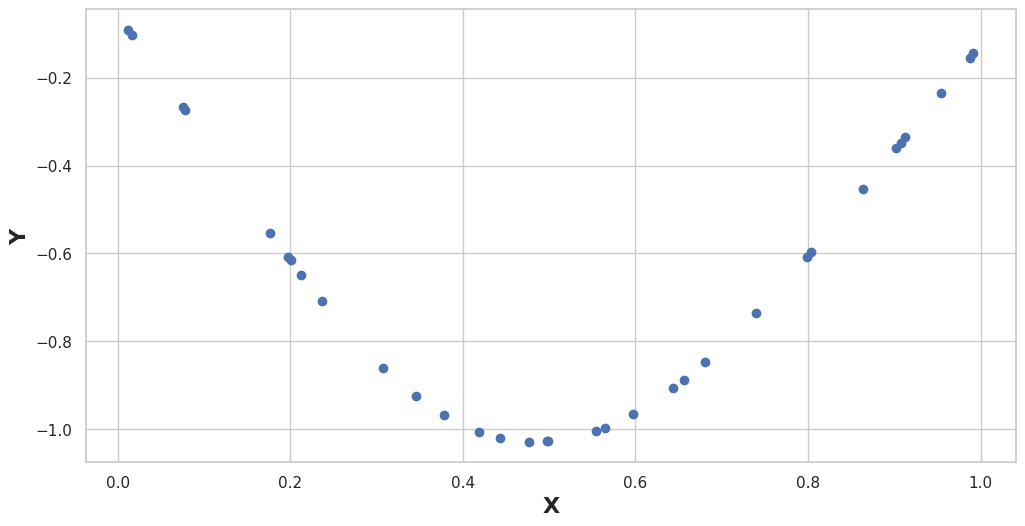

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

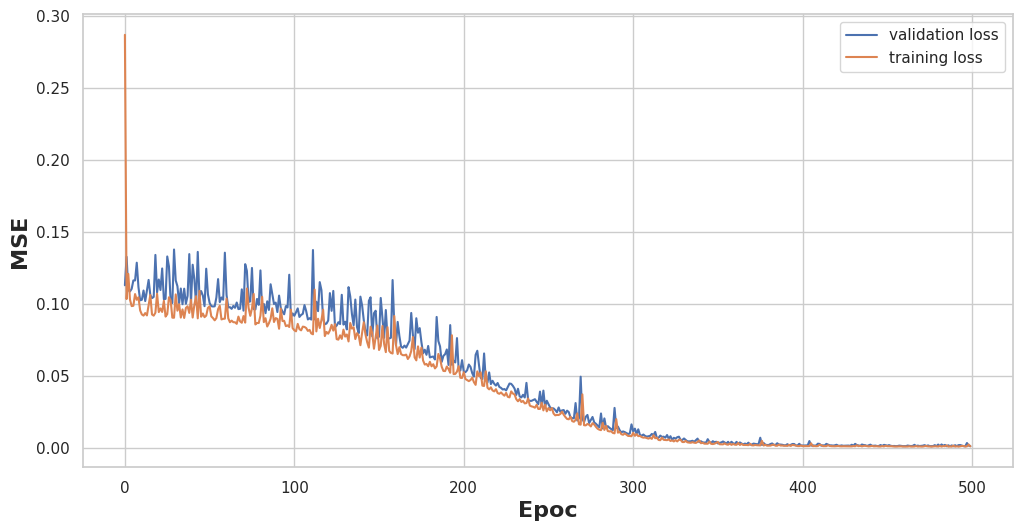

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

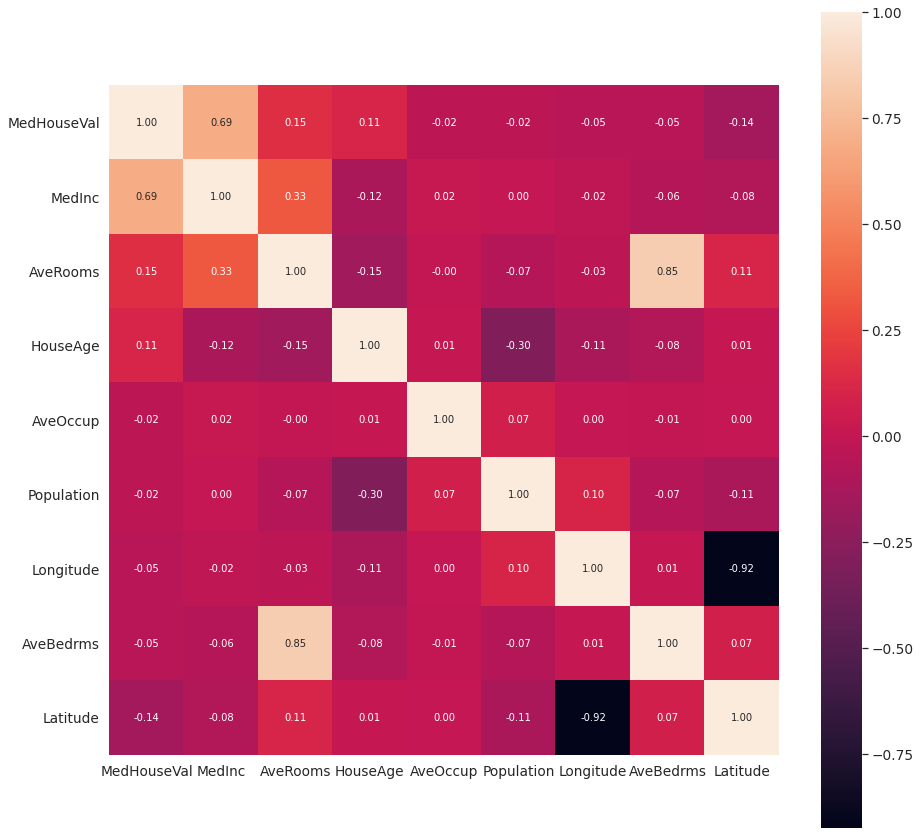

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

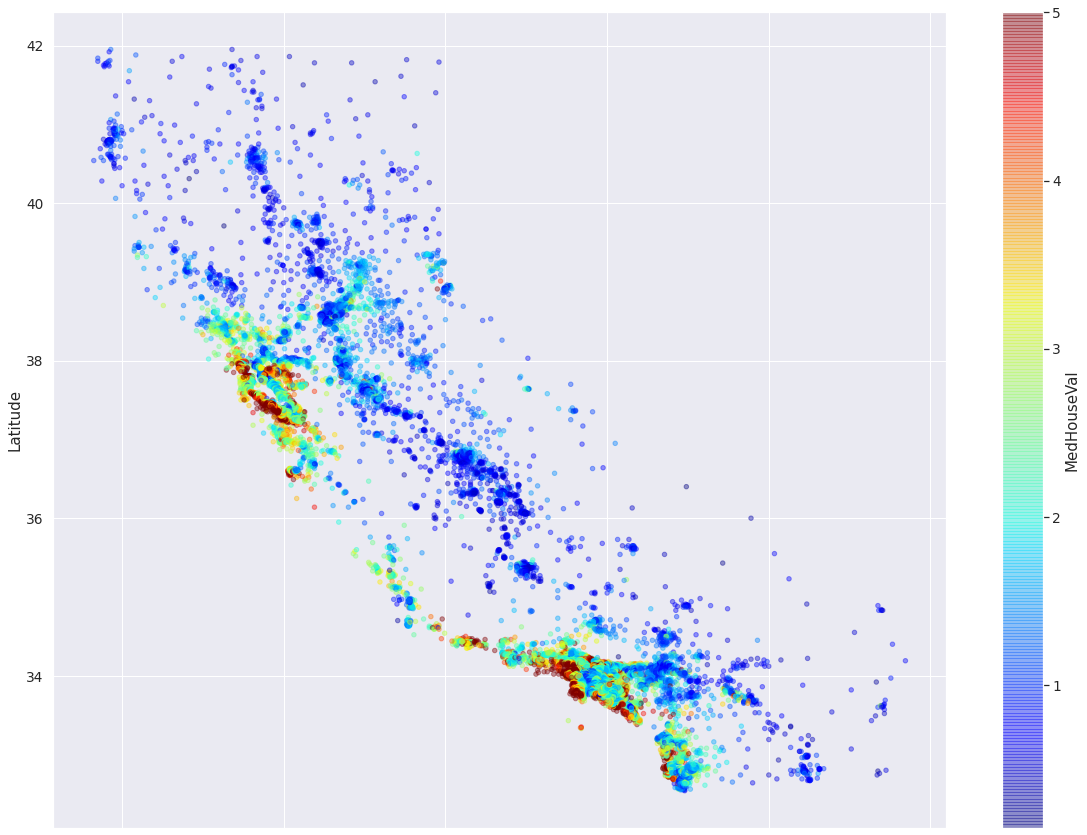

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

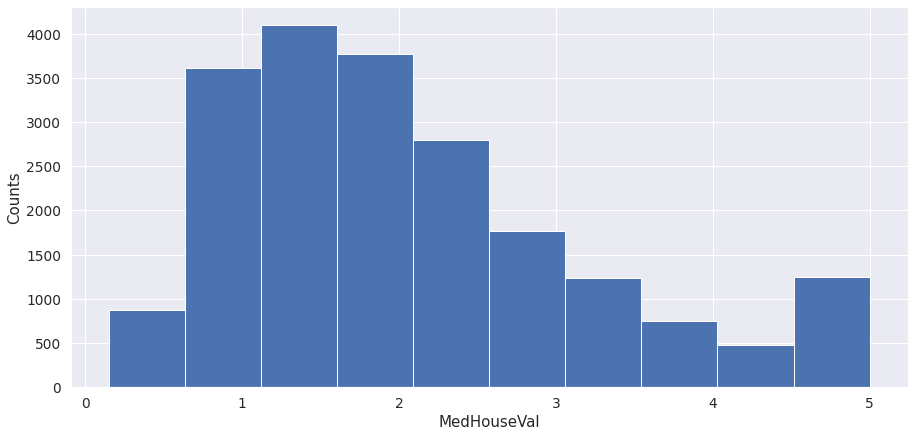

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

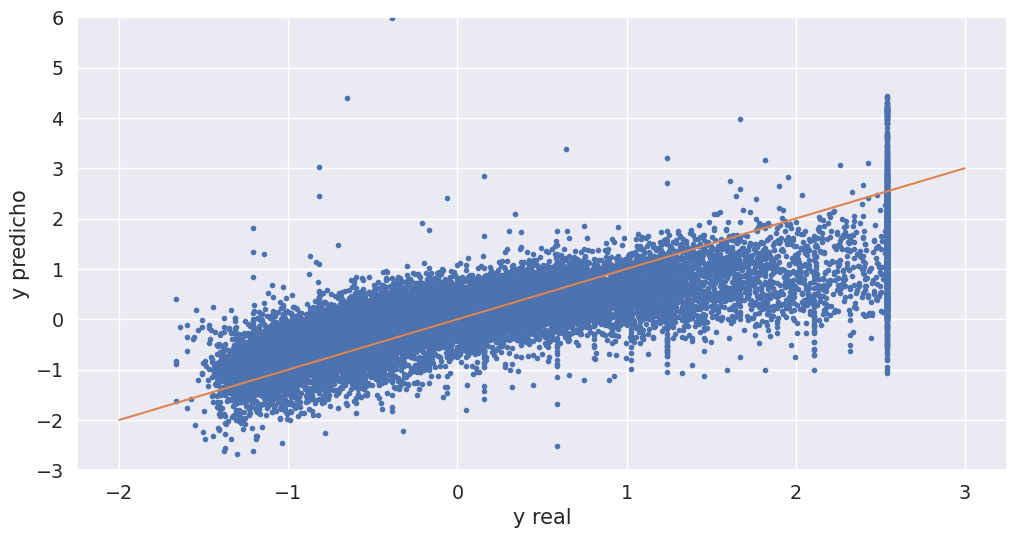

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100


   32/12384 [..............................] - ETA: 16s - loss: 0.4797

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.4465 

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.3916

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.3826

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.3719

10880/12384 [=========================>....] - ETA: 0s - loss: 0.3629

12384/12384 [==============================] - 0s 40us/step - loss: 0.3572 - val_loss: 0.3478


Epoch 2/100


   32/12384 [..............................] - ETA: 1s - loss: 0.5771

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3096

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.3227

 6176/12384 [=============>................] - ETA: 0s - loss: 0.3364

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.3330

10368/12384 [========================>.....] - ETA: 0s - loss: 0.3256

12320/12384 [============================>.] - ETA: 0s - loss: 0.3221

12384/12384 [==============================] - 0s 38us/step - loss: 0.3218 - val_loss: 0.3252


Epoch 3/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2279

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.3115

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.3095

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.3068

 7264/12384 [================>.............] - ETA: 0s - loss: 0.3149

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.3113

11552/12384 [==========================>...] - ETA: 0s - loss: 0.3091

12384/12384 [==============================] - 0s 38us/step - loss: 0.3097 - val_loss: 0.3174


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3559

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3127

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2997

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2969

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2957

10912/12384 [=========================>....] - ETA: 0s - loss: 0.3012

12384/12384 [==============================] - 0s 37us/step - loss: 0.3015 - val_loss: 0.3125


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2138

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2804

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2923

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2937

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2928

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2987

11744/12384 [===========================>..] - ETA: 0s - loss: 0.3002

12384/12384 [==============================] - 0s 38us/step - loss: 0.2965 - val_loss: 0.3264


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2829

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2906

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2954

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2938

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2906

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2918

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2886

12384/12384 [==============================] - 0s 39us/step - loss: 0.2912 - val_loss: 0.2921


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1567

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2747

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2836

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2811

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2927

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2900

12384/12384 [==============================] - 0s 36us/step - loss: 0.2884 - val_loss: 0.2919


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4083

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2901

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.3027

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2958

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2918

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2869

12384/12384 [==============================] - 0s 37us/step - loss: 0.2853 - val_loss: 0.2933


Epoch 9/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4110

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2921

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2964

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2892

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2843

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2846

12384/12384 [==============================] - 0s 37us/step - loss: 0.2831 - val_loss: 0.2911


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3236

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2829

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2818

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2783

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2772

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2790

12384/12384 [==============================] - 0s 36us/step - loss: 0.2807 - val_loss: 0.2785


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3327

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2790

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2738

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2785

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2771

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2744

12384/12384 [==============================] - 0s 36us/step - loss: 0.2740 - val_loss: 0.2973


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1945

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2468

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2511

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2568

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2643

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2663

12384/12384 [==============================] - 0s 36us/step - loss: 0.2705 - val_loss: 0.2765


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2987

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2582

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2652

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2664

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2647

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2638

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 39us/step - loss: 0.2682 - val_loss: 0.2832


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3443

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2577

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2664

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2676

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2660

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2689

12384/12384 [==============================] - 0s 35us/step - loss: 0.2657 - val_loss: 0.2903


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3147

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2752

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2824

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2685

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2612

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2621

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 38us/step - loss: 0.2666 - val_loss: 0.2756


Epoch 16/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1643

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2712

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2621

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2687

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2717

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2659

12288/12384 [============================>.] - ETA: 0s - loss: 0.2648

12384/12384 [==============================] - 0s 38us/step - loss: 0.2644 - val_loss: 0.2659


Epoch 17/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2549

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2679

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2697

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2637

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2618

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2608

12032/12384 [============================>.] - ETA: 0s - loss: 0.2602

12384/12384 [==============================] - 0s 36us/step - loss: 0.2606 - val_loss: 0.2763


Epoch 18/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1386

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2677

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2712

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2697

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2648

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2627

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2615

12384/12384 [==============================] - 0s 37us/step - loss: 0.2611 - val_loss: 0.2650


Epoch 19/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2892

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2377

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2485

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2671

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2641

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2653

12256/12384 [============================>.] - ETA: 0s - loss: 0.2608

12384/12384 [==============================] - 0s 36us/step - loss: 0.2601 - val_loss: 0.2606


Epoch 20/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1685

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2592

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2591

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2545

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2602

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2571

12384/12384 [==============================] - 0s 35us/step - loss: 0.2581 - val_loss: 0.2690


Epoch 21/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2390

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2632

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2505

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2456

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2580

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2563

12384/12384 [==============================] - 0s 35us/step - loss: 0.2562 - val_loss: 0.2647


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3740

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2620

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2590

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2606

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2623

12320/12384 [============================>.] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 0s 36us/step - loss: 0.2602 - val_loss: 0.2627


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0975

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2521

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2602

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2594

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2603

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2595

12384/12384 [==============================] - 0s 35us/step - loss: 0.2597 - val_loss: 0.2713


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1901

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2403

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2597

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2586

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2634

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2624

12384/12384 [==============================] - 0s 35us/step - loss: 0.2563 - val_loss: 0.2614


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1907

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2587

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2560

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2491

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2586

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2575

12320/12384 [============================>.] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 35us/step - loss: 0.2550 - val_loss: 0.2712


Epoch 26/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1320

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2521

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2526

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2496

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2487

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2533

12064/12384 [============================>.] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 36us/step - loss: 0.2522 - val_loss: 0.2599


Epoch 27/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2224

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2605

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2686

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2669

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2606

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2574

12160/12384 [============================>.] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 36us/step - loss: 0.2535 - val_loss: 0.2510


Epoch 28/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1430

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2583

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2712

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2649

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2639

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2547

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2511

12384/12384 [==============================] - 0s 39us/step - loss: 0.2501 - val_loss: 0.2557


Epoch 29/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3986

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2579

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2504

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2556

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2548

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2495

12320/12384 [============================>.] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 36us/step - loss: 0.2500 - val_loss: 0.2645


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3003

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2311

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2357

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2365

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2432

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2456

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 37us/step - loss: 0.2490 - val_loss: 0.2747


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1231

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2492

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2478

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2509

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 37us/step - loss: 0.2497 - val_loss: 0.2603


Epoch 32/100


   32/12384 [..............................] - ETA: 1s - loss: 0.4557

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2565

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2550

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2529

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2493

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 34us/step - loss: 0.2463 - val_loss: 0.2533


Epoch 33/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1495

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2180

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2379

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2401

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2473

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 33us/step - loss: 0.2461 - val_loss: 0.2597


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2325

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2437

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2476

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2497

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2465

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 34us/step - loss: 0.2440 - val_loss: 0.2667


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0873

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2582

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2586

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2465

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2472

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 35us/step - loss: 0.2449 - val_loss: 0.2458


Epoch 36/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1923

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2312

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2371

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2417

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2428

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 35us/step - loss: 0.2449 - val_loss: 0.2540


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1365

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2339

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2412

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2459

12128/12384 [============================>.] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 37us/step - loss: 0.2429 - val_loss: 0.2535


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1954

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2396

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2405

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2385

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2390

12352/12384 [============================>.] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 36us/step - loss: 0.2428 - val_loss: 0.2457


Epoch 39/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3167

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2637

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2528

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2504

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2435

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 35us/step - loss: 0.2424 - val_loss: 0.2721


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2163

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2375

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2362

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2412

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 37us/step - loss: 0.2403 - val_loss: 0.2424


Epoch 41/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1062

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2474

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2316

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2410

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2444



10432/12384 [========================>.....] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 35us/step - loss: 0.2412 - val_loss: 0.2592


Epoch 42/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1796

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2347

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2398

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2424

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2368

12032/12384 [============================>.] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 36us/step - loss: 0.2402 - val_loss: 0.2579


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2262

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2230

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2195

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2348

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2400

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 34us/step - loss: 0.2400 - val_loss: 0.2597


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2834

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2176

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2288

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2383

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2385

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2358

12288/12384 [============================>.] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 36us/step - loss: 0.2385 - val_loss: 0.2407


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2442

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2331

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2417

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2447

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2410

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2395

12320/12384 [============================>.] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 36us/step - loss: 0.2394 - val_loss: 0.2521


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3804

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2426

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2430

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2419

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2425

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 35us/step - loss: 0.2383 - val_loss: 0.2483


Epoch 47/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3934

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2493

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2437

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2370

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2350

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2346

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 39us/step - loss: 0.2378 - val_loss: 0.2588


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2214

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2406

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2386

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2414

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2383

12224/12384 [============================>.] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 36us/step - loss: 0.2385 - val_loss: 0.2828


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2238

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2413

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2283

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2304

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2346

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 38us/step - loss: 0.2381 - val_loss: 0.2436


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1348

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2333

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2314

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2340

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2340

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2368

12064/12384 [============================>.] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 38us/step - loss: 0.2378 - val_loss: 0.2569


Epoch 51/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1393

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2385

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2368

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 35us/step - loss: 0.2354 - val_loss: 0.2496


Epoch 52/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1870

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2314

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2365

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2419

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 34us/step - loss: 0.2366 - val_loss: 0.2554


Epoch 53/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1724

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2159

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2270

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2300

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2325

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2350

12320/12384 [============================>.] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 36us/step - loss: 0.2340 - val_loss: 0.2452


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1988

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2398

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2352

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2328

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2286



12288/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 36us/step - loss: 0.2335 - val_loss: 0.2464


Epoch 55/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1590

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2213

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2362

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2348

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2314

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 34us/step - loss: 0.2363 - val_loss: 0.2397


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1081

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2121

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2225

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2212

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2287

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 34us/step - loss: 0.2352 - val_loss: 0.2388


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3612

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2525

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2397

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2342

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2358

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 34us/step - loss: 0.2360 - val_loss: 0.2358


Epoch 58/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1852

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2279

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2323

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2373

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 35us/step - loss: 0.2348 - val_loss: 0.2382


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1033

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2221

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2316

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2320

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2303

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2338

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2403


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1794

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2466

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2357

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2392

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2402

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12320/12384 [============================>.] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 36us/step - loss: 0.2339 - val_loss: 0.2545


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0894

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2335

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2340

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 34us/step - loss: 0.2330 - val_loss: 0.2354


Epoch 62/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2031

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2284

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2178

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2230

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2276

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2342

12256/12384 [============================>.] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 37us/step - loss: 0.2340 - val_loss: 0.2577


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2921

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2508

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2411

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2341

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 35us/step - loss: 0.2341 - val_loss: 0.2342


Epoch 64/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2253

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2222

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2173

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2319

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2266

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2305

12160/12384 [============================>.] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 37us/step - loss: 0.2342 - val_loss: 0.2390


Epoch 65/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2269

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2370

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2479

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2381

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2327

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 35us/step - loss: 0.2340 - val_loss: 0.2519


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2546

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2370

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 35us/step - loss: 0.2333 - val_loss: 0.2382


Epoch 67/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1834

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2138

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2318

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2285

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2346

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 35us/step - loss: 0.2338 - val_loss: 0.2388


Epoch 68/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1318

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2287

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2323

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 36us/step - loss: 0.2328 - val_loss: 0.2359


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1058

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2367

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2236

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2197

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 35us/step - loss: 0.2317 - val_loss: 0.2471


Epoch 70/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1672

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2491

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2327

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2305

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2484


Epoch 71/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1286

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2219

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2260

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2303

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2321

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 35us/step - loss: 0.2335 - val_loss: 0.2413


Epoch 72/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3346

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2351

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2226

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2315

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2286

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 36us/step - loss: 0.2325 - val_loss: 0.2505


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1753

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2529

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2383

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2376

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2321

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2336

12352/12384 [============================>.] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 35us/step - loss: 0.2344 - val_loss: 0.2361


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1417

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2149

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2289

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2287

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2316

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 35us/step - loss: 0.2318 - val_loss: 0.2377


Epoch 75/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1497

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2495

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2256

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2257

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2254

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2315

12256/12384 [============================>.] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2411


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3210

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2375

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2310

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2328

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2314

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2317

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 38us/step - loss: 0.2299 - val_loss: 0.2324


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2082

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2309

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2273

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2251

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 35us/step - loss: 0.2311 - val_loss: 0.2534


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1408

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2311

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2337

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2273

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2265

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 35us/step - loss: 0.2303 - val_loss: 0.2496


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2036

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2441

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2385

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2281

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2302

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2293

12000/12384 [============================>.] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 38us/step - loss: 0.2304 - val_loss: 0.2421


Epoch 80/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1761

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2308

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2304

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2259

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2272

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 35us/step - loss: 0.2309 - val_loss: 0.2384


Epoch 81/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1820

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2342

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2298

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2268

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2324

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2341

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 39us/step - loss: 0.2305 - val_loss: 0.2451


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2155

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2341

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2322

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2306

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2321

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2266

12128/12384 [============================>.] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 37us/step - loss: 0.2306 - val_loss: 0.2479


Epoch 83/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2360

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2304

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2295

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 36us/step - loss: 0.2314 - val_loss: 0.2352


Epoch 84/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0789

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2330

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2273

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2328

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2350

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 35us/step - loss: 0.2303 - val_loss: 0.2396


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2071

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2378

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2355

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2328

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2315

12192/12384 [============================>.]

 - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 36us/step - loss: 0.2294 - val_loss: 0.2335


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3189

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2238

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2266

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2273

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2277

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 35us/step - loss: 0.2296 - val_loss: 0.2300


Epoch 87/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2031

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2297

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2228

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2329

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2295

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 36us/step - loss: 0.2308 - val_loss: 0.2404


Epoch 88/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2832

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2476

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2311

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2342

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 35us/step - loss: 0.2304 - val_loss: 0.2364


Epoch 89/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1320

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2252

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2322

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2337

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2366

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 40us/step - loss: 0.2313 - val_loss: 0.2433


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2560

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2256

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2321

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2287

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2318

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2269

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2271

12096/12384 [============================>.] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 1s 41us/step - loss: 0.2298 - val_loss: 0.2389


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1873

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2295

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2267

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2283

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2296

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2283

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 38us/step - loss: 0.2289 - val_loss: 0.2430


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4014

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2230

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2307

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2266

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2350

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2350

12352/12384 [============================>.] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 37us/step - loss: 0.2298 - val_loss: 0.2354


Epoch 93/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1438

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2215

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2281

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 35us/step - loss: 0.2285 - val_loss: 0.2443


Epoch 94/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1879

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2303

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2310

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2329

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 34us/step - loss: 0.2294 - val_loss: 0.2527


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1958

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2031

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2305

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2260

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2291

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2302

12288/12384 [============================>.] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 36us/step - loss: 0.2300 - val_loss: 0.2383


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3529

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2064

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2070

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2139

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2190

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2247

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 37us/step - loss: 0.2278 - val_loss: 0.2396


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2130

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2467

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2318

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2328

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2291

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2403


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2875

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2403

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2339

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2311

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2359

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 35us/step - loss: 0.2295 - val_loss: 0.2304


Epoch 99/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1092

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2106

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2143

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2194

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2246

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2288

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 37us/step - loss: 0.2287 - val_loss: 0.2507


Epoch 100/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2222

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2369

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2227

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2226

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2249

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 35us/step - loss: 0.2290 - val_loss: 0.2392


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

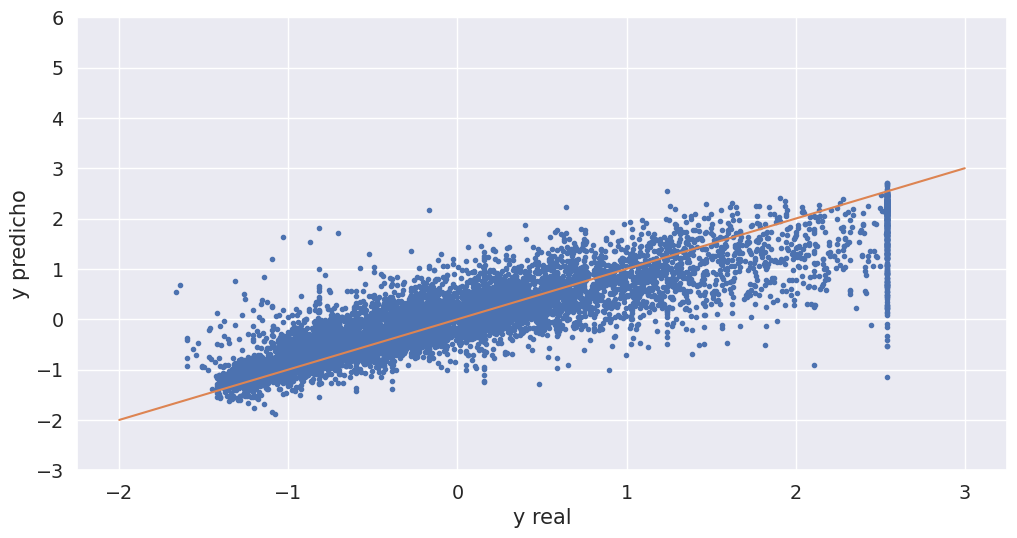

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

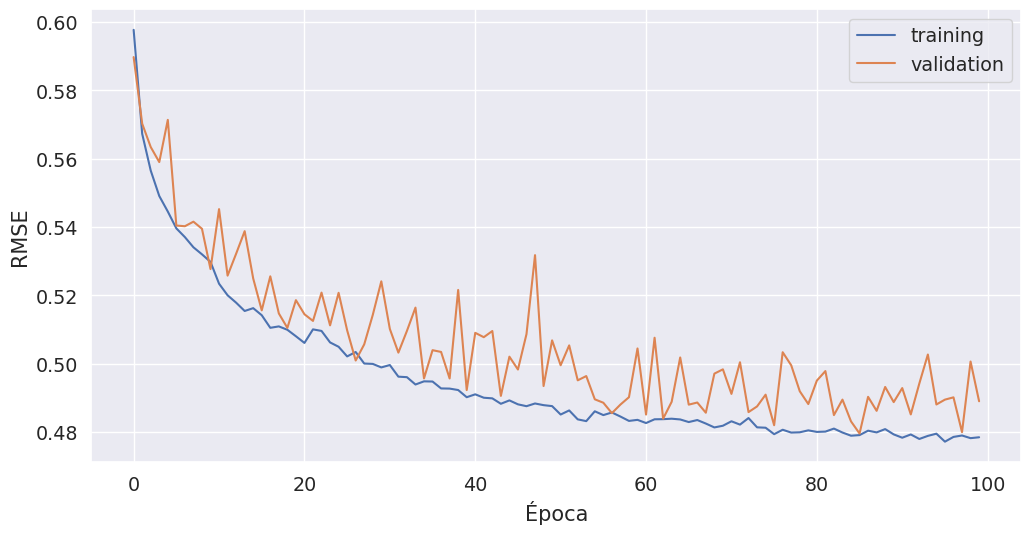

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 15s - loss: 1.3484

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.5243 

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.4548

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.4172

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.3978

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3877

12384/12384 [==============================] - 0s 38us/step - loss: 0.3810 - val_loss: 0.3407


Epoch 2/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1808

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3178

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.3374

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.3347

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.3277

10816/12384 [=========================>....] - ETA: 0s - loss: 0.3319

12384/12384 [==============================] - 0s 34us/step - loss: 0.3249 - val_loss: 0.3270


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3864

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3274

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.3159

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.3125

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.3119

10848/12384 [=========================>....] - ETA: 0s - loss: 0.3086

12384/12384 [==============================] - 0s 35us/step - loss: 0.3123 - val_loss: 0.3132


Epoch 4/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2166

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3165

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.3109

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2989

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.3065

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3117

12096/12384 [============================>.] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 38us/step - loss: 0.3066 - val_loss: 0.3134


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1910

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2905

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2980

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.3050

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.3013

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2986

12384/12384 [==============================] - 0s 33us/step - loss: 0.2997 - val_loss: 0.3090


Epoch 6/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2026

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3038

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2950

 6016/12384 [=============>................] - ETA: 0s - loss: 0.3016

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2989

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2964

12384/12384 [==============================] - 0s 34us/step - loss: 0.2963 - val_loss: 0.3051


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2055

 1248/12384 [==>...........................] - ETA: 0s - loss: 0.3002

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2819

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2804

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2891

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2938

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2967

12384/12384 [==============================] - 0s 36us/step - loss: 0.2950 - val_loss: 0.3066


Epoch 8/200
   32/12384 [..............................] - ETA: 1s - loss: 0.8044

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3080

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2928

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2943

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2915

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2920

12384/12384 [==============================] - 0s 34us/step - loss: 0.2911 - val_loss: 0.3097


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2266

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3139

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2936

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2962

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2935

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2863

12128/12384 [============================>.] - ETA: 0s - loss: 0.2897

12384/12384 [==============================] - 0s 35us/step - loss: 0.2877 - val_loss: 0.3028


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3343

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2560

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2824

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2855

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2874

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2854

12384/12384 [==============================] - 0s 34us/step - loss: 0.2846 - val_loss: 0.2913


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2830

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2889

 3168/12384 [======>.......................] - ETA: 0s - loss: 0.2829

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2946

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2869

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2858

12064/12384 [============================>.] - ETA: 0s - loss: 0.2833

12384/12384 [==============================] - 0s 35us/step - loss: 0.2831 - val_loss: 0.2884


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1871

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2781

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2678

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2650

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2701

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2769

12384/12384 [==============================] - 0s 33us/step - loss: 0.2799 - val_loss: 0.2932


Epoch 13/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1994

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2962

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2965

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2791

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2804

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2764

12384/12384 [==============================] - 0s 36us/step - loss: 0.2778 - val_loss: 0.2827


Epoch 14/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2286

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2860

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2739

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2706

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2706

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2699

12384/12384 [==============================] - 0s 34us/step - loss: 0.2760 - val_loss: 0.2849


Epoch 15/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3355

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2814

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2793

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2728

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2776

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2729

12384/12384 [==============================] - 0s 33us/step - loss: 0.2739 - val_loss: 0.2812


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1472

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2752

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2762

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2723

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2672

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2704

12384/12384 [==============================] - 0s 33us/step - loss: 0.2722 - val_loss: 0.2777


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5356

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2712

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2751

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2742

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2667

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2697

12384/12384 [==============================] - 0s 32us/step - loss: 0.2704 - val_loss: 0.2801


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4968

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2599

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2713

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2723

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2687

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2708

12384/12384 [==============================] - 0s 32us/step - loss: 0.2681 - val_loss: 0.2758


Epoch 19/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1217

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2541

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2659

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2695

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2625

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2633

12384/12384 [==============================] - 0s 32us/step - loss: 0.2663 - val_loss: 0.2768


Epoch 20/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1366

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2527

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2508

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2626

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2650

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2656

12384/12384 [==============================] - 0s 34us/step - loss: 0.2659 - val_loss: 0.2718


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5283

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2871

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2764

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2692

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2665

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 34us/step - loss: 0.2639 - val_loss: 0.2716


Epoch 22/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2542

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2565

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2590

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2589

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2569

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 33us/step - loss: 0.2630 - val_loss: 0.2732


Epoch 23/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1392

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2688

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2609

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2565

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2587

12384/12384 [==============================] - 0s 34us/step - loss: 0.2612 - val_loss: 0.2689


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1841

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2570

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2649

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2640

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2616

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 34us/step - loss: 0.2604 - val_loss: 0.2672


Epoch 25/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2772

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2541

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2661

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2748

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2716

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2730

12384/12384 [==============================] - 0s 34us/step - loss: 0.2696 - val_loss: 0.2684


Epoch 26/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1949

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2762

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2756

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2642

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2565

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2564

12384/12384 [==============================] - 0s 34us/step - loss: 0.2591 - val_loss: 0.2677


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1838

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2531

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2449

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2539

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2584

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2561

12384/12384 [==============================] - 0s 32us/step - loss: 0.2581 - val_loss: 0.2667


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3644

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2452

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2450

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2483

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2565

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2567

12384/12384 [==============================] - 0s 33us/step - loss: 0.2572 - val_loss: 0.2728


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0721

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2804

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2594

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2608

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2583

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 36us/step - loss: 0.2567 - val_loss: 0.2638


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2093

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2507

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2602

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2562

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2540

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2571

12384/12384 [==============================] - 0s 35us/step - loss: 0.2561 - val_loss: 0.2622


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2460

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2505

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2466

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2545

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2552

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 33us/step - loss: 0.2550 - val_loss: 0.2649


Epoch 32/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1611

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2407

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2441

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2470

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2503

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 33us/step - loss: 0.2538 - val_loss: 0.2713


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1545

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2609

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2580

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2490

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 34us/step - loss: 0.2540 - val_loss: 0.2644


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1425

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2679

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2491

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2560

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2546

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2529

12384/12384 [==============================] - 0s 35us/step - loss: 0.2535 - val_loss: 0.2595


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1081

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2474

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2580

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2553

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2544

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 0s 34us/step - loss: 0.2530 - val_loss: 0.2623


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1887

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2553

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2517

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2481

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2484



11136/12384 [=========================>....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 33us/step - loss: 0.2527 - val_loss: 0.2606


Epoch 37/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2827

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2307

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2438

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2538

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2477

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 33us/step - loss: 0.2508 - val_loss: 0.2601


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1140

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2586

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2522

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2546

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2539

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2527

12384/12384 [==============================] - 0s 34us/step - loss: 0.2515 - val_loss: 0.2563


Epoch 39/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2196

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2570

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2529

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2519

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2520

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 32us/step - loss: 0.2506 - val_loss: 0.2574


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2456

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2530

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2591

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2512

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2490

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 32us/step - loss: 0.2500 - val_loss: 0.2593


Epoch 41/200


   32/12384 [..............................] - ETA: 2s - loss: 0.1542

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2581

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2482

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2496

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 33us/step - loss: 0.2489 - val_loss: 0.2597


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2551

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2456

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2463

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2476

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2469

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 33us/step - loss: 0.2486 - val_loss: 0.2685


Epoch 43/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1586

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2448

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2506

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2559

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2530

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 34us/step - loss: 0.2484 - val_loss: 0.2585


Epoch 44/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1514

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2540

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2536

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2411

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2462

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 34us/step - loss: 0.2481 - val_loss: 0.2586


Epoch 45/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0797

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2416

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2409

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2436

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2486

12384/12384 [==============================] - 0s 33us/step - loss: 0.2473 - val_loss: 0.2762


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1866

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2597

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2613

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2500

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2500

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 33us/step - loss: 0.2470 - val_loss: 0.2552


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0775

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2324

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2402

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2471

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2450

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 34us/step - loss: 0.2459 - val_loss: 0.2528


Epoch 48/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2198

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2389

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2395

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2426

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 33us/step - loss: 0.2467 - val_loss: 0.2540


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2295

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2622

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2630

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2553

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2499

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 32us/step - loss: 0.2454 - val_loss: 0.2667


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1574

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2487

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2507

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2502

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 34us/step - loss: 0.2458 - val_loss: 0.2537


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2450

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2468

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2522

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2487

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2452

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2473

12384/12384 [==============================] - 0s 33us/step - loss: 0.2453 - val_loss: 0.2523


Epoch 52/200
   32/12384 [..............................] - ETA: 2s - loss: 0.3273

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2558

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2374

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2414

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 32us/step - loss: 0.2451 - val_loss: 0.2574


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2658

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2361

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2465

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2449

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 32us/step - loss: 0.2453 - val_loss: 0.2578


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2010

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2494

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2387

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2423

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2433

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2430

12384/12384 [==============================] - 0s 34us/step - loss: 0.2459 - val_loss: 0.2529


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4640

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2556

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2471

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2435

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2496

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 33us/step - loss: 0.2452 - val_loss: 0.2664


Epoch 56/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2743

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2567

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2439

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2434

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2427

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 32us/step - loss: 0.2445 - val_loss: 0.2631


Epoch 57/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2125

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2418

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2423

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2466

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 32us/step - loss: 0.2433 - val_loss: 0.2513


Epoch 58/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2414

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2351

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2422

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2412

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 33us/step - loss: 0.2448 - val_loss: 0.2539


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3002

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2407

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2434

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2412

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 34us/step - loss: 0.2440 - val_loss: 0.2591


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1461

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2561

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2484

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2458

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2431

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 35us/step - loss: 0.2438 - val_loss: 0.2520


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2894

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2312

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2413

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2385

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2408

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 33us/step - loss: 0.2438 - val_loss: 0.2554


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3052

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2445

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2399

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2436

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2402

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 32us/step - loss: 0.2447 - val_loss: 0.2675


Epoch 63/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3521

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2199

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2365

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2360

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2450

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 32us/step - loss: 0.2430 - val_loss: 0.2540


Epoch 64/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1790

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2566

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2516

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2434

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 31us/step - loss: 0.2467 - val_loss: 0.2548


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2610

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2350

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2403

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2427

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2490

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 32us/step - loss: 0.2441 - val_loss: 0.2507


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2592

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2522

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2490

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2482

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2503

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 32us/step - loss: 0.2428 - val_loss: 0.2525


Epoch 67/200
   32/12384 [..............................] - ETA: 1s - loss: 0.7030

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2528

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2485

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2449

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 33us/step - loss: 0.2429 - val_loss: 0.2484


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3423

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2543

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2376

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2423

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 33us/step - loss: 0.2428 - val_loss: 0.2526


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2223

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2399

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2382

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 33us/step - loss: 0.2424 - val_loss: 0.2500


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1515

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2307

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2355

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2361

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2365

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 35us/step - loss: 0.2415 - val_loss: 0.2637


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2437

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2433

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2357

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2380

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2399

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 34us/step - loss: 0.2426 - val_loss: 0.2504


Epoch 72/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1339

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2557

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2477

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2510

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2425

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 32us/step - loss: 0.2429 - val_loss: 0.2491


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1283

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2477

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2403

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2415

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 32us/step - loss: 0.2420 - val_loss: 0.2576


Epoch 74/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2133

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2490

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2460

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2459

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2445

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 32us/step - loss: 0.2414 - val_loss: 0.2489


Epoch 75/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1910

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2250

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2363

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2422

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2430

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 32us/step - loss: 0.2398 - val_loss: 0.2696


Epoch 76/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1623

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2474

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2475

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2449

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 31us/step - loss: 0.2411 - val_loss: 0.2540


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1550

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2508

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2495

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2474

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2418

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 31us/step - loss: 0.2409 - val_loss: 0.2511


Epoch 78/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1588

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2414

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2389

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 32us/step - loss: 0.2415 - val_loss: 0.2518


Epoch 79/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3227

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2293

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2419

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2442

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2416

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 32us/step - loss: 0.2418 - val_loss: 0.2480


Epoch 80/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2356

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2492

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2474

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2430

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 32us/step - loss: 0.2401 - val_loss: 0.2489


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1083

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2323

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2381

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2342

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2366

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 32us/step - loss: 0.2400 - val_loss: 0.2582


Epoch 82/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2159

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2250

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2297

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2369

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2369

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 32us/step - loss: 0.2411 - val_loss: 0.2456


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2292

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2326

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2296

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2295

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2394

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 32us/step - loss: 0.2403 - val_loss: 0.2525


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1938

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2424

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2489

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2455

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2440

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 33us/step - loss: 0.2409 - val_loss: 0.2516


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2749

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2463

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2426



 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2442

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 32us/step - loss: 0.2410 - val_loss: 0.2535


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2329

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2433

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2421

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2390

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2390

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 32us/step - loss: 0.2403 - val_loss: 0.2490


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3126

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2460

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2429

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 34us/step - loss: 0.2400 - val_loss: 0.2544


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3071

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2210

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2358

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2424

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 32us/step - loss: 0.2399 - val_loss: 0.2494


Epoch 89/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2621

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2426

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2535

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2451

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2404

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 33us/step - loss: 0.2402 - val_loss: 0.2537


Epoch 90/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2361

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2404

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2397

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2346

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2370

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 33us/step - loss: 0.2392 - val_loss: 0.2480


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3805

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2358

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2459

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2403

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2392

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 33us/step - loss: 0.2399 - val_loss: 0.2491


Epoch 92/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3485

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2212

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2275

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2418

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2408

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 34us/step - loss: 0.2396 - val_loss: 0.2487


Epoch 93/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1034

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2386

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2421

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2453

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 32us/step - loss: 0.2399 - val_loss: 0.2508


Epoch 94/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2015

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2477

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2355

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2345

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2381

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 32us/step - loss: 0.2393 - val_loss: 0.2472


Epoch 95/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1392

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2294

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2378

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2409

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 32us/step - loss: 0.2391 - val_loss: 0.2460


Epoch 96/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1440

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2502

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2442

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2496

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2474

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 34us/step - loss: 0.2396 - val_loss: 0.2563


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1917

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2635

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2550

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2425

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2388

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 32us/step - loss: 0.2404 - val_loss: 0.2456


Epoch 98/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1930

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2334

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2275

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2310

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2323

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2391

12064/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 36us/step - loss: 0.2397 - val_loss: 0.2529


Epoch 99/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1965

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2218

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2279

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2280

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2350

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 33us/step - loss: 0.2392 - val_loss: 0.2454


Epoch 100/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2326

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2340

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2363

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2337

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2348

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 38us/step - loss: 0.2384 - val_loss: 0.2493


Epoch 101/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4614

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2604

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2495

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2423

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2414

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 33us/step - loss: 0.2385 - val_loss: 0.2624


Epoch 102/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1186

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2310

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2404

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2391

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2441

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 35us/step - loss: 0.2386 - val_loss: 0.2564


Epoch 103/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1999

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2311

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2305

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2336

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 33us/step - loss: 0.2380 - val_loss: 0.2515


Epoch 104/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2523

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2641

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2440

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2499

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2498

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2496

12384/12384 [==============================] - 0s 34us/step - loss: 0.2477 - val_loss: 0.2534


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2701

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2436

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2549

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2452

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2405

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 34us/step - loss: 0.2417 - val_loss: 0.2508


Epoch 106/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2731

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2235

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2263

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2369

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2398

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 34us/step - loss: 0.2408 - val_loss: 0.2453


Epoch 107/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4274

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2329

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2292

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2381

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2414

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 33us/step - loss: 0.2392 - val_loss: 0.2471


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1308

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2389

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2328

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2381

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2360

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 33us/step - loss: 0.2388 - val_loss: 0.2464


Epoch 109/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1359

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2439

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2390

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 34us/step - loss: 0.2405 - val_loss: 0.2671


Epoch 110/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0726

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2471

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2442

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2453

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2400

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 32us/step - loss: 0.2423 - val_loss: 0.2533


Epoch 111/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3825

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2299

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2421

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2410

12000/12384 [============================>.] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 31us/step - loss: 0.2400 - val_loss: 0.2482


Epoch 112/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1799

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2282

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2416

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2389

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2367

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 33us/step - loss: 0.2387 - val_loss: 0.2531


Epoch 113/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2050

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2637

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2481

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2458

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2400

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 33us/step - loss: 0.2381 - val_loss: 0.2469


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4494

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2404

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2430

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2492


Epoch 115/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3315

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2534

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2592

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2485

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2396

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 32us/step - loss: 0.2377 - val_loss: 0.2581


Epoch 116/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3809

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2557

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2423

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2371

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2357

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 32us/step - loss: 0.2381 - val_loss: 0.2452


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2102

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2384

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2341

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2326

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2285

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 32us/step - loss: 0.2370 - val_loss: 0.2467


Epoch 118/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3557

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2256

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2382

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2410

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2390

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 33us/step - loss: 0.2379 - val_loss: 0.2477


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1261

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2444

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2366

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2353

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2487


Epoch 120/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2386

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2422

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2408



10624/12384 [========================>.....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 34us/step - loss: 0.2375 - val_loss: 0.2445


Epoch 121/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2154

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2228

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2380

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2410

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2399

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 33us/step - loss: 0.2366 - val_loss: 0.2456


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2820

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2444

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2403

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2425

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2379



12384/12384 [==============================] - 0s 37us/step - loss: 0.2371 - val_loss: 0.2493


Epoch 123/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1906

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2378

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2323

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2352

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 34us/step - loss: 0.2369 - val_loss: 0.2473


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2422

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2326

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2407

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2430

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2420

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 33us/step - loss: 0.2366 - val_loss: 0.2610


Epoch 125/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0940

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2242

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2278

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2322

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2318

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 35us/step - loss: 0.2360 - val_loss: 0.2458


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1425

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2427

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2344

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2341

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2320

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 34us/step - loss: 0.2361 - val_loss: 0.2528


Epoch 127/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2171

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2312

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2385

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2339

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2319

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 35us/step - loss: 0.2359 - val_loss: 0.2510


Epoch 128/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1461

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2325

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2450

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2451

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2440

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 34us/step - loss: 0.2359 - val_loss: 0.2475


Epoch 129/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2337

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2581

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2421

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2362

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 34us/step - loss: 0.2361 - val_loss: 0.2464


Epoch 130/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1260

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2300

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2332

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 33us/step - loss: 0.2357 - val_loss: 0.2475


Epoch 131/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1291

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2426

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2347

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2377

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2361

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 35us/step - loss: 0.2351 - val_loss: 0.2493


Epoch 132/200
   32/12384 [..............................] - ETA: 2s - loss: 0.1170

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2456

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2404

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2376

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2370

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 40us/step - loss: 0.2375 - val_loss: 0.2468


Epoch 133/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4013

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2443

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2411

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2264

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2318

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2307

12352/12384 [============================>.] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 35us/step - loss: 0.2356 - val_loss: 0.2482


Epoch 134/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1071

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2486

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2478

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2351

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2410

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 35us/step - loss: 0.2358 - val_loss: 0.2462


Epoch 135/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3604

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2283

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2300

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2299

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 32us/step - loss: 0.2356 - val_loss: 0.2462


Epoch 136/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3904

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2540

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2398

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2401

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2386

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 34us/step - loss: 0.2350 - val_loss: 0.2502


Epoch 137/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2601

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2293

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2353

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2361

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2375

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 34us/step - loss: 0.2361 - val_loss: 0.2507


Epoch 138/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2344

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2350

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2298

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2348

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2352

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 35us/step - loss: 0.2353 - val_loss: 0.2453


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1269

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2243

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2276

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2239

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 34us/step - loss: 0.2343 - val_loss: 0.2471


Epoch 140/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1931

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2130

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2233

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2344

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2338

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 34us/step - loss: 0.2339 - val_loss: 0.2472


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4927

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2416

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2349

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2310

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2311

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 33us/step - loss: 0.2346 - val_loss: 0.2522


Epoch 142/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2176

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2176

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2240

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2358

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2312

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 34us/step - loss: 0.2350 - val_loss: 0.2509


Epoch 143/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1966

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2187

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2281

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2317

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2302

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2503


Epoch 144/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3239

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2287

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2251

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2359

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2366

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 35us/step - loss: 0.2355 - val_loss: 0.2441


Epoch 145/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2481

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2257

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2362

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2325

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 34us/step - loss: 0.2352 - val_loss: 0.2446


Epoch 146/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4375

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2381

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2366

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2426

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2352

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 33us/step - loss: 0.2353 - val_loss: 0.2492


Epoch 147/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4587

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2396

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2377

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2374

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 34us/step - loss: 0.2350 - val_loss: 0.2482


Epoch 148/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2605

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2399

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2421

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2374

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2369

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 35us/step - loss: 0.2348 - val_loss: 0.2417


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2510

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2265

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2379

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2333

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2321

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 34us/step - loss: 0.2336 - val_loss: 0.2425


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1022

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2248

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2370

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2357

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 33us/step - loss: 0.2340 - val_loss: 0.2520


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2171

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2402

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2352

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2274

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2296

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 35us/step - loss: 0.2350 - val_loss: 0.2475


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1775

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2193

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2262

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2274

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2326

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 34us/step - loss: 0.2345 - val_loss: 0.2414


Epoch 153/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1656

 1440/12384 [==>...........................] - ETA: 0s - loss: 0.2279

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2299

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2270

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2334

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 35us/step - loss: 0.2336 - val_loss: 0.2434


Epoch 154/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1232

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2118

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2310

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2363

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2357

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 35us/step - loss: 0.2345 - val_loss: 0.2485


Epoch 155/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2483

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2316

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2297

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 35us/step - loss: 0.2340 - val_loss: 0.2420


Epoch 156/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2247

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2264

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2251

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2289

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2268

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2302

12128/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 36us/step - loss: 0.2336 - val_loss: 0.2500


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1047

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2250

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2319

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2372

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2378

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2344

12096/12384 [============================>.] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 1s 47us/step - loss: 0.2353 - val_loss: 0.2445


Epoch 158/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4251

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2496

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2386

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2307

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2351

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 34us/step - loss: 0.2339 - val_loss: 0.2427


Epoch 159/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1812

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2237

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2208

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2222

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2286

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2330

12352/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 35us/step - loss: 0.2344 - val_loss: 0.2422


Epoch 160/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1370

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2281

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2289

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2261

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2310

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2352

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 37us/step - loss: 0.2339 - val_loss: 0.2463


Epoch 161/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1848

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2231

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2229

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2329

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2342

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 37us/step - loss: 0.2345 - val_loss: 0.2455


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1818

 1344/12384 [==>...........................] - ETA: 0s - loss: 0.2363

 2976/12384 [======>.......................] - ETA: 0s - loss: 0.2493

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2423

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2363

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2366

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 38us/step - loss: 0.2344 - val_loss: 0.2441


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1367

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2020

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2186

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2334

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2324

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 36us/step - loss: 0.2341 - val_loss: 0.2440


Epoch 164/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2479

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2496

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2268

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2325

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 37us/step - loss: 0.2341 - val_loss: 0.2477


Epoch 165/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3471

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2483

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2359

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2366

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2363

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2348

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 38us/step - loss: 0.2339 - val_loss: 0.2455


Epoch 166/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1383

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2379

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2259

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2285

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2316

12288/12384 [============================>.] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 35us/step - loss: 0.2334 - val_loss: 0.2465


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1024

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2235

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2293

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2310

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2356

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2330

12160/12384 [============================>.] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 35us/step - loss: 0.2345 - val_loss: 0.2440


Epoch 168/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1403

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2381

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2354

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2352

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 34us/step - loss: 0.2339 - val_loss: 0.2425


Epoch 169/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2664

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2308

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2240

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2269

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2314

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 34us/step - loss: 0.2331 - val_loss: 0.2530


Epoch 170/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1584

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2500

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2488

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2426

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2368

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2336

12000/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 38us/step - loss: 0.2338 - val_loss: 0.2469


Epoch 171/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1295

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2221

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2295

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2336

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2430


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2387

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2411

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2364

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2430

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2352

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 37us/step - loss: 0.2333 - val_loss: 0.2517


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4403

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2142

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2334

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2391

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2401

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2359

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 37us/step - loss: 0.2325 - val_loss: 0.2775


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3036

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2366

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2322

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2374

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 36us/step - loss: 0.2329 - val_loss: 0.2452


Epoch 175/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3698

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2258

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2283

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2340

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2280

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2327

12000/12384 [============================>.] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 36us/step - loss: 0.2328 - val_loss: 0.2466


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1982

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2487

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2357

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2336

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2322

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 35us/step - loss: 0.2330 - val_loss: 0.2431


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1287

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2201

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2253

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2278

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2275

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2261

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 37us/step - loss: 0.2330 - val_loss: 0.2467


Epoch 178/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2156

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2189

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2202

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2269

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2335

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2351

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 37us/step - loss: 0.2329 - val_loss: 0.2492


Epoch 179/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2620

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2127

 3104/12384 [======>.......................] - ETA: 0s - loss: 0.2227

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2238

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2199

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2266

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2284

12096/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 1s 41us/step - loss: 0.2327 - val_loss: 0.2598


Epoch 180/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4393

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2411

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2303

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2342

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2366

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2311

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 38us/step - loss: 0.2324 - val_loss: 0.2495


Epoch 181/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3534

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2163

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2262

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2295

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2301

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2331

12224/12384 [============================>.] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 37us/step - loss: 0.2328 - val_loss: 0.2433


Epoch 182/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1628

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2508

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2276

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2308

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2322

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2322

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 37us/step - loss: 0.2323 - val_loss: 0.2465


Epoch 183/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1170

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2343

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2349

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2321

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2303

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2300

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 37us/step - loss: 0.2319 - val_loss: 0.2457


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1247

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2183

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2288

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2337

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2327

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2328

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 38us/step - loss: 0.2329 - val_loss: 0.2437


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0895

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2329

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2335

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2274

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2332

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 34us/step - loss: 0.2326 - val_loss: 0.2464


Epoch 186/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3159

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2516

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2363

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2237

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2271

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2321

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 37us/step - loss: 0.2327 - val_loss: 0.2425


Epoch 187/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1521

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2279

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2396

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2307

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2275

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2270

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 1s 41us/step - loss: 0.2325 - val_loss: 0.2409


Epoch 188/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1814

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2361

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2282

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2302

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2329

12288/12384 [============================>.] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 35us/step - loss: 0.2326 - val_loss: 0.2443


Epoch 189/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2619

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2121

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2294

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2317

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2357

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 34us/step - loss: 0.2327 - val_loss: 0.2471


Epoch 190/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1067

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2368

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2394

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2384

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2327

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 34us/step - loss: 0.2331 - val_loss: 0.2425


Epoch 191/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3884

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2333

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2327

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 34us/step - loss: 0.2330 - val_loss: 0.2429


Epoch 192/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2924

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2162

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2316

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2316

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 34us/step - loss: 0.2313 - val_loss: 0.2441


Epoch 193/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3746

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2262

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2259

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2200

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2229

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 36us/step - loss: 0.2328 - val_loss: 0.2422


Epoch 194/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4314

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2245

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2325

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2239



 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2253

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2258

12256/12384 [============================>.] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 35us/step - loss: 0.2319 - val_loss: 0.2506


Epoch 195/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3472

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2326

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2395

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2337

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 38us/step - loss: 0.2317 - val_loss: 0.2440


Epoch 196/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1325

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2073

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2190

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2243

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2292

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 35us/step - loss: 0.2328 - val_loss: 0.2463


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3081

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2353

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2394

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2368

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2296

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 34us/step - loss: 0.2308 - val_loss: 0.2411


Epoch 198/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1502

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2253

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2294

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 33us/step - loss: 0.2323 - val_loss: 0.2405


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2025

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2275

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2326

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2359

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2277

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 35us/step - loss: 0.2321 - val_loss: 0.2406


Epoch 200/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1957

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2231

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2297

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2330

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2319

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2322

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 38us/step - loss: 0.2317 - val_loss: 0.2455


Text(0.5, 0, 'Época')

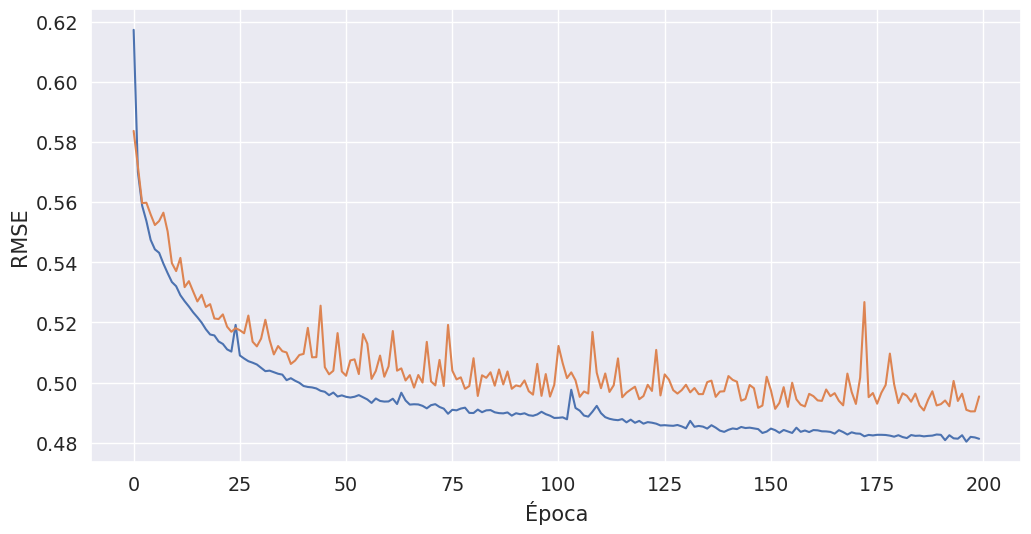

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 27s - loss: 1.0387

 1536/12384 [==>...........................] - ETA: 0s - loss: 1.0436 

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.8865

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.7857

 7392/12384 [================>.............] - ETA: 0s - loss: 0.7258

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.6832

11296/12384 [==========================>...] - ETA: 0s - loss: 0.6472

12384/12384 [==============================] - 1s 45us/step - loss: 0.6282 - val_loss: 0.4410


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6625

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.4305

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.4174

 5984/12384 [=============>................] - ETA: 0s - loss: 0.4194

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.4058

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.3946

11808/12384 [===========================>..] - ETA: 0s - loss: 0.3839

12384/12384 [==============================] - 0s 38us/step - loss: 0.3828 - val_loss: 0.3570


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3418

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.3385

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.3246

 6016/12384 [=============>................] - ETA: 0s - loss: 0.3340

 7712/12384 [=================>............] - ETA: 0s - loss: 0.3317

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.3308

11616/12384 [===========================>..] - ETA: 0s - loss: 0.3356

12384/12384 [==============================] - 0s 39us/step - loss: 0.3390 - val_loss: 0.3380


Epoch 4/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4242

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.3413

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.3562

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3366

 7776/12384 [=================>............] - ETA: 0s - loss: 0.3313

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.3322

11648/12384 [===========================>..] - ETA: 0s - loss: 0.3310

12384/12384 [==============================] - 0s 39us/step - loss: 0.3268 - val_loss: 0.3293


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1805

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2799

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.3087

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3127

 7616/12384 [=================>............] - ETA: 0s - loss: 0.3254

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.3253

11136/12384 [=========================>....] - ETA: 0s - loss: 0.3206

12384/12384 [==============================] - 0s 38us/step - loss: 0.3190 - val_loss: 0.3220


Epoch 6/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2134

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2959

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.3084

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3034

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.3082

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.3046

10400/12384 [========================>.....] - ETA: 0s - loss: 0.3095

12320/12384 [============================>.] - ETA: 0s - loss: 0.3114

12384/12384 [==============================] - 1s 41us/step - loss: 0.3126 - val_loss: 0.3173


Epoch 7/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4217

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2896

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.3128

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3128

 7584/12384 [=================>............] - ETA: 0s - loss: 0.3177

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.3089

11552/12384 [==========================>...] - ETA: 0s - loss: 0.3055

12384/12384 [==============================] - 0s 38us/step - loss: 0.3067 - val_loss: 0.3125


Epoch 8/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2737

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2999

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2940

 5984/12384 [=============>................] - ETA: 0s - loss: 0.3003

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2994



 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2983

11808/12384 [===========================>..] - ETA: 0s - loss: 0.3012

12384/12384 [==============================] - 0s 37us/step - loss: 0.3019 - val_loss: 0.3075


Epoch 9/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1705

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2776

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2939

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2948

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2989

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2966

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2999

12384/12384 [==============================] - 1s 41us/step - loss: 0.2970 - val_loss: 0.3042


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2447

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3008

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.3083

 5856/12384 [=============>................] - ETA: 0s - loss: 0.3033

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2965

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2966

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2926

12384/12384 [==============================] - 0s 37us/step - loss: 0.2931 - val_loss: 0.3003


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1117

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2882

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2828

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2796

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2860

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2827



11456/12384 [==========================>...] - ETA: 0s - loss: 0.2857

12384/12384 [==============================] - 0s 37us/step - loss: 0.2898 - val_loss: 0.2974


Epoch 12/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3262

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2916

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2916

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2881

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2856

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2851

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2884

12384/12384 [==============================] - 0s 39us/step - loss: 0.2867 - val_loss: 0.2951


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2251

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2846

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.3082

 5920/12384 [=============>................] - ETA: 0s - loss: 0.3022

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2926

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2891

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2860

12384/12384 [==============================] - 0s 37us/step - loss: 0.2845 - val_loss: 0.2928


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1904

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2779

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2859

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2978

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2905

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2893

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2847

12384/12384 [==============================] - 0s 39us/step - loss: 0.2817 - val_loss: 0.2914


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1708

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2577

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2685

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2671

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2726

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2743

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2761

12384/12384 [==============================] - 1s 41us/step - loss: 0.2797 - val_loss: 0.2885


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1165

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2836

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2793

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2832

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2806



 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2790

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2770

12384/12384 [==============================] - 0s 37us/step - loss: 0.2777 - val_loss: 0.2870


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1457

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2721

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2623

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2706

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2749

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2723

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2763

12384/12384 [==============================] - 0s 37us/step - loss: 0.2757 - val_loss: 0.2856


Epoch 18/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2569

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2832

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2711

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2714

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2707

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2751

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 36us/step - loss: 0.2738 - val_loss: 0.2840


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4006

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2780

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2700

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2630

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2713

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2689

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2716

12384/12384 [==============================] - 0s 40us/step - loss: 0.2720 - val_loss: 0.2830


Epoch 20/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2883

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2658

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2637

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2676

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2685

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2674

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2705

12384/12384 [==============================] - 0s 38us/step - loss: 0.2700 - val_loss: 0.2815


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3668

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2771

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2763

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2718

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2782

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2718

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2686

12384/12384 [==============================] - 0s 39us/step - loss: 0.2685 - val_loss: 0.2798


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2090

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2451

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2551

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2574

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2675

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2675

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2686

12384/12384 [==============================] - 0s 37us/step - loss: 0.2667 - val_loss: 0.2779


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2060

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2556

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2669

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2677

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2678

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2663

12096/12384 [============================>.] - ETA: 0s - loss: 0.2637

12384/12384 [==============================] - 0s 36us/step - loss: 0.2648 - val_loss: 0.2784


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2042

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2524

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2720

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2771

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2719

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2643

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 38us/step - loss: 0.2632 - val_loss: 0.2747


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1976

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2507

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2476

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2571

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2600

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 37us/step - loss: 0.2617 - val_loss: 0.2735


Epoch 26/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3369

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2606

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2688

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2653

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2662

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2660

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2638

12384/12384 [==============================] - 0s 39us/step - loss: 0.2593 - val_loss: 0.2723


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4203

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2563

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2453

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2533

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2510

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2578

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2587

12384/12384 [==============================] - 0s 38us/step - loss: 0.2579 - val_loss: 0.2710


Epoch 28/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2978

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2454

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2579

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2648

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2615

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2616

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2562

12384/12384 [==============================] - 0s 37us/step - loss: 0.2563 - val_loss: 0.2692


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2520

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2482

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2492

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2489

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2495

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2482

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2550

12384/12384 [==============================] - 0s 36us/step - loss: 0.2548 - val_loss: 0.2680


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2498

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2602

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2523

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2474

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2511

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2467

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2527

12384/12384 [==============================] - 0s 37us/step - loss: 0.2532 - val_loss: 0.2668


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3637

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2451

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2510

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2470

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2460

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2532

12096/12384 [============================>.] - ETA: 0s - loss: 0.2517

12384/12384 [==============================] - 0s 36us/step - loss: 0.2521 - val_loss: 0.2647


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1259

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2491

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2528

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2530

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2517

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2514

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 38us/step - loss: 0.2510 - val_loss: 0.2637


Epoch 33/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3035

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2316

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2414

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2399

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2443

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2492

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 0s 39us/step - loss: 0.2496 - val_loss: 0.2625


Epoch 34/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4071

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2798

 3296/12384 [======>.......................] - ETA: 0s - loss: 0.2602

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2514

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2483

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2480

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 39us/step - loss: 0.2488 - val_loss: 0.2616


Epoch 35/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1632

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2535

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2501

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2432

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2464

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2415

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 36us/step - loss: 0.2477 - val_loss: 0.2610


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2472

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2634

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2443

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2469

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2429

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2430

12064/12384 [============================>.] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 37us/step - loss: 0.2468 - val_loss: 0.2609


Epoch 37/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3687

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2364

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2557

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2535

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2535

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2490

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 39us/step - loss: 0.2457 - val_loss: 0.2588


Epoch 38/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2640

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2353

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2522

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2485

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2531

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2481

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 38us/step - loss: 0.2450 - val_loss: 0.2584


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1634

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2710

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2473

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2437

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2413

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2431

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 38us/step - loss: 0.2443 - val_loss: 0.2578


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4142

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2438

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2447

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2451

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2470

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 37us/step - loss: 0.2438 - val_loss: 0.2569


Epoch 41/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2667

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2344

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2377

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2421

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2417

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2406

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 39us/step - loss: 0.2432 - val_loss: 0.2565


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2392

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2349

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2434

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2408

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2396

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2419

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 38us/step - loss: 0.2430 - val_loss: 0.2566


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2596

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2372

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2421

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2449

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2433

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 38us/step - loss: 0.2421 - val_loss: 0.2553


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2398

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2692

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2496

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2432

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2467

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2434

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 37us/step - loss: 0.2417 - val_loss: 0.2546


Epoch 45/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2589

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2172

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2285

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2291

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2336

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2363

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 38us/step - loss: 0.2412 - val_loss: 0.2549


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1019

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2464

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2505

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2422

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2419

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2441

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 39us/step - loss: 0.2409 - val_loss: 0.2550


Epoch 47/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2826

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2437

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2378

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2297

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2310

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2382

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 39us/step - loss: 0.2401 - val_loss: 0.2543


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2614

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2429

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2368

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2361

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2341

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2370

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 38us/step - loss: 0.2403 - val_loss: 0.2538


Epoch 49/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2574

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2499

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2307

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2385

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2392

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2402

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 38us/step - loss: 0.2397 - val_loss: 0.2544


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2337

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2422

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2381

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2337

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2355

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 37us/step - loss: 0.2396 - val_loss: 0.2534


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3370

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2389

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2398

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2403

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2391

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 37us/step - loss: 0.2392 - val_loss: 0.2533


Epoch 52/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2028

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2288

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2357

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2350

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2343

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2370

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 39us/step - loss: 0.2389 - val_loss: 0.2524


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1249

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2476

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2477

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2404

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2423

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2407

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 39us/step - loss: 0.2384 - val_loss: 0.2521


Epoch 54/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1265

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2286

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2284

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2388

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2349

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2340

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 38us/step - loss: 0.2383 - val_loss: 0.2517


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4401

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2419

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2454

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2435

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2356

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 38us/step - loss: 0.2380 - val_loss: 0.2513


Epoch 56/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2643

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2291

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2345

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2365

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2347

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2394

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 37us/step - loss: 0.2380 - val_loss: 0.2514


Epoch 57/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1559

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2673

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2574

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2527

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2440

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2394

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 37us/step - loss: 0.2376 - val_loss: 0.2509


Epoch 58/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1462

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2516

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2440

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2400

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2391

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2368

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2376

12192/12384 [============================>.] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 1s 43us/step - loss: 0.2376 - val_loss: 0.2504


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2253

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2245

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2265

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2353

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2361

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2339

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 38us/step - loss: 0.2374 - val_loss: 0.2507


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2597

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2373

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2417

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2418

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2379

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2359

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 37us/step - loss: 0.2376 - val_loss: 0.2512


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1514

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2220

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2310

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2276

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2326

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2350

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 1s 44us/step - loss: 0.2371 - val_loss: 0.2508


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0843

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2451

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2530

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2427

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2388

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2403

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 40us/step - loss: 0.2370 - val_loss: 0.2504


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2047

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2702

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2471

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2410

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2352

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2351

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 40us/step - loss: 0.2368 - val_loss: 0.2510


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1972

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2285

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2394

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2322

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2312

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2329

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 39us/step - loss: 0.2367 - val_loss: 0.2494


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3806

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2337

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2339

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2307

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2347

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 37us/step - loss: 0.2368 - val_loss: 0.2492


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2407

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2494

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2601

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2462

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2464

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2416

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 37us/step - loss: 0.2365 - val_loss: 0.2492


Epoch 67/200


   32/12384 [..............................] - ETA: 1s - loss: 0.0933

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2205

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2302

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2300

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2363

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2391

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 37us/step - loss: 0.2363 - val_loss: 0.2495


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1592

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2228

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2310

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2351

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2360

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2373

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 39us/step - loss: 0.2360 - val_loss: 0.2489


Epoch 69/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1506

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2318

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2311

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2320

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2296

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2309

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 38us/step - loss: 0.2360 - val_loss: 0.2496


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1072

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2302

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2238

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2278

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2310

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 38us/step - loss: 0.2358 - val_loss: 0.2484


Epoch 71/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1836

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2515

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2481

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2463

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2451

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2414

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 38us/step - loss: 0.2357 - val_loss: 0.2486


Epoch 72/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2765

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2389

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2465

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2382

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2368

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2320

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 37us/step - loss: 0.2359 - val_loss: 0.2479


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2007

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2517

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2508

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2467

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2432

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2372

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 38us/step - loss: 0.2351 - val_loss: 0.2483


Epoch 74/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3210

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2334

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2334

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2309

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2311

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2335

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 37us/step - loss: 0.2355 - val_loss: 0.2485


Epoch 75/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5414

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2225

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2253

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2314

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2307

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2316

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 37us/step - loss: 0.2349 - val_loss: 0.2488


Epoch 76/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2454

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2165

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2254

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2280

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2271

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2306

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 40us/step - loss: 0.2350 - val_loss: 0.2485


Epoch 77/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2350

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2122

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2288

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2298

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2303

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 38us/step - loss: 0.2348 - val_loss: 0.2472


Epoch 78/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1540

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2187

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2330

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2329

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2335

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2347

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 37us/step - loss: 0.2348 - val_loss: 0.2474


Epoch 79/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0634

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2402

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2439

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2447

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2370

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2395

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 39us/step - loss: 0.2346 - val_loss: 0.2486


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1829

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2404

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2228

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2300

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2308

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2333

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 38us/step - loss: 0.2347 - val_loss: 0.2473


Epoch 81/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2006

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2251

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2237

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2305

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2317

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2317

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 37us/step - loss: 0.2344 - val_loss: 0.2484


Epoch 82/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2138

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2234

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2239

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2265

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2354

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2303

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 38us/step - loss: 0.2345 - val_loss: 0.2489


Epoch 83/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2304

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2352

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2318

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2395

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2346

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2359

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 38us/step - loss: 0.2343 - val_loss: 0.2466


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2621

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2377

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2455

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2433

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2359

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2352

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 38us/step - loss: 0.2342 - val_loss: 0.2469


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3005

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2368

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2455

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2352

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2398

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2384

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 38us/step - loss: 0.2342 - val_loss: 0.2478


Epoch 86/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2318

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2389

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2362

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2388

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2353

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 37us/step - loss: 0.2342 - val_loss: 0.2466


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1804

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2235

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2341

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2352

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2378

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2353

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 38us/step - loss: 0.2342 - val_loss: 0.2470


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2404

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2285

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2233

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2323

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2332

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2318

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 38us/step - loss: 0.2337 - val_loss: 0.2474


Epoch 89/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1685

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2294

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2323

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2338

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2328

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2350

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 39us/step - loss: 0.2339 - val_loss: 0.2459


Epoch 90/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2032

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2061

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2207

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2254

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2282

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2320

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2466


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2285

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2349

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2432

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2400

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2341

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2350

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 38us/step - loss: 0.2338 - val_loss: 0.2465


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2181

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2078

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2217

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2257

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2327

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2349

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 37us/step - loss: 0.2335 - val_loss: 0.2467


Epoch 93/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1978

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2292

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2316

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2356

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2309

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2365

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 38us/step - loss: 0.2333 - val_loss: 0.2493


Epoch 94/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1514

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2208

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2298

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2343

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2342

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2354

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 38us/step - loss: 0.2334 - val_loss: 0.2465


Epoch 95/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5227

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2120

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2141

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2234

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2296

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2335

12000/12384 [============================>.] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 37us/step - loss: 0.2331 - val_loss: 0.2460


Epoch 96/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1724

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2231

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2167

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2189

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2256

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2273

12096/12384 [============================>.] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 36us/step - loss: 0.2329 - val_loss: 0.2476


Epoch 97/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1992

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2417

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2398

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2379

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2375

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2357

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 38us/step - loss: 0.2331 - val_loss: 0.2460


Epoch 98/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1250

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2091

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2236

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2260

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2278

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 35us/step - loss: 0.2328 - val_loss: 0.2455


Epoch 99/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3040

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2202

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2281

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2362

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2317

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2307

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 36us/step - loss: 0.2327 - val_loss: 0.2454


Epoch 100/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1908

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2217

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2285

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2277

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2303

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2319

12064/12384 [============================>.] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 39us/step - loss: 0.2325 - val_loss: 0.2470


Epoch 101/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1418

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2143

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2250

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2253

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2313

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12192/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 36us/step - loss: 0.2328 - val_loss: 0.2456


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2082

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2372

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2355

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2360

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2317

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2332

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 39us/step - loss: 0.2327 - val_loss: 0.2454


Epoch 103/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1425

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2244

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2306

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2301

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2356

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2331

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 38us/step - loss: 0.2327 - val_loss: 0.2466


Epoch 104/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3314

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2328

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2321

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2268

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2289

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2352

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 38us/step - loss: 0.2325 - val_loss: 0.2454


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2741

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2259

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2232

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2248

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2327

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2302

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 37us/step - loss: 0.2325 - val_loss: 0.2450


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1209

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2488

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2426

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2394

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2316

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2280

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 38us/step - loss: 0.2319 - val_loss: 0.2463


Epoch 107/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2413

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2370

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2374

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2364

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2325

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2299

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 36us/step - loss: 0.2319 - val_loss: 0.2460


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1170



 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2224

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2269

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2339

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2275

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2304

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 36us/step - loss: 0.2325 - val_loss: 0.2467


Epoch 109/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2747

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2349

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2292

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2305

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2284

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 38us/step - loss: 0.2319 - val_loss: 0.2462


Epoch 110/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3346

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2627

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2478

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2468

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2389

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2339

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 38us/step - loss: 0.2317 - val_loss: 0.2448


Epoch 111/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1704

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2619

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2397

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2420

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2398

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2353

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 40us/step - loss: 0.2319 - val_loss: 0.2450


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1642

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2392

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2364

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2310

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2312

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2302

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2456


Epoch 113/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2511

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2140

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2214

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2283

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2300

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2307

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 39us/step - loss: 0.2317 - val_loss: 0.2446


Epoch 114/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3515

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2214

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2290

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2314

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2326

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2311

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2446


Epoch 115/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1946

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2379

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2236

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2266

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2322

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2305

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 38us/step - loss: 0.2315 - val_loss: 0.2460


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0905

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2105

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2256

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2209

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2253

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2293

12160/12384 [============================>.] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 36us/step - loss: 0.2315 - val_loss: 0.2453


Epoch 117/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1898

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2324

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2400

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2399

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2344

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12000/12384 [============================>.] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 36us/step - loss: 0.2316 - val_loss: 0.2444


Epoch 118/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4727

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2144

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2149

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2202

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2254

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2272

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 38us/step - loss: 0.2314 - val_loss: 0.2454


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1089

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2270

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2266

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2282

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2295

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2299

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 37us/step - loss: 0.2312 - val_loss: 0.2449


Epoch 120/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3500

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2291

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2275

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2263

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2319

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2335

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 37us/step - loss: 0.2315 - val_loss: 0.2440


Epoch 121/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3871

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2503

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2339

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2297

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2284

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2276

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 38us/step - loss: 0.2309 - val_loss: 0.2434


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2031

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2246

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2242

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2290

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2268

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2302

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 38us/step - loss: 0.2311 - val_loss: 0.2445


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1363

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2272

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2238

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2276

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2269

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 39us/step - loss: 0.2309 - val_loss: 0.2436


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1335

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2230

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2331

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2299

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2341

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2307

12096/12384 [============================>.] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 37us/step - loss: 0.2307 - val_loss: 0.2458


Epoch 125/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2631

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2296

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2287

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2287

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2294

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2307

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 39us/step - loss: 0.2309 - val_loss: 0.2437


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3223

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2484

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2384

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2378

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2327

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2304

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 40us/step - loss: 0.2307 - val_loss: 0.2438


Epoch 127/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4048

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2237

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2280

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2261

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2281

 9248/12384 [=====================>........]

 - ETA: 0s - loss: 0.2282

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 38us/step - loss: 0.2305 - val_loss: 0.2452


Epoch 128/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1335

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2199

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2306

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2312

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2282

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2300

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 39us/step - loss: 0.2306 - val_loss: 0.2445


Epoch 129/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1836

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2300

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2275

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2332

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2328

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2312

12064/12384 [============================>.] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 36us/step - loss: 0.2303 - val_loss: 0.2436


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1313

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2457

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2380

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2357

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2368

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2302

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 37us/step - loss: 0.2302 - val_loss: 0.2435


Epoch 131/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2590

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 3200/12384 [======>.......................] - ETA: 0s - loss: 0.2333

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2240

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2270

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2214

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 39us/step - loss: 0.2303 - val_loss: 0.2439


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3096

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2162

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2334

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2342

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12128/12384 [============================>.] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 37us/step - loss: 0.2306 - val_loss: 0.2433


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2188

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2099

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2265

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2254

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2297

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2271

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 37us/step - loss: 0.2302 - val_loss: 0.2429


Epoch 134/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1990

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2374

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2274

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2290

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2299

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2286

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 38us/step - loss: 0.2300 - val_loss: 0.2435


Epoch 135/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1256

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2199

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2260

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2275

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2261

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2259

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 37us/step - loss: 0.2299 - val_loss: 0.2450


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2068

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2533

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2494

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2317

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2260

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2280

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 37us/step - loss: 0.2299 - val_loss: 0.2453


Epoch 137/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3419

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2399

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2315

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2264

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2267

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2268

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 38us/step - loss: 0.2300 - val_loss: 0.2431


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2167

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2318

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2336

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2326

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2299

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2313



11008/12384 [=========================>....] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 39us/step - loss: 0.2293 - val_loss: 0.2428


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1509

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2196

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2256

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2237

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2289

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2308

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 38us/step - loss: 0.2299 - val_loss: 0.2430


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2063

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2253

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2251

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2237

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2281

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2292

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 38us/step - loss: 0.2296 - val_loss: 0.2427


Epoch 141/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1925

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2145

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2262

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2375

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2357

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2333

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 38us/step - loss: 0.2297 - val_loss: 0.2429


Epoch 142/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2198

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2256

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2336

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2386

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2271

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2296

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 37us/step - loss: 0.2294 - val_loss: 0.2427


Epoch 143/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1066

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2054

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2216

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2242

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2266

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2263

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 38us/step - loss: 0.2296 - val_loss: 0.2424


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2027

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2232

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2279

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2251

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2286

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2294 - val_loss: 0.2431


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2079

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2202

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2229

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2299

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2333

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2319

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 37us/step - loss: 0.2293 - val_loss: 0.2430


Epoch 146/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3845

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2157

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2249

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2277

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2267

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2272

12192/12384 [============================>.] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 36us/step - loss: 0.2294 - val_loss: 0.2429


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1233

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2226

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2251

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2326

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2326

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 38us/step - loss: 0.2291 - val_loss: 0.2426


Epoch 148/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1049

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2450

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2321

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2315

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2285

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2273

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2292 - val_loss: 0.2430


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3315

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2367

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2280

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2330

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2306

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2298

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 40us/step - loss: 0.2291 - val_loss: 0.2424


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2599

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2277

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2266

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2282

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2327

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 36us/step - loss: 0.2294 - val_loss: 0.2433


Epoch 151/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4710

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2195

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2285

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2243

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2254

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 35us/step - loss: 0.2294 - val_loss: 0.2428


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3798

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2188

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2285

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2229

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2242

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2269

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 37us/step - loss: 0.2290 - val_loss: 0.2441


Epoch 153/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1673

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2197

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2221

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2252

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2265

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2304

12160/12384 [============================>.] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 36us/step - loss: 0.2293 - val_loss: 0.2427


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3767

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2178

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2226

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2309

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2265

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2303

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 37us/step - loss: 0.2291 - val_loss: 0.2426


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2840

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2472

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2402

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2358

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2357

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2346

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2422


Epoch 156/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1820

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2224

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2287

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2347

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2359

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2358

12032/12384 [============================>.] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 36us/step - loss: 0.2293 - val_loss: 0.2431


Epoch 157/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3413

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2313

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2268

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2285

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2244

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2249

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 37us/step - loss: 0.2288 - val_loss: 0.2434


Epoch 158/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2109

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2221

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2260

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2272

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2315

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2316

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2426


Epoch 159/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2487

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2189

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2175

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2203

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2281

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2327

12096/12384 [============================>.] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2417


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1569

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2330

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2315

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2255

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2301

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2294

12032/12384 [============================>.] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2428


Epoch 161/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1818

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2078

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2170

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2201

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2274

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2277

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 39us/step - loss: 0.2287 - val_loss: 0.2423


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4610

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2209

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2267

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2292

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2254

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2287

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 37us/step - loss: 0.2286 - val_loss: 0.2419


Epoch 163/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4145

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2242

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2246

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2210

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2273

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2253

12096/12384 [============================>.] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 36us/step - loss: 0.2286 - val_loss: 0.2441


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2733

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2090

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2135

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2227

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2273

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2303

12192/12384 [============================>.] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2421


Epoch 165/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1277

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2264

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2206

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2304

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2302

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2283

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2262

12192/12384 [============================>.] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 40us/step - loss: 0.2289 - val_loss: 0.2434


Epoch 166/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2849

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2372

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2448

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2425

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2365

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2290

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 39us/step - loss: 0.2287 - val_loss: 0.2422


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1558

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2190

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2255

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2251

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2187

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2237

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 38us/step - loss: 0.2282 - val_loss: 0.2437


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2406

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2324

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2273

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2310

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2307

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2338

12064/12384 [============================>.] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 36us/step - loss: 0.2284 - val_loss: 0.2423


Epoch 169/200


   32/12384 [..............................] - ETA: 1s - loss: 0.0933

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2544

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2416

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2393

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2364

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2319

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 38us/step - loss: 0.2286 - val_loss: 0.2418


Epoch 170/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3072

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2254

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2242

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2275

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2272

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2298

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 38us/step - loss: 0.2287 - val_loss: 0.2418


Epoch 171/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2985

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2489

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2285

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2320

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2295

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2277

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 37us/step - loss: 0.2284 - val_loss: 0.2430


Epoch 172/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2119

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2228

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2118

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2199

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2266

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2295

12320/12384 [============================>.] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 35us/step - loss: 0.2284 - val_loss: 0.2421


Epoch 173/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0847

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2485

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2274

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2280

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 35us/step - loss: 0.2286 - val_loss: 0.2456


Epoch 174/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2615

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2110

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2067

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2163

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2224

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2416


Epoch 175/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2832

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2199

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2249

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2254

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2236

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 35us/step - loss: 0.2284 - val_loss: 0.2427


Epoch 176/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1655

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2331

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2333

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2270

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 36us/step - loss: 0.2284 - val_loss: 0.2411


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1661

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2487

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2386

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2332

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2342

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2282

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 37us/step - loss: 0.2282 - val_loss: 0.2416


Epoch 178/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1933

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2450

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2355

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2283

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2278

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2278

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 36us/step - loss: 0.2282 - val_loss: 0.2423


Epoch 179/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1172

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2204

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2199

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2244

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2264

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2236

12256/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 35us/step - loss: 0.2283 - val_loss: 0.2417


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3637

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2043

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2266

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2276

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2281

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 35us/step - loss: 0.2284 - val_loss: 0.2417


Epoch 181/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2541

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2421

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2325

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2271

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2284

12256/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 37us/step - loss: 0.2282 - val_loss: 0.2429


Epoch 182/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3465

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2405

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2398

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2367

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2327



10112/12384 [=======================>......] - ETA: 0s - loss: 0.2293

12096/12384 [============================>.] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 37us/step - loss: 0.2281 - val_loss: 0.2414


Epoch 183/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2469

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2456

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2317

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2228

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2236

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2282

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 39us/step - loss: 0.2282 - val_loss: 0.2414


Epoch 184/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1122

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2056

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2295

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2253

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2260

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2267

12096/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 37us/step - loss: 0.2282 - val_loss: 0.2412


Epoch 185/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2124

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2454

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2406

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2404

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2365

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2324

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 37us/step - loss: 0.2280 - val_loss: 0.2416


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1222

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2423

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2364

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2325

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2321

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2270

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 37us/step - loss: 0.2280 - val_loss: 0.2421


Epoch 187/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4391

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2402

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2391

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2315

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2300

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2273

12000/12384 [============================>.] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 37us/step - loss: 0.2279 - val_loss: 0.2415


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2779

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2085

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2212

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2288

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2254

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2275

12096/12384 [============================>.] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 36us/step - loss: 0.2278 - val_loss: 0.2420


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1530

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2416

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2403

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2390

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2307

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2302

12064/12384 [============================>.] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 36us/step - loss: 0.2281 - val_loss: 0.2416


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3527

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2232

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2290

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2230

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2244

12128/12384 [============================>.] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 37us/step - loss: 0.2283 - val_loss: 0.2422


Epoch 191/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0910

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2302

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2318

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2283

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2236

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2234

12000/12384 [============================>.] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 36us/step - loss: 0.2284 - val_loss: 0.2420


Epoch 192/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2521

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2212

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2247

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2250

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2246



11744/12384 [===========================>..] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 40us/step - loss: 0.2278 - val_loss: 0.2423


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2422

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2194

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2366

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2230

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2238

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2270

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 36us/step - loss: 0.2280 - val_loss: 0.2411


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1861

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2255

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2274

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2262

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2265

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2274

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 37us/step - loss: 0.2277 - val_loss: 0.2416


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1609

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2157

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2236

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2299

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2257

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2298

12160/12384 [============================>.] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 35us/step - loss: 0.2275 - val_loss: 0.2426


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0924

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2302

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2252

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2232

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2275

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2270

12032/12384 [============================>.] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 36us/step - loss: 0.2276 - val_loss: 0.2416


Epoch 197/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2664

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2488

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2214

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2239

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2225

12352/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 35us/step - loss: 0.2276 - val_loss: 0.2425


Epoch 198/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2038

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2277

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2285

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2289

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2254

12000/12384 [============================>.] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 37us/step - loss: 0.2277 - val_loss: 0.2415


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1407

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2272

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2352

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2329

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2280

12128/12384 [============================>.] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 36us/step - loss: 0.2278 - val_loss: 0.2414


Epoch 200/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2243

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2181

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2207

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2166

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2233

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2260

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 37us/step - loss: 0.2275 - val_loss: 0.2408


No handles with labels found to put in legend.


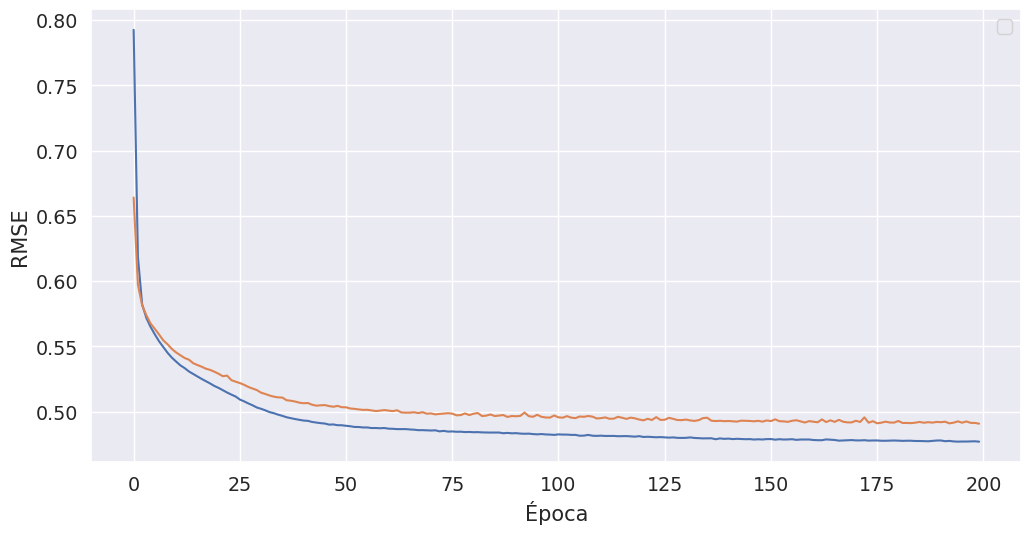

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 33s - loss: 0.7835

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.9833 

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.8115

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.6950

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.6261

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.5743

10048/12384 [=======================>......] - ETA: 0s - loss: 0.5413

11712/12384 [===========================>..] - ETA: 0s - loss: 0.5202

12384/12384 [==============================] - 1s 51us/step - loss: 0.5118 - val_loss: 0.3598


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4575

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.3328

 3104/12384 [======>.......................] - ETA: 0s - loss: 0.3277

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3227

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.3274

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.3354

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.3350

11360/12384 [==========================>...] - ETA: 0s - loss: 0.3369

12384/12384 [==============================] - 1s 43us/step - loss: 0.3336 - val_loss: 0.3280


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4230

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2878

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.3190

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.3195

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.3191



 8608/12384 [===================>..........] - ETA: 0s - loss: 0.3174

10368/12384 [========================>.....] - ETA: 0s - loss: 0.3189

11968/12384 [===========================>..] - ETA: 0s - loss: 0.3140

12384/12384 [==============================] - 1s 43us/step - loss: 0.3131 - val_loss: 0.3173


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5201

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.3078

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.3064

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.3025

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2953

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2996

10464/12384 [========================>.....] - ETA: 0s - loss: 0.3039

12256/12384 [============================>.] - ETA: 0s - loss: 0.3011

12384/12384 [==============================] - 1s 41us/step - loss: 0.3011 - val_loss: 0.3068


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2877

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2845

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2892

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2976

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2957

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2934

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2971

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2935

12384/12384 [==============================] - 1s 42us/step - loss: 0.2933 - val_loss: 0.2995


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2706

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2777

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2977

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2977

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2937

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2914

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2926

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2885

12384/12384 [==============================] - 1s 43us/step - loss: 0.2862 - val_loss: 0.2948


Epoch 7/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2674

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2863

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2811

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2801

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2833

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2829

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2822

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2828

12384/12384 [==============================] - 1s 44us/step - loss: 0.2820 - val_loss: 0.2907


Epoch 8/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1974

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2855

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2830

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2795

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2791

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2797

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2743

12384/12384 [==============================] - 0s 40us/step - loss: 0.2776 - val_loss: 0.2863


Epoch 9/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3073

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2673

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2583

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2650

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2733

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2785

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2747

12384/12384 [==============================] - 0s 39us/step - loss: 0.2745 - val_loss: 0.2884


Epoch 10/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2665

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2944

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2882

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2877

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2859

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2800

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2725

12384/12384 [==============================] - 0s 40us/step - loss: 0.2723 - val_loss: 0.2817


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2432

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2629

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2709

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2773

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2719

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2706

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2731

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2717

12384/12384 [==============================] - 1s 42us/step - loss: 0.2689 - val_loss: 0.2822


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5936

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2470

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2641

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2670

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2701

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2686

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2665

12192/12384 [============================>.] - ETA: 0s - loss: 0.2661

12384/12384 [==============================] - 1s 41us/step - loss: 0.2672 - val_loss: 0.2788


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1314

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2808

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2769

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2765

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2711

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2676

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2650

12256/12384 [============================>.] - ETA: 0s - loss: 0.2653

12384/12384 [==============================] - 1s 41us/step - loss: 0.2645 - val_loss: 0.2759


Epoch 14/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3464

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2564

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2674

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2690

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2678

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2683

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2642

12096/12384 [============================>.] - ETA: 0s - loss: 0.2648

12384/12384 [==============================] - 1s 40us/step - loss: 0.2628 - val_loss: 0.2755


Epoch 15/100
   32/12384 [..............................] - ETA: 1s - loss: 0.6246



 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2799

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2735

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2697

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2638

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2610

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2596

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 1s 42us/step - loss: 0.2603 - val_loss: 0.2733


Epoch 16/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1988

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2497

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2652

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2631

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2680

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2613

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2625

12224/12384 [============================>.] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 1s 42us/step - loss: 0.2589 - val_loss: 0.2715


Epoch 17/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3041

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2425

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2417

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2462

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2445

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2496

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2530

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 1s 41us/step - loss: 0.2573 - val_loss: 0.2726


Epoch 18/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1288

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2277

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2337

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2441

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2556



 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2571

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2594

12384/12384 [==============================] - 0s 39us/step - loss: 0.2560 - val_loss: 0.2698


Epoch 19/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2352

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2484

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2658

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2633

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2571

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2538

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 40us/step - loss: 0.2548 - val_loss: 0.2702


Epoch 20/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1779

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2450

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2456

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2602

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2569

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2528

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2539

12320/12384 [============================>.] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 40us/step - loss: 0.2543 - val_loss: 0.2671


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2366

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2335

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2425

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2467

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2448

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2482

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2496

12032/12384 [============================>.] - ETA: 0s - loss: 0.2531

12384/12384 [==============================] - 1s 41us/step - loss: 0.2527 - val_loss: 0.2669


Epoch 22/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2037

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2668

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2637

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2561

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2542

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2494

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2482

12320/12384 [============================>.] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 40us/step - loss: 0.2519 - val_loss: 0.2679


Epoch 23/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2222

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2482

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2544

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2539

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2545

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2548

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2502

12320/12384 [============================>.] - ETA: 0s - loss: 0.2513

12384/12384 [==============================] - 0s 40us/step - loss: 0.2513 - val_loss: 0.2668


Epoch 24/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1172

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2561

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2471

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2517

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2543

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2526



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 40us/step - loss: 0.2503 - val_loss: 0.2668


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1773

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2528

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2434

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2386

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2443

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2444

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2494

12384/12384 [==============================] - 0s 40us/step - loss: 0.2497 - val_loss: 0.2641


Epoch 26/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1453

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2886

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2638

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2599

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2537

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2552

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 40us/step - loss: 0.2492 - val_loss: 0.2664


Epoch 27/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2577

 1408/12384 [==>...........................] - ETA: 0s - loss: 0.2173

 3200/12384 [======>.......................] - ETA: 0s - loss: 0.2270

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2469

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2441

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2439

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2487

12192/12384 [============================>.] - ETA: 0s - loss: 0.2485

12384/12384 [==============================] - 0s 40us/step - loss: 0.2487 - val_loss: 0.2619


Epoch 28/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3310

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2442

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2496

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2399

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2418

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2488

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2484

12384/12384 [==============================] - 0s 40us/step - loss: 0.2478 - val_loss: 0.2623


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2098

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2641

 3136/12384 [======>.......................] - ETA: 0s - loss: 0.2616

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2476

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2536

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2507

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2475

12256/12384 [============================>.] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 40us/step - loss: 0.2474 - val_loss: 0.2619


Epoch 30/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1863

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2367

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2413

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2417

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2489

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2503

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 39us/step - loss: 0.2468 - val_loss: 0.2606


Epoch 31/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1806

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2491

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2375

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2375

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2446

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2469

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2438

12128/12384 [============================>.] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 40us/step - loss: 0.2466 - val_loss: 0.2609


Epoch 32/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1646

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2267

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2291

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2377

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2393

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2447

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 39us/step - loss: 0.2459 - val_loss: 0.2607


Epoch 33/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2820

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2124

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2370

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2468

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2444

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2462



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 0s 39us/step - loss: 0.2457 - val_loss: 0.2601


Epoch 34/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2922

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2572

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2484

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2585

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2504

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2508

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 39us/step - loss: 0.2448 - val_loss: 0.2600


Epoch 35/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2322

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2339

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2348

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2384

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2414

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2457

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 40us/step - loss: 0.2447 - val_loss: 0.2627


Epoch 36/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2906

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2647

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2528

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2408

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2329

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2407

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2447

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 1s 43us/step - loss: 0.2443 - val_loss: 0.2606


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3825

 1632/12384 [==>...........................] - ETA: 0s - loss: 0.2484

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2402

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2375

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2422

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2449

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 1s 42us/step - loss: 0.2436 - val_loss: 0.2591


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2881

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2303

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2343

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2397

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2414

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2396

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2401

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 1s 41us/step - loss: 0.2438 - val_loss: 0.2595


Epoch 39/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1232

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2286

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2201

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2339

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2413

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2446

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2463

12128/12384 [============================>.] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 40us/step - loss: 0.2435 - val_loss: 0.2605


Epoch 40/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1565

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2464

 3136/12384 [======>.......................] - ETA: 0s - loss: 0.2329

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2343

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2387

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2402

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2416

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 1s 43us/step - loss: 0.2427 - val_loss: 0.2614


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4830

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2438

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2449

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2419

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2424

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2406

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 39us/step - loss: 0.2430 - val_loss: 0.2590


Epoch 42/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3575

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2490

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2469

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2447

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2469

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2450

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 39us/step - loss: 0.2422 - val_loss: 0.2589


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2777

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2558

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2479

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2468

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2421

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2420

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 39us/step - loss: 0.2416 - val_loss: 0.2592


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3384

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2579

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2423

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2477

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2415

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2409

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 39us/step - loss: 0.2412 - val_loss: 0.2569


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1612

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2062

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2206

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2307

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2373

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2448

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2410

12288/12384 [============================>.] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 40us/step - loss: 0.2407 - val_loss: 0.2597


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3614

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2323

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2465

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2501

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2452

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2441

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2431

12256/12384 [============================>.] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 40us/step - loss: 0.2404 - val_loss: 0.2561


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1797

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2395

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2440

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2398

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2400

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2419

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 38us/step - loss: 0.2396 - val_loss: 0.2542


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3227

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2485

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2526

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2439

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2418

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2412

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12128/12384 [============================>.] - ETA: 0s - loss: 0.2396

12384/12384 [==============================] - 1s 40us/step - loss: 0.2394 - val_loss: 0.2530


Epoch 49/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1106

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2400

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2276

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2360

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2360

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2342

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 40us/step - loss: 0.2381 - val_loss: 0.2523


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2710

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2515

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2378

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2407

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2396

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2391

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 40us/step - loss: 0.2377 - val_loss: 0.2533


Epoch 51/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2713

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2435

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2450

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2323

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2339

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2373

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2392

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 1s 41us/step - loss: 0.2367 - val_loss: 0.2504


Epoch 52/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2479

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2545

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2401

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2422

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2397

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2391

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 38us/step - loss: 0.2351 - val_loss: 0.2506


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1096

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2350

 3040/12384 [======>.......................] - ETA: 0s - loss: 0.2376

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2340

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2297

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2277

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2316

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 1s 42us/step - loss: 0.2348 - val_loss: 0.2497


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.5385

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2449

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2420

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2393

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2363

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2338

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2289

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 1s 41us/step - loss: 0.2332 - val_loss: 0.2469


Epoch 55/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1103

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2257

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2360

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2379

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2351

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 1s 41us/step - loss: 0.2328 - val_loss: 0.2463


Epoch 56/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1830

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2651

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2456

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2410

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2386

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2316

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2330

12352/12384 [============================>.] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 40us/step - loss: 0.2311 - val_loss: 0.2475


Epoch 57/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1470

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2179

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2196

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2184

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2281

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2231

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2255

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2279

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 1s 45us/step - loss: 0.2310 - val_loss: 0.2450


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2163

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2384

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2301

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2280

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2258

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2282

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2312

12256/12384 [============================>.] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 40us/step - loss: 0.2302 - val_loss: 0.2455


Epoch 59/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1081

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2327

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2317

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2318

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2288

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2306



10720/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 39us/step - loss: 0.2293 - val_loss: 0.2430


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2575

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2275

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2332

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2376

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2346

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2336

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 38us/step - loss: 0.2281 - val_loss: 0.2433


Epoch 61/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1842

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2148

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2300

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2239

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2254

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2248

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 1s 40us/step - loss: 0.2273 - val_loss: 0.2413


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2116

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2377

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2219

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2328

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2277

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2259

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 39us/step - loss: 0.2272 - val_loss: 0.2407


Epoch 63/100
   32/12384 [..............................] - ETA: 1s - loss: 0.7213

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2257

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2264

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2299

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2302

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2317

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 40us/step - loss: 0.2264 - val_loss: 0.2418


Epoch 64/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0991

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2141

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2208

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2246

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2264

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2226

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2266

12000/12384 [============================>.] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 1s 40us/step - loss: 0.2260 - val_loss: 0.2401


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2424

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.1953

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2235

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2252

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2218

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2264

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2275

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2244

12384/12384 [==============================] - 1s 41us/step - loss: 0.2257 - val_loss: 0.2398


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1755

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2266

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2410

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2306

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2306

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2300

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2285

12192/12384 [============================>.] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 40us/step - loss: 0.2257 - val_loss: 0.2382


Epoch 67/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1015

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2239

 3296/12384 [======>.......................] - ETA: 0s - loss: 0.2192

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2273

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2257

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2277

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2247

12000/12384 [============================>.] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 1s 42us/step - loss: 0.2244 - val_loss: 0.2372


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3296

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2201

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2317

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2324

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2311

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2286

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2269

12320/12384 [============================>.] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 40us/step - loss: 0.2236 - val_loss: 0.2386


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2108

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2261

 3232/12384 [======>.......................] - ETA: 0s - loss: 0.2428

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2228

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2202

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2213

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2231

12384/12384 [==============================] - 1s 42us/step - loss: 0.2238 - val_loss: 0.2378


Epoch 70/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1210

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 3200/12384 [======>.......................] - ETA: 0s - loss: 0.2289

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2267

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2244

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2212

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2223

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 1s 44us/step - loss: 0.2238 - val_loss: 0.2372


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2052

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2267

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2362

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2316

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2279

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2264

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2241

12288/12384 [============================>.] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 40us/step - loss: 0.2235 - val_loss: 0.2366


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2674

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2129

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2151

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2180

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2196

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2202

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2202

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2223

12384/12384 [==============================] - 1s 41us/step - loss: 0.2226 - val_loss: 0.2383


Epoch 73/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1878

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2147

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2144

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2114

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2143

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2199

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2220

12384/12384 [==============================] - 1s 40us/step - loss: 0.2226 - val_loss: 0.2354


Epoch 74/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1824

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2065

 3424/12384 [=======>......................] - ETA: 0s - loss: 0.2115

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2216

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2259

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2239

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2242

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2223

12384/12384 [==============================] - 1s 43us/step - loss: 0.2222 - val_loss: 0.2359


Epoch 75/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3001

 1600/12384 [==>...........................] - ETA: 0s - loss: 0.2252

 3136/12384 [======>.......................] - ETA: 0s - loss: 0.2251

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2186

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2177

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2221

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2208

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2212

12384/12384 [==============================] - 1s 41us/step - loss: 0.2225 - val_loss: 0.2357


Epoch 76/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1398

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2387

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2334

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2297

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2270

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2224

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 40us/step - loss: 0.2218 - val_loss: 0.2356


Epoch 77/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0970

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2200

 3104/12384 [======>.......................] - ETA: 0s - loss: 0.2263

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2219

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2196

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2230

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2213

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2217

12384/12384 [==============================] - 1s 43us/step - loss: 0.2214 - val_loss: 0.2359


Epoch 78/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1989

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.1940

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2106

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2118

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2223

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2222

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2230

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2230

12384/12384 [==============================] - 1s 43us/step - loss: 0.2212 - val_loss: 0.2351


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1630

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2222

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2301

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2262

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2182

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2189

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2201

12032/12384 [============================>.] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 1s 41us/step - loss: 0.2214 - val_loss: 0.2347


Epoch 80/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1235

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2037

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2245

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2202

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2234

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2230

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2224

12000/12384 [============================>.] - ETA: 0s - loss: 0.2211

12384/12384 [==============================] - 1s 42us/step - loss: 0.2208 - val_loss: 0.2344


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2026

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2159

 3200/12384 [======>.......................] - ETA: 0s - loss: 0.2323

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2217

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2229

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2248

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2240

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2220

12384/12384 [==============================] - 1s 42us/step - loss: 0.2207 - val_loss: 0.2344


Epoch 82/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2431

 1472/12384 [==>...........................] - ETA: 0s - loss: 0.2244

 3104/12384 [======>.......................] - ETA: 0s - loss: 0.2189

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2171

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2197

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2199

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2184

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2206

12384/12384 [==============================] - 1s 41us/step - loss: 0.2201 - val_loss: 0.2346


Epoch 83/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1455

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2309

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2200

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2213

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2230

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2201

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2214

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2214

12384/12384 [==============================] - 1s 42us/step - loss: 0.2199 - val_loss: 0.2336


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3891

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2016

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2138

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2184

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2210

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2202

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2175

12384/12384 [==============================] - 1s 41us/step - loss: 0.2207 - val_loss: 0.2349


Epoch 85/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1996

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2261

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2262

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2289

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2309

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2228

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2192

12320/12384 [============================>.] - ETA: 0s - loss: 0.2198

12384/12384 [==============================] - 0s 40us/step - loss: 0.2193 - val_loss: 0.2347


Epoch 86/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2476

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2177

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2250

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2135

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2155

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2165

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2201

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 1s 42us/step - loss: 0.2201 - val_loss: 0.2337


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1838

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2172

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2138

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2183

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2114

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2201

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2205

12224/12384 [============================>.] - ETA: 0s - loss: 0.2197

12384/12384 [==============================] - 1s 41us/step - loss: 0.2193 - val_loss: 0.2341


Epoch 88/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3857

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2316

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2240

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2251

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2248

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2206

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2213

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 1s 42us/step - loss: 0.2195 - val_loss: 0.2330


Epoch 89/100
   32/12384 [..............................] - ETA: 2s - loss: 0.1149

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2271

 3296/12384 [======>.......................] - ETA: 0s - loss: 0.2223

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2183

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2196

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2203

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2171

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2181

12384/12384 [==============================] - 1s 43us/step - loss: 0.2192 - val_loss: 0.2359


Epoch 90/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1400

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2254

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2257

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2233

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2221

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2191

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2189

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2193

12384/12384 [==============================] - 1s 42us/step - loss: 0.2198 - val_loss: 0.2337


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1967

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2125

 3328/12384 [=======>......................] - ETA: 0s - loss: 0.2161

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2167

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2172

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2196

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2211

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2206

12384/12384 [==============================] - 1s 43us/step - loss: 0.2195 - val_loss: 0.2328


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1546

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2074

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2049

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2075

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2129

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2147



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2175

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2179

12384/12384 [==============================] - 1s 42us/step - loss: 0.2188 - val_loss: 0.2330


Epoch 93/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2773

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2127

 3168/12384 [======>.......................] - ETA: 0s - loss: 0.2114

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2114

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2156

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2154

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2172

12064/12384 [============================>.] - ETA: 0s - loss: 0.2165

12384/12384 [==============================] - 0s 40us/step - loss: 0.2187 - val_loss: 0.2335


Epoch 94/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4933

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2159

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2095

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2142

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2221

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2233

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 40us/step - loss: 0.2183 - val_loss: 0.2339


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1094

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2098

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2007

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2042

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2073

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2127

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2147

12384/12384 [==============================] - 0s 39us/step - loss: 0.2180 - val_loss: 0.2320


Epoch 96/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3322

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2190

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2219

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2238

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2212

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2187

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2177

12096/12384 [============================>.] - ETA: 0s - loss: 0.2178

12384/12384 [==============================] - 0s 40us/step - loss: 0.2184 - val_loss: 0.2319


Epoch 97/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1240

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2240

 3488/12384 [=======>......................] - ETA: 0s - loss: 0.2176

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2249

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2267

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2257

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2217

12256/12384 [============================>.] - ETA: 0s - loss: 0.2182

12384/12384 [==============================] - 0s 40us/step - loss: 0.2183 - val_loss: 0.2346


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.5582

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2393

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2336

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2347

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2245

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2219

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2166

12384/12384 [==============================] - 0s 39us/step - loss: 0.2179 - val_loss: 0.2342


Epoch 99/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1553

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2253

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2221

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2235

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2271

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2244

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2199

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2182

12384/12384 [==============================] - 1s 42us/step - loss: 0.2177 - val_loss: 0.2325


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1283

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2352

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2232

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2201

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2241

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2216

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2200

12384/12384 [==============================] - 0s 39us/step - loss: 0.2178 - val_loss: 0.2336


No handles with labels found to put in legend.


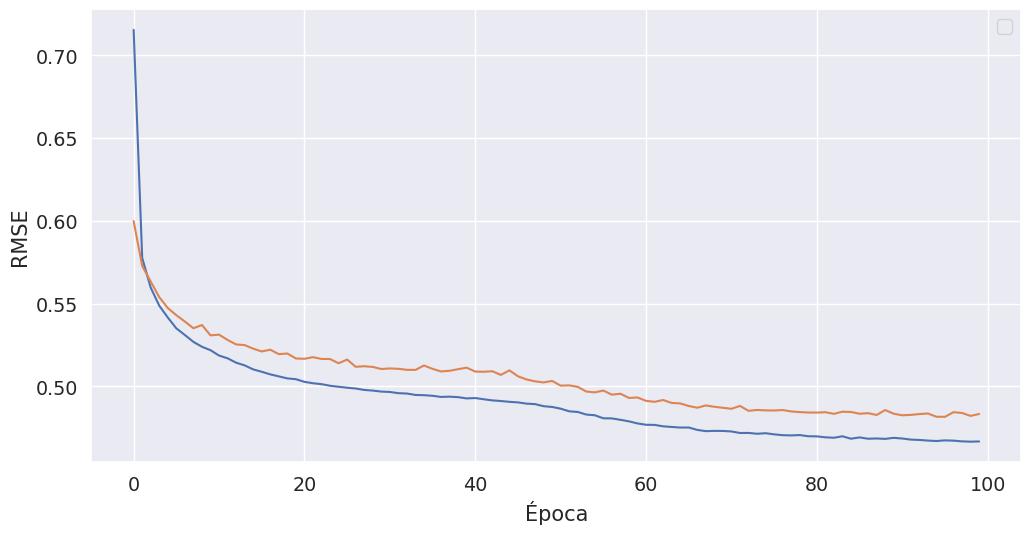

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 0.8449

1728/6000 [=======>......................] - ETA: 0s - loss: 0.5830 

3200/6000 [===============>..............] - ETA: 0s - loss: 0.4789

5024/6000 [========================>.....] - ETA: 0s - loss: 0.4349

6000/6000 [==============================] - 0s 59us/step - loss: 0.4197 - val_loss: 0.3423


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2503

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3283

3552/6000 [================>.............] - ETA: 0s - loss: 0.3564

5376/6000 [=========================>....] - ETA: 0s - loss: 0.3341

6000/6000 [==============================] - 0s 41us/step - loss: 0.3373 - val_loss: 0.3281


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2426

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2978

3232/6000 [===============>..............] - ETA: 0s - loss: 0.3144

4928/6000 [=======================>......] - ETA: 0s - loss: 0.3207

6000/6000 [==============================] - 0s 46us/step - loss: 0.3218 - val_loss: 0.3092


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2255

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3105

3616/6000 [=================>............] - ETA: 0s - loss: 0.3212

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3150

6000/6000 [==============================] - 0s 42us/step - loss: 0.3079 - val_loss: 0.2860


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8319

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3065

3520/6000 [================>.............] - ETA: 0s - loss: 0.3097

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2973

6000/6000 [==============================] - 0s 43us/step - loss: 0.2924 - val_loss: 0.2783


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2674

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2810

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2801

6000/6000 [==============================] - 0s 40us/step - loss: 0.2786 - val_loss: 0.2671


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2643

3616/6000 [=================>............] - ETA: 0s - loss: 0.2585

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2658

6000/6000 [==============================] - 0s 46us/step - loss: 0.2670 - val_loss: 0.2573


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2574

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2477

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 45us/step - loss: 0.2595 - val_loss: 0.2552


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3247

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2567

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2498

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 43us/step - loss: 0.2495 - val_loss: 0.2520


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6268

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2532

3584/6000 [================>.............] - ETA: 0s - loss: 0.2529

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2483

6000/6000 [==============================] - 0s 43us/step - loss: 0.2429 - val_loss: 0.2447


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2583

3616/6000 [=================>............] - ETA: 0s - loss: 0.2451

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 41us/step - loss: 0.2388 - val_loss: 0.2351


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2581

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2262

3584/6000 [================>.............] - ETA: 0s - loss: 0.2302

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 45us/step - loss: 0.2324 - val_loss: 0.2338


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3552/6000 [================>.............] - ETA: 0s - loss: 0.2360

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 47us/step - loss: 0.2286 - val_loss: 0.2325


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2051

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2151

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 47us/step - loss: 0.2256 - val_loss: 0.2343


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3679

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2270

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2150

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 43us/step - loss: 0.2224 - val_loss: 0.2239


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4309

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2322

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2262

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 43us/step - loss: 0.2185 - val_loss: 0.2215


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2297

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2244

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 45us/step - loss: 0.2163 - val_loss: 0.2235


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2394

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2197

3712/6000 [=================>............] - ETA: 0s - loss: 0.2152

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 41us/step - loss: 0.2155 - val_loss: 0.2200


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2207

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2133

3552/6000 [================>.............] - ETA: 0s - loss: 0.2002

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 40us/step - loss: 0.2118 - val_loss: 0.2261


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1996

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2172

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 43us/step - loss: 0.2113 - val_loss: 0.2225


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1827

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2032

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2027

6000/6000 [==============================] - 0s 42us/step - loss: 0.2093 - val_loss: 0.2182


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2055

3680/6000 [=================>............] - ETA: 0s - loss: 0.2106

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2110

6000/6000 [==============================] - 0s 41us/step - loss: 0.2088 - val_loss: 0.2151


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3041

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1980

3552/6000 [================>.............] - ETA: 0s - loss: 0.2077

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2096

6000/6000 [==============================] - 0s 41us/step - loss: 0.2057 - val_loss: 0.2142


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2128

3616/6000 [=================>............] - ETA: 0s - loss: 0.2037

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 44us/step - loss: 0.2039 - val_loss: 0.2094


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1988

3648/6000 [=================>............] - ETA: 0s - loss: 0.2042

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2040

6000/6000 [==============================] - 0s 39us/step - loss: 0.2026 - val_loss: 0.2085


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1994

3712/6000 [=================>............] - ETA: 0s - loss: 0.2023

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2024

6000/6000 [==============================] - 0s 40us/step - loss: 0.2035 - val_loss: 0.2073


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2283

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1985

3680/6000 [=================>............] - ETA: 0s - loss: 0.2071

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2028

6000/6000 [==============================] - 0s 40us/step - loss: 0.2030 - val_loss: 0.2110


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1902

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1941

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2014

6000/6000 [==============================] - 0s 41us/step - loss: 0.2011 - val_loss: 0.2083


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1129

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1981

3520/6000 [================>.............] - ETA: 0s - loss: 0.2058

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 40us/step - loss: 0.2009 - val_loss: 0.2133


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1924

3616/6000 [=================>............] - ETA: 0s - loss: 0.1940

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1953

6000/6000 [==============================] - 0s 41us/step - loss: 0.1998 - val_loss: 0.2103


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2101



3584/6000 [================>.............] - ETA: 0s - loss: 0.2090

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 43us/step - loss: 0.1987 - val_loss: 0.2067


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3265

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2122

3648/6000 [=================>............] - ETA: 0s - loss: 0.1975

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2003

6000/6000 [==============================] - 0s 39us/step - loss: 0.1981 - val_loss: 0.2124


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1996

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2005

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 38us/step - loss: 0.1965 - val_loss: 0.2029


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1886

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1988

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 41us/step - loss: 0.1962 - val_loss: 0.2068


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1989

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1884

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1961

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1968

6000/6000 [==============================] - 0s 42us/step - loss: 0.1960 - val_loss: 0.2031


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3517

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1958

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1971

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 41us/step - loss: 0.1957 - val_loss: 0.2070


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2128

3552/6000 [================>.............] - ETA: 0s - loss: 0.1936

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 40us/step - loss: 0.1969 - val_loss: 0.2049


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3175

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1920

3488/6000 [================>.............] - ETA: 0s - loss: 0.1929

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 41us/step - loss: 0.1952 - val_loss: 0.2015


Epoch 39/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0807

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1885

3584/6000 [================>.............] - ETA: 0s - loss: 0.1847

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 40us/step - loss: 0.1945 - val_loss: 0.2032


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2037

3680/6000 [=================>............] - ETA: 0s - loss: 0.1953

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 39us/step - loss: 0.1951 - val_loss: 0.2061


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1882

3648/6000 [=================>............] - ETA: 0s - loss: 0.1964

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1954

6000/6000 [==============================] - 0s 40us/step - loss: 0.1947 - val_loss: 0.2031


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1887

3712/6000 [=================>............] - ETA: 0s - loss: 0.1941

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 39us/step - loss: 0.1925 - val_loss: 0.1992


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3089

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1917

2976/6000 [=============>................] - ETA: 0s - loss: 0.1950

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 42us/step - loss: 0.1905 - val_loss: 0.2005


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1893

3616/6000 [=================>............] - ETA: 0s - loss: 0.1915

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 41us/step - loss: 0.1919 - val_loss: 0.2010


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2461

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1824

3488/6000 [================>.............] - ETA: 0s - loss: 0.1862

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 41us/step - loss: 0.1907 - val_loss: 0.2015


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1817

3520/6000 [================>.............] - ETA: 0s - loss: 0.1938

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 40us/step - loss: 0.1923 - val_loss: 0.1979


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1896

3520/6000 [================>.............] - ETA: 0s - loss: 0.1916

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 41us/step - loss: 0.1924 - val_loss: 0.2102


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1812

3680/6000 [=================>............] - ETA: 0s - loss: 0.1795

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 39us/step - loss: 0.1909 - val_loss: 0.1989


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1723

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1805

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 42us/step - loss: 0.1907 - val_loss: 0.2003


Epoch 50/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1888

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.1892

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 45us/step - loss: 0.1901 - val_loss: 0.1990


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0430

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1777

2784/6000 [============>.................] - ETA: 0s - loss: 0.1929

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1903

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 47us/step - loss: 0.1900 - val_loss: 0.1999


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2470

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2034

2816/6000 [=============>................] - ETA: 0s - loss: 0.1923

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1846

5984/6000 [============================>.] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 46us/step - loss: 0.1890 - val_loss: 0.2006


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1900

3520/6000 [================>.............] - ETA: 0s - loss: 0.1905

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 41us/step - loss: 0.1895 - val_loss: 0.1980


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1425

 800/6000 [===>..........................] - ETA: 0s - loss: 0.1892

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1928

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1906

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 51us/step - loss: 0.1882 - val_loss: 0.2058


Epoch 55/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2791

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1847

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1861

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 43us/step - loss: 0.1882 - val_loss: 0.1968


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1793

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1795

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 42us/step - loss: 0.1877 - val_loss: 0.1987


Epoch 57/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2036

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1883

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 42us/step - loss: 0.1882 - val_loss: 0.1980


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3122

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1829

3616/6000 [=================>............] - ETA: 0s - loss: 0.1861

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 40us/step - loss: 0.1864 - val_loss: 0.1998


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1816

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1868

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 43us/step - loss: 0.1872 - val_loss: 0.2127


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2939

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1735

2816/6000 [=============>................] - ETA: 0s - loss: 0.1747

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 42us/step - loss: 0.1864 - val_loss: 0.2034


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1878

3680/6000 [=================>............] - ETA: 0s - loss: 0.1768

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 39us/step - loss: 0.1870 - val_loss: 0.2024


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2200

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1927

3648/6000 [=================>............] - ETA: 0s - loss: 0.1865

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 39us/step - loss: 0.1863 - val_loss: 0.2031


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1775

3776/6000 [=================>............] - ETA: 0s - loss: 0.1822

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 39us/step - loss: 0.1858 - val_loss: 0.1974


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1806

3712/6000 [=================>............] - ETA: 0s - loss: 0.1805

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 42us/step - loss: 0.1850 - val_loss: 0.1975


Epoch 65/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1902

3712/6000 [=================>............] - ETA: 0s - loss: 0.1915

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 39us/step - loss: 0.1860 - val_loss: 0.1994


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0911

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1686

3744/6000 [=================>............] - ETA: 0s - loss: 0.1873

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 46us/step - loss: 0.1845 - val_loss: 0.2000


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1857

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3680/6000 [=================>............] - ETA: 0s - loss: 0.1782

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 39us/step - loss: 0.1848 - val_loss: 0.2025


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3488/6000 [================>.............] - ETA: 0s - loss: 0.1882

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 40us/step - loss: 0.1848 - val_loss: 0.1983


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1554

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1626

3520/6000 [================>.............] - ETA: 0s - loss: 0.1769

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 40us/step - loss: 0.1829 - val_loss: 0.2011


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3665

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1952

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1869

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 42us/step - loss: 0.1841 - val_loss: 0.1978


Epoch 71/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1966

3616/6000 [=================>............] - ETA: 0s - loss: 0.1863

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 39us/step - loss: 0.1823 - val_loss: 0.1961


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1884

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1889

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 41us/step - loss: 0.1824 - val_loss: 0.1958


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1604

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1753

2976/6000 [=============>................] - ETA: 0s - loss: 0.1700

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1785



6000/6000 [==============================] - 0s 42us/step - loss: 0.1821 - val_loss: 0.1952


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1738

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1836

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 45us/step - loss: 0.1830 - val_loss: 0.1955


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1786

3648/6000 [=================>............] - ETA: 0s - loss: 0.1819

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 40us/step - loss: 0.1822 - val_loss: 0.1947


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0464

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1852

2912/6000 [=============>................] - ETA: 0s - loss: 0.1838

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1817

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 46us/step - loss: 0.1810 - val_loss: 0.1973


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1922

3424/6000 [================>.............] - ETA: 0s - loss: 0.1803

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 40us/step - loss: 0.1817 - val_loss: 0.1993


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1756

3712/6000 [=================>............] - ETA: 0s - loss: 0.1767

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 40us/step - loss: 0.1801 - val_loss: 0.1978


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4607

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1928

3552/6000 [================>.............] - ETA: 0s - loss: 0.1873

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 41us/step - loss: 0.1806 - val_loss: 0.1932


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1866

2912/6000 [=============>................] - ETA: 0s - loss: 0.1841

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 43us/step - loss: 0.1804 - val_loss: 0.1955


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2549

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2023

3424/6000 [================>.............] - ETA: 0s - loss: 0.1884

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 40us/step - loss: 0.1803 - val_loss: 0.1953


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1767

3488/6000 [================>.............] - ETA: 0s - loss: 0.1780

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 41us/step - loss: 0.1808 - val_loss: 0.1937


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3536

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3584/6000 [================>.............] - ETA: 0s - loss: 0.1844

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 45us/step - loss: 0.1784 - val_loss: 0.1939


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1677

3680/6000 [=================>............] - ETA: 0s - loss: 0.1749

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 41us/step - loss: 0.1774 - val_loss: 0.1951


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3744/6000 [=================>............] - ETA: 0s - loss: 0.1723

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 39us/step - loss: 0.1789 - val_loss: 0.1930


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3394

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1947

3680/6000 [=================>............] - ETA: 0s - loss: 0.1799

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 39us/step - loss: 0.1786 - val_loss: 0.1973


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1787

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1796

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1774



6000/6000 [==============================] - 0s 42us/step - loss: 0.1771 - val_loss: 0.1964


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1702

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1707

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 42us/step - loss: 0.1770 - val_loss: 0.1934


Epoch 89/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1329

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1734

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 43us/step - loss: 0.1767 - val_loss: 0.1924


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1732

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1684

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 41us/step - loss: 0.1765 - val_loss: 0.1953


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1743

3616/6000 [=================>............] - ETA: 0s - loss: 0.1698

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 40us/step - loss: 0.1766 - val_loss: 0.1981


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1846

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1798

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 43us/step - loss: 0.1766 - val_loss: 0.1986


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1727

3616/6000 [=================>............] - ETA: 0s - loss: 0.1735

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 39us/step - loss: 0.1758 - val_loss: 0.2018


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1730

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1760

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 41us/step - loss: 0.1759 - val_loss: 0.1939


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2022

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3488/6000 [================>.............] - ETA: 0s - loss: 0.1739

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 40us/step - loss: 0.1739 - val_loss: 0.1942


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1795

3616/6000 [=================>............] - ETA: 0s - loss: 0.1737

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 39us/step - loss: 0.1735 - val_loss: 0.1974


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4957

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3680/6000 [=================>............] - ETA: 0s - loss: 0.1826

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 42us/step - loss: 0.1764 - val_loss: 0.1928


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1761

3616/6000 [=================>............] - ETA: 0s - loss: 0.1772

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 41us/step - loss: 0.1745 - val_loss: 0.1920


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1716

3680/6000 [=================>............] - ETA: 0s - loss: 0.1772

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 39us/step - loss: 0.1744 - val_loss: 0.1946


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3900

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1608

3616/6000 [=================>............] - ETA: 0s - loss: 0.1716

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 42us/step - loss: 0.1737 - val_loss: 0.1973


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1737

3776/6000 [=================>............] - ETA: 0s - loss: 0.1750

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 39us/step - loss: 0.1752 - val_loss: 0.1959


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1539

3488/6000 [================>.............] - ETA: 0s - loss: 0.1635

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 41us/step - loss: 0.1738 - val_loss: 0.1893


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3712/6000 [=================>............] - ETA: 0s - loss: 0.1650

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 39us/step - loss: 0.1722 - val_loss: 0.2016


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1607

3680/6000 [=================>............] - ETA: 0s - loss: 0.1699

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 39us/step - loss: 0.1731 - val_loss: 0.1903


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3712/6000 [=================>............] - ETA: 0s - loss: 0.1687

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 39us/step - loss: 0.1721 - val_loss: 0.1960


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4267

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1860

3424/6000 [================>.............] - ETA: 0s - loss: 0.1745

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 43us/step - loss: 0.1725 - val_loss: 0.1979


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2321

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1614

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1676

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 38us/step - loss: 0.1727 - val_loss: 0.1927


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1721

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1736

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 39us/step - loss: 0.1723 - val_loss: 0.1976


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1196

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1723

3744/6000 [=================>............] - ETA: 0s - loss: 0.1701

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 40us/step - loss: 0.1712 - val_loss: 0.1905


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2310

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3744/6000 [=================>............] - ETA: 0s - loss: 0.1774

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 39us/step - loss: 0.1704 - val_loss: 0.1891


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1703

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1679

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 45us/step - loss: 0.1698 - val_loss: 0.1937


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3087

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1730

3712/6000 [=================>............] - ETA: 0s - loss: 0.1759

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1926


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2507

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1605

3616/6000 [=================>............] - ETA: 0s - loss: 0.1684

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 40us/step - loss: 0.1704 - val_loss: 0.1923


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1789

3744/6000 [=================>............] - ETA: 0s - loss: 0.1768

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 40us/step - loss: 0.1695 - val_loss: 0.1937


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2602

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1695

3584/6000 [================>.............] - ETA: 0s - loss: 0.1666

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 39us/step - loss: 0.1697 - val_loss: 0.1894


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1645

3648/6000 [=================>............] - ETA: 0s - loss: 0.1753

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 39us/step - loss: 0.1699 - val_loss: 0.1945


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1739

3680/6000 [=================>............] - ETA: 0s - loss: 0.1700

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 38us/step - loss: 0.1704 - val_loss: 0.1879


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1765

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1648

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 38us/step - loss: 0.1690 - val_loss: 0.1967


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1648

3552/6000 [================>.............] - ETA: 0s - loss: 0.1715

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 42us/step - loss: 0.1691 - val_loss: 0.1918


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2315

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1591

3552/6000 [================>.............] - ETA: 0s - loss: 0.1646

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 41us/step - loss: 0.1685 - val_loss: 0.1925


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0660

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1601

3616/6000 [=================>............] - ETA: 0s - loss: 0.1548

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1629

6000/6000 [==============================] - 0s 40us/step - loss: 0.1675 - val_loss: 0.1945


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1238

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3520/6000 [================>.............] - ETA: 0s - loss: 0.1719

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 40us/step - loss: 0.1692 - val_loss: 0.1918


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0515

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1525

3616/6000 [=================>............] - ETA: 0s - loss: 0.1562

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 41us/step - loss: 0.1669 - val_loss: 0.2011


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2159

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1658

3424/6000 [================>.............] - ETA: 0s - loss: 0.1630

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 42us/step - loss: 0.1678 - val_loss: 0.1897


Epoch 125/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0872

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1823

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1713

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 45us/step - loss: 0.1667 - val_loss: 0.1931


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1691

3552/6000 [================>.............] - ETA: 0s - loss: 0.1675

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 40us/step - loss: 0.1662 - val_loss: 0.1910


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1621

3488/6000 [================>.............] - ETA: 0s - loss: 0.1638

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 42us/step - loss: 0.1655 - val_loss: 0.1891


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1534

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1656

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 42us/step - loss: 0.1656 - val_loss: 0.1959


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3569

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1672

3424/6000 [================>.............] - ETA: 0s - loss: 0.1595

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1648

6000/6000 [==============================] - 0s 43us/step - loss: 0.1660 - val_loss: 0.1921


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1754

3712/6000 [=================>............] - ETA: 0s - loss: 0.1746

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 39us/step - loss: 0.1655 - val_loss: 0.2012


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0530

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1558

3488/6000 [================>.............] - ETA: 0s - loss: 0.1646

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 44us/step - loss: 0.1660 - val_loss: 0.1953


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1615

3552/6000 [================>.............] - ETA: 0s - loss: 0.1643

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 40us/step - loss: 0.1657 - val_loss: 0.1951


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2068

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1804

3584/6000 [================>.............] - ETA: 0s - loss: 0.1689

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 39us/step - loss: 0.1646 - val_loss: 0.1952


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1584

3776/6000 [=================>............] - ETA: 0s - loss: 0.1555

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 38us/step - loss: 0.1635 - val_loss: 0.1999


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2544

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1563

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1668

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 38us/step - loss: 0.1671 - val_loss: 0.1887


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0803

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1667

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 43us/step - loss: 0.1637 - val_loss: 0.1902


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1614

3744/6000 [=================>............] - ETA: 0s - loss: 0.1663

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1648

6000/6000 [==============================] - 0s 38us/step - loss: 0.1642 - val_loss: 0.1886


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1655

3776/6000 [=================>............] - ETA: 0s - loss: 0.1624

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 39us/step - loss: 0.1643 - val_loss: 0.1935


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2076

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3616/6000 [=================>............] - ETA: 0s - loss: 0.1641

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 39us/step - loss: 0.1644 - val_loss: 0.1894


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2767

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1552

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1557

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 42us/step - loss: 0.1632 - val_loss: 0.1867


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149



1856/6000 [========>.....................] - ETA: 0s - loss: 0.1590

3584/6000 [================>.............] - ETA: 0s - loss: 0.1573

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 41us/step - loss: 0.1631 - val_loss: 0.1929


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1593

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3552/6000 [================>.............] - ETA: 0s - loss: 0.1610

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 40us/step - loss: 0.1616 - val_loss: 0.1890


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2154

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1559

3680/6000 [=================>............] - ETA: 0s - loss: 0.1614

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1611

6000/6000 [==============================] - 0s 39us/step - loss: 0.1612 - val_loss: 0.1886


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2791

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1563

3552/6000 [================>.............] - ETA: 0s - loss: 0.1606

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1631

6000/6000 [==============================] - 0s 40us/step - loss: 0.1609 - val_loss: 0.1861


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2707

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1688

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1580

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 38us/step - loss: 0.1622 - val_loss: 0.1961


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1560

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1606

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 41us/step - loss: 0.1599 - val_loss: 0.1861


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1657

3648/6000 [=================>............] - ETA: 0s - loss: 0.1637

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1631

6000/6000 [==============================] - 0s 39us/step - loss: 0.1615 - val_loss: 0.1854


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1537

3648/6000 [=================>............] - ETA: 0s - loss: 0.1606

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 42us/step - loss: 0.1596 - val_loss: 0.1881


Epoch 149/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1414

3744/6000 [=================>............] - ETA: 0s - loss: 0.1566

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 41us/step - loss: 0.1604 - val_loss: 0.1884


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1926

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1657

2944/6000 [=============>................] - ETA: 0s - loss: 0.1576

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 44us/step - loss: 0.1608 - val_loss: 0.1898


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1630

3616/6000 [=================>............] - ETA: 0s - loss: 0.1572

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1569

6000/6000 [==============================] - 0s 40us/step - loss: 0.1598 - val_loss: 0.1894


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1488

3456/6000 [================>.............] - ETA: 0s - loss: 0.1531

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 44us/step - loss: 0.1609 - val_loss: 0.1885


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1624

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1611

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 42us/step - loss: 0.1613 - val_loss: 0.1844


Epoch 154/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1594

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1674

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 42us/step - loss: 0.1599 - val_loss: 0.1871


Epoch 155/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1563

3616/6000 [=================>............] - ETA: 0s - loss: 0.1561

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 40us/step - loss: 0.1591 - val_loss: 0.1937


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1686

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1640

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 44us/step - loss: 0.1584 - val_loss: 0.1901


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3035

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1556

3456/6000 [================>.............] - ETA: 0s - loss: 0.1532

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1620

6000/6000 [==============================] - 0s 42us/step - loss: 0.1591 - val_loss: 0.1875


Epoch 158/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0707

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1467

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1550

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 41us/step - loss: 0.1604 - val_loss: 0.1860


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3552/6000 [================>.............] - ETA: 0s - loss: 0.1620

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 42us/step - loss: 0.1588 - val_loss: 0.1931


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3007

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1547

3520/6000 [================>.............] - ETA: 0s - loss: 0.1518

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1587

6000/6000 [==============================] - 0s 41us/step - loss: 0.1580 - val_loss: 0.1876


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1466

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1533

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 44us/step - loss: 0.1593 - val_loss: 0.1855


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1536

3424/6000 [================>.............] - ETA: 0s - loss: 0.1540

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1598

6000/6000 [==============================] - 0s 42us/step - loss: 0.1592 - val_loss: 0.1858


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1743

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1664

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1600

6000/6000 [==============================] - 0s 42us/step - loss: 0.1589 - val_loss: 0.1913


Epoch 164/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3211

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1603

3520/6000 [================>.............] - ETA: 0s - loss: 0.1603

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1578

6000/6000 [==============================] - 0s 41us/step - loss: 0.1576 - val_loss: 0.1919


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1625

3424/6000 [================>.............] - ETA: 0s - loss: 0.1568

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 40us/step - loss: 0.1577 - val_loss: 0.1889


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1573

3424/6000 [================>.............] - ETA: 0s - loss: 0.1622

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 44us/step - loss: 0.1577 - val_loss: 0.1869


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2662

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1496

3488/6000 [================>.............] - ETA: 0s - loss: 0.1457

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1555

6000/6000 [==============================] - 0s 40us/step - loss: 0.1576 - val_loss: 0.1882


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1604

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1565

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 43us/step - loss: 0.1586 - val_loss: 0.1882


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0589

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1508

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1517

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 44us/step - loss: 0.1570 - val_loss: 0.1836


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0681

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1470

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1541

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 43us/step - loss: 0.1564 - val_loss: 0.1839


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1448

3616/6000 [=================>............] - ETA: 0s - loss: 0.1544

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1588

6000/6000 [==============================] - 0s 40us/step - loss: 0.1564 - val_loss: 0.1892


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1553

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1573

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 46us/step - loss: 0.1561 - val_loss: 0.1879


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1511

3552/6000 [================>.............] - ETA: 0s - loss: 0.1577

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1571

6000/6000 [==============================] - 0s 40us/step - loss: 0.1562 - val_loss: 0.1835


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1506

3488/6000 [================>.............] - ETA: 0s - loss: 0.1547

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 41us/step - loss: 0.1550 - val_loss: 0.1848


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1601

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1588

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1535

6000/6000 [==============================] - 0s 42us/step - loss: 0.1554 - val_loss: 0.1832


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1587

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1632

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 45us/step - loss: 0.1561 - val_loss: 0.1846


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1545

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1478

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 40us/step - loss: 0.1540 - val_loss: 0.1832


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1611

3552/6000 [================>.............] - ETA: 0s - loss: 0.1497

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 40us/step - loss: 0.1539 - val_loss: 0.1893


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1608

3616/6000 [=================>............] - ETA: 0s - loss: 0.1561

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 39us/step - loss: 0.1548 - val_loss: 0.1826


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2135

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1455

3456/6000 [================>.............] - ETA: 0s - loss: 0.1496

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 42us/step - loss: 0.1534 - val_loss: 0.1897


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1501

3552/6000 [================>.............] - ETA: 0s - loss: 0.1567

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1580

6000/6000 [==============================] - 0s 41us/step - loss: 0.1555 - val_loss: 0.1814


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0511

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1599

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1606

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 42us/step - loss: 0.1549 - val_loss: 0.1895


Epoch 183/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2438

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1578

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1552

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 43us/step - loss: 0.1537 - val_loss: 0.1837


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2229

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1460

3616/6000 [=================>............] - ETA: 0s - loss: 0.1469

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 41us/step - loss: 0.1541 - val_loss: 0.1852


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1666

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1532

3488/6000 [================>.............] - ETA: 0s - loss: 0.1529

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1561

6000/6000 [==============================] - 0s 40us/step - loss: 0.1536 - val_loss: 0.1845


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1584

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1571

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 42us/step - loss: 0.1534 - val_loss: 0.1895


Epoch 187/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1299

3456/6000 [================>.............] - ETA: 0s - loss: 0.1486

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 41us/step - loss: 0.1536 - val_loss: 0.1868


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1552

3424/6000 [================>.............] - ETA: 0s - loss: 0.1523

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 40us/step - loss: 0.1528 - val_loss: 0.1862


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1520

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1485

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 43us/step - loss: 0.1528 - val_loss: 0.1894


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0711

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1601

3456/6000 [================>.............] - ETA: 0s - loss: 0.1467

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1533

6000/6000 [==============================] - 0s 41us/step - loss: 0.1538 - val_loss: 0.1846


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1479

3424/6000 [================>.............] - ETA: 0s - loss: 0.1552

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 41us/step - loss: 0.1524 - val_loss: 0.1843


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3601

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1555

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1487

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 43us/step - loss: 0.1532 - val_loss: 0.1823


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0994

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1470

3488/6000 [================>.............] - ETA: 0s - loss: 0.1421

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 41us/step - loss: 0.1517 - val_loss: 0.1860


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1595

3488/6000 [================>.............] - ETA: 0s - loss: 0.1560

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 41us/step - loss: 0.1528 - val_loss: 0.1883


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2042

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1504

3648/6000 [=================>............] - ETA: 0s - loss: 0.1501

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 40us/step - loss: 0.1524 - val_loss: 0.1835


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1561

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1598

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 42us/step - loss: 0.1513 - val_loss: 0.1844


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0885

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1390

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1485

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 42us/step - loss: 0.1516 - val_loss: 0.1818


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2533

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1421

3616/6000 [=================>............] - ETA: 0s - loss: 0.1450

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 40us/step - loss: 0.1509 - val_loss: 0.1880


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3358

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3552/6000 [================>.............] - ETA: 0s - loss: 0.1444

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 41us/step - loss: 0.1517 - val_loss: 0.1817


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0735

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1523

3584/6000 [================>.............] - ETA: 0s - loss: 0.1477

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 40us/step - loss: 0.1524 - val_loss: 0.1853


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3462

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1625

3424/6000 [================>.............] - ETA: 0s - loss: 0.1510

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 40us/step - loss: 0.1511 - val_loss: 0.1847


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0403

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1514

3680/6000 [=================>............] - ETA: 0s - loss: 0.1575

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 39us/step - loss: 0.1513 - val_loss: 0.1864


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1411

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 43us/step - loss: 0.1515 - val_loss: 0.1862


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1475

3520/6000 [================>.............] - ETA: 0s - loss: 0.1518

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 40us/step - loss: 0.1513 - val_loss: 0.1845


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1539

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1494

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 38us/step - loss: 0.1500 - val_loss: 0.1874


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1576

3584/6000 [================>.............] - ETA: 0s - loss: 0.1499

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 40us/step - loss: 0.1505 - val_loss: 0.1858


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1489

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 40us/step - loss: 0.1498 - val_loss: 0.1852


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3744/6000 [=================>............] - ETA: 0s - loss: 0.1498

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1815


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1440

3744/6000 [=================>............] - ETA: 0s - loss: 0.1515

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1519

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1831


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3584/6000 [================>.............] - ETA: 0s - loss: 0.1432

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 39us/step - loss: 0.1488 - val_loss: 0.1821


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1438

3776/6000 [=================>............] - ETA: 0s - loss: 0.1489

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 38us/step - loss: 0.1519 - val_loss: 0.1840


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1591

3616/6000 [=================>............] - ETA: 0s - loss: 0.1587

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 39us/step - loss: 0.1498 - val_loss: 0.1825


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1786

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1372

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1626

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 41us/step - loss: 0.1484 - val_loss: 0.1817


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1492

3680/6000 [=================>............] - ETA: 0s - loss: 0.1473

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 40us/step - loss: 0.1499 - val_loss: 0.1950


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0732

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1565

3648/6000 [=================>............] - ETA: 0s - loss: 0.1522

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 40us/step - loss: 0.1492 - val_loss: 0.1904


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1514

3616/6000 [=================>............] - ETA: 0s - loss: 0.1535

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 40us/step - loss: 0.1499 - val_loss: 0.1826


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3648/6000 [=================>............] - ETA: 0s - loss: 0.1613

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 39us/step - loss: 0.1497 - val_loss: 0.1866


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1909

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1500

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1517

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 42us/step - loss: 0.1493 - val_loss: 0.1836


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0456

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1572

3648/6000 [=================>............] - ETA: 0s - loss: 0.1449

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 39us/step - loss: 0.1482 - val_loss: 0.1840


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1541

3648/6000 [=================>............] - ETA: 0s - loss: 0.1506

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1483

6000/6000 [==============================] - 0s 40us/step - loss: 0.1500 - val_loss: 0.1861


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1616

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1464

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 41us/step - loss: 0.1476 - val_loss: 0.1847


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1433

3648/6000 [=================>............] - ETA: 0s - loss: 0.1448

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 40us/step - loss: 0.1484 - val_loss: 0.1829


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1383

3680/6000 [=================>............] - ETA: 0s - loss: 0.1464

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 41us/step - loss: 0.1488 - val_loss: 0.1812


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1003

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1424

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1394

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 43us/step - loss: 0.1471 - val_loss: 0.1849


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1508

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1493

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 42us/step - loss: 0.1475 - val_loss: 0.1839


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3648/6000 [=================>............] - ETA: 0s - loss: 0.1400

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 43us/step - loss: 0.1470 - val_loss: 0.1822


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1271

3552/6000 [================>.............] - ETA: 0s - loss: 0.1468

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 43us/step - loss: 0.1471 - val_loss: 0.1808


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1449

3744/6000 [=================>............] - ETA: 0s - loss: 0.1472

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 42us/step - loss: 0.1472 - val_loss: 0.1837


Epoch 229/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1520

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3552/6000 [================>.............] - ETA: 0s - loss: 0.1428

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 41us/step - loss: 0.1475 - val_loss: 0.1824


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1553

3552/6000 [================>.............] - ETA: 0s - loss: 0.1533

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 41us/step - loss: 0.1469 - val_loss: 0.1878


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1175

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1550

3520/6000 [================>.............] - ETA: 0s - loss: 0.1476

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 42us/step - loss: 0.1474 - val_loss: 0.1829


Epoch 232/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2280

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1508

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1479

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 43us/step - loss: 0.1465 - val_loss: 0.1845


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1622

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1522

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 40us/step - loss: 0.1477 - val_loss: 0.1822


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1461

3680/6000 [=================>............] - ETA: 0s - loss: 0.1453

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 39us/step - loss: 0.1479 - val_loss: 0.1832


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1684

3584/6000 [================>.............] - ETA: 0s - loss: 0.1570

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 41us/step - loss: 0.1467 - val_loss: 0.1820


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1479

3584/6000 [================>.............] - ETA: 0s - loss: 0.1465

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 39us/step - loss: 0.1457 - val_loss: 0.1821


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1573

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1481

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 44us/step - loss: 0.1458 - val_loss: 0.1817


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1439

3680/6000 [=================>............] - ETA: 0s - loss: 0.1513

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 39us/step - loss: 0.1456 - val_loss: 0.1820


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1592

3648/6000 [=================>............] - ETA: 0s - loss: 0.1429

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 39us/step - loss: 0.1469 - val_loss: 0.1836


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1450

3744/6000 [=================>............] - ETA: 0s - loss: 0.1475

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1485

6000/6000 [==============================] - 0s 39us/step - loss: 0.1470 - val_loss: 0.1824


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1094

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1496

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1455

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 43us/step - loss: 0.1449 - val_loss: 0.1831


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1769

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1408

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1451

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 42us/step - loss: 0.1456 - val_loss: 0.1827


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2480

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1401

3456/6000 [================>.............] - ETA: 0s - loss: 0.1450

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 41us/step - loss: 0.1453 - val_loss: 0.1817


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1408

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1480

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 42us/step - loss: 0.1459 - val_loss: 0.1838


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2624

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1449

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1428

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 42us/step - loss: 0.1447 - val_loss: 0.1879


Epoch 246/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1435

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1482

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 44us/step - loss: 0.1443 - val_loss: 0.1839


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1367

3584/6000 [================>.............] - ETA: 0s - loss: 0.1401

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 43us/step - loss: 0.1452 - val_loss: 0.1864


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1590

3552/6000 [================>.............] - ETA: 0s - loss: 0.1530

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 40us/step - loss: 0.1453 - val_loss: 0.1868


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3648/6000 [=================>............] - ETA: 0s - loss: 0.1402

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 39us/step - loss: 0.1456 - val_loss: 0.1820


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1526

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1496

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 41us/step - loss: 0.1441 - val_loss: 0.1820


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1354

3424/6000 [================>.............] - ETA: 0s - loss: 0.1420

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 44us/step - loss: 0.1440 - val_loss: 0.1810


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3744/6000 [=================>............] - ETA: 0s - loss: 0.1346

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 40us/step - loss: 0.1445 - val_loss: 0.1864


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2929

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1392

3520/6000 [================>.............] - ETA: 0s - loss: 0.1419

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 42us/step - loss: 0.1448 - val_loss: 0.1838


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1533

3744/6000 [=================>............] - ETA: 0s - loss: 0.1485

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 39us/step - loss: 0.1446 - val_loss: 0.1810


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2321

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1415

3552/6000 [================>.............] - ETA: 0s - loss: 0.1473

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 41us/step - loss: 0.1446 - val_loss: 0.1817


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1418

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1415

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 49us/step - loss: 0.1444 - val_loss: 0.1853


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1366

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1418

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 48us/step - loss: 0.1435 - val_loss: 0.1793


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1417

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1471

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 43us/step - loss: 0.1435 - val_loss: 0.1807


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1363

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1400

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 45us/step - loss: 0.1444 - val_loss: 0.1816


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3488/6000 [================>.............] - ETA: 0s - loss: 0.1412

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 40us/step - loss: 0.1447 - val_loss: 0.1838


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1554

2848/6000 [=============>................] - ETA: 0s - loss: 0.1524

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 44us/step - loss: 0.1445 - val_loss: 0.1887


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1497

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1407

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 39us/step - loss: 0.1437 - val_loss: 0.1900


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1849

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1453

3552/6000 [================>.............] - ETA: 0s - loss: 0.1486

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 40us/step - loss: 0.1437 - val_loss: 0.1830


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1488

3712/6000 [=================>............] - ETA: 0s - loss: 0.1479

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 39us/step - loss: 0.1435 - val_loss: 0.1818


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1329

3648/6000 [=================>............] - ETA: 0s - loss: 0.1438

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 40us/step - loss: 0.1428 - val_loss: 0.1816


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1404

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1414

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 47us/step - loss: 0.1431 - val_loss: 0.1881


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1521

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1412

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 43us/step - loss: 0.1430 - val_loss: 0.1812


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1151

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1257

3520/6000 [================>.............] - ETA: 0s - loss: 0.1375

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 40us/step - loss: 0.1426 - val_loss: 0.1838


Epoch 269/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1128

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1376

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1423

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 46us/step - loss: 0.1425 - val_loss: 0.1819


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1808

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1279

3648/6000 [=================>............] - ETA: 0s - loss: 0.1440

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 40us/step - loss: 0.1436 - val_loss: 0.1876


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1375

3488/6000 [================>.............] - ETA: 0s - loss: 0.1436

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 42us/step - loss: 0.1429 - val_loss: 0.1820


Epoch 272/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1491

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1304

2816/6000 [=============>................] - ETA: 0s - loss: 0.1419

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1402

6000/6000 [==============================] - 0s 44us/step - loss: 0.1424 - val_loss: 0.1840


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1588

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1522

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1471

6000/6000 [==============================] - 0s 45us/step - loss: 0.1416 - val_loss: 0.1843


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1322

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1408

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 43us/step - loss: 0.1424 - val_loss: 0.1848


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1450

3488/6000 [================>.............] - ETA: 0s - loss: 0.1436

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 40us/step - loss: 0.1418 - val_loss: 0.1810


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2095

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1293

3680/6000 [=================>............] - ETA: 0s - loss: 0.1367

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 40us/step - loss: 0.1408 - val_loss: 0.1840


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1463

3424/6000 [================>.............] - ETA: 0s - loss: 0.1428

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 43us/step - loss: 0.1408 - val_loss: 0.1829


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1545

3648/6000 [=================>............] - ETA: 0s - loss: 0.1447

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 43us/step - loss: 0.1414 - val_loss: 0.1815


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1332

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1361

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 41us/step - loss: 0.1420 - val_loss: 0.1814


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1436

3712/6000 [=================>............] - ETA: 0s - loss: 0.1433

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 40us/step - loss: 0.1411 - val_loss: 0.1851


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2451

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1308

3584/6000 [================>.............] - ETA: 0s - loss: 0.1336

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 40us/step - loss: 0.1410 - val_loss: 0.1840


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2118

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1428

3712/6000 [=================>............] - ETA: 0s - loss: 0.1435

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 39us/step - loss: 0.1436 - val_loss: 0.1844


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1236

3776/6000 [=================>............] - ETA: 0s - loss: 0.1395

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 39us/step - loss: 0.1411 - val_loss: 0.1828


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2142

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1458

3712/6000 [=================>............] - ETA: 0s - loss: 0.1478

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 39us/step - loss: 0.1410 - val_loss: 0.1827


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1523

3552/6000 [================>.............] - ETA: 0s - loss: 0.1370

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 41us/step - loss: 0.1409 - val_loss: 0.1827


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1477

3552/6000 [================>.............] - ETA: 0s - loss: 0.1378

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 43us/step - loss: 0.1408 - val_loss: 0.1828


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2068

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1403

3488/6000 [================>.............] - ETA: 0s - loss: 0.1332

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 42us/step - loss: 0.1412 - val_loss: 0.1815


Epoch 288/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1958

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3712/6000 [=================>............] - ETA: 0s - loss: 0.1384

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 40us/step - loss: 0.1408 - val_loss: 0.1821


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1369

3552/6000 [================>.............] - ETA: 0s - loss: 0.1410

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 40us/step - loss: 0.1394 - val_loss: 0.1829


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1415

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1359

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 40us/step - loss: 0.1398 - val_loss: 0.1842


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1312

3680/6000 [=================>............] - ETA: 0s - loss: 0.1394

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 40us/step - loss: 0.1396 - val_loss: 0.1810


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1278

3520/6000 [================>.............] - ETA: 0s - loss: 0.1305

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 39us/step - loss: 0.1394 - val_loss: 0.1859


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3744/6000 [=================>............] - ETA: 0s - loss: 0.1365

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 41us/step - loss: 0.1409 - val_loss: 0.1826


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1407

3616/6000 [=================>............] - ETA: 0s - loss: 0.1391

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 39us/step - loss: 0.1392 - val_loss: 0.1816


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1356

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 39us/step - loss: 0.1408 - val_loss: 0.1825


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1332

3584/6000 [================>.............] - ETA: 0s - loss: 0.1350

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 39us/step - loss: 0.1396 - val_loss: 0.1840


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1923

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1258

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1352

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 42us/step - loss: 0.1388 - val_loss: 0.1883


Epoch 298/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1467

3616/6000 [=================>............] - ETA: 0s - loss: 0.1429

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 39us/step - loss: 0.1401 - val_loss: 0.1835


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1371

3680/6000 [=================>............] - ETA: 0s - loss: 0.1418

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 41us/step - loss: 0.1392 - val_loss: 0.1796


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1337

3488/6000 [================>.............] - ETA: 0s - loss: 0.1306

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 40us/step - loss: 0.1383 - val_loss: 0.1799


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1304

3712/6000 [=================>............] - ETA: 0s - loss: 0.1326

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 40us/step - loss: 0.1386 - val_loss: 0.1840


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1414

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 41us/step - loss: 0.1394 - val_loss: 0.1824


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1331

3648/6000 [=================>............] - ETA: 0s - loss: 0.1352

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 40us/step - loss: 0.1389 - val_loss: 0.1800


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1314

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1357

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 41us/step - loss: 0.1378 - val_loss: 0.1887


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3648/6000 [=================>............] - ETA: 0s - loss: 0.1334

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 40us/step - loss: 0.1391 - val_loss: 0.1812


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1337

3712/6000 [=================>............] - ETA: 0s - loss: 0.1417

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1402

6000/6000 [==============================] - 0s 40us/step - loss: 0.1389 - val_loss: 0.1840


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3552/6000 [================>.............] - ETA: 0s - loss: 0.1390

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1397

6000/6000 [==============================] - 0s 40us/step - loss: 0.1381 - val_loss: 0.1803


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1808

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1414

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1425

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 46us/step - loss: 0.1372 - val_loss: 0.1892


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1452

2816/6000 [=============>................] - ETA: 0s - loss: 0.1411

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 43us/step - loss: 0.1389 - val_loss: 0.1832


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1375

3616/6000 [=================>............] - ETA: 0s - loss: 0.1409

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 39us/step - loss: 0.1389 - val_loss: 0.1880


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1465

3424/6000 [================>.............] - ETA: 0s - loss: 0.1416

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 41us/step - loss: 0.1401 - val_loss: 0.1827


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1441

3456/6000 [================>.............] - ETA: 0s - loss: 0.1390

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 41us/step - loss: 0.1377 - val_loss: 0.1822


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1389

3584/6000 [================>.............] - ETA: 0s - loss: 0.1328

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 39us/step - loss: 0.1378 - val_loss: 0.1841


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1306

3488/6000 [================>.............] - ETA: 0s - loss: 0.1382

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 41us/step - loss: 0.1387 - val_loss: 0.1836


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1376

3712/6000 [=================>............] - ETA: 0s - loss: 0.1358

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 40us/step - loss: 0.1378 - val_loss: 0.1814


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1009

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1358

3744/6000 [=================>............] - ETA: 0s - loss: 0.1357

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 39us/step - loss: 0.1371 - val_loss: 0.1892


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1305

3648/6000 [=================>............] - ETA: 0s - loss: 0.1382

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 41us/step - loss: 0.1386 - val_loss: 0.1882


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1370

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1363

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 41us/step - loss: 0.1378 - val_loss: 0.1830


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0550

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1406

3712/6000 [=================>............] - ETA: 0s - loss: 0.1386

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 39us/step - loss: 0.1376 - val_loss: 0.1813


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1218

3424/6000 [================>.............] - ETA: 0s - loss: 0.1275

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 41us/step - loss: 0.1369 - val_loss: 0.1833


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3532

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1401

3520/6000 [================>.............] - ETA: 0s - loss: 0.1363

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 41us/step - loss: 0.1375 - val_loss: 0.1809


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1419

3680/6000 [=================>............] - ETA: 0s - loss: 0.1414

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 40us/step - loss: 0.1367 - val_loss: 0.1821


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1333

3488/6000 [================>.............] - ETA: 0s - loss: 0.1327

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 41us/step - loss: 0.1377 - val_loss: 0.1825


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1415

3712/6000 [=================>............] - ETA: 0s - loss: 0.1344

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 41us/step - loss: 0.1371 - val_loss: 0.1820


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0513

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1249

3680/6000 [=================>............] - ETA: 0s - loss: 0.1313

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 39us/step - loss: 0.1374 - val_loss: 0.1822


Epoch 326/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0677

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1366

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1378

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 38us/step - loss: 0.1368 - val_loss: 0.1827


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1411

3712/6000 [=================>............] - ETA: 0s - loss: 0.1413

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 39us/step - loss: 0.1372 - val_loss: 0.1826


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1395

3552/6000 [================>.............] - ETA: 0s - loss: 0.1431

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 41us/step - loss: 0.1366 - val_loss: 0.1828


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1331

3680/6000 [=================>............] - ETA: 0s - loss: 0.1350

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 39us/step - loss: 0.1369 - val_loss: 0.1807


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1431

3648/6000 [=================>............] - ETA: 0s - loss: 0.1430

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 41us/step - loss: 0.1366 - val_loss: 0.1827


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1965

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1316

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1372

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1355



6000/6000 [==============================] - 0s 42us/step - loss: 0.1377 - val_loss: 0.1808


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1505

3744/6000 [=================>............] - ETA: 0s - loss: 0.1443

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 39us/step - loss: 0.1362 - val_loss: 0.1803


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1391

3712/6000 [=================>............] - ETA: 0s - loss: 0.1386

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 39us/step - loss: 0.1359 - val_loss: 0.1826


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1310

3616/6000 [=================>............] - ETA: 0s - loss: 0.1293

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 42us/step - loss: 0.1346 - val_loss: 0.1829


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1387

3424/6000 [================>.............] - ETA: 0s - loss: 0.1385

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 41us/step - loss: 0.1356 - val_loss: 0.1857


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2595

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1349

3776/6000 [=================>............] - ETA: 0s - loss: 0.1356

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 38us/step - loss: 0.1369 - val_loss: 0.1852


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1276

3680/6000 [=================>............] - ETA: 0s - loss: 0.1371

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 39us/step - loss: 0.1353 - val_loss: 0.1837


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1305

3552/6000 [================>.............] - ETA: 0s - loss: 0.1329

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 42us/step - loss: 0.1354 - val_loss: 0.1833


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1256

3712/6000 [=================>............] - ETA: 0s - loss: 0.1305

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 41us/step - loss: 0.1367 - val_loss: 0.1823


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1414

3776/6000 [=================>............] - ETA: 0s - loss: 0.1345

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 41us/step - loss: 0.1357 - val_loss: 0.1911


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1393

3648/6000 [=================>............] - ETA: 0s - loss: 0.1331

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 39us/step - loss: 0.1366 - val_loss: 0.1809


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1337

3744/6000 [=================>............] - ETA: 0s - loss: 0.1365

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 39us/step - loss: 0.1351 - val_loss: 0.1831


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1902

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1314

3712/6000 [=================>............] - ETA: 0s - loss: 0.1335

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 40us/step - loss: 0.1358 - val_loss: 0.1861


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1215

3680/6000 [=================>............] - ETA: 0s - loss: 0.1332

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 39us/step - loss: 0.1352 - val_loss: 0.1819


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1353

3520/6000 [================>.............] - ETA: 0s - loss: 0.1346

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 41us/step - loss: 0.1350 - val_loss: 0.1837


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3648/6000 [=================>............] - ETA: 0s - loss: 0.1360

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 40us/step - loss: 0.1355 - val_loss: 0.1818


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1332

3488/6000 [================>.............] - ETA: 0s - loss: 0.1339

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 47us/step - loss: 0.1347 - val_loss: 0.1829


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3059

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1437

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1292

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 40us/step - loss: 0.1359 - val_loss: 0.1844


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1396

3584/6000 [================>.............] - ETA: 0s - loss: 0.1336

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 40us/step - loss: 0.1350 - val_loss: 0.1799


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1170

3488/6000 [================>.............] - ETA: 0s - loss: 0.1278

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 40us/step - loss: 0.1361 - val_loss: 0.1824


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1448

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1344

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 41us/step - loss: 0.1352 - val_loss: 0.1868


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0994

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1320

3648/6000 [=================>............] - ETA: 0s - loss: 0.1338

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 39us/step - loss: 0.1346 - val_loss: 0.1831


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1354

3776/6000 [=================>............] - ETA: 0s - loss: 0.1372

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 40us/step - loss: 0.1342 - val_loss: 0.1810


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3744/6000 [=================>............] - ETA: 0s - loss: 0.1317

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 40us/step - loss: 0.1338 - val_loss: 0.1831


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1288

3712/6000 [=================>............] - ETA: 0s - loss: 0.1363

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 42us/step - loss: 0.1341 - val_loss: 0.1811


Epoch 356/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1341

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1379

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 45us/step - loss: 0.1340 - val_loss: 0.1880


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3776/6000 [=================>............] - ETA: 0s - loss: 0.1293

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 38us/step - loss: 0.1340 - val_loss: 0.1805


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1152

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3680/6000 [=================>............] - ETA: 0s - loss: 0.1261

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 39us/step - loss: 0.1328 - val_loss: 0.1863


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1459

3648/6000 [=================>............] - ETA: 0s - loss: 0.1389

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 40us/step - loss: 0.1337 - val_loss: 0.1829


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1473

3680/6000 [=================>............] - ETA: 0s - loss: 0.1356

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 39us/step - loss: 0.1359 - val_loss: 0.1813


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1884

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1334

3616/6000 [=================>............] - ETA: 0s - loss: 0.1303

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 39us/step - loss: 0.1356 - val_loss: 0.1835


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0698

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1335

3616/6000 [=================>............] - ETA: 0s - loss: 0.1367

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 39us/step - loss: 0.1341 - val_loss: 0.1799


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3552/6000 [================>.............] - ETA: 0s - loss: 0.1315

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 40us/step - loss: 0.1337 - val_loss: 0.1845


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1284

3776/6000 [=================>............] - ETA: 0s - loss: 0.1351

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 38us/step - loss: 0.1337 - val_loss: 0.1826


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1213

3712/6000 [=================>............] - ETA: 0s - loss: 0.1314

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 40us/step - loss: 0.1330 - val_loss: 0.1821


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1649

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3680/6000 [=================>............] - ETA: 0s - loss: 0.1319

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 39us/step - loss: 0.1331 - val_loss: 0.1807


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0446

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1325

3680/6000 [=================>............] - ETA: 0s - loss: 0.1356

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1326 - val_loss: 0.1829


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1318

3744/6000 [=================>............] - ETA: 0s - loss: 0.1303

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 38us/step - loss: 0.1318 - val_loss: 0.1822


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1390

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1387

3744/6000 [=================>............] - ETA: 0s - loss: 0.1311

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 39us/step - loss: 0.1331 - val_loss: 0.1815


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3776/6000 [=================>............] - ETA: 0s - loss: 0.1302

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1322 - val_loss: 0.1813


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0816

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1411

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1356

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 39us/step - loss: 0.1339 - val_loss: 0.1827


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1432

3648/6000 [=================>............] - ETA: 0s - loss: 0.1417

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 41us/step - loss: 0.1319 - val_loss: 0.1801


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0580

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1229

3424/6000 [================>.............] - ETA: 0s - loss: 0.1357

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 42us/step - loss: 0.1328 - val_loss: 0.1816


Epoch 374/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1321

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1275

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1284

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 42us/step - loss: 0.1327 - val_loss: 0.1825


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0725

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1338

3680/6000 [=================>............] - ETA: 0s - loss: 0.1324

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 40us/step - loss: 0.1320 - val_loss: 0.1864


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1240

3456/6000 [================>.............] - ETA: 0s - loss: 0.1256

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 41us/step - loss: 0.1326 - val_loss: 0.1837


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1358

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1299

3744/6000 [=================>............] - ETA: 0s - loss: 0.1343

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 39us/step - loss: 0.1319 - val_loss: 0.1847


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1169

3648/6000 [=================>............] - ETA: 0s - loss: 0.1262

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 39us/step - loss: 0.1316 - val_loss: 0.1815


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1238

3680/6000 [=================>............] - ETA: 0s - loss: 0.1346

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 40us/step - loss: 0.1327 - val_loss: 0.1843


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0963

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1273

3584/6000 [================>.............] - ETA: 0s - loss: 0.1368

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 44us/step - loss: 0.1327 - val_loss: 0.1825


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2767

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1360

3680/6000 [=================>............] - ETA: 0s - loss: 0.1291

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 41us/step - loss: 0.1323 - val_loss: 0.1837


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1282

3712/6000 [=================>............] - ETA: 0s - loss: 0.1303

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 42us/step - loss: 0.1314 - val_loss: 0.1812


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1259

3456/6000 [================>.............] - ETA: 0s - loss: 0.1303

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 41us/step - loss: 0.1323 - val_loss: 0.1813


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0846

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1320

3488/6000 [================>.............] - ETA: 0s - loss: 0.1308

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 41us/step - loss: 0.1329 - val_loss: 0.1914


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1301

3616/6000 [=================>............] - ETA: 0s - loss: 0.1302

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 40us/step - loss: 0.1320 - val_loss: 0.1801


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1387

3616/6000 [=================>............] - ETA: 0s - loss: 0.1305

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 44us/step - loss: 0.1313 - val_loss: 0.1824


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1249

3776/6000 [=================>............] - ETA: 0s - loss: 0.1301

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 40us/step - loss: 0.1306 - val_loss: 0.1800


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1274

3744/6000 [=================>............] - ETA: 0s - loss: 0.1340

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 38us/step - loss: 0.1319 - val_loss: 0.1855


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0885

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1312

3744/6000 [=================>............] - ETA: 0s - loss: 0.1357

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 41us/step - loss: 0.1305 - val_loss: 0.1827


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1301

3680/6000 [=================>............] - ETA: 0s - loss: 0.1265

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 40us/step - loss: 0.1309 - val_loss: 0.1880


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1286

3616/6000 [=================>............] - ETA: 0s - loss: 0.1308

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 41us/step - loss: 0.1322 - val_loss: 0.1833


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2621

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1406

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1336

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 42us/step - loss: 0.1301 - val_loss: 0.1845


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1266

3488/6000 [================>.............] - ETA: 0s - loss: 0.1291

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 40us/step - loss: 0.1316 - val_loss: 0.1836


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1412

3616/6000 [=================>............] - ETA: 0s - loss: 0.1345

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 41us/step - loss: 0.1321 - val_loss: 0.1798


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1236

3712/6000 [=================>............] - ETA: 0s - loss: 0.1290

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 39us/step - loss: 0.1298 - val_loss: 0.1814


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1245

3456/6000 [================>.............] - ETA: 0s - loss: 0.1297

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 41us/step - loss: 0.1307 - val_loss: 0.1837


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1427

3616/6000 [=================>............] - ETA: 0s - loss: 0.1338

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 41us/step - loss: 0.1310 - val_loss: 0.1849


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2754

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1264

3520/6000 [================>.............] - ETA: 0s - loss: 0.1215

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 40us/step - loss: 0.1309 - val_loss: 0.1845


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0476

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1293

3520/6000 [================>.............] - ETA: 0s - loss: 0.1314

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 40us/step - loss: 0.1314 - val_loss: 0.1826


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0765

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1178

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1230

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 43us/step - loss: 0.1308 - val_loss: 0.1835


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2213

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1290

3616/6000 [=================>............] - ETA: 0s - loss: 0.1294

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 39us/step - loss: 0.1312 - val_loss: 0.1834


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1364

3488/6000 [================>.............] - ETA: 0s - loss: 0.1349

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 40us/step - loss: 0.1305 - val_loss: 0.1896


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1272

3680/6000 [=================>............] - ETA: 0s - loss: 0.1334

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 39us/step - loss: 0.1300 - val_loss: 0.1835


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1330

3776/6000 [=================>............] - ETA: 0s - loss: 0.1310

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 39us/step - loss: 0.1294 - val_loss: 0.1871


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1236

3552/6000 [================>.............] - ETA: 0s - loss: 0.1275

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 39us/step - loss: 0.1288 - val_loss: 0.1809


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1276

3424/6000 [================>.............] - ETA: 0s - loss: 0.1305

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 41us/step - loss: 0.1298 - val_loss: 0.1826


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1307

3456/6000 [================>.............] - ETA: 0s - loss: 0.1261

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 43us/step - loss: 0.1304 - val_loss: 0.1830


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1067

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1173

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1299

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 43us/step - loss: 0.1294 - val_loss: 0.1855


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0862

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1231

3488/6000 [================>.............] - ETA: 0s - loss: 0.1274

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 40us/step - loss: 0.1314 - val_loss: 0.1917


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1133

3712/6000 [=================>............] - ETA: 0s - loss: 0.1286

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 40us/step - loss: 0.1313 - val_loss: 0.1927


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1321

3456/6000 [================>.............] - ETA: 0s - loss: 0.1338

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 40us/step - loss: 0.1289 - val_loss: 0.1795


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1274

3584/6000 [================>.............] - ETA: 0s - loss: 0.1292

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 40us/step - loss: 0.1290 - val_loss: 0.1969


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3520/6000 [================>.............] - ETA: 0s - loss: 0.1287

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 40us/step - loss: 0.1295 - val_loss: 0.1905


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0801

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1266

3520/6000 [================>.............] - ETA: 0s - loss: 0.1280

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 40us/step - loss: 0.1288 - val_loss: 0.1829


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1354

3424/6000 [================>.............] - ETA: 0s - loss: 0.1334

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 39us/step - loss: 0.1297 - val_loss: 0.1846


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1295

3712/6000 [=================>............] - ETA: 0s - loss: 0.1307

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 40us/step - loss: 0.1297 - val_loss: 0.1827


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0723

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1331

3456/6000 [================>.............] - ETA: 0s - loss: 0.1287

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 41us/step - loss: 0.1286 - val_loss: 0.1810


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1308

3488/6000 [================>.............] - ETA: 0s - loss: 0.1292

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 44us/step - loss: 0.1290 - val_loss: 0.1845


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1299

3648/6000 [=================>............] - ETA: 0s - loss: 0.1317

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 39us/step - loss: 0.1292 - val_loss: 0.1826


Epoch 420/500
  32/6000 [..............................] - ETA: 1s - loss: 0.0843

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1352

3488/6000 [================>.............] - ETA: 0s - loss: 0.1314

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 41us/step - loss: 0.1291 - val_loss: 0.1845


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3856

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1338

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1287

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 41us/step - loss: 0.1283 - val_loss: 0.1853


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1864

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1302

3584/6000 [================>.............] - ETA: 0s - loss: 0.1251

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 39us/step - loss: 0.1284 - val_loss: 0.1839


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0633

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1260

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1280

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1279

6000/6000 [==============================] - 0s 40us/step - loss: 0.1290 - val_loss: 0.1825


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1288

3616/6000 [=================>............] - ETA: 0s - loss: 0.1247

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 39us/step - loss: 0.1287 - val_loss: 0.1833


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1251

3680/6000 [=================>............] - ETA: 0s - loss: 0.1307

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 39us/step - loss: 0.1278 - val_loss: 0.1808


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0760

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1179

3744/6000 [=================>............] - ETA: 0s - loss: 0.1239

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 41us/step - loss: 0.1280 - val_loss: 0.1836


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1216

3712/6000 [=================>............] - ETA: 0s - loss: 0.1292

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 39us/step - loss: 0.1289 - val_loss: 0.1830


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2810

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3776/6000 [=================>............] - ETA: 0s - loss: 0.1270

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 38us/step - loss: 0.1274 - val_loss: 0.1818


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1822

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1191

3648/6000 [=================>............] - ETA: 0s - loss: 0.1297

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1279

6000/6000 [==============================] - 0s 39us/step - loss: 0.1284 - val_loss: 0.1844


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0951

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3680/6000 [=================>............] - ETA: 0s - loss: 0.1278

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 39us/step - loss: 0.1279 - val_loss: 0.1831


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3648/6000 [=================>............] - ETA: 0s - loss: 0.1318

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1291 - val_loss: 0.1884


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1233

3712/6000 [=================>............] - ETA: 0s - loss: 0.1249

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 39us/step - loss: 0.1288 - val_loss: 0.1860


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1209

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1279

6000/6000 [==============================] - 0s 42us/step - loss: 0.1283 - val_loss: 0.1833


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2669

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1246

3552/6000 [================>.............] - ETA: 0s - loss: 0.1259

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 40us/step - loss: 0.1282 - val_loss: 0.1862


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1224

3584/6000 [================>.............] - ETA: 0s - loss: 0.1281

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 41us/step - loss: 0.1277 - val_loss: 0.1814


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1243

3520/6000 [================>.............] - ETA: 0s - loss: 0.1230

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 39us/step - loss: 0.1278 - val_loss: 0.1812


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1201

3744/6000 [=================>............] - ETA: 0s - loss: 0.1233

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 38us/step - loss: 0.1281 - val_loss: 0.1811


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1276

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 38us/step - loss: 0.1280 - val_loss: 0.1835


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1268

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1223

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 38us/step - loss: 0.1271 - val_loss: 0.1842


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1815

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1248

3776/6000 [=================>............] - ETA: 0s - loss: 0.1250

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 39us/step - loss: 0.1285 - val_loss: 0.1809


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3393

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1266

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1312

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 43us/step - loss: 0.1294 - val_loss: 0.1865


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1326

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1281

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 41us/step - loss: 0.1272 - val_loss: 0.1827


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1681

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1317

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1279

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 41us/step - loss: 0.1282 - val_loss: 0.1831


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1123

3712/6000 [=================>............] - ETA: 0s - loss: 0.1220

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 40us/step - loss: 0.1262 - val_loss: 0.1814


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3552/6000 [================>.............] - ETA: 0s - loss: 0.1214

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 40us/step - loss: 0.1272 - val_loss: 0.1833


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1277

3456/6000 [================>.............] - ETA: 0s - loss: 0.1256

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 41us/step - loss: 0.1264 - val_loss: 0.1853


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1257

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1206

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 45us/step - loss: 0.1259 - val_loss: 0.1847


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1281

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1293

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1249

6000/6000 [==============================] - 0s 46us/step - loss: 0.1264 - val_loss: 0.1848


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1142

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1222

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 41us/step - loss: 0.1280 - val_loss: 0.1867


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1350

3424/6000 [================>.............] - ETA: 0s - loss: 0.1243

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 49us/step - loss: 0.1261 - val_loss: 0.1835


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1209

3424/6000 [================>.............] - ETA: 0s - loss: 0.1227

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 44us/step - loss: 0.1256 - val_loss: 0.1837


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1233

3680/6000 [=================>............] - ETA: 0s - loss: 0.1314

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 40us/step - loss: 0.1281 - val_loss: 0.1845


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1152

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1238

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 42us/step - loss: 0.1261 - val_loss: 0.1840


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1287

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1306

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 42us/step - loss: 0.1258 - val_loss: 0.1864


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1218

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1255

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 42us/step - loss: 0.1264 - val_loss: 0.1899


Epoch 456/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1265

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1297

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 42us/step - loss: 0.1264 - val_loss: 0.1822


Epoch 457/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2906

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1208

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1229

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 43us/step - loss: 0.1252 - val_loss: 0.1873


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1264

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1312

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 43us/step - loss: 0.1259 - val_loss: 0.1874


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1247

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1311

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 45us/step - loss: 0.1260 - val_loss: 0.1825


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1248

3488/6000 [================>.............] - ETA: 0s - loss: 0.1200

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 40us/step - loss: 0.1265 - val_loss: 0.1816


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1298

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 42us/step - loss: 0.1256 - val_loss: 0.1833


Epoch 462/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1584

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1178

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1226

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 42us/step - loss: 0.1248 - val_loss: 0.1835


Epoch 463/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2053

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1145

3424/6000 [================>.............] - ETA: 0s - loss: 0.1297

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 40us/step - loss: 0.1249 - val_loss: 0.1839


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1204

3680/6000 [=================>............] - ETA: 0s - loss: 0.1224

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 42us/step - loss: 0.1253 - val_loss: 0.1855


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1246

3584/6000 [================>.............] - ETA: 0s - loss: 0.1212

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 40us/step - loss: 0.1247 - val_loss: 0.1828


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0730

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1186

3456/6000 [================>.............] - ETA: 0s - loss: 0.1234

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 41us/step - loss: 0.1258 - val_loss: 0.1843


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2314

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1287

3488/6000 [================>.............] - ETA: 0s - loss: 0.1268

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 44us/step - loss: 0.1255 - val_loss: 0.1867


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1735

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1290

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1241

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 43us/step - loss: 0.1252 - val_loss: 0.1849


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0640

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1167

3712/6000 [=================>............] - ETA: 0s - loss: 0.1180

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 41us/step - loss: 0.1252 - val_loss: 0.1824


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0513

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1074

3680/6000 [=================>............] - ETA: 0s - loss: 0.1238

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 40us/step - loss: 0.1249 - val_loss: 0.1829


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0838

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1134

3456/6000 [================>.............] - ETA: 0s - loss: 0.1246

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 40us/step - loss: 0.1240 - val_loss: 0.1846


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1248

3584/6000 [================>.............] - ETA: 0s - loss: 0.1227

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 40us/step - loss: 0.1250 - val_loss: 0.1835


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1321

3584/6000 [================>.............] - ETA: 0s - loss: 0.1226

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 39us/step - loss: 0.1241 - val_loss: 0.1872


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1302

3616/6000 [=================>............] - ETA: 0s - loss: 0.1304

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 42us/step - loss: 0.1239 - val_loss: 0.1843


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1119

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1202

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1220

6000/6000 [==============================] - 0s 45us/step - loss: 0.1256 - val_loss: 0.1898


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1198

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1214

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1222

6000/6000 [==============================] - 0s 42us/step - loss: 0.1250 - val_loss: 0.1858


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1033

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1207

3552/6000 [================>.............] - ETA: 0s - loss: 0.1220

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 40us/step - loss: 0.1243 - val_loss: 0.1841


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1391

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1198

3456/6000 [================>.............] - ETA: 0s - loss: 0.1231

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 45us/step - loss: 0.1236 - val_loss: 0.1878


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1220

3680/6000 [=================>............] - ETA: 0s - loss: 0.1253

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 40us/step - loss: 0.1244 - val_loss: 0.1846


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0911

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1266

3520/6000 [================>.............] - ETA: 0s - loss: 0.1252

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1252

6000/6000 [==============================] - 0s 41us/step - loss: 0.1245 - val_loss: 0.1823


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1104

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1220

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 46us/step - loss: 0.1246 - val_loss: 0.1864


Epoch 482/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1596

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1252

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1242

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 43us/step - loss: 0.1244 - val_loss: 0.1901


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1255

3424/6000 [================>.............] - ETA: 0s - loss: 0.1249

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 40us/step - loss: 0.1238 - val_loss: 0.1848


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2496

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1209

3488/6000 [================>.............] - ETA: 0s - loss: 0.1241

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1217

6000/6000 [==============================] - 0s 40us/step - loss: 0.1244 - val_loss: 0.1826


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1231

3456/6000 [================>.............] - ETA: 0s - loss: 0.1278

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 42us/step - loss: 0.1249 - val_loss: 0.1833


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1224

3584/6000 [================>.............] - ETA: 0s - loss: 0.1245

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 40us/step - loss: 0.1241 - val_loss: 0.1819


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1216

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1230

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 44us/step - loss: 0.1235 - val_loss: 0.1883


Epoch 488/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1269

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1128

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1220

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1224

6000/6000 [==============================] - 0s 48us/step - loss: 0.1234 - val_loss: 0.1857


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0769

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1154

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1145

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 43us/step - loss: 0.1242 - val_loss: 0.1885


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0766

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1215

3680/6000 [=================>............] - ETA: 0s - loss: 0.1227

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 40us/step - loss: 0.1242 - val_loss: 0.1832


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1237

3488/6000 [================>.............] - ETA: 0s - loss: 0.1262

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1231

6000/6000 [==============================] - 0s 40us/step - loss: 0.1228 - val_loss: 0.1844


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1193

3680/6000 [=================>............] - ETA: 0s - loss: 0.1249

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 39us/step - loss: 0.1241 - val_loss: 0.1855


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1273

3488/6000 [================>.............] - ETA: 0s - loss: 0.1234

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 41us/step - loss: 0.1235 - val_loss: 0.1854


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0418

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1169

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1169

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1249

6000/6000 [==============================] - 0s 41us/step - loss: 0.1247 - val_loss: 0.1839


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1215

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1238

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 44us/step - loss: 0.1228 - val_loss: 0.1847


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1154

3552/6000 [================>.............] - ETA: 0s - loss: 0.1221

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 42us/step - loss: 0.1241 - val_loss: 0.1835


Epoch 497/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1295

3424/6000 [================>.............] - ETA: 0s - loss: 0.1294

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 43us/step - loss: 0.1225 - val_loss: 0.1889


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1190

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1220

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 45us/step - loss: 0.1249 - val_loss: 0.1841


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1292

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1237

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1231

5856/6000 [============================>.] - ETA: 0s - loss: 0.1230

6000/6000 [==============================] - 0s 47us/step - loss: 0.1231 - val_loss: 0.1863


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1134

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1143

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1183

6000/6000 [==============================] - 0s 46us/step - loss: 0.1220 - val_loss: 0.1900


Text(0, 0.5, 'y pred')

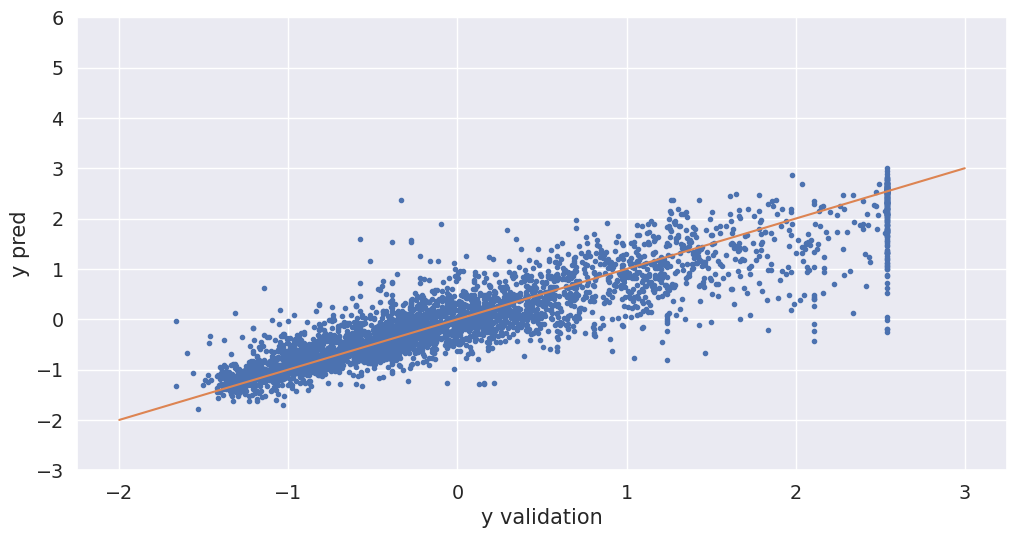

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


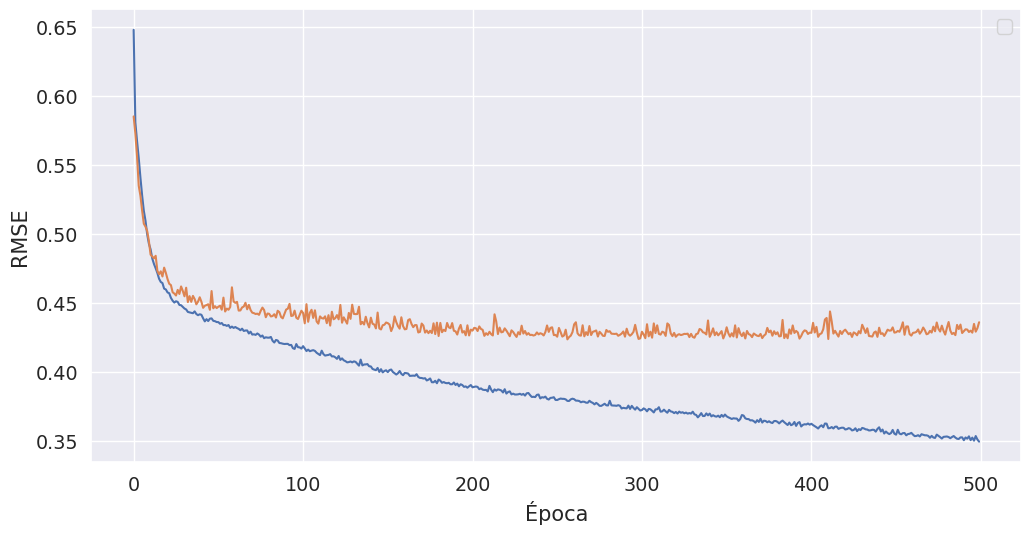

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 16s - loss: 0.7199

1568/6000 [======>.......................] - ETA: 0s - loss: 0.5291 

2720/6000 [============>.................] - ETA: 0s - loss: 0.4674

4320/6000 [====================>.........] - ETA: 0s - loss: 0.4346

5760/6000 [===========================>..] - ETA: 0s - loss: 0.4724

6000/6000 [==============================] - 0s 65us/step - loss: 0.4678 - val_loss: 0.3214


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6661

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3119

3200/6000 [===============>..............] - ETA: 0s - loss: 0.3198

4768/6000 [======================>.......] - ETA: 0s - loss: 0.3132

6000/6000 [==============================] - 0s 45us/step - loss: 0.3263 - val_loss: 0.2847


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5053

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2761

2688/6000 [============>.................] - ETA: 0s - loss: 0.2800

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2801

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2768

6000/6000 [==============================] - 0s 50us/step - loss: 0.2737 - val_loss: 0.2520


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1350

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2515

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2535

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2505

6000/6000 [==============================] - 0s 46us/step - loss: 0.2488 - val_loss: 0.2464


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3101

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2319

2880/6000 [=============>................] - ETA: 0s - loss: 0.2327

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2303

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 50us/step - loss: 0.2372 - val_loss: 0.2335


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1702

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2402

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2260

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 47us/step - loss: 0.2279 - val_loss: 0.2316


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4797

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2100

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 46us/step - loss: 0.2276 - val_loss: 0.2348


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2187

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2900

2976/6000 [=============>................] - ETA: 0s - loss: 0.2498

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2367

5984/6000 [============================>.] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 47us/step - loss: 0.2419 - val_loss: 0.2281


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2260

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2460

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 45us/step - loss: 0.2246 - val_loss: 0.2181


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6483

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2361

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2305

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 46us/step - loss: 0.2196 - val_loss: 0.2190


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1601

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1855

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2047

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2062

6000/6000 [==============================] - 0s 44us/step - loss: 0.2093 - val_loss: 0.2255


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2107

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2042

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2054

6000/6000 [==============================] - 0s 45us/step - loss: 0.2041 - val_loss: 0.2127


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2359

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1909

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2082

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 43us/step - loss: 0.2042 - val_loss: 0.2163


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2000

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1948

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1998

6000/6000 [==============================] - 0s 46us/step - loss: 0.2036 - val_loss: 0.2278


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2551

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2056

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2080

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2060

6000/6000 [==============================] - 0s 46us/step - loss: 0.1985 - val_loss: 0.2195


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2195

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2102

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2033

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 44us/step - loss: 0.1993 - val_loss: 0.2101


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1904

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1948

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 43us/step - loss: 0.1970 - val_loss: 0.2345


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2120

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2080

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 47us/step - loss: 0.2154 - val_loss: 0.2138


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2106

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2017

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2051

6000/6000 [==============================] - 0s 45us/step - loss: 0.2036 - val_loss: 0.2177


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2585

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2092

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2006

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2001

5888/6000 [============================>.] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 47us/step - loss: 0.1985 - val_loss: 0.2181


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2015

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2046

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1922

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 46us/step - loss: 0.1965 - val_loss: 0.2065


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1843

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1840

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 45us/step - loss: 0.1884 - val_loss: 0.2132


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1912

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1859

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 47us/step - loss: 0.1863 - val_loss: 0.2047


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1739

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1792

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 44us/step - loss: 0.1851 - val_loss: 0.2030


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3879

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1853

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 44us/step - loss: 0.1857 - val_loss: 0.2094


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1953

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1891

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 47us/step - loss: 0.1831 - val_loss: 0.2161


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2053

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1933

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1918

6000/6000 [==============================] - 0s 50us/step - loss: 0.1882 - val_loss: 0.2020


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1921

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1847

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 46us/step - loss: 0.1814 - val_loss: 0.2010


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1767

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1829

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 47us/step - loss: 0.1828 - val_loss: 0.1986


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1899

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1906

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 46us/step - loss: 0.1860 - val_loss: 0.1994


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2004

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1890

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 46us/step - loss: 0.1841 - val_loss: 0.2016


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1234

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2018

2912/6000 [=============>................] - ETA: 0s - loss: 0.1977

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1863

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 48us/step - loss: 0.1878 - val_loss: 0.2240


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1903

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1614

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1844

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 44us/step - loss: 0.1789 - val_loss: 0.1969


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2528

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1664

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 44us/step - loss: 0.1733 - val_loss: 0.2075


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2213

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1735

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 45us/step - loss: 0.1751 - val_loss: 0.1981


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1739

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1789

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 45us/step - loss: 0.1757 - val_loss: 0.1996


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1604

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 45us/step - loss: 0.1741 - val_loss: 0.1944


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1802

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1895

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 45us/step - loss: 0.1730 - val_loss: 0.2069


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2694

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1673

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1793

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 46us/step - loss: 0.1753 - val_loss: 0.2006


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1746

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1685

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1677

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1663

5952/6000 [============================>.] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 47us/step - loss: 0.1718 - val_loss: 0.2164


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1638

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1694

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 46us/step - loss: 0.1727 - val_loss: 0.1985


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1830

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1531

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1629

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 46us/step - loss: 0.1724 - val_loss: 0.1960


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2044

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1862

2944/6000 [=============>................] - ETA: 0s - loss: 0.1746

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 46us/step - loss: 0.1732 - val_loss: 0.2008


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2154

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1794

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1674

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 45us/step - loss: 0.1671 - val_loss: 0.1977


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1524

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1630

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 46us/step - loss: 0.1669 - val_loss: 0.1976


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1713

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1757

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1722

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 50us/step - loss: 0.1684 - val_loss: 0.1974


Epoch 47/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1697

2976/6000 [=============>................] - ETA: 0s - loss: 0.1701

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1633



5984/6000 [============================>.] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 47us/step - loss: 0.1657 - val_loss: 0.1953


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1925

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1614

2976/6000 [=============>................] - ETA: 0s - loss: 0.1640

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1610

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 51us/step - loss: 0.1653 - val_loss: 0.1930


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1635

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1645

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 46us/step - loss: 0.1652 - val_loss: 0.2055


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1641

2944/6000 [=============>................] - ETA: 0s - loss: 0.1615

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1649

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 52us/step - loss: 0.1654 - val_loss: 0.2035


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1485

2848/6000 [=============>................] - ETA: 0s - loss: 0.1528

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1589

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 48us/step - loss: 0.1629 - val_loss: 0.1976


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1727

2784/6000 [============>.................] - ETA: 0s - loss: 0.1603

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1571

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1600

6000/6000 [==============================] - 0s 50us/step - loss: 0.1632 - val_loss: 0.1947


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1771

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1703

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 46us/step - loss: 0.1639 - val_loss: 0.1930


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1748

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1626

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1643

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 51us/step - loss: 0.1672 - val_loss: 0.1911


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5950

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1770

2880/6000 [=============>................] - ETA: 0s - loss: 0.1537

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1639

5824/6000 [============================>.] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 48us/step - loss: 0.1678 - val_loss: 0.1917


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1695

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1678

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 47us/step - loss: 0.1614 - val_loss: 0.1936


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1447

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1477

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1480

5888/6000 [============================>.] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 49us/step - loss: 0.1585 - val_loss: 0.2024


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1067

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1583

2944/6000 [=============>................] - ETA: 0s - loss: 0.1540

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1558

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 54us/step - loss: 0.1606 - val_loss: 0.1945


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1029

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1387

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1565

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1620

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 51us/step - loss: 0.1614 - val_loss: 0.1916


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1568

2816/6000 [=============>................] - ETA: 0s - loss: 0.1622

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1593

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1598

6000/6000 [==============================] - 0s 49us/step - loss: 0.1592 - val_loss: 0.1951


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1387

2752/6000 [============>.................] - ETA: 0s - loss: 0.1543

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1581

5888/6000 [============================>.] - ETA: 0s - loss: 0.1578

6000/6000 [==============================] - 0s 48us/step - loss: 0.1572 - val_loss: 0.1960


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2337

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1571

2720/6000 [============>.................] - ETA: 0s - loss: 0.1588

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1557

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 50us/step - loss: 0.1588 - val_loss: 0.1919


Epoch 63/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3709

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1621

2848/6000 [=============>................] - ETA: 0s - loss: 0.1611

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1549

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 51us/step - loss: 0.1553 - val_loss: 0.1945


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1627

2912/6000 [=============>................] - ETA: 0s - loss: 0.1619

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 47us/step - loss: 0.1545 - val_loss: 0.1962


Epoch 65/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1591

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1530

2912/6000 [=============>................] - ETA: 0s - loss: 0.1547

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1548

5984/6000 [============================>.] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 49us/step - loss: 0.1519 - val_loss: 0.1969


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1505

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1536

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 47us/step - loss: 0.1542 - val_loss: 0.1956


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1585

2944/6000 [=============>................] - ETA: 0s - loss: 0.1557

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1544

6000/6000 [==============================] - 0s 45us/step - loss: 0.1554 - val_loss: 0.1914


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0932

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1373

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1527

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 44us/step - loss: 0.1546 - val_loss: 0.1903


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1403

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1562

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 45us/step - loss: 0.1547 - val_loss: 0.1872


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3169

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1344

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1423

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 44us/step - loss: 0.1508 - val_loss: 0.1943


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1873

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1556

2720/6000 [============>.................] - ETA: 0s - loss: 0.1516

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1486

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 52us/step - loss: 0.1488 - val_loss: 0.1929


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4529

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1572

2624/6000 [============>.................] - ETA: 0s - loss: 0.1546

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1526

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 48us/step - loss: 0.1525 - val_loss: 0.1941


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1478

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1522

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 43us/step - loss: 0.1534 - val_loss: 0.1892


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1551

2944/6000 [=============>................] - ETA: 0s - loss: 0.1469

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 46us/step - loss: 0.1514 - val_loss: 0.1876


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1549

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1533

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 48us/step - loss: 0.1504 - val_loss: 0.1937


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2992

1056/6000 [====>.........................] - ETA: 0s - loss: 0.1555

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1463

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1457

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 48us/step - loss: 0.1532 - val_loss: 0.1952


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2964

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1567

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1486

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1452

5984/6000 [============================>.] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 47us/step - loss: 0.1524 - val_loss: 0.2000


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1391

2912/6000 [=============>................] - ETA: 0s - loss: 0.1462

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1521

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 47us/step - loss: 0.1470 - val_loss: 0.1933


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1263

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1390

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 48us/step - loss: 0.1472 - val_loss: 0.1892


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1390

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1457

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 44us/step - loss: 0.1469 - val_loss: 0.1948


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1553

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1507

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 43us/step - loss: 0.1443 - val_loss: 0.1903


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1502

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1475

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1467

6000/6000 [==============================] - 0s 42us/step - loss: 0.1455 - val_loss: 0.1877


Epoch 83/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1459

2848/6000 [=============>................] - ETA: 0s - loss: 0.1361

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1443

5824/6000 [============================>.] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 48us/step - loss: 0.1461 - val_loss: 0.1952


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2051

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1485

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1529

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 43us/step - loss: 0.1465 - val_loss: 0.1855


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1474

2976/6000 [=============>................] - ETA: 0s - loss: 0.1411

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 44us/step - loss: 0.1441 - val_loss: 0.1866


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1385

2848/6000 [=============>................] - ETA: 0s - loss: 0.1421

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1448

5984/6000 [============================>.] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 45us/step - loss: 0.1461 - val_loss: 0.2054


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1477

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1452

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 41us/step - loss: 0.1460 - val_loss: 0.1922


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1346

2720/6000 [============>.................] - ETA: 0s - loss: 0.1367

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1352

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 46us/step - loss: 0.1439 - val_loss: 0.1870


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1366

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1409

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 42us/step - loss: 0.1429 - val_loss: 0.2050


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1426

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1478

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 44us/step - loss: 0.1407 - val_loss: 0.1887


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1317

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1383

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 44us/step - loss: 0.1415 - val_loss: 0.2044


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1495

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1409

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 43us/step - loss: 0.1414 - val_loss: 0.1884


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0492

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1142

2880/6000 [=============>................] - ETA: 0s - loss: 0.1353

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1391

5952/6000 [============================>.] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 46us/step - loss: 0.1403 - val_loss: 0.1890


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1446

2976/6000 [=============>................] - ETA: 0s - loss: 0.1456

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 45us/step - loss: 0.1416 - val_loss: 0.1994


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1318

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1406

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 45us/step - loss: 0.1399 - val_loss: 0.1871


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2206

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1307

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1355

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 44us/step - loss: 0.1387 - val_loss: 0.1877


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1303

2848/6000 [=============>................] - ETA: 0s - loss: 0.1338

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1374

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 47us/step - loss: 0.1380 - val_loss: 0.1922


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1903

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1308

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1335

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 43us/step - loss: 0.1405 - val_loss: 0.1952


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1400

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1399

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 45us/step - loss: 0.1397 - val_loss: 0.1831


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1337

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1469

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1419

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 49us/step - loss: 0.1415 - val_loss: 0.1887


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1492

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1397

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 44us/step - loss: 0.1372 - val_loss: 0.1867


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1333

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1275

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 43us/step - loss: 0.1375 - val_loss: 0.1913


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1313

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1385

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 43us/step - loss: 0.1378 - val_loss: 0.1908


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2255

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1443

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1427

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1442

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 58us/step - loss: 0.1395 - val_loss: 0.1864


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1080

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1405

2784/6000 [============>.................] - ETA: 0s - loss: 0.1455

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1434

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 46us/step - loss: 0.1379 - val_loss: 0.1944


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1383

2784/6000 [============>.................] - ETA: 0s - loss: 0.1349

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1348

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 49us/step - loss: 0.1339 - val_loss: 0.1862


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1246

2912/6000 [=============>................] - ETA: 0s - loss: 0.1302

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1314

5824/6000 [============================>.] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 46us/step - loss: 0.1351 - val_loss: 0.1891


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1264

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1397

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1423

5888/6000 [============================>.] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 49us/step - loss: 0.1361 - val_loss: 0.1971


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2849

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1357

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1262

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 43us/step - loss: 0.1332 - val_loss: 0.1929


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1422

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1382

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 43us/step - loss: 0.1351 - val_loss: 0.1934


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1167

2944/6000 [=============>................] - ETA: 0s - loss: 0.1274

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 46us/step - loss: 0.1333 - val_loss: 0.1865


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1545

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1391

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1374

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 48us/step - loss: 0.1382 - val_loss: 0.1872


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1173

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1279

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1311

5952/6000 [============================>.] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 47us/step - loss: 0.1343 - val_loss: 0.1876


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1403

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1339

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 44us/step - loss: 0.1325 - val_loss: 0.1974


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0316

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1231

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1278

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 46us/step - loss: 0.1349 - val_loss: 0.1949


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1288

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1340

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 45us/step - loss: 0.1322 - val_loss: 0.1920


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1401

2816/6000 [=============>................] - ETA: 0s - loss: 0.1366

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 45us/step - loss: 0.1354 - val_loss: 0.1859


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1281

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1110

2784/6000 [============>.................] - ETA: 0s - loss: 0.1230

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1269

5888/6000 [============================>.] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 46us/step - loss: 0.1336 - val_loss: 0.1916


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0905

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1363

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1306

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 43us/step - loss: 0.1318 - val_loss: 0.1893


Epoch 120/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1008

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1305

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1322

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 45us/step - loss: 0.1340 - val_loss: 0.1989


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1195

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1245

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 43us/step - loss: 0.1294 - val_loss: 0.1950


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1223

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1297

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 46us/step - loss: 0.1305 - val_loss: 0.2100


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1290

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1248

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 43us/step - loss: 0.1315 - val_loss: 0.1942


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1309

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 42us/step - loss: 0.1307 - val_loss: 0.1877


Epoch 125/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1174

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1240

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 44us/step - loss: 0.1285 - val_loss: 0.1891


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0820

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1301

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1289

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 42us/step - loss: 0.1317 - val_loss: 0.1870


Epoch 127/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1358

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1342

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 43us/step - loss: 0.1332 - val_loss: 0.1876


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1647

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1480

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 46us/step - loss: 0.1399 - val_loss: 0.1955


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1527

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1274

2880/6000 [=============>................] - ETA: 0s - loss: 0.1235

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 45us/step - loss: 0.1321 - val_loss: 0.1886


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2067

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1304

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1316

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 44us/step - loss: 0.1283 - val_loss: 0.1885


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1325

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1301

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 42us/step - loss: 0.1279 - val_loss: 0.1933


Epoch 132/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1257

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1343

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 43us/step - loss: 0.1299 - val_loss: 0.2175


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1366

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1321

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 43us/step - loss: 0.1291 - val_loss: 0.1947


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1111

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1163

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1250

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 43us/step - loss: 0.1280 - val_loss: 0.2011


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1273

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1259

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1252

6000/6000 [==============================] - 0s 44us/step - loss: 0.1259 - val_loss: 0.1884


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0806

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1326

2912/6000 [=============>................] - ETA: 0s - loss: 0.1269

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1263

5984/6000 [============================>.] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 46us/step - loss: 0.1254 - val_loss: 0.1911


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1195

2656/6000 [============>.................] - ETA: 0s - loss: 0.1280

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1292

5920/6000 [============================>.] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 49us/step - loss: 0.1263 - val_loss: 0.1924


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1230

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1257

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1211

6000/6000 [==============================] - 0s 43us/step - loss: 0.1253 - val_loss: 0.1891


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0772

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1290

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1291

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 45us/step - loss: 0.1214 - val_loss: 0.1903


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1156

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1285

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 43us/step - loss: 0.1263 - val_loss: 0.1873


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1255

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1247

2784/6000 [============>.................] - ETA: 0s - loss: 0.1215

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1234

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 54us/step - loss: 0.1236 - val_loss: 0.1894


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2673

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1101

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1201

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1205

6000/6000 [==============================] - 0s 44us/step - loss: 0.1236 - val_loss: 0.1880


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1192

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1177

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1215

6000/6000 [==============================] - 0s 44us/step - loss: 0.1244 - val_loss: 0.1903


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0735

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1298

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1276

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 43us/step - loss: 0.1242 - val_loss: 0.1892


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1191

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1277

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1267

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1249

6000/6000 [==============================] - 0s 46us/step - loss: 0.1243 - val_loss: 0.1919


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1184

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1217

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1219

6000/6000 [==============================] - 0s 44us/step - loss: 0.1228 - val_loss: 0.1910


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1099

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1169

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 44us/step - loss: 0.1213 - val_loss: 0.1928


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1483

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1141

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1184

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1198

6000/6000 [==============================] - 0s 44us/step - loss: 0.1221 - val_loss: 0.1976


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1077

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1114

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1138

6000/6000 [==============================] - 0s 44us/step - loss: 0.1197 - val_loss: 0.1874


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1009

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1211

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 44us/step - loss: 0.1222 - val_loss: 0.1894


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1051

2880/6000 [=============>................] - ETA: 0s - loss: 0.1108

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1134

5920/6000 [============================>.] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 47us/step - loss: 0.1206 - val_loss: 0.1893


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1105

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1196

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1196

6000/6000 [==============================] - 0s 45us/step - loss: 0.1231 - val_loss: 0.1899


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2409

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1173

2880/6000 [=============>................] - ETA: 0s - loss: 0.1210

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 46us/step - loss: 0.1216 - val_loss: 0.1918


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1132

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1247

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1215

5952/6000 [============================>.] - ETA: 0s - loss: 0.1217

6000/6000 [==============================] - 0s 46us/step - loss: 0.1219 - val_loss: 0.1932


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1149

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1172

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1184

6000/6000 [==============================] - 0s 45us/step - loss: 0.1197 - val_loss: 0.1873


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1250

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1194

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 44us/step - loss: 0.1193 - val_loss: 0.1874


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1187

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1159

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1165

6000/6000 [==============================] - 0s 45us/step - loss: 0.1180 - val_loss: 0.1898


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1160

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1194

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1195

6000/6000 [==============================] - 0s 43us/step - loss: 0.1262 - val_loss: 0.1885


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1216

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1239

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1210

6000/6000 [==============================] - 0s 43us/step - loss: 0.1212 - val_loss: 0.1922


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0503

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1153

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1198

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 45us/step - loss: 0.1197 - val_loss: 0.1873


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0683

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1238

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1238

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 42us/step - loss: 0.1207 - val_loss: 0.1921


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1125

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1152

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1185

6000/6000 [==============================] - 0s 43us/step - loss: 0.1185 - val_loss: 0.1925


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1167

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1171

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1171

6000/6000 [==============================] - 0s 42us/step - loss: 0.1182 - val_loss: 0.1867


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1005

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1102

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1116

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 42us/step - loss: 0.1169 - val_loss: 0.1899


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0925

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1126

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1161

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1175

6000/6000 [==============================] - 0s 44us/step - loss: 0.1184 - val_loss: 0.1872


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1252

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1163

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 44us/step - loss: 0.1172 - val_loss: 0.1909


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1209

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1133

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1148

6000/6000 [==============================] - 0s 47us/step - loss: 0.1148 - val_loss: 0.1936


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1183

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1202

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1192

6000/6000 [==============================] - 0s 44us/step - loss: 0.1176 - val_loss: 0.1937


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1224

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1160

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1142

6000/6000 [==============================] - 0s 43us/step - loss: 0.1156 - val_loss: 0.1905


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2686

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1183

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1102

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1145

6000/6000 [==============================] - 0s 43us/step - loss: 0.1153 - val_loss: 0.1894


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1103

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1183

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 42us/step - loss: 0.1154 - val_loss: 0.1866


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1072

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1129

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1152



6000/6000 [==============================] - 0s 42us/step - loss: 0.1149 - val_loss: 0.1870


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0827

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1056

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1026

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 45us/step - loss: 0.1132 - val_loss: 0.1882


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1018

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1089

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1122

6000/6000 [==============================] - 0s 43us/step - loss: 0.1128 - val_loss: 0.1930


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1080

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1156

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1115

6000/6000 [==============================] - 0s 42us/step - loss: 0.1132 - val_loss: 0.1897


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1224

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1117

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1130

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1137

6000/6000 [==============================] - 0s 42us/step - loss: 0.1144 - val_loss: 0.1945


Epoch 177/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0729

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1118

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1174

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1168

6000/6000 [==============================] - 0s 42us/step - loss: 0.1160 - val_loss: 0.1853


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1136

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1159

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1174

6000/6000 [==============================] - 0s 41us/step - loss: 0.1164 - val_loss: 0.1893


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1175

3424/6000 [================>.............] - ETA: 0s - loss: 0.1103

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 41us/step - loss: 0.1131 - val_loss: 0.1895


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1152

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1073

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1112

6000/6000 [==============================] - 0s 42us/step - loss: 0.1212 - val_loss: 0.1940


Epoch 181/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0597

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1111

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1067

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1112

6000/6000 [==============================] - 0s 42us/step - loss: 0.1133 - val_loss: 0.1888


Epoch 182/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0843

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1030

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1070

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1135

6000/6000 [==============================] - 0s 43us/step - loss: 0.1123 - val_loss: 0.1928


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1040

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1104

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 43us/step - loss: 0.1117 - val_loss: 0.1963


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1099

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1145

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1123

6000/6000 [==============================] - 0s 46us/step - loss: 0.1114 - val_loss: 0.1883


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1156

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1088

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1091

6000/6000 [==============================] - 0s 43us/step - loss: 0.1109 - val_loss: 0.1863


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0657

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1126

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1051

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 43us/step - loss: 0.1113 - val_loss: 0.1995


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1894

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1164

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1144

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1124

6000/6000 [==============================] - 0s 42us/step - loss: 0.1124 - val_loss: 0.1887


Epoch 188/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0745

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1058

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1028

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 43us/step - loss: 0.1115 - val_loss: 0.1895


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1080

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1154

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1127

6000/6000 [==============================] - 0s 41us/step - loss: 0.1113 - val_loss: 0.1899


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0506

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1086

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1071

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1121

6000/6000 [==============================] - 0s 42us/step - loss: 0.1121 - val_loss: 0.2054


Epoch 191/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0911

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1046

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1053

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1076

6000/6000 [==============================] - 0s 42us/step - loss: 0.1088 - val_loss: 0.1908


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1070

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1077

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1071

6000/6000 [==============================] - 0s 42us/step - loss: 0.1090 - val_loss: 0.1923


Epoch 193/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0577

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1219

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1129

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 43us/step - loss: 0.1095 - val_loss: 0.1927


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0741

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1077

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1129

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1126



6000/6000 [==============================] - 0s 42us/step - loss: 0.1107 - val_loss: 0.1932


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1134

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1095

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1078

6000/6000 [==============================] - 0s 42us/step - loss: 0.1086 - val_loss: 0.1930


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1052

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1123

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 43us/step - loss: 0.1136 - val_loss: 0.1890


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0588

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1089

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1114

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1072

6000/6000 [==============================] - 0s 42us/step - loss: 0.1071 - val_loss: 0.1944


Epoch 198/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0643

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1058

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1121

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1117



6000/6000 [==============================] - 0s 42us/step - loss: 0.1093 - val_loss: 0.2057


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0921

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1065

2752/6000 [============>.................] - ETA: 0s - loss: 0.1008

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1071

6000/6000 [==============================] - 0s 45us/step - loss: 0.1087 - val_loss: 0.1902


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0707

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1080

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1124

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1101

6000/6000 [==============================] - 0s 42us/step - loss: 0.1076 - val_loss: 0.1922


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0989

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1018

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 41us/step - loss: 0.1083 - val_loss: 0.1990


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1106

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1025

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1083

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1069

6000/6000 [==============================] - 0s 43us/step - loss: 0.1086 - val_loss: 0.1978


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1081

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1103

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 42us/step - loss: 0.1067 - val_loss: 0.1926


Epoch 204/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1440

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1062

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1044

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 43us/step - loss: 0.1073 - val_loss: 0.1891


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1022

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1079

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1042

6000/6000 [==============================] - 0s 42us/step - loss: 0.1068 - val_loss: 0.1996


Epoch 206/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0788

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1029

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1089

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 43us/step - loss: 0.1082 - val_loss: 0.1920


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1082

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1027

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1058

6000/6000 [==============================] - 0s 42us/step - loss: 0.1064 - val_loss: 0.1949


Epoch 208/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1300



1504/6000 [======>.......................] - ETA: 0s - loss: 0.1086

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1065

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1072

6000/6000 [==============================] - 0s 43us/step - loss: 0.1062 - val_loss: 0.1973


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1083

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1086

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1068

6000/6000 [==============================] - 0s 42us/step - loss: 0.1051 - val_loss: 0.1876


Epoch 210/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1000

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0992

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1041

6000/6000 [==============================] - 0s 43us/step - loss: 0.1057 - val_loss: 0.1955


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0216

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0998

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1003

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 41us/step - loss: 0.1061 - val_loss: 0.1946


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0649

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1063

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1070

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 45us/step - loss: 0.1086 - val_loss: 0.1941


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1022

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1043

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1058

6000/6000 [==============================] - 0s 42us/step - loss: 0.1044 - val_loss: 0.1985


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1027

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1064

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1038

6000/6000 [==============================] - 0s 45us/step - loss: 0.1048 - val_loss: 0.1930


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1026

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1017

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1046

6000/6000 [==============================] - 0s 41us/step - loss: 0.1046 - val_loss: 0.2060


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1182

2880/6000 [=============>................] - ETA: 0s - loss: 0.1057

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1064

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1075

6000/6000 [==============================] - 0s 48us/step - loss: 0.1058 - val_loss: 0.1913


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1098

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1049

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1025

6000/6000 [==============================] - 0s 42us/step - loss: 0.1041 - val_loss: 0.1987


Epoch 218/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1026

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1071

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 43us/step - loss: 0.1069 - val_loss: 0.1946


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0984

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1023

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1024

6000/6000 [==============================] - 0s 43us/step - loss: 0.1052 - val_loss: 0.2002


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1067

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1119

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1084



6000/6000 [==============================] - 0s 42us/step - loss: 0.1054 - val_loss: 0.1972


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0998

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0976

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1011

6000/6000 [==============================] - 0s 42us/step - loss: 0.1041 - val_loss: 0.1925


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1085

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1069

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1049

6000/6000 [==============================] - 0s 42us/step - loss: 0.1031 - val_loss: 0.1965


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0957

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1024

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 41us/step - loss: 0.1026 - val_loss: 0.2000


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1039

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1044

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1035

6000/6000 [==============================] - 0s 42us/step - loss: 0.1041 - val_loss: 0.1965


Epoch 225/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1729

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0966

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0980

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1025

6000/6000 [==============================] - 0s 41us/step - loss: 0.1014 - val_loss: 0.1943


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1023

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1008

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 41us/step - loss: 0.1026 - val_loss: 0.1987


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0945

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0992

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1026

6000/6000 [==============================] - 0s 42us/step - loss: 0.1051 - val_loss: 0.2127


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0938

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0953

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0975

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1011

6000/6000 [==============================] - 0s 43us/step - loss: 0.1027 - val_loss: 0.2005


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0983

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0998

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1054

6000/6000 [==============================] - 0s 42us/step - loss: 0.1047 - val_loss: 0.1938


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0505

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0967

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0992

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1043

6000/6000 [==============================] - 0s 44us/step - loss: 0.1033 - val_loss: 0.1908


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1025

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1032

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0996

6000/6000 [==============================] - 0s 44us/step - loss: 0.1023 - val_loss: 0.2014


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0988

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0959

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0997

6000/6000 [==============================] - 0s 43us/step - loss: 0.1015 - val_loss: 0.1956


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1127

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1055

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 43us/step - loss: 0.1028 - val_loss: 0.1935


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0959

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0996

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0995

6000/6000 [==============================] - 0s 43us/step - loss: 0.1000 - val_loss: 0.1936


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0365

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1067

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1049

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 43us/step - loss: 0.1018 - val_loss: 0.2046


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0936

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0970

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 44us/step - loss: 0.1011 - val_loss: 0.1952


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1744

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1056

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1044

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 44us/step - loss: 0.1026 - val_loss: 0.1994


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0799

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0858

2912/6000 [=============>................] - ETA: 0s - loss: 0.0907

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 44us/step - loss: 0.0998 - val_loss: 0.1950


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1003

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0979

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1014

6000/6000 [==============================] - 0s 41us/step - loss: 0.1011 - val_loss: 0.1921


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0980

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1020

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 42us/step - loss: 0.1009 - val_loss: 0.2003


Epoch 241/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0917

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0979

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1004

6000/6000 [==============================] - 0s 41us/step - loss: 0.1015 - val_loss: 0.2019


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0996

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0993

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0996

6000/6000 [==============================] - 0s 44us/step - loss: 0.1015 - val_loss: 0.1986


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0644

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0937

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0959

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 44us/step - loss: 0.0994 - val_loss: 0.1958


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0921

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0937

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0981

6000/6000 [==============================] - 0s 46us/step - loss: 0.0991 - val_loss: 0.1964


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1041

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0992

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 43us/step - loss: 0.0991 - val_loss: 0.1930


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0516

1152/6000 [====>.........................] - ETA: 0s - loss: 0.1060

2688/6000 [============>.................] - ETA: 0s - loss: 0.1000

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0979

5824/6000 [============================>.] - ETA: 0s - loss: 0.1007

6000/6000 [==============================] - 0s 47us/step - loss: 0.1001 - val_loss: 0.1938


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1001

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1007

6000/6000 [==============================] - 0s 44us/step - loss: 0.1003 - val_loss: 0.1991


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1100

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1025

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0995

6000/6000 [==============================] - 0s 44us/step - loss: 0.0990 - val_loss: 0.1983


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0582

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1028

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1042

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1001

6000/6000 [==============================] - 0s 42us/step - loss: 0.0997 - val_loss: 0.1974


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1091

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0984

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 43us/step - loss: 0.0983 - val_loss: 0.1987


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0960

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0975

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 45us/step - loss: 0.0999 - val_loss: 0.1975


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0964

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0996

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 44us/step - loss: 0.0994 - val_loss: 0.1951


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0881

2944/6000 [=============>................] - ETA: 0s - loss: 0.0934

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 45us/step - loss: 0.0976 - val_loss: 0.1953


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2148

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0996

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1020

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1007

6000/6000 [==============================] - 0s 44us/step - loss: 0.0996 - val_loss: 0.1958


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1023

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0969

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0976

6000/6000 [==============================] - 0s 46us/step - loss: 0.0975 - val_loss: 0.2104


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0507

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0958

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0970

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 42us/step - loss: 0.0976 - val_loss: 0.1975


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0790

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0941

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0975

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0972

6000/6000 [==============================] - 0s 41us/step - loss: 0.0991 - val_loss: 0.1974


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0952

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0977

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 42us/step - loss: 0.0971 - val_loss: 0.1964


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0768

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1045

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0986

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0988

6000/6000 [==============================] - 0s 42us/step - loss: 0.0978 - val_loss: 0.2075


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0510

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0937

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0962

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 43us/step - loss: 0.0972 - val_loss: 0.1974


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0917

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0966

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 43us/step - loss: 0.0976 - val_loss: 0.1949


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0341

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1182

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1113

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1070

6000/6000 [==============================] - 0s 44us/step - loss: 0.1043 - val_loss: 0.2022


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0870

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0923

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 42us/step - loss: 0.1015 - val_loss: 0.1997


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0966

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0945

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 42us/step - loss: 0.0964 - val_loss: 0.1950


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0546

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0951

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0966

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 42us/step - loss: 0.0958 - val_loss: 0.1957


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0900

2880/6000 [=============>................] - ETA: 0s - loss: 0.0921

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 45us/step - loss: 0.0934 - val_loss: 0.1942


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0833

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0909

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 44us/step - loss: 0.0945 - val_loss: 0.2000


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0934

2816/6000 [=============>................] - ETA: 0s - loss: 0.0955

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0937

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 49us/step - loss: 0.1013 - val_loss: 0.2021


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0947

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0954

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0949

6000/6000 [==============================] - 0s 44us/step - loss: 0.0950 - val_loss: 0.2010


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0898

2688/6000 [============>.................] - ETA: 0s - loss: 0.0960

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0987

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0965

6000/6000 [==============================] - 0s 52us/step - loss: 0.0976 - val_loss: 0.2002


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0910

2848/6000 [=============>................] - ETA: 0s - loss: 0.0919

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0914

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 52us/step - loss: 0.0950 - val_loss: 0.2026


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0945

2624/6000 [============>.................] - ETA: 0s - loss: 0.0903

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0917

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0904

6000/6000 [==============================] - 0s 53us/step - loss: 0.0946 - val_loss: 0.1982


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0821

2912/6000 [=============>................] - ETA: 0s - loss: 0.0940

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0916

5696/6000 [===========================>..] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 54us/step - loss: 0.0946 - val_loss: 0.2051


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

1056/6000 [====>.........................] - ETA: 0s - loss: 0.1002

2688/6000 [============>.................] - ETA: 0s - loss: 0.0946

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0943

5632/6000 [===========================>..] - ETA: 0s - loss: 0.0948

6000/6000 [==============================] - 0s 48us/step - loss: 0.0951 - val_loss: 0.2013


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0866

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1005

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0975

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0955

6000/6000 [==============================] - 0s 52us/step - loss: 0.0980 - val_loss: 0.1962


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0993

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1040

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0996

6000/6000 [==============================] - 0s 43us/step - loss: 0.0977 - val_loss: 0.1983


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0932

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0913

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 43us/step - loss: 0.0953 - val_loss: 0.1999


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0612

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0958

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0943

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 43us/step - loss: 0.0963 - val_loss: 0.1962


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0654

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1036

2880/6000 [=============>................] - ETA: 0s - loss: 0.0957

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0944

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 49us/step - loss: 0.0955 - val_loss: 0.1936


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3292

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0995

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0992

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0956

6000/6000 [==============================] - 0s 43us/step - loss: 0.0945 - val_loss: 0.2008


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0658

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0937

2944/6000 [=============>................] - ETA: 0s - loss: 0.0951

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 44us/step - loss: 0.0948 - val_loss: 0.1965


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0587

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0876

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0927

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 42us/step - loss: 0.0956 - val_loss: 0.1951


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1030

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0966

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0970

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 44us/step - loss: 0.0951 - val_loss: 0.2018


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1075

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1024

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0974

6000/6000 [==============================] - 0s 43us/step - loss: 0.0963 - val_loss: 0.1976


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0962

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0929

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0941

6000/6000 [==============================] - 0s 43us/step - loss: 0.0942 - val_loss: 0.1981


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0902

2944/6000 [=============>................] - ETA: 0s - loss: 0.0951

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0959

6000/6000 [==============================] - 0s 45us/step - loss: 0.0924 - val_loss: 0.1959


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0628

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0902

2880/6000 [=============>................] - ETA: 0s - loss: 0.0897

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 45us/step - loss: 0.0922 - val_loss: 0.2034


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0941

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0937

6000/6000 [==============================] - 0s 41us/step - loss: 0.0935 - val_loss: 0.2047


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0926

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0924

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 43us/step - loss: 0.0945 - val_loss: 0.2021


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0880

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0915

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 46us/step - loss: 0.0921 - val_loss: 0.1937


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0514

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0869

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0885

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0922

6000/6000 [==============================] - 0s 43us/step - loss: 0.0945 - val_loss: 0.1947


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0853

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0874

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0936

6000/6000 [==============================] - 0s 45us/step - loss: 0.0948 - val_loss: 0.2034


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0995

2976/6000 [=============>................] - ETA: 0s - loss: 0.0958

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0954

5888/6000 [============================>.] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 47us/step - loss: 0.0924 - val_loss: 0.2010


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0431

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0887

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0832

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0886

6000/6000 [==============================] - 0s 46us/step - loss: 0.0889 - val_loss: 0.2024


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3209

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0891

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0948

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 44us/step - loss: 0.0958 - val_loss: 0.1974


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1376/6000 [=====>........................] - ETA: 0s - loss: 0.0930

2816/6000 [=============>................] - ETA: 0s - loss: 0.0896

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0933

5824/6000 [============================>.] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 46us/step - loss: 0.0938 - val_loss: 0.1962


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0996

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0945

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0930

6000/6000 [==============================] - 0s 42us/step - loss: 0.0909 - val_loss: 0.2066


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0964

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0972

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0952

5920/6000 [============================>.] - ETA: 0s - loss: 0.0921

6000/6000 [==============================] - 0s 46us/step - loss: 0.0917 - val_loss: 0.2018


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1376/6000 [=====>........................] - ETA: 0s - loss: 0.0845

2880/6000 [=============>................] - ETA: 0s - loss: 0.0923

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0929

6000/6000 [==============================] - 0s 44us/step - loss: 0.0920 - val_loss: 0.1964


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0887

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 43us/step - loss: 0.0916 - val_loss: 0.1996


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2828

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0995

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0950

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 46us/step - loss: 0.0952 - val_loss: 0.2059


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0477

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0899

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0922

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0923

6000/6000 [==============================] - 0s 45us/step - loss: 0.0932 - val_loss: 0.1991


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0863

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0873

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 44us/step - loss: 0.0896 - val_loss: 0.2143


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

1248/6000 [=====>........................] - ETA: 0s - loss: 0.0809

2816/6000 [=============>................] - ETA: 0s - loss: 0.0820

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 46us/step - loss: 0.0897 - val_loss: 0.2124


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0910

2976/6000 [=============>................] - ETA: 0s - loss: 0.0891

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 45us/step - loss: 0.0918 - val_loss: 0.2049


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0853

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0850

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0887

5952/6000 [============================>.] - ETA: 0s - loss: 0.0903

6000/6000 [==============================] - 0s 49us/step - loss: 0.0902 - val_loss: 0.2007


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0907

2848/6000 [=============>................] - ETA: 0s - loss: 0.0947

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0915

5920/6000 [============================>.] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 46us/step - loss: 0.0899 - val_loss: 0.2011


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0670

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0883

3424/6000 [================>.............] - ETA: 0s - loss: 0.0869

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 41us/step - loss: 0.0886 - val_loss: 0.2018


Epoch 309/500


  32/6000 [..............................] - ETA: 1s - loss: 0.0552

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0955

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0908

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 43us/step - loss: 0.0896 - val_loss: 0.2025


Epoch 310/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0896

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0895

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 44us/step - loss: 0.0898 - val_loss: 0.2052


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0778

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0949

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0892

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 42us/step - loss: 0.0894 - val_loss: 0.2087


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0545

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0910

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0923

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 42us/step - loss: 0.0914 - val_loss: 0.2031


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0476

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0817

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0889

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0905

5856/6000 [============================>.] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 47us/step - loss: 0.0890 - val_loss: 0.2045


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0297

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0780

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0883

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 43us/step - loss: 0.0885 - val_loss: 0.1993


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0895

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0846

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 43us/step - loss: 0.0881 - val_loss: 0.2093


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0493

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0873

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0871

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0894

6000/6000 [==============================] - 0s 44us/step - loss: 0.0905 - val_loss: 0.2017


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0917

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0875

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 42us/step - loss: 0.0881 - val_loss: 0.2111


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0961

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0941

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 44us/step - loss: 0.0887 - val_loss: 0.2126


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2508

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0852

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0848

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 43us/step - loss: 0.0882 - val_loss: 0.2005


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0481

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0895

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0899

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 44us/step - loss: 0.0911 - val_loss: 0.2043


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0841

2816/6000 [=============>................] - ETA: 0s - loss: 0.0826

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0823

5856/6000 [============================>.] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 46us/step - loss: 0.0879 - val_loss: 0.2080


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0890

2592/6000 [===========>..................] - ETA: 0s - loss: 0.0875

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0865

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 46us/step - loss: 0.0895 - val_loss: 0.2046


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0889

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 46us/step - loss: 0.0903 - val_loss: 0.2186


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0883

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0928

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 42us/step - loss: 0.0961 - val_loss: 0.2129


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0351

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0911

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 44us/step - loss: 0.0925 - val_loss: 0.2027


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1066

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0937

2304/6000 [==========>...................] - ETA: 0s - loss: 0.0913

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0889

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 49us/step - loss: 0.0904 - val_loss: 0.2070


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0600

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0823

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0895

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0898

6000/6000 [==============================] - 0s 44us/step - loss: 0.0896 - val_loss: 0.2012


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0784

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0890

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0882

5888/6000 [============================>.] - ETA: 0s - loss: 0.0875

6000/6000 [==============================] - 0s 47us/step - loss: 0.0873 - val_loss: 0.2018


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0869

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0829

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 42us/step - loss: 0.0861 - val_loss: 0.2121


Epoch 330/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0905

2912/6000 [=============>................] - ETA: 0s - loss: 0.0866

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0875

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0857

6000/6000 [==============================] - 0s 49us/step - loss: 0.0868 - val_loss: 0.2066


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0380

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0863

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0809

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 43us/step - loss: 0.0866 - val_loss: 0.2038


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0385

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0851

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0822

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 43us/step - loss: 0.0877 - val_loss: 0.2033


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0437

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0884

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0907

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 44us/step - loss: 0.0871 - val_loss: 0.2166


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0870

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0848

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 44us/step - loss: 0.0866 - val_loss: 0.2030


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0593

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0854

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0863

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 44us/step - loss: 0.0845 - val_loss: 0.2206


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0884

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0849

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 44us/step - loss: 0.0876 - val_loss: 0.1995


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0337

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0768

2912/6000 [=============>................] - ETA: 0s - loss: 0.0808

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0828

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 48us/step - loss: 0.0870 - val_loss: 0.2036


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0900

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0833

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 43us/step - loss: 0.0887 - val_loss: 0.2005


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

1312/6000 [=====>........................] - ETA: 0s - loss: 0.0814

2976/6000 [=============>................] - ETA: 0s - loss: 0.0851

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0869

6000/6000 [==============================] - 0s 44us/step - loss: 0.0870 - val_loss: 0.2059


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0843

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0808

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 44us/step - loss: 0.0846 - val_loss: 0.2180


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0390

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0816

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 43us/step - loss: 0.0867 - val_loss: 0.2079


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

1344/6000 [=====>........................] - ETA: 0s - loss: 0.0855

2304/6000 [==========>...................] - ETA: 0s - loss: 0.0866

3776/6000 [=================>............] - ETA: 0s - loss: 0.0867

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0886

6000/6000 [==============================] - 0s 50us/step - loss: 0.0878 - val_loss: 0.2012


Epoch 343/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0320

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0825

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0836

5664/6000 [===========================>..] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 48us/step - loss: 0.0833 - val_loss: 0.2081


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0700

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0809

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0800

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 45us/step - loss: 0.0834 - val_loss: 0.2078


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0885

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0874

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 44us/step - loss: 0.0857 - val_loss: 0.2015


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0810

2944/6000 [=============>................] - ETA: 0s - loss: 0.0827

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0826

6000/6000 [==============================] - 0s 44us/step - loss: 0.0842 - val_loss: 0.2075


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0888

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0919

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0886

6000/6000 [==============================] - 0s 43us/step - loss: 0.0858 - val_loss: 0.2043


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0858

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0889

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0879

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 47us/step - loss: 0.0847 - val_loss: 0.2100


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0843

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 42us/step - loss: 0.0874 - val_loss: 0.2096


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0935

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0860

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 43us/step - loss: 0.0857 - val_loss: 0.2048


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0405

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0836

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0848

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 42us/step - loss: 0.0846 - val_loss: 0.2136


Epoch 352/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0587

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0789

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0825

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 42us/step - loss: 0.0873 - val_loss: 0.2096


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0681

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0829

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0857

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 43us/step - loss: 0.0852 - val_loss: 0.2126


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0831

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0821

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 43us/step - loss: 0.0840 - val_loss: 0.2147


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0869

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0859

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 43us/step - loss: 0.0844 - val_loss: 0.2113


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0366

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0866

3456/6000 [================>.............] - ETA: 0s - loss: 0.0834

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 41us/step - loss: 0.0866 - val_loss: 0.2138


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1344/6000 [=====>........................] - ETA: 0s - loss: 0.0977

2976/6000 [=============>................] - ETA: 0s - loss: 0.0967

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 43us/step - loss: 0.0888 - val_loss: 0.2055


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0340

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0835

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0829

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0850

6000/6000 [==============================] - 0s 42us/step - loss: 0.0850 - val_loss: 0.2079


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0944

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0866

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 43us/step - loss: 0.0867 - val_loss: 0.2051


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0792

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1125

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1055



6000/6000 [==============================] - 0s 42us/step - loss: 0.1052 - val_loss: 0.2083


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0511

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1024

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0964

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0893

6000/6000 [==============================] - 0s 42us/step - loss: 0.0899 - val_loss: 0.2095


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0861

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0840

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0826

6000/6000 [==============================] - 0s 42us/step - loss: 0.0841 - val_loss: 0.2116


Epoch 363/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0263

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0967

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0861

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 42us/step - loss: 0.0835 - val_loss: 0.2117


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0871

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0865

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0854



6000/6000 [==============================] - 0s 42us/step - loss: 0.0854 - val_loss: 0.2100


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0644

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0892

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0913

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0879

6000/6000 [==============================] - 0s 44us/step - loss: 0.0855 - val_loss: 0.2050


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0849

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0874

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0838

6000/6000 [==============================] - 0s 47us/step - loss: 0.0852 - val_loss: 0.2101


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0856

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0846

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 44us/step - loss: 0.0851 - val_loss: 0.2066


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0289

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0784

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0816

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 47us/step - loss: 0.0841 - val_loss: 0.2105


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0932

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0848

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 42us/step - loss: 0.0849 - val_loss: 0.2074


Epoch 370/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0782

3424/6000 [================>.............] - ETA: 0s - loss: 0.0801

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 42us/step - loss: 0.0840 - val_loss: 0.2069


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0797

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0890

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0889

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 42us/step - loss: 0.0870 - val_loss: 0.2016


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0662

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0798

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0798

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 51us/step - loss: 0.0829 - val_loss: 0.2077


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1248/6000 [=====>........................] - ETA: 0s - loss: 0.0754

2912/6000 [=============>................] - ETA: 0s - loss: 0.0792

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 45us/step - loss: 0.0840 - val_loss: 0.2094


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0584

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0878

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0896

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 42us/step - loss: 0.0849 - val_loss: 0.2056


Epoch 375/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1312/6000 [=====>........................] - ETA: 0s - loss: 0.0792

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0829

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0832

6000/6000 [==============================] - 0s 45us/step - loss: 0.0844 - val_loss: 0.2207


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0860

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0855

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 42us/step - loss: 0.0824 - val_loss: 0.2201


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0787

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0803

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 43us/step - loss: 0.0816 - val_loss: 0.2200


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0627

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0806

2752/6000 [============>.................] - ETA: 0s - loss: 0.0795

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0791

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 49us/step - loss: 0.0840 - val_loss: 0.2103


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0592

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0786

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 43us/step - loss: 0.0817 - val_loss: 0.2209


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0939

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0740

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0781

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 43us/step - loss: 0.0820 - val_loss: 0.2071


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0836

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0801

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 43us/step - loss: 0.0796 - val_loss: 0.2227


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0724

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0782

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 46us/step - loss: 0.0820 - val_loss: 0.2067


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0766

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0764

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 43us/step - loss: 0.0801 - val_loss: 0.2190


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0839

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0810

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 43us/step - loss: 0.0822 - val_loss: 0.2251


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0708

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0811

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0801

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0812

6000/6000 [==============================] - 0s 45us/step - loss: 0.0817 - val_loss: 0.2155


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0864

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 43us/step - loss: 0.0812 - val_loss: 0.2174


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0977

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0848

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0792

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 43us/step - loss: 0.0808 - val_loss: 0.2144


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0425

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0804

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0758

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 44us/step - loss: 0.0796 - val_loss: 0.2139


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0793

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0832

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 43us/step - loss: 0.0815 - val_loss: 0.2107


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0791

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0802

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 45us/step - loss: 0.0823 - val_loss: 0.2128


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0791

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0813

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 42us/step - loss: 0.0820 - val_loss: 0.2055


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0793

2720/6000 [============>.................] - ETA: 0s - loss: 0.0790

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0812

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 48us/step - loss: 0.0814 - val_loss: 0.2101


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0634

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0777

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0777

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 46us/step - loss: 0.0803 - val_loss: 0.2204


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0769

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0781

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 44us/step - loss: 0.0817 - val_loss: 0.2152


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0725

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0757

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0768

5856/6000 [============================>.] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 46us/step - loss: 0.0804 - val_loss: 0.2107


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0766

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0774

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 44us/step - loss: 0.0821 - val_loss: 0.2185


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0514

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0783

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0804

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0811



6000/6000 [==============================] - 0s 42us/step - loss: 0.0813 - val_loss: 0.2095


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0789

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 43us/step - loss: 0.0797 - val_loss: 0.2083


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0716

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0775

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 44us/step - loss: 0.0794 - val_loss: 0.2111


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0829

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0816

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 42us/step - loss: 0.0807 - val_loss: 0.2091


Epoch 401/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0359

1408/6000 [======>.......................] - ETA: 0s - loss: 0.0747

2880/6000 [=============>................] - ETA: 0s - loss: 0.0791

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0805

5984/6000 [============================>.] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 45us/step - loss: 0.0784 - val_loss: 0.2160


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0491

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0776

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0765

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 42us/step - loss: 0.0796 - val_loss: 0.2125


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0527

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0718

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0736

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 42us/step - loss: 0.0804 - val_loss: 0.2179


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0418

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0825

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0844

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 43us/step - loss: 0.0810 - val_loss: 0.2112


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

1280/6000 [=====>........................] - ETA: 0s - loss: 0.0690

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0728

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 44us/step - loss: 0.0801 - val_loss: 0.2125


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0868

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0826

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 42us/step - loss: 0.0805 - val_loss: 0.2205


Epoch 407/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0689

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0867

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0872

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 43us/step - loss: 0.0813 - val_loss: 0.2181


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0799

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0817

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 41us/step - loss: 0.0795 - val_loss: 0.2132


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0563

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0748

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0812

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 42us/step - loss: 0.0797 - val_loss: 0.2142


Epoch 410/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0649

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0774

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 42us/step - loss: 0.0795 - val_loss: 0.2146


Epoch 411/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0345

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0743

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 44us/step - loss: 0.0781 - val_loss: 0.2217


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0826

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0790

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 43us/step - loss: 0.0793 - val_loss: 0.2153


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0369

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0744

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0760

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 44us/step - loss: 0.0787 - val_loss: 0.2245


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0796

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0837

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0813



6000/6000 [==============================] - 0s 42us/step - loss: 0.0794 - val_loss: 0.2227


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0683

1408/6000 [======>.......................] - ETA: 0s - loss: 0.0816

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0774

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 45us/step - loss: 0.0786 - val_loss: 0.2157


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0644

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0792

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 44us/step - loss: 0.0778 - val_loss: 0.2149


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0781

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0764

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 44us/step - loss: 0.0786 - val_loss: 0.2104


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0776

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0783

5952/6000 [============================>.] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 46us/step - loss: 0.0779 - val_loss: 0.2141


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0323

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0761

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 43us/step - loss: 0.0782 - val_loss: 0.2123


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0651

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0707

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0765

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 45us/step - loss: 0.0795 - val_loss: 0.2188


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0401

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0765

2976/6000 [=============>................] - ETA: 0s - loss: 0.0778

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 44us/step - loss: 0.0801 - val_loss: 0.2169


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0706

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0732

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 41us/step - loss: 0.0764 - val_loss: 0.2310


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0845

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0829

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0796

6000/6000 [==============================] - 0s 44us/step - loss: 0.0782 - val_loss: 0.2147


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0756

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0762

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 44us/step - loss: 0.0782 - val_loss: 0.2103


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0917

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0715

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0746

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0737

6000/6000 [==============================] - 0s 44us/step - loss: 0.0756 - val_loss: 0.2186


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1408/6000 [======>.......................] - ETA: 0s - loss: 0.0801

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0800

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 43us/step - loss: 0.0771 - val_loss: 0.2189


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0505

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0674

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0705

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 42us/step - loss: 0.0760 - val_loss: 0.2205


Epoch 428/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0817

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0770

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 44us/step - loss: 0.0763 - val_loss: 0.2203


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0389

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0828

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0794

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 45us/step - loss: 0.0767 - val_loss: 0.2205


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0687

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0754

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 42us/step - loss: 0.0758 - val_loss: 0.2186


Epoch 431/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0389

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0756

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 43us/step - loss: 0.0786 - val_loss: 0.2297


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0461

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0658

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0718

4768/6000 [======================>.......] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 43us/step - loss: 0.0755 - val_loss: 0.2169


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0850

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0795

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0772

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 42us/step - loss: 0.0782 - val_loss: 0.2134


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0819

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0784

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 42us/step - loss: 0.0822 - val_loss: 0.2071


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0499

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0754

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0762

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 42us/step - loss: 0.0771 - val_loss: 0.2170


Epoch 436/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1280/6000 [=====>........................] - ETA: 0s - loss: 0.0704

2528/6000 [===========>..................] - ETA: 0s - loss: 0.0716

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0757



5504/6000 [==========================>...] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 48us/step - loss: 0.0768 - val_loss: 0.2135


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0452

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0736

2944/6000 [=============>................] - ETA: 0s - loss: 0.0711

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 44us/step - loss: 0.0758 - val_loss: 0.2168


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0707

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0733

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 45us/step - loss: 0.0764 - val_loss: 0.2139


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0735

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0744

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 44us/step - loss: 0.0759 - val_loss: 0.2192


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0482

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0737

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0760

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 41us/step - loss: 0.0758 - val_loss: 0.2196


Epoch 441/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0757

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0792

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 42us/step - loss: 0.0763 - val_loss: 0.2138


Epoch 442/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0541

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0713

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0757

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 47us/step - loss: 0.0756 - val_loss: 0.2217


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1270

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0689

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0792

4608/6000 [======================>.......] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 43us/step - loss: 0.0771 - val_loss: 0.2163


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0587

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0756

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0706

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0731

6000/6000 [==============================] - 0s 44us/step - loss: 0.0743 - val_loss: 0.2192


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0779

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0739

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 47us/step - loss: 0.0749 - val_loss: 0.2176


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0745

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0722

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 43us/step - loss: 0.0770 - val_loss: 0.2159


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0698

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0740

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 41us/step - loss: 0.0752 - val_loss: 0.2144


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0774

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0710

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 42us/step - loss: 0.0764 - val_loss: 0.2268


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0522

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0757

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0739

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0749

6000/6000 [==============================] - 0s 43us/step - loss: 0.0756 - val_loss: 0.2141


Epoch 450/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0652

3424/6000 [================>.............] - ETA: 0s - loss: 0.0690

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 43us/step - loss: 0.0740 - val_loss: 0.2276


Epoch 451/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1414

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0756

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 42us/step - loss: 0.0756 - val_loss: 0.2213


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0789



1664/6000 [=======>......................] - ETA: 0s - loss: 0.0779

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0807

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 43us/step - loss: 0.0799 - val_loss: 0.2233


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

1312/6000 [=====>........................] - ETA: 0s - loss: 0.0693

2976/6000 [=============>................] - ETA: 0s - loss: 0.0711

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 45us/step - loss: 0.0734 - val_loss: 0.2144


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0693

2880/6000 [=============>................] - ETA: 0s - loss: 0.0735

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0735

6000/6000 [==============================] - 0s 46us/step - loss: 0.0749 - val_loss: 0.2149


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0691

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0765

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 41us/step - loss: 0.0759 - val_loss: 0.2261


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0734

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0769

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 46us/step - loss: 0.0748 - val_loss: 0.2153


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0374

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0687

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0750

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 42us/step - loss: 0.0735 - val_loss: 0.2158


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0809

1408/6000 [======>.......................] - ETA: 0s - loss: 0.0763

3008/6000 [==============>...............] - ETA: 0s - loss: 0.0710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0724

5952/6000 [============================>.] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 48us/step - loss: 0.0738 - val_loss: 0.2206


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0666

1504/6000 [======>.......................] - ETA: 0s - loss: 0.0719

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0765

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 43us/step - loss: 0.0746 - val_loss: 0.2229


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0352

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0652

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0718

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 44us/step - loss: 0.0732 - val_loss: 0.2241


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0364

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0769

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0749

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0735

6000/6000 [==============================] - 0s 43us/step - loss: 0.0750 - val_loss: 0.2172


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0604

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0794

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0744

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0743



6000/6000 [==============================] - 0s 42us/step - loss: 0.0755 - val_loss: 0.2169


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0437

1536/6000 [======>.......................] - ETA: 0s - loss: 0.0754

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0763

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 42us/step - loss: 0.0732 - val_loss: 0.2188


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0746

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0722

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 43us/step - loss: 0.0735 - val_loss: 0.2215


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0509

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0748

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0762

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 41us/step - loss: 0.0738 - val_loss: 0.2211


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0694

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0706

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 43us/step - loss: 0.0738 - val_loss: 0.2249


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0776

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0731

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 40us/step - loss: 0.0754 - val_loss: 0.2236


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0698

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0765

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0737

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 42us/step - loss: 0.0761 - val_loss: 0.2210


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0721

3424/6000 [================>.............] - ETA: 0s - loss: 0.0728

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 41us/step - loss: 0.0757 - val_loss: 0.2178


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0332

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0698

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0698

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0722

6000/6000 [==============================] - 0s 42us/step - loss: 0.0730 - val_loss: 0.2223


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0350

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0734

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0736

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 42us/step - loss: 0.0735 - val_loss: 0.2205


Epoch 472/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0567

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0708

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 44us/step - loss: 0.0724 - val_loss: 0.2141


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0715

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0745

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 42us/step - loss: 0.0729 - val_loss: 0.2164


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0396

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0693

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0721

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 45us/step - loss: 0.0728 - val_loss: 0.2190


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0650

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0677

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 41us/step - loss: 0.0734 - val_loss: 0.2275


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0845

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0779

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 41us/step - loss: 0.0766 - val_loss: 0.2177


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0749

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0752

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 42us/step - loss: 0.0757 - val_loss: 0.2204


Epoch 478/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0918

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0728

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0728

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 42us/step - loss: 0.0726 - val_loss: 0.2190


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0678

3488/6000 [================>.............] - ETA: 0s - loss: 0.0729

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 40us/step - loss: 0.0720 - val_loss: 0.2251


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0665

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0681

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0712

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 41us/step - loss: 0.0730 - val_loss: 0.2183


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0515

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0671

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0709

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 42us/step - loss: 0.0714 - val_loss: 0.2205


Epoch 482/500


  32/6000 [..............................] - ETA: 2s - loss: 0.0843

1440/6000 [======>.......................] - ETA: 0s - loss: 0.0704

2400/6000 [===========>..................] - ETA: 0s - loss: 0.0717

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0741

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 53us/step - loss: 0.0737 - val_loss: 0.2197


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0754

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0714

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 43us/step - loss: 0.0749 - val_loss: 0.2238


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1184/6000 [====>.........................] - ETA: 0s - loss: 0.0742

2560/6000 [===========>..................] - ETA: 0s - loss: 0.0761

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0758

5600/6000 [===========================>..] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 47us/step - loss: 0.0745 - val_loss: 0.2206


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0643

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0686

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0700

6000/6000 [==============================] - 0s 46us/step - loss: 0.0730 - val_loss: 0.2238


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0930

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0676

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0732

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 43us/step - loss: 0.0714 - val_loss: 0.2272


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0734

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0687

4896/6000 [=======================>......] - ETA: 0s - loss: 0.0707



6000/6000 [==============================] - 0s 42us/step - loss: 0.0721 - val_loss: 0.2203


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0383

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0648

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0680

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 42us/step - loss: 0.0715 - val_loss: 0.2237


Epoch 489/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0757

3232/6000 [===============>..............] - ETA: 0s - loss: 0.0730

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 42us/step - loss: 0.0728 - val_loss: 0.2261


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0767

3104/6000 [==============>...............] - ETA: 0s - loss: 0.0739

4800/6000 [=======================>......] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 43us/step - loss: 0.0732 - val_loss: 0.2200


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0667

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0711

4672/6000 [======================>.......] - ETA: 0s - loss: 0.0707

6000/6000 [==============================] - 0s 44us/step - loss: 0.0702 - val_loss: 0.2156


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0270

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0734

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0775

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 42us/step - loss: 0.0767 - val_loss: 0.2183


Epoch 493/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0442

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0677

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0706

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 45us/step - loss: 0.0729 - val_loss: 0.2188


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0777

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0738

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 43us/step - loss: 0.0747 - val_loss: 0.2218


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0584

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0722

2816/6000 [=============>................] - ETA: 0s - loss: 0.0757

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0735

5920/6000 [============================>.] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 45us/step - loss: 0.0718 - val_loss: 0.2276


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1421

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0715

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 42us/step - loss: 0.0718 - val_loss: 0.2149


Epoch 497/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0639

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0674

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0695

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 43us/step - loss: 0.0731 - val_loss: 0.2256


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2123

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0724

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0698

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 42us/step - loss: 0.0699 - val_loss: 0.2293


Epoch 499/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0832



3232/6000 [===============>..............] - ETA: 0s - loss: 0.0753

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 44us/step - loss: 0.0732 - val_loss: 0.2225


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0493

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0648

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0679

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0708

6000/6000 [==============================] - 0s 42us/step - loss: 0.0698 - val_loss: 0.2205


No handles with labels found to put in legend.


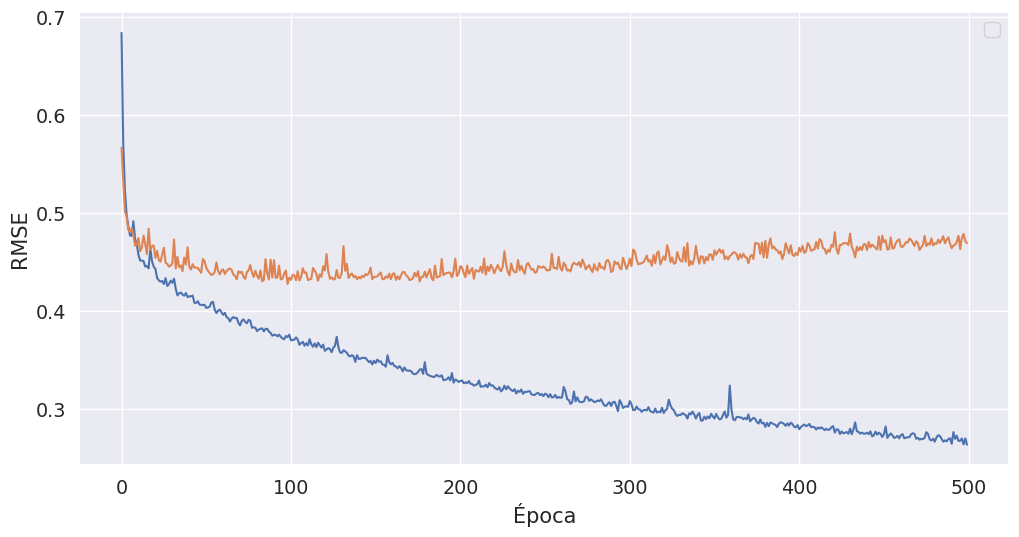

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 27s - loss: 1.2265

1088/6000 [====>.........................] - ETA: 0s - loss: 0.8586 

2336/6000 [==========>...................] - ETA: 0s - loss: 0.7299

3744/6000 [=================>............] - ETA: 0s - loss: 0.6600

5152/6000 [========================>.....] - ETA: 0s - loss: 0.6142

6000/6000 [==============================] - 1s 83us/step - loss: 0.5846 - val_loss: 0.3632


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2308

1408/6000 [======>.......................] - ETA: 0s - loss: 0.4345

2848/6000 [=============>................] - ETA: 0s - loss: 0.4290

4064/6000 [===================>..........] - ETA: 0s - loss: 0.5517



5440/6000 [==========================>...] - ETA: 0s - loss: 0.5142

6000/6000 [==============================] - 0s 50us/step - loss: 0.5007 - val_loss: 0.3204


Epoch 3/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4182

1408/6000 [======>.......................] - ETA: 0s - loss: 0.5274

2752/6000 [============>.................] - ETA: 0s - loss: 0.4377

3936/6000 [==================>...........] - ETA: 0s - loss: 0.4171

5280/6000 [=========================>....] - ETA: 0s - loss: 0.4152

6000/6000 [==============================] - 0s 53us/step - loss: 0.4033 - val_loss: 0.2861


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3880

1376/6000 [=====>........................] - ETA: 0s - loss: 0.3287

2848/6000 [=============>................] - ETA: 0s - loss: 0.3264

4160/6000 [===================>..........] - ETA: 0s - loss: 0.3248

5504/6000 [==========================>...] - ETA: 0s - loss: 0.3467

6000/6000 [==============================] - 0s 49us/step - loss: 0.3424 - val_loss: 0.2689


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4292

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2976

2784/6000 [============>.................] - ETA: 0s - loss: 0.3397

4224/6000 [====================>.........] - ETA: 0s - loss: 0.3285

5664/6000 [===========================>..] - ETA: 0s - loss: 0.3369

6000/6000 [==============================] - 0s 48us/step - loss: 0.3359 - val_loss: 0.2618


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2393

1312/6000 [=====>........................] - ETA: 0s - loss: 0.3415

2752/6000 [============>.................] - ETA: 0s - loss: 0.3209

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3255

5472/6000 [==========================>...] - ETA: 0s - loss: 0.3203

6000/6000 [==============================] - 0s 49us/step - loss: 0.3181 - val_loss: 0.2465


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3013

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2766

2848/6000 [=============>................] - ETA: 0s - loss: 0.2864

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2877

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2864

6000/6000 [==============================] - 0s 47us/step - loss: 0.2883 - val_loss: 0.2441


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1440/6000 [======>.......................] - ETA: 0s - loss: 0.3349

2688/6000 [============>.................] - ETA: 0s - loss: 0.3149

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3093

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2993

6000/6000 [==============================] - 0s 50us/step - loss: 0.2957 - val_loss: 0.2368


Epoch 9/500


  32/6000 [..............................] - ETA: 1s - loss: 0.7011

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2749

2944/6000 [=============>................] - ETA: 0s - loss: 0.2949

4352/6000 [====================>.........] - ETA: 0s - loss: 0.3035

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2987

6000/6000 [==============================] - 0s 49us/step - loss: 0.2943 - val_loss: 0.2357


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2588

2816/6000 [=============>................] - ETA: 0s - loss: 0.2605

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2781

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2671

6000/6000 [==============================] - 0s 49us/step - loss: 0.2684 - val_loss: 0.2323


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2684

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2978

2688/6000 [============>.................] - ETA: 0s - loss: 0.2919

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2809

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2760

6000/6000 [==============================] - 0s 50us/step - loss: 0.2719 - val_loss: 0.2305


Epoch 12/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1779

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2470

2848/6000 [=============>................] - ETA: 0s - loss: 0.2530

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2514

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2582

6000/6000 [==============================] - 0s 49us/step - loss: 0.2585 - val_loss: 0.2298


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3140

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2464

2784/6000 [============>.................] - ETA: 0s - loss: 0.2577

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2540

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2604

6000/6000 [==============================] - 0s 50us/step - loss: 0.2603 - val_loss: 0.2242


Epoch 14/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2460

2784/6000 [============>.................] - ETA: 0s - loss: 0.2506

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2515

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2593

6000/6000 [==============================] - 0s 47us/step - loss: 0.2589 - val_loss: 0.2198


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2139

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2683

2784/6000 [============>.................] - ETA: 0s - loss: 0.2514

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2514

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2502

6000/6000 [==============================] - 0s 49us/step - loss: 0.2497 - val_loss: 0.2244


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2646

2720/6000 [============>.................] - ETA: 0s - loss: 0.2565

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2553

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2498

6000/6000 [==============================] - 0s 50us/step - loss: 0.2521 - val_loss: 0.2194


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2100

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2411

2656/6000 [============>.................] - ETA: 0s - loss: 0.2405

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2383

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2467

6000/6000 [==============================] - 0s 49us/step - loss: 0.2514 - val_loss: 0.2148


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2789

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2439

2976/6000 [=============>................] - ETA: 0s - loss: 0.2366

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2397

5824/6000 [============================>.] - ETA: 0s - loss: 0.2472

6000/6000 [==============================] - 0s 47us/step - loss: 0.2470 - val_loss: 0.2149


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1928

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2626

2752/6000 [============>.................] - ETA: 0s - loss: 0.2559

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2577

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2559

6000/6000 [==============================] - 0s 48us/step - loss: 0.2536 - val_loss: 0.2137


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2167

2880/6000 [=============>................] - ETA: 0s - loss: 0.2453

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2439

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 49us/step - loss: 0.2434 - val_loss: 0.2142


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3627

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2710

2560/6000 [===========>..................] - ETA: 0s - loss: 0.2443

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2458

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 50us/step - loss: 0.2395 - val_loss: 0.2129


Epoch 22/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3797

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2413

2752/6000 [============>.................] - ETA: 0s - loss: 0.2441

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2334

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2364

6000/6000 [==============================] - 0s 49us/step - loss: 0.2399 - val_loss: 0.2146


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2549

2944/6000 [=============>................] - ETA: 0s - loss: 0.2449

3680/6000 [=================>............] - ETA: 0s - loss: 0.2457

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2409

6000/6000 [==============================] - 0s 54us/step - loss: 0.2410 - val_loss: 0.2140


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2290

2816/6000 [=============>................] - ETA: 0s - loss: 0.2275

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2345

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 49us/step - loss: 0.2352 - val_loss: 0.2089


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3485

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2331

2848/6000 [=============>................] - ETA: 0s - loss: 0.2346

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2394

5856/6000 [============================>.] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 47us/step - loss: 0.2380 - val_loss: 0.2103


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3455

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2315

2944/6000 [=============>................] - ETA: 0s - loss: 0.2387

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2403

5984/6000 [============================>.] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 46us/step - loss: 0.2383 - val_loss: 0.2096


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2527

2880/6000 [=============>................] - ETA: 0s - loss: 0.2484

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2393

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 50us/step - loss: 0.2388 - val_loss: 0.2145


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2823

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2389

2944/6000 [=============>................] - ETA: 0s - loss: 0.2402

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2374

5888/6000 [============================>.] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 47us/step - loss: 0.2334 - val_loss: 0.2150


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3504

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2595

2688/6000 [============>.................] - ETA: 0s - loss: 0.2356

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2219

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 49us/step - loss: 0.2277 - val_loss: 0.2087


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2488

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2308

2944/6000 [=============>................] - ETA: 0s - loss: 0.2421

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2442

5920/6000 [============================>.] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 47us/step - loss: 0.2361 - val_loss: 0.2038


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2576

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2179

2816/6000 [=============>................] - ETA: 0s - loss: 0.2177

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2244

5824/6000 [============================>.] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 47us/step - loss: 0.2248 - val_loss: 0.2023


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2086

2848/6000 [=============>................] - ETA: 0s - loss: 0.2233

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2268

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 48us/step - loss: 0.2334 - val_loss: 0.2041


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2242

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2327

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 46us/step - loss: 0.2285 - val_loss: 0.2022


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2210

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2108

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2175

5888/6000 [============================>.] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 47us/step - loss: 0.2224 - val_loss: 0.2053


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2228

2944/6000 [=============>................] - ETA: 0s - loss: 0.2292

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2295

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 50us/step - loss: 0.2274 - val_loss: 0.2046


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4409

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2129

2880/6000 [=============>................] - ETA: 0s - loss: 0.2244

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2321

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 49us/step - loss: 0.2305 - val_loss: 0.2082


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2058

2816/6000 [=============>................] - ETA: 0s - loss: 0.2106

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2218

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 49us/step - loss: 0.2240 - val_loss: 0.2017


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2624

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2197

2784/6000 [============>.................] - ETA: 0s - loss: 0.2159

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2262

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 49us/step - loss: 0.2233 - val_loss: 0.2023


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2713

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2298

2976/6000 [=============>................] - ETA: 0s - loss: 0.2213

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2250

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 49us/step - loss: 0.2252 - val_loss: 0.2089


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3256

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2194

2848/6000 [=============>................] - ETA: 0s - loss: 0.2298

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2285

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 53us/step - loss: 0.2243 - val_loss: 0.2008


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2225

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2100

2912/6000 [=============>................] - ETA: 0s - loss: 0.2092

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2159

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 50us/step - loss: 0.2263 - val_loss: 0.2027


Epoch 42/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2194

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2193

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2294

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2233

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 54us/step - loss: 0.2225 - val_loss: 0.2028


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1651

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2187

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2070

3584/6000 [================>.............] - ETA: 0s - loss: 0.2135

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 53us/step - loss: 0.2198 - val_loss: 0.2100


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2206

2880/6000 [=============>................] - ETA: 0s - loss: 0.2215

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2253

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 51us/step - loss: 0.2237 - val_loss: 0.1983


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2329

2880/6000 [=============>................] - ETA: 0s - loss: 0.2231

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2237

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 49us/step - loss: 0.2192 - val_loss: 0.2024


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2762

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2166

2816/6000 [=============>................] - ETA: 0s - loss: 0.2074

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2103

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 49us/step - loss: 0.2216 - val_loss: 0.2060


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0947

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2234

2592/6000 [===========>..................] - ETA: 0s - loss: 0.2156

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2177

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 51us/step - loss: 0.2207 - val_loss: 0.2030


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1985

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2215

2944/6000 [=============>................] - ETA: 0s - loss: 0.2183

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2187

5824/6000 [============================>.] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 47us/step - loss: 0.2205 - val_loss: 0.2000


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1772

2624/6000 [============>.................] - ETA: 0s - loss: 0.2183

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2217

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 51us/step - loss: 0.2144 - val_loss: 0.1955


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2236

2752/6000 [============>.................] - ETA: 0s - loss: 0.2127

3776/6000 [=================>............] - ETA: 0s - loss: 0.2139

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 54us/step - loss: 0.2182 - val_loss: 0.1974


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1998

2752/6000 [============>.................] - ETA: 0s - loss: 0.2197

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2144

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 51us/step - loss: 0.2183 - val_loss: 0.2001


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2572

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2271

2944/6000 [=============>................] - ETA: 0s - loss: 0.2268

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2232

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 48us/step - loss: 0.2154 - val_loss: 0.1962


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2295

2912/6000 [=============>................] - ETA: 0s - loss: 0.2300

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2194

5824/6000 [============================>.] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 47us/step - loss: 0.2223 - val_loss: 0.1977


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2852

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2046

2848/6000 [=============>................] - ETA: 0s - loss: 0.2138

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2172

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 49us/step - loss: 0.2192 - val_loss: 0.1996


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2012

2656/6000 [============>.................] - ETA: 0s - loss: 0.2011

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2059

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2117

6000/6000 [==============================] - 0s 52us/step - loss: 0.2129 - val_loss: 0.1973


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

1216/6000 [=====>........................] - ETA: 0s - loss: 0.2007

2656/6000 [============>.................] - ETA: 0s - loss: 0.2086

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2137

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 52us/step - loss: 0.2131 - val_loss: 0.2004


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2521

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2041

2912/6000 [=============>................] - ETA: 0s - loss: 0.2053

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2129

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 51us/step - loss: 0.2122 - val_loss: 0.1941


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2964

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1835

2816/6000 [=============>................] - ETA: 0s - loss: 0.2040

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2099

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 52us/step - loss: 0.2146 - val_loss: 0.1969


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2070

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2106

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2140

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 48us/step - loss: 0.2104 - val_loss: 0.1939


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2591

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1927

2720/6000 [============>.................] - ETA: 0s - loss: 0.2094

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2141

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 52us/step - loss: 0.2137 - val_loss: 0.1967


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2029

2912/6000 [=============>................] - ETA: 0s - loss: 0.2186

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2125

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2117

6000/6000 [==============================] - 0s 50us/step - loss: 0.2105 - val_loss: 0.1932


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2013

2720/6000 [============>.................] - ETA: 0s - loss: 0.2110

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2178

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 51us/step - loss: 0.2133 - val_loss: 0.1954


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1971

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2016

3648/6000 [=================>............] - ETA: 0s - loss: 0.2101

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 52us/step - loss: 0.2105 - val_loss: 0.1950


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2799

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2111

2912/6000 [=============>................] - ETA: 0s - loss: 0.2129

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2125

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 48us/step - loss: 0.2058 - val_loss: 0.1940


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2030

2816/6000 [=============>................] - ETA: 0s - loss: 0.2072

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2104

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 51us/step - loss: 0.2127 - val_loss: 0.1956


Epoch 66/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4008

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2044

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2156

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2154

5824/6000 [============================>.] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 48us/step - loss: 0.2159 - val_loss: 0.1944


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2021

2912/6000 [=============>................] - ETA: 0s - loss: 0.2116

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2200

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2124

6000/6000 [==============================] - 0s 48us/step - loss: 0.2118 - val_loss: 0.1916


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2453

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2025

2784/6000 [============>.................] - ETA: 0s - loss: 0.2117

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2096

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 48us/step - loss: 0.2110 - val_loss: 0.1956


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1977

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2066

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2073

5920/6000 [============================>.] - ETA: 0s - loss: 0.2070

6000/6000 [==============================] - 0s 46us/step - loss: 0.2067 - val_loss: 0.1955


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3391

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1959

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2018

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2059

5920/6000 [============================>.] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 46us/step - loss: 0.2069 - val_loss: 0.1896


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2125

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2175

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2110

6000/6000 [==============================] - 0s 45us/step - loss: 0.2098 - val_loss: 0.1934


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2668

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1936

2976/6000 [=============>................] - ETA: 0s - loss: 0.2135

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2055

5856/6000 [============================>.] - ETA: 0s - loss: 0.2046

6000/6000 [==============================] - 0s 48us/step - loss: 0.2046 - val_loss: 0.1932


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2286

2656/6000 [============>.................] - ETA: 0s - loss: 0.2131

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2158

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 49us/step - loss: 0.2083 - val_loss: 0.1910


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3113

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1972

2912/6000 [=============>................] - ETA: 0s - loss: 0.1975

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2091

5984/6000 [============================>.] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 46us/step - loss: 0.2096 - val_loss: 0.1993


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1550

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1983

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1986

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2092

5952/6000 [============================>.] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 47us/step - loss: 0.2068 - val_loss: 0.1890


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1877

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2009

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 46us/step - loss: 0.2066 - val_loss: 0.1960


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1898

2976/6000 [=============>................] - ETA: 0s - loss: 0.1979

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2036

5984/6000 [============================>.] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 46us/step - loss: 0.2104 - val_loss: 0.1978


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2153

2880/6000 [=============>................] - ETA: 0s - loss: 0.1994

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2082

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2082

6000/6000 [==============================] - 0s 47us/step - loss: 0.2085 - val_loss: 0.1901


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3442

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2020

2880/6000 [=============>................] - ETA: 0s - loss: 0.1922

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1978

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1998

6000/6000 [==============================] - 0s 50us/step - loss: 0.2017 - val_loss: 0.1925


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2841

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2046

2816/6000 [=============>................] - ETA: 0s - loss: 0.1982

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2015

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2048

6000/6000 [==============================] - 0s 49us/step - loss: 0.2051 - val_loss: 0.1922


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2059

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2016

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2013

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 52us/step - loss: 0.2058 - val_loss: 0.1918


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1437

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2189

2848/6000 [=============>................] - ETA: 0s - loss: 0.2193

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2094

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 49us/step - loss: 0.2053 - val_loss: 0.1914


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1979

2688/6000 [============>.................] - ETA: 0s - loss: 0.1968

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1978

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 50us/step - loss: 0.2018 - val_loss: 0.1977


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1879

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2069

2816/6000 [=============>................] - ETA: 0s - loss: 0.2035

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2007

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 50us/step - loss: 0.2034 - val_loss: 0.1946


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2363

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2225

2720/6000 [============>.................] - ETA: 0s - loss: 0.2052

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2112

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2044

6000/6000 [==============================] - 0s 50us/step - loss: 0.2063 - val_loss: 0.1905


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2099

2912/6000 [=============>................] - ETA: 0s - loss: 0.2143

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2087

5824/6000 [============================>.] - ETA: 0s - loss: 0.2030

6000/6000 [==============================] - 0s 47us/step - loss: 0.2041 - val_loss: 0.1885


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1934

2944/6000 [=============>................] - ETA: 0s - loss: 0.1929

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2008

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 48us/step - loss: 0.2074 - val_loss: 0.1924


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1783

2880/6000 [=============>................] - ETA: 0s - loss: 0.1919

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2023

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 47us/step - loss: 0.2014 - val_loss: 0.1929


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2614

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2053

2688/6000 [============>.................] - ETA: 0s - loss: 0.2057

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2050

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2025

6000/6000 [==============================] - 0s 50us/step - loss: 0.2002 - val_loss: 0.1895


Epoch 90/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2085

2880/6000 [=============>................] - ETA: 0s - loss: 0.2024

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1967

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2002

6000/6000 [==============================] - 0s 48us/step - loss: 0.1994 - val_loss: 0.1914


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1997

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1929

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1940

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1973

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1999



6000/6000 [==============================] - 0s 51us/step - loss: 0.2009 - val_loss: 0.1891


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1848

2912/6000 [=============>................] - ETA: 0s - loss: 0.1917

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1942

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 47us/step - loss: 0.2016 - val_loss: 0.1928


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2229

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2071

3680/6000 [=================>............] - ETA: 0s - loss: 0.2041

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1998

6000/6000 [==============================] - 0s 54us/step - loss: 0.1987 - val_loss: 0.1914


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5829

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1923

2880/6000 [=============>................] - ETA: 0s - loss: 0.1910

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1994

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 48us/step - loss: 0.1998 - val_loss: 0.1905


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1982

2880/6000 [=============>................] - ETA: 0s - loss: 0.1936

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1931

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 50us/step - loss: 0.2027 - val_loss: 0.1939


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3183

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1979

2880/6000 [=============>................] - ETA: 0s - loss: 0.2003

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1987

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 49us/step - loss: 0.2002 - val_loss: 0.1926


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1529

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1977

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1943

3488/6000 [================>.............] - ETA: 0s - loss: 0.1936

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 53us/step - loss: 0.1962 - val_loss: 0.1923


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1958

2880/6000 [=============>................] - ETA: 0s - loss: 0.2069

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2057

5824/6000 [============================>.] - ETA: 0s - loss: 0.2079

6000/6000 [==============================] - 0s 47us/step - loss: 0.2070 - val_loss: 0.1951


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2009

2816/6000 [=============>................] - ETA: 0s - loss: 0.2026

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1971

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 52us/step - loss: 0.1951 - val_loss: 0.1886


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0529

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1930

2624/6000 [============>.................] - ETA: 0s - loss: 0.1934

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1992

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2013

6000/6000 [==============================] - 0s 49us/step - loss: 0.2011 - val_loss: 0.1885


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2813

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2021

2976/6000 [=============>................] - ETA: 0s - loss: 0.1911

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1948

5856/6000 [============================>.] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 47us/step - loss: 0.1961 - val_loss: 0.1914


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2132

2912/6000 [=============>................] - ETA: 0s - loss: 0.2101

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2012

5824/6000 [============================>.] - ETA: 0s - loss: 0.2031

6000/6000 [==============================] - 0s 48us/step - loss: 0.2032 - val_loss: 0.1891


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1954

2848/6000 [=============>................] - ETA: 0s - loss: 0.1944

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1936

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 50us/step - loss: 0.2042 - val_loss: 0.1919


Epoch 104/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1638

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1919

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1968

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1997

5856/6000 [============================>.] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 47us/step - loss: 0.1983 - val_loss: 0.1884


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2048

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1749

2848/6000 [=============>................] - ETA: 0s - loss: 0.1856

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1892

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 48us/step - loss: 0.1980 - val_loss: 0.1875


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2100

2752/6000 [============>.................] - ETA: 0s - loss: 0.2005

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1954

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 49us/step - loss: 0.1956 - val_loss: 0.1907


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1951

2784/6000 [============>.................] - ETA: 0s - loss: 0.1914

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1928

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1964

6000/6000 [==============================] - 0s 48us/step - loss: 0.1965 - val_loss: 0.1888


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2781

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2071

2880/6000 [=============>................] - ETA: 0s - loss: 0.2089

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1958

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 51us/step - loss: 0.1961 - val_loss: 0.1901


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1821

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1808

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2002

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 50us/step - loss: 0.1994 - val_loss: 0.1892


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2354

2880/6000 [=============>................] - ETA: 0s - loss: 0.2151

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2063

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 49us/step - loss: 0.2004 - val_loss: 0.1931


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2400

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2944/6000 [=============>................] - ETA: 0s - loss: 0.1989

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1929

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 48us/step - loss: 0.1950 - val_loss: 0.1931


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1889

2880/6000 [=============>................] - ETA: 0s - loss: 0.1860

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1876

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 49us/step - loss: 0.1939 - val_loss: 0.1920


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2976/6000 [=============>................] - ETA: 0s - loss: 0.1974

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1977

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1972

6000/6000 [==============================] - 0s 49us/step - loss: 0.1967 - val_loss: 0.1867


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2101

2944/6000 [=============>................] - ETA: 0s - loss: 0.1987

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1978

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 48us/step - loss: 0.1968 - val_loss: 0.1901


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1852

2752/6000 [============>.................] - ETA: 0s - loss: 0.1926

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1971

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 48us/step - loss: 0.1977 - val_loss: 0.1853


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1921

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1878

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1981

5920/6000 [============================>.] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 47us/step - loss: 0.1988 - val_loss: 0.1889


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1152/6000 [====>.........................] - ETA: 0s - loss: 0.2254

2688/6000 [============>.................] - ETA: 0s - loss: 0.1961

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1937

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1970

6000/6000 [==============================] - 0s 50us/step - loss: 0.1985 - val_loss: 0.1879


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2423

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1848

2912/6000 [=============>................] - ETA: 0s - loss: 0.1887

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1913

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1972

6000/6000 [==============================] - 0s 50us/step - loss: 0.1984 - val_loss: 0.1929


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2283

2752/6000 [============>.................] - ETA: 0s - loss: 0.2083

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2015

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2015

6000/6000 [==============================] - 0s 48us/step - loss: 0.2010 - val_loss: 0.1919


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1916

2912/6000 [=============>................] - ETA: 0s - loss: 0.1852

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1929

5824/6000 [============================>.] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 48us/step - loss: 0.1984 - val_loss: 0.1863


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2085

2880/6000 [=============>................] - ETA: 0s - loss: 0.1966

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1988

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1998

6000/6000 [==============================] - 0s 50us/step - loss: 0.1987 - val_loss: 0.1877


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1870

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1924

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1940

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 48us/step - loss: 0.1973 - val_loss: 0.1921


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1603

2688/6000 [============>.................] - ETA: 0s - loss: 0.1699

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1819

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 48us/step - loss: 0.1912 - val_loss: 0.1919


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1918

2880/6000 [=============>................] - ETA: 0s - loss: 0.1863

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1889

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 48us/step - loss: 0.1917 - val_loss: 0.1900


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1841

2848/6000 [=============>................] - ETA: 0s - loss: 0.1959

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1972

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1964

6000/6000 [==============================] - 0s 47us/step - loss: 0.1986 - val_loss: 0.1874


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1626

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1983

2912/6000 [=============>................] - ETA: 0s - loss: 0.2014

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1977

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 48us/step - loss: 0.1953 - val_loss: 0.1876


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1731

2976/6000 [=============>................] - ETA: 0s - loss: 0.1957

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1924

5920/6000 [============================>.] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 47us/step - loss: 0.1921 - val_loss: 0.1851


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3272

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2061

2880/6000 [=============>................] - ETA: 0s - loss: 0.1951

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2025

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 48us/step - loss: 0.1951 - val_loss: 0.1892


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1823

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2064

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2053

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 49us/step - loss: 0.1954 - val_loss: 0.1903


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3027

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1860

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1845

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1896

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 48us/step - loss: 0.1962 - val_loss: 0.1883


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1881

2944/6000 [=============>................] - ETA: 0s - loss: 0.1950

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1934

5856/6000 [============================>.] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 49us/step - loss: 0.1937 - val_loss: 0.1887


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2153

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1988

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1975

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2014

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1957

6000/6000 [==============================] - 0s 47us/step - loss: 0.1949 - val_loss: 0.1847


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1821

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1856

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 45us/step - loss: 0.1945 - val_loss: 0.1901


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2004

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1935

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1943

5856/6000 [============================>.] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 48us/step - loss: 0.1938 - val_loss: 0.1930


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2333

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1905

2912/6000 [=============>................] - ETA: 0s - loss: 0.1874

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1838

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 47us/step - loss: 0.1918 - val_loss: 0.1866


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1952

2912/6000 [=============>................] - ETA: 0s - loss: 0.1858

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1830

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 48us/step - loss: 0.1922 - val_loss: 0.1864


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1710

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1885

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1967

5952/6000 [============================>.] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 46us/step - loss: 0.1968 - val_loss: 0.1874


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2446

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1857

2912/6000 [=============>................] - ETA: 0s - loss: 0.1905

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1909

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 48us/step - loss: 0.1916 - val_loss: 0.1925


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1952

2752/6000 [============>.................] - ETA: 0s - loss: 0.2010

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1920

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 47us/step - loss: 0.1931 - val_loss: 0.1930


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3551

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1943

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1839

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1928

5984/6000 [============================>.] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 46us/step - loss: 0.1947 - val_loss: 0.1920


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2420

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1889

2976/6000 [=============>................] - ETA: 0s - loss: 0.1901

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1963

5984/6000 [============================>.] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 46us/step - loss: 0.1941 - val_loss: 0.1891


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1990

2976/6000 [=============>................] - ETA: 0s - loss: 0.1926

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1909

5920/6000 [============================>.] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 47us/step - loss: 0.1938 - val_loss: 0.1864


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1089

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1978

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1844

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1859

5952/6000 [============================>.] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 46us/step - loss: 0.1892 - val_loss: 0.1897


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1880

2912/6000 [=============>................] - ETA: 0s - loss: 0.1962

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1943

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 51us/step - loss: 0.1884 - val_loss: 0.1887


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1922

2912/6000 [=============>................] - ETA: 0s - loss: 0.1844

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1834

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 50us/step - loss: 0.1860 - val_loss: 0.1868


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1972

2816/6000 [=============>................] - ETA: 0s - loss: 0.1977

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1930

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 48us/step - loss: 0.1915 - val_loss: 0.1875


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1906

2784/6000 [============>.................] - ETA: 0s - loss: 0.1878

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1944

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1918

6000/6000 [==============================] - 0s 49us/step - loss: 0.1906 - val_loss: 0.1877


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1770

2784/6000 [============>.................] - ETA: 0s - loss: 0.1839

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1931

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 48us/step - loss: 0.1960 - val_loss: 0.1887


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3166

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1872

2816/6000 [=============>................] - ETA: 0s - loss: 0.1889

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1913

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 49us/step - loss: 0.1942 - val_loss: 0.1884


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2020

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1903

3552/6000 [================>.............] - ETA: 0s - loss: 0.1890

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 54us/step - loss: 0.1913 - val_loss: 0.1964


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1828

2880/6000 [=============>................] - ETA: 0s - loss: 0.1911

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1913

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 50us/step - loss: 0.1896 - val_loss: 0.1853


Epoch 152/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1488

1120/6000 [====>.........................] - ETA: 0s - loss: 0.2107

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1931

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1879

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 55us/step - loss: 0.1892 - val_loss: 0.1899


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1593

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1861

2720/6000 [============>.................] - ETA: 0s - loss: 0.1927

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1981

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 48us/step - loss: 0.1954 - val_loss: 0.1878


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3526

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1849

2848/6000 [=============>................] - ETA: 0s - loss: 0.1869

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1853

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 48us/step - loss: 0.1920 - val_loss: 0.1865


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1838

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1939

2912/6000 [=============>................] - ETA: 0s - loss: 0.1987

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1934

5824/6000 [============================>.] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 48us/step - loss: 0.1912 - val_loss: 0.1868


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1867

2880/6000 [=============>................] - ETA: 0s - loss: 0.1915

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1922

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 50us/step - loss: 0.1928 - val_loss: 0.1957


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2054

2912/6000 [=============>................] - ETA: 0s - loss: 0.1952

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1956

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 49us/step - loss: 0.1947 - val_loss: 0.1895


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1998

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2040

2976/6000 [=============>................] - ETA: 0s - loss: 0.2000

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1994

5920/6000 [============================>.] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 48us/step - loss: 0.1988 - val_loss: 0.1865


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2162

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1920

2976/6000 [=============>................] - ETA: 0s - loss: 0.1871

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1921

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 49us/step - loss: 0.1903 - val_loss: 0.1865


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2031

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1893

2912/6000 [=============>................] - ETA: 0s - loss: 0.1910

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1919

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 49us/step - loss: 0.1885 - val_loss: 0.1894


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1820

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1963

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1923

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 52us/step - loss: 0.1961 - val_loss: 0.1882


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1815

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1982

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1966

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 52us/step - loss: 0.1974 - val_loss: 0.1897


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2392

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1972

2720/6000 [============>.................] - ETA: 0s - loss: 0.1980

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1898

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 49us/step - loss: 0.1920 - val_loss: 0.1868


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2133

2688/6000 [============>.................] - ETA: 0s - loss: 0.1967

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2036

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1956

6000/6000 [==============================] - 0s 50us/step - loss: 0.1946 - val_loss: 0.1845


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2071

2976/6000 [=============>................] - ETA: 0s - loss: 0.2036

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1970

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1938

6000/6000 [==============================] - 0s 50us/step - loss: 0.1932 - val_loss: 0.1847


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2012

2912/6000 [=============>................] - ETA: 0s - loss: 0.2017

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2011

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1953

6000/6000 [==============================] - 0s 49us/step - loss: 0.1936 - val_loss: 0.1840


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3065

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1820

2944/6000 [=============>................] - ETA: 0s - loss: 0.1923

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1928

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 49us/step - loss: 0.1918 - val_loss: 0.1841


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1915

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1906

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1874

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 50us/step - loss: 0.1892 - val_loss: 0.1857


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2484

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1977

2848/6000 [=============>................] - ETA: 0s - loss: 0.1876

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1909

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 50us/step - loss: 0.1924 - val_loss: 0.1862


Epoch 170/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1797

2848/6000 [=============>................] - ETA: 0s - loss: 0.1808

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1869

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 47us/step - loss: 0.1888 - val_loss: 0.1857


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2656

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2066

2912/6000 [=============>................] - ETA: 0s - loss: 0.1953

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1961

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 49us/step - loss: 0.1949 - val_loss: 0.1854


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1973

2720/6000 [============>.................] - ETA: 0s - loss: 0.1942

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1941

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 49us/step - loss: 0.1900 - val_loss: 0.1900


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1769

2880/6000 [=============>................] - ETA: 0s - loss: 0.1918

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1860

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 51us/step - loss: 0.1883 - val_loss: 0.1912


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1857

2944/6000 [=============>................] - ETA: 0s - loss: 0.1815

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1906

5824/6000 [============================>.] - ETA: 0s - loss: 0.1917

6000/6000 [==============================] - 0s 48us/step - loss: 0.1906 - val_loss: 0.1920


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2944/6000 [=============>................] - ETA: 0s - loss: 0.1861

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1910

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 48us/step - loss: 0.1930 - val_loss: 0.1862


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1957

2720/6000 [============>.................] - ETA: 0s - loss: 0.2067

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1956

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 51us/step - loss: 0.1910 - val_loss: 0.1882


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1960

2880/6000 [=============>................] - ETA: 0s - loss: 0.1883

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1872

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 50us/step - loss: 0.1873 - val_loss: 0.1880


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2707

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2065

2816/6000 [=============>................] - ETA: 0s - loss: 0.1907

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1973

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 49us/step - loss: 0.1940 - val_loss: 0.1904


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1996

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1841

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1870

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 53us/step - loss: 0.1900 - val_loss: 0.1853


Epoch 180/500
  32/6000 [..............................] - ETA: 3s - loss: 0.2351

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2020

2816/6000 [=============>................] - ETA: 0s - loss: 0.1947

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1851

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 50us/step - loss: 0.1859 - val_loss: 0.1875


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2002

2976/6000 [=============>................] - ETA: 0s - loss: 0.1869

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1959

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1927

6000/6000 [==============================] - 0s 47us/step - loss: 0.1932 - val_loss: 0.1856


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3563

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2053

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2037

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1961

5952/6000 [============================>.] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 46us/step - loss: 0.1917 - val_loss: 0.1868


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3645

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1936

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1895

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1862

5920/6000 [============================>.] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 46us/step - loss: 0.1894 - val_loss: 0.1851


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1938

2880/6000 [=============>................] - ETA: 0s - loss: 0.1899

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1898

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 48us/step - loss: 0.1866 - val_loss: 0.1879


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1856

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1686

2944/6000 [=============>................] - ETA: 0s - loss: 0.1820

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5920/6000 [============================>.] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 46us/step - loss: 0.1875 - val_loss: 0.1860


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1817

2944/6000 [=============>................] - ETA: 0s - loss: 0.1767

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1857

5920/6000 [============================>.] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 46us/step - loss: 0.1876 - val_loss: 0.1874


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4229

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1962

2752/6000 [============>.................] - ETA: 0s - loss: 0.1933

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1911

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 48us/step - loss: 0.1854 - val_loss: 0.1822


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1811

2848/6000 [=============>................] - ETA: 0s - loss: 0.1780

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1903

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 47us/step - loss: 0.1869 - val_loss: 0.1847


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1807

2976/6000 [=============>................] - ETA: 0s - loss: 0.1805

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1768

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 48us/step - loss: 0.1834 - val_loss: 0.1856


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1895

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1855

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5952/6000 [============================>.] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 46us/step - loss: 0.1870 - val_loss: 0.1847


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2061

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1977

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 46us/step - loss: 0.1885 - val_loss: 0.1868


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2874

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1821

2912/6000 [=============>................] - ETA: 0s - loss: 0.1910

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1920

5856/6000 [============================>.] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 47us/step - loss: 0.1893 - val_loss: 0.1887


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1982

2848/6000 [=============>................] - ETA: 0s - loss: 0.1944

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1850

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 49us/step - loss: 0.1880 - val_loss: 0.1885


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1895

2880/6000 [=============>................] - ETA: 0s - loss: 0.1862

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1843

5824/6000 [============================>.] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 49us/step - loss: 0.1875 - val_loss: 0.1905


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1853

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1850

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1930

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 53us/step - loss: 0.1862 - val_loss: 0.1911


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3189

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2107

2944/6000 [=============>................] - ETA: 0s - loss: 0.1936

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1898

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 48us/step - loss: 0.1894 - val_loss: 0.1842


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1954

2976/6000 [=============>................] - ETA: 0s - loss: 0.1841

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1838

5856/6000 [============================>.] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 47us/step - loss: 0.1862 - val_loss: 0.1895


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2057

2912/6000 [=============>................] - ETA: 0s - loss: 0.2013

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1950

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 49us/step - loss: 0.1869 - val_loss: 0.1865


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3181

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1874

2816/6000 [=============>................] - ETA: 0s - loss: 0.1849

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1827

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 51us/step - loss: 0.1873 - val_loss: 0.1863


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2175

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1685

2880/6000 [=============>................] - ETA: 0s - loss: 0.1726

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1799

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 47us/step - loss: 0.1868 - val_loss: 0.1839


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5263

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1993

2976/6000 [=============>................] - ETA: 0s - loss: 0.1951

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1859

5888/6000 [============================>.] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 47us/step - loss: 0.1874 - val_loss: 0.1837


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3624

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2057

2944/6000 [=============>................] - ETA: 0s - loss: 0.2011

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1885

5856/6000 [============================>.] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 47us/step - loss: 0.1874 - val_loss: 0.1858


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2039

2976/6000 [=============>................] - ETA: 0s - loss: 0.1835

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1849

5888/6000 [============================>.] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 47us/step - loss: 0.1858 - val_loss: 0.1831


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1956

2816/6000 [=============>................] - ETA: 0s - loss: 0.1935

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1864

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 48us/step - loss: 0.1842 - val_loss: 0.1836


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1870

2944/6000 [=============>................] - ETA: 0s - loss: 0.1888

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1855

5888/6000 [============================>.] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 46us/step - loss: 0.1876 - val_loss: 0.1861


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1639

2880/6000 [=============>................] - ETA: 0s - loss: 0.1729

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1756

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 48us/step - loss: 0.1866 - val_loss: 0.1869


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1897

2880/6000 [=============>................] - ETA: 0s - loss: 0.1924

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2004

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1970

6000/6000 [==============================] - 0s 47us/step - loss: 0.1949 - val_loss: 0.1833


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1799

2752/6000 [============>.................] - ETA: 0s - loss: 0.1844

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1815

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 49us/step - loss: 0.1850 - val_loss: 0.1837


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1810

2880/6000 [=============>................] - ETA: 0s - loss: 0.1892

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1864

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 49us/step - loss: 0.1836 - val_loss: 0.1846


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1643

2944/6000 [=============>................] - ETA: 0s - loss: 0.1740

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1780

5888/6000 [============================>.] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 47us/step - loss: 0.1828 - val_loss: 0.1856


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1969

2816/6000 [=============>................] - ETA: 0s - loss: 0.1771

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1868

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 48us/step - loss: 0.1846 - val_loss: 0.1846


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1686

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1857

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1851

5984/6000 [============================>.] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 46us/step - loss: 0.1837 - val_loss: 0.1854


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1527

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1712

2688/6000 [============>.................] - ETA: 0s - loss: 0.1866

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1919

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 49us/step - loss: 0.1904 - val_loss: 0.1859


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3305

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1886

2976/6000 [=============>................] - ETA: 0s - loss: 0.1822

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1880

5824/6000 [============================>.] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 47us/step - loss: 0.1844 - val_loss: 0.1841


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1390

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2548

2880/6000 [=============>................] - ETA: 0s - loss: 0.2174

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2066

5824/6000 [============================>.] - ETA: 0s - loss: 0.1995

6000/6000 [==============================] - 0s 48us/step - loss: 0.2003 - val_loss: 0.1863


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2341

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1840

2912/6000 [=============>................] - ETA: 0s - loss: 0.1880

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1855

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1820

6000/6000 [==============================] - 0s 48us/step - loss: 0.1830 - val_loss: 0.1879


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1378

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1827

2816/6000 [=============>................] - ETA: 0s - loss: 0.1870

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1848

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 48us/step - loss: 0.1869 - val_loss: 0.1844


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1815

2880/6000 [=============>................] - ETA: 0s - loss: 0.1871

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1877

5888/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 47us/step - loss: 0.1890 - val_loss: 0.1865


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1796

2816/6000 [=============>................] - ETA: 0s - loss: 0.1820

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1830

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 50us/step - loss: 0.1870 - val_loss: 0.1856


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1755

2752/6000 [============>.................] - ETA: 0s - loss: 0.1905

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1849

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 48us/step - loss: 0.1862 - val_loss: 0.1866


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1798

2976/6000 [=============>................] - ETA: 0s - loss: 0.1876

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1870

5920/6000 [============================>.] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 47us/step - loss: 0.1831 - val_loss: 0.1873


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1559

2848/6000 [=============>................] - ETA: 0s - loss: 0.1702

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1787

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 47us/step - loss: 0.1852 - val_loss: 0.1864


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1803

2944/6000 [=============>................] - ETA: 0s - loss: 0.1853

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1859

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 48us/step - loss: 0.1873 - val_loss: 0.1858


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1718

2848/6000 [=============>................] - ETA: 0s - loss: 0.1774

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1881

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 47us/step - loss: 0.1846 - val_loss: 0.1882


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1879

2976/6000 [=============>................] - ETA: 0s - loss: 0.1922

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1855

5824/6000 [============================>.] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 48us/step - loss: 0.1844 - val_loss: 0.1864


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2028

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1851

5952/6000 [============================>.] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 46us/step - loss: 0.1916 - val_loss: 0.1843


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1782

2752/6000 [============>.................] - ETA: 0s - loss: 0.1904

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1915

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 50us/step - loss: 0.1867 - val_loss: 0.1856


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1834

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1934

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1914

5952/6000 [============================>.] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 46us/step - loss: 0.1867 - val_loss: 0.1861


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1862

2944/6000 [=============>................] - ETA: 0s - loss: 0.1833

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1825

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 49us/step - loss: 0.1837 - val_loss: 0.1839


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1688

2912/6000 [=============>................] - ETA: 0s - loss: 0.1754

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1780

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 50us/step - loss: 0.1814 - val_loss: 0.1846


Epoch 231/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1647

2784/6000 [============>.................] - ETA: 0s - loss: 0.1799

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1819

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 48us/step - loss: 0.1853 - val_loss: 0.1823


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2307

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1751

2848/6000 [=============>................] - ETA: 0s - loss: 0.1723

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1783

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 51us/step - loss: 0.1809 - val_loss: 0.1844


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1365

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1788

2944/6000 [=============>................] - ETA: 0s - loss: 0.1861

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1858

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 48us/step - loss: 0.1849 - val_loss: 0.1860


Epoch 234/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2411

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1782

2656/6000 [============>.................] - ETA: 0s - loss: 0.1863

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1879

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 53us/step - loss: 0.1854 - val_loss: 0.1866


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1676

2656/6000 [============>.................] - ETA: 0s - loss: 0.1778

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1812

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 49us/step - loss: 0.1790 - val_loss: 0.1828


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1759

2720/6000 [============>.................] - ETA: 0s - loss: 0.1881

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1857

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 49us/step - loss: 0.1838 - val_loss: 0.1817


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1876

2880/6000 [=============>................] - ETA: 0s - loss: 0.1837

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1827

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 55us/step - loss: 0.1818 - val_loss: 0.1850


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1679

2848/6000 [=============>................] - ETA: 0s - loss: 0.1773

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1790

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 49us/step - loss: 0.1835 - val_loss: 0.1845


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1665

2944/6000 [=============>................] - ETA: 0s - loss: 0.1758

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1774

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 48us/step - loss: 0.1818 - val_loss: 0.1848


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1642

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1672

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1785

5888/6000 [============================>.] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 47us/step - loss: 0.1830 - val_loss: 0.1862


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2404

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1901

2944/6000 [=============>................] - ETA: 0s - loss: 0.1911

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1817

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 48us/step - loss: 0.1829 - val_loss: 0.1848


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2009

2976/6000 [=============>................] - ETA: 0s - loss: 0.1897

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1861

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 48us/step - loss: 0.1875 - val_loss: 0.1880


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2687

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1919

2976/6000 [=============>................] - ETA: 0s - loss: 0.1861

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1852

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 49us/step - loss: 0.1861 - val_loss: 0.1860


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2275

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1888

2816/6000 [=============>................] - ETA: 0s - loss: 0.1746

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1731

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 50us/step - loss: 0.1797 - val_loss: 0.1888


Epoch 245/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1732

2944/6000 [=============>................] - ETA: 0s - loss: 0.1786

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1809

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 52us/step - loss: 0.1820 - val_loss: 0.1858


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1803

2752/6000 [============>.................] - ETA: 0s - loss: 0.1813

3744/6000 [=================>............] - ETA: 0s - loss: 0.1852

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 55us/step - loss: 0.1879 - val_loss: 0.1830


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1593

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1931

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1958

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1956

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 51us/step - loss: 0.1869 - val_loss: 0.1844


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3836

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1904

2976/6000 [=============>................] - ETA: 0s - loss: 0.1884

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1864

5824/6000 [============================>.] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 48us/step - loss: 0.1861 - val_loss: 0.1849


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1756

2752/6000 [============>.................] - ETA: 0s - loss: 0.1731

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1770

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 52us/step - loss: 0.1843 - val_loss: 0.1860


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1760

2752/6000 [============>.................] - ETA: 0s - loss: 0.1753

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1802

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 50us/step - loss: 0.1840 - val_loss: 0.1832


Epoch 251/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2373

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1832

2656/6000 [============>.................] - ETA: 0s - loss: 0.1820

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1830

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 50us/step - loss: 0.1810 - val_loss: 0.1835


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1890

2976/6000 [=============>................] - ETA: 0s - loss: 0.1907

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1888

5952/6000 [============================>.] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 46us/step - loss: 0.1849 - val_loss: 0.1836


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2307

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1673

2912/6000 [=============>................] - ETA: 0s - loss: 0.1727

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2050

5824/6000 [============================>.] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 49us/step - loss: 0.1979 - val_loss: 0.1805


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2213

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1666

2688/6000 [============>.................] - ETA: 0s - loss: 0.1820

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1876

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 50us/step - loss: 0.1868 - val_loss: 0.1834


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1755

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1763

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1754

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 50us/step - loss: 0.1793 - val_loss: 0.1844


Epoch 256/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0718

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1783

2752/6000 [============>.................] - ETA: 0s - loss: 0.1781

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1788

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 49us/step - loss: 0.1821 - val_loss: 0.1877


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1742

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2046

2944/6000 [=============>................] - ETA: 0s - loss: 0.1862

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1851

5856/6000 [============================>.] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 49us/step - loss: 0.1828 - val_loss: 0.1875


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3446

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1848

2912/6000 [=============>................] - ETA: 0s - loss: 0.1870

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1851

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 47us/step - loss: 0.1804 - val_loss: 0.1857


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1810

2912/6000 [=============>................] - ETA: 0s - loss: 0.1870

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1857

5888/6000 [============================>.] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 47us/step - loss: 0.1796 - val_loss: 0.1826


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1837

2944/6000 [=============>................] - ETA: 0s - loss: 0.1738

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1776

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 47us/step - loss: 0.1803 - val_loss: 0.1919


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1268

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1869

2944/6000 [=============>................] - ETA: 0s - loss: 0.1794

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1836

5824/6000 [============================>.] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 47us/step - loss: 0.1821 - val_loss: 0.1849


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1689

2784/6000 [============>.................] - ETA: 0s - loss: 0.1800

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1818

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 47us/step - loss: 0.1832 - val_loss: 0.1854


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1834

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1774

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1797

5952/6000 [============================>.] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 48us/step - loss: 0.1843 - val_loss: 0.1836


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1784

2880/6000 [=============>................] - ETA: 0s - loss: 0.1736

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1809

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 49us/step - loss: 0.1829 - val_loss: 0.1841


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0949

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1728

2752/6000 [============>.................] - ETA: 0s - loss: 0.1757

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1852

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 48us/step - loss: 0.1838 - val_loss: 0.1823


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2631

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1978

2944/6000 [=============>................] - ETA: 0s - loss: 0.1929

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1845

5856/6000 [============================>.] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 48us/step - loss: 0.1834 - val_loss: 0.1853


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1614

2720/6000 [============>.................] - ETA: 0s - loss: 0.1751

3776/6000 [=================>............] - ETA: 0s - loss: 0.1829

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 52us/step - loss: 0.1812 - val_loss: 0.1820


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1675

2784/6000 [============>.................] - ETA: 0s - loss: 0.1815

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1849

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 50us/step - loss: 0.1805 - val_loss: 0.1878


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1704

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1731

2624/6000 [============>.................] - ETA: 0s - loss: 0.1751

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1751

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 50us/step - loss: 0.1766 - val_loss: 0.1833


Epoch 270/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1090

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1837

2976/6000 [=============>................] - ETA: 0s - loss: 0.1815

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1829

5824/6000 [============================>.] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 48us/step - loss: 0.1804 - val_loss: 0.1857


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3036

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1980

2848/6000 [=============>................] - ETA: 0s - loss: 0.2007

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1878

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 48us/step - loss: 0.1808 - val_loss: 0.1823


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1650

2688/6000 [============>.................] - ETA: 0s - loss: 0.1785

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1765

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 50us/step - loss: 0.1777 - val_loss: 0.1856


Epoch 273/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1047

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1768

2944/6000 [=============>................] - ETA: 0s - loss: 0.1814

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1822

5888/6000 [============================>.] - ETA: 0s - loss: 0.1820

6000/6000 [==============================] - 0s 48us/step - loss: 0.1820 - val_loss: 0.1853


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1705

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1811

2688/6000 [============>.................] - ETA: 0s - loss: 0.1858

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1767

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 49us/step - loss: 0.1805 - val_loss: 0.1829


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2101

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1671

2912/6000 [=============>................] - ETA: 0s - loss: 0.1688

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1751

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 50us/step - loss: 0.1767 - val_loss: 0.1820


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1762

2656/6000 [============>.................] - ETA: 0s - loss: 0.1781

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1740

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 50us/step - loss: 0.1782 - val_loss: 0.1788


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2483

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1732

2848/6000 [=============>................] - ETA: 0s - loss: 0.1771

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1766

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 50us/step - loss: 0.1811 - val_loss: 0.1830


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1902

2720/6000 [============>.................] - ETA: 0s - loss: 0.1837

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1752

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 51us/step - loss: 0.1772 - val_loss: 0.1832


Epoch 279/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3466

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1681

2944/6000 [=============>................] - ETA: 0s - loss: 0.1809

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1852

5856/6000 [============================>.] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 49us/step - loss: 0.1802 - val_loss: 0.1846


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1837

2976/6000 [=============>................] - ETA: 0s - loss: 0.1786

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1856

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 49us/step - loss: 0.1828 - val_loss: 0.1885


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1731

2880/6000 [=============>................] - ETA: 0s - loss: 0.1802

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1804

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 53us/step - loss: 0.1824 - val_loss: 0.1836


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1784

2880/6000 [=============>................] - ETA: 0s - loss: 0.1781

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1805

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 49us/step - loss: 0.1808 - val_loss: 0.1858


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1963

2880/6000 [=============>................] - ETA: 0s - loss: 0.1869

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1768

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 50us/step - loss: 0.1775 - val_loss: 0.1826


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1733

2656/6000 [============>.................] - ETA: 0s - loss: 0.1773

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1744

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 50us/step - loss: 0.1812 - val_loss: 0.1862


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3074

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2912/6000 [=============>................] - ETA: 0s - loss: 0.1831

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1870

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 49us/step - loss: 0.1825 - val_loss: 0.1835


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1716

2784/6000 [============>.................] - ETA: 0s - loss: 0.1779

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1739

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 48us/step - loss: 0.1766 - val_loss: 0.1883


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1216/6000 [=====>........................] - ETA: 0s - loss: 0.2051

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1812

3680/6000 [=================>............] - ETA: 0s - loss: 0.1779

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 53us/step - loss: 0.1825 - val_loss: 0.1837


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2047

2848/6000 [=============>................] - ETA: 0s - loss: 0.1900

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1861

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 49us/step - loss: 0.1796 - val_loss: 0.1819


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1659

2752/6000 [============>.................] - ETA: 0s - loss: 0.1784

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1810

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 53us/step - loss: 0.1807 - val_loss: 0.1838


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1637

2848/6000 [=============>................] - ETA: 0s - loss: 0.1647

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1704

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 48us/step - loss: 0.1737 - val_loss: 0.1899


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1937

2688/6000 [============>.................] - ETA: 0s - loss: 0.1824

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1803

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 50us/step - loss: 0.1816 - val_loss: 0.1870


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2793

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1878

2944/6000 [=============>................] - ETA: 0s - loss: 0.1768

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1830

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 48us/step - loss: 0.1819 - val_loss: 0.1822


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2505

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1714

2912/6000 [=============>................] - ETA: 0s - loss: 0.1789

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1754

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 48us/step - loss: 0.1758 - val_loss: 0.1805


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2555

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1778

2912/6000 [=============>................] - ETA: 0s - loss: 0.1693

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1692

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 49us/step - loss: 0.1781 - val_loss: 0.1871


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1695

2656/6000 [============>.................] - ETA: 0s - loss: 0.1772

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1777

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 50us/step - loss: 0.1819 - val_loss: 0.1801


Epoch 296/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1977

2848/6000 [=============>................] - ETA: 0s - loss: 0.1845

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1819

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 48us/step - loss: 0.1813 - val_loss: 0.1814


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1678

2976/6000 [=============>................] - ETA: 0s - loss: 0.1775

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1788

5952/6000 [============================>.] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 47us/step - loss: 0.1789 - val_loss: 0.1838


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1024/6000 [====>.........................] - ETA: 0s - loss: 0.1776

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1838

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1858

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1836

5984/6000 [============================>.] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 56us/step - loss: 0.1828 - val_loss: 0.1850


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2618

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1599

2848/6000 [=============>................] - ETA: 0s - loss: 0.1710

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1782

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 49us/step - loss: 0.1816 - val_loss: 0.1849


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1437

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1757

2880/6000 [=============>................] - ETA: 0s - loss: 0.1779

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1794

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 48us/step - loss: 0.1808 - val_loss: 0.1823


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1734

2816/6000 [=============>................] - ETA: 0s - loss: 0.1843

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1829

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 52us/step - loss: 0.1796 - val_loss: 0.1861


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

 960/6000 [===>..........................] - ETA: 0s - loss: 0.1413

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1712

2912/6000 [=============>................] - ETA: 0s - loss: 0.1771

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1799

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 57us/step - loss: 0.1818 - val_loss: 0.1825


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1120/6000 [====>.........................] - ETA: 0s - loss: 0.1619

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1642

3776/6000 [=================>............] - ETA: 0s - loss: 0.1698

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 52us/step - loss: 0.1750 - val_loss: 0.1827


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1913

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1920

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1836

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 52us/step - loss: 0.1800 - val_loss: 0.1799


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1616

2816/6000 [=============>................] - ETA: 0s - loss: 0.1695

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1713

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 53us/step - loss: 0.1785 - val_loss: 0.1826


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1558

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1782

2752/6000 [============>.................] - ETA: 0s - loss: 0.1818

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1792

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 51us/step - loss: 0.1801 - val_loss: 0.1840


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1657

2880/6000 [=============>................] - ETA: 0s - loss: 0.1749

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1830

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 49us/step - loss: 0.1823 - val_loss: 0.1849


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1734

2720/6000 [============>.................] - ETA: 0s - loss: 0.1773

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1779

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 50us/step - loss: 0.1784 - val_loss: 0.1822


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1801

2944/6000 [=============>................] - ETA: 0s - loss: 0.1810

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1838

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 51us/step - loss: 0.1836 - val_loss: 0.1816


Epoch 310/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1708

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1663

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1750

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 51us/step - loss: 0.1755 - val_loss: 0.1812


Epoch 311/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1522

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1726

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1664

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1717

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 50us/step - loss: 0.1773 - val_loss: 0.1814


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2955

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1775

2880/6000 [=============>................] - ETA: 0s - loss: 0.1789

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1699

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 55us/step - loss: 0.1784 - val_loss: 0.1822


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0694

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1670

2752/6000 [============>.................] - ETA: 0s - loss: 0.1759

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1805

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 50us/step - loss: 0.1808 - val_loss: 0.1832


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1841

2816/6000 [=============>................] - ETA: 0s - loss: 0.1799

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1851

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 49us/step - loss: 0.1791 - val_loss: 0.1798


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1857

2848/6000 [=============>................] - ETA: 0s - loss: 0.1855

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1812

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 48us/step - loss: 0.1805 - val_loss: 0.1832


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4087

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1774

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1737

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1725

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 53us/step - loss: 0.1775 - val_loss: 0.1815


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1856

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1821

3776/6000 [=================>............] - ETA: 0s - loss: 0.1878

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 53us/step - loss: 0.1806 - val_loss: 0.1826


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1848

2784/6000 [============>.................] - ETA: 0s - loss: 0.1780

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1782

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 52us/step - loss: 0.1774 - val_loss: 0.1817


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1660

2880/6000 [=============>................] - ETA: 0s - loss: 0.1742

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1735

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 49us/step - loss: 0.1757 - val_loss: 0.1805


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1684

2752/6000 [============>.................] - ETA: 0s - loss: 0.1720

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1753

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 50us/step - loss: 0.1797 - val_loss: 0.1795


Epoch 321/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1780

2752/6000 [============>.................] - ETA: 0s - loss: 0.1760

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1797

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 51us/step - loss: 0.1770 - val_loss: 0.1799


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1877

2944/6000 [=============>................] - ETA: 0s - loss: 0.1803

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1822

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 52us/step - loss: 0.1834 - val_loss: 0.1823


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1775

2912/6000 [=============>................] - ETA: 0s - loss: 0.1769

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1816

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 50us/step - loss: 0.1789 - val_loss: 0.1839


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1927

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1733

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1769

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 52us/step - loss: 0.1751 - val_loss: 0.1803


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1686

2720/6000 [============>.................] - ETA: 0s - loss: 0.1762

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1794

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 51us/step - loss: 0.1789 - val_loss: 0.1796


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1647

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1689

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1726

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 51us/step - loss: 0.1725 - val_loss: 0.1786


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1832

2848/6000 [=============>................] - ETA: 0s - loss: 0.1724

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1772

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 48us/step - loss: 0.1767 - val_loss: 0.1806


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3165

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1823

2848/6000 [=============>................] - ETA: 0s - loss: 0.1705

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1723

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 49us/step - loss: 0.1787 - val_loss: 0.1833


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2955

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1679

2848/6000 [=============>................] - ETA: 0s - loss: 0.1660

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1719

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 49us/step - loss: 0.1796 - val_loss: 0.1831


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1818

2880/6000 [=============>................] - ETA: 0s - loss: 0.1774

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 53us/step - loss: 0.1724 - val_loss: 0.1801


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1776

2880/6000 [=============>................] - ETA: 0s - loss: 0.1799

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1797

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 52us/step - loss: 0.1781 - val_loss: 0.1818


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1790

2816/6000 [=============>................] - ETA: 0s - loss: 0.1770

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1707

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 49us/step - loss: 0.1768 - val_loss: 0.1854


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2348

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1747

2848/6000 [=============>................] - ETA: 0s - loss: 0.1778

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1761

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 49us/step - loss: 0.1796 - val_loss: 0.1810


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1864

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1504

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1737

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1693

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 52us/step - loss: 0.1717 - val_loss: 0.1813


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3646

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1947

2688/6000 [============>.................] - ETA: 0s - loss: 0.1889

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1826

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 50us/step - loss: 0.1793 - val_loss: 0.1771


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1682

2656/6000 [============>.................] - ETA: 0s - loss: 0.1726

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1740

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 51us/step - loss: 0.1756 - val_loss: 0.1828


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1748

2752/6000 [============>.................] - ETA: 0s - loss: 0.1702

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1774

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 53us/step - loss: 0.1774 - val_loss: 0.1821


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1722

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1924

2464/6000 [===========>..................] - ETA: 0s - loss: 0.1873

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1805

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 52us/step - loss: 0.1750 - val_loss: 0.1799


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1917

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1607

2912/6000 [=============>................] - ETA: 0s - loss: 0.1806

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1769

5856/6000 [============================>.] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 47us/step - loss: 0.1750 - val_loss: 0.1856


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1733

2784/6000 [============>.................] - ETA: 0s - loss: 0.1865

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1818

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 50us/step - loss: 0.1780 - val_loss: 0.1790


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3225

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1778

2688/6000 [============>.................] - ETA: 0s - loss: 0.1780

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1729

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 53us/step - loss: 0.1752 - val_loss: 0.1803


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3153

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1745

2656/6000 [============>.................] - ETA: 0s - loss: 0.1651

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1762

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 51us/step - loss: 0.1777 - val_loss: 0.1831


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1927

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1680

2784/6000 [============>.................] - ETA: 0s - loss: 0.1776

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1767

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 51us/step - loss: 0.1797 - val_loss: 0.1834


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1611

2720/6000 [============>.................] - ETA: 0s - loss: 0.1728

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1716

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 52us/step - loss: 0.1751 - val_loss: 0.1809


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1787

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1780

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1705

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 52us/step - loss: 0.1780 - val_loss: 0.1826


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2027

2784/6000 [============>.................] - ETA: 0s - loss: 0.1864

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1830

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 49us/step - loss: 0.1773 - val_loss: 0.1832


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1866

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1628

2880/6000 [=============>................] - ETA: 0s - loss: 0.1697

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1753

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 49us/step - loss: 0.1785 - val_loss: 0.1842


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2893

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1819

2848/6000 [=============>................] - ETA: 0s - loss: 0.1763

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1808

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 49us/step - loss: 0.1780 - val_loss: 0.1803


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1776

2720/6000 [============>.................] - ETA: 0s - loss: 0.1848

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1820

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 53us/step - loss: 0.1805 - val_loss: 0.1830


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1759

2816/6000 [=============>................] - ETA: 0s - loss: 0.1842

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1790

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 49us/step - loss: 0.1809 - val_loss: 0.1812


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2241

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1778

2816/6000 [=============>................] - ETA: 0s - loss: 0.1747

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1763

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 56us/step - loss: 0.1768 - val_loss: 0.1805


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

1056/6000 [====>.........................] - ETA: 0s - loss: 0.1645

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1728

3616/6000 [=================>............] - ETA: 0s - loss: 0.1767

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 54us/step - loss: 0.1761 - val_loss: 0.1818


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1526

2784/6000 [============>.................] - ETA: 0s - loss: 0.1676

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1700

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 52us/step - loss: 0.1744 - val_loss: 0.1827


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2550

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1740

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1718

3744/6000 [=================>............] - ETA: 0s - loss: 0.1772

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 52us/step - loss: 0.1788 - val_loss: 0.1806


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1845

2816/6000 [=============>................] - ETA: 0s - loss: 0.1775

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1696

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 51us/step - loss: 0.1719 - val_loss: 0.1825


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1634

2848/6000 [=============>................] - ETA: 0s - loss: 0.1697

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1701

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 49us/step - loss: 0.1731 - val_loss: 0.1785


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3361

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1632

2656/6000 [============>.................] - ETA: 0s - loss: 0.1778

3712/6000 [=================>............] - ETA: 0s - loss: 0.1739

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1750

5888/6000 [============================>.] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 56us/step - loss: 0.1737 - val_loss: 0.1817


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0872

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1726

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1771

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1779

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 51us/step - loss: 0.1772 - val_loss: 0.1869


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1540

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1597

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1655

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 51us/step - loss: 0.1734 - val_loss: 0.1805


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1685

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1650

2880/6000 [=============>................] - ETA: 0s - loss: 0.1647

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1645

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 48us/step - loss: 0.1745 - val_loss: 0.1794


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2011

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1578

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1751

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1747

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 52us/step - loss: 0.1735 - val_loss: 0.1798


Epoch 362/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2037

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1936

2848/6000 [=============>................] - ETA: 0s - loss: 0.1819

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1777

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 51us/step - loss: 0.1762 - val_loss: 0.1807


Epoch 363/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1144

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1702

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1814

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1794

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 52us/step - loss: 0.1780 - val_loss: 0.1811


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1671

2688/6000 [============>.................] - ETA: 0s - loss: 0.1716

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1724

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 50us/step - loss: 0.1743 - val_loss: 0.1809


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1625

2464/6000 [===========>..................] - ETA: 0s - loss: 0.1719

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1733

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 52us/step - loss: 0.1755 - val_loss: 0.1826


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1731

2816/6000 [=============>................] - ETA: 0s - loss: 0.1787

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1740

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 49us/step - loss: 0.1758 - val_loss: 0.1778


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1919

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1818

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1805

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 51us/step - loss: 0.1774 - val_loss: 0.1811


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1712

2912/6000 [=============>................] - ETA: 0s - loss: 0.1776

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 48us/step - loss: 0.1803 - val_loss: 0.1832


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2531

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1736

2656/6000 [============>.................] - ETA: 0s - loss: 0.1769

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1766

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 49us/step - loss: 0.1747 - val_loss: 0.1792


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1802

2784/6000 [============>.................] - ETA: 0s - loss: 0.1782

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1781

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 49us/step - loss: 0.1736 - val_loss: 0.1793


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1715

2848/6000 [=============>................] - ETA: 0s - loss: 0.1715

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1745

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 52us/step - loss: 0.1767 - val_loss: 0.1779


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2209

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1791

2752/6000 [============>.................] - ETA: 0s - loss: 0.1825

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1810

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 51us/step - loss: 0.1758 - val_loss: 0.1797


Epoch 373/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1611

2656/6000 [============>.................] - ETA: 0s - loss: 0.1627

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1677

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 54us/step - loss: 0.1721 - val_loss: 0.1773


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1566

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1678

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1738

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 53us/step - loss: 0.1719 - val_loss: 0.1801


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1760

2752/6000 [============>.................] - ETA: 0s - loss: 0.1786

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1732

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 52us/step - loss: 0.1704 - val_loss: 0.1849


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1873

2848/6000 [=============>................] - ETA: 0s - loss: 0.1863

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1803

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 49us/step - loss: 0.1753 - val_loss: 0.1790


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1764

2688/6000 [============>.................] - ETA: 0s - loss: 0.1870

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1860

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 52us/step - loss: 0.1774 - val_loss: 0.1784


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1744

2816/6000 [=============>................] - ETA: 0s - loss: 0.1707

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1691

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 50us/step - loss: 0.1732 - val_loss: 0.1817


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1789

2880/6000 [=============>................] - ETA: 0s - loss: 0.1760

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1769

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 48us/step - loss: 0.1764 - val_loss: 0.1821


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1270

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1500

2784/6000 [============>.................] - ETA: 0s - loss: 0.1630

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1650

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 56us/step - loss: 0.1737 - val_loss: 0.1859


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1610

2688/6000 [============>.................] - ETA: 0s - loss: 0.1711

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1743

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 51us/step - loss: 0.1750 - val_loss: 0.1802


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1723

2688/6000 [============>.................] - ETA: 0s - loss: 0.1771

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1779

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 55us/step - loss: 0.1773 - val_loss: 0.1839


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1602

2944/6000 [=============>................] - ETA: 0s - loss: 0.1615

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1728

5856/6000 [============================>.] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 48us/step - loss: 0.1711 - val_loss: 0.1790


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1801

2720/6000 [============>.................] - ETA: 0s - loss: 0.1741

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1847

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 52us/step - loss: 0.1795 - val_loss: 0.1798


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2485

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1772

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1732

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1823

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 51us/step - loss: 0.1788 - val_loss: 0.1813


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2656/6000 [============>.................] - ETA: 0s - loss: 0.1800

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1766

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 52us/step - loss: 0.1760 - val_loss: 0.1829


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1743

2912/6000 [=============>................] - ETA: 0s - loss: 0.1664

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1726

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 49us/step - loss: 0.1715 - val_loss: 0.1819


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1824

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1781

2752/6000 [============>.................] - ETA: 0s - loss: 0.1787

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1682

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 50us/step - loss: 0.1674 - val_loss: 0.1817


Epoch 389/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1413

2816/6000 [=============>................] - ETA: 0s - loss: 0.1512

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1626

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 51us/step - loss: 0.1720 - val_loss: 0.1801


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2715

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1626

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1697

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1743

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 52us/step - loss: 0.1788 - val_loss: 0.1819


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1812

2784/6000 [============>.................] - ETA: 0s - loss: 0.1783

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1742

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 52us/step - loss: 0.1757 - val_loss: 0.1881


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2984

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1751

2944/6000 [=============>................] - ETA: 0s - loss: 0.1698

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1705

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 48us/step - loss: 0.1718 - val_loss: 0.1817


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0391

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1619

2912/6000 [=============>................] - ETA: 0s - loss: 0.1670

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1672

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 50us/step - loss: 0.1704 - val_loss: 0.1811


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1629

2656/6000 [============>.................] - ETA: 0s - loss: 0.1757

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1772

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 49us/step - loss: 0.1784 - val_loss: 0.1836


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1734

2912/6000 [=============>................] - ETA: 0s - loss: 0.1746

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1728

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 50us/step - loss: 0.1742 - val_loss: 0.1809


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

1152/6000 [====>.........................] - ETA: 0s - loss: 0.1682

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1843

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1783

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 52us/step - loss: 0.1724 - val_loss: 0.1816


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1594

2880/6000 [=============>................] - ETA: 0s - loss: 0.1578

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1633

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 49us/step - loss: 0.1699 - val_loss: 0.1867


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1819

2752/6000 [============>.................] - ETA: 0s - loss: 0.1726

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1740

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 54us/step - loss: 0.1751 - val_loss: 0.1812


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1992

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1718

2816/6000 [=============>................] - ETA: 0s - loss: 0.1701

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1668

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 50us/step - loss: 0.1700 - val_loss: 0.1835


Epoch 400/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1586

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1634

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1709

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 52us/step - loss: 0.1738 - val_loss: 0.1817


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1595

2624/6000 [============>.................] - ETA: 0s - loss: 0.1793

3776/6000 [=================>............] - ETA: 0s - loss: 0.1789

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 53us/step - loss: 0.1756 - val_loss: 0.1844


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0397

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1716

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1759

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1726

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 51us/step - loss: 0.1746 - val_loss: 0.1814


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1635

2848/6000 [=============>................] - ETA: 0s - loss: 0.1779

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1738

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 49us/step - loss: 0.1707 - val_loss: 0.1808


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1609

2784/6000 [============>.................] - ETA: 0s - loss: 0.1814

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1808

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 49us/step - loss: 0.1801 - val_loss: 0.1831


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1529

2880/6000 [=============>................] - ETA: 0s - loss: 0.1610

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1677

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 50us/step - loss: 0.1731 - val_loss: 0.1809


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1437

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1665

2752/6000 [============>.................] - ETA: 0s - loss: 0.1728

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1708

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 53us/step - loss: 0.1727 - val_loss: 0.1805


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1718

2720/6000 [============>.................] - ETA: 0s - loss: 0.1715

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1748

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 50us/step - loss: 0.1773 - val_loss: 0.1827


Epoch 408/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1630

2752/6000 [============>.................] - ETA: 0s - loss: 0.1741

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 52us/step - loss: 0.1730 - val_loss: 0.1797


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1706

2784/6000 [============>.................] - ETA: 0s - loss: 0.1683

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1756

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 49us/step - loss: 0.1732 - val_loss: 0.1869


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1628

2912/6000 [=============>................] - ETA: 0s - loss: 0.1646

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1680

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 49us/step - loss: 0.1676 - val_loss: 0.1806


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1709

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1689

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1675

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1723

5984/6000 [============================>.] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 55us/step - loss: 0.1766 - val_loss: 0.1820


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2994

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1834

2656/6000 [============>.................] - ETA: 0s - loss: 0.1745

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1722

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 51us/step - loss: 0.1726 - val_loss: 0.1834


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1655

2656/6000 [============>.................] - ETA: 0s - loss: 0.1754

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1776

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 49us/step - loss: 0.1731 - val_loss: 0.1826


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1777

2816/6000 [=============>................] - ETA: 0s - loss: 0.1715

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1702

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 49us/step - loss: 0.1694 - val_loss: 0.1864


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1843

2944/6000 [=============>................] - ETA: 0s - loss: 0.1752

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1751

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 49us/step - loss: 0.1742 - val_loss: 0.1869


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1799

2976/6000 [=============>................] - ETA: 0s - loss: 0.1780

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1741

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 48us/step - loss: 0.1714 - val_loss: 0.1787


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1574

2880/6000 [=============>................] - ETA: 0s - loss: 0.1653

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1745

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 49us/step - loss: 0.1736 - val_loss: 0.1786


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1823

2624/6000 [============>.................] - ETA: 0s - loss: 0.1711

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1719

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 49us/step - loss: 0.1695 - val_loss: 0.1824


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2661

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1715

2816/6000 [=============>................] - ETA: 0s - loss: 0.1763

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1711

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 50us/step - loss: 0.1754 - val_loss: 0.1809


Epoch 420/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1756

2880/6000 [=============>................] - ETA: 0s - loss: 0.1699

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1656

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 50us/step - loss: 0.1722 - val_loss: 0.1844


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1558

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1683

2880/6000 [=============>................] - ETA: 0s - loss: 0.1693

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1771

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 50us/step - loss: 0.1739 - val_loss: 0.1804


Epoch 422/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1720

2848/6000 [=============>................] - ETA: 0s - loss: 0.1742

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1761

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 50us/step - loss: 0.1718 - val_loss: 0.1812


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1763

2976/6000 [=============>................] - ETA: 0s - loss: 0.1765

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1714

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 49us/step - loss: 0.1770 - val_loss: 0.1805


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1828

2688/6000 [============>.................] - ETA: 0s - loss: 0.1739

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1708

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 52us/step - loss: 0.1715 - val_loss: 0.1789


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1504

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1888

2720/6000 [============>.................] - ETA: 0s - loss: 0.1825

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1822

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 53us/step - loss: 0.1750 - val_loss: 0.1841


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2771

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1747

2720/6000 [============>.................] - ETA: 0s - loss: 0.1721

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1725

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 49us/step - loss: 0.1714 - val_loss: 0.1831


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1744

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1709

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1780

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 52us/step - loss: 0.1755 - val_loss: 0.1797


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3662

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1757

2816/6000 [=============>................] - ETA: 0s - loss: 0.1740

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1754

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 51us/step - loss: 0.1687 - val_loss: 0.1830


Epoch 429/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2401

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1813

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1781

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1781

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 50us/step - loss: 0.1744 - val_loss: 0.1816


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1800

2784/6000 [============>.................] - ETA: 0s - loss: 0.1728

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1793

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 51us/step - loss: 0.1875 - val_loss: 0.1804


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1639

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1738

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1703

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 54us/step - loss: 0.1689 - val_loss: 0.1793


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2448

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1609

2944/6000 [=============>................] - ETA: 0s - loss: 0.1755

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1752

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 47us/step - loss: 0.1729 - val_loss: 0.1826


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2166

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1700

2624/6000 [============>.................] - ETA: 0s - loss: 0.1696

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1736

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 51us/step - loss: 0.1725 - val_loss: 0.1796


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2117

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1531

2624/6000 [============>.................] - ETA: 0s - loss: 0.1659

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1714

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 52us/step - loss: 0.1721 - val_loss: 0.1774


Epoch 435/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2266

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1784

2624/6000 [============>.................] - ETA: 0s - loss: 0.1774

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1753

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 55us/step - loss: 0.1711 - val_loss: 0.1815


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1603

2912/6000 [=============>................] - ETA: 0s - loss: 0.1672

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1668

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 48us/step - loss: 0.1667 - val_loss: 0.1845


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1680

2848/6000 [=============>................] - ETA: 0s - loss: 0.1745

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1759

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 49us/step - loss: 0.1718 - val_loss: 0.1799


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1620

2912/6000 [=============>................] - ETA: 0s - loss: 0.1639

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1619

5824/6000 [============================>.] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 54us/step - loss: 0.1716 - val_loss: 0.1800


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1670

2752/6000 [============>.................] - ETA: 0s - loss: 0.1625

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1688

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 48us/step - loss: 0.1697 - val_loss: 0.1819


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1732

2848/6000 [=============>................] - ETA: 0s - loss: 0.1837

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1779

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 50us/step - loss: 0.1746 - val_loss: 0.1826


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1692

2752/6000 [============>.................] - ETA: 0s - loss: 0.1677

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1674

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 49us/step - loss: 0.1691 - val_loss: 0.1841


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1039

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1739

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1714

3552/6000 [================>.............] - ETA: 0s - loss: 0.1763

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 54us/step - loss: 0.1710 - val_loss: 0.1810


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2029

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1774

2784/6000 [============>.................] - ETA: 0s - loss: 0.1739

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1713

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 49us/step - loss: 0.1695 - val_loss: 0.1853


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2550

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1688

2656/6000 [============>.................] - ETA: 0s - loss: 0.1841

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1801

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 53us/step - loss: 0.1764 - val_loss: 0.1797


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1088/6000 [====>.........................] - ETA: 0s - loss: 0.1547

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1634

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1699

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 51us/step - loss: 0.1717 - val_loss: 0.1813


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1577

2944/6000 [=============>................] - ETA: 0s - loss: 0.1740

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1703

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 49us/step - loss: 0.1710 - val_loss: 0.1870


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1693

2720/6000 [============>.................] - ETA: 0s - loss: 0.1715

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1760

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 52us/step - loss: 0.1712 - val_loss: 0.1889


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1666

2720/6000 [============>.................] - ETA: 0s - loss: 0.1713

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1744

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 52us/step - loss: 0.1706 - val_loss: 0.1823


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1687

2816/6000 [=============>................] - ETA: 0s - loss: 0.1663

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1642

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 52us/step - loss: 0.1707 - val_loss: 0.1824


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2003

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1824

2816/6000 [=============>................] - ETA: 0s - loss: 0.1723

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1724

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 50us/step - loss: 0.1716 - val_loss: 0.1798


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2807

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1797

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1765

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1739

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 51us/step - loss: 0.1752 - val_loss: 0.1812


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1761

2688/6000 [============>.................] - ETA: 0s - loss: 0.1748

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1743

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 53us/step - loss: 0.1713 - val_loss: 0.1806


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1737

2784/6000 [============>.................] - ETA: 0s - loss: 0.1802

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1702

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 50us/step - loss: 0.1706 - val_loss: 0.1779


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1808

2784/6000 [============>.................] - ETA: 0s - loss: 0.1679

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1674

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 50us/step - loss: 0.1727 - val_loss: 0.1859


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1628

2944/6000 [=============>................] - ETA: 0s - loss: 0.1671

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1703

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 48us/step - loss: 0.1727 - val_loss: 0.1815


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1635

2848/6000 [=============>................] - ETA: 0s - loss: 0.1605

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1667

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 53us/step - loss: 0.1686 - val_loss: 0.1799


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3324

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1762

2816/6000 [=============>................] - ETA: 0s - loss: 0.1815

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1748

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 50us/step - loss: 0.1726 - val_loss: 0.1853


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1888

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1898

2688/6000 [============>.................] - ETA: 0s - loss: 0.1764

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1701

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 55us/step - loss: 0.1717 - val_loss: 0.1833


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0567

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1581

2816/6000 [=============>................] - ETA: 0s - loss: 0.1654

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1720

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 50us/step - loss: 0.1689 - val_loss: 0.1835


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1798

2848/6000 [=============>................] - ETA: 0s - loss: 0.1688

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1746

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 49us/step - loss: 0.1750 - val_loss: 0.1806


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1728

2816/6000 [=============>................] - ETA: 0s - loss: 0.1708

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1669

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 51us/step - loss: 0.1687 - val_loss: 0.1809


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1712

2592/6000 [===========>..................] - ETA: 0s - loss: 0.1737

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1678

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 51us/step - loss: 0.1657 - val_loss: 0.1808


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1673

2816/6000 [=============>................] - ETA: 0s - loss: 0.1645

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1659

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 51us/step - loss: 0.1656 - val_loss: 0.1800


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1655

2784/6000 [============>.................] - ETA: 0s - loss: 0.1733

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1705

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 50us/step - loss: 0.1657 - val_loss: 0.1810


Epoch 465/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1626

2848/6000 [=============>................] - ETA: 0s - loss: 0.1785

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1719

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 48us/step - loss: 0.1704 - val_loss: 0.1807


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1797

2816/6000 [=============>................] - ETA: 0s - loss: 0.1801

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1756

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 48us/step - loss: 0.1709 - val_loss: 0.1821


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1745

2784/6000 [============>.................] - ETA: 0s - loss: 0.1645

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1726

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 48us/step - loss: 0.1739 - val_loss: 0.1830


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1662

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1631

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1623

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 51us/step - loss: 0.1664 - val_loss: 0.1813


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1806

2880/6000 [=============>................] - ETA: 0s - loss: 0.1669

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1713

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 49us/step - loss: 0.1758 - val_loss: 0.1904


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1950

2752/6000 [============>.................] - ETA: 0s - loss: 0.1782

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1717

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 53us/step - loss: 0.1645 - val_loss: 0.1836


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2969

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1749

2688/6000 [============>.................] - ETA: 0s - loss: 0.1764

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1771

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 52us/step - loss: 0.1702 - val_loss: 0.1817


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1854

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1650

3680/6000 [=================>............] - ETA: 0s - loss: 0.1710

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 54us/step - loss: 0.1722 - val_loss: 0.1795


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1596

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1666

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1688

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 50us/step - loss: 0.1738 - val_loss: 0.1811


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6795

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1728

2784/6000 [============>.................] - ETA: 0s - loss: 0.1666

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1659

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 49us/step - loss: 0.1661 - val_loss: 0.1823


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1647

2720/6000 [============>.................] - ETA: 0s - loss: 0.1701

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1672

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 49us/step - loss: 0.1726 - val_loss: 0.1819


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1586

2816/6000 [=============>................] - ETA: 0s - loss: 0.1618

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1659

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 50us/step - loss: 0.1701 - val_loss: 0.1853


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1743

2848/6000 [=============>................] - ETA: 0s - loss: 0.1697

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 53us/step - loss: 0.1725 - val_loss: 0.1791


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3338

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1932

2784/6000 [============>.................] - ETA: 0s - loss: 0.1802

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1762

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 51us/step - loss: 0.1715 - val_loss: 0.1812


Epoch 479/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1411

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1644

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1747

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1708

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 52us/step - loss: 0.1739 - val_loss: 0.1787


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1620

2752/6000 [============>.................] - ETA: 0s - loss: 0.1747

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1725

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 49us/step - loss: 0.1720 - val_loss: 0.1783


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1954

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1595

2944/6000 [=============>................] - ETA: 0s - loss: 0.1631

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1640

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 48us/step - loss: 0.1696 - val_loss: 0.1793


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1616

2688/6000 [============>.................] - ETA: 0s - loss: 0.1629

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1709

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 49us/step - loss: 0.1724 - val_loss: 0.1809


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1567

2912/6000 [=============>................] - ETA: 0s - loss: 0.1637

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1677

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 49us/step - loss: 0.1663 - val_loss: 0.1783


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1620

2688/6000 [============>.................] - ETA: 0s - loss: 0.1662

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1660

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 50us/step - loss: 0.1700 - val_loss: 0.1783


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1709

2752/6000 [============>.................] - ETA: 0s - loss: 0.1629

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1669

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 50us/step - loss: 0.1656 - val_loss: 0.1813


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4233

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1865

2688/6000 [============>.................] - ETA: 0s - loss: 0.1770

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1747

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 51us/step - loss: 0.1727 - val_loss: 0.1798


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1584

2848/6000 [=============>................] - ETA: 0s - loss: 0.1545

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1572

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 54us/step - loss: 0.1621 - val_loss: 0.1826


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2232

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1661

2752/6000 [============>.................] - ETA: 0s - loss: 0.1728

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1682

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 51us/step - loss: 0.1671 - val_loss: 0.1799


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1782

2784/6000 [============>.................] - ETA: 0s - loss: 0.1713

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1734

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 49us/step - loss: 0.1745 - val_loss: 0.1816


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2209

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1564

2848/6000 [=============>................] - ETA: 0s - loss: 0.1716

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1718

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 49us/step - loss: 0.1733 - val_loss: 0.1790


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3225

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1648

2720/6000 [============>.................] - ETA: 0s - loss: 0.1641

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1643

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 53us/step - loss: 0.1689 - val_loss: 0.1780


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1680

2624/6000 [============>.................] - ETA: 0s - loss: 0.1762

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1703

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1724

5856/6000 [============================>.] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 60us/step - loss: 0.1701 - val_loss: 0.1803


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1826

2656/6000 [============>.................] - ETA: 0s - loss: 0.1698

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1735

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 52us/step - loss: 0.1708 - val_loss: 0.1878


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1184/6000 [====>.........................] - ETA: 0s - loss: 0.1830

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1728

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1745

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 52us/step - loss: 0.1704 - val_loss: 0.1793


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2947

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1689

2848/6000 [=============>................] - ETA: 0s - loss: 0.1683

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1696

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 50us/step - loss: 0.1679 - val_loss: 0.1783


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2318

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1772

2784/6000 [============>.................] - ETA: 0s - loss: 0.1787

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1713

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 50us/step - loss: 0.1724 - val_loss: 0.1790


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1702

2656/6000 [============>.................] - ETA: 0s - loss: 0.1720

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1701

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 52us/step - loss: 0.1691 - val_loss: 0.1793


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1664

2944/6000 [=============>................] - ETA: 0s - loss: 0.1710

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1658

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 52us/step - loss: 0.1668 - val_loss: 0.1809


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1592

2912/6000 [=============>................] - ETA: 0s - loss: 0.1724

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1712

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 48us/step - loss: 0.1727 - val_loss: 0.1818


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1152

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1648

2656/6000 [============>.................] - ETA: 0s - loss: 0.1616

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1596

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 49us/step - loss: 0.1652 - val_loss: 0.1850


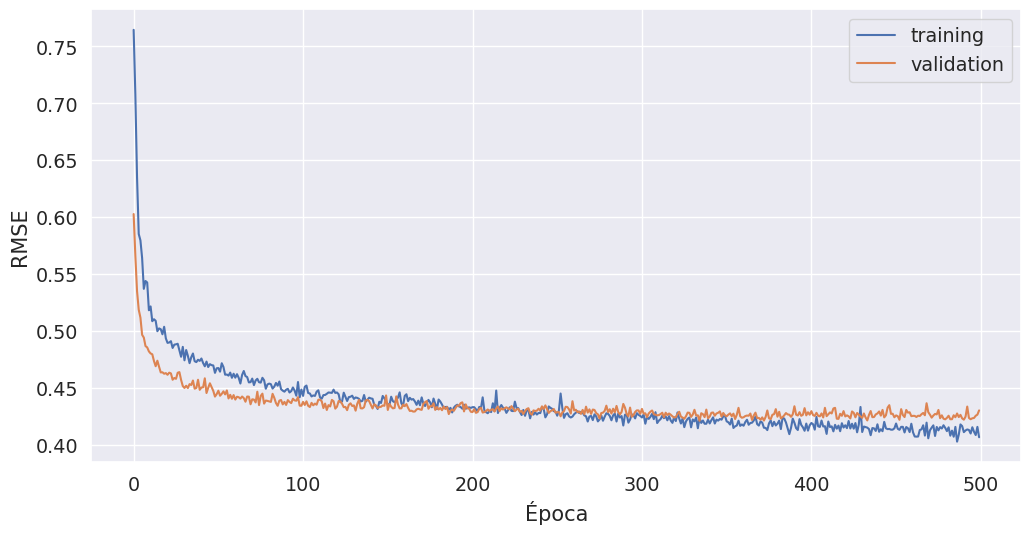

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 18s - loss: 1.2440

1536/6000 [======>.......................] - ETA: 0s - loss: 1.3862 

2912/6000 [=============>................] - ETA: 0s - loss: 1.2102

4448/6000 [=====================>........] - ETA: 0s - loss: 1.1591

5920/6000 [============================>.] - ETA: 0s - loss: 1.0741

6000/6000 [==============================] - 0s 66us/step - loss: 1.0703 - val_loss: 0.7645


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8575

1568/6000 [======>.......................] - ETA: 0s - loss: 1.0330

2816/6000 [=============>................] - ETA: 0s - loss: 0.8942

4320/6000 [====================>.........] - ETA: 0s - loss: 0.8308

5856/6000 [============================>.] - ETA: 0s - loss: 0.7879

6000/6000 [==============================] - 0s 49us/step - loss: 0.7831 - val_loss: 0.6370


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5233

1408/6000 [======>.......................] - ETA: 0s - loss: 0.5971

2912/6000 [=============>................] - ETA: 0s - loss: 0.5991

4160/6000 [===================>..........] - ETA: 0s - loss: 0.5899

5408/6000 [==========================>...] - ETA: 0s - loss: 0.5967

6000/6000 [==============================] - 0s 50us/step - loss: 0.6025 - val_loss: 0.5735


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.9179

1344/6000 [=====>........................] - ETA: 0s - loss: 0.5547

2720/6000 [============>.................] - ETA: 0s - loss: 0.5740

4224/6000 [====================>.........] - ETA: 0s - loss: 0.5692

5728/6000 [===========================>..] - ETA: 0s - loss: 0.5668

6000/6000 [==============================] - 0s 48us/step - loss: 0.5633 - val_loss: 0.5096


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5060

1472/6000 [======>.......................] - ETA: 0s - loss: 0.4898

2912/6000 [=============>................] - ETA: 0s - loss: 0.4868

4416/6000 [=====================>........] - ETA: 0s - loss: 0.4958

5888/6000 [============================>.] - ETA: 0s - loss: 0.4959

6000/6000 [==============================] - 0s 46us/step - loss: 0.4965 - val_loss: 0.4713


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3089

1408/6000 [======>.......................] - ETA: 0s - loss: 0.5501

2816/6000 [=============>................] - ETA: 0s - loss: 0.5083

4160/6000 [===================>..........] - ETA: 0s - loss: 0.4978

5696/6000 [===========================>..] - ETA: 0s - loss: 0.4958

6000/6000 [==============================] - 0s 49us/step - loss: 0.4926 - val_loss: 0.4581


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3251

1504/6000 [======>.......................] - ETA: 0s - loss: 0.4752

2432/6000 [===========>..................] - ETA: 0s - loss: 0.4552

3776/6000 [=================>............] - ETA: 0s - loss: 0.4761

5184/6000 [========================>.....] - ETA: 0s - loss: 0.4680

6000/6000 [==============================] - 0s 51us/step - loss: 0.4624 - val_loss: 0.4292


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4099

1536/6000 [======>.......................] - ETA: 0s - loss: 0.4632

3104/6000 [==============>...............] - ETA: 0s - loss: 0.4494

4672/6000 [======================>.......] - ETA: 0s - loss: 0.4344

6000/6000 [==============================] - 0s 44us/step - loss: 0.4303 - val_loss: 0.4236


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3166

1568/6000 [======>.......................] - ETA: 0s - loss: 0.4145

3104/6000 [==============>...............] - ETA: 0s - loss: 0.4158

4704/6000 [======================>.......] - ETA: 0s - loss: 0.4267

6000/6000 [==============================] - 0s 45us/step - loss: 0.4210 - val_loss: 0.4200


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4973

1600/6000 [=======>......................] - ETA: 0s - loss: 0.5339

3136/6000 [==============>...............] - ETA: 0s - loss: 0.4678

4576/6000 [=====================>........] - ETA: 0s - loss: 0.4514

5952/6000 [============================>.] - ETA: 0s - loss: 0.4404

6000/6000 [==============================] - 0s 47us/step - loss: 0.4404 - val_loss: 0.3905


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3236

1600/6000 [=======>......................] - ETA: 0s - loss: 0.4162

3136/6000 [==============>...............] - ETA: 0s - loss: 0.4011

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3937

6000/6000 [==============================] - 0s 45us/step - loss: 0.3919 - val_loss: 0.3751


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4794

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3732

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3630

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3666

5888/6000 [============================>.] - ETA: 0s - loss: 0.3751

6000/6000 [==============================] - 0s 46us/step - loss: 0.3750 - val_loss: 0.3688


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4315

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3747

3168/6000 [==============>...............] - ETA: 0s - loss: 0.3588

4704/6000 [======================>.......] - ETA: 0s - loss: 0.3638

6000/6000 [==============================] - 0s 44us/step - loss: 0.3686 - val_loss: 0.3563


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5363

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3631

3104/6000 [==============>...............] - ETA: 0s - loss: 0.3595

4704/6000 [======================>.......] - ETA: 0s - loss: 0.3636

6000/6000 [==============================] - 0s 44us/step - loss: 0.3634 - val_loss: 0.3535


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2593

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3627

3104/6000 [==============>...............] - ETA: 0s - loss: 0.3686

4608/6000 [======================>.......] - ETA: 0s - loss: 0.3549

6000/6000 [==============================] - 0s 44us/step - loss: 0.3508 - val_loss: 0.3496


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3327

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3493

4704/6000 [======================>.......] - ETA: 0s - loss: 0.3525

6000/6000 [==============================] - 0s 44us/step - loss: 0.3488 - val_loss: 0.3392


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3694

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3851

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3676

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3547

5984/6000 [============================>.] - ETA: 0s - loss: 0.3429

6000/6000 [==============================] - 0s 46us/step - loss: 0.3423 - val_loss: 0.3303


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2094

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3277

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3444

4160/6000 [===================>..........] - ETA: 0s - loss: 0.3366

5440/6000 [==========================>...] - ETA: 0s - loss: 0.3335

6000/6000 [==============================] - 0s 49us/step - loss: 0.3369 - val_loss: 0.3253


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6262

1312/6000 [=====>........................] - ETA: 0s - loss: 0.3228

2752/6000 [============>.................] - ETA: 0s - loss: 0.3188

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3357

5536/6000 [==========================>...] - ETA: 0s - loss: 0.3289

6000/6000 [==============================] - 0s 49us/step - loss: 0.3274 - val_loss: 0.3208


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6496

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3431

3200/6000 [===============>..............] - ETA: 0s - loss: 0.3313

4832/6000 [=======================>......] - ETA: 0s - loss: 0.3272

6000/6000 [==============================] - 0s 43us/step - loss: 0.3235 - val_loss: 0.3245


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2058

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3222

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3292

4608/6000 [======================>.......] - ETA: 0s - loss: 0.3232

6000/6000 [==============================] - 0s 44us/step - loss: 0.3214 - val_loss: 0.3132


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2580

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3117

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3163

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3116

6000/6000 [==============================] - 0s 45us/step - loss: 0.3160 - val_loss: 0.3088


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3984

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3065

2976/6000 [=============>................] - ETA: 0s - loss: 0.3136

4352/6000 [====================>.........] - ETA: 0s - loss: 0.3089

5888/6000 [============================>.] - ETA: 0s - loss: 0.3122

6000/6000 [==============================] - 0s 47us/step - loss: 0.3115 - val_loss: 0.3071


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2310

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3011

3200/6000 [===============>..............] - ETA: 0s - loss: 0.3044

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3064

5984/6000 [============================>.] - ETA: 0s - loss: 0.3088

6000/6000 [==============================] - 0s 47us/step - loss: 0.3088 - val_loss: 0.3089


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2864

3136/6000 [==============>...............] - ETA: 0s - loss: 0.3046

4736/6000 [======================>.......] - ETA: 0s - loss: 0.3042

6000/6000 [==============================] - 0s 45us/step - loss: 0.3039 - val_loss: 0.3030


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3284

3008/6000 [==============>...............] - ETA: 0s - loss: 0.3219

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3119

6000/6000 [==============================] - 0s 44us/step - loss: 0.3066 - val_loss: 0.3091


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3215

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2870

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2993

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3021

6000/6000 [==============================] - 0s 46us/step - loss: 0.3037 - val_loss: 0.3085


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3280

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3021

3200/6000 [===============>..............] - ETA: 0s - loss: 0.3004

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2964

6000/6000 [==============================] - 0s 45us/step - loss: 0.2989 - val_loss: 0.2987


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1741

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3089

3136/6000 [==============>...............] - ETA: 0s - loss: 0.3042

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2964

6000/6000 [==============================] - 0s 45us/step - loss: 0.2974 - val_loss: 0.2914


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2502

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3205

2912/6000 [=============>................] - ETA: 0s - loss: 0.3078

4480/6000 [=====================>........] - ETA: 0s - loss: 0.3028

6000/6000 [==============================] - 0s 45us/step - loss: 0.2969 - val_loss: 0.2995


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2779

3104/6000 [==============>...............] - ETA: 0s - loss: 0.3027

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2977

6000/6000 [==============================] - 0s 47us/step - loss: 0.2952 - val_loss: 0.3012


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3997

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2793

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2742

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2885

5920/6000 [============================>.] - ETA: 0s - loss: 0.2949

6000/6000 [==============================] - 0s 46us/step - loss: 0.2950 - val_loss: 0.3030


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3598

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2697

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2890

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2933

6000/6000 [==============================] - 0s 44us/step - loss: 0.2931 - val_loss: 0.2927


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2000

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2906

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2946

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2986

6000/6000 [==============================] - 0s 44us/step - loss: 0.2910 - val_loss: 0.2895


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1924

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2776

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2872

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2901

6000/6000 [==============================] - 0s 45us/step - loss: 0.2903 - val_loss: 0.2879


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2815

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2851

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2841

6000/6000 [==============================] - 0s 44us/step - loss: 0.2900 - val_loss: 0.2917


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3777

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2841

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2891

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2796

5920/6000 [============================>.] - ETA: 0s - loss: 0.2856

6000/6000 [==============================] - 0s 49us/step - loss: 0.2862 - val_loss: 0.2864


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2646

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2853

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2779

6000/6000 [==============================] - 0s 45us/step - loss: 0.2885 - val_loss: 0.2849


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2047

1344/6000 [=====>........................] - ETA: 0s - loss: 0.3204

2912/6000 [=============>................] - ETA: 0s - loss: 0.3111

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2949

5920/6000 [============================>.] - ETA: 0s - loss: 0.2867

6000/6000 [==============================] - 0s 47us/step - loss: 0.2867 - val_loss: 0.2907


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2426

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2822

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2883

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2850

6000/6000 [==============================] - 0s 44us/step - loss: 0.2890 - val_loss: 0.2847


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1693

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2927

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2856

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2917

6000/6000 [==============================] - 0s 45us/step - loss: 0.2843 - val_loss: 0.2788


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2847

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2767

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2836

6000/6000 [==============================] - 0s 43us/step - loss: 0.2855 - val_loss: 0.2833


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2442

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2667

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2841

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2811

6000/6000 [==============================] - 0s 43us/step - loss: 0.2841 - val_loss: 0.2844


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2848

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2770

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2814

6000/6000 [==============================] - 0s 45us/step - loss: 0.2821 - val_loss: 0.2895


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5991

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2872

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2770

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2813

6000/6000 [==============================] - 0s 44us/step - loss: 0.2824 - val_loss: 0.2793


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2240

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2605

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2681

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2752

6000/6000 [==============================] - 0s 44us/step - loss: 0.2834 - val_loss: 0.2784


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3032

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2905

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2822

5984/6000 [============================>.] - ETA: 0s - loss: 0.2804

6000/6000 [==============================] - 0s 45us/step - loss: 0.2802 - val_loss: 0.2769


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2824

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2735

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2805

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2821

6000/6000 [==============================] - 0s 48us/step - loss: 0.2817 - val_loss: 0.2817


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2730

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2830

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2714

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2722

5984/6000 [============================>.] - ETA: 0s - loss: 0.2786

6000/6000 [==============================] - 0s 52us/step - loss: 0.2786 - val_loss: 0.2907


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2514

2464/6000 [===========>..................] - ETA: 0s - loss: 0.2610

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2701

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2789

6000/6000 [==============================] - 0s 48us/step - loss: 0.2789 - val_loss: 0.2776


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2431

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2782

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2856

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2788

5920/6000 [============================>.] - ETA: 0s - loss: 0.2761

6000/6000 [==============================] - 0s 47us/step - loss: 0.2758 - val_loss: 0.2775


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2949

2976/6000 [=============>................] - ETA: 0s - loss: 0.2792

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2808

5824/6000 [============================>.] - ETA: 0s - loss: 0.2772

6000/6000 [==============================] - 0s 48us/step - loss: 0.2768 - val_loss: 0.2739


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2728

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2740

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2721

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2787

6000/6000 [==============================] - 0s 49us/step - loss: 0.2783 - val_loss: 0.2722


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2588

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2774

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2726

5888/6000 [============================>.] - ETA: 0s - loss: 0.2762

6000/6000 [==============================] - 0s 47us/step - loss: 0.2751 - val_loss: 0.2738


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2436

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3024

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2889

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2839

6000/6000 [==============================] - 0s 46us/step - loss: 0.2763 - val_loss: 0.2739


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3312

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2735

2880/6000 [=============>................] - ETA: 0s - loss: 0.2728

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2771

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 50us/step - loss: 0.2741 - val_loss: 0.2732


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2349

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2629

2912/6000 [=============>................] - ETA: 0s - loss: 0.2548

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2767

6000/6000 [==============================] - 0s 45us/step - loss: 0.2737 - val_loss: 0.2758


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3514

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3063

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2950

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2871

6000/6000 [==============================] - 0s 44us/step - loss: 0.2777 - val_loss: 0.2691


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1930

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2675

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2796

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2744

6000/6000 [==============================] - 0s 46us/step - loss: 0.2734 - val_loss: 0.2690


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2388

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2814

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2779

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2730

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 50us/step - loss: 0.2723 - val_loss: 0.2709


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2722

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2566

2880/6000 [=============>................] - ETA: 0s - loss: 0.2589

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2630

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2663

6000/6000 [==============================] - 0s 55us/step - loss: 0.2699 - val_loss: 0.2752


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2907

1152/6000 [====>.........................] - ETA: 0s - loss: 0.2653

2592/6000 [===========>..................] - ETA: 0s - loss: 0.2653

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2695

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2719

6000/6000 [==============================] - 0s 50us/step - loss: 0.2701 - val_loss: 0.2679


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1383

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2721

2944/6000 [=============>................] - ETA: 0s - loss: 0.2763

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2700

5920/6000 [============================>.] - ETA: 0s - loss: 0.2682

6000/6000 [==============================] - 0s 46us/step - loss: 0.2678 - val_loss: 0.2695


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3147

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2768

2624/6000 [============>.................] - ETA: 0s - loss: 0.2731

3552/6000 [================>.............] - ETA: 0s - loss: 0.2753

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2731

6000/6000 [==============================] - 0s 53us/step - loss: 0.2707 - val_loss: 0.2701


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2416

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2658

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2659

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2636

6000/6000 [==============================] - 0s 51us/step - loss: 0.2652 - val_loss: 0.2762


Epoch 66/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2493

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2733

2912/6000 [=============>................] - ETA: 0s - loss: 0.2662

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2705

5952/6000 [============================>.] - ETA: 0s - loss: 0.2722

6000/6000 [==============================] - 0s 48us/step - loss: 0.2713 - val_loss: 0.2681


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2622

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2617

2912/6000 [=============>................] - ETA: 0s - loss: 0.2668

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2677

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2636

6000/6000 [==============================] - 0s 49us/step - loss: 0.2654 - val_loss: 0.2652


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3679

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2629

2688/6000 [============>.................] - ETA: 0s - loss: 0.2650

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2597

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2649

6000/6000 [==============================] - 0s 49us/step - loss: 0.2672 - val_loss: 0.2664


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2442

2976/6000 [=============>................] - ETA: 0s - loss: 0.2691

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2655

5920/6000 [============================>.] - ETA: 0s - loss: 0.2671

6000/6000 [==============================] - 0s 47us/step - loss: 0.2662 - val_loss: 0.2675


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2372

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2540

2656/6000 [============>.................] - ETA: 0s - loss: 0.2583

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2656

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2661

6000/6000 [==============================] - 0s 47us/step - loss: 0.2648 - val_loss: 0.2687


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2624

2624/6000 [============>.................] - ETA: 0s - loss: 0.2525

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2622

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2655

6000/6000 [==============================] - 0s 47us/step - loss: 0.2641 - val_loss: 0.2735


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2637

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2685

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2666

6000/6000 [==============================] - 0s 45us/step - loss: 0.2649 - val_loss: 0.2898


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3304

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2634

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2711

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2692

6000/6000 [==============================] - 0s 46us/step - loss: 0.2644 - val_loss: 0.2652


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2774

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2694

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2674

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2662

6000/6000 [==============================] - 0s 48us/step - loss: 0.2648 - val_loss: 0.2784


Epoch 75/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2345

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2574

2816/6000 [=============>................] - ETA: 0s - loss: 0.2573

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2674

5952/6000 [============================>.] - ETA: 0s - loss: 0.2638

6000/6000 [==============================] - 0s 46us/step - loss: 0.2636 - val_loss: 0.2761


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2634

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2665

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2647

6000/6000 [==============================] - 0s 48us/step - loss: 0.2628 - val_loss: 0.2751


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2951

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2649

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2627

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2625

6000/6000 [==============================] - 0s 44us/step - loss: 0.2620 - val_loss: 0.2593


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3609

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2480

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2647

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2660

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2600

6000/6000 [==============================] - 0s 47us/step - loss: 0.2597 - val_loss: 0.2678


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2443

2944/6000 [=============>................] - ETA: 0s - loss: 0.2498

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2486

5984/6000 [============================>.] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 47us/step - loss: 0.2626 - val_loss: 0.2630


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2578

2944/6000 [=============>................] - ETA: 0s - loss: 0.2558

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2578

5984/6000 [============================>.] - ETA: 0s - loss: 0.2614

6000/6000 [==============================] - 0s 45us/step - loss: 0.2614 - val_loss: 0.2600


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4048

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2788

2848/6000 [=============>................] - ETA: 0s - loss: 0.2712

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2699

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2640

6000/6000 [==============================] - 0s 48us/step - loss: 0.2629 - val_loss: 0.2589


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2680

2592/6000 [===========>..................] - ETA: 0s - loss: 0.2645

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2625

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 48us/step - loss: 0.2617 - val_loss: 0.2593


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3979

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2677

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2596

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2548

6000/6000 [==============================] - 0s 44us/step - loss: 0.2587 - val_loss: 0.2589


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1238

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2706

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2715

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2793

6000/6000 [==============================] - 0s 44us/step - loss: 0.2708 - val_loss: 0.2611


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2433

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2570

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 47us/step - loss: 0.2632 - val_loss: 0.2633


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2674

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2478

2816/6000 [=============>................] - ETA: 0s - loss: 0.2512

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2604

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 47us/step - loss: 0.2624 - val_loss: 0.2591


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2744

2848/6000 [=============>................] - ETA: 0s - loss: 0.2665

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2603

5920/6000 [============================>.] - ETA: 0s - loss: 0.2606

6000/6000 [==============================] - 0s 46us/step - loss: 0.2602 - val_loss: 0.2607


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2772

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2583

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2549

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 44us/step - loss: 0.2577 - val_loss: 0.2567


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2533

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2611

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2609

6000/6000 [==============================] - 0s 44us/step - loss: 0.2569 - val_loss: 0.2617


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1880

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2480

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2597

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2558

6000/6000 [==============================] - 0s 45us/step - loss: 0.2562 - val_loss: 0.2554


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2609

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2583

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2578

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2526

6000/6000 [==============================] - 0s 44us/step - loss: 0.2578 - val_loss: 0.2546


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2431

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2564

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2508

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2531

6000/6000 [==============================] - 0s 44us/step - loss: 0.2550 - val_loss: 0.2555


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2566

2912/6000 [=============>................] - ETA: 0s - loss: 0.2517

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2513

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2584

6000/6000 [==============================] - 0s 50us/step - loss: 0.2585 - val_loss: 0.2563


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2498

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2447

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2507

6000/6000 [==============================] - 0s 44us/step - loss: 0.2559 - val_loss: 0.2583


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2419

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2553

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2569

6000/6000 [==============================] - 0s 44us/step - loss: 0.2556 - val_loss: 0.2541


Epoch 96/500
  32/6000 [..............................] - ETA: 2s - loss: 0.5744

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2592

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2598

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 45us/step - loss: 0.2524 - val_loss: 0.2628


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2460

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2589

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2551

6000/6000 [==============================] - 0s 44us/step - loss: 0.2539 - val_loss: 0.2648


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2577

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2695

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2600

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2535

6000/6000 [==============================] - 0s 46us/step - loss: 0.2534 - val_loss: 0.2537


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1216/6000 [=====>........................] - ETA: 0s - loss: 0.2448

2784/6000 [============>.................] - ETA: 0s - loss: 0.2545

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2596

5920/6000 [============================>.] - ETA: 0s - loss: 0.2550

6000/6000 [==============================] - 0s 46us/step - loss: 0.2558 - val_loss: 0.2521


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2686

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2717

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2694

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2560

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2517

6000/6000 [==============================] - 0s 47us/step - loss: 0.2535 - val_loss: 0.2593


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2553

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2563

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2507

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2499

6000/6000 [==============================] - 0s 51us/step - loss: 0.2527 - val_loss: 0.2659


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

 992/6000 [===>..........................] - ETA: 0s - loss: 0.2709

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2586

3712/6000 [=================>............] - ETA: 0s - loss: 0.2534

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2557

6000/6000 [==============================] - 0s 51us/step - loss: 0.2544 - val_loss: 0.2535


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2521

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2743

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2547

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2528

6000/6000 [==============================] - 0s 44us/step - loss: 0.2526 - val_loss: 0.2528


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2356

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2496

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2553

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 46us/step - loss: 0.2549 - val_loss: 0.2495


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1849

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2679

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2617

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2540

6000/6000 [==============================] - 0s 46us/step - loss: 0.2507 - val_loss: 0.2585


Epoch 106/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2449

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2565

2912/6000 [=============>................] - ETA: 0s - loss: 0.2455

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2494

5952/6000 [============================>.] - ETA: 0s - loss: 0.2523

6000/6000 [==============================] - 0s 47us/step - loss: 0.2524 - val_loss: 0.2506


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2381

2976/6000 [=============>................] - ETA: 0s - loss: 0.2492

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2542

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2550

6000/6000 [==============================] - 0s 47us/step - loss: 0.2536 - val_loss: 0.2551


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2543

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2416

2880/6000 [=============>................] - ETA: 0s - loss: 0.2477

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2458

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2536

6000/6000 [==============================] - 0s 49us/step - loss: 0.2522 - val_loss: 0.2526


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2722

2880/6000 [=============>................] - ETA: 0s - loss: 0.2674

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2631

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2522

6000/6000 [==============================] - 0s 49us/step - loss: 0.2511 - val_loss: 0.2528


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2049

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2473

2976/6000 [=============>................] - ETA: 0s - loss: 0.2437

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2544

5856/6000 [============================>.] - ETA: 0s - loss: 0.2518

6000/6000 [==============================] - 0s 48us/step - loss: 0.2505 - val_loss: 0.2493


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2465

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2274

2688/6000 [============>.................] - ETA: 0s - loss: 0.2400

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2451

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2460

6000/6000 [==============================] - 0s 49us/step - loss: 0.2517 - val_loss: 0.2462


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2500

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2441

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 45us/step - loss: 0.2462 - val_loss: 0.2489


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4222

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2434

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2522

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2516

6000/6000 [==============================] - 0s 46us/step - loss: 0.2476 - val_loss: 0.2482


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3872

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2525

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2470

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2474

6000/6000 [==============================] - 0s 43us/step - loss: 0.2500 - val_loss: 0.2562


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3026

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2815

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2494

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2543

6000/6000 [==============================] - 0s 45us/step - loss: 0.2504 - val_loss: 0.2523


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2335

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2472

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2506

6000/6000 [==============================] - 0s 45us/step - loss: 0.2490 - val_loss: 0.2492


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1935

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2458

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2447

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2463

6000/6000 [==============================] - 0s 45us/step - loss: 0.2503 - val_loss: 0.2572


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2945

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2433

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2423

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2487

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2483

6000/6000 [==============================] - 0s 46us/step - loss: 0.2476 - val_loss: 0.2475


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2509

1120/6000 [====>.........................] - ETA: 0s - loss: 0.2299

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2338

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2446

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2477

6000/6000 [==============================] - 0s 48us/step - loss: 0.2564 - val_loss: 0.2516


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2632

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2517

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2481

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2543

6000/6000 [==============================] - 0s 44us/step - loss: 0.2565 - val_loss: 0.2538


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1565

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2613

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2467

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2461

6000/6000 [==============================] - 0s 43us/step - loss: 0.2516 - val_loss: 0.2445


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1894

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2503

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2449

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 43us/step - loss: 0.2483 - val_loss: 0.2413


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2314

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2499

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2468

6000/6000 [==============================] - 0s 45us/step - loss: 0.2481 - val_loss: 0.2452


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2329

2976/6000 [=============>................] - ETA: 0s - loss: 0.2470

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2520

5824/6000 [============================>.] - ETA: 0s - loss: 0.2522

6000/6000 [==============================] - 0s 47us/step - loss: 0.2534 - val_loss: 0.2432


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2937

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2442

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2488

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 45us/step - loss: 0.2447 - val_loss: 0.2435


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4383

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2394

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2515

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2480

6000/6000 [==============================] - 0s 47us/step - loss: 0.2449 - val_loss: 0.2684


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2306

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2399

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 44us/step - loss: 0.2449 - val_loss: 0.2459


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2392

2944/6000 [=============>................] - ETA: 0s - loss: 0.2390

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2442

6000/6000 [==============================] - 0s 45us/step - loss: 0.2431 - val_loss: 0.2656


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2944

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2436

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2493

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2496

6000/6000 [==============================] - 0s 43us/step - loss: 0.2476 - val_loss: 0.2439


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2367

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2430

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2400

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 43us/step - loss: 0.2450 - val_loss: 0.2442


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7857

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2583

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2469

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2502

6000/6000 [==============================] - 0s 44us/step - loss: 0.2456 - val_loss: 0.2462


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2461

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2443

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 45us/step - loss: 0.2461 - val_loss: 0.2400


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2533

2976/6000 [=============>................] - ETA: 0s - loss: 0.2489

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2501

5984/6000 [============================>.] - ETA: 0s - loss: 0.2438

6000/6000 [==============================] - 0s 46us/step - loss: 0.2436 - val_loss: 0.2502


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3701

1152/6000 [====>.........................] - ETA: 0s - loss: 0.2501

2752/6000 [============>.................] - ETA: 0s - loss: 0.2576

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2424

5856/6000 [============================>.] - ETA: 0s - loss: 0.2416

6000/6000 [==============================] - 0s 46us/step - loss: 0.2419 - val_loss: 0.2405


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2475

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2565

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2545

6000/6000 [==============================] - 0s 44us/step - loss: 0.2458 - val_loss: 0.2535


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3730

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2453

2912/6000 [=============>................] - ETA: 0s - loss: 0.2433

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2459

5952/6000 [============================>.] - ETA: 0s - loss: 0.2421

6000/6000 [==============================] - 0s 50us/step - loss: 0.2426 - val_loss: 0.2506


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2343

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2422

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 45us/step - loss: 0.2420 - val_loss: 0.2485


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3603

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2494

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2374

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 45us/step - loss: 0.2452 - val_loss: 0.2411


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2446

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2368

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 45us/step - loss: 0.2447 - val_loss: 0.2427


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2513

2912/6000 [=============>................] - ETA: 0s - loss: 0.2504

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2468

6000/6000 [==============================] - 0s 45us/step - loss: 0.2433 - val_loss: 0.2441


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2479

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2632

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2495

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 44us/step - loss: 0.2419 - val_loss: 0.2424


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2449

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2443

6000/6000 [==============================] - 0s 44us/step - loss: 0.2407 - val_loss: 0.2543


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3114

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2376

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2356

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 44us/step - loss: 0.2435 - val_loss: 0.2400


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3511

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2256

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2390

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 43us/step - loss: 0.2406 - val_loss: 0.2427


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2692

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2254

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2471

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 42us/step - loss: 0.2416 - val_loss: 0.2415


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5084

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2517

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 42us/step - loss: 0.2416 - val_loss: 0.2513


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2524

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2475

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 43us/step - loss: 0.2459 - val_loss: 0.2443


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2420

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2310

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2356

5952/6000 [============================>.] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 46us/step - loss: 0.2422 - val_loss: 0.2397


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3258

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2481

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2482

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 43us/step - loss: 0.2439 - val_loss: 0.2669


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2817

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2450

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2420

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2434

6000/6000 [==============================] - 0s 43us/step - loss: 0.2410 - val_loss: 0.2417


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2373

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2318

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2350

6000/6000 [==============================] - 0s 44us/step - loss: 0.2396 - val_loss: 0.2724


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4554

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2269

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2386

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2404

6000/6000 [==============================] - 0s 43us/step - loss: 0.2423 - val_loss: 0.2420


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3032

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2665

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2630

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2517

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2443

6000/6000 [==============================] - 0s 48us/step - loss: 0.2389 - val_loss: 0.2495


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2414

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2423

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 44us/step - loss: 0.2402 - val_loss: 0.2454


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2511

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2508

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2425

6000/6000 [==============================] - 0s 44us/step - loss: 0.2411 - val_loss: 0.2409


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5577

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2399

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 46us/step - loss: 0.2393 - val_loss: 0.2456


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1912

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2398

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2386

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 44us/step - loss: 0.2381 - val_loss: 0.2519


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2433

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2409

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2433

6000/6000 [==============================] - 0s 44us/step - loss: 0.2409 - val_loss: 0.2513


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2337

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2446

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2484

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2472

6000/6000 [==============================] - 0s 47us/step - loss: 0.2431 - val_loss: 0.2679


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3042

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2388

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2349

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 44us/step - loss: 0.2404 - val_loss: 0.2394


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2660

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2315

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2368

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2426

6000/6000 [==============================] - 0s 46us/step - loss: 0.2403 - val_loss: 0.2424


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2269

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2482

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2368

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 45us/step - loss: 0.2386 - val_loss: 0.2393


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2183

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2375

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2324

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 44us/step - loss: 0.2404 - val_loss: 0.2368


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2323

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2248

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 44us/step - loss: 0.2379 - val_loss: 0.2401


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2378

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2334

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 45us/step - loss: 0.2389 - val_loss: 0.2523


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2397

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2445

6000/6000 [==============================] - 0s 44us/step - loss: 0.2437 - val_loss: 0.2407


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2249

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2312

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 43us/step - loss: 0.2369 - val_loss: 0.2377


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2642

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2435

2880/6000 [=============>................] - ETA: 0s - loss: 0.2321

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2320

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 48us/step - loss: 0.2380 - val_loss: 0.2419


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2545

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2351

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 44us/step - loss: 0.2392 - val_loss: 0.2414


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1717

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2227

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2237

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 45us/step - loss: 0.2374 - val_loss: 0.2387


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2515

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2221

2912/6000 [=============>................] - ETA: 0s - loss: 0.2194

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2344

5888/6000 [============================>.] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 47us/step - loss: 0.2381 - val_loss: 0.2368


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2671

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2252

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2385

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 45us/step - loss: 0.2414 - val_loss: 0.2519


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5023

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2368

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2343

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 44us/step - loss: 0.2368 - val_loss: 0.2464


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2505

2880/6000 [=============>................] - ETA: 0s - loss: 0.2323

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2383

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2364

6000/6000 [==============================] - 0s 48us/step - loss: 0.2386 - val_loss: 0.2431


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2422

2784/6000 [============>.................] - ETA: 0s - loss: 0.2402

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2389

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2367

6000/6000 [==============================] - 0s 47us/step - loss: 0.2365 - val_loss: 0.2374


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2536

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2196

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2269

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 44us/step - loss: 0.2366 - val_loss: 0.2416


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1981

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2589

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2545

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2471

6000/6000 [==============================] - 0s 45us/step - loss: 0.2440 - val_loss: 0.2424


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4388

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2418

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2363

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2366

6000/6000 [==============================] - 0s 43us/step - loss: 0.2367 - val_loss: 0.2355


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2527

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2370

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 45us/step - loss: 0.2359 - val_loss: 0.2515


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1152/6000 [====>.........................] - ETA: 0s - loss: 0.2472

2368/6000 [==========>...................] - ETA: 0s - loss: 0.2403

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2316

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 49us/step - loss: 0.2356 - val_loss: 0.2410


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2457

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2425

2880/6000 [=============>................] - ETA: 0s - loss: 0.2233

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2379

5952/6000 [============================>.] - ETA: 0s - loss: 0.2367

6000/6000 [==============================] - 0s 46us/step - loss: 0.2370 - val_loss: 0.2397


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5474

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2428

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2359

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 47us/step - loss: 0.2357 - val_loss: 0.2381


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5382

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2221

2944/6000 [=============>................] - ETA: 0s - loss: 0.2238

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 47us/step - loss: 0.2335 - val_loss: 0.2444


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2515

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2445

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2395

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 46us/step - loss: 0.2390 - val_loss: 0.2356


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2294

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2342

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 45us/step - loss: 0.2364 - val_loss: 0.2430


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2757

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2275

2784/6000 [============>.................] - ETA: 0s - loss: 0.2469

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2352

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2366

6000/6000 [==============================] - 0s 46us/step - loss: 0.2380 - val_loss: 0.2376


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2351

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2253

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2352

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2388

6000/6000 [==============================] - 0s 42us/step - loss: 0.2380 - val_loss: 0.2414


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2312

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 43us/step - loss: 0.2335 - val_loss: 0.2583


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2313

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2361

6000/6000 [==============================] - 0s 43us/step - loss: 0.2375 - val_loss: 0.2372


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2514

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2320

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2403

6000/6000 [==============================] - 0s 43us/step - loss: 0.2354 - val_loss: 0.2449


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3455

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2645

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2397

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2364

6000/6000 [==============================] - 0s 44us/step - loss: 0.2361 - val_loss: 0.2322


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2305

2976/6000 [=============>................] - ETA: 0s - loss: 0.2387

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2435

5984/6000 [============================>.] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 46us/step - loss: 0.2336 - val_loss: 0.2421


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4281

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2355

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2277

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 44us/step - loss: 0.2322 - val_loss: 0.2439


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2621

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2313

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2401

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 44us/step - loss: 0.2392 - val_loss: 0.2316


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2448

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2340

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 45us/step - loss: 0.2334 - val_loss: 0.2411


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2148

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2258

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 46us/step - loss: 0.2352 - val_loss: 0.2376


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2337

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2364

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2365

5984/6000 [============================>.] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 48us/step - loss: 0.2371 - val_loss: 0.2358


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2347

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2373

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 45us/step - loss: 0.2358 - val_loss: 0.2427


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2260

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2365

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 44us/step - loss: 0.2341 - val_loss: 0.2320


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2441

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2295

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2286

5952/6000 [============================>.] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 46us/step - loss: 0.2323 - val_loss: 0.2420


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3488

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2535

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2345

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 44us/step - loss: 0.2312 - val_loss: 0.2424


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2454

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2424

6000/6000 [==============================] - 0s 44us/step - loss: 0.2393 - val_loss: 0.2427


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3348

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2336

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2498

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 46us/step - loss: 0.2366 - val_loss: 0.2393


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2502

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2471

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 44us/step - loss: 0.2312 - val_loss: 0.2367


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2295

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2386

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 43us/step - loss: 0.2342 - val_loss: 0.2672


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2193

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2242

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 43us/step - loss: 0.2325 - val_loss: 0.2300


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1761

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2334

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2263

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2316

6000/6000 [==============================] - 0s 44us/step - loss: 0.2342 - val_loss: 0.2406


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2333

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2302

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 47us/step - loss: 0.2329 - val_loss: 0.2465


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6038

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2564

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2389

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 45us/step - loss: 0.2371 - val_loss: 0.2434


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1693

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2517

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2468

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 44us/step - loss: 0.2378 - val_loss: 0.2307


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2190

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2251

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2332

6000/6000 [==============================] - 0s 44us/step - loss: 0.2328 - val_loss: 0.2422


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2506

2976/6000 [=============>................] - ETA: 0s - loss: 0.2362

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2359

5952/6000 [============================>.] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 47us/step - loss: 0.2338 - val_loss: 0.2505


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3401

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2370

2368/6000 [==========>...................] - ETA: 0s - loss: 0.2444

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2453

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 50us/step - loss: 0.2390 - val_loss: 0.2398


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3210

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2235

2976/6000 [=============>................] - ETA: 0s - loss: 0.2301

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 47us/step - loss: 0.2321 - val_loss: 0.2315


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2223

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2315

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 46us/step - loss: 0.2362 - val_loss: 0.2469


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2188

2656/6000 [============>.................] - ETA: 0s - loss: 0.2242

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2217

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 51us/step - loss: 0.2297 - val_loss: 0.2442


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3697

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2330

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2409

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 44us/step - loss: 0.2311 - val_loss: 0.2302


Epoch 218/500
  32/6000 [..............................] - ETA: 1s - loss: 0.4723

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2166

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2223

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 45us/step - loss: 0.2334 - val_loss: 0.2421


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1246

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2497

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2391

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2336

6000/6000 [==============================] - 0s 45us/step - loss: 0.2342 - val_loss: 0.2371


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2673

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2460

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2328

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 45us/step - loss: 0.2305 - val_loss: 0.2543


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3792

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2180

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2366

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2322

5984/6000 [============================>.] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 47us/step - loss: 0.2309 - val_loss: 0.2315


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3028

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2525

2560/6000 [===========>..................] - ETA: 0s - loss: 0.2455

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2378

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 48us/step - loss: 0.2352 - val_loss: 0.2318


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2700

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2153

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2229

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2260

5856/6000 [============================>.] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 46us/step - loss: 0.2326 - val_loss: 0.2305


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1032

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2242

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2252

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 44us/step - loss: 0.2317 - val_loss: 0.2333


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2355

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2229

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 44us/step - loss: 0.2325 - val_loss: 0.2420


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2445

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2395

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2401

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 48us/step - loss: 0.2347 - val_loss: 0.2302


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2277

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2358

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2355

6000/6000 [==============================] - 0s 43us/step - loss: 0.2342 - val_loss: 0.2266


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2436

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2335

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2190

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2263

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 49us/step - loss: 0.2329 - val_loss: 0.2456


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2231

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 43us/step - loss: 0.2318 - val_loss: 0.2336


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2630

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2192

2976/6000 [=============>................] - ETA: 0s - loss: 0.2390

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 48us/step - loss: 0.2323 - val_loss: 0.2324


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3428

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2403

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2222

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 45us/step - loss: 0.2288 - val_loss: 0.2296


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3561

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2189

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2298

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2311

5888/6000 [============================>.] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 46us/step - loss: 0.2306 - val_loss: 0.2309


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1927

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2477

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2390

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 44us/step - loss: 0.2405 - val_loss: 0.2434


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2168

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2352

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 46us/step - loss: 0.2321 - val_loss: 0.2405


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3251

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2339

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 46us/step - loss: 0.2314 - val_loss: 0.2291


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2848

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2147

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2217

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 44us/step - loss: 0.2304 - val_loss: 0.2308


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2412

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2353

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 44us/step - loss: 0.2296 - val_loss: 0.2262


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2111

2880/6000 [=============>................] - ETA: 0s - loss: 0.2213

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 47us/step - loss: 0.2302 - val_loss: 0.2373


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2356

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 45us/step - loss: 0.2276 - val_loss: 0.2377


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2948

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2323

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 43us/step - loss: 0.2317 - val_loss: 0.2291


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3321

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2239

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2228

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 45us/step - loss: 0.2278 - val_loss: 0.2413


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2240

2976/6000 [=============>................] - ETA: 0s - loss: 0.2363

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2344

5984/6000 [============================>.] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 45us/step - loss: 0.2324 - val_loss: 0.2379


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3678

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2364

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2380

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 44us/step - loss: 0.2293 - val_loss: 0.2410


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1234

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2355

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2337

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 44us/step - loss: 0.2305 - val_loss: 0.2381


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3464

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2314

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2312

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 45us/step - loss: 0.2317 - val_loss: 0.2567


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1189

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2273

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2383

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 45us/step - loss: 0.2294 - val_loss: 0.2362


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2481

2880/6000 [=============>................] - ETA: 0s - loss: 0.2433

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2381

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 49us/step - loss: 0.2322 - val_loss: 0.2338


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2404

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2355

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 47us/step - loss: 0.2297 - val_loss: 0.2301


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5112

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2595

2976/6000 [=============>................] - ETA: 0s - loss: 0.2412

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 45us/step - loss: 0.2300 - val_loss: 0.2385


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2256

2912/6000 [=============>................] - ETA: 0s - loss: 0.2282

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 46us/step - loss: 0.2284 - val_loss: 0.2396


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1578

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2128

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2134

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 43us/step - loss: 0.2291 - val_loss: 0.2482


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3145

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2268

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 45us/step - loss: 0.2283 - val_loss: 0.2270


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2621

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2295

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2324

5888/6000 [============================>.] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 46us/step - loss: 0.2338 - val_loss: 0.2365


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2465

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2185

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2271

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 43us/step - loss: 0.2304 - val_loss: 0.2379


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2131

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2340

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2341

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 44us/step - loss: 0.2289 - val_loss: 0.2313


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2525

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2386

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 44us/step - loss: 0.2325 - val_loss: 0.2342


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2191

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2229

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2247

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 46us/step - loss: 0.2310 - val_loss: 0.2346


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1957

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2280

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2289

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 45us/step - loss: 0.2295 - val_loss: 0.2316


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1088/6000 [====>.........................] - ETA: 0s - loss: 0.2284

2720/6000 [============>.................] - ETA: 0s - loss: 0.2222

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2298

5824/6000 [============================>.] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 47us/step - loss: 0.2310 - val_loss: 0.2343


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2841

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2336

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2370

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 43us/step - loss: 0.2300 - val_loss: 0.2268


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2719

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2376

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2444

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 44us/step - loss: 0.2317 - val_loss: 0.2282


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2221

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2200

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 44us/step - loss: 0.2285 - val_loss: 0.2455


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2251

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2167

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2184

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 45us/step - loss: 0.2282 - val_loss: 0.2305


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2956

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2164

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2321

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 44us/step - loss: 0.2279 - val_loss: 0.2303


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3666

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2115

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2353

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 45us/step - loss: 0.2296 - val_loss: 0.2475


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2601

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2129

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2269

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 45us/step - loss: 0.2284 - val_loss: 0.2317


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2180

2976/6000 [=============>................] - ETA: 0s - loss: 0.2202

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2304

5824/6000 [============================>.] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 48us/step - loss: 0.2293 - val_loss: 0.2291


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1024/6000 [====>.........................] - ETA: 0s - loss: 0.2488

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2306

3712/6000 [=================>............] - ETA: 0s - loss: 0.2286

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2400

6000/6000 [==============================] - 0s 51us/step - loss: 0.2338 - val_loss: 0.2409


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2479

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2353

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2338

5824/6000 [============================>.] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 49us/step - loss: 0.2320 - val_loss: 0.2383


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2432

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2433

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2361

6000/6000 [==============================] - 0s 46us/step - loss: 0.2302 - val_loss: 0.2325


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1234

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2237

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2260

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2229

5984/6000 [============================>.] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 45us/step - loss: 0.2272 - val_loss: 0.2303


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2474

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2287

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 44us/step - loss: 0.2274 - val_loss: 0.2320


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3465

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2230

2976/6000 [=============>................] - ETA: 0s - loss: 0.2219

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2336

5920/6000 [============================>.] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 46us/step - loss: 0.2299 - val_loss: 0.2317


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2590

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2365

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2305

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2308 - val_loss: 0.2279


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1670

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2226

2848/6000 [=============>................] - ETA: 0s - loss: 0.2359

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 45us/step - loss: 0.2264 - val_loss: 0.2476


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2135

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2131

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 44us/step - loss: 0.2283 - val_loss: 0.2367


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4481

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2485

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2248

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 44us/step - loss: 0.2308 - val_loss: 0.2247


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4610

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2387

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 43us/step - loss: 0.2298 - val_loss: 0.2352


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1980

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2271

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2343

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 44us/step - loss: 0.2264 - val_loss: 0.2265


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2254

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2379

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 44us/step - loss: 0.2300 - val_loss: 0.2271


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2520

2976/6000 [=============>................] - ETA: 0s - loss: 0.2322

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 45us/step - loss: 0.2286 - val_loss: 0.2326


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2493

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2516

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2368

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 46us/step - loss: 0.2281 - val_loss: 0.2285


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6521

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2447

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2329

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 45us/step - loss: 0.2273 - val_loss: 0.2277


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2769

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2217

2976/6000 [=============>................] - ETA: 0s - loss: 0.2182

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 45us/step - loss: 0.2293 - val_loss: 0.2386


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2773

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2306

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2400

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 44us/step - loss: 0.2296 - val_loss: 0.2343


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2576

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2377

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2292

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2318

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 49us/step - loss: 0.2285 - val_loss: 0.2341


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2069

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2243

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2215

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 45us/step - loss: 0.2274 - val_loss: 0.2287


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2216

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2249

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 45us/step - loss: 0.2280 - val_loss: 0.2260


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0765

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2295

2720/6000 [============>.................] - ETA: 0s - loss: 0.2396

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2335

5824/6000 [============================>.] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 47us/step - loss: 0.2270 - val_loss: 0.2320


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

 992/6000 [===>..........................] - ETA: 0s - loss: 0.2240

2432/6000 [===========>..................] - ETA: 0s - loss: 0.2269

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2228

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 48us/step - loss: 0.2270 - val_loss: 0.2304


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2202

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2257

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 45us/step - loss: 0.2291 - val_loss: 0.2396


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2597

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2125

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2198

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 45us/step - loss: 0.2265 - val_loss: 0.2315


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2086

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2173

2976/6000 [=============>................] - ETA: 0s - loss: 0.2361

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 45us/step - loss: 0.2267 - val_loss: 0.2387


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2272

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2188

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2220

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 47us/step - loss: 0.2268 - val_loss: 0.2386


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1056/6000 [====>.........................] - ETA: 0s - loss: 0.2223

2656/6000 [============>.................] - ETA: 0s - loss: 0.2186

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2325

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 49us/step - loss: 0.2317 - val_loss: 0.2303


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2256

2976/6000 [=============>................] - ETA: 0s - loss: 0.2238

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2233

5888/6000 [============================>.] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 46us/step - loss: 0.2261 - val_loss: 0.2415


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2421

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2114

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2124

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2174

5920/6000 [============================>.] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 46us/step - loss: 0.2272 - val_loss: 0.2258


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2003

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2194

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 43us/step - loss: 0.2292 - val_loss: 0.2364


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2411

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2106

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2282

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 44us/step - loss: 0.2283 - val_loss: 0.2357


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2890

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2295

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2177

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 44us/step - loss: 0.2270 - val_loss: 0.2373


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2423

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2365

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2324

6000/6000 [==============================] - 0s 43us/step - loss: 0.2294 - val_loss: 0.2479


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2044

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 43us/step - loss: 0.2262 - val_loss: 0.2509


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3439

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2261

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2276 - val_loss: 0.2258


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2159

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2147

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 44us/step - loss: 0.2272 - val_loss: 0.2278


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3186

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2427

2880/6000 [=============>................] - ETA: 0s - loss: 0.2350

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 45us/step - loss: 0.2271 - val_loss: 0.2253


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1955

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2422

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2300

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 43us/step - loss: 0.2282 - val_loss: 0.2360


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2599

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2367

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 43us/step - loss: 0.2313 - val_loss: 0.2288


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1674

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2291

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2246

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 43us/step - loss: 0.2255 - val_loss: 0.2419


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2344

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2215

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2934


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2203

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2305

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2318


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2547

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2339

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 43us/step - loss: 0.2243 - val_loss: 0.2512


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3037

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2240

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 47us/step - loss: 0.2271 - val_loss: 0.2272


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2173

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2192

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 46us/step - loss: 0.2241 - val_loss: 0.2298


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2069

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2492

2848/6000 [=============>................] - ETA: 0s - loss: 0.2354

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2269

5920/6000 [============================>.] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 46us/step - loss: 0.2260 - val_loss: 0.2251


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2223

2912/6000 [=============>................] - ETA: 0s - loss: 0.2167

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2226

5952/6000 [============================>.] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 46us/step - loss: 0.2247 - val_loss: 0.2268


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2387

2944/6000 [=============>................] - ETA: 0s - loss: 0.2298

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 45us/step - loss: 0.2242 - val_loss: 0.2576


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2347

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2304

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 43us/step - loss: 0.2273 - val_loss: 0.2387


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2257

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 45us/step - loss: 0.2295 - val_loss: 0.2606


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2515

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2277

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2273

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 49us/step - loss: 0.2281 - val_loss: 0.2290


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

1120/6000 [====>.........................] - ETA: 0s - loss: 0.2074

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2298

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2250

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 48us/step - loss: 0.2276 - val_loss: 0.2338


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5533

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2345

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2239

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 47us/step - loss: 0.2269 - val_loss: 0.2292


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2332

2848/6000 [=============>................] - ETA: 0s - loss: 0.2262

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 46us/step - loss: 0.2261 - val_loss: 0.2663


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2067

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2108

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2197

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 44us/step - loss: 0.2259 - val_loss: 0.2242


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2332

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2244

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 46us/step - loss: 0.2275 - val_loss: 0.2318


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2301

2944/6000 [=============>................] - ETA: 0s - loss: 0.2365

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 45us/step - loss: 0.2233 - val_loss: 0.2260


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2357

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2273

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2336

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 43us/step - loss: 0.2291 - val_loss: 0.2311


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4918

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2437

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2367

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 46us/step - loss: 0.2264 - val_loss: 0.2308


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2137

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2346

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2191

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 44us/step - loss: 0.2255 - val_loss: 0.2276


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2027

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2190

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 45us/step - loss: 0.2238 - val_loss: 0.2276


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2191

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2255

5984/6000 [============================>.] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 47us/step - loss: 0.2262 - val_loss: 0.2371


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1520

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2336

2976/6000 [=============>................] - ETA: 0s - loss: 0.2281

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2229

5824/6000 [============================>.] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 48us/step - loss: 0.2238 - val_loss: 0.2295


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2408

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2069

2912/6000 [=============>................] - ETA: 0s - loss: 0.2195

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 45us/step - loss: 0.2241 - val_loss: 0.2535


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2690

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2519

2848/6000 [=============>................] - ETA: 0s - loss: 0.2407

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2324

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 49us/step - loss: 0.2269 - val_loss: 0.2390


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2219

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2189

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 45us/step - loss: 0.2250 - val_loss: 0.2248


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2301

2944/6000 [=============>................] - ETA: 0s - loss: 0.2183

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2201

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 49us/step - loss: 0.2307 - val_loss: 0.2464


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2691

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2522

2944/6000 [=============>................] - ETA: 0s - loss: 0.2450

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2355

6000/6000 [==============================] - 0s 46us/step - loss: 0.2265 - val_loss: 0.2505


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2493

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2457

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2341

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2291

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 50us/step - loss: 0.2276 - val_loss: 0.2365


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1631

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2232

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2257

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 44us/step - loss: 0.2246 - val_loss: 0.2258


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2528

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2362

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 46us/step - loss: 0.2247 - val_loss: 0.2321


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2175

2688/6000 [============>.................] - ETA: 0s - loss: 0.2362

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2329

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 49us/step - loss: 0.2278 - val_loss: 0.2281


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2764

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2388

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2256

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2203

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 48us/step - loss: 0.2265 - val_loss: 0.2265


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2211

2784/6000 [============>.................] - ETA: 0s - loss: 0.2193

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2264

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 48us/step - loss: 0.2226 - val_loss: 0.2277


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

1184/6000 [====>.........................] - ETA: 0s - loss: 0.2156

2688/6000 [============>.................] - ETA: 0s - loss: 0.2240

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2235

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 49us/step - loss: 0.2280 - val_loss: 0.2375


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2305

2848/6000 [=============>................] - ETA: 0s - loss: 0.2345

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 45us/step - loss: 0.2274 - val_loss: 0.2529


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1839

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2385

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2300

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 43us/step - loss: 0.2269 - val_loss: 0.2352


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2763

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2196

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2276

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 44us/step - loss: 0.2295 - val_loss: 0.2348


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2483

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2326

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 45us/step - loss: 0.2281 - val_loss: 0.2393


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2399

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2610

2656/6000 [============>.................] - ETA: 0s - loss: 0.2456

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2362

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 48us/step - loss: 0.2294 - val_loss: 0.2373


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4464

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2234

2912/6000 [=============>................] - ETA: 0s - loss: 0.2182

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2226

5984/6000 [============================>.] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 46us/step - loss: 0.2226 - val_loss: 0.2452


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2243

2848/6000 [=============>................] - ETA: 0s - loss: 0.2337

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2269

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 49us/step - loss: 0.2312 - val_loss: 0.2249


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2041

2976/6000 [=============>................] - ETA: 0s - loss: 0.2212

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2265

5888/6000 [============================>.] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 46us/step - loss: 0.2238 - val_loss: 0.2413


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2774

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2512

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2434

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 43us/step - loss: 0.2284 - val_loss: 0.2299


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2308

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2172

2912/6000 [=============>................] - ETA: 0s - loss: 0.2371

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 45us/step - loss: 0.2296 - val_loss: 0.2289


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2754

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2254

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 48us/step - loss: 0.2250 - val_loss: 0.2434


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2227

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2149

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2198

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 46us/step - loss: 0.2261 - val_loss: 0.2255


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2230

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2165

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 45us/step - loss: 0.2264 - val_loss: 0.2238


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2242

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2507

2816/6000 [=============>................] - ETA: 0s - loss: 0.2381

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2301

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 46us/step - loss: 0.2272 - val_loss: 0.2257


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2595

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2419

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 47us/step - loss: 0.2285 - val_loss: 0.2276


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3450

1248/6000 [=====>........................] - ETA: 0s - loss: 0.2188

2464/6000 [===========>..................] - ETA: 0s - loss: 0.2252

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2238

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 49us/step - loss: 0.2262 - val_loss: 0.2276


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2065

2848/6000 [=============>................] - ETA: 0s - loss: 0.2221

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2245

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 48us/step - loss: 0.2271 - val_loss: 0.2287


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2259

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2052

2944/6000 [=============>................] - ETA: 0s - loss: 0.2134

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2149

6000/6000 [==============================] - 0s 45us/step - loss: 0.2225 - val_loss: 0.2317


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2278

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2192

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 42us/step - loss: 0.2274 - val_loss: 0.2384


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2618

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2358

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 45us/step - loss: 0.2229 - val_loss: 0.2361


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2238

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2290

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2276

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 43us/step - loss: 0.2228 - val_loss: 0.2383


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2199

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 44us/step - loss: 0.2239 - val_loss: 0.2331


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1796

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1963

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2184

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 42us/step - loss: 0.2271 - val_loss: 0.2644


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2491

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2345

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 43us/step - loss: 0.2243 - val_loss: 0.2377


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3381

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2038

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2179

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 44us/step - loss: 0.2225 - val_loss: 0.2356


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2177

2816/6000 [=============>................] - ETA: 0s - loss: 0.2306

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2318

5920/6000 [============================>.] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 47us/step - loss: 0.2250 - val_loss: 0.2435


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2251

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2268

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 44us/step - loss: 0.2231 - val_loss: 0.2242


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2358

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2121

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2202

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 48us/step - loss: 0.2251 - val_loss: 0.2311


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2432

2816/6000 [=============>................] - ETA: 0s - loss: 0.2303

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2184

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 48us/step - loss: 0.2219 - val_loss: 0.2447


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2569

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2375

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2327

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 47us/step - loss: 0.2242 - val_loss: 0.2255


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2469

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2139

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2250

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 44us/step - loss: 0.2222 - val_loss: 0.2307


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2275

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2339

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 46us/step - loss: 0.2231 - val_loss: 0.2298


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3352

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2097

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2242

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 47us/step - loss: 0.2230 - val_loss: 0.2249


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2418

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2249

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2237

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2226

5888/6000 [============================>.] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 47us/step - loss: 0.2224 - val_loss: 0.2295


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2552

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2235

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2247

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 45us/step - loss: 0.2246 - val_loss: 0.2355


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2972

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2192

2912/6000 [=============>................] - ETA: 0s - loss: 0.2146

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2183

5984/6000 [============================>.] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 46us/step - loss: 0.2240 - val_loss: 0.2270


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1880

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2300

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2202

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 48us/step - loss: 0.2271 - val_loss: 0.2382


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2287

2656/6000 [============>.................] - ETA: 0s - loss: 0.2334

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2377

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 49us/step - loss: 0.2293 - val_loss: 0.2311


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3065

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2206

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2217

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 45us/step - loss: 0.2231 - val_loss: 0.2344


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2170

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 43us/step - loss: 0.2274 - val_loss: 0.2295


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2205

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2296

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 43us/step - loss: 0.2217 - val_loss: 0.2304


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1916

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2293

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 44us/step - loss: 0.2226 - val_loss: 0.2272


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1884

1280/6000 [=====>........................] - ETA: 0s - loss: 0.2178

2880/6000 [=============>................] - ETA: 0s - loss: 0.2204

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2263

5984/6000 [============================>.] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 47us/step - loss: 0.2259 - val_loss: 0.2294


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2208

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 44us/step - loss: 0.2260 - val_loss: 0.2307


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3432

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2049

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2239

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 43us/step - loss: 0.2231 - val_loss: 0.2271


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3998

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2179

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2203

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 47us/step - loss: 0.2221 - val_loss: 0.2288


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2211

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1971

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2153

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 44us/step - loss: 0.2228 - val_loss: 0.2332


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2148

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2131

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 44us/step - loss: 0.2225 - val_loss: 0.2407


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2511

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2305

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 44us/step - loss: 0.2203 - val_loss: 0.2280


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2225

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2409

2944/6000 [=============>................] - ETA: 0s - loss: 0.2269

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 46us/step - loss: 0.2262 - val_loss: 0.2287


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2059

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2188

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 48us/step - loss: 0.2248 - val_loss: 0.2235


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2090

2944/6000 [=============>................] - ETA: 0s - loss: 0.2219

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 44us/step - loss: 0.2230 - val_loss: 0.2295


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2325

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2209

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 44us/step - loss: 0.2240 - val_loss: 0.2239


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2042

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2275

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 45us/step - loss: 0.2260 - val_loss: 0.2245


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2196

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2156

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 44us/step - loss: 0.2216 - val_loss: 0.2384


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2179

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2224

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 43us/step - loss: 0.2237 - val_loss: 0.2218


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4134

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2152

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2186

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 44us/step - loss: 0.2249 - val_loss: 0.2255


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3288

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2143

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2194

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 46us/step - loss: 0.2219 - val_loss: 0.2347


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2256

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2385

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2216

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 45us/step - loss: 0.2233 - val_loss: 0.2273


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2209

2848/6000 [=============>................] - ETA: 0s - loss: 0.2188

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2243

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 47us/step - loss: 0.2235 - val_loss: 0.2286


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2133

2944/6000 [=============>................] - ETA: 0s - loss: 0.2303

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2281

5824/6000 [============================>.] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 46us/step - loss: 0.2277 - val_loss: 0.2423


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2218

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 47us/step - loss: 0.2222 - val_loss: 0.2281


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2168

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2277

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2225

5856/6000 [============================>.] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 47us/step - loss: 0.2223 - val_loss: 0.2286


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1329

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2013

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2144

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 44us/step - loss: 0.2235 - val_loss: 0.2260


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2362

2944/6000 [=============>................] - ETA: 0s - loss: 0.2278

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2243

5824/6000 [============================>.] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 47us/step - loss: 0.2215 - val_loss: 0.2289


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2214

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2365

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 43us/step - loss: 0.2298 - val_loss: 0.2308


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2167

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2224

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2228

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 45us/step - loss: 0.2256 - val_loss: 0.2387


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3232

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2492

2976/6000 [=============>................] - ETA: 0s - loss: 0.2413

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 51us/step - loss: 0.2277 - val_loss: 0.2233


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2410

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2237

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2252

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 44us/step - loss: 0.2259 - val_loss: 0.2292


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2211

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 44us/step - loss: 0.2224 - val_loss: 0.2258


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3650

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2267

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2260

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 45us/step - loss: 0.2213 - val_loss: 0.2378


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1565

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2078

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2195

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2230

5888/6000 [============================>.] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 46us/step - loss: 0.2244 - val_loss: 0.2289


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4551

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2375

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2296

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 44us/step - loss: 0.2262 - val_loss: 0.2262


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2128

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2210

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 45us/step - loss: 0.2207 - val_loss: 0.2287


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2142

2944/6000 [=============>................] - ETA: 0s - loss: 0.2169

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 46us/step - loss: 0.2234 - val_loss: 0.2255


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2190

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2318

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 43us/step - loss: 0.2252 - val_loss: 0.2262


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2014

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2201

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 44us/step - loss: 0.2192 - val_loss: 0.2274


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1607

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2202

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 43us/step - loss: 0.2225 - val_loss: 0.2281


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2274

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2317

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2252 - val_loss: 0.2367


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2043

2656/6000 [============>.................] - ETA: 0s - loss: 0.2117

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2240

5856/6000 [============================>.] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 46us/step - loss: 0.2235 - val_loss: 0.2279


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3069

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2200

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2228

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 44us/step - loss: 0.2224 - val_loss: 0.2296


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3538

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2230

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2185

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 43us/step - loss: 0.2206 - val_loss: 0.2248


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2118

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2248

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 44us/step - loss: 0.2264 - val_loss: 0.2308


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2109

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2163

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2208

5856/6000 [============================>.] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 46us/step - loss: 0.2208 - val_loss: 0.2268


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3373

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2207

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2180

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 43us/step - loss: 0.2246 - val_loss: 0.2349


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1400

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2212

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2177

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 44us/step - loss: 0.2235 - val_loss: 0.2411


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3097

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2027

2656/6000 [============>.................] - ETA: 0s - loss: 0.2155

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2178

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 51us/step - loss: 0.2235 - val_loss: 0.2297


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

1184/6000 [====>.........................] - ETA: 0s - loss: 0.2179

2592/6000 [===========>..................] - ETA: 0s - loss: 0.2229

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2292

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 47us/step - loss: 0.2217 - val_loss: 0.2202


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2326

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2207

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 42us/step - loss: 0.2256 - val_loss: 0.2404


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2301

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 44us/step - loss: 0.2258 - val_loss: 0.2560


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1873

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2258

2880/6000 [=============>................] - ETA: 0s - loss: 0.2250

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2243

5952/6000 [============================>.] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 46us/step - loss: 0.2231 - val_loss: 0.2233


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2135

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2152

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 45us/step - loss: 0.2225 - val_loss: 0.2331


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2319

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2012

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2066

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 44us/step - loss: 0.2201 - val_loss: 0.2280


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2292

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2293

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 44us/step - loss: 0.2242 - val_loss: 0.2281


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2212

2848/6000 [=============>................] - ETA: 0s - loss: 0.2234

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2244

5920/6000 [============================>.] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 45us/step - loss: 0.2209 - val_loss: 0.2244


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2000

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2094

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 42us/step - loss: 0.2208 - val_loss: 0.2324


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2694

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2203

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2226

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 44us/step - loss: 0.2205 - val_loss: 0.2234


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2341

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2177

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2295

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 46us/step - loss: 0.2239 - val_loss: 0.2381


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2390

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2326

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 44us/step - loss: 0.2201 - val_loss: 0.2221


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2230

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2142

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 45us/step - loss: 0.2193 - val_loss: 0.2267


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2441

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2348

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2230

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 43us/step - loss: 0.2223 - val_loss: 0.2365


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2114

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2253

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 45us/step - loss: 0.2227 - val_loss: 0.2553


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2259

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2329

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2255

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2238

5856/6000 [============================>.] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 47us/step - loss: 0.2230 - val_loss: 0.2220


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2253

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2199

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 44us/step - loss: 0.2199 - val_loss: 0.2381


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2072

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2122

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 43us/step - loss: 0.2241 - val_loss: 0.2259


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2552

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2258

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 45us/step - loss: 0.2252 - val_loss: 0.2271


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2132

2848/6000 [=============>................] - ETA: 0s - loss: 0.2116

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2164

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 47us/step - loss: 0.2190 - val_loss: 0.2311


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2480

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2108

2976/6000 [=============>................] - ETA: 0s - loss: 0.2302

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 44us/step - loss: 0.2221 - val_loss: 0.2257


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2108

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2215

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 44us/step - loss: 0.2203 - val_loss: 0.2246


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2295

2944/6000 [=============>................] - ETA: 0s - loss: 0.2135

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2208

5824/6000 [============================>.] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 47us/step - loss: 0.2215 - val_loss: 0.2246


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3549

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2145

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 45us/step - loss: 0.2199 - val_loss: 0.2346


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2484

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2193

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2206

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 44us/step - loss: 0.2216 - val_loss: 0.2314


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2346

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2210

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2268

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 43us/step - loss: 0.2231 - val_loss: 0.2324


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2278

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2186

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 44us/step - loss: 0.2214 - val_loss: 0.2210


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2146

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2302

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 43us/step - loss: 0.2262 - val_loss: 0.2296


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1429

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2234

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 44us/step - loss: 0.2214 - val_loss: 0.2223


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1709

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2230

2752/6000 [============>.................] - ETA: 0s - loss: 0.2393

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2280

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 50us/step - loss: 0.2215 - val_loss: 0.2241


Epoch 461/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2401

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2264

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2248

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 44us/step - loss: 0.2212 - val_loss: 0.2203


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2216

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2086

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 44us/step - loss: 0.2219 - val_loss: 0.2278


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2222

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2249

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 44us/step - loss: 0.2217 - val_loss: 0.2315


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2148

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2162

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 44us/step - loss: 0.2224 - val_loss: 0.2656


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2773

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2378

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2297

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 44us/step - loss: 0.2211 - val_loss: 0.2326


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4543

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2270

2816/6000 [=============>................] - ETA: 0s - loss: 0.2282

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2164

5984/6000 [============================>.] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 46us/step - loss: 0.2227 - val_loss: 0.2313


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2031

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2196

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 44us/step - loss: 0.2192 - val_loss: 0.2213


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2441

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2256

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 43us/step - loss: 0.2237 - val_loss: 0.2284


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1675

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2145

2944/6000 [=============>................] - ETA: 0s - loss: 0.2153

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2192

5888/6000 [============================>.] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 47us/step - loss: 0.2213 - val_loss: 0.2299


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1938

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2083

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2133

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 48us/step - loss: 0.2183 - val_loss: 0.2235


Epoch 471/500
  32/6000 [..............................] - ETA: 1s - loss: 0.2428

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2399

2528/6000 [===========>..................] - ETA: 0s - loss: 0.2204

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2230

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 50us/step - loss: 0.2192 - val_loss: 0.2483


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2383

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2302

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2280

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 44us/step - loss: 0.2238 - val_loss: 0.2252


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2025

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2202

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 43us/step - loss: 0.2214 - val_loss: 0.2269


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2161

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2390

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2246

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 45us/step - loss: 0.2233 - val_loss: 0.2230


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1912

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2307

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2234

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 45us/step - loss: 0.2223 - val_loss: 0.2376


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2267

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 45us/step - loss: 0.2215 - val_loss: 0.2243


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3984

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2146

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2205

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 45us/step - loss: 0.2193 - val_loss: 0.2232


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2323

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2159

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 45us/step - loss: 0.2191 - val_loss: 0.2274


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2305

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2274

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 44us/step - loss: 0.2196 - val_loss: 0.2288


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1839

1216/6000 [=====>........................] - ETA: 0s - loss: 0.2161

2784/6000 [============>.................] - ETA: 0s - loss: 0.2034

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2107

5888/6000 [============================>.] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 48us/step - loss: 0.2201 - val_loss: 0.2205


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2342

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2285

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 43us/step - loss: 0.2212 - val_loss: 0.2265


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2117

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2107

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 44us/step - loss: 0.2187 - val_loss: 0.2397


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2057

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2318

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 45us/step - loss: 0.2233 - val_loss: 0.2287


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2495

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2170

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2162

5856/6000 [============================>.] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 46us/step - loss: 0.2205 - val_loss: 0.2279


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2292

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2306

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 45us/step - loss: 0.2225 - val_loss: 0.2375


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2042

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2054

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 44us/step - loss: 0.2192 - val_loss: 0.2257


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2018

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2386

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2264

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 45us/step - loss: 0.2187 - val_loss: 0.2239


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0838

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2233

2912/6000 [=============>................] - ETA: 0s - loss: 0.2218

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2212

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 46us/step - loss: 0.2199 - val_loss: 0.2232


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1747

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2013

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2170

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 45us/step - loss: 0.2232 - val_loss: 0.2436


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2440

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2249

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2254

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2231

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 47us/step - loss: 0.2251 - val_loss: 0.2477


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2583

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2288

2816/6000 [=============>................] - ETA: 0s - loss: 0.2230

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2218

5824/6000 [============================>.] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 49us/step - loss: 0.2222 - val_loss: 0.2242


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2345

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2261

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 45us/step - loss: 0.2206 - val_loss: 0.2261


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2086

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2116

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2127

6000/6000 [==============================] - 0s 45us/step - loss: 0.2185 - val_loss: 0.2242


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

 992/6000 [===>..........................] - ETA: 0s - loss: 0.2158

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2190

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2224

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 47us/step - loss: 0.2195 - val_loss: 0.2327


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2250

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2187

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2190

5920/6000 [============================>.] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 45us/step - loss: 0.2209 - val_loss: 0.2206


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1935

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2276

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2193

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 43us/step - loss: 0.2179 - val_loss: 0.2445


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2178

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2193

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 46us/step - loss: 0.2245 - val_loss: 0.2331


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2254

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2278

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 43us/step - loss: 0.2206 - val_loss: 0.2177


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2086

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2215

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 44us/step - loss: 0.2211 - val_loss: 0.2303


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2266

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2329

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 44us/step - loss: 0.2249 - val_loss: 0.2218


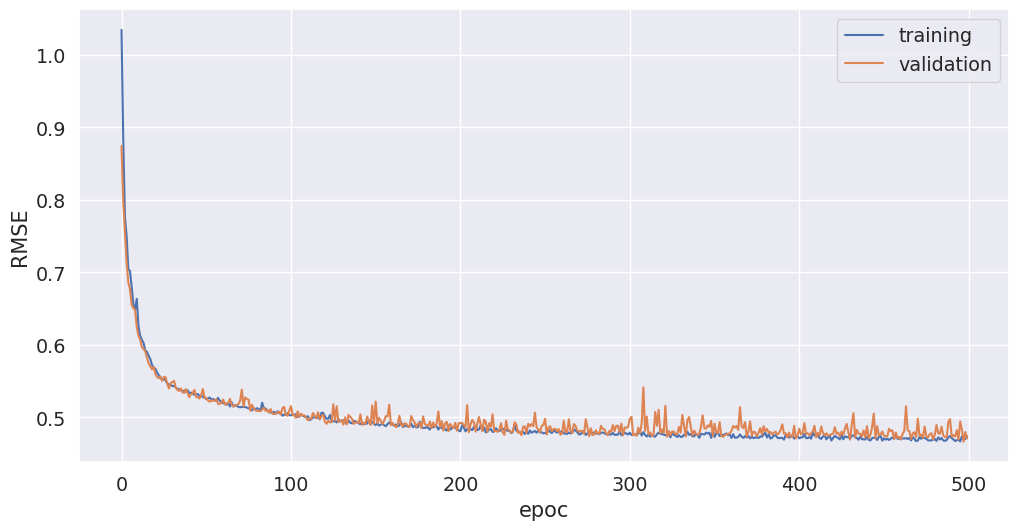

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

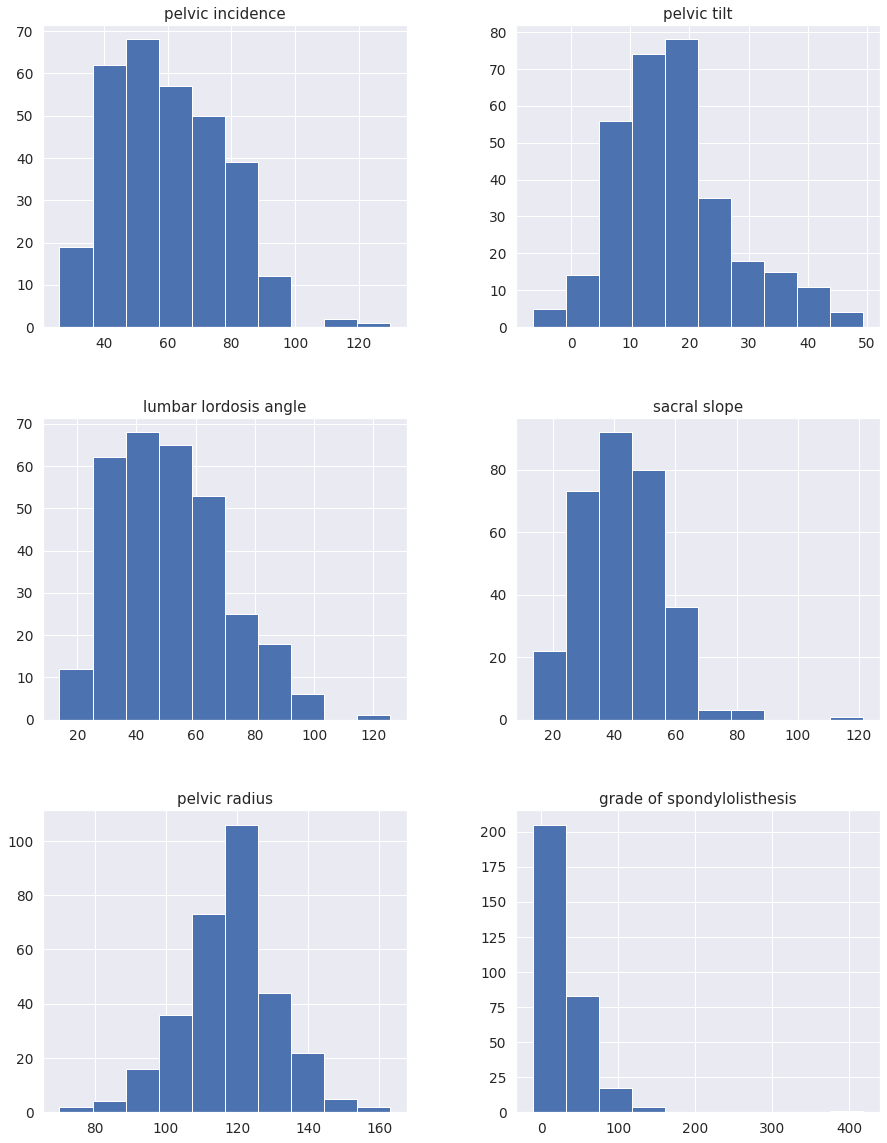

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7903225806451613

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0314 - accuracy: 0.4062

186/186 [==============================] - 0s 517us/step - loss: 1.1094 - accuracy: 0.3871 - val_loss: 1.0505 - val_accuracy: 0.4113


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0604 - accuracy: 0.4062

186/186 [==============================] - 0s 65us/step - loss: 1.0124 - accuracy: 0.4409 - val_loss: 0.9792 - val_accuracy: 0.4194


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0608 - accuracy: 0.3438

186/186 [==============================] - 0s 58us/step - loss: 0.9272 - accuracy: 0.4785 - val_loss: 0.8883 - val_accuracy: 0.5000


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9416 - accuracy: 0.5000

186/186 [==============================] - 0s 60us/step - loss: 0.8355 - accuracy: 0.5430 - val_loss: 0.8158 - val_accuracy: 0.5565


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7338 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.7722 - accuracy: 0.5860 - val_loss: 0.7802 - val_accuracy: 0.5645


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6032 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7072 - accuracy: 0.6183 - val_loss: 0.7499 - val_accuracy: 0.5645


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7505 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.6598 - accuracy: 0.6613 - val_loss: 0.7304 - val_accuracy: 0.5887


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6250

186/186 [==============================] - 0s 85us/step - loss: 0.6310 - accuracy: 0.6882 - val_loss: 0.7174 - val_accuracy: 0.5968


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8029 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 0.6162 - accuracy: 0.6935 - val_loss: 0.7095 - val_accuracy: 0.6129


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6049 - accuracy: 0.6935 - val_loss: 0.7014 - val_accuracy: 0.6048


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5954 - accuracy: 0.6989 - val_loss: 0.6940 - val_accuracy: 0.6129


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5852 - accuracy: 0.7043 - val_loss: 0.6888 - val_accuracy: 0.6129


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5658 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5748 - accuracy: 0.7151 - val_loss: 0.6845 - val_accuracy: 0.6129


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5639 - accuracy: 0.7204 - val_loss: 0.6807 - val_accuracy: 0.6129


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5563 - accuracy: 0.7258 - val_loss: 0.6775 - val_accuracy: 0.6290


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5820 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5527 - accuracy: 0.7312 - val_loss: 0.6740 - val_accuracy: 0.6290


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5478 - accuracy: 0.7312 - val_loss: 0.6701 - val_accuracy: 0.6210


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5450 - accuracy: 0.7366 - val_loss: 0.6681 - val_accuracy: 0.6210


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5439 - accuracy: 0.7366 - val_loss: 0.6658 - val_accuracy: 0.6210


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.5427 - accuracy: 0.7419 - val_loss: 0.6651 - val_accuracy: 0.6210


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5412 - accuracy: 0.7419 - val_loss: 0.6644 - val_accuracy: 0.6210


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6405 - accuracy: 0.6562



186/186 [==============================] - 0s 53us/step - loss: 0.5405 - accuracy: 0.7419 - val_loss: 0.6633 - val_accuracy: 0.6210


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6169 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.5398 - accuracy: 0.7366 - val_loss: 0.6635 - val_accuracy: 0.6210


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5387 - accuracy: 0.7419 - val_loss: 0.6631 - val_accuracy: 0.6210


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.6875

186/186 [==============================] - 0s 82us/step - loss: 0.5381 - accuracy: 0.7419 - val_loss: 0.6628 - val_accuracy: 0.6210


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.5379 - accuracy: 0.7419 - val_loss: 0.6616 - val_accuracy: 0.6210


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5455 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.5366 - accuracy: 0.7419 - val_loss: 0.6616 - val_accuracy: 0.6210


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5362 - accuracy: 0.7419 - val_loss: 0.6612 - val_accuracy: 0.6210


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5354 - accuracy: 0.7419 - val_loss: 0.6603 - val_accuracy: 0.6210


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5437 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5353 - accuracy: 0.7366 - val_loss: 0.6613 - val_accuracy: 0.6210


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6457 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5336 - accuracy: 0.7366 - val_loss: 0.6601 - val_accuracy: 0.6210


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5330 - accuracy: 0.7366 - val_loss: 0.6609 - val_accuracy: 0.6290


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6156 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5308 - accuracy: 0.7419 - val_loss: 0.6601 - val_accuracy: 0.6290


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5294 - accuracy: 0.7473 - val_loss: 0.6592 - val_accuracy: 0.6210


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5663 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5283 - accuracy: 0.7473 - val_loss: 0.6583 - val_accuracy: 0.6210


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6771 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.5270 - accuracy: 0.7527 - val_loss: 0.6566 - val_accuracy: 0.6210


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5237 - accuracy: 0.7527 - val_loss: 0.6527 - val_accuracy: 0.6290


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.5206 - accuracy: 0.7527 - val_loss: 0.6494 - val_accuracy: 0.6290


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.5183 - accuracy: 0.7527 - val_loss: 0.6483 - val_accuracy: 0.6290


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5148 - accuracy: 0.7581 - val_loss: 0.6465 - val_accuracy: 0.6290


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5118 - accuracy: 0.7581 - val_loss: 0.6457 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5105 - accuracy: 0.7581 - val_loss: 0.6445 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5100 - accuracy: 0.7581 - val_loss: 0.6432 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5089 - accuracy: 0.7581 - val_loss: 0.6418 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4787 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5080 - accuracy: 0.7581 - val_loss: 0.6359 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5048 - accuracy: 0.7581 - val_loss: 0.6326 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5000 - accuracy: 0.7581 - val_loss: 0.6279 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.4961 - accuracy: 0.7581 - val_loss: 0.6199 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4930 - accuracy: 0.7581 - val_loss: 0.6175 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4893 - accuracy: 0.7581 - val_loss: 0.6144 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5525 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4848 - accuracy: 0.7581 - val_loss: 0.6100 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4827 - accuracy: 0.7581 - val_loss: 0.6079 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4794 - accuracy: 0.7581 - val_loss: 0.6052 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4746 - accuracy: 0.7581 - val_loss: 0.6011 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4710 - accuracy: 0.7581 - val_loss: 0.5942 - val_accuracy: 0.6290


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4644 - accuracy: 0.7581 - val_loss: 0.5886 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4591 - accuracy: 0.7581 - val_loss: 0.5866 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4521 - accuracy: 0.7581 - val_loss: 0.5852 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.4417 - accuracy: 0.7581 - val_loss: 0.5932 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4399 - accuracy: 0.7500

186/186 [==============================] - 0s 72us/step - loss: 0.4361 - accuracy: 0.7581 - val_loss: 0.5900 - val_accuracy: 0.6371


Epoch 61/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5431 - accuracy: 0.7188

186/186 [==============================] - 0s 74us/step - loss: 0.4351 - accuracy: 0.7581 - val_loss: 0.5884 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5261 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4329 - accuracy: 0.7634 - val_loss: 0.5869 - val_accuracy: 0.6290


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.4295 - accuracy: 0.7688 - val_loss: 0.5863 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4285 - accuracy: 0.7742 - val_loss: 0.5850 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4246 - accuracy: 0.7742 - val_loss: 0.5829 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4255 - accuracy: 0.7742 - val_loss: 0.5790 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4254 - accuracy: 0.7742 - val_loss: 0.5787 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4214 - accuracy: 0.7742 - val_loss: 0.5781 - val_accuracy: 0.6290


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.4172 - accuracy: 0.7849 - val_loss: 0.5768 - val_accuracy: 0.6290


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4165 - accuracy: 0.7796 - val_loss: 0.5742 - val_accuracy: 0.6290


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4139 - accuracy: 0.7796 - val_loss: 0.5742 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4120 - accuracy: 0.7742 - val_loss: 0.5728 - val_accuracy: 0.6371


Epoch 73/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4933 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.4108 - accuracy: 0.7742 - val_loss: 0.5712 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7188

186/186 [==============================] - 0s 69us/step - loss: 0.4095 - accuracy: 0.7796 - val_loss: 0.5694 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4087 - accuracy: 0.7796 - val_loss: 0.5681 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4072 - accuracy: 0.7849 - val_loss: 0.5673 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4057 - accuracy: 0.7849 - val_loss: 0.5667 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4059 - accuracy: 0.7849 - val_loss: 0.5658 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8438

186/186 [==============================] - 0s 84us/step - loss: 0.4043 - accuracy: 0.7903 - val_loss: 0.5646 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4030 - accuracy: 0.7849 - val_loss: 0.5632 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4012 - accuracy: 0.7849 - val_loss: 0.5623 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4007 - accuracy: 0.7849 - val_loss: 0.5615 - val_accuracy: 0.6452


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5111 - accuracy: 0.6875

186/186 [==============================] - 0s 71us/step - loss: 0.3997 - accuracy: 0.7849 - val_loss: 0.5609 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3986 - accuracy: 0.7849 - val_loss: 0.5601 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3982 - accuracy: 0.7849 - val_loss: 0.5593 - val_accuracy: 0.6290


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3965 - accuracy: 0.7849 - val_loss: 0.5586 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3952 - accuracy: 0.7849 - val_loss: 0.5576 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3972 - accuracy: 0.7849 - val_loss: 0.5566 - val_accuracy: 0.6290


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3942 - accuracy: 0.7849 - val_loss: 0.5559 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3939 - accuracy: 0.7849 - val_loss: 0.5551 - val_accuracy: 0.6371


Epoch 91/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3929 - accuracy: 0.7903 - val_loss: 0.5542 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3924 - accuracy: 0.7849 - val_loss: 0.5536 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3921 - accuracy: 0.7849 - val_loss: 0.5528 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3912 - accuracy: 0.7849 - val_loss: 0.5520 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3928 - accuracy: 0.7903 - val_loss: 0.5488 - val_accuracy: 0.6452


Epoch 96/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3915 - accuracy: 0.7903 - val_loss: 0.5490 - val_accuracy: 0.6452


Epoch 97/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3906 - accuracy: 0.7903 - val_loss: 0.5496 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3893 - accuracy: 0.7903 - val_loss: 0.5493 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3894 - accuracy: 0.7903 - val_loss: 0.5481 - val_accuracy: 0.6371


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3885 - accuracy: 0.7903 - val_loss: 0.5476 - val_accuracy: 0.6371


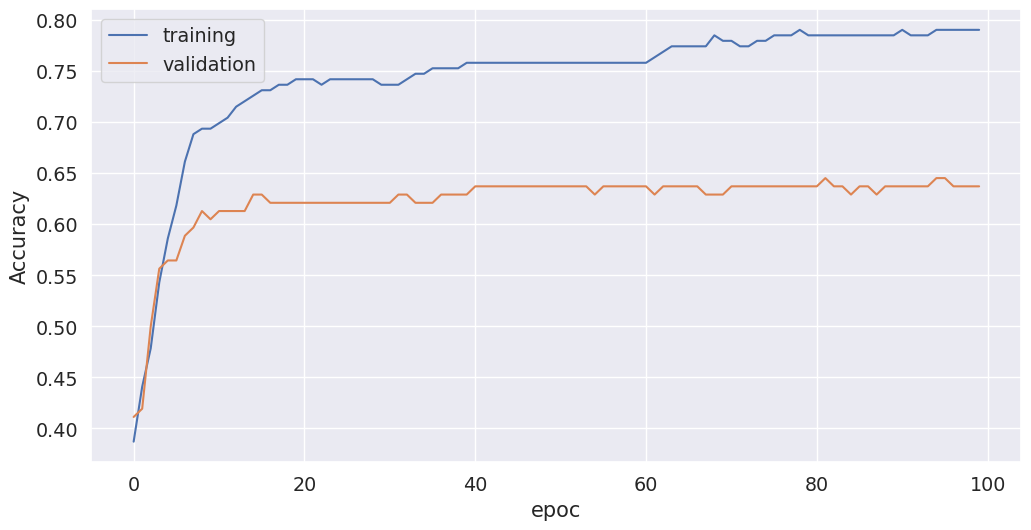

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.5776 - accuracy: 0.8125

186/186 [==============================] - 0s 1ms/step - loss: 6.4732 - accuracy: 0.6882 - val_loss: 4.9467 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.7950 - accuracy: 0.6250

186/186 [==============================] - 0s 74us/step - loss: 4.6356 - accuracy: 0.6720 - val_loss: 3.8997 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.3114 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 3.7767 - accuracy: 0.6505 - val_loss: 2.9305 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.9089 - accuracy: 0.6562

186/186 [==============================] - 0s 71us/step - loss: 3.2122 - accuracy: 0.6882 - val_loss: 2.0481 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2967 - accuracy: 0.5312

186/186 [==============================] - 0s 68us/step - loss: 2.5124 - accuracy: 0.6667 - val_loss: 1.5586 - val_accuracy: 0.6290


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3316 - accuracy: 0.6250

186/186 [==============================] - 0s 69us/step - loss: 2.3348 - accuracy: 0.6559 - val_loss: 1.0818 - val_accuracy: 0.6452


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9173 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 1.9569 - accuracy: 0.6290 - val_loss: 0.8353 - val_accuracy: 0.6613


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5643 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 1.7475 - accuracy: 0.6344 - val_loss: 0.7360 - val_accuracy: 0.6452


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7813 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 1.8709 - accuracy: 0.5968 - val_loss: 0.7706 - val_accuracy: 0.6532


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3219 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 1.5338 - accuracy: 0.6667 - val_loss: 0.6431 - val_accuracy: 0.6452


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1131 - accuracy: 0.7188

186/186 [==============================] - 0s 71us/step - loss: 1.5320 - accuracy: 0.6129 - val_loss: 0.6057 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1372 - accuracy: 0.6250

186/186 [==============================] - 0s 95us/step - loss: 1.8054 - accuracy: 0.5860 - val_loss: 0.6051 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7833 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 1.5794 - accuracy: 0.6667 - val_loss: 0.6010 - val_accuracy: 0.6452


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2705 - accuracy: 0.4688

186/186 [==============================] - 0s 67us/step - loss: 1.5794 - accuracy: 0.6183 - val_loss: 0.5688 - val_accuracy: 0.6532


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 1.3776 - accuracy: 0.6075 - val_loss: 0.6205 - val_accuracy: 0.6452


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4052 - accuracy: 0.5312

186/186 [==============================] - 0s 64us/step - loss: 1.3526 - accuracy: 0.6344 - val_loss: 0.5529 - val_accuracy: 0.6855


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2248 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 1.2071 - accuracy: 0.6183 - val_loss: 0.5433 - val_accuracy: 0.6774


Epoch 18/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9047 - accuracy: 0.7188



186/186 [==============================] - 0s 67us/step - loss: 1.1507 - accuracy: 0.6452 - val_loss: 0.5038 - val_accuracy: 0.7339


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1607 - accuracy: 0.5000

186/186 [==============================] - 0s 61us/step - loss: 1.0155 - accuracy: 0.6022 - val_loss: 0.5024 - val_accuracy: 0.7581


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7210 - accuracy: 0.6875

186/186 [==============================] - 0s 77us/step - loss: 1.0066 - accuracy: 0.6720 - val_loss: 0.5045 - val_accuracy: 0.7581


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.0956 - accuracy: 0.5625

186/186 [==============================] - 0s 85us/step - loss: 1.0786 - accuracy: 0.6022 - val_loss: 0.4919 - val_accuracy: 0.7581


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8930 - accuracy: 0.5938

186/186 [==============================] - 0s 71us/step - loss: 0.7898 - accuracy: 0.6720 - val_loss: 0.5124 - val_accuracy: 0.7097


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0866 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 0.9783 - accuracy: 0.6183 - val_loss: 0.4968 - val_accuracy: 0.7339


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1631 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 0.9251 - accuracy: 0.6882 - val_loss: 0.4923 - val_accuracy: 0.7581


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6787 - accuracy: 0.6562

186/186 [==============================] - 0s 70us/step - loss: 0.8316 - accuracy: 0.6667 - val_loss: 0.4922 - val_accuracy: 0.7742


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8817 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.7988 - accuracy: 0.7043 - val_loss: 0.4932 - val_accuracy: 0.7742


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8482 - accuracy: 0.7188

186/186 [==============================] - 0s 148us/step - loss: 0.8784 - accuracy: 0.6344 - val_loss: 0.4860 - val_accuracy: 0.7823


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9801 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.8553 - accuracy: 0.6398 - val_loss: 0.4843 - val_accuracy: 0.7742


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.8666 - accuracy: 0.6882 - val_loss: 0.4718 - val_accuracy: 0.7742


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.7358 - accuracy: 0.7043 - val_loss: 0.4821 - val_accuracy: 0.7742


Epoch 31/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7643 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.7807 - accuracy: 0.6613 - val_loss: 0.4870 - val_accuracy: 0.7500


Epoch 32/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8459 - accuracy: 0.5625

186/186 [==============================] - 0s 70us/step - loss: 0.7512 - accuracy: 0.6398 - val_loss: 0.4801 - val_accuracy: 0.7742


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9007 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.7215 - accuracy: 0.6989 - val_loss: 0.4831 - val_accuracy: 0.7742


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.6127 - accuracy: 0.7097 - val_loss: 0.4796 - val_accuracy: 0.7823


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.7459 - accuracy: 0.6882 - val_loss: 0.4834 - val_accuracy: 0.7823


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5980 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.6279 - accuracy: 0.6828 - val_loss: 0.4782 - val_accuracy: 0.7823


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7151 - accuracy: 0.5000

186/186 [==============================] - 0s 59us/step - loss: 0.6390 - accuracy: 0.6935 - val_loss: 0.4771 - val_accuracy: 0.7742


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5673 - accuracy: 0.7312 - val_loss: 0.4755 - val_accuracy: 0.7823


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7246 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6510 - accuracy: 0.6774 - val_loss: 0.4823 - val_accuracy: 0.7742


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7859 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.6193 - accuracy: 0.6828 - val_loss: 0.4785 - val_accuracy: 0.7903


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7951 - accuracy: 0.5938

186/186 [==============================] - 0s 80us/step - loss: 0.6270 - accuracy: 0.6559 - val_loss: 0.4805 - val_accuracy: 0.7903


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.7500

186/186 [==============================] - 0s 86us/step - loss: 0.5831 - accuracy: 0.7043 - val_loss: 0.4783 - val_accuracy: 0.7742


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8173 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.6124 - accuracy: 0.6667 - val_loss: 0.4833 - val_accuracy: 0.7742


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4719 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.5849 - accuracy: 0.6882 - val_loss: 0.4804 - val_accuracy: 0.7823


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 0.5368 - accuracy: 0.7043 - val_loss: 0.4800 - val_accuracy: 0.7903


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5654 - accuracy: 0.7204 - val_loss: 0.4755 - val_accuracy: 0.7742


Epoch 47/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6285 - accuracy: 0.6613 - val_loss: 0.4782 - val_accuracy: 0.7661


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4994 - accuracy: 0.7258 - val_loss: 0.4746 - val_accuracy: 0.7823


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.5779 - accuracy: 0.6667 - val_loss: 0.4741 - val_accuracy: 0.7661


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.7188

186/186 [==============================] - 0s 75us/step - loss: 0.5259 - accuracy: 0.7097 - val_loss: 0.4760 - val_accuracy: 0.7903


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.8125



186/186 [==============================] - 0s 65us/step - loss: 0.5678 - accuracy: 0.7312 - val_loss: 0.4754 - val_accuracy: 0.7823


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.6562

186/186 [==============================] - 0s 69us/step - loss: 0.5208 - accuracy: 0.7043 - val_loss: 0.4683 - val_accuracy: 0.7823


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5535 - accuracy: 0.6774 - val_loss: 0.4639 - val_accuracy: 0.7903


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4462 - accuracy: 0.7312 - val_loss: 0.4620 - val_accuracy: 0.7903


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4985 - accuracy: 0.7581 - val_loss: 0.4604 - val_accuracy: 0.7903


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.5650 - accuracy: 0.6720 - val_loss: 0.4662 - val_accuracy: 0.7742


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.5938

186/186 [==============================] - 0s 73us/step - loss: 0.5315 - accuracy: 0.6720 - val_loss: 0.4613 - val_accuracy: 0.7903


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.5938

186/186 [==============================] - 0s 66us/step - loss: 0.4952 - accuracy: 0.6882 - val_loss: 0.4593 - val_accuracy: 0.7903


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5470 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4716 - accuracy: 0.7473 - val_loss: 0.4655 - val_accuracy: 0.7742


Epoch 60/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.6562

186/186 [==============================] - 0s 74us/step - loss: 0.5286 - accuracy: 0.7419 - val_loss: 0.4696 - val_accuracy: 0.7500


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.5122 - accuracy: 0.7366 - val_loss: 0.4650 - val_accuracy: 0.7742


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4146 - accuracy: 0.7957 - val_loss: 0.4642 - val_accuracy: 0.7581


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4846 - accuracy: 0.7258 - val_loss: 0.4644 - val_accuracy: 0.7661


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.5528 - accuracy: 0.6882 - val_loss: 0.4621 - val_accuracy: 0.7742


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4202 - accuracy: 0.7527 - val_loss: 0.4623 - val_accuracy: 0.7661


Epoch 66/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.4792 - accuracy: 0.7527 - val_loss: 0.4616 - val_accuracy: 0.7742


Epoch 67/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.4219 - accuracy: 0.7903 - val_loss: 0.4586 - val_accuracy: 0.7661


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.4928 - accuracy: 0.7258 - val_loss: 0.4570 - val_accuracy: 0.7661


Epoch 69/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.4187 - accuracy: 0.7903 - val_loss: 0.4598 - val_accuracy: 0.7661


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.4305 - accuracy: 0.7634 - val_loss: 0.4633 - val_accuracy: 0.7500


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5264 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4975 - accuracy: 0.7527 - val_loss: 0.4637 - val_accuracy: 0.7661


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4663 - accuracy: 0.7688 - val_loss: 0.4615 - val_accuracy: 0.7742


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4445 - accuracy: 0.7957 - val_loss: 0.4589 - val_accuracy: 0.7742


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.4126 - accuracy: 0.7796 - val_loss: 0.4638 - val_accuracy: 0.7742


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7059 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.5254 - accuracy: 0.6882 - val_loss: 0.4624 - val_accuracy: 0.7661


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5046 - accuracy: 0.7258 - val_loss: 0.4561 - val_accuracy: 0.7742


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4644 - accuracy: 0.7634 - val_loss: 0.4557 - val_accuracy: 0.7742


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5059 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4370 - accuracy: 0.7903 - val_loss: 0.4490 - val_accuracy: 0.7823


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4692 - accuracy: 0.7312 - val_loss: 0.4548 - val_accuracy: 0.7742


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.4701 - accuracy: 0.7849 - val_loss: 0.4544 - val_accuracy: 0.7742


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4184 - accuracy: 0.7742 - val_loss: 0.4561 - val_accuracy: 0.7742


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4448 - accuracy: 0.7634 - val_loss: 0.4535 - val_accuracy: 0.7742


Epoch 83/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.6875

186/186 [==============================] - 0s 131us/step - loss: 0.4398 - accuracy: 0.7473 - val_loss: 0.4526 - val_accuracy: 0.7742


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4485 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4503 - accuracy: 0.7796 - val_loss: 0.4480 - val_accuracy: 0.7581


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4626 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4315 - accuracy: 0.7527 - val_loss: 0.4529 - val_accuracy: 0.7742


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4503 - accuracy: 0.8011 - val_loss: 0.4520 - val_accuracy: 0.7742


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4403 - accuracy: 0.7634 - val_loss: 0.4505 - val_accuracy: 0.7500


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4626 - accuracy: 0.7366 - val_loss: 0.4483 - val_accuracy: 0.7500


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5846 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4429 - accuracy: 0.7957 - val_loss: 0.4429 - val_accuracy: 0.7581


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.6562

186/186 [==============================] - 0s 67us/step - loss: 0.4755 - accuracy: 0.7312 - val_loss: 0.4523 - val_accuracy: 0.7419


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4494 - accuracy: 0.7258 - val_loss: 0.4516 - val_accuracy: 0.7581


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.7500

186/186 [==============================] - 0s 72us/step - loss: 0.4432 - accuracy: 0.7688 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5005 - accuracy: 0.7188

186/186 [==============================] - 0s 90us/step - loss: 0.4392 - accuracy: 0.7796 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4148 - accuracy: 0.7742 - val_loss: 0.4495 - val_accuracy: 0.7500


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4722 - accuracy: 0.8065 - val_loss: 0.4458 - val_accuracy: 0.7661


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4284 - accuracy: 0.7634 - val_loss: 0.4457 - val_accuracy: 0.7661


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6690 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4477 - accuracy: 0.7634 - val_loss: 0.4389 - val_accuracy: 0.7661


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4617 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4726 - accuracy: 0.7419 - val_loss: 0.4394 - val_accuracy: 0.7581


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4663 - accuracy: 0.7204 - val_loss: 0.4382 - val_accuracy: 0.7661


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.4360 - accuracy: 0.7473 - val_loss: 0.4370 - val_accuracy: 0.7581


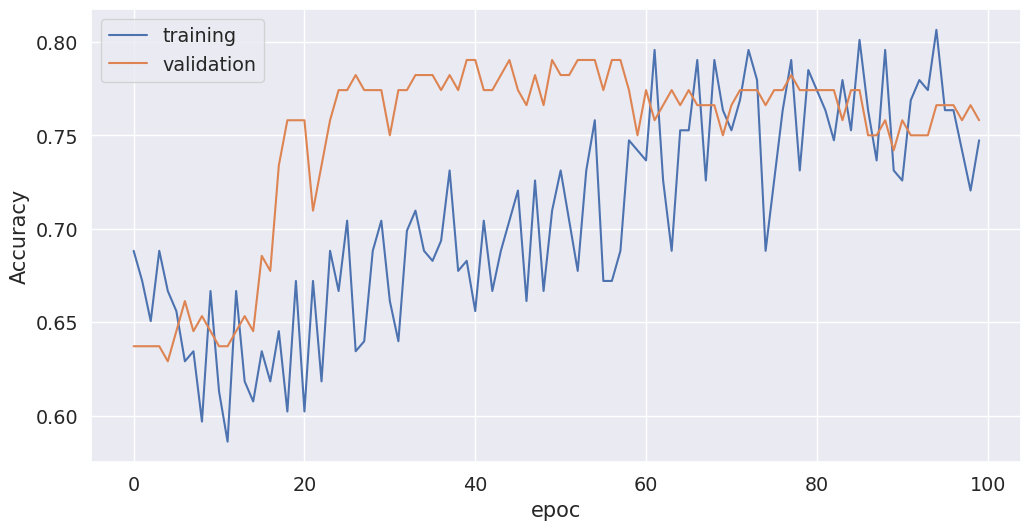

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.1352 - accuracy: 0.7812

186/186 [==============================] - 0s 998us/step - loss: 3.3313 - accuracy: 0.6237 - val_loss: 1.7479 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.5048 - accuracy: 0.6250

186/186 [==============================] - 0s 76us/step - loss: 2.5837 - accuracy: 0.5968 - val_loss: 1.0964 - val_accuracy: 0.6452


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0967 - accuracy: 0.5312

186/186 [==============================] - 0s 62us/step - loss: 1.7435 - accuracy: 0.5914 - val_loss: 0.8168 - val_accuracy: 0.5887


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4712 - accuracy: 0.5312

186/186 [==============================] - 0s 57us/step - loss: 1.2420 - accuracy: 0.5968 - val_loss: 0.6782 - val_accuracy: 0.5242


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0769 - accuracy: 0.4062

186/186 [==============================] - 0s 81us/step - loss: 1.3436 - accuracy: 0.4570 - val_loss: 0.6373 - val_accuracy: 0.5403


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3949 - accuracy: 0.4375

186/186 [==============================] - 0s 83us/step - loss: 1.1059 - accuracy: 0.4516 - val_loss: 0.6662 - val_accuracy: 0.4597


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1553 - accuracy: 0.4375

186/186 [==============================] - 0s 68us/step - loss: 1.0778 - accuracy: 0.4785 - val_loss: 0.6863 - val_accuracy: 0.4194


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5005 - accuracy: 0.3438

186/186 [==============================] - 0s 67us/step - loss: 0.8533 - accuracy: 0.4839 - val_loss: 0.6964 - val_accuracy: 0.3790


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8149 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.9009 - accuracy: 0.4194 - val_loss: 0.6982 - val_accuracy: 0.3629


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7367 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 0.9327 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.3629


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8167 - accuracy: 0.4688

186/186 [==============================] - 0s 72us/step - loss: 0.7451 - accuracy: 0.4516 - val_loss: 0.6955 - val_accuracy: 0.3629


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7163 - accuracy: 0.5625

186/186 [==============================] - 0s 65us/step - loss: 0.7319 - accuracy: 0.5376 - val_loss: 0.6943 - val_accuracy: 0.3629


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.5000

186/186 [==============================] - 0s 58us/step - loss: 0.7812 - accuracy: 0.4946 - val_loss: 0.6860 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8682 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.8103 - accuracy: 0.7043 - val_loss: 0.6810 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7588 - accuracy: 0.5938

186/186 [==============================] - 0s 64us/step - loss: 0.7247 - accuracy: 0.7043 - val_loss: 0.6797 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.6995 - accuracy: 0.7043 - val_loss: 0.6698 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7790 - accuracy: 0.7812

186/186 [==============================] - 0s 95us/step - loss: 0.7127 - accuracy: 0.7043 - val_loss: 0.6726 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.6350 - accuracy: 0.7043 - val_loss: 0.6630 - val_accuracy: 0.6371


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.6128 - accuracy: 0.7043 - val_loss: 0.6500 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6024 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5814 - accuracy: 0.7043 - val_loss: 0.6104 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.6513 - accuracy: 0.7043 - val_loss: 0.5923 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5854 - accuracy: 0.7043 - val_loss: 0.5864 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7518 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.6023 - accuracy: 0.7043 - val_loss: 0.5840 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6636 - accuracy: 0.7043 - val_loss: 0.6037 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5975 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6185 - accuracy: 0.7043 - val_loss: 0.5793 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6835 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6635 - accuracy: 0.7043 - val_loss: 0.5655 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.6234 - accuracy: 0.7043 - val_loss: 0.5743 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6116 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6187 - accuracy: 0.7043 - val_loss: 0.5444 - val_accuracy: 0.6371


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.5312

186/186 [==============================] - 0s 67us/step - loss: 0.5494 - accuracy: 0.7043 - val_loss: 0.5238 - val_accuracy: 0.6371


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7551 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.6687 - accuracy: 0.7043 - val_loss: 0.5296 - val_accuracy: 0.6371


Epoch 31/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.5221 - accuracy: 0.7043 - val_loss: 0.5191 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5954 - accuracy: 0.7043 - val_loss: 0.5265 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9364 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 0.5921 - accuracy: 0.7043 - val_loss: 0.5235 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.5724 - accuracy: 0.7043 - val_loss: 0.5183 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5819 - accuracy: 0.7043 - val_loss: 0.5186 - val_accuracy: 0.6371


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.4993 - accuracy: 0.7043 - val_loss: 0.5020 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4674 - accuracy: 0.7043 - val_loss: 0.5009 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.6250



186/186 [==============================] - 0s 56us/step - loss: 0.5386 - accuracy: 0.7043 - val_loss: 0.4916 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4485 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4598 - accuracy: 0.7043 - val_loss: 0.4829 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5457 - accuracy: 0.7043 - val_loss: 0.4904 - val_accuracy: 0.6371


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.6875

186/186 [==============================] - 0s 78us/step - loss: 0.5014 - accuracy: 0.7043 - val_loss: 0.5008 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5359 - accuracy: 0.7043 - val_loss: 0.4880 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5104 - accuracy: 0.7043 - val_loss: 0.4913 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4639 - accuracy: 0.7043 - val_loss: 0.4785 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5289 - accuracy: 0.6562

186/186 [==============================] - 0s 70us/step - loss: 0.5119 - accuracy: 0.7043 - val_loss: 0.4750 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.5365 - accuracy: 0.7043 - val_loss: 0.4878 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.5092 - accuracy: 0.7043 - val_loss: 0.4866 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.6562

186/186 [==============================] - 0s 79us/step - loss: 0.4781 - accuracy: 0.7043 - val_loss: 0.4832 - val_accuracy: 0.6371


Epoch 49/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.5625

186/186 [==============================] - 0s 66us/step - loss: 0.4854 - accuracy: 0.7043 - val_loss: 0.4723 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4610 - accuracy: 0.7043 - val_loss: 0.4646 - val_accuracy: 0.6371


Epoch 51/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5132 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5030 - accuracy: 0.7043 - val_loss: 0.4779 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4794 - accuracy: 0.7043 - val_loss: 0.4699 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.7188

186/186 [==============================] - 0s 131us/step - loss: 0.4785 - accuracy: 0.7043 - val_loss: 0.4729 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5011 - accuracy: 0.7043 - val_loss: 0.4812 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4851 - accuracy: 0.7043 - val_loss: 0.4891 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.4901 - accuracy: 0.7043 - val_loss: 0.4857 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4887 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4851 - accuracy: 0.7043 - val_loss: 0.4829 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4302 - accuracy: 0.7043 - val_loss: 0.4796 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4694 - accuracy: 0.7043 - val_loss: 0.4835 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.8125

186/186 [==============================] - 0s 104us/step - loss: 0.4457 - accuracy: 0.7043 - val_loss: 0.4675 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.4733 - accuracy: 0.7043 - val_loss: 0.4663 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4390 - accuracy: 0.7043 - val_loss: 0.4696 - val_accuracy: 0.6371


Epoch 63/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.5625

186/186 [==============================] - 0s 61us/step - loss: 0.3901 - accuracy: 0.7043 - val_loss: 0.4651 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5885 - accuracy: 0.5938



186/186 [==============================] - 0s 59us/step - loss: 0.4623 - accuracy: 0.7043 - val_loss: 0.4762 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.4569 - accuracy: 0.7043 - val_loss: 0.4770 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.4014 - accuracy: 0.7043 - val_loss: 0.4760 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7188

186/186 [==============================] - 0s 109us/step - loss: 0.4306 - accuracy: 0.7043 - val_loss: 0.4748 - val_accuracy: 0.6371


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.6250

186/186 [==============================] - 0s 63us/step - loss: 0.4224 - accuracy: 0.7043 - val_loss: 0.4642 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8125

186/186 [==============================] - 0s 109us/step - loss: 0.3998 - accuracy: 0.7043 - val_loss: 0.4560 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6562

186/186 [==============================] - 0s 114us/step - loss: 0.4804 - accuracy: 0.7043 - val_loss: 0.4669 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.4679 - accuracy: 0.7043 - val_loss: 0.4633 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4111 - accuracy: 0.7043 - val_loss: 0.4603 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4015 - accuracy: 0.7043 - val_loss: 0.4635 - val_accuracy: 0.7258


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4237 - accuracy: 0.7742 - val_loss: 0.4598 - val_accuracy: 0.7258


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4139 - accuracy: 0.8172 - val_loss: 0.4563 - val_accuracy: 0.7258


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3762 - accuracy: 0.7742 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4399 - accuracy: 0.8118 - val_loss: 0.4614 - val_accuracy: 0.7177


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4423 - accuracy: 0.7796 - val_loss: 0.4613 - val_accuracy: 0.7177


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4135 - accuracy: 0.8011 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4202 - accuracy: 0.7419 - val_loss: 0.4557 - val_accuracy: 0.7177


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3997 - accuracy: 0.7473 - val_loss: 0.4573 - val_accuracy: 0.7177


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4206 - accuracy: 0.7527 - val_loss: 0.4569 - val_accuracy: 0.7258


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.4185 - accuracy: 0.7742 - val_loss: 0.4553 - val_accuracy: 0.7177


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4398 - accuracy: 0.7581 - val_loss: 0.4583 - val_accuracy: 0.7177


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.4353 - accuracy: 0.7366 - val_loss: 0.4525 - val_accuracy: 0.7258


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4060 - accuracy: 0.7581 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4048 - accuracy: 0.7903 - val_loss: 0.4549 - val_accuracy: 0.7258


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4072 - accuracy: 0.7957 - val_loss: 0.4558 - val_accuracy: 0.7177


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7812



186/186 [==============================] - 0s 62us/step - loss: 0.4329 - accuracy: 0.7688 - val_loss: 0.4539 - val_accuracy: 0.7177


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.4123 - accuracy: 0.7634 - val_loss: 0.4532 - val_accuracy: 0.7258


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4076 - accuracy: 0.7634 - val_loss: 0.4564 - val_accuracy: 0.7258


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4047 - accuracy: 0.7581 - val_loss: 0.4527 - val_accuracy: 0.7258


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4313 - accuracy: 0.7527 - val_loss: 0.4549 - val_accuracy: 0.7258


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4011 - accuracy: 0.7903 - val_loss: 0.4507 - val_accuracy: 0.7258


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4323 - accuracy: 0.7581 - val_loss: 0.4494 - val_accuracy: 0.7258


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3994 - accuracy: 0.7903 - val_loss: 0.4483 - val_accuracy: 0.6935


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3934 - accuracy: 0.7903 - val_loss: 0.4488 - val_accuracy: 0.6935


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4190 - accuracy: 0.7796 - val_loss: 0.4484 - val_accuracy: 0.6935


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4061 - accuracy: 0.7742 - val_loss: 0.4463 - val_accuracy: 0.7097


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3988 - accuracy: 0.7957 - val_loss: 0.4450 - val_accuracy: 0.7097


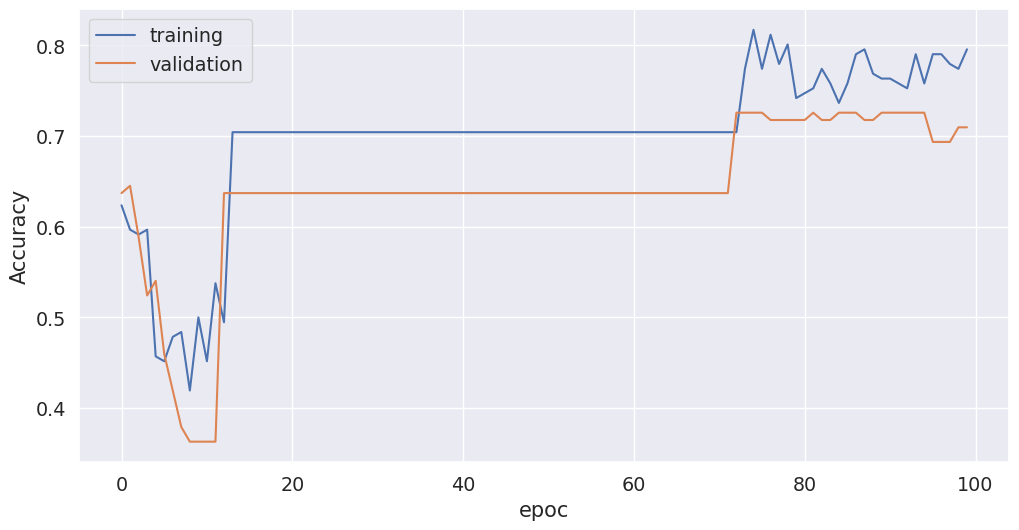

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 25.2804 - accuracy: 0.3125

186/186 [==============================] - 0s 1ms/step - loss: 18.0885 - accuracy: 0.3925 - val_loss: 9.2087 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 13.8074 - accuracy: 0.3750

186/186 [==============================] - 0s 58us/step - loss: 12.2074 - accuracy: 0.3925 - val_loss: 4.7607 - val_accuracy: 0.3629


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.4283 - accuracy: 0.4062

186/186 [==============================] - 0s 71us/step - loss: 10.6569 - accuracy: 0.4194 - val_loss: 1.6862 - val_accuracy: 0.3387


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.1812 - accuracy: 0.4375

186/186 [==============================] - 0s 68us/step - loss: 5.9325 - accuracy: 0.5108 - val_loss: 1.4040 - val_accuracy: 0.5806


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.6571 - accuracy: 0.4375

186/186 [==============================] - 0s 61us/step - loss: 5.2071 - accuracy: 0.5054 - val_loss: 1.6850 - val_accuracy: 0.6210


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.6850 - accuracy: 0.5312

186/186 [==============================] - 0s 68us/step - loss: 4.4844 - accuracy: 0.5806 - val_loss: 1.9075 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.4148 - accuracy: 0.6562

186/186 [==============================] - 0s 71us/step - loss: 4.0872 - accuracy: 0.5645 - val_loss: 2.0780 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.6635 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 3.4167 - accuracy: 0.6505 - val_loss: 2.0206 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.5470 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 3.6828 - accuracy: 0.6022 - val_loss: 1.9898 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.6933 - accuracy: 0.5625

186/186 [==============================] - 0s 61us/step - loss: 2.6529 - accuracy: 0.6344 - val_loss: 1.7749 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6675 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 2.6109 - accuracy: 0.6398 - val_loss: 1.4144 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2119 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 2.5915 - accuracy: 0.6344 - val_loss: 1.1457 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6065 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 2.2179 - accuracy: 0.6720 - val_loss: 1.0237 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0368 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 1.7542 - accuracy: 0.6935 - val_loss: 0.8455 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7555 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 1.7055 - accuracy: 0.6452 - val_loss: 0.7459 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3222 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 2.0706 - accuracy: 0.6774 - val_loss: 0.7682 - val_accuracy: 0.6371


Epoch 17/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.5694 - accuracy: 0.6562

186/186 [==============================] - 0s 64us/step - loss: 1.6386 - accuracy: 0.6828 - val_loss: 0.7246 - val_accuracy: 0.6371


Epoch 18/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.2664 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 1.3842 - accuracy: 0.6828 - val_loss: 0.7151 - val_accuracy: 0.6371


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.4497 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 1.5057 - accuracy: 0.6828 - val_loss: 0.7123 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7383 - accuracy: 0.5938

186/186 [==============================] - 0s 63us/step - loss: 1.7072 - accuracy: 0.6667 - val_loss: 0.7180 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3712 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 1.5316 - accuracy: 0.6559 - val_loss: 0.7198 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3857 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 1.6995 - accuracy: 0.6398 - val_loss: 0.6994 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6297 - accuracy: 0.6562

186/186 [==============================] - 0s 64us/step - loss: 1.1457 - accuracy: 0.6290 - val_loss: 0.7179 - val_accuracy: 0.7661


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2748 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 1.5301 - accuracy: 0.5914 - val_loss: 0.6928 - val_accuracy: 0.7419


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2245 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 1.0713 - accuracy: 0.6344 - val_loss: 0.6946 - val_accuracy: 0.7419


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0036 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 1.2074 - accuracy: 0.6183 - val_loss: 0.7038 - val_accuracy: 0.7984


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8456 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 1.0840 - accuracy: 0.6667 - val_loss: 0.7036 - val_accuracy: 0.7742


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8675 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.9179 - accuracy: 0.6452 - val_loss: 0.6868 - val_accuracy: 0.7500


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1306 - accuracy: 0.5312

186/186 [==============================] - 0s 61us/step - loss: 0.9879 - accuracy: 0.6129 - val_loss: 0.6968 - val_accuracy: 0.7823


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9847 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 0.9449 - accuracy: 0.6183 - val_loss: 0.7194 - val_accuracy: 0.7419


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0500 - accuracy: 0.5938

186/186 [==============================] - 0s 64us/step - loss: 1.0832 - accuracy: 0.5430 - val_loss: 0.7157 - val_accuracy: 0.7177


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2770 - accuracy: 0.5000

186/186 [==============================] - 0s 63us/step - loss: 0.9335 - accuracy: 0.6613 - val_loss: 0.6979 - val_accuracy: 0.7823


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8995 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.9154 - accuracy: 0.6344 - val_loss: 0.7383 - val_accuracy: 0.6694


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9988 - accuracy: 0.5312

186/186 [==============================] - 0s 63us/step - loss: 0.9895 - accuracy: 0.5860 - val_loss: 0.7439 - val_accuracy: 0.6532


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0754 - accuracy: 0.5625

186/186 [==============================] - 0s 77us/step - loss: 0.9562 - accuracy: 0.6398 - val_loss: 0.7362 - val_accuracy: 0.6694


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6604 - accuracy: 0.5938

186/186 [==============================] - 0s 67us/step - loss: 0.8433 - accuracy: 0.5968 - val_loss: 0.7394 - val_accuracy: 0.6532


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8562 - accuracy: 0.7188

186/186 [==============================] - 0s 102us/step - loss: 0.8496 - accuracy: 0.6452 - val_loss: 0.7519 - val_accuracy: 0.6210


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8829 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.8493 - accuracy: 0.6075 - val_loss: 0.7319 - val_accuracy: 0.6532


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7091 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7531 - accuracy: 0.6989 - val_loss: 0.7023 - val_accuracy: 0.6935


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9669 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.8291 - accuracy: 0.6505 - val_loss: 0.7034 - val_accuracy: 0.7016


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9035 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 0.8501 - accuracy: 0.6452 - val_loss: 0.7155 - val_accuracy: 0.6855


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7038 - accuracy: 0.7500

186/186 [==============================] - 0s 82us/step - loss: 0.7385 - accuracy: 0.6882 - val_loss: 0.7234 - val_accuracy: 0.6694


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7252 - accuracy: 0.6882 - val_loss: 0.7077 - val_accuracy: 0.6774


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7413 - accuracy: 0.6774 - val_loss: 0.6980 - val_accuracy: 0.6855


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7434 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.7425 - accuracy: 0.6667 - val_loss: 0.7026 - val_accuracy: 0.6855


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7337 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7228 - accuracy: 0.6720 - val_loss: 0.6920 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8555 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.7555 - accuracy: 0.7043 - val_loss: 0.6842 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9630 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.7889 - accuracy: 0.7097 - val_loss: 0.6781 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8427 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.7213 - accuracy: 0.6935 - val_loss: 0.6830 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7284 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.7490 - accuracy: 0.6989 - val_loss: 0.6918 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6984 - accuracy: 0.6562

186/186 [==============================] - 0s 69us/step - loss: 0.7090 - accuracy: 0.7097 - val_loss: 0.6845 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6966 - accuracy: 0.7204 - val_loss: 0.6683 - val_accuracy: 0.6371


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8230 - accuracy: 0.6250

186/186 [==============================] - 0s 76us/step - loss: 0.7447 - accuracy: 0.6882 - val_loss: 0.6673 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6765 - accuracy: 0.6989 - val_loss: 0.6559 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5948 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.7320 - accuracy: 0.7419 - val_loss: 0.6613 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6631 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.6503 - accuracy: 0.7097 - val_loss: 0.6456 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6981 - accuracy: 0.7151 - val_loss: 0.6463 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6329 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6759 - accuracy: 0.7151 - val_loss: 0.6412 - val_accuracy: 0.6371


Epoch 59/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.7188

186/186 [==============================] - 0s 88us/step - loss: 0.6622 - accuracy: 0.7204 - val_loss: 0.6450 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.6603 - accuracy: 0.7043 - val_loss: 0.6422 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8264 - accuracy: 0.5312

186/186 [==============================] - 0s 74us/step - loss: 0.6813 - accuracy: 0.6774 - val_loss: 0.6389 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6219 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6365 - accuracy: 0.7043 - val_loss: 0.6360 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.7020 - accuracy: 0.7312 - val_loss: 0.6469 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.6998 - accuracy: 0.6882 - val_loss: 0.6432 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6299 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6201 - accuracy: 0.7473 - val_loss: 0.6388 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6396 - accuracy: 0.7204 - val_loss: 0.6252 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7064 - accuracy: 0.7188

186/186 [==============================] - 0s 71us/step - loss: 0.6479 - accuracy: 0.7258 - val_loss: 0.6268 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.6405 - accuracy: 0.6989 - val_loss: 0.6246 - val_accuracy: 0.6290


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.6875



186/186 [==============================] - 0s 57us/step - loss: 0.6598 - accuracy: 0.6882 - val_loss: 0.6395 - val_accuracy: 0.6290


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6311 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.6386 - accuracy: 0.7097 - val_loss: 0.6310 - val_accuracy: 0.6290


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6437 - accuracy: 0.7204 - val_loss: 0.6323 - val_accuracy: 0.6290


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7246 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.6549 - accuracy: 0.7097 - val_loss: 0.6262 - val_accuracy: 0.6290


Epoch 73/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5901 - accuracy: 0.7188



186/186 [==============================] - 0s 63us/step - loss: 0.5949 - accuracy: 0.7419 - val_loss: 0.6230 - val_accuracy: 0.6210


Epoch 74/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.6305 - accuracy: 0.7581 - val_loss: 0.6188 - val_accuracy: 0.6129


Epoch 75/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5650 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.5993 - accuracy: 0.7527 - val_loss: 0.6111 - val_accuracy: 0.6129


Epoch 76/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.7188

186/186 [==============================] - 0s 72us/step - loss: 0.6433 - accuracy: 0.7097 - val_loss: 0.6191 - val_accuracy: 0.6129


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5997 - accuracy: 0.7419 - val_loss: 0.6192 - val_accuracy: 0.6129


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6339 - accuracy: 0.6875

186/186 [==============================] - 0s 70us/step - loss: 0.6020 - accuracy: 0.7366 - val_loss: 0.6187 - val_accuracy: 0.6129


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7224 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.5969 - accuracy: 0.7151 - val_loss: 0.6180 - val_accuracy: 0.6129


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7023 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.6158 - accuracy: 0.7634 - val_loss: 0.6223 - val_accuracy: 0.6048


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.7500



186/186 [==============================] - 0s 60us/step - loss: 0.6006 - accuracy: 0.7204 - val_loss: 0.6218 - val_accuracy: 0.6129


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7500

186/186 [==============================] - 0s 149us/step - loss: 0.6133 - accuracy: 0.7258 - val_loss: 0.6205 - val_accuracy: 0.6048


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6904 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.6421 - accuracy: 0.7258 - val_loss: 0.6167 - val_accuracy: 0.6129


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5847 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.5873 - accuracy: 0.7419 - val_loss: 0.6233 - val_accuracy: 0.6048


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6100 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6054 - accuracy: 0.7151 - val_loss: 0.6162 - val_accuracy: 0.6129


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6142 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5971 - accuracy: 0.7419 - val_loss: 0.6146 - val_accuracy: 0.6129


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7812

186/186 [==============================] - 0s 79us/step - loss: 0.5834 - accuracy: 0.7258 - val_loss: 0.6163 - val_accuracy: 0.6048


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6499 - accuracy: 0.7366 - val_loss: 0.6179 - val_accuracy: 0.6048


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7138 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.5940 - accuracy: 0.7366 - val_loss: 0.6123 - val_accuracy: 0.6129


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7724 - accuracy: 0.7812

186/186 [==============================] - 0s 90us/step - loss: 0.6230 - accuracy: 0.7527 - val_loss: 0.6108 - val_accuracy: 0.6048


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7209 - accuracy: 0.6562

186/186 [==============================] - 0s 71us/step - loss: 0.5829 - accuracy: 0.7473 - val_loss: 0.6144 - val_accuracy: 0.6129


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5069 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6108 - accuracy: 0.7527 - val_loss: 0.6123 - val_accuracy: 0.6129


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.7188

186/186 [==============================] - 0s 76us/step - loss: 0.5718 - accuracy: 0.7043 - val_loss: 0.6090 - val_accuracy: 0.6048


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6831 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5792 - accuracy: 0.7366 - val_loss: 0.6060 - val_accuracy: 0.6048


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4676 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.5940 - accuracy: 0.7581 - val_loss: 0.6102 - val_accuracy: 0.5968


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5990 - accuracy: 0.7366 - val_loss: 0.6038 - val_accuracy: 0.6210


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5553 - accuracy: 0.8011 - val_loss: 0.6087 - val_accuracy: 0.5968


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5862 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5725 - accuracy: 0.7419 - val_loss: 0.6101 - val_accuracy: 0.5968


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.8750



186/186 [==============================] - 0s 62us/step - loss: 0.5839 - accuracy: 0.7527 - val_loss: 0.6153 - val_accuracy: 0.5806


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6581 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.5506 - accuracy: 0.7634 - val_loss: 0.6154 - val_accuracy: 0.6129


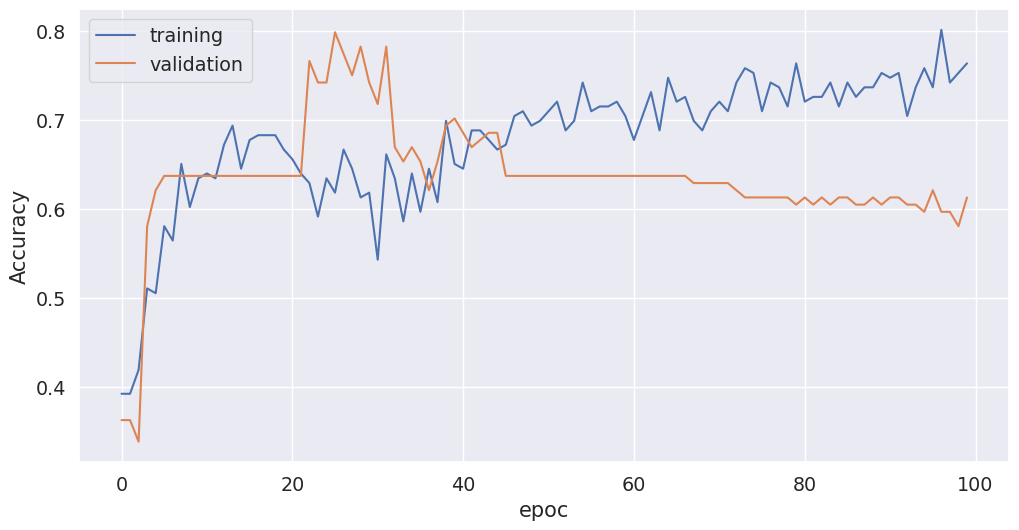

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9144 - accuracy: 0.7500

186/186 [==============================] - 0s 718us/step - loss: 4.6531 - accuracy: 0.7043 - val_loss: 5.5103 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8406 - accuracy: 0.8125

186/186 [==============================] - 0s 101us/step - loss: 4.3629 - accuracy: 0.7043 - val_loss: 5.2416 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3375 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 4.1579 - accuracy: 0.7043 - val_loss: 5.0059 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9523 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 3.9691 - accuracy: 0.7043 - val_loss: 4.7859 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0632 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 3.7939 - accuracy: 0.7043 - val_loss: 4.5772 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5489 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 3.6214 - accuracy: 0.7043 - val_loss: 4.3607 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9986 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 3.4465 - accuracy: 0.7043 - val_loss: 4.1471 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1377 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 3.2718 - accuracy: 0.7043 - val_loss: 3.9345 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6535 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 3.0992 - accuracy: 0.7043 - val_loss: 3.7233 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7265 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 2.9279 - accuracy: 0.7043 - val_loss: 3.5169 - val_accuracy: 0.6371


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8644 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 2.7592 - accuracy: 0.7043 - val_loss: 3.3040 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6944 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 2.5862 - accuracy: 0.7043 - val_loss: 3.0931 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2316 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 2.4187 - accuracy: 0.7043 - val_loss: 2.8947 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9651 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 2.2531 - accuracy: 0.7043 - val_loss: 2.6955 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0488 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 2.0974 - accuracy: 0.7043 - val_loss: 2.5140 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5895 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.9559 - accuracy: 0.7043 - val_loss: 2.3422 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7361 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.8216 - accuracy: 0.6989 - val_loss: 2.1681 - val_accuracy: 0.6452


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4069 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 1.6850 - accuracy: 0.6989 - val_loss: 1.9965 - val_accuracy: 0.6452


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5430 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 1.5586 - accuracy: 0.6935 - val_loss: 1.8497 - val_accuracy: 0.6452


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0918 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 1.4543 - accuracy: 0.6935 - val_loss: 1.7207 - val_accuracy: 0.6452


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4344 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 1.3576 - accuracy: 0.6935 - val_loss: 1.5890 - val_accuracy: 0.6452


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1523 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 1.2656 - accuracy: 0.6935 - val_loss: 1.4803 - val_accuracy: 0.6452


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1781 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 1.1898 - accuracy: 0.6935 - val_loss: 1.3788 - val_accuracy: 0.6452


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0486 - accuracy: 0.6875

186/186 [==============================] - 0s 75us/step - loss: 1.1249 - accuracy: 0.6935 - val_loss: 1.2934 - val_accuracy: 0.6452


Epoch 25/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.8438



186/186 [==============================] - 0s 68us/step - loss: 1.0683 - accuracy: 0.6935 - val_loss: 1.2223 - val_accuracy: 0.6452


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2490 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 1.0167 - accuracy: 0.6935 - val_loss: 1.1561 - val_accuracy: 0.6452


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1174 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.9704 - accuracy: 0.6935 - val_loss: 1.0985 - val_accuracy: 0.6452


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1539 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.9326 - accuracy: 0.6935 - val_loss: 1.0465 - val_accuracy: 0.6452


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9645 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.8984 - accuracy: 0.6935 - val_loss: 1.0025 - val_accuracy: 0.6452


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.8700 - accuracy: 0.6882 - val_loss: 0.9603 - val_accuracy: 0.6452


Epoch 31/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8406 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.8433 - accuracy: 0.6882 - val_loss: 0.9279 - val_accuracy: 0.6452


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9002 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.8199 - accuracy: 0.6882 - val_loss: 0.8931 - val_accuracy: 0.6452


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8584 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.7950 - accuracy: 0.6882 - val_loss: 0.8611 - val_accuracy: 0.6452


Epoch 34/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9174 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.7751 - accuracy: 0.6882 - val_loss: 0.8344 - val_accuracy: 0.6452


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7138 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.7562 - accuracy: 0.6882 - val_loss: 0.8076 - val_accuracy: 0.6452


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.7385 - accuracy: 0.6882 - val_loss: 0.7857 - val_accuracy: 0.6452


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.7241 - accuracy: 0.6882 - val_loss: 0.7698 - val_accuracy: 0.6371


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7505 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.7120 - accuracy: 0.6882 - val_loss: 0.7547 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7253 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.7005 - accuracy: 0.6882 - val_loss: 0.7405 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6904 - accuracy: 0.6882 - val_loss: 0.7270 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5988 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.6812 - accuracy: 0.6882 - val_loss: 0.7169 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5957 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6716 - accuracy: 0.6882 - val_loss: 0.7076 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6639 - accuracy: 0.6882 - val_loss: 0.7007 - val_accuracy: 0.6371


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6565 - accuracy: 0.6882 - val_loss: 0.6918 - val_accuracy: 0.6371


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6488 - accuracy: 0.6935 - val_loss: 0.6850 - val_accuracy: 0.6290


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6412 - accuracy: 0.6882 - val_loss: 0.6779 - val_accuracy: 0.6290


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6345 - accuracy: 0.6935 - val_loss: 0.6730 - val_accuracy: 0.6290


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6280 - accuracy: 0.6935 - val_loss: 0.6674 - val_accuracy: 0.6290


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.6232 - accuracy: 0.6935 - val_loss: 0.6632 - val_accuracy: 0.6290


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6578 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6181 - accuracy: 0.6882 - val_loss: 0.6614 - val_accuracy: 0.6290


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5840 - accuracy: 0.7188

186/186 [==============================] - 0s 69us/step - loss: 0.6141 - accuracy: 0.6935 - val_loss: 0.6589 - val_accuracy: 0.6290


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6110 - accuracy: 0.6935 - val_loss: 0.6569 - val_accuracy: 0.6290


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.6074 - accuracy: 0.6882 - val_loss: 0.6551 - val_accuracy: 0.6290


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5603 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6037 - accuracy: 0.6882 - val_loss: 0.6536 - val_accuracy: 0.6290


Epoch 55/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6007 - accuracy: 0.6882 - val_loss: 0.6523 - val_accuracy: 0.6290


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7196 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.5973 - accuracy: 0.6882 - val_loss: 0.6511 - val_accuracy: 0.6290


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.5955 - accuracy: 0.6882 - val_loss: 0.6506 - val_accuracy: 0.6290


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.5938

186/186 [==============================] - 0s 66us/step - loss: 0.5922 - accuracy: 0.6882 - val_loss: 0.6499 - val_accuracy: 0.6290


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4945 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5885 - accuracy: 0.6882 - val_loss: 0.6499 - val_accuracy: 0.6210


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7190 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 0.5849 - accuracy: 0.6935 - val_loss: 0.6504 - val_accuracy: 0.6210


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5812 - accuracy: 0.6935 - val_loss: 0.6494 - val_accuracy: 0.6210


Epoch 62/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6461 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 0.5784 - accuracy: 0.6989 - val_loss: 0.6488 - val_accuracy: 0.6290


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5760 - accuracy: 0.6989 - val_loss: 0.6483 - val_accuracy: 0.6290


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6152 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5727 - accuracy: 0.6989 - val_loss: 0.6479 - val_accuracy: 0.6290


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7401 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.5700 - accuracy: 0.6989 - val_loss: 0.6468 - val_accuracy: 0.6290


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5680 - accuracy: 0.6989 - val_loss: 0.6456 - val_accuracy: 0.6290


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.7188

186/186 [==============================] - 0s 83us/step - loss: 0.5653 - accuracy: 0.6989 - val_loss: 0.6451 - val_accuracy: 0.6290


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5627 - accuracy: 0.6989 - val_loss: 0.6449 - val_accuracy: 0.6290


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4455 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5565 - accuracy: 0.6989 - val_loss: 0.6438 - val_accuracy: 0.6290


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5525 - accuracy: 0.6989 - val_loss: 0.6418 - val_accuracy: 0.6290


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5502 - accuracy: 0.6989 - val_loss: 0.6394 - val_accuracy: 0.6290


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5453 - accuracy: 0.6989 - val_loss: 0.6365 - val_accuracy: 0.6290


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5432 - accuracy: 0.6989 - val_loss: 0.6344 - val_accuracy: 0.6290


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5399 - accuracy: 0.6989 - val_loss: 0.6317 - val_accuracy: 0.6290


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5373 - accuracy: 0.6989 - val_loss: 0.6283 - val_accuracy: 0.6290


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5360 - accuracy: 0.6989 - val_loss: 0.6261 - val_accuracy: 0.6290


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5321 - accuracy: 0.6989 - val_loss: 0.6228 - val_accuracy: 0.6290


Epoch 78/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5295 - accuracy: 0.7043 - val_loss: 0.6191 - val_accuracy: 0.6290


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7280 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.5262 - accuracy: 0.7097 - val_loss: 0.6161 - val_accuracy: 0.6290


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5223 - accuracy: 0.7097 - val_loss: 0.6130 - val_accuracy: 0.6290


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5950 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5194 - accuracy: 0.7097 - val_loss: 0.6110 - val_accuracy: 0.6290


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6027 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5172 - accuracy: 0.7043 - val_loss: 0.6075 - val_accuracy: 0.6290


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6936 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.5151 - accuracy: 0.7097 - val_loss: 0.6048 - val_accuracy: 0.6290


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5106 - accuracy: 0.7097 - val_loss: 0.6015 - val_accuracy: 0.6290


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8438

186/186 [==============================] - 0s 85us/step - loss: 0.5090 - accuracy: 0.7097 - val_loss: 0.5983 - val_accuracy: 0.6290


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4500 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5053 - accuracy: 0.7097 - val_loss: 0.5955 - val_accuracy: 0.6210


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5027 - accuracy: 0.7097 - val_loss: 0.5925 - val_accuracy: 0.6210


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5006 - accuracy: 0.7043 - val_loss: 0.5892 - val_accuracy: 0.6210


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4987 - accuracy: 0.7043 - val_loss: 0.5860 - val_accuracy: 0.6210


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4957 - accuracy: 0.7097 - val_loss: 0.5824 - val_accuracy: 0.6290


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4934 - accuracy: 0.7097 - val_loss: 0.5797 - val_accuracy: 0.6371


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5004 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4898 - accuracy: 0.7097 - val_loss: 0.5761 - val_accuracy: 0.6371


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4881 - accuracy: 0.7097 - val_loss: 0.5730 - val_accuracy: 0.6371


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.4844 - accuracy: 0.7151 - val_loss: 0.5701 - val_accuracy: 0.6452


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4821 - accuracy: 0.7151 - val_loss: 0.5680 - val_accuracy: 0.6452


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4789 - accuracy: 0.7151 - val_loss: 0.5648 - val_accuracy: 0.6371


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6529 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.4756 - accuracy: 0.7151 - val_loss: 0.5634 - val_accuracy: 0.6371


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4725 - accuracy: 0.7151 - val_loss: 0.5617 - val_accuracy: 0.6371


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4565 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4719 - accuracy: 0.7151 - val_loss: 0.5596 - val_accuracy: 0.6452


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4676 - accuracy: 0.7043 - val_loss: 0.5582 - val_accuracy: 0.6371


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4661 - accuracy: 0.7043 - val_loss: 0.5547 - val_accuracy: 0.6290


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4645 - accuracy: 0.7097 - val_loss: 0.5533 - val_accuracy: 0.6290


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4608 - accuracy: 0.7151 - val_loss: 0.5517 - val_accuracy: 0.6290


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.4594 - accuracy: 0.7097 - val_loss: 0.5495 - val_accuracy: 0.6290


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4563 - accuracy: 0.7151 - val_loss: 0.5453 - val_accuracy: 0.6290


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4547 - accuracy: 0.7151 - val_loss: 0.5440 - val_accuracy: 0.6371


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.4531 - accuracy: 0.7151 - val_loss: 0.5423 - val_accuracy: 0.6371


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5094 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.4507 - accuracy: 0.7151 - val_loss: 0.5401 - val_accuracy: 0.6452


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6355 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.4488 - accuracy: 0.7204 - val_loss: 0.5374 - val_accuracy: 0.6452


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.4470 - accuracy: 0.7151 - val_loss: 0.5358 - val_accuracy: 0.6532


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4445 - accuracy: 0.7204 - val_loss: 0.5326 - val_accuracy: 0.6774


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5792 - accuracy: 0.5312

186/186 [==============================] - 0s 66us/step - loss: 0.4425 - accuracy: 0.7204 - val_loss: 0.5315 - val_accuracy: 0.6774


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4408 - accuracy: 0.7204 - val_loss: 0.5288 - val_accuracy: 0.6774


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4839 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4386 - accuracy: 0.7204 - val_loss: 0.5273 - val_accuracy: 0.6774


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.5000

186/186 [==============================] - 0s 57us/step - loss: 0.4373 - accuracy: 0.7312 - val_loss: 0.5256 - val_accuracy: 0.6774


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4344 - accuracy: 0.7258 - val_loss: 0.5226 - val_accuracy: 0.6855


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4329 - accuracy: 0.7258 - val_loss: 0.5209 - val_accuracy: 0.6935


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4306 - accuracy: 0.7258 - val_loss: 0.5185 - val_accuracy: 0.6935


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.4291 - accuracy: 0.7204 - val_loss: 0.5177 - val_accuracy: 0.6935


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.4273 - accuracy: 0.7258 - val_loss: 0.5153 - val_accuracy: 0.6855


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.4266 - accuracy: 0.7312 - val_loss: 0.5133 - val_accuracy: 0.6855


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.6250

186/186 [==============================] - 0s 68us/step - loss: 0.4246 - accuracy: 0.7366 - val_loss: 0.5120 - val_accuracy: 0.6855


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4231 - accuracy: 0.7419 - val_loss: 0.5107 - val_accuracy: 0.6855


Epoch 124/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.6875

186/186 [==============================] - 0s 91us/step - loss: 0.4209 - accuracy: 0.7527 - val_loss: 0.5088 - val_accuracy: 0.6855


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4191 - accuracy: 0.7473 - val_loss: 0.5071 - val_accuracy: 0.6694


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5071 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4184 - accuracy: 0.7527 - val_loss: 0.5050 - val_accuracy: 0.6774


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.4180 - accuracy: 0.7527 - val_loss: 0.5035 - val_accuracy: 0.6774


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.4149 - accuracy: 0.7527 - val_loss: 0.5021 - val_accuracy: 0.7016


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4139 - accuracy: 0.7527 - val_loss: 0.5010 - val_accuracy: 0.7016


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4134 - accuracy: 0.7581 - val_loss: 0.5001 - val_accuracy: 0.6935


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4110 - accuracy: 0.7527 - val_loss: 0.4988 - val_accuracy: 0.7097


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4627 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4092 - accuracy: 0.7581 - val_loss: 0.4974 - val_accuracy: 0.7097


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4104 - accuracy: 0.7527 - val_loss: 0.4968 - val_accuracy: 0.7097


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4078 - accuracy: 0.7634 - val_loss: 0.4954 - val_accuracy: 0.7177


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5262 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4059 - accuracy: 0.7634 - val_loss: 0.4941 - val_accuracy: 0.7177


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4055 - accuracy: 0.7581 - val_loss: 0.4932 - val_accuracy: 0.7258


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.4044 - accuracy: 0.7581 - val_loss: 0.4923 - val_accuracy: 0.7258


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8750

186/186 [==============================] - 0s 82us/step - loss: 0.4031 - accuracy: 0.7581 - val_loss: 0.4907 - val_accuracy: 0.7258


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6011 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.4024 - accuracy: 0.7688 - val_loss: 0.4895 - val_accuracy: 0.7339


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4016 - accuracy: 0.7688 - val_loss: 0.4888 - val_accuracy: 0.7339


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.4012 - accuracy: 0.7849 - val_loss: 0.4871 - val_accuracy: 0.7581


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3992 - accuracy: 0.8011 - val_loss: 0.4864 - val_accuracy: 0.7500


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3980 - accuracy: 0.8118 - val_loss: 0.4858 - val_accuracy: 0.7581


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3974 - accuracy: 0.7957 - val_loss: 0.4839 - val_accuracy: 0.7661


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3970 - accuracy: 0.8011 - val_loss: 0.4835 - val_accuracy: 0.7742


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7500

186/186 [==============================] - 0s 176us/step - loss: 0.3960 - accuracy: 0.8172 - val_loss: 0.4828 - val_accuracy: 0.7742


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.3964 - accuracy: 0.8118 - val_loss: 0.4823 - val_accuracy: 0.7661


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3942 - accuracy: 0.8011 - val_loss: 0.4810 - val_accuracy: 0.7742


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3949 - accuracy: 0.8065 - val_loss: 0.4801 - val_accuracy: 0.7823


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3927 - accuracy: 0.8172 - val_loss: 0.4789 - val_accuracy: 0.7903


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3920 - accuracy: 0.8172 - val_loss: 0.4787 - val_accuracy: 0.7823


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.3918 - accuracy: 0.8280 - val_loss: 0.4782 - val_accuracy: 0.7823


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3906 - accuracy: 0.8118 - val_loss: 0.4776 - val_accuracy: 0.7823


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3896 - accuracy: 0.8172 - val_loss: 0.4769 - val_accuracy: 0.7823


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3904 - accuracy: 0.8118 - val_loss: 0.4765 - val_accuracy: 0.7823


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4754 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.3885 - accuracy: 0.8118 - val_loss: 0.4762 - val_accuracy: 0.7823


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3881 - accuracy: 0.8118 - val_loss: 0.4758 - val_accuracy: 0.7742


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3871 - accuracy: 0.8118 - val_loss: 0.4753 - val_accuracy: 0.7742


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3868 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.7823


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3862 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7742


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3852 - accuracy: 0.8172 - val_loss: 0.4739 - val_accuracy: 0.7903


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3849 - accuracy: 0.8172 - val_loss: 0.4734 - val_accuracy: 0.7742


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3843 - accuracy: 0.8118 - val_loss: 0.4724 - val_accuracy: 0.7823


Epoch 164/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3834 - accuracy: 0.8172 - val_loss: 0.4718 - val_accuracy: 0.7742


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3830 - accuracy: 0.8118 - val_loss: 0.4708 - val_accuracy: 0.7661


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3830 - accuracy: 0.8172 - val_loss: 0.4701 - val_accuracy: 0.7661


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3817 - accuracy: 0.8172 - val_loss: 0.4700 - val_accuracy: 0.7742


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.7500

186/186 [==============================] - 0s 71us/step - loss: 0.3811 - accuracy: 0.8226 - val_loss: 0.4698 - val_accuracy: 0.7823


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3810 - accuracy: 0.8172 - val_loss: 0.4688 - val_accuracy: 0.7742


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4978 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.3810 - accuracy: 0.8226 - val_loss: 0.4684 - val_accuracy: 0.7661


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3801 - accuracy: 0.8118 - val_loss: 0.4677 - val_accuracy: 0.7661


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3794 - accuracy: 0.8118 - val_loss: 0.4672 - val_accuracy: 0.7661


Epoch 173/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.3782 - accuracy: 0.8118 - val_loss: 0.4664 - val_accuracy: 0.7661


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3784 - accuracy: 0.8226 - val_loss: 0.4662 - val_accuracy: 0.7742


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3770 - accuracy: 0.8172 - val_loss: 0.4659 - val_accuracy: 0.7823


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3772 - accuracy: 0.8226 - val_loss: 0.4655 - val_accuracy: 0.7823


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.7500

186/186 [==============================]

 - 0s 53us/step - loss: 0.3768 - accuracy: 0.8172 - val_loss: 0.4648 - val_accuracy: 0.7823


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3759 - accuracy: 0.8172 - val_loss: 0.4642 - val_accuracy: 0.7742


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3767 - accuracy: 0.8226 - val_loss: 0.4639 - val_accuracy: 0.7823


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3756 - accuracy: 0.8172 - val_loss: 0.4636 - val_accuracy: 0.7742


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3738 - accuracy: 0.8226 - val_loss: 0.4630 - val_accuracy: 0.7742


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3733 - accuracy: 0.8226 - val_loss: 0.4627 - val_accuracy: 0.7742


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.3735 - accuracy: 0.8226 - val_loss: 0.4616 - val_accuracy: 0.7742


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3727 - accuracy: 0.8226 - val_loss: 0.4612 - val_accuracy: 0.7742


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4622 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3718 - accuracy: 0.8172 - val_loss: 0.4604 - val_accuracy: 0.7742


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3717 - accuracy: 0.8172 - val_loss: 0.4597 - val_accuracy: 0.7742


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3709 - accuracy: 0.8172 - val_loss: 0.4589 - val_accuracy: 0.7742


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.3702 - accuracy: 0.8226 - val_loss: 0.4582 - val_accuracy: 0.7742


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3707 - accuracy: 0.8172 - val_loss: 0.4578 - val_accuracy: 0.7823


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3692 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7823


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.3685 - accuracy: 0.8226 - val_loss: 0.4568 - val_accuracy: 0.7823


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3679 - accuracy: 0.8172 - val_loss: 0.4563 - val_accuracy: 0.7823


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1741 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3674 - accuracy: 0.8226 - val_loss: 0.4557 - val_accuracy: 0.7823


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3658 - accuracy: 0.8226 - val_loss: 0.4553 - val_accuracy: 0.7742


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3654 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 0.7742


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3654 - accuracy: 0.8226 - val_loss: 0.4535 - val_accuracy: 0.7742


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125



186/186 [==============================] - 0s 64us/step - loss: 0.3641 - accuracy: 0.8172 - val_loss: 0.4532 - val_accuracy: 0.7742


Epoch 198/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9062

186/186 [==============================] - 0s 111us/step - loss: 0.3643 - accuracy: 0.8387 - val_loss: 0.4521 - val_accuracy: 0.7742


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3629 - accuracy: 0.8280 - val_loss: 0.4516 - val_accuracy: 0.7742


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3626 - accuracy: 0.8280 - val_loss: 0.4505 - val_accuracy: 0.7742


Epoch 201/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3621 - accuracy: 0.8280 - val_loss: 0.4499 - val_accuracy: 0.7742


Epoch 202/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.8125



186/186 [==============================] - 0s 60us/step - loss: 0.3616 - accuracy: 0.8280 - val_loss: 0.4491 - val_accuracy: 0.7661


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3617 - accuracy: 0.8387 - val_loss: 0.4487 - val_accuracy: 0.7661


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3614 - accuracy: 0.8280 - val_loss: 0.4479 - val_accuracy: 0.7661


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3608 - accuracy: 0.8226 - val_loss: 0.4473 - val_accuracy: 0.7661


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.3597 - accuracy: 0.8387 - val_loss: 0.4464 - val_accuracy: 0.7661


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3589 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7661


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3589 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.7661


Epoch 209/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3576 - accuracy: 0.8226 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3768 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3569 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 211/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3569 - accuracy: 0.8280 - val_loss: 0.4425 - val_accuracy: 0.7742


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3563 - accuracy: 0.8280 - val_loss: 0.4422 - val_accuracy: 0.7742


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3557 - accuracy: 0.8387 - val_loss: 0.4411 - val_accuracy: 0.7742


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.3553 - accuracy: 0.8280 - val_loss: 0.4403 - val_accuracy: 0.7742


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3553 - accuracy: 0.8387 - val_loss: 0.4391 - val_accuracy: 0.7661


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4735 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4385 - val_accuracy: 0.7742


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3539 - accuracy: 0.8280 - val_loss: 0.4380 - val_accuracy: 0.7742


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3532 - accuracy: 0.8280 - val_loss: 0.4376 - val_accuracy: 0.7742


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3528 - accuracy: 0.8387 - val_loss: 0.4362 - val_accuracy: 0.7742


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3875 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3520 - accuracy: 0.8280 - val_loss: 0.4357 - val_accuracy: 0.7742


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3526 - accuracy: 0.8280 - val_loss: 0.4356 - val_accuracy: 0.7742


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3512 - accuracy: 0.8333 - val_loss: 0.4350 - val_accuracy: 0.7742


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.4345 - val_accuracy: 0.7742


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4335 - val_accuracy: 0.7742


Epoch 225/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3497 - accuracy: 0.8280 - val_loss: 0.4324 - val_accuracy: 0.7742


Epoch 226/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.3502 - accuracy: 0.8280 - val_loss: 0.4319 - val_accuracy: 0.7742


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4310 - val_accuracy: 0.7742


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4074 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4304 - val_accuracy: 0.7742


Epoch 229/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3908 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3476 - accuracy: 0.8333 - val_loss: 0.4304 - val_accuracy: 0.7742


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3476 - accuracy: 0.8280 - val_loss: 0.4289 - val_accuracy: 0.7742


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4284 - val_accuracy: 0.7742


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3467 - accuracy: 0.8333 - val_loss: 0.4275 - val_accuracy: 0.7742


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.4274 - val_accuracy: 0.7742


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.4264 - val_accuracy: 0.7742


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3460 - accuracy: 0.8333 - val_loss: 0.4255 - val_accuracy: 0.7742


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3444 - accuracy: 0.8333 - val_loss: 0.4254 - val_accuracy: 0.7742


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3447 - accuracy: 0.8333 - val_loss: 0.4246 - val_accuracy: 0.7742


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4245 - val_accuracy: 0.7742


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3443 - accuracy: 0.8333 - val_loss: 0.4234 - val_accuracy: 0.7742


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3427 - accuracy: 0.8333 - val_loss: 0.4226 - val_accuracy: 0.7742


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3424 - accuracy: 0.8333 - val_loss: 0.4223 - val_accuracy: 0.7742


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4214 - val_accuracy: 0.7742


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4207 - val_accuracy: 0.7742


Epoch 244/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3421 - accuracy: 0.8333 - val_loss: 0.4201 - val_accuracy: 0.7742


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4195 - val_accuracy: 0.7742


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3411 - accuracy: 0.8333 - val_loss: 0.4197 - val_accuracy: 0.7742


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4199 - val_accuracy: 0.7742


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7742


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3407 - accuracy: 0.8333 - val_loss: 0.4192 - val_accuracy: 0.7742


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4191 - val_accuracy: 0.7742


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3395 - accuracy: 0.8226 - val_loss: 0.4185 - val_accuracy: 0.7742


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3389 - accuracy: 0.8280 - val_loss: 0.4179 - val_accuracy: 0.7742


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3390 - accuracy: 0.8280 - val_loss: 0.4172 - val_accuracy: 0.7742


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7742


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7742


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3376 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7742


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3374 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7742


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.7812

186/186 [==============================] - 0s 84us/step - loss: 0.3389 - accuracy: 0.8280 - val_loss: 0.4159 - val_accuracy: 0.7742


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3372 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3368 - accuracy: 0.8226 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3377 - accuracy: 0.8280 - val_loss: 0.4146 - val_accuracy: 0.7742


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3359 - accuracy: 0.8333 - val_loss: 0.4143 - val_accuracy: 0.7742


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3372 - accuracy: 0.8333 - val_loss: 0.4140 - val_accuracy: 0.7742


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3355 - accuracy: 0.8280 - val_loss: 0.4141 - val_accuracy: 0.7742


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.9375

186/186 [==============================] - 0s 81us/step - loss: 0.3356 - accuracy: 0.8387 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.7500

186/186 [==============================] - 0s 71us/step - loss: 0.3353 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.9375

186/186 [==============================] - 0s 71us/step - loss: 0.3341 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7903


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3348 - accuracy: 0.8280 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3336 - accuracy: 0.8333 - val_loss: 0.4129 - val_accuracy: 0.7903


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3346 - accuracy: 0.8333 - val_loss: 0.4129 - val_accuracy: 0.7903


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3342 - accuracy: 0.8333 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3338 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7903


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3334 - accuracy: 0.8280 - val_loss: 0.4114 - val_accuracy: 0.7903


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.3335 - accuracy: 0.8280 - val_loss: 0.4119 - val_accuracy: 0.7984


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3329 - accuracy: 0.8333 - val_loss: 0.4108 - val_accuracy: 0.7823


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3329 - accuracy: 0.8333 - val_loss: 0.4102 - val_accuracy: 0.7823


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3326 - accuracy: 0.8280 - val_loss: 0.4101 - val_accuracy: 0.7903


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3932 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3329 - accuracy: 0.8280 - val_loss: 0.4100 - val_accuracy: 0.7903


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3323 - accuracy: 0.8280 - val_loss: 0.4086 - val_accuracy: 0.7742


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3324 - accuracy: 0.8280 - val_loss: 0.4091 - val_accuracy: 0.7823


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3323 - accuracy: 0.8333 - val_loss: 0.4092 - val_accuracy: 0.7823


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8750

186/186 [==============================] - 0s 74us/step - loss: 0.3320 - accuracy: 0.8333 - val_loss: 0.4090 - val_accuracy: 0.7823


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.7812

186/186 [==============================] - 0s 72us/step - loss: 0.3332 - accuracy: 0.8333 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3313 - accuracy: 0.8333 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3329 - accuracy: 0.8387 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3311 - accuracy: 0.8333 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3311 - accuracy: 0.8333 - val_loss: 0.4076 - val_accuracy: 0.7823


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3313 - accuracy: 0.8333 - val_loss: 0.4067 - val_accuracy: 0.7823


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3313 - accuracy: 0.8333 - val_loss: 0.4068 - val_accuracy: 0.7823


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3306 - accuracy: 0.8280 - val_loss: 0.4058 - val_accuracy: 0.7823


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3304 - accuracy: 0.8333 - val_loss: 0.4064 - val_accuracy: 0.7823


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.3300 - accuracy: 0.8226 - val_loss: 0.4052 - val_accuracy: 0.7823


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3311 - accuracy: 0.8387 - val_loss: 0.4056 - val_accuracy: 0.7823


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3305 - accuracy: 0.8280 - val_loss: 0.4057 - val_accuracy: 0.7823


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3295 - accuracy: 0.8333 - val_loss: 0.4050 - val_accuracy: 0.7823


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3297 - accuracy: 0.8280 - val_loss: 0.4054 - val_accuracy: 0.7823


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3298 - accuracy: 0.8280 - val_loss: 0.4045 - val_accuracy: 0.7823


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3287 - accuracy: 0.8333 - val_loss: 0.4045 - val_accuracy: 0.7823


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.3296 - accuracy: 0.8333 - val_loss: 0.4051 - val_accuracy: 0.7823


Epoch 302/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.7812



186/186 [==============================] - 0s 73us/step - loss: 0.3296 - accuracy: 0.8280 - val_loss: 0.4048 - val_accuracy: 0.7823


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3288 - accuracy: 0.8280 - val_loss: 0.4048 - val_accuracy: 0.7823


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3297 - accuracy: 0.8280 - val_loss: 0.4038 - val_accuracy: 0.7823


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2309 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3281 - accuracy: 0.8387 - val_loss: 0.4045 - val_accuracy: 0.7823


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3285 - accuracy: 0.8280 - val_loss: 0.4051 - val_accuracy: 0.7823


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3281 - accuracy: 0.8333 - val_loss: 0.4028 - val_accuracy: 0.7823


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3293 - accuracy: 0.8280 - val_loss: 0.4027 - val_accuracy: 0.7823


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3281 - accuracy: 0.8333 - val_loss: 0.4033 - val_accuracy: 0.7823


Epoch 310/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9062

186/186 [==============================] - 0s 91us/step - loss: 0.3287 - accuracy: 0.8280 - val_loss: 0.4040 - val_accuracy: 0.7823


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3284 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.7823


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3279 - accuracy: 0.8333 - val_loss: 0.4025 - val_accuracy: 0.7823


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3279 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.7823


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3278 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.7823


Epoch 315/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3270 - accuracy: 0.8387 - val_loss: 0.4042 - val_accuracy: 0.7823


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4846 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3270 - accuracy: 0.8387 - val_loss: 0.4026 - val_accuracy: 0.7823


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3265 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.7823


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3277 - accuracy: 0.8280 - val_loss: 0.4028 - val_accuracy: 0.7823


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3265 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.7823


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3264 - accuracy: 0.8387 - val_loss: 0.4027 - val_accuracy: 0.7823


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3275 - accuracy: 0.8280 - val_loss: 0.4016 - val_accuracy: 0.7823


Epoch 322/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.3264 - accuracy: 0.8280 - val_loss: 0.4018 - val_accuracy: 0.7823


Epoch 323/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3262 - accuracy: 0.8387 - val_loss: 0.4000 - val_accuracy: 0.7823


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3263 - accuracy: 0.8280 - val_loss: 0.4009 - val_accuracy: 0.7823


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3266 - accuracy: 0.8280 - val_loss: 0.4000 - val_accuracy: 0.7823


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.3260 - accuracy: 0.8280 - val_loss: 0.3993 - val_accuracy: 0.7823


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3255 - accuracy: 0.8387 - val_loss: 0.4004 - val_accuracy: 0.7823


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3250 - accuracy: 0.8333 - val_loss: 0.3999 - val_accuracy: 0.7823


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3260 - accuracy: 0.8280 - val_loss: 0.4006 - val_accuracy: 0.7823


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3256 - accuracy: 0.8280 - val_loss: 0.4003 - val_accuracy: 0.7823


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3257 - accuracy: 0.8387 - val_loss: 0.4006 - val_accuracy: 0.7823


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.3247 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.7823


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.7188

186/186 [==============================] - 0s 71us/step - loss: 0.3253 - accuracy: 0.8280 - val_loss: 0.4000 - val_accuracy: 0.7823


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3250 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.7823


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3251 - accuracy: 0.8333 - val_loss: 0.3996 - val_accuracy: 0.7903


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3264 - accuracy: 0.8280 - val_loss: 0.3992 - val_accuracy: 0.7823


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3246 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.7903


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3245 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.7903


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3248 - accuracy: 0.8387 - val_loss: 0.3983 - val_accuracy: 0.7903


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3244 - accuracy: 0.8441 - val_loss: 0.3993 - val_accuracy: 0.7903


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3248 - accuracy: 0.8387 - val_loss: 0.4001 - val_accuracy: 0.7903


Epoch 342/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3247 - accuracy: 0.8280 - val_loss: 0.3989 - val_accuracy: 0.7903


Epoch 343/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3234 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.7903


Epoch 344/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3237 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3242 - accuracy: 0.8333 - val_loss: 0.3975 - val_accuracy: 0.7903


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3239 - accuracy: 0.8333 - val_loss: 0.3982 - val_accuracy: 0.7903


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3246 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.7903


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3236 - accuracy: 0.8280 - val_loss: 0.3986 - val_accuracy: 0.7903


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3242 - accuracy: 0.8280 - val_loss: 0.3984 - val_accuracy: 0.7903


Epoch 350/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3234 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.7903


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3257 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.7903


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3235 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.7903


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3237 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.7903


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3236 - accuracy: 0.8280 - val_loss: 0.3982 - val_accuracy: 0.7903


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3226 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.7984


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3230 - accuracy: 0.8387 - val_loss: 0.3982 - val_accuracy: 0.7984


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3236 - accuracy: 0.8333 - val_loss: 0.3971 - val_accuracy: 0.7984


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3231 - accuracy: 0.8387 - val_loss: 0.3970 - val_accuracy: 0.7903


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3224 - accuracy: 0.8387 - val_loss: 0.3971 - val_accuracy: 0.7984


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3223 - accuracy: 0.8387 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3226 - accuracy: 0.8333 - val_loss: 0.3966 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3239 - accuracy: 0.8441 - val_loss: 0.3965 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3218 - accuracy: 0.8387 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3224 - accuracy: 0.8333 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2059 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3232 - accuracy: 0.8333 - val_loss: 0.3960 - val_accuracy: 0.7903


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3228 - accuracy: 0.8333 - val_loss: 0.3965 - val_accuracy: 0.7984


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4461 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3218 - accuracy: 0.8333 - val_loss: 0.3955 - val_accuracy: 0.7903


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3228 - accuracy: 0.8387 - val_loss: 0.3961 - val_accuracy: 0.7903


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3221 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.7984


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3214 - accuracy: 0.8333 - val_loss: 0.3965 - val_accuracy: 0.7984


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8125

186/186 [==============================] - 0s 81us/step - loss: 0.3214 - accuracy: 0.8333 - val_loss: 0.3962 - val_accuracy: 0.7984


Epoch 372/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3221 - accuracy: 0.8280 - val_loss: 0.3954 - val_accuracy: 0.7903


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3220 - accuracy: 0.8333 - val_loss: 0.3955 - val_accuracy: 0.7984


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3217 - accuracy: 0.8387 - val_loss: 0.3961 - val_accuracy: 0.7984


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3213 - accuracy: 0.8387 - val_loss: 0.3957 - val_accuracy: 0.7984


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3204 - accuracy: 0.8333 - val_loss: 0.3956 - val_accuracy: 0.7903


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2567 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.3957 - val_accuracy: 0.7984


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.3949 - val_accuracy: 0.7984


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.3955 - val_accuracy: 0.7984


Epoch 380/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.3960 - val_accuracy: 0.7984


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.3961 - val_accuracy: 0.7984


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.3956 - val_accuracy: 0.7984


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3209 - accuracy: 0.8280 - val_loss: 0.3957 - val_accuracy: 0.7984


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3207 - accuracy: 0.8387 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3213 - accuracy: 0.8441 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3202 - accuracy: 0.8387 - val_loss: 0.3942 - val_accuracy: 0.7984


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3212 - accuracy: 0.8441 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1776 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3200 - accuracy: 0.8387 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9062

186/186 [==============================] - 0s 83us/step - loss: 0.3204 - accuracy: 0.8387 - val_loss: 0.3953 - val_accuracy: 0.7984


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3198 - accuracy: 0.8280 - val_loss: 0.3941 - val_accuracy: 0.7984


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3199 - accuracy: 0.8387 - val_loss: 0.3938 - val_accuracy: 0.7984


Epoch 392/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2279 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3199 - accuracy: 0.8387 - val_loss: 0.3940 - val_accuracy: 0.7984


Epoch 393/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.3936 - val_accuracy: 0.7903


Epoch 394/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3202 - accuracy: 0.8387 - val_loss: 0.3935 - val_accuracy: 0.7903


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.3942 - val_accuracy: 0.7984


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 1.0000

186/186 [==============================] - 0s 62us/step - loss: 0.3196 - accuracy: 0.8387 - val_loss: 0.3944 - val_accuracy: 0.7984


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3192 - accuracy: 0.8387 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3191 - accuracy: 0.8333 - val_loss: 0.3935 - val_accuracy: 0.7984


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3202 - accuracy: 0.8387 - val_loss: 0.3935 - val_accuracy: 0.7984


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8125



186/186 [==============================] - 0s 63us/step - loss: 0.3188 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.7903


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.3198 - accuracy: 0.8387 - val_loss: 0.3934 - val_accuracy: 0.7984


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3189 - accuracy: 0.8387 - val_loss: 0.3946 - val_accuracy: 0.7984


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3193 - accuracy: 0.8333 - val_loss: 0.3934 - val_accuracy: 0.7984


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.3936 - val_accuracy: 0.7984


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3193 - accuracy: 0.8387 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3185 - accuracy: 0.8333 - val_loss: 0.3939 - val_accuracy: 0.7984


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3193 - accuracy: 0.8333 - val_loss: 0.3932 - val_accuracy: 0.7984


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3194 - accuracy: 0.8333 - val_loss: 0.3930 - val_accuracy: 0.7984


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3189 - accuracy: 0.8387 - val_loss: 0.3930 - val_accuracy: 0.7984


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3179 - accuracy: 0.8387 - val_loss: 0.3927 - val_accuracy: 0.7984


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.3924 - val_accuracy: 0.7984


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3194 - accuracy: 0.8387 - val_loss: 0.3923 - val_accuracy: 0.7984


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.7812

186/186 [==============================] - 0s 82us/step - loss: 0.3184 - accuracy: 0.8333 - val_loss: 0.3927 - val_accuracy: 0.7984


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3190 - accuracy: 0.8333 - val_loss: 0.3932 - val_accuracy: 0.7984


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.3927 - val_accuracy: 0.7984


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3191 - accuracy: 0.8333 - val_loss: 0.3931 - val_accuracy: 0.7984


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3174 - accuracy: 0.8387 - val_loss: 0.3934 - val_accuracy: 0.7984


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750



186/186 [==============================] - 0s 63us/step - loss: 0.3188 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.7984


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3175 - accuracy: 0.8387 - val_loss: 0.3922 - val_accuracy: 0.7984


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3179 - accuracy: 0.8387 - val_loss: 0.3928 - val_accuracy: 0.7984


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.3919 - val_accuracy: 0.7984


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1872 - accuracy: 1.0000

186/186 [==============================] - 0s 60us/step - loss: 0.3178 - accuracy: 0.8387 - val_loss: 0.3917 - val_accuracy: 0.7903


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.3926 - val_accuracy: 0.7903


Epoch 424/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.3930 - val_accuracy: 0.7984


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3182 - accuracy: 0.8387 - val_loss: 0.3927 - val_accuracy: 0.7903


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3179 - accuracy: 0.8333 - val_loss: 0.3916 - val_accuracy: 0.7984


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3180 - accuracy: 0.8387 - val_loss: 0.3921 - val_accuracy: 0.7984


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.3919 - val_accuracy: 0.7903


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3175 - accuracy: 0.8387 - val_loss: 0.3913 - val_accuracy: 0.7903


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3178 - accuracy: 0.8441 - val_loss: 0.3920 - val_accuracy: 0.7984


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3180 - accuracy: 0.8387 - val_loss: 0.3914 - val_accuracy: 0.7984


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2122 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3170 - accuracy: 0.8387 - val_loss: 0.3924 - val_accuracy: 0.7984


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3169 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.7984


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3175 - accuracy: 0.8387 - val_loss: 0.3918 - val_accuracy: 0.7984


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.3917 - val_accuracy: 0.7984


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.3911 - val_accuracy: 0.7903


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3166 - accuracy: 0.8387 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3167 - accuracy: 0.8387 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3177 - accuracy: 0.8387 - val_loss: 0.3908 - val_accuracy: 0.7984


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3905 - val_accuracy: 0.7984


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3904 - val_accuracy: 0.7984


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3172 - accuracy: 0.8387 - val_loss: 0.3913 - val_accuracy: 0.7903


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3158 - accuracy: 0.8387 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3909 - val_accuracy: 0.7984


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3156 - accuracy: 0.8387 - val_loss: 0.3911 - val_accuracy: 0.7984


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3165 - accuracy: 0.8387 - val_loss: 0.3913 - val_accuracy: 0.7984


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3161 - accuracy: 0.8333 - val_loss: 0.3918 - val_accuracy: 0.8065


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.3912 - val_accuracy: 0.7984


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3163 - accuracy: 0.8333 - val_loss: 0.3909 - val_accuracy: 0.7984


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3155 - accuracy: 0.8387 - val_loss: 0.3902 - val_accuracy: 0.7984


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3910 - val_accuracy: 0.7984


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.3905 - val_accuracy: 0.8065


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3152 - accuracy: 0.8387 - val_loss: 0.3905 - val_accuracy: 0.7984


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.3913 - val_accuracy: 0.7984


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3151 - accuracy: 0.8387 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3157 - accuracy: 0.8387 - val_loss: 0.3902 - val_accuracy: 0.7984


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3151 - accuracy: 0.8387 - val_loss: 0.3903 - val_accuracy: 0.7984


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3151 - accuracy: 0.8387 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3160 - accuracy: 0.8387 - val_loss: 0.3895 - val_accuracy: 0.7984


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3147 - accuracy: 0.8387 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.7812



186/186 [==============================] - 0s 66us/step - loss: 0.3154 - accuracy: 0.8441 - val_loss: 0.3906 - val_accuracy: 0.8065


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3150 - accuracy: 0.8387 - val_loss: 0.3899 - val_accuracy: 0.8065


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3158 - accuracy: 0.8387 - val_loss: 0.3904 - val_accuracy: 0.8065


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3145 - accuracy: 0.8387 - val_loss: 0.3897 - val_accuracy: 0.8065


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3142 - accuracy: 0.8387 - val_loss: 0.3897 - val_accuracy: 0.8065


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3164 - accuracy: 0.8280 - val_loss: 0.3899 - val_accuracy: 0.8065


Epoch 468/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3142 - accuracy: 0.8387 - val_loss: 0.3904 - val_accuracy: 0.8065


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3140 - accuracy: 0.8387 - val_loss: 0.3910 - val_accuracy: 0.8065


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3155 - accuracy: 0.8333 - val_loss: 0.3897 - val_accuracy: 0.7984


Epoch 471/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3144 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 472/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3149 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3145 - accuracy: 0.8387 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3146 - accuracy: 0.8441 - val_loss: 0.3902 - val_accuracy: 0.8065


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.3897 - val_accuracy: 0.8065


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3149 - accuracy: 0.8333 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.3895 - val_accuracy: 0.8065


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.3893 - val_accuracy: 0.8065


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3145 - accuracy: 0.8333 - val_loss: 0.3889 - val_accuracy: 0.8065


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1626 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3159 - accuracy: 0.8441 - val_loss: 0.3896 - val_accuracy: 0.8065


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.3893 - val_accuracy: 0.8065


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3132 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.8065


Epoch 484/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.3894 - val_accuracy: 0.8065


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 486/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812



186/186 [==============================] - 0s 60us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 488/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.3889 - val_accuracy: 0.8065


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.3886 - val_accuracy: 0.8065


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3132 - accuracy: 0.8387 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 491/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3139 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.3881 - val_accuracy: 0.8065


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.3126 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.8065


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.3886 - val_accuracy: 0.8065


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3133 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.8065


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1766 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.3904 - val_accuracy: 0.8065


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.3893 - val_accuracy: 0.8065


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3130 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.8065


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3123 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.8065


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.3882 - val_accuracy: 0.7984


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.7812

186/186 [==============================] - 0s 77us/step - loss: 0.3118 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.8065


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.3894 - val_accuracy: 0.8065


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3117 - accuracy: 0.8441 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3115 - accuracy: 0.8387 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.8065


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.3886 - val_accuracy: 0.8065


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3116 - accuracy: 0.8387 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3131 - accuracy: 0.8387 - val_loss: 0.3882 - val_accuracy: 0.7984


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3119 - accuracy: 0.8333 - val_loss: 0.3877 - val_accuracy: 0.7984


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3125 - accuracy: 0.8387 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3127 - accuracy: 0.8441 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3114 - accuracy: 0.8387 - val_loss: 0.3877 - val_accuracy: 0.7984


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3120 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.7984


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3108 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7984


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3108 - accuracy: 0.8387 - val_loss: 0.3874 - val_accuracy: 0.7984


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 519/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8750

186/186 [==============================] - 0s 74us/step - loss: 0.3115 - accuracy: 0.8495 - val_loss: 0.3880 - val_accuracy: 0.8065


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.3877 - val_accuracy: 0.8065


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3119 - accuracy: 0.8387 - val_loss: 0.3873 - val_accuracy: 0.8065


Epoch 522/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3105 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.8065


Epoch 523/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438



186/186 [==============================] - 0s 68us/step - loss: 0.3110 - accuracy: 0.8387 - val_loss: 0.3877 - val_accuracy: 0.8065


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.3876 - val_accuracy: 0.8065


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3109 - accuracy: 0.8387 - val_loss: 0.3879 - val_accuracy: 0.8065


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3112 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.8065


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3108 - accuracy: 0.8387 - val_loss: 0.3876 - val_accuracy: 0.8065


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3114 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.8065


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3102 - accuracy: 0.8387 - val_loss: 0.3874 - val_accuracy: 0.7984


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3105 - accuracy: 0.8387 - val_loss: 0.3876 - val_accuracy: 0.8065


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3103 - accuracy: 0.8495 - val_loss: 0.3881 - val_accuracy: 0.8065


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.3872 - val_accuracy: 0.8065


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3105 - accuracy: 0.8387 - val_loss: 0.3882 - val_accuracy: 0.8065


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3101 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.8065


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2487 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 537/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3102 - accuracy: 0.8441 - val_loss: 0.3881 - val_accuracy: 0.8065


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.3875 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.3869 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3104 - accuracy: 0.8387 - val_loss: 0.3870 - val_accuracy: 0.8065


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3095 - accuracy: 0.8387 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.3872 - val_accuracy: 0.8065


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.3094 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.7500

186/186 [==============================] - 0s 81us/step - loss: 0.3105 - accuracy: 0.8387 - val_loss: 0.3866 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.3089 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.8065


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 112us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.3868 - val_accuracy: 0.7903


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.7500

186/186 [==============================] - 0s 181us/step - loss: 0.3090 - accuracy: 0.8387 - val_loss: 0.3874 - val_accuracy: 0.7903


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7812

186/186 [==============================] - 0s 81us/step - loss: 0.3095 - accuracy: 0.8441 - val_loss: 0.3876 - val_accuracy: 0.7903


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.7812

186/186 [==============================] - 0s 84us/step - loss: 0.3093 - accuracy: 0.8387 - val_loss: 0.3870 - val_accuracy: 0.7903


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.3094 - accuracy: 0.8333 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3099 - accuracy: 0.8387 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.3863 - val_accuracy: 0.7903


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3089 - accuracy: 0.8387 - val_loss: 0.3869 - val_accuracy: 0.7903


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.3863 - val_accuracy: 0.7823


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3098 - accuracy: 0.8387 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.7903


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.3874 - val_accuracy: 0.7903


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8438

186/186 [==============================] - 0s 102us/step - loss: 0.3090 - accuracy: 0.8387 - val_loss: 0.3870 - val_accuracy: 0.7903


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.3089 - accuracy: 0.8387 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3095 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 565/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.3874 - val_accuracy: 0.7903


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.3870 - val_accuracy: 0.7903


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4249 - accuracy: 0.7812



186/186 [==============================] - 0s 69us/step - loss: 0.3085 - accuracy: 0.8387 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.3869 - val_accuracy: 0.7903


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.3868 - val_accuracy: 0.7903


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.7903


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3076 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7903


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.3860 - val_accuracy: 0.7903


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.3869 - val_accuracy: 0.7903


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3082 - accuracy: 0.8441 - val_loss: 0.3870 - val_accuracy: 0.7903


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.3863 - val_accuracy: 0.7903


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1774 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3075 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7903


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1729 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.3863 - val_accuracy: 0.7903


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3074 - accuracy: 0.8441 - val_loss: 0.3861 - val_accuracy: 0.7903


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7823


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.3861 - val_accuracy: 0.7903


Epoch 582/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3076 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3071 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7903


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.9375

186/186 [==============================] - 0s 83us/step - loss: 0.3080 - accuracy: 0.8441 - val_loss: 0.3870 - val_accuracy: 0.7903


Epoch 585/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125



186/186 [==============================] - 0s 66us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7903


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.3858 - val_accuracy: 0.7903


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.3867 - val_accuracy: 0.7903


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1621 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.3860 - val_accuracy: 0.7903


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7903


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4533 - accuracy: 0.7812

186/186 [==============================] - 0s 76us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.3875 - val_accuracy: 0.7984


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7903


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3068 - accuracy: 0.8441 - val_loss: 0.3861 - val_accuracy: 0.7984


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3061 - accuracy: 0.8495 - val_loss: 0.3859 - val_accuracy: 0.7903


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.3859 - val_accuracy: 0.7903


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3074 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.3061 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1868 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3061 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.3860 - val_accuracy: 0.7984


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7984


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.3858 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3063 - accuracy: 0.8495 - val_loss: 0.3860 - val_accuracy: 0.7984


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3064 - accuracy: 0.8441 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2126 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3050 - accuracy: 0.8495 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.3858 - val_accuracy: 0.7984


Epoch 623/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7984


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3046 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 628/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8125



186/186 [==============================] - 0s 66us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 629/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.3874 - val_accuracy: 0.7984


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.3875 - val_accuracy: 0.7984


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3046 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.3043 - accuracy: 0.8548 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4427 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.3047 - accuracy: 0.8495 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.3860 - val_accuracy: 0.7984


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.3861 - val_accuracy: 0.7984


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.3861 - val_accuracy: 0.7984


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8750

186/186 [==============================] - 0s 82us/step - loss: 0.3035 - accuracy: 0.8441 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1151 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.3867 - val_accuracy: 0.7984


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 652/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3036 - accuracy: 0.8441 - val_loss: 0.3864 - val_accuracy: 0.7984


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 654/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3040 - accuracy: 0.8387 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.3042 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 657/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 658/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.3868 - val_accuracy: 0.7984


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.3870 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3035 - accuracy: 0.8441 - val_loss: 0.3876 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3034 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 663/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1899 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.3870 - val_accuracy: 0.7984


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.3878 - val_accuracy: 0.7984


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1903 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3030 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3871 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 669/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.3029 - accuracy: 0.8441 - val_loss: 0.3876 - val_accuracy: 0.7984


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 671/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3028 - accuracy: 0.8441 - val_loss: 0.3862 - val_accuracy: 0.7984


Epoch 673/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 674/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.3863 - val_accuracy: 0.7984


Epoch 675/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3025 - accuracy: 0.8387 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3027 - accuracy: 0.8387 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3023 - accuracy: 0.8495 - val_loss: 0.3870 - val_accuracy: 0.7984


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3024 - accuracy: 0.8441 - val_loss: 0.3872 - val_accuracy: 0.7984


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3026 - accuracy: 0.8441 - val_loss: 0.3870 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.3037 - accuracy: 0.8441 - val_loss: 0.3866 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.3873 - val_accuracy: 0.7984


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3030 - accuracy: 0.8441 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3032 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3019 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7984


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3016 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3019 - accuracy: 0.8441 - val_loss: 0.3874 - val_accuracy: 0.7903


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3027 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3041 - accuracy: 0.8441 - val_loss: 0.3877 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3015 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.7903


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3025 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3028 - accuracy: 0.8441 - val_loss: 0.3872 - val_accuracy: 0.7903


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3027 - accuracy: 0.8441 - val_loss: 0.3869 - val_accuracy: 0.7984


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3017 - accuracy: 0.8495 - val_loss: 0.3873 - val_accuracy: 0.7903


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3024 - accuracy: 0.8441 - val_loss: 0.3871 - val_accuracy: 0.7903


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3035 - accuracy: 0.8441 - val_loss: 0.3867 - val_accuracy: 0.7903


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.7903


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3018 - accuracy: 0.8387 - val_loss: 0.3872 - val_accuracy: 0.7903


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3021 - accuracy: 0.8441 - val_loss: 0.3876 - val_accuracy: 0.7903


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.3872 - val_accuracy: 0.7903


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4043 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.3873 - val_accuracy: 0.7903


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1960 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3022 - accuracy: 0.8441 - val_loss: 0.3877 - val_accuracy: 0.7903


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3021 - accuracy: 0.8387 - val_loss: 0.3881 - val_accuracy: 0.7903


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3014 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.3884 - val_accuracy: 0.7903


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3026 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3027 - accuracy: 0.8441 - val_loss: 0.3877 - val_accuracy: 0.7903


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3015 - accuracy: 0.8441 - val_loss: 0.3881 - val_accuracy: 0.7903


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3015 - accuracy: 0.8387 - val_loss: 0.3877 - val_accuracy: 0.7903


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3004 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4043 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3008 - accuracy: 0.8441 - val_loss: 0.3876 - val_accuracy: 0.7903


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3010 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8438

186/186 [==============================] - 0s 101us/step - loss: 0.3004 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.3877 - val_accuracy: 0.7903


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3004 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3004 - accuracy: 0.8495 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3008 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 720/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9062



186/186 [==============================] - 0s 61us/step - loss: 0.3008 - accuracy: 0.8387 - val_loss: 0.3875 - val_accuracy: 0.7903


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3026 - accuracy: 0.8495 - val_loss: 0.3881 - val_accuracy: 0.7903


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.3877 - val_accuracy: 0.7903


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3003 - accuracy: 0.8495 - val_loss: 0.3882 - val_accuracy: 0.7903


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3005 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3009 - accuracy: 0.8441 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3014 - accuracy: 0.8495 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3020 - accuracy: 0.8387 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3008 - accuracy: 0.8441 - val_loss: 0.3882 - val_accuracy: 0.7903


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3002 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7903


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1709 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3011 - accuracy: 0.8441 - val_loss: 0.3882 - val_accuracy: 0.7903


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3009 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3000 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2998 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7500

186/186 [==============================] - 0s 79us/step - loss: 0.2996 - accuracy: 0.8495 - val_loss: 0.3878 - val_accuracy: 0.7903


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3014 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3005 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3002 - accuracy: 0.8387 - val_loss: 0.3882 - val_accuracy: 0.7903


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2998 - accuracy: 0.8441 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3018 - accuracy: 0.8387 - val_loss: 0.3879 - val_accuracy: 0.7903


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.3881 - val_accuracy: 0.7903


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2997 - accuracy: 0.8387 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3006 - accuracy: 0.8495 - val_loss: 0.3885 - val_accuracy: 0.7903


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2999 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2996 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3003 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3005 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2997 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2995 - accuracy: 0.8387 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3007 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2995 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7903


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2993 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2996 - accuracy: 0.8387 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2999 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2992 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2986 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3002 - accuracy: 0.8387 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1960 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2987 - accuracy: 0.8495 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2993 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2994 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2997 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2990 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 765/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.2990 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1611 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2991 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2986 - accuracy: 0.8548 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 768/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.3898 - val_accuracy: 0.7903


Epoch 769/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2996 - accuracy: 0.8495 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 770/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.2991 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.3897 - val_accuracy: 0.7903


Epoch 772/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2981 - accuracy: 0.8387 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2983 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1856 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2994 - accuracy: 0.8387 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2983 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2990 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2988 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2978 - accuracy: 0.8387 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2994 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7903


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2979 - accuracy: 0.8441 - val_loss: 0.3909 - val_accuracy: 0.7903


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2997 - accuracy: 0.8441 - val_loss: 0.3897 - val_accuracy: 0.7903


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1988 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2979 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7903


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2977 - accuracy: 0.8441 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2984 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7903


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2973 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2980 - accuracy: 0.8387 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2981 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2975 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1493 - accuracy: 0.9688



186/186 [==============================] - 0s 55us/step - loss: 0.2971 - accuracy: 0.8441 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2974 - accuracy: 0.8441 - val_loss: 0.3896 - val_accuracy: 0.7903


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2982 - accuracy: 0.8441 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.3897 - val_accuracy: 0.7903


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2968 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2988 - accuracy: 0.8495 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2972 - accuracy: 0.8495 - val_loss: 0.3903 - val_accuracy: 0.7903


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2971 - accuracy: 0.8441 - val_loss: 0.3896 - val_accuracy: 0.7903


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1677 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2970 - accuracy: 0.8387 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2974 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2978 - accuracy: 0.8495 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2974 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7903


Epoch 805/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.2971 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2973 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.2983 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7903


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2969 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.3884 - val_accuracy: 0.7903


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2970 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 812/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2970 - accuracy: 0.8387 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2972 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2962 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2969 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2960 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1691 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2966 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2966 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2972 - accuracy: 0.8495 - val_loss: 0.3885 - val_accuracy: 0.7903


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2968 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2969 - accuracy: 0.8441 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2967 - accuracy: 0.8441 - val_loss: 0.3896 - val_accuracy: 0.7903


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2965 - accuracy: 0.8441 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.3882 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2957 - accuracy: 0.8495 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2958 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2975 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2971 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.3884 - val_accuracy: 0.7903


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2965 - accuracy: 0.8495 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.3883 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2955 - accuracy: 0.8495 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2967 - accuracy: 0.8495 - val_loss: 0.3881 - val_accuracy: 0.7903


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2080 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2964 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2956 - accuracy: 0.8495 - val_loss: 0.3895 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2957 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.3879 - val_accuracy: 0.7984


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2963 - accuracy: 0.8495 - val_loss: 0.3877 - val_accuracy: 0.7984


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1620 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2965 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2956 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2948 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4483 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.2957 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2959 - accuracy: 0.8495 - val_loss: 0.3880 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2967 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1642 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2947 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.3878 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2054 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2956 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1491 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.3883 - val_accuracy: 0.7903


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2951 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.3897 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.2955 - accuracy: 0.8495 - val_loss: 0.3898 - val_accuracy: 0.7903


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2954 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7903


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2958 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7903


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2961 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.3902 - val_accuracy: 0.7903


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2960 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7903


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2950 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2957 - accuracy: 0.8387 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.2948 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2957 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7903


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2940 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2955 - accuracy: 0.8495 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2943 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1666 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 883/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.3880 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2948 - accuracy: 0.8441 - val_loss: 0.3881 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2944 - accuracy: 0.8495 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2953 - accuracy: 0.8548 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2945 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 889/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2957 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 890/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2946 - accuracy: 0.8495 - val_loss: 0.3884 - val_accuracy: 0.7903


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8750

186/186 [==============================] - 0s 96us/step - loss: 0.2938 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.8125



186/186 [==============================] - 0s 71us/step - loss: 0.2940 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7903


Epoch 893/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2953 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2943 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2953 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1804 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3875 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2937 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2938 - accuracy: 0.8495 - val_loss: 0.3880 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2942 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.8125



186/186 [==============================] - 0s 64us/step - loss: 0.2952 - accuracy: 0.8441 - val_loss: 0.3884 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2931 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2938 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2936 - accuracy: 0.8387 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1667 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0672 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1901 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8438

186/186 [==============================] - 0s 79us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2939 - accuracy: 0.8495 - val_loss: 0.3898 - val_accuracy: 0.7903


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.3883 - val_accuracy: 0.7984


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2933 - accuracy: 0.8387 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2944 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 920/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7903


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2939 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2937 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.2942 - accuracy: 0.8441 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2935 - accuracy: 0.8495 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2383 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2936 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2928 - accuracy: 0.8441 - val_loss: 0.3882 - val_accuracy: 0.7984


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2935 - accuracy: 0.8441 - val_loss: 0.3886 - val_accuracy: 0.7984


Epoch 934/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7984


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2930 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.3885 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2935 - accuracy: 0.8495 - val_loss: 0.3898 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2947 - accuracy: 0.8441 - val_loss: 0.3897 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2939 - accuracy: 0.8495 - val_loss: 0.3903 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2927 - accuracy: 0.8495 - val_loss: 0.3898 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2931 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4088 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2928 - accuracy: 0.8495 - val_loss: 0.3887 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2931 - accuracy: 0.8441 - val_loss: 0.3882 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.3891 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2925 - accuracy: 0.8495 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2928 - accuracy: 0.8495 - val_loss: 0.3911 - val_accuracy: 0.7903


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.3910 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2928 - accuracy: 0.8441 - val_loss: 0.3899 - val_accuracy: 0.7903


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.3900 - val_accuracy: 0.7903


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2924 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2930 - accuracy: 0.8441 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.7903


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2928 - accuracy: 0.8441 - val_loss: 0.3896 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.2924 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2099 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2921 - accuracy: 0.8441 - val_loss: 0.3901 - val_accuracy: 0.7984


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.7812



186/186 [==============================] - 0s 64us/step - loss: 0.2918 - accuracy: 0.8441 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2926 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.3888 - val_accuracy: 0.7903


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2922 - accuracy: 0.8495 - val_loss: 0.3893 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2915 - accuracy: 0.8495 - val_loss: 0.3916 - val_accuracy: 0.7984


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7984


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2920 - accuracy: 0.8495 - val_loss: 0.3904 - val_accuracy: 0.7984


Epoch 970/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2918 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.7984


Epoch 971/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.7903


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2920 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7984


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2935 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7984


Epoch 974/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2916 - accuracy: 0.8495 - val_loss: 0.3896 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.2913 - accuracy: 0.8495 - val_loss: 0.3903 - val_accuracy: 0.7903


Epoch 977/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1497 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2934 - accuracy: 0.8441 - val_loss: 0.3913 - val_accuracy: 0.7903


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.3903 - val_accuracy: 0.7984


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2917 - accuracy: 0.8495 - val_loss: 0.3903 - val_accuracy: 0.7903


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2913 - accuracy: 0.8495 - val_loss: 0.3892 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.3894 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2921 - accuracy: 0.8441 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.3902 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8125

186/186 [==============================] - 0s 76us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.3900 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.3910 - val_accuracy: 0.7903


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2911 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2914 - accuracy: 0.8441 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2935 - accuracy: 0.8548 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.2916 - accuracy: 0.8495 - val_loss: 0.3910 - val_accuracy: 0.7984


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1650 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2922 - accuracy: 0.8495 - val_loss: 0.3911 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2915 - accuracy: 0.8495 - val_loss: 0.3911 - val_accuracy: 0.7984


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2912 - accuracy: 0.8495 - val_loss: 0.3903 - val_accuracy: 0.7984


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.2914 - accuracy: 0.8495 - val_loss: 0.3897 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2466 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2910 - accuracy: 0.8495 - val_loss: 0.3912 - val_accuracy: 0.7984


Epoch 995/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2909 - accuracy: 0.8441 - val_loss: 0.3905 - val_accuracy: 0.7984


Epoch 996/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2920 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.7984


Epoch 997/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2908 - accuracy: 0.8495 - val_loss: 0.3904 - val_accuracy: 0.7984


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9062



186/186 [==============================] - 0s 64us/step - loss: 0.2917 - accuracy: 0.8495 - val_loss: 0.3901 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.9062

186/186 [==============================] - 0s 74us/step - loss: 0.2909 - accuracy: 0.8495 - val_loss: 0.3913 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2916 - accuracy: 0.8441 - val_loss: 0.3913 - val_accuracy: 0.7984


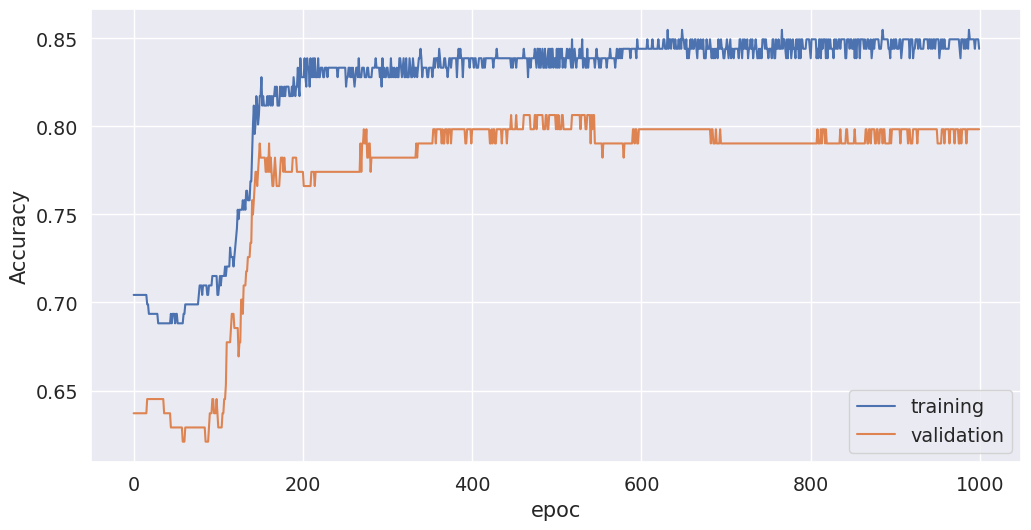

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.8730 - accuracy: 0.6562

186/186 [==============================] - 0s 825us/step - loss: 2.8894 - accuracy: 0.6935 - val_loss: 3.3270 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6462 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 2.3002 - accuracy: 0.6774 - val_loss: 2.7679 - val_accuracy: 0.5968


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2243 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 1.9196 - accuracy: 0.6774 - val_loss: 2.4214 - val_accuracy: 0.5403


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7330 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 1.6696 - accuracy: 0.6344 - val_loss: 2.2058 - val_accuracy: 0.5323


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9229 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 1.5317 - accuracy: 0.6183 - val_loss: 2.0753 - val_accuracy: 0.5081


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8346 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 1.4528 - accuracy: 0.5914 - val_loss: 1.9956 - val_accuracy: 0.5000


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2597 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 1.4002 - accuracy: 0.5860 - val_loss: 1.9361 - val_accuracy: 0.4839


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6379 - accuracy: 0.5625

186/186 [==============================] - 0s 68us/step - loss: 1.3640 - accuracy: 0.5968 - val_loss: 1.8814 - val_accuracy: 0.5000


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3415 - accuracy: 0.4062

186/186 [==============================] - 0s 55us/step - loss: 1.3247 - accuracy: 0.5968 - val_loss: 1.8388 - val_accuracy: 0.5161


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6030 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 1.3007 - accuracy: 0.5914 - val_loss: 1.8059 - val_accuracy: 0.5161


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2576 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 1.2565 - accuracy: 0.5914 - val_loss: 1.7664 - val_accuracy: 0.5161


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8335 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 1.2207 - accuracy: 0.6022 - val_loss: 1.7385 - val_accuracy: 0.5161


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8429 - accuracy: 0.5000

186/186 [==============================] - 0s 58us/step - loss: 1.1978 - accuracy: 0.6022 - val_loss: 1.7140 - val_accuracy: 0.5323


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1161 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 1.1715 - accuracy: 0.6183 - val_loss: 1.6777 - val_accuracy: 0.5242


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7244 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 1.1377 - accuracy: 0.6129 - val_loss: 1.6587 - val_accuracy: 0.5242


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8336 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 1.1227 - accuracy: 0.6022 - val_loss: 1.6327 - val_accuracy: 0.5403


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5930 - accuracy: 0.5625

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 60us/step - loss: 1.0865 - accuracy: 0.6398 - val_loss: 1.6038 - val_accuracy: 0.5403


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9787 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 1.0731 - accuracy: 0.6344 - val_loss: 1.5810 - val_accuracy: 0.5242


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2778 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 1.0387 - accuracy: 0.6559 - val_loss: 1.5563 - val_accuracy: 0.5242


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5009 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 1.0236 - accuracy: 0.6559 - val_loss: 1.5351 - val_accuracy: 0.5323


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1850 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.9995 - accuracy: 0.6505 - val_loss: 1.5181 - val_accuracy: 0.5323


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1722 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.9853 - accuracy: 0.6667 - val_loss: 1.5027 - val_accuracy: 0.5403


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5596 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.9603 - accuracy: 0.6720 - val_loss: 1.4815 - val_accuracy: 0.5484


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7535 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.9465 - accuracy: 0.6667 - val_loss: 1.4758 - val_accuracy: 0.5403


Epoch 25/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7500



186/186 [==============================] - 0s 60us/step - loss: 0.9268 - accuracy: 0.6774 - val_loss: 1.4660 - val_accuracy: 0.5323


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4585 - accuracy: 0.5000

186/186 [==============================] - 0s 50us/step - loss: 0.9202 - accuracy: 0.6828 - val_loss: 1.4409 - val_accuracy: 0.5565


Epoch 27/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8503 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.9127 - accuracy: 0.6774 - val_loss: 1.4304 - val_accuracy: 0.5565


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6944 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.9004 - accuracy: 0.6882 - val_loss: 1.4216 - val_accuracy: 0.5484


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.3875 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.8808 - accuracy: 0.6882 - val_loss: 1.4071 - val_accuracy: 0.5484


Epoch 30/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.8831 - accuracy: 0.6828 - val_loss: 1.3958 - val_accuracy: 0.5484


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8091 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.8642 - accuracy: 0.6935 - val_loss: 1.3864 - val_accuracy: 0.5565


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9676 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.8583 - accuracy: 0.6828 - val_loss: 1.3752 - val_accuracy: 0.5645


Epoch 33/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8481 - accuracy: 0.6774 - val_loss: 1.3646 - val_accuracy: 0.5565


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6879 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.8399 - accuracy: 0.6882 - val_loss: 1.3529 - val_accuracy: 0.5403


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0705 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.8316 - accuracy: 0.6882 - val_loss: 1.3425 - val_accuracy: 0.5484


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8934 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.8248 - accuracy: 0.6935 - val_loss: 1.3323 - val_accuracy: 0.5565


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5793 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8104 - accuracy: 0.6935 - val_loss: 1.3249 - val_accuracy: 0.5645


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9120 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.8072 - accuracy: 0.6882 - val_loss: 1.3110 - val_accuracy: 0.5484


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7084 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.7985 - accuracy: 0.6882 - val_loss: 1.2996 - val_accuracy: 0.5484


Epoch 40/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.7936 - accuracy: 0.6828 - val_loss: 1.2912 - val_accuracy: 0.5484


Epoch 41/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.0659 - accuracy: 0.5938



186/186 [==============================] - 0s 61us/step - loss: 0.7862 - accuracy: 0.6882 - val_loss: 1.2815 - val_accuracy: 0.5565


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.7500

186/186 [==============================] - 0s 82us/step - loss: 0.7804 - accuracy: 0.6935 - val_loss: 1.2659 - val_accuracy: 0.5484


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8744 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7690 - accuracy: 0.6935 - val_loss: 1.2594 - val_accuracy: 0.5565


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.7699 - accuracy: 0.6989 - val_loss: 1.2440 - val_accuracy: 0.5484


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9795 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.7594 - accuracy: 0.7043 - val_loss: 1.2339 - val_accuracy: 0.5565


Epoch 46/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7336 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.7576 - accuracy: 0.7043 - val_loss: 1.2258 - val_accuracy: 0.5645


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7269 - accuracy: 0.6562

186/186 [==============================] - 0s 82us/step - loss: 0.7458 - accuracy: 0.7043 - val_loss: 1.2133 - val_accuracy: 0.5484


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7047 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.7412 - accuracy: 0.7043 - val_loss: 1.2030 - val_accuracy: 0.5484


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6831 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.7357 - accuracy: 0.7043 - val_loss: 1.1927 - val_accuracy: 0.5484


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7467 - accuracy: 0.6562



186/186 [==============================] - 0s 68us/step - loss: 0.7270 - accuracy: 0.6989 - val_loss: 1.1870 - val_accuracy: 0.5726


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8756 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.7288 - accuracy: 0.7097 - val_loss: 1.1717 - val_accuracy: 0.5645


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9632 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.7154 - accuracy: 0.7043 - val_loss: 1.1642 - val_accuracy: 0.5726


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.7163 - accuracy: 0.7097 - val_loss: 1.1506 - val_accuracy: 0.5484


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7526 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.7029 - accuracy: 0.7043 - val_loss: 1.1403 - val_accuracy: 0.5565


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7812

186/186 [==============================] - 0s 85us/step - loss: 0.7030 - accuracy: 0.7204 - val_loss: 1.1288 - val_accuracy: 0.5484


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9516 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6948 - accuracy: 0.7043 - val_loss: 1.1212 - val_accuracy: 0.5806


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6837 - accuracy: 0.7204 - val_loss: 1.1114 - val_accuracy: 0.5806


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6975 - accuracy: 0.7097 - val_loss: 1.1045 - val_accuracy: 0.5806


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9983 - accuracy: 0.5312



186/186 [==============================] - 0s 59us/step - loss: 0.6822 - accuracy: 0.7151 - val_loss: 1.0938 - val_accuracy: 0.5806


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6820 - accuracy: 0.7097 - val_loss: 1.0851 - val_accuracy: 0.5806


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0134 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6651 - accuracy: 0.7151 - val_loss: 1.0711 - val_accuracy: 0.5726


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6699 - accuracy: 0.7097 - val_loss: 1.0644 - val_accuracy: 0.5806


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6685 - accuracy: 0.7258 - val_loss: 1.0553 - val_accuracy: 0.5806


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6588 - accuracy: 0.7097 - val_loss: 1.0465 - val_accuracy: 0.5806


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5175 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6546 - accuracy: 0.7312 - val_loss: 1.0401 - val_accuracy: 0.5887


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8097 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6472 - accuracy: 0.7258 - val_loss: 1.0299 - val_accuracy: 0.5645


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7572 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6381 - accuracy: 0.7312 - val_loss: 1.0330 - val_accuracy: 0.5887


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6193 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6382 - accuracy: 0.7097 - val_loss: 1.0199 - val_accuracy: 0.5887


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6316 - accuracy: 0.7312 - val_loss: 1.0074 - val_accuracy: 0.5887


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6250 - accuracy: 0.7151 - val_loss: 0.9980 - val_accuracy: 0.5887


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7670 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6198 - accuracy: 0.7204 - val_loss: 0.9829 - val_accuracy: 0.5645


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6160 - accuracy: 0.7258 - val_loss: 0.9734 - val_accuracy: 0.5968


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7938 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.6138 - accuracy: 0.7097 - val_loss: 0.9762 - val_accuracy: 0.5887


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6024 - accuracy: 0.7312 - val_loss: 0.9672 - val_accuracy: 0.5968


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6011 - accuracy: 0.7312 - val_loss: 0.9561 - val_accuracy: 0.5887


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5934 - accuracy: 0.7312 - val_loss: 0.9403 - val_accuracy: 0.5968


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5909 - accuracy: 0.7312 - val_loss: 0.9402 - val_accuracy: 0.6048


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6990 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5889 - accuracy: 0.7258 - val_loss: 0.9299 - val_accuracy: 0.6048


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6261 - accuracy: 0.6875



186/186 [==============================] - 0s 58us/step - loss: 0.5774 - accuracy: 0.7366 - val_loss: 0.9220 - val_accuracy: 0.6048


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5759 - accuracy: 0.7312 - val_loss: 0.9208 - val_accuracy: 0.6048


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5729 - accuracy: 0.7581 - val_loss: 0.8903 - val_accuracy: 0.6129


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7431 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.5686 - accuracy: 0.7312 - val_loss: 0.8837 - val_accuracy: 0.6129


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4934 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5574 - accuracy: 0.7204 - val_loss: 0.8796 - val_accuracy: 0.6048


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7608 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5556 - accuracy: 0.7312 - val_loss: 0.8719 - val_accuracy: 0.5968


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7286 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5492 - accuracy: 0.7366 - val_loss: 0.8796 - val_accuracy: 0.6048


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.7812

186/186 [==============================] - 0s 83us/step - loss: 0.5497 - accuracy: 0.7473 - val_loss: 0.8635 - val_accuracy: 0.6129


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7500

186/186 [==============================] - 0s 74us/step - loss: 0.5502 - accuracy: 0.7366 - val_loss: 0.8735 - val_accuracy: 0.6290


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5432 - accuracy: 0.7634 - val_loss: 0.8552 - val_accuracy: 0.6129


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7003 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5328 - accuracy: 0.7527 - val_loss: 0.8476 - val_accuracy: 0.6129


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5602 - accuracy: 0.8125

186/186 [==============================] - 0s 76us/step - loss: 0.5384 - accuracy: 0.7473 - val_loss: 0.8413 - val_accuracy: 0.6210


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.5359 - accuracy: 0.7419 - val_loss: 0.8287 - val_accuracy: 0.6129


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5199 - accuracy: 0.7581 - val_loss: 0.8168 - val_accuracy: 0.6129


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.7812

186/186 [==============================] - 0s 73us/step - loss: 0.5312 - accuracy: 0.7581 - val_loss: 0.8123 - val_accuracy: 0.6129


Epoch 94/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5128 - accuracy: 0.7473 - val_loss: 0.8071 - val_accuracy: 0.6210


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5098 - accuracy: 0.7581 - val_loss: 0.7997 - val_accuracy: 0.6210


Epoch 96/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5653 - accuracy: 0.7500



186/186 [==============================] - 0s 63us/step - loss: 0.5096 - accuracy: 0.7527 - val_loss: 0.7983 - val_accuracy: 0.6371


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4175 - accuracy: 0.7812

186/186 [==============================] - 0s 80us/step - loss: 0.5024 - accuracy: 0.7581 - val_loss: 0.7834 - val_accuracy: 0.6210


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.5026 - accuracy: 0.7419 - val_loss: 0.7809 - val_accuracy: 0.6371


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4978 - accuracy: 0.7527 - val_loss: 0.7637 - val_accuracy: 0.6210


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4918 - accuracy: 0.7796 - val_loss: 0.7570 - val_accuracy: 0.6210


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5544 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4876 - accuracy: 0.7581 - val_loss: 0.7517 - val_accuracy: 0.6210


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4866 - accuracy: 0.7634 - val_loss: 0.7516 - val_accuracy: 0.6452


Epoch 103/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4817 - accuracy: 0.7796 - val_loss: 0.7322 - val_accuracy: 0.6290


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4911 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4779 - accuracy: 0.7634 - val_loss: 0.7438 - val_accuracy: 0.6613


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4704 - accuracy: 0.7742 - val_loss: 0.7206 - val_accuracy: 0.6371


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8438

186/186 [==============================] - 0s 79us/step - loss: 0.4679 - accuracy: 0.7527 - val_loss: 0.7200 - val_accuracy: 0.6532


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4650 - accuracy: 0.7742 - val_loss: 0.7221 - val_accuracy: 0.6935


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.4574 - accuracy: 0.7849 - val_loss: 0.6936 - val_accuracy: 0.6452


Epoch 109/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.3656 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4530 - accuracy: 0.7688 - val_loss: 0.7035 - val_accuracy: 0.6855


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4540 - accuracy: 0.8011 - val_loss: 0.6900 - val_accuracy: 0.6532


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.4478 - accuracy: 0.7903 - val_loss: 0.6766 - val_accuracy: 0.6452


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4419 - accuracy: 0.7634 - val_loss: 0.7091 - val_accuracy: 0.7258


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4383 - accuracy: 0.8011 - val_loss: 0.6653 - val_accuracy: 0.6532


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.6562



186/186 [==============================] - 0s 53us/step - loss: 0.4458 - accuracy: 0.7742 - val_loss: 0.6762 - val_accuracy: 0.7016


Epoch 115/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8438



186/186 [==============================] - 0s 63us/step - loss: 0.4314 - accuracy: 0.7796 - val_loss: 0.6623 - val_accuracy: 0.6774


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4326 - accuracy: 0.7634 - val_loss: 0.6759 - val_accuracy: 0.7177


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.4311 - accuracy: 0.7849 - val_loss: 0.6807 - val_accuracy: 0.7419


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4295 - accuracy: 0.7849 - val_loss: 0.6522 - val_accuracy: 0.7016


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.4264 - accuracy: 0.8065 - val_loss: 0.6400 - val_accuracy: 0.6774


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4227 - accuracy: 0.7796 - val_loss: 0.6662 - val_accuracy: 0.7419


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4204 - accuracy: 0.8011 - val_loss: 0.6323 - val_accuracy: 0.6855


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5044 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4131 - accuracy: 0.7903 - val_loss: 0.6555 - val_accuracy: 0.7339


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4160 - accuracy: 0.7903 - val_loss: 0.6596 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4121 - accuracy: 0.7957 - val_loss: 0.6521 - val_accuracy: 0.7339


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4095 - accuracy: 0.8118 - val_loss: 0.6435 - val_accuracy: 0.7258


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4097 - accuracy: 0.8065 - val_loss: 0.6170 - val_accuracy: 0.7177


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.4114 - accuracy: 0.7957 - val_loss: 0.6228 - val_accuracy: 0.7258


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4063 - accuracy: 0.8118 - val_loss: 0.6363 - val_accuracy: 0.7258


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3982 - accuracy: 0.8065 - val_loss: 0.6025 - val_accuracy: 0.7258


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5416 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3981 - accuracy: 0.7957 - val_loss: 0.6146 - val_accuracy: 0.7339


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3957 - accuracy: 0.8172 - val_loss: 0.5988 - val_accuracy: 0.7258


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5155 - accuracy: 0.5938



186/186 [==============================] - 0s 165us/step - loss: 0.4017 - accuracy: 0.7796 - val_loss: 0.6066 - val_accuracy: 0.7258


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3917 - accuracy: 0.8011 - val_loss: 0.6012 - val_accuracy: 0.7258


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4943 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3902 - accuracy: 0.8065 - val_loss: 0.5900 - val_accuracy: 0.7339


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3899 - accuracy: 0.8226 - val_loss: 0.5849 - val_accuracy: 0.7339


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3849 - accuracy: 0.8011 - val_loss: 0.5975 - val_accuracy: 0.7177


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3894 - accuracy: 0.8065 - val_loss: 0.5886 - val_accuracy: 0.7258


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3838 - accuracy: 0.8172 - val_loss: 0.5789 - val_accuracy: 0.7258


Epoch 139/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3794 - accuracy: 0.8065 - val_loss: 0.5866 - val_accuracy: 0.7258


Epoch 140/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.8438

186/186 [==============================] - 0s 94us/step - loss: 0.3759 - accuracy: 0.8118 - val_loss: 0.5921 - val_accuracy: 0.7177


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3777 - accuracy: 0.8172 - val_loss: 0.5850 - val_accuracy: 0.7258


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4649 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3772 - accuracy: 0.8226 - val_loss: 0.5684 - val_accuracy: 0.7258


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3704 - accuracy: 0.8226 - val_loss: 0.5525 - val_accuracy: 0.7500


Epoch 144/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3721 - accuracy: 0.8280 - val_loss: 0.5470 - val_accuracy: 0.7258


Epoch 145/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3745 - accuracy: 0.8172 - val_loss: 0.5478 - val_accuracy: 0.7419


Epoch 146/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3693 - accuracy: 0.8333 - val_loss: 0.5659 - val_accuracy: 0.7177


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3644 - accuracy: 0.8118 - val_loss: 0.5450 - val_accuracy: 0.7258


Epoch 148/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8125

186/186 [==============================] - 0s 82us/step - loss: 0.3646 - accuracy: 0.8172 - val_loss: 0.5481 - val_accuracy: 0.7258


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3680 - accuracy: 0.8226 - val_loss: 0.5821 - val_accuracy: 0.7258


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8125

186/186 [==============================] - 0s 94us/step - loss: 0.3668 - accuracy: 0.8226 - val_loss: 0.5721 - val_accuracy: 0.7258


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3658 - accuracy: 0.8118 - val_loss: 0.5890 - val_accuracy: 0.7177


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3689 - accuracy: 0.8118 - val_loss: 0.5718 - val_accuracy: 0.7258


Epoch 153/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.3653 - accuracy: 0.8226 - val_loss: 0.5519 - val_accuracy: 0.7339


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3568 - accuracy: 0.8280 - val_loss: 0.5358 - val_accuracy: 0.7339


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7500

186/186 [==============================] - 0s 79us/step - loss: 0.3567 - accuracy: 0.8118 - val_loss: 0.5651 - val_accuracy: 0.7258


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3553 - accuracy: 0.8333 - val_loss: 0.5302 - val_accuracy: 0.7339


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3518 - accuracy: 0.8280 - val_loss: 0.5567 - val_accuracy: 0.7258


Epoch 158/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5000 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3499 - accuracy: 0.8333 - val_loss: 0.5193 - val_accuracy: 0.7419


Epoch 159/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3671 - accuracy: 0.8226 - val_loss: 0.5283 - val_accuracy: 0.7258


Epoch 160/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.3479 - accuracy: 0.8172 - val_loss: 0.5389 - val_accuracy: 0.7339


Epoch 161/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.5224 - val_accuracy: 0.7177


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3528 - accuracy: 0.8172 - val_loss: 0.5235 - val_accuracy: 0.7339


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3579 - accuracy: 0.8118 - val_loss: 0.5231 - val_accuracy: 0.7339


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.3475 - accuracy: 0.8226 - val_loss: 0.5195 - val_accuracy: 0.7258


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.5938

186/186 [==============================] - 0s 65us/step - loss: 0.3430 - accuracy: 0.8226 - val_loss: 0.5497 - val_accuracy: 0.7258


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3493 - accuracy: 0.8280 - val_loss: 0.5279 - val_accuracy: 0.7339


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.5400 - val_accuracy: 0.7258


Epoch 168/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.5140 - val_accuracy: 0.7419


Epoch 169/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3426 - accuracy: 0.8226 - val_loss: 0.5374 - val_accuracy: 0.7258


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3436 - accuracy: 0.8280 - val_loss: 0.5328 - val_accuracy: 0.7258


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3432 - accuracy: 0.8441 - val_loss: 0.5300 - val_accuracy: 0.7258


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.3401 - accuracy: 0.8387 - val_loss: 0.5130 - val_accuracy: 0.7339


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3435 - accuracy: 0.8280 - val_loss: 0.5083 - val_accuracy: 0.7500


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.5607 - val_accuracy: 0.7339


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3404 - accuracy: 0.8387 - val_loss: 0.5038 - val_accuracy: 0.7500


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.5481 - val_accuracy: 0.7258


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3416 - accuracy: 0.8387 - val_loss: 0.5138 - val_accuracy: 0.7339


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3358 - accuracy: 0.8280 - val_loss: 0.5085 - val_accuracy: 0.7581


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3344 - accuracy: 0.8280 - val_loss: 0.4957 - val_accuracy: 0.7419


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.3417 - accuracy: 0.8333 - val_loss: 0.5003 - val_accuracy: 0.7500


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3338 - accuracy: 0.8387 - val_loss: 0.5175 - val_accuracy: 0.7177


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3441 - accuracy: 0.8280 - val_loss: 0.5021 - val_accuracy: 0.7581


Epoch 183/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3315 - accuracy: 0.8226 - val_loss: 0.4943 - val_accuracy: 0.7500


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3317 - accuracy: 0.8280 - val_loss: 0.5103 - val_accuracy: 0.7339


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3335 - accuracy: 0.8441 - val_loss: 0.5354 - val_accuracy: 0.7258


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3340 - accuracy: 0.8333 - val_loss: 0.4994 - val_accuracy: 0.7581


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3295 - accuracy: 0.8387 - val_loss: 0.4958 - val_accuracy: 0.7581


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3283 - accuracy: 0.8333 - val_loss: 0.4863 - val_accuracy: 0.7500


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3338 - accuracy: 0.8548 - val_loss: 0.5338 - val_accuracy: 0.7339


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3330 - accuracy: 0.8226 - val_loss: 0.5053 - val_accuracy: 0.7500


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3344 - accuracy: 0.8280 - val_loss: 0.4954 - val_accuracy: 0.7581


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3293 - accuracy: 0.8441 - val_loss: 0.5046 - val_accuracy: 0.7500


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3338 - accuracy: 0.8172 - val_loss: 0.4980 - val_accuracy: 0.7500


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.5018 - val_accuracy: 0.7500


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3295 - accuracy: 0.8333 - val_loss: 0.5048 - val_accuracy: 0.7500


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7500



186/186 [==============================] - 0s 60us/step - loss: 0.3260 - accuracy: 0.8226 - val_loss: 0.5032 - val_accuracy: 0.7500


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3321 - accuracy: 0.8333 - val_loss: 0.5097 - val_accuracy: 0.7500


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3282 - accuracy: 0.8226 - val_loss: 0.5067 - val_accuracy: 0.7500


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.3261 - accuracy: 0.8333 - val_loss: 0.5046 - val_accuracy: 0.7500


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3303 - accuracy: 0.8441 - val_loss: 0.4953 - val_accuracy: 0.7500


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3258 - accuracy: 0.8226 - val_loss: 0.5059 - val_accuracy: 0.7500


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3271 - accuracy: 0.8387 - val_loss: 0.4848 - val_accuracy: 0.7742


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3254 - accuracy: 0.8441 - val_loss: 0.4964 - val_accuracy: 0.7500


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3196 - accuracy: 0.8387 - val_loss: 0.4728 - val_accuracy: 0.7823


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3286 - accuracy: 0.8387 - val_loss: 0.4740 - val_accuracy: 0.7742


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3294 - accuracy: 0.8333 - val_loss: 0.4738 - val_accuracy: 0.7742


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3241 - accuracy: 0.8602 - val_loss: 0.4865 - val_accuracy: 0.7661


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.3291 - accuracy: 0.8387 - val_loss: 0.4938 - val_accuracy: 0.7500


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.3299 - accuracy: 0.8280 - val_loss: 0.4968 - val_accuracy: 0.7500


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4568 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3237 - accuracy: 0.8226 - val_loss: 0.4863 - val_accuracy: 0.7661


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3207 - accuracy: 0.8548 - val_loss: 0.5145 - val_accuracy: 0.7500


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3289 - accuracy: 0.8172 - val_loss: 0.4786 - val_accuracy: 0.7742


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3239 - accuracy: 0.8387 - val_loss: 0.4771 - val_accuracy: 0.7742


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3217 - accuracy: 0.8333 - val_loss: 0.4732 - val_accuracy: 0.7661


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3203 - accuracy: 0.8441 - val_loss: 0.4767 - val_accuracy: 0.7742


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3236 - accuracy: 0.8441 - val_loss: 0.4730 - val_accuracy: 0.7742


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8750



186/186 [==============================] - 0s 73us/step - loss: 0.3232 - accuracy: 0.8441 - val_loss: 0.4810 - val_accuracy: 0.7661


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3203 - accuracy: 0.8441 - val_loss: 0.4826 - val_accuracy: 0.7661


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3177 - accuracy: 0.8333 - val_loss: 0.4885 - val_accuracy: 0.7661


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3212 - accuracy: 0.8172 - val_loss: 0.4690 - val_accuracy: 0.7903


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3184 - accuracy: 0.8495 - val_loss: 0.4940 - val_accuracy: 0.7581


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3197 - accuracy: 0.8280 - val_loss: 0.4829 - val_accuracy: 0.7661


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3160 - accuracy: 0.8495 - val_loss: 0.5107 - val_accuracy: 0.7581


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3235 - accuracy: 0.8065 - val_loss: 0.4839 - val_accuracy: 0.7661


Epoch 225/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3195 - accuracy: 0.8548 - val_loss: 0.4693 - val_accuracy: 0.7903


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3209 - accuracy: 0.8495 - val_loss: 0.4834 - val_accuracy: 0.7661


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.3248 - accuracy: 0.8333 - val_loss: 0.4897 - val_accuracy: 0.7661


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3196 - accuracy: 0.8280 - val_loss: 0.4803 - val_accuracy: 0.7661


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3186 - accuracy: 0.8441 - val_loss: 0.4723 - val_accuracy: 0.7823


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.3221 - accuracy: 0.8441 - val_loss: 0.4743 - val_accuracy: 0.7742


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2300 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3173 - accuracy: 0.8387 - val_loss: 0.4730 - val_accuracy: 0.7742


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3177 - accuracy: 0.8495 - val_loss: 0.4867 - val_accuracy: 0.7742


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3255 - accuracy: 0.8333 - val_loss: 0.4833 - val_accuracy: 0.7661


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.3190 - accuracy: 0.8387 - val_loss: 0.4865 - val_accuracy: 0.7742


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3151 - accuracy: 0.8441 - val_loss: 0.4747 - val_accuracy: 0.7661


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3170 - accuracy: 0.8387 - val_loss: 0.5030 - val_accuracy: 0.7661


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3162 - accuracy: 0.8333 - val_loss: 0.4680 - val_accuracy: 0.7903


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.4812 - val_accuracy: 0.7661


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.4702 - val_accuracy: 0.7742


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.3167 - accuracy: 0.8441 - val_loss: 0.4750 - val_accuracy: 0.7742


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2224 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3167 - accuracy: 0.8495 - val_loss: 0.4674 - val_accuracy: 0.7903


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3169 - accuracy: 0.8387 - val_loss: 0.4613 - val_accuracy: 0.7903


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3226 - accuracy: 0.8387 - val_loss: 0.4789 - val_accuracy: 0.7661


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3157 - accuracy: 0.8495 - val_loss: 0.4945 - val_accuracy: 0.7742


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3172 - accuracy: 0.8441 - val_loss: 0.4723 - val_accuracy: 0.7742


Epoch 246/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3140 - accuracy: 0.8441 - val_loss: 0.4822 - val_accuracy: 0.7661


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3156 - accuracy: 0.8387 - val_loss: 0.5099 - val_accuracy: 0.7661


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3158 - accuracy: 0.8333 - val_loss: 0.4645 - val_accuracy: 0.7984


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3156 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.7984


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3158 - accuracy: 0.8387 - val_loss: 0.4881 - val_accuracy: 0.7742


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.3157 - accuracy: 0.8387 - val_loss: 0.4939 - val_accuracy: 0.7823


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3280 - accuracy: 0.8280 - val_loss: 0.4774 - val_accuracy: 0.7661


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3148 - accuracy: 0.8441 - val_loss: 0.4662 - val_accuracy: 0.7823


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4714 - val_accuracy: 0.7823


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3124 - accuracy: 0.8495 - val_loss: 0.4821 - val_accuracy: 0.7661


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4590 - val_accuracy: 0.7984


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3254 - accuracy: 0.8495 - val_loss: 0.4735 - val_accuracy: 0.7742


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4208 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3180 - accuracy: 0.8387 - val_loss: 0.4793 - val_accuracy: 0.7661


Epoch 259/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.3160 - accuracy: 0.8387 - val_loss: 0.4803 - val_accuracy: 0.7661


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.6250

186/186 [==============================] - 0s 67us/step - loss: 0.3128 - accuracy: 0.8387 - val_loss: 0.4733 - val_accuracy: 0.7823


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8387 - val_loss: 0.5025 - val_accuracy: 0.7742


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4908 - val_accuracy: 0.7823


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.9375

186/186 [==============================] - 0s 97us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4841 - val_accuracy: 0.7742


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3125 - accuracy: 0.8387 - val_loss: 0.4807 - val_accuracy: 0.7661


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3213 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.7823


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3154 - accuracy: 0.8387 - val_loss: 0.4674 - val_accuracy: 0.7903


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3128 - accuracy: 0.8548 - val_loss: 0.4605 - val_accuracy: 0.7984


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4652 - val_accuracy: 0.7823


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1837 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3136 - accuracy: 0.8495 - val_loss: 0.4705 - val_accuracy: 0.7903


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3174 - accuracy: 0.8387 - val_loss: 0.4731 - val_accuracy: 0.7823


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2190 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3106 - accuracy: 0.8495 - val_loss: 0.4639 - val_accuracy: 0.7823


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3165 - accuracy: 0.8226 - val_loss: 0.4653 - val_accuracy: 0.7823


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3146 - accuracy: 0.8441 - val_loss: 0.4974 - val_accuracy: 0.7823


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2174 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3149 - accuracy: 0.8333 - val_loss: 0.4775 - val_accuracy: 0.7742


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2019 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.3132 - accuracy: 0.8548 - val_loss: 0.4599 - val_accuracy: 0.7903


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.3201 - accuracy: 0.8118 - val_loss: 0.4662 - val_accuracy: 0.7903


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3097 - accuracy: 0.8441 - val_loss: 0.4934 - val_accuracy: 0.7823


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3145 - accuracy: 0.8387 - val_loss: 0.4776 - val_accuracy: 0.7823


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3154 - accuracy: 0.8495 - val_loss: 0.4785 - val_accuracy: 0.7823


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3144 - accuracy: 0.8441 - val_loss: 0.4749 - val_accuracy: 0.7823


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.3144 - accuracy: 0.8387 - val_loss: 0.4710 - val_accuracy: 0.7903


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3115 - accuracy: 0.8495 - val_loss: 0.4655 - val_accuracy: 0.7903


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2691 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3100 - accuracy: 0.8441 - val_loss: 0.4575 - val_accuracy: 0.8145


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3157 - accuracy: 0.8441 - val_loss: 0.4696 - val_accuracy: 0.7903


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5594 - accuracy: 0.7188



186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.4872 - val_accuracy: 0.7742


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3105 - accuracy: 0.8441 - val_loss: 0.4723 - val_accuracy: 0.7903


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4386 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3138 - accuracy: 0.8387 - val_loss: 0.4655 - val_accuracy: 0.7903


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3183 - accuracy: 0.8280 - val_loss: 0.4668 - val_accuracy: 0.7903


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3144 - accuracy: 0.8280 - val_loss: 0.4683 - val_accuracy: 0.7903


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3101 - accuracy: 0.8495 - val_loss: 0.4869 - val_accuracy: 0.7742


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.7812

186/186 [==============================] - 0s 77us/step - loss: 0.3094 - accuracy: 0.8441 - val_loss: 0.4861 - val_accuracy: 0.7742


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4035 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3133 - accuracy: 0.8441 - val_loss: 0.4769 - val_accuracy: 0.7903


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3122 - accuracy: 0.8387 - val_loss: 0.4595 - val_accuracy: 0.7903


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3143 - accuracy: 0.8495 - val_loss: 0.4513 - val_accuracy: 0.7984


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3094 - accuracy: 0.8495 - val_loss: 0.4714 - val_accuracy: 0.7984


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.3133 - accuracy: 0.8387 - val_loss: 0.4695 - val_accuracy: 0.7903


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3097 - accuracy: 0.8387 - val_loss: 0.4761 - val_accuracy: 0.7903


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1701 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3061 - accuracy: 0.8441 - val_loss: 0.4473 - val_accuracy: 0.7742


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3152 - accuracy: 0.8280 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3117 - accuracy: 0.8441 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3978 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3130 - accuracy: 0.8280 - val_loss: 0.4699 - val_accuracy: 0.7984


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4990 - val_accuracy: 0.7823


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8438

186/186 [==============================] - 0s 82us/step - loss: 0.3166 - accuracy: 0.8495 - val_loss: 0.4783 - val_accuracy: 0.7823


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4496 - val_accuracy: 0.8065


Epoch 305/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3113 - accuracy: 0.8387 - val_loss: 0.4759 - val_accuracy: 0.7903


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3088 - accuracy: 0.8226 - val_loss: 0.4852 - val_accuracy: 0.7742


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1799 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3092 - accuracy: 0.8441 - val_loss: 0.4664 - val_accuracy: 0.7903


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.3126 - accuracy: 0.8495 - val_loss: 0.4616 - val_accuracy: 0.7903


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.8065


Epoch 311/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2426 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3131 - accuracy: 0.8495 - val_loss: 0.4690 - val_accuracy: 0.7984


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3110 - accuracy: 0.8333 - val_loss: 0.4882 - val_accuracy: 0.7742


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.9062

186/186 [==============================] - 0s 78us/step - loss: 0.3124 - accuracy: 0.8495 - val_loss: 0.4530 - val_accuracy: 0.8065


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.4567 - val_accuracy: 0.7823


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3128 - accuracy: 0.8495 - val_loss: 0.4647 - val_accuracy: 0.7903


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3121 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.7984


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3170 - accuracy: 0.8387 - val_loss: 0.4674 - val_accuracy: 0.7984


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3098 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7984


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2518 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4828 - val_accuracy: 0.7742


Epoch 320/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3094 - accuracy: 0.8656 - val_loss: 0.4669 - val_accuracy: 0.7984


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.3143 - accuracy: 0.8387 - val_loss: 0.4731 - val_accuracy: 0.7984


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3075 - accuracy: 0.8441 - val_loss: 0.4902 - val_accuracy: 0.7742


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4564 - val_accuracy: 0.7823


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3164 - accuracy: 0.8441 - val_loss: 0.4711 - val_accuracy: 0.7984


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7823


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4623 - val_accuracy: 0.7903


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3116 - accuracy: 0.8280 - val_loss: 0.4756 - val_accuracy: 0.7903


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.7903


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7823


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.4586 - val_accuracy: 0.7903


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3116 - accuracy: 0.8226 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3119 - accuracy: 0.8441 - val_loss: 0.4500 - val_accuracy: 0.8065


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.4548 - val_accuracy: 0.7823


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3140 - accuracy: 0.8387 - val_loss: 0.4657 - val_accuracy: 0.7984


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.8125

186/186 [==============================] - 0s 85us/step - loss: 0.3072 - accuracy: 0.8548 - val_loss: 0.4852 - val_accuracy: 0.7742


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3126 - accuracy: 0.8387 - val_loss: 0.4716 - val_accuracy: 0.7984


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3114 - accuracy: 0.8441 - val_loss: 0.4891 - val_accuracy: 0.7742


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4658 - val_accuracy: 0.7984


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3149 - accuracy: 0.8280 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3076 - accuracy: 0.8280 - val_loss: 0.4502 - val_accuracy: 0.7984


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4443 - val_accuracy: 0.7984


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7823


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3152 - accuracy: 0.8387 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.4613 - val_accuracy: 0.7984


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1681 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.3052 - accuracy: 0.8280 - val_loss: 0.4672 - val_accuracy: 0.7984


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3152 - accuracy: 0.8387 - val_loss: 0.4772 - val_accuracy: 0.7823


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4682 - val_accuracy: 0.7984


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4636 - val_accuracy: 0.7984


Epoch 349/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3081 - accuracy: 0.8441 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4651 - val_accuracy: 0.7984


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7903


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3061 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.7984


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3134 - accuracy: 0.8172 - val_loss: 0.4538 - val_accuracy: 0.7823


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3102 - accuracy: 0.8441 - val_loss: 0.4681 - val_accuracy: 0.7984


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3093 - accuracy: 0.8387 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3051 - accuracy: 0.8280 - val_loss: 0.4491 - val_accuracy: 0.7984


Epoch 357/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7984


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3092 - accuracy: 0.8172 - val_loss: 0.4716 - val_accuracy: 0.7984


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3086 - accuracy: 0.8172 - val_loss: 0.4534 - val_accuracy: 0.7823


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3121 - accuracy: 0.8441 - val_loss: 0.4659 - val_accuracy: 0.7984


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3145 - accuracy: 0.8280 - val_loss: 0.4766 - val_accuracy: 0.7903


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.4636 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2175 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.4628 - val_accuracy: 0.7984


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3049 - accuracy: 0.8387 - val_loss: 0.4531 - val_accuracy: 0.7903


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3105 - accuracy: 0.8387 - val_loss: 0.4445 - val_accuracy: 0.8065


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3088 - accuracy: 0.8226 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3076 - accuracy: 0.8280 - val_loss: 0.4687 - val_accuracy: 0.7984


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.4540 - val_accuracy: 0.7903


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4476 - val_accuracy: 0.8065


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7984


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4406 - val_accuracy: 0.7903


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3096 - accuracy: 0.8333 - val_loss: 0.4479 - val_accuracy: 0.8065


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3076 - accuracy: 0.8172 - val_loss: 0.4525 - val_accuracy: 0.7903


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3060 - accuracy: 0.8280 - val_loss: 0.4539 - val_accuracy: 0.7903


Epoch 375/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.4807 - val_accuracy: 0.7823


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3130 - accuracy: 0.8548 - val_loss: 0.4688 - val_accuracy: 0.7984


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.4755 - val_accuracy: 0.7984


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9062

186/186 [==============================] - 0s 76us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 379/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4722 - val_accuracy: 0.7984


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3111 - accuracy: 0.8495 - val_loss: 0.4735 - val_accuracy: 0.7984


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3106 - accuracy: 0.8387 - val_loss: 0.4521 - val_accuracy: 0.7903


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.4463 - val_accuracy: 0.8065


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3053 - accuracy: 0.8387 - val_loss: 0.4518 - val_accuracy: 0.7903


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.4695 - val_accuracy: 0.7984


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4660 - val_accuracy: 0.7984


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3034 - accuracy: 0.8333 - val_loss: 0.4585 - val_accuracy: 0.7984


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8280 - val_loss: 0.4546 - val_accuracy: 0.7984


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.7984


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3058 - accuracy: 0.8602 - val_loss: 0.4586 - val_accuracy: 0.7984


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8280 - val_loss: 0.4494 - val_accuracy: 0.8065


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3069 - accuracy: 0.8495 - val_loss: 0.4604 - val_accuracy: 0.7984


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3121 - accuracy: 0.8226 - val_loss: 0.4703 - val_accuracy: 0.7984


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.7984


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3040 - accuracy: 0.8280 - val_loss: 0.4682 - val_accuracy: 0.7984


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4607 - val_accuracy: 0.7984


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3047 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.7984


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3101 - accuracy: 0.8387 - val_loss: 0.4447 - val_accuracy: 0.7984


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.7984


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4488 - val_accuracy: 0.8065


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3105 - accuracy: 0.8118 - val_loss: 0.4525 - val_accuracy: 0.7903


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3037 - accuracy: 0.8226 - val_loss: 0.4606 - val_accuracy: 0.7984


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3071 - accuracy: 0.8118 - val_loss: 0.4637 - val_accuracy: 0.7984


Epoch 405/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4636 - val_accuracy: 0.7984


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1927 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3083 - accuracy: 0.8548 - val_loss: 0.4490 - val_accuracy: 0.8065


Epoch 407/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3036 - accuracy: 0.8280 - val_loss: 0.4654 - val_accuracy: 0.7984


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3056 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4806 - val_accuracy: 0.7984


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4649 - val_accuracy: 0.7984


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3038 - accuracy: 0.8387 - val_loss: 0.4488 - val_accuracy: 0.7984


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3038 - accuracy: 0.8441 - val_loss: 0.4530 - val_accuracy: 0.7903


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.4537 - val_accuracy: 0.7903


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8280 - val_loss: 0.4679 - val_accuracy: 0.7984


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.7188



186/186 [==============================] - 0s 57us/step - loss: 0.3028 - accuracy: 0.8280 - val_loss: 0.4515 - val_accuracy: 0.8065


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 74us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4765 - val_accuracy: 0.7984


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3035 - accuracy: 0.8333 - val_loss: 0.4987 - val_accuracy: 0.7823


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.4655 - val_accuracy: 0.7984


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3104 - accuracy: 0.8226 - val_loss: 0.4746 - val_accuracy: 0.7984


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4795 - val_accuracy: 0.7984


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1576 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3072 - accuracy: 0.8226 - val_loss: 0.4770 - val_accuracy: 0.7984


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3092 - accuracy: 0.8441 - val_loss: 0.4652 - val_accuracy: 0.7984


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3032 - accuracy: 0.8280 - val_loss: 0.4632 - val_accuracy: 0.7984


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1388 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4682 - val_accuracy: 0.7984


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.4496 - val_accuracy: 0.7984


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3016 - accuracy: 0.8387 - val_loss: 0.4899 - val_accuracy: 0.7742


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4717 - val_accuracy: 0.7984


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3033 - accuracy: 0.8387 - val_loss: 0.4650 - val_accuracy: 0.7984


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.4779 - val_accuracy: 0.7984


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3021 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3055 - accuracy: 0.8495 - val_loss: 0.4794 - val_accuracy: 0.7984


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7188



186/186 [==============================] - 0s 53us/step - loss: 0.3044 - accuracy: 0.8387 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.3063 - accuracy: 0.8333 - val_loss: 0.4620 - val_accuracy: 0.7984


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3052 - accuracy: 0.8280 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.4810 - val_accuracy: 0.7984


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4703 - val_accuracy: 0.7984


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.4804 - val_accuracy: 0.7984


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.9062



186/186 [==============================] - 0s 62us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.8145


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3042 - accuracy: 0.8333 - val_loss: 0.4726 - val_accuracy: 0.7984


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3051 - accuracy: 0.8441 - val_loss: 0.4804 - val_accuracy: 0.7984


Epoch 441/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.4671 - val_accuracy: 0.7984


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3021 - accuracy: 0.8172 - val_loss: 0.4900 - val_accuracy: 0.7823


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3030 - accuracy: 0.8333 - val_loss: 0.4742 - val_accuracy: 0.7984


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4509 - val_accuracy: 0.7984


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2061 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4435 - val_accuracy: 0.7984


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3050 - accuracy: 0.8280 - val_loss: 0.4417 - val_accuracy: 0.7903


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.4517 - val_accuracy: 0.7984


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3037 - accuracy: 0.8495 - val_loss: 0.4718 - val_accuracy: 0.7984


Epoch 449/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.4639 - val_accuracy: 0.7984


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.8065


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3029 - accuracy: 0.8333 - val_loss: 0.4431 - val_accuracy: 0.7903


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3114 - accuracy: 0.8172 - val_loss: 0.4669 - val_accuracy: 0.7984


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3007 - accuracy: 0.8387 - val_loss: 0.4836 - val_accuracy: 0.7984


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.4637 - val_accuracy: 0.7984


Epoch 455/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.8065


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3039 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.8065


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3011 - accuracy: 0.8280 - val_loss: 0.4601 - val_accuracy: 0.8065


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.3141 - accuracy: 0.8172 - val_loss: 0.4610 - val_accuracy: 0.8065


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2760 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3016 - accuracy: 0.8333 - val_loss: 0.4724 - val_accuracy: 0.7984


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3023 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.8065


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2190 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3033 - accuracy: 0.8387 - val_loss: 0.4787 - val_accuracy: 0.7984


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3026 - accuracy: 0.8172 - val_loss: 0.4499 - val_accuracy: 0.7903


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.4594 - val_accuracy: 0.8145


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3030 - accuracy: 0.8548 - val_loss: 0.4799 - val_accuracy: 0.7984


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.4551 - val_accuracy: 0.8065


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3013 - accuracy: 0.8280 - val_loss: 0.4779 - val_accuracy: 0.7984


Epoch 467/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.2995 - accuracy: 0.8441 - val_loss: 0.4466 - val_accuracy: 0.7984


Epoch 468/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3001 - accuracy: 0.8387 - val_loss: 0.4682 - val_accuracy: 0.7984


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3083 - accuracy: 0.8280 - val_loss: 0.4570 - val_accuracy: 0.8065


Epoch 470/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3010 - accuracy: 0.8280 - val_loss: 0.4557 - val_accuracy: 0.8065


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3046 - accuracy: 0.8333 - val_loss: 0.4595 - val_accuracy: 0.8065


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.3027 - accuracy: 0.8280 - val_loss: 0.4626 - val_accuracy: 0.8065


Epoch 473/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3032 - accuracy: 0.8387 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3002 - accuracy: 0.8441 - val_loss: 0.4690 - val_accuracy: 0.7984


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.4603 - val_accuracy: 0.8145


Epoch 476/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.4623 - val_accuracy: 0.8065


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2834 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3020 - accuracy: 0.8280 - val_loss: 0.4564 - val_accuracy: 0.8065


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4592 - val_accuracy: 0.8065


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3011 - accuracy: 0.8333 - val_loss: 0.4627 - val_accuracy: 0.8065


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3012 - accuracy: 0.8441 - val_loss: 0.4538 - val_accuracy: 0.7984


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3050 - accuracy: 0.8333 - val_loss: 0.4752 - val_accuracy: 0.7984


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.4776 - val_accuracy: 0.7984


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4527 - val_accuracy: 0.7984


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.4613 - val_accuracy: 0.8145


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3017 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7984


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.4553 - val_accuracy: 0.7984


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3002 - accuracy: 0.8495 - val_loss: 0.4717 - val_accuracy: 0.7984


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8125



186/186 [==============================] - 0s 62us/step - loss: 0.3068 - accuracy: 0.8548 - val_loss: 0.4638 - val_accuracy: 0.8065


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.3044 - accuracy: 0.8333 - val_loss: 0.4622 - val_accuracy: 0.8065


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3038 - accuracy: 0.8333 - val_loss: 0.4675 - val_accuracy: 0.7984


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1746 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4631 - val_accuracy: 0.8065


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3087 - accuracy: 0.8441 - val_loss: 0.4667 - val_accuracy: 0.7984


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3090 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.8065


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3019 - accuracy: 0.8441 - val_loss: 0.4753 - val_accuracy: 0.7984


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3019 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7903


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3010 - accuracy: 0.8387 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1106 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2995 - accuracy: 0.8441 - val_loss: 0.4614 - val_accuracy: 0.8065


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3043 - accuracy: 0.8441 - val_loss: 0.4565 - val_accuracy: 0.8065


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3053 - accuracy: 0.8226 - val_loss: 0.4704 - val_accuracy: 0.7984


Epoch 501/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.4735 - val_accuracy: 0.7984


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3015 - accuracy: 0.8333 - val_loss: 0.4500 - val_accuracy: 0.7984


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2054 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.4607 - val_accuracy: 0.8145


Epoch 504/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3060 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 505/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.4697 - val_accuracy: 0.7984


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.3016 - accuracy: 0.8226 - val_loss: 0.4563 - val_accuracy: 0.8065


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3000 - accuracy: 0.8280 - val_loss: 0.4764 - val_accuracy: 0.7984


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8438

186/186 [==============================] - 0s 82us/step - loss: 0.2997 - accuracy: 0.8172 - val_loss: 0.4786 - val_accuracy: 0.7984


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3033 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.8065


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3024 - accuracy: 0.8387 - val_loss: 0.4697 - val_accuracy: 0.7984


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.4603 - val_accuracy: 0.8065


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3021 - accuracy: 0.8172 - val_loss: 0.4760 - val_accuracy: 0.7984


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3014 - accuracy: 0.8441 - val_loss: 0.4483 - val_accuracy: 0.7984


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3073 - accuracy: 0.8495 - val_loss: 0.4514 - val_accuracy: 0.7984


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1486 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.7984


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.3023 - accuracy: 0.8333 - val_loss: 0.4728 - val_accuracy: 0.7984


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3034 - accuracy: 0.8333 - val_loss: 0.4677 - val_accuracy: 0.8065


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4492 - val_accuracy: 0.7984


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.8065


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4651 - val_accuracy: 0.8065


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2991 - accuracy: 0.8226 - val_loss: 0.4511 - val_accuracy: 0.7984


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3016 - accuracy: 0.8441 - val_loss: 0.4760 - val_accuracy: 0.7984


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3005 - accuracy: 0.8441 - val_loss: 0.4621 - val_accuracy: 0.8145


Epoch 525/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3020 - accuracy: 0.8280 - val_loss: 0.4742 - val_accuracy: 0.7984


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3004 - accuracy: 0.8333 - val_loss: 0.4667 - val_accuracy: 0.8065


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2992 - accuracy: 0.8280 - val_loss: 0.4628 - val_accuracy: 0.8145


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3002 - accuracy: 0.8441 - val_loss: 0.4966 - val_accuracy: 0.7823


Epoch 529/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2016 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3034 - accuracy: 0.8495 - val_loss: 0.4591 - val_accuracy: 0.7984


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2998 - accuracy: 0.8280 - val_loss: 0.4649 - val_accuracy: 0.8145


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1560 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3092 - accuracy: 0.8226 - val_loss: 0.4712 - val_accuracy: 0.7984


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3027 - accuracy: 0.8226 - val_loss: 0.4679 - val_accuracy: 0.8065


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.4584 - val_accuracy: 0.8065


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3001 - accuracy: 0.8226 - val_loss: 0.4567 - val_accuracy: 0.7984


Epoch 535/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.3050 - accuracy: 0.8280 - val_loss: 0.4616 - val_accuracy: 0.8145


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3006 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.8065


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2989 - accuracy: 0.8387 - val_loss: 0.4755 - val_accuracy: 0.7984


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.5014 - val_accuracy: 0.7742


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.4541 - val_accuracy: 0.7903


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3001 - accuracy: 0.8333 - val_loss: 0.4603 - val_accuracy: 0.7984


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.4699 - val_accuracy: 0.8065


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4626 - val_accuracy: 0.8145


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3003 - accuracy: 0.8280 - val_loss: 0.4598 - val_accuracy: 0.7984


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.4528 - val_accuracy: 0.7984


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2990 - accuracy: 0.8387 - val_loss: 0.4622 - val_accuracy: 0.8145


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4848 - val_accuracy: 0.7984


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3005 - accuracy: 0.8333 - val_loss: 0.4550 - val_accuracy: 0.7903


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4604 - val_accuracy: 0.7984


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3042 - accuracy: 0.8387 - val_loss: 0.4747 - val_accuracy: 0.7984


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.2992 - accuracy: 0.8441 - val_loss: 0.4726 - val_accuracy: 0.7984


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3040 - accuracy: 0.8333 - val_loss: 0.4819 - val_accuracy: 0.7984


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.4503 - val_accuracy: 0.7984


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2988 - accuracy: 0.8280 - val_loss: 0.4571 - val_accuracy: 0.8065


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4492 - val_accuracy: 0.7984


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3003 - accuracy: 0.8280 - val_loss: 0.4681 - val_accuracy: 0.8065


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3000 - accuracy: 0.8333 - val_loss: 0.4662 - val_accuracy: 0.8065


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1844 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3026 - accuracy: 0.8280 - val_loss: 0.4555 - val_accuracy: 0.7903


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2997 - accuracy: 0.8387 - val_loss: 0.4631 - val_accuracy: 0.8145


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3008 - accuracy: 0.8387 - val_loss: 0.4771 - val_accuracy: 0.7984


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.7188

186/186 [==============================] - 0s 70us/step - loss: 0.2983 - accuracy: 0.8441 - val_loss: 0.4478 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.2989 - accuracy: 0.8280 - val_loss: 0.4877 - val_accuracy: 0.7984


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3002 - accuracy: 0.8333 - val_loss: 0.4625 - val_accuracy: 0.8145


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2995 - accuracy: 0.8387 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2990 - accuracy: 0.8333 - val_loss: 0.4635 - val_accuracy: 0.8145


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1548 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.2970 - accuracy: 0.8226 - val_loss: 0.4793 - val_accuracy: 0.7984


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3001 - accuracy: 0.8333 - val_loss: 0.4704 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3096 - accuracy: 0.8280 - val_loss: 0.4559 - val_accuracy: 0.7903


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2979 - accuracy: 0.8172 - val_loss: 0.4556 - val_accuracy: 0.7903


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.3035 - accuracy: 0.8387 - val_loss: 0.4522 - val_accuracy: 0.7984


Epoch 572/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3009 - accuracy: 0.8441 - val_loss: 0.4639 - val_accuracy: 0.8145


Epoch 573/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.2967 - accuracy: 0.8333 - val_loss: 0.4984 - val_accuracy: 0.7823


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4620 - val_accuracy: 0.8065


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.5002 - val_accuracy: 0.7823


Epoch 576/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.4730 - val_accuracy: 0.7984


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.4679 - val_accuracy: 0.8065


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3001 - accuracy: 0.8226 - val_loss: 0.4601 - val_accuracy: 0.7984


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2993 - accuracy: 0.8387 - val_loss: 0.4630 - val_accuracy: 0.8145


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4620 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4897 - val_accuracy: 0.7984


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3004 - accuracy: 0.8387 - val_loss: 0.4723 - val_accuracy: 0.7984


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4210 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3022 - accuracy: 0.8441 - val_loss: 0.4673 - val_accuracy: 0.8065


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.7188

186/186 [==============================] - 0s 74us/step - loss: 0.3019 - accuracy: 0.8280 - val_loss: 0.4678 - val_accuracy: 0.8065


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4686 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3025 - accuracy: 0.8333 - val_loss: 0.4775 - val_accuracy: 0.7984


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4726 - val_accuracy: 0.7984


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3010 - accuracy: 0.8172 - val_loss: 0.4721 - val_accuracy: 0.7984


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2995 - accuracy: 0.8172 - val_loss: 0.4619 - val_accuracy: 0.8065


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1811 - accuracy: 0.9375

186/186 [==============================] - 0s 76us/step - loss: 0.2989 - accuracy: 0.8280 - val_loss: 0.4723 - val_accuracy: 0.8065


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2062 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3021 - accuracy: 0.8387 - val_loss: 0.4766 - val_accuracy: 0.7984


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4114 - accuracy: 0.7188



186/186 [==============================] - 0s 125us/step - loss: 0.3013 - accuracy: 0.8387 - val_loss: 0.4882 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8125

186/186 [==============================] - 0s 79us/step - loss: 0.3014 - accuracy: 0.8226 - val_loss: 0.4568 - val_accuracy: 0.8065


Epoch 594/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2979 - accuracy: 0.8602 - val_loss: 0.4456 - val_accuracy: 0.7823


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3028 - accuracy: 0.8441 - val_loss: 0.4514 - val_accuracy: 0.7984


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9688

186/186 [==============================] - 0s 67us/step - loss: 0.3016 - accuracy: 0.8387 - val_loss: 0.4536 - val_accuracy: 0.7984


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125



186/186 [==============================] - 0s 62us/step - loss: 0.2963 - accuracy: 0.8548 - val_loss: 0.4651 - val_accuracy: 0.8145


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2997 - accuracy: 0.8441 - val_loss: 0.4485 - val_accuracy: 0.7984


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2972 - accuracy: 0.8226 - val_loss: 0.4583 - val_accuracy: 0.8065


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.3038 - accuracy: 0.8333 - val_loss: 0.4524 - val_accuracy: 0.7984


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3063 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.8065


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.2959 - accuracy: 0.8495 - val_loss: 0.4983 - val_accuracy: 0.7903


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2998 - accuracy: 0.8280 - val_loss: 0.4790 - val_accuracy: 0.7984


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3030 - accuracy: 0.8280 - val_loss: 0.4674 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2980 - accuracy: 0.8226 - val_loss: 0.4511 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3002 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7984


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8125



186/186 [==============================] - 0s 71us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 610/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2971 - accuracy: 0.8495 - val_loss: 0.4873 - val_accuracy: 0.7984


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3094 - accuracy: 0.8441 - val_loss: 0.4645 - val_accuracy: 0.8145


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2971 - accuracy: 0.8280 - val_loss: 0.4537 - val_accuracy: 0.7984


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4504 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3000 - accuracy: 0.8333 - val_loss: 0.4521 - val_accuracy: 0.7984


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3046 - accuracy: 0.8280 - val_loss: 0.4557 - val_accuracy: 0.7903


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4663 - val_accuracy: 0.8145


Epoch 617/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3001 - accuracy: 0.8172 - val_loss: 0.4727 - val_accuracy: 0.8065


Epoch 618/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 84us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.4548 - val_accuracy: 0.7984


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4459 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.4506 - val_accuracy: 0.7984


Epoch 620/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.8065


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2985 - accuracy: 0.8333 - val_loss: 0.4530 - val_accuracy: 0.7984


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3028 - accuracy: 0.8333 - val_loss: 0.4550 - val_accuracy: 0.7984


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1605 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3056 - accuracy: 0.8280 - val_loss: 0.4595 - val_accuracy: 0.8065


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.7812

186/186 [==============================] - 0s 95us/step - loss: 0.2989 - accuracy: 0.8226 - val_loss: 0.4542 - val_accuracy: 0.7984


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2961 - accuracy: 0.8333 - val_loss: 0.4779 - val_accuracy: 0.7984


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7500

186/186 [==============================] - 0s 87us/step - loss: 0.2982 - accuracy: 0.8333 - val_loss: 0.4564 - val_accuracy: 0.7984


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.4652 - val_accuracy: 0.8145


Epoch 628/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.4855 - val_accuracy: 0.7984


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.3009 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.8065


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2977 - accuracy: 0.8280 - val_loss: 0.4510 - val_accuracy: 0.7984


Epoch 631/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2569 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2987 - accuracy: 0.8226 - val_loss: 0.4461 - val_accuracy: 0.7823


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4045 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2974 - accuracy: 0.8441 - val_loss: 0.4676 - val_accuracy: 0.8145


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2999 - accuracy: 0.8280 - val_loss: 0.4605 - val_accuracy: 0.7984


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3090 - accuracy: 0.8172 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4539 - val_accuracy: 0.7984


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.4561 - val_accuracy: 0.7984


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3009 - accuracy: 0.8226 - val_loss: 0.4714 - val_accuracy: 0.8065


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3003 - accuracy: 0.8226 - val_loss: 0.4561 - val_accuracy: 0.7984


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2990 - accuracy: 0.8387 - val_loss: 0.4690 - val_accuracy: 0.8145


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4594 - val_accuracy: 0.8065


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2966 - accuracy: 0.8280 - val_loss: 0.4707 - val_accuracy: 0.8065


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1577 - accuracy: 0.9688

186/186 [==============================] - 0s 89us/step - loss: 0.3024 - accuracy: 0.8226 - val_loss: 0.4529 - val_accuracy: 0.7984


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8125

186/186 [==============================] - 0s 77us/step - loss: 0.3019 - accuracy: 0.8387 - val_loss: 0.4557 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.2959 - accuracy: 0.8441 - val_loss: 0.4715 - val_accuracy: 0.8065


Epoch 645/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.3063 - accuracy: 0.8172 - val_loss: 0.4645 - val_accuracy: 0.8145


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2950 - accuracy: 0.8280 - val_loss: 0.4703 - val_accuracy: 0.8065


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1959 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3042 - accuracy: 0.8280 - val_loss: 0.4615 - val_accuracy: 0.8065


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3013 - accuracy: 0.8172 - val_loss: 0.4507 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3727 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4813 - val_accuracy: 0.7984


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2097 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3008 - accuracy: 0.8387 - val_loss: 0.4713 - val_accuracy: 0.8065


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3006 - accuracy: 0.8226 - val_loss: 0.4581 - val_accuracy: 0.8065


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2994 - accuracy: 0.8387 - val_loss: 0.4871 - val_accuracy: 0.7984


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2972 - accuracy: 0.8387 - val_loss: 0.4542 - val_accuracy: 0.7984


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.4638 - val_accuracy: 0.8065


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1906 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2990 - accuracy: 0.8280 - val_loss: 0.4684 - val_accuracy: 0.8145


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2976 - accuracy: 0.8441 - val_loss: 0.4476 - val_accuracy: 0.7984


Epoch 657/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.2987 - accuracy: 0.8441 - val_loss: 0.4575 - val_accuracy: 0.7984


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.7812

186/186 [==============================] - 0s 77us/step - loss: 0.2990 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.7984


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4844 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3007 - accuracy: 0.8280 - val_loss: 0.4787 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2965 - accuracy: 0.8441 - val_loss: 0.4797 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2997 - accuracy: 0.8333 - val_loss: 0.4776 - val_accuracy: 0.7984


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2978 - accuracy: 0.8441 - val_loss: 0.4489 - val_accuracy: 0.7984


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2982 - accuracy: 0.8441 - val_loss: 0.4693 - val_accuracy: 0.8145


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.3015 - accuracy: 0.8656 - val_loss: 0.4533 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3013 - accuracy: 0.8226 - val_loss: 0.4569 - val_accuracy: 0.7984


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3971 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2986 - accuracy: 0.8387 - val_loss: 0.4783 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2972 - accuracy: 0.8387 - val_loss: 0.4715 - val_accuracy: 0.8065


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2969 - accuracy: 0.8280 - val_loss: 0.4693 - val_accuracy: 0.8145


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.4491 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8438

186/186 [==============================] - 0s 90us/step - loss: 0.3039 - accuracy: 0.8387 - val_loss: 0.4607 - val_accuracy: 0.7984


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2956 - accuracy: 0.8387 - val_loss: 0.4566 - val_accuracy: 0.7984


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4885 - val_accuracy: 0.7903


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.4605 - val_accuracy: 0.7984


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2993 - accuracy: 0.8226 - val_loss: 0.4548 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3036 - accuracy: 0.8226 - val_loss: 0.4511 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2986 - accuracy: 0.8441 - val_loss: 0.4643 - val_accuracy: 0.8065


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1512 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.4663 - val_accuracy: 0.8145


Epoch 680/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1833 - accuracy: 0.9062



186/186 [==============================] - 0s 64us/step - loss: 0.3019 - accuracy: 0.8280 - val_loss: 0.4597 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2975 - accuracy: 0.8333 - val_loss: 0.4613 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3015 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.8065


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.7812

186/186 [==============================] - 0s 83us/step - loss: 0.2964 - accuracy: 0.8387 - val_loss: 0.4588 - val_accuracy: 0.8065


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3009 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2975 - accuracy: 0.8441 - val_loss: 0.4608 - val_accuracy: 0.7984


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1921 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3029 - accuracy: 0.8333 - val_loss: 0.4615 - val_accuracy: 0.7984


Epoch 687/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3009 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3032 - accuracy: 0.8333 - val_loss: 0.4563 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.4678 - val_accuracy: 0.8145


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4589 - val_accuracy: 0.7984


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8125



186/186 [==============================] - 0s 63us/step - loss: 0.2992 - accuracy: 0.8280 - val_loss: 0.4760 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4734 - val_accuracy: 0.8065


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3029 - accuracy: 0.8226 - val_loss: 0.4626 - val_accuracy: 0.8065


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.2997 - accuracy: 0.8280 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2990 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7984


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.2951 - accuracy: 0.8333 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.2971 - accuracy: 0.8333 - val_loss: 0.4706 - val_accuracy: 0.8145


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.4639 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3021 - accuracy: 0.8387 - val_loss: 0.4751 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2975 - accuracy: 0.8333 - val_loss: 0.4615 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2975 - accuracy: 0.8172 - val_loss: 0.4667 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2952 - accuracy: 0.8333 - val_loss: 0.4662 - val_accuracy: 0.8065


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.4670 - val_accuracy: 0.8145


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3028 - accuracy: 0.8333 - val_loss: 0.4690 - val_accuracy: 0.8145


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2992 - accuracy: 0.8280 - val_loss: 0.4649 - val_accuracy: 0.8065


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4741 - val_accuracy: 0.8065


Epoch 707/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.7812

186/186 [==============================] - 0s 117us/step - loss: 0.2985 - accuracy: 0.8280 - val_loss: 0.4681 - val_accuracy: 0.8145


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2975 - accuracy: 0.8280 - val_loss: 0.4707 - val_accuracy: 0.8145


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2986 - accuracy: 0.8387 - val_loss: 0.4534 - val_accuracy: 0.7984


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2981 - accuracy: 0.8280 - val_loss: 0.4476 - val_accuracy: 0.7984


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1771 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3002 - accuracy: 0.8226 - val_loss: 0.4547 - val_accuracy: 0.8065


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3053 - accuracy: 0.8495 - val_loss: 0.4631 - val_accuracy: 0.8065


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3018 - accuracy: 0.8226 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2982 - accuracy: 0.8280 - val_loss: 0.4601 - val_accuracy: 0.7984


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2974 - accuracy: 0.8280 - val_loss: 0.4560 - val_accuracy: 0.8065


Epoch 716/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.7812

186/186 [==============================] - 0s 91us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4837 - val_accuracy: 0.7984


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2977 - accuracy: 0.8280 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4668 - val_accuracy: 0.8065


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2967 - accuracy: 0.8172 - val_loss: 0.4751 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2965 - accuracy: 0.8387 - val_loss: 0.4667 - val_accuracy: 0.8065


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.4607 - val_accuracy: 0.7984


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4851 - val_accuracy: 0.7903


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2943 - accuracy: 0.8441 - val_loss: 0.4520 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.4963 - val_accuracy: 0.7903


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2960 - accuracy: 0.8226 - val_loss: 0.4537 - val_accuracy: 0.7984


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2963 - accuracy: 0.8441 - val_loss: 0.4772 - val_accuracy: 0.8065


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2968 - accuracy: 0.8333 - val_loss: 0.4556 - val_accuracy: 0.8065


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3022 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2933 - accuracy: 0.8280 - val_loss: 0.4507 - val_accuracy: 0.7984


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2080 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3019 - accuracy: 0.8172 - val_loss: 0.4509 - val_accuracy: 0.7984


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2990 - accuracy: 0.8280 - val_loss: 0.4609 - val_accuracy: 0.8065


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2955 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7984


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.7500

186/186 [==============================] - 0s 86us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.4567 - val_accuracy: 0.8065


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2945 - accuracy: 0.8387 - val_loss: 0.4742 - val_accuracy: 0.8065


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2971 - accuracy: 0.8333 - val_loss: 0.4640 - val_accuracy: 0.8065


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2954 - accuracy: 0.8387 - val_loss: 0.4883 - val_accuracy: 0.7903


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3004 - accuracy: 0.8441 - val_loss: 0.4540 - val_accuracy: 0.8065


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2972 - accuracy: 0.8387 - val_loss: 0.4658 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2933 - accuracy: 0.8280 - val_loss: 0.4657 - val_accuracy: 0.8065


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2980 - accuracy: 0.8172 - val_loss: 0.4506 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3002 - accuracy: 0.8333 - val_loss: 0.4510 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3002 - accuracy: 0.8495 - val_loss: 0.4698 - val_accuracy: 0.8145


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2967 - accuracy: 0.8280 - val_loss: 0.4508 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3025 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2976 - accuracy: 0.8333 - val_loss: 0.4497 - val_accuracy: 0.7984


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2977 - accuracy: 0.8441 - val_loss: 0.4678 - val_accuracy: 0.8065


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2170 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4710 - val_accuracy: 0.8145


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.4484 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.4578 - val_accuracy: 0.7984


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2333 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4799 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3033 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7984


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2929 - accuracy: 0.8280 - val_loss: 0.4600 - val_accuracy: 0.7984


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3020 - accuracy: 0.8118 - val_loss: 0.4686 - val_accuracy: 0.8065


Epoch 754/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2929 - accuracy: 0.8280 - val_loss: 0.4572 - val_accuracy: 0.7984


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3020 - accuracy: 0.8333 - val_loss: 0.4612 - val_accuracy: 0.7984


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2978 - accuracy: 0.8226 - val_loss: 0.4654 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.4501 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2965 - accuracy: 0.8495 - val_loss: 0.4660 - val_accuracy: 0.8065


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2964 - accuracy: 0.8333 - val_loss: 0.4518 - val_accuracy: 0.7984


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8438

186/186 [==============================] - 0s 89us/step - loss: 0.3004 - accuracy: 0.8387 - val_loss: 0.4541 - val_accuracy: 0.8065


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2974 - accuracy: 0.8387 - val_loss: 0.4507 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2980 - accuracy: 0.8280 - val_loss: 0.4523 - val_accuracy: 0.7984


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2937 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2990 - accuracy: 0.8226 - val_loss: 0.4764 - val_accuracy: 0.8065


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2960 - accuracy: 0.8333 - val_loss: 0.4497 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2998 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3009 - accuracy: 0.8280 - val_loss: 0.4561 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2932 - accuracy: 0.8280 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2953 - accuracy: 0.8226 - val_loss: 0.4605 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8280 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4465 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3005 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3000 - accuracy: 0.8226 - val_loss: 0.4634 - val_accuracy: 0.8065


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2976 - accuracy: 0.8387 - val_loss: 0.4516 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2962 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.8065


Epoch 776/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2941 - accuracy: 0.8387 - val_loss: 0.4467 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.7188

186/186 [==============================] - 0s 72us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.4711 - val_accuracy: 0.8226


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.7812

186/186 [==============================] - 0s 83us/step - loss: 0.3031 - accuracy: 0.8387 - val_loss: 0.4604 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2971 - accuracy: 0.8280 - val_loss: 0.4565 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2951 - accuracy: 0.8441 - val_loss: 0.4498 - val_accuracy: 0.7984


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3049 - accuracy: 0.8226 - val_loss: 0.4534 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2087 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3025 - accuracy: 0.8441 - val_loss: 0.4531 - val_accuracy: 0.8065


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2945 - accuracy: 0.8387 - val_loss: 0.4678 - val_accuracy: 0.8065


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.4597 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2964 - accuracy: 0.8280 - val_loss: 0.4606 - val_accuracy: 0.8065


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2974 - accuracy: 0.8387 - val_loss: 0.4739 - val_accuracy: 0.8145


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.4488 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1625 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3007 - accuracy: 0.8441 - val_loss: 0.4593 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2950 - accuracy: 0.8333 - val_loss: 0.4684 - val_accuracy: 0.8065


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2969 - accuracy: 0.8333 - val_loss: 0.4545 - val_accuracy: 0.8065


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2967 - accuracy: 0.8280 - val_loss: 0.4742 - val_accuracy: 0.8145


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2962 - accuracy: 0.8333 - val_loss: 0.4596 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3006 - accuracy: 0.8441 - val_loss: 0.4616 - val_accuracy: 0.8065


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7812



186/186 [==============================] - 0s 64us/step - loss: 0.2995 - accuracy: 0.8280 - val_loss: 0.4608 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2963 - accuracy: 0.8226 - val_loss: 0.4612 - val_accuracy: 0.8065


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2959 - accuracy: 0.8280 - val_loss: 0.4521 - val_accuracy: 0.8065


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2955 - accuracy: 0.8172 - val_loss: 0.4468 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2934 - accuracy: 0.8333 - val_loss: 0.4791 - val_accuracy: 0.8065


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.2938 - accuracy: 0.8280 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.4458 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2975 - accuracy: 0.8441 - val_loss: 0.4624 - val_accuracy: 0.8065


Epoch 803/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2966 - accuracy: 0.8333 - val_loss: 0.4566 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2936 - accuracy: 0.8333 - val_loss: 0.4657 - val_accuracy: 0.8065


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2928 - accuracy: 0.8226 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2977 - accuracy: 0.8548 - val_loss: 0.4660 - val_accuracy: 0.8065


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.4585 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2932 - accuracy: 0.8548 - val_loss: 0.4506 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2383 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2952 - accuracy: 0.8387 - val_loss: 0.4776 - val_accuracy: 0.8065


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.4770 - val_accuracy: 0.8065


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2995 - accuracy: 0.8280 - val_loss: 0.4551 - val_accuracy: 0.8065


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2487 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2906 - accuracy: 0.8333 - val_loss: 0.4918 - val_accuracy: 0.7903


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2962 - accuracy: 0.8226 - val_loss: 0.4711 - val_accuracy: 0.8145


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1923 - accuracy: 0.9062



186/186 [==============================] - 0s 61us/step - loss: 0.2942 - accuracy: 0.8226 - val_loss: 0.4672 - val_accuracy: 0.8065


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2997 - accuracy: 0.8441 - val_loss: 0.4465 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2990 - accuracy: 0.8387 - val_loss: 0.4543 - val_accuracy: 0.8065


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3016 - accuracy: 0.8226 - val_loss: 0.4774 - val_accuracy: 0.8065


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.4545 - val_accuracy: 0.8065


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1614 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2967 - accuracy: 0.8387 - val_loss: 0.4591 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2948 - accuracy: 0.8333 - val_loss: 0.4653 - val_accuracy: 0.8065


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2997 - accuracy: 0.8172 - val_loss: 0.4540 - val_accuracy: 0.8065


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2946 - accuracy: 0.8226 - val_loss: 0.4551 - val_accuracy: 0.8065


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2958 - accuracy: 0.8333 - val_loss: 0.4581 - val_accuracy: 0.7984


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2947 - accuracy: 0.8495 - val_loss: 0.4698 - val_accuracy: 0.8145


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.4525 - val_accuracy: 0.8065


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1987 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2959 - accuracy: 0.8172 - val_loss: 0.4526 - val_accuracy: 0.8065


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2972 - accuracy: 0.8387 - val_loss: 0.4990 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2987 - accuracy: 0.8226 - val_loss: 0.4649 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.4591 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2926 - accuracy: 0.8226 - val_loss: 0.4621 - val_accuracy: 0.8065


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2969 - accuracy: 0.8333 - val_loss: 0.4617 - val_accuracy: 0.8065


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2926 - accuracy: 0.8333 - val_loss: 0.4479 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8387 - val_loss: 0.4560 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2920 - accuracy: 0.8495 - val_loss: 0.4891 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2937 - accuracy: 0.8602 - val_loss: 0.4477 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.4620 - val_accuracy: 0.8065


Epoch 837/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2912 - accuracy: 0.8441 - val_loss: 0.4465 - val_accuracy: 0.7984


Epoch 838/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8441 - val_loss: 0.4922 - val_accuracy: 0.7903


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2982 - accuracy: 0.8387 - val_loss: 0.4828 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2984 - accuracy: 0.8172 - val_loss: 0.4543 - val_accuracy: 0.8065


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.7812

186/186 [==============================] - 0s 73us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.4626 - val_accuracy: 0.8065


Epoch 842/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.4628 - val_accuracy: 0.8065


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7188



186/186 [==============================] - 0s 61us/step - loss: 0.2978 - accuracy: 0.8280 - val_loss: 0.4679 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3028 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7984


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2910 - accuracy: 0.8495 - val_loss: 0.4912 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2995 - accuracy: 0.8387 - val_loss: 0.4724 - val_accuracy: 0.8145


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8226 - val_loss: 0.4706 - val_accuracy: 0.8145


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2963 - accuracy: 0.8333 - val_loss: 0.4798 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2958 - accuracy: 0.8333 - val_loss: 0.4753 - val_accuracy: 0.8145


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2030 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2904 - accuracy: 0.8495 - val_loss: 0.4457 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2942 - accuracy: 0.8387 - val_loss: 0.4689 - val_accuracy: 0.8145


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.4452 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4551 - val_accuracy: 0.8065


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2970 - accuracy: 0.8548 - val_loss: 0.4675 - val_accuracy: 0.8065


Epoch 855/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2976 - accuracy: 0.8387 - val_loss: 0.4514 - val_accuracy: 0.8065


Epoch 856/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.4839 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2943 - accuracy: 0.8280 - val_loss: 0.4561 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2989 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.4608 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.4709 - val_accuracy: 0.8226


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2918 - accuracy: 0.8280 - val_loss: 0.4621 - val_accuracy: 0.8065


Epoch 862/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2926 - accuracy: 0.8387 - val_loss: 0.5041 - val_accuracy: 0.7823


Epoch 863/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9062



186/186 [==============================] - 0s 61us/step - loss: 0.3003 - accuracy: 0.8172 - val_loss: 0.4789 - val_accuracy: 0.8065


Epoch 864/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9062



186/186 [==============================] - 0s 61us/step - loss: 0.2980 - accuracy: 0.8280 - val_loss: 0.4637 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2959 - accuracy: 0.8280 - val_loss: 0.4504 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8125



186/186 [==============================] - 0s 60us/step - loss: 0.2974 - accuracy: 0.8441 - val_loss: 0.4530 - val_accuracy: 0.8065


Epoch 867/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2968 - accuracy: 0.8441 - val_loss: 0.4634 - val_accuracy: 0.8065


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.4509 - val_accuracy: 0.7984


Epoch 869/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.4687 - val_accuracy: 0.8065


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.4460 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.2309 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2977 - accuracy: 0.8441 - val_loss: 0.4757 - val_accuracy: 0.8145


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3025 - accuracy: 0.8333 - val_loss: 0.4676 - val_accuracy: 0.8065


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2947 - accuracy: 0.8495 - val_loss: 0.4783 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2975 - accuracy: 0.8280 - val_loss: 0.4794 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.4481 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2998 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4458 - val_accuracy: 0.7903


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2974 - accuracy: 0.8280 - val_loss: 0.4519 - val_accuracy: 0.8065


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.8065


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2918 - accuracy: 0.8280 - val_loss: 0.4646 - val_accuracy: 0.8065


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2944 - accuracy: 0.8280 - val_loss: 0.4508 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8280 - val_loss: 0.4512 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9688

186/186 [==============================] - 0s 71us/step - loss: 0.2957 - accuracy: 0.8441 - val_loss: 0.4636 - val_accuracy: 0.8065


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2937 - accuracy: 0.8333 - val_loss: 0.4478 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2995 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.8065


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.8750

186/186 [==============================] - 0s 87us/step - loss: 0.2931 - accuracy: 0.8280 - val_loss: 0.4511 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.4647 - val_accuracy: 0.8065


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2928 - accuracy: 0.8280 - val_loss: 0.4528 - val_accuracy: 0.8065


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2205 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3020 - accuracy: 0.8441 - val_loss: 0.4534 - val_accuracy: 0.8065


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2917 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7984


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2929 - accuracy: 0.8333 - val_loss: 0.4872 - val_accuracy: 0.7903


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2941 - accuracy: 0.8387 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.4554 - val_accuracy: 0.8065


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2922 - accuracy: 0.8495 - val_loss: 0.4881 - val_accuracy: 0.7903


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.8145


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4897 - val_accuracy: 0.7903


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3006 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.8065


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2958 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.8065


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2967 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4669 - val_accuracy: 0.8065


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2948 - accuracy: 0.8226 - val_loss: 0.4834 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2936 - accuracy: 0.8226 - val_loss: 0.4677 - val_accuracy: 0.8065


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.4791 - val_accuracy: 0.7984


Epoch 905/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3041 - accuracy: 0.8226 - val_loss: 0.4503 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2993 - accuracy: 0.8387 - val_loss: 0.4556 - val_accuracy: 0.8065


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2938 - accuracy: 0.8226 - val_loss: 0.4477 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4540 - val_accuracy: 0.8065


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8438

186/186 [==============================] - 0s 81us/step - loss: 0.3028 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.8065


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2949 - accuracy: 0.8280 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.2972 - accuracy: 0.8333 - val_loss: 0.4730 - val_accuracy: 0.8145


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.7188

186/186 [==============================] - 0s 89us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.4797 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2955 - accuracy: 0.8172 - val_loss: 0.4651 - val_accuracy: 0.8065


Epoch 914/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2937 - accuracy: 0.8226 - val_loss: 0.4465 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2960 - accuracy: 0.8387 - val_loss: 0.4651 - val_accuracy: 0.8065


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2943 - accuracy: 0.8441 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8438



186/186 [==============================] - 0s 80us/step - loss: 0.2982 - accuracy: 0.8387 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2973 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.6875

186/186 [==============================] - 0s 95us/step - loss: 0.2914 - accuracy: 0.8226 - val_loss: 0.4472 - val_accuracy: 0.7984


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8125

186/186 [==============================] - 0s 92us/step - loss: 0.2984 - accuracy: 0.8333 - val_loss: 0.4735 - val_accuracy: 0.8145


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2972 - accuracy: 0.8226 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.4545 - val_accuracy: 0.8065


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9375



186/186 [==============================] - 0s 67us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.4530 - val_accuracy: 0.8065


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4687 - val_accuracy: 0.8145


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1951 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8226 - val_loss: 0.4542 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2939 - accuracy: 0.8441 - val_loss: 0.4640 - val_accuracy: 0.8065


Epoch 927/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4483 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.2967 - accuracy: 0.8333 - val_loss: 0.4600 - val_accuracy: 0.8065


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2983 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.7984


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2971 - accuracy: 0.8280 - val_loss: 0.4459 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2998 - accuracy: 0.8333 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.4691 - val_accuracy: 0.8145


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4647 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2926 - accuracy: 0.8333 - val_loss: 0.4636 - val_accuracy: 0.8065


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2916 - accuracy: 0.8280 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3023 - accuracy: 0.8280 - val_loss: 0.4502 - val_accuracy: 0.8065


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.4524 - val_accuracy: 0.8065


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2965 - accuracy: 0.8602 - val_loss: 0.4685 - val_accuracy: 0.8065


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2936 - accuracy: 0.8333 - val_loss: 0.4665 - val_accuracy: 0.8065


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2962 - accuracy: 0.8495 - val_loss: 0.4727 - val_accuracy: 0.8145


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3027 - accuracy: 0.8172 - val_loss: 0.4688 - val_accuracy: 0.8065


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1569 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4744 - val_accuracy: 0.8145


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2999 - accuracy: 0.8387 - val_loss: 0.4908 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2969 - accuracy: 0.8495 - val_loss: 0.4608 - val_accuracy: 0.8065


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2935 - accuracy: 0.8333 - val_loss: 0.4848 - val_accuracy: 0.7903


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2991 - accuracy: 0.8280 - val_loss: 0.4683 - val_accuracy: 0.8065


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2909 - accuracy: 0.8387 - val_loss: 0.4457 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2977 - accuracy: 0.8226 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.4620 - val_accuracy: 0.8065


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.2949 - accuracy: 0.8226 - val_loss: 0.4555 - val_accuracy: 0.8065


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3031 - accuracy: 0.8333 - val_loss: 0.4538 - val_accuracy: 0.8065


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2972 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7903


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.4521 - val_accuracy: 0.8065


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2932 - accuracy: 0.8280 - val_loss: 0.4739 - val_accuracy: 0.8145


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2979 - accuracy: 0.8118 - val_loss: 0.4561 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2919 - accuracy: 0.8387 - val_loss: 0.4650 - val_accuracy: 0.8065


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4547 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.8065


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2939 - accuracy: 0.8495 - val_loss: 0.4447 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2944 - accuracy: 0.8441 - val_loss: 0.4546 - val_accuracy: 0.8065


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2979 - accuracy: 0.8118 - val_loss: 0.4516 - val_accuracy: 0.8065


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2956 - accuracy: 0.8387 - val_loss: 0.4594 - val_accuracy: 0.8065


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2927 - accuracy: 0.8333 - val_loss: 0.4766 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2922 - accuracy: 0.8172 - val_loss: 0.4741 - val_accuracy: 0.8145


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2945 - accuracy: 0.8333 - val_loss: 0.4696 - val_accuracy: 0.8226


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2941 - accuracy: 0.8280 - val_loss: 0.4484 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.4527 - val_accuracy: 0.8065


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.4558 - val_accuracy: 0.7984


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2994 - accuracy: 0.8172 - val_loss: 0.4512 - val_accuracy: 0.8065


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.2947 - accuracy: 0.8441 - val_loss: 0.4553 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4121 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2926 - accuracy: 0.8387 - val_loss: 0.4481 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2913 - accuracy: 0.8495 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1607 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2995 - accuracy: 0.8548 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 974/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.4660 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2942 - accuracy: 0.8280 - val_loss: 0.4494 - val_accuracy: 0.8065


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.4559 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2970 - accuracy: 0.8387 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2174 - accuracy: 0.8750

186/186 [==============================] - 0s 83us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.4722 - val_accuracy: 0.8226


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2945 - accuracy: 0.8548 - val_loss: 0.4628 - val_accuracy: 0.8065


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2913 - accuracy: 0.8333 - val_loss: 0.4484 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2916 - accuracy: 0.8172 - val_loss: 0.4461 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3056 - accuracy: 0.8387 - val_loss: 0.4544 - val_accuracy: 0.8065


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2930 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2916 - accuracy: 0.8548 - val_loss: 0.4516 - val_accuracy: 0.8065


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3000 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.8065


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2958 - accuracy: 0.8495 - val_loss: 0.4607 - val_accuracy: 0.8065


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.7812



186/186 [==============================] - 0s 70us/step - loss: 0.2910 - accuracy: 0.8387 - val_loss: 0.4874 - val_accuracy: 0.7903


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2953 - accuracy: 0.8280 - val_loss: 0.4515 - val_accuracy: 0.8065


Epoch 989/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4658 - val_accuracy: 0.8065


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2953 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.8065


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2960 - accuracy: 0.8226 - val_loss: 0.4541 - val_accuracy: 0.8065


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2917 - accuracy: 0.8280 - val_loss: 0.4455 - val_accuracy: 0.7903


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2950 - accuracy: 0.8441 - val_loss: 0.4445 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.2984 - accuracy: 0.8387 - val_loss: 0.4624 - val_accuracy: 0.8065


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2917 - accuracy: 0.8333 - val_loss: 0.4461 - val_accuracy: 0.7903


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1206 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2958 - accuracy: 0.8333 - val_loss: 0.4494 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2115 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.4711 - val_accuracy: 0.8226


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4587 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.2980 - accuracy: 0.8333 - val_loss: 0.4724 - val_accuracy: 0.8145


Epoch 999/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2936 - accuracy: 0.8226 - val_loss: 0.4740 - val_accuracy: 0.8065


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1323 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2951 - accuracy: 0.8387 - val_loss: 0.4504 - val_accuracy: 0.8065


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.2911 - accuracy: 0.8548 - val_loss: 0.4739 - val_accuracy: 0.8065


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1902 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2922 - accuracy: 0.8280 - val_loss: 0.4510 - val_accuracy: 0.8065


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2924 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7984


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2993 - accuracy: 0.8226 - val_loss: 0.4639 - val_accuracy: 0.8065


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2922 - accuracy: 0.8226 - val_loss: 0.4783 - val_accuracy: 0.7903


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2939 - accuracy: 0.8226 - val_loss: 0.4853 - val_accuracy: 0.7903


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2996 - accuracy: 0.8387 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.4712 - val_accuracy: 0.8226


Epoch 10/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.3035 - accuracy: 0.8387 - val_loss: 0.4747 - val_accuracy: 0.7984


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2971 - accuracy: 0.8333 - val_loss: 0.4617 - val_accuracy: 0.8065


Epoch 12/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.4732 - val_accuracy: 0.8145


Epoch 13/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2984 - accuracy: 0.8280 - val_loss: 0.4533 - val_accuracy: 0.8065


Epoch 14/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9062

186/186 [==============================] - 0s 78us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.4765 - val_accuracy: 0.7984


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.2981 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.8065


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2919 - accuracy: 0.8387 - val_loss: 0.4632 - val_accuracy: 0.8065


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2920 - accuracy: 0.8280 - val_loss: 0.4638 - val_accuracy: 0.8065


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.4707 - val_accuracy: 0.8226


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.2928 - accuracy: 0.8441 - val_loss: 0.4640 - val_accuracy: 0.8065


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2909 - accuracy: 0.8495 - val_loss: 0.4748 - val_accuracy: 0.7984


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4541 - val_accuracy: 0.7984


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2966 - accuracy: 0.8280 - val_loss: 0.4692 - val_accuracy: 0.8145


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2983 - accuracy: 0.8441 - val_loss: 0.4723 - val_accuracy: 0.8145


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2971 - accuracy: 0.8387 - val_loss: 0.4759 - val_accuracy: 0.7984


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2942 - accuracy: 0.8280 - val_loss: 0.4656 - val_accuracy: 0.8065


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2911 - accuracy: 0.8333 - val_loss: 0.4504 - val_accuracy: 0.8065


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1609 - accuracy: 0.9375

186/186 [==============================] - 0s 87us/step - loss: 0.2950 - accuracy: 0.8280 - val_loss: 0.4753 - val_accuracy: 0.7984


Epoch 28/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2951 - accuracy: 0.8172 - val_loss: 0.4639 - val_accuracy: 0.8065


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2928 - accuracy: 0.8172 - val_loss: 0.4543 - val_accuracy: 0.7984


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2927 - accuracy: 0.8495 - val_loss: 0.4437 - val_accuracy: 0.7984


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.4601 - val_accuracy: 0.8065


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2936 - accuracy: 0.8280 - val_loss: 0.4496 - val_accuracy: 0.8065


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.8065


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2948 - accuracy: 0.8280 - val_loss: 0.4513 - val_accuracy: 0.8065


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2902 - accuracy: 0.8280 - val_loss: 0.4468 - val_accuracy: 0.8065


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2087 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.4642 - val_accuracy: 0.8065


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2910 - accuracy: 0.8333 - val_loss: 0.4441 - val_accuracy: 0.7984


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3005 - accuracy: 0.8441 - val_loss: 0.4640 - val_accuracy: 0.8065


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2930 - accuracy: 0.8495 - val_loss: 0.4595 - val_accuracy: 0.8065


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2952 - accuracy: 0.8226 - val_loss: 0.4489 - val_accuracy: 0.8065


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2902 - accuracy: 0.8495 - val_loss: 0.4710 - val_accuracy: 0.8226


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8438



186/186 [==============================] - 0s 94us/step - loss: 0.2926 - accuracy: 0.8333 - val_loss: 0.4699 - val_accuracy: 0.8226


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2917 - accuracy: 0.8226 - val_loss: 0.4550 - val_accuracy: 0.7984


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.8750

186/186 [==============================] - 0s 78us/step - loss: 0.2994 - accuracy: 0.8333 - val_loss: 0.4632 - val_accuracy: 0.8065


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.2972 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.8065


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2963 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.8065


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4668 - val_accuracy: 0.8065


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2994 - accuracy: 0.8280 - val_loss: 0.4639 - val_accuracy: 0.8065


Epoch 49/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2911 - accuracy: 0.8226 - val_loss: 0.4579 - val_accuracy: 0.8065


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2979 - accuracy: 0.8333 - val_loss: 0.4487 - val_accuracy: 0.8065


Epoch 51/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2895 - accuracy: 0.8280 - val_loss: 0.4721 - val_accuracy: 0.8226


Epoch 52/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2924 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.7984


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2912 - accuracy: 0.8441 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 54/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2931 - accuracy: 0.8602 - val_loss: 0.4732 - val_accuracy: 0.8065


Epoch 55/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2923 - accuracy: 0.8333 - val_loss: 0.4619 - val_accuracy: 0.8065


Epoch 56/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2930 - accuracy: 0.8333 - val_loss: 0.4578 - val_accuracy: 0.8065


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4663 - val_accuracy: 0.8065


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2909 - accuracy: 0.8280 - val_loss: 0.4538 - val_accuracy: 0.8065


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.8065


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2911 - accuracy: 0.8441 - val_loss: 0.4499 - val_accuracy: 0.8065


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.4530 - val_accuracy: 0.8065


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.8065


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2966 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.8065


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.4557 - val_accuracy: 0.7984


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4588 - val_accuracy: 0.8065


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2905 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.8065


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.2941 - accuracy: 0.8602 - val_loss: 0.4798 - val_accuracy: 0.7903


Epoch 68/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 89us/step - loss: 0.2924 - accuracy: 0.8280 - val_loss: 0.4776 - val_accuracy: 0.7903


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2919 - accuracy: 0.8387 - val_loss: 0.4982 - val_accuracy: 0.7903


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3020 - accuracy: 0.8441 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2918 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.8065


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2962 - accuracy: 0.8441 - val_loss: 0.4618 - val_accuracy: 0.8065


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2903 - accuracy: 0.8441 - val_loss: 0.4644 - val_accuracy: 0.8065


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.4805 - val_accuracy: 0.7903


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2350 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3025 - accuracy: 0.8280 - val_loss: 0.4669 - val_accuracy: 0.8065


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2914 - accuracy: 0.8495 - val_loss: 0.4619 - val_accuracy: 0.8065


Epoch 77/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2921 - accuracy: 0.8387 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2914 - accuracy: 0.8280 - val_loss: 0.4486 - val_accuracy: 0.8065


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.2952 - accuracy: 0.8387 - val_loss: 0.4434 - val_accuracy: 0.7984


Epoch 80/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7188

186/186 [==============================] - 0s 101us/step - loss: 0.3000 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.8065


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2940 - accuracy: 0.8495 - val_loss: 0.4539 - val_accuracy: 0.7984


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1868 - accuracy: 0.9688



186/186 [==============================] - 0s 59us/step - loss: 0.2961 - accuracy: 0.8441 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2888 - accuracy: 0.8280 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2902 - accuracy: 0.8387 - val_loss: 0.4473 - val_accuracy: 0.8065


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4537 - val_accuracy: 0.8065


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2910 - accuracy: 0.8495 - val_loss: 0.4745 - val_accuracy: 0.7903


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3001 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7903


Epoch 88/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2967 - accuracy: 0.8226 - val_loss: 0.4665 - val_accuracy: 0.8065


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2981 - accuracy: 0.8226 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 90/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4729 - accuracy: 0.6250

186/186 [==============================] - 0s 71us/step - loss: 0.2920 - accuracy: 0.8280 - val_loss: 0.4650 - val_accuracy: 0.8065


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2899 - accuracy: 0.8387 - val_loss: 0.4488 - val_accuracy: 0.8065


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2948 - accuracy: 0.8441 - val_loss: 0.4636 - val_accuracy: 0.8065


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2908 - accuracy: 0.8441 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2951 - accuracy: 0.8172 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1655 - accuracy: 0.9062

186/186 [==============================] - 0s 99us/step - loss: 0.2887 - accuracy: 0.8333 - val_loss: 0.4804 - val_accuracy: 0.7903


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2953 - accuracy: 0.8495 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.4552 - val_accuracy: 0.7903


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2920 - accuracy: 0.8441 - val_loss: 0.4867 - val_accuracy: 0.7903


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4639 - val_accuracy: 0.8065


Epoch 100/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2899 - accuracy: 0.8172 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2975 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.8065


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.4433 - val_accuracy: 0.7984


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2887 - accuracy: 0.8387 - val_loss: 0.4610 - val_accuracy: 0.8065


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2974 - accuracy: 0.8226 - val_loss: 0.4674 - val_accuracy: 0.8145


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4498 - val_accuracy: 0.8065


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2932 - accuracy: 0.8333 - val_loss: 0.4619 - val_accuracy: 0.8065


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4558 - val_accuracy: 0.7903


Epoch 108/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2990 - accuracy: 0.8333 - val_loss: 0.4754 - val_accuracy: 0.7903


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2927 - accuracy: 0.8333 - val_loss: 0.4746 - val_accuracy: 0.7903


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2911 - accuracy: 0.8333 - val_loss: 0.4492 - val_accuracy: 0.8065


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2920 - accuracy: 0.8548 - val_loss: 0.4696 - val_accuracy: 0.8226


Epoch 112/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2937 - accuracy: 0.8280 - val_loss: 0.4688 - val_accuracy: 0.8226


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2937 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.8065


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1881 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.2917 - accuracy: 0.8333 - val_loss: 0.4562 - val_accuracy: 0.8065


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2884 - accuracy: 0.8226 - val_loss: 0.4417 - val_accuracy: 0.7903


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.8065


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2908 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2901 - accuracy: 0.8226 - val_loss: 0.4534 - val_accuracy: 0.7984


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2933 - accuracy: 0.8333 - val_loss: 0.4466 - val_accuracy: 0.8065


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2939 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.8065


Epoch 121/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2910 - accuracy: 0.8333 - val_loss: 0.4568 - val_accuracy: 0.8065


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4713 - val_accuracy: 0.8145


Epoch 123/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.2956 - accuracy: 0.8226 - val_loss: 0.4615 - val_accuracy: 0.8065


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4450 - val_accuracy: 0.8065


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2975 - accuracy: 0.8495 - val_loss: 0.4706 - val_accuracy: 0.8145


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2926 - accuracy: 0.8226 - val_loss: 0.4478 - val_accuracy: 0.8065


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3000 - accuracy: 0.8280 - val_loss: 0.4656 - val_accuracy: 0.8065


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2893 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.7984


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4600 - val_accuracy: 0.8065


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2937 - accuracy: 0.8226 - val_loss: 0.4537 - val_accuracy: 0.7984


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2901 - accuracy: 0.8441 - val_loss: 0.4500 - val_accuracy: 0.8065


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4506 - val_accuracy: 0.8065


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 134/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2999 - accuracy: 0.8333 - val_loss: 0.4533 - val_accuracy: 0.7984


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.4460 - val_accuracy: 0.8065


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2914 - accuracy: 0.8333 - val_loss: 0.4422 - val_accuracy: 0.7984


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2924 - accuracy: 0.8495 - val_loss: 0.4598 - val_accuracy: 0.8065


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2901 - accuracy: 0.8333 - val_loss: 0.4512 - val_accuracy: 0.8065


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2900 - accuracy: 0.8333 - val_loss: 0.4505 - val_accuracy: 0.8065


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2932 - accuracy: 0.8495 - val_loss: 0.4521 - val_accuracy: 0.8065


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2921 - accuracy: 0.8441 - val_loss: 0.4619 - val_accuracy: 0.8065


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4863 - val_accuracy: 0.7903


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 105us/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.4564 - val_accuracy: 0.7903


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2891 - accuracy: 0.8280 - val_loss: 0.4438 - val_accuracy: 0.7903


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2920 - accuracy: 0.8333 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2899 - accuracy: 0.8387 - val_loss: 0.4586 - val_accuracy: 0.8065


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.8750



186/186 [==============================] - 0s 111us/step - loss: 0.2945 - accuracy: 0.8495 - val_loss: 0.4690 - val_accuracy: 0.8145


Epoch 148/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.8750

186/186 [==============================] - 0s 159us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 0.7984


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2185 - accuracy: 0.9375

186/186 [==============================] - 0s 75us/step - loss: 0.2912 - accuracy: 0.8387 - val_loss: 0.4789 - val_accuracy: 0.7903


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.7812

186/186 [==============================] - 0s 95us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4563 - val_accuracy: 0.8065


Epoch 152/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8125

186/186 [==============================] - 0s 87us/step - loss: 0.2875 - accuracy: 0.8280 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9375

186/186 [==============================] - 0s 100us/step - loss: 0.2961 - accuracy: 0.8280 - val_loss: 0.4429 - val_accuracy: 0.7984


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1944 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.4482 - val_accuracy: 0.8065


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1996 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2928 - accuracy: 0.8333 - val_loss: 0.4487 - val_accuracy: 0.8065


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1665 - accuracy: 0.8750

186/186 [==============================] - 0s 82us/step - loss: 0.2944 - accuracy: 0.8548 - val_loss: 0.4590 - val_accuracy: 0.8065


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2906 - accuracy: 0.8333 - val_loss: 0.4632 - val_accuracy: 0.8065


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.2910 - accuracy: 0.8333 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2903 - accuracy: 0.8333 - val_loss: 0.4505 - val_accuracy: 0.8065


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2914 - accuracy: 0.8441 - val_loss: 0.4491 - val_accuracy: 0.8065


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.2907 - accuracy: 0.8495 - val_loss: 0.4535 - val_accuracy: 0.7984


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4096 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2902 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.8065


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3030 - accuracy: 0.8226 - val_loss: 0.4504 - val_accuracy: 0.8065


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.8065


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2927 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.8065


Epoch 166/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.4496 - val_accuracy: 0.8065


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2881 - accuracy: 0.8387 - val_loss: 0.4658 - val_accuracy: 0.8065


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2902 - accuracy: 0.8333 - val_loss: 0.4746 - val_accuracy: 0.7903


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8602 - val_loss: 0.4537 - val_accuracy: 0.7984


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2921 - accuracy: 0.8495 - val_loss: 0.4645 - val_accuracy: 0.8065


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.2900 - accuracy: 0.8280 - val_loss: 0.4558 - val_accuracy: 0.8065


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2933 - accuracy: 0.8441 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1534 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2892 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.8065


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2919 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.8065


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4710 - val_accuracy: 0.8065


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2186 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4628 - val_accuracy: 0.8065


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4485 - val_accuracy: 0.8065


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4711 - val_accuracy: 0.8065


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2918 - accuracy: 0.8226 - val_loss: 0.4423 - val_accuracy: 0.8065


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2887 - accuracy: 0.8548 - val_loss: 0.4624 - val_accuracy: 0.8065


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8226 - val_loss: 0.4511 - val_accuracy: 0.8065


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2911 - accuracy: 0.8441 - val_loss: 0.4531 - val_accuracy: 0.8065


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.4487 - val_accuracy: 0.8065


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2888 - accuracy: 0.8495 - val_loss: 0.4452 - val_accuracy: 0.8065


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2906 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.8065


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1930 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2910 - accuracy: 0.8387 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4589 - val_accuracy: 0.8065


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2894 - accuracy: 0.8333 - val_loss: 0.4589 - val_accuracy: 0.8065


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2897 - accuracy: 0.8387 - val_loss: 0.4478 - val_accuracy: 0.8065


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.4513 - val_accuracy: 0.8065


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2912 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.8065


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1746 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2996 - accuracy: 0.8495 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2886 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7903


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.2909 - accuracy: 0.8387 - val_loss: 0.4545 - val_accuracy: 0.7903


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2913 - accuracy: 0.8602 - val_loss: 0.4730 - val_accuracy: 0.7984


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2899 - accuracy: 0.8280 - val_loss: 0.4453 - val_accuracy: 0.8065


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.2893 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2889 - accuracy: 0.8333 - val_loss: 0.4664 - val_accuracy: 0.8065


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2988 - accuracy: 0.8495 - val_loss: 0.4507 - val_accuracy: 0.8065


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1886 - accuracy: 1.0000

186/186 [==============================] - 0s 59us/step - loss: 0.2905 - accuracy: 0.8548 - val_loss: 0.4571 - val_accuracy: 0.8065


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2944 - accuracy: 0.8495 - val_loss: 0.4617 - val_accuracy: 0.8065


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.4615 - val_accuracy: 0.8065


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2879 - accuracy: 0.8387 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2903 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.8065


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2990 - accuracy: 0.8333 - val_loss: 0.4589 - val_accuracy: 0.8065


Epoch 206/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.4613 - val_accuracy: 0.8065


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2943 - accuracy: 0.8226 - val_loss: 0.4588 - val_accuracy: 0.8065


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2874 - accuracy: 0.8280 - val_loss: 0.4453 - val_accuracy: 0.8065


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2859 - accuracy: 0.8387 - val_loss: 0.4683 - val_accuracy: 0.8065


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4486 - val_accuracy: 0.8065


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2875 - accuracy: 0.8441 - val_loss: 0.4618 - val_accuracy: 0.8065


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2892 - accuracy: 0.8333 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2882 - accuracy: 0.8280 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2898 - accuracy: 0.8548 - val_loss: 0.4503 - val_accuracy: 0.8065


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2909 - accuracy: 0.8548 - val_loss: 0.4465 - val_accuracy: 0.8065


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2923 - accuracy: 0.8280 - val_loss: 0.4436 - val_accuracy: 0.8065


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 138us/step - loss: 0.2911 - accuracy: 0.8495 - val_loss: 0.4507 - val_accuracy: 0.8065


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1762 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2907 - accuracy: 0.8387 - val_loss: 0.4719 - val_accuracy: 0.8065


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2902 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.8065


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2918 - accuracy: 0.8495 - val_loss: 0.4461 - val_accuracy: 0.8065


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2920 - accuracy: 0.8333 - val_loss: 0.4787 - val_accuracy: 0.7903


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2904 - accuracy: 0.8333 - val_loss: 0.4482 - val_accuracy: 0.8065


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2989 - accuracy: 0.8495 - val_loss: 0.4528 - val_accuracy: 0.7903


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2877 - accuracy: 0.8387 - val_loss: 0.4544 - val_accuracy: 0.8065


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2892 - accuracy: 0.8226 - val_loss: 0.4483 - val_accuracy: 0.8065


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9375

186/186 [==============================] - 0s 71us/step - loss: 0.2953 - accuracy: 0.8333 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.2888 - accuracy: 0.8495 - val_loss: 0.4667 - val_accuracy: 0.8145


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2879 - accuracy: 0.8387 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1770 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.4518 - val_accuracy: 0.7984


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 0.2873 - accuracy: 0.8495 - val_loss: 0.4478 - val_accuracy: 0.8065


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2913 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1489 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2917 - accuracy: 0.8495 - val_loss: 0.4699 - val_accuracy: 0.8065


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2857 - accuracy: 0.8333 - val_loss: 0.4391 - val_accuracy: 0.7903


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2885 - accuracy: 0.8548 - val_loss: 0.4731 - val_accuracy: 0.7903


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2901 - accuracy: 0.8280 - val_loss: 0.4686 - val_accuracy: 0.7984


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4659 - val_accuracy: 0.8065


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2911 - accuracy: 0.8333 - val_loss: 0.4676 - val_accuracy: 0.8145


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2910 - accuracy: 0.8495 - val_loss: 0.4634 - val_accuracy: 0.8065


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1525 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2863 - accuracy: 0.8602 - val_loss: 0.4406 - val_accuracy: 0.7984


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1737 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2977 - accuracy: 0.8441 - val_loss: 0.4490 - val_accuracy: 0.8065


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.4550 - val_accuracy: 0.8065


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2955 - accuracy: 0.8333 - val_loss: 0.4616 - val_accuracy: 0.8065


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2037 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2917 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.8065


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.9062



186/186 [==============================] - 0s 68us/step - loss: 0.2926 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.8065


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.2896 - accuracy: 0.8333 - val_loss: 0.4474 - val_accuracy: 0.8065


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2878 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.8065


Epoch 249/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2877 - accuracy: 0.8548 - val_loss: 0.4455 - val_accuracy: 0.8065


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2915 - accuracy: 0.8387 - val_loss: 0.4625 - val_accuracy: 0.8065


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3001 - accuracy: 0.8226 - val_loss: 0.4487 - val_accuracy: 0.8065


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8125

186/186 [==============================] - 0s 79us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4671 - val_accuracy: 0.8145


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4618 - val_accuracy: 0.8065


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2878 - accuracy: 0.8387 - val_loss: 0.4746 - val_accuracy: 0.7903


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2924 - accuracy: 0.8548 - val_loss: 0.4510 - val_accuracy: 0.7984


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2876 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2942 - accuracy: 0.8441 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2891 - accuracy: 0.8495 - val_loss: 0.4694 - val_accuracy: 0.8065


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.2882 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.8065


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2879 - accuracy: 0.8441 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2918 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.8065


Epoch 262/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2906 - accuracy: 0.8548 - val_loss: 0.4742 - val_accuracy: 0.7903


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2898 - accuracy: 0.8387 - val_loss: 0.4480 - val_accuracy: 0.8065


Epoch 264/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1117 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2900 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.8065


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2864 - accuracy: 0.8387 - val_loss: 0.4662 - val_accuracy: 0.8145


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2911 - accuracy: 0.8441 - val_loss: 0.4479 - val_accuracy: 0.8065


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4425 - accuracy: 0.7188

186/186 [==============================] - 0s 73us/step - loss: 0.2892 - accuracy: 0.8441 - val_loss: 0.4636 - val_accuracy: 0.8065


Epoch 268/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2912 - accuracy: 0.8226 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2995 - accuracy: 0.8387 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 270/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2460 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2917 - accuracy: 0.8387 - val_loss: 0.4626 - val_accuracy: 0.8065


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2942 - accuracy: 0.8280 - val_loss: 0.4519 - val_accuracy: 0.7903


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2890 - accuracy: 0.8333 - val_loss: 0.4457 - val_accuracy: 0.8065


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2882 - accuracy: 0.8495 - val_loss: 0.4616 - val_accuracy: 0.8065


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2889 - accuracy: 0.8333 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.8065


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2912 - accuracy: 0.8387 - val_loss: 0.4702 - val_accuracy: 0.7984


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.2901 - accuracy: 0.8495 - val_loss: 0.4730 - val_accuracy: 0.7903


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2913 - accuracy: 0.8548 - val_loss: 0.4681 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2875 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.8065


Epoch 280/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2920 - accuracy: 0.8280 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 281/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1701 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2915 - accuracy: 0.8226 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2927 - accuracy: 0.8333 - val_loss: 0.4454 - val_accuracy: 0.8065


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4545 - val_accuracy: 0.8065


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1550 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.2922 - accuracy: 0.8495 - val_loss: 0.4445 - val_accuracy: 0.8065


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2879 - accuracy: 0.8495 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.2890 - accuracy: 0.8387 - val_loss: 0.4456 - val_accuracy: 0.8065


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2895 - accuracy: 0.8387 - val_loss: 0.4456 - val_accuracy: 0.8065


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.8065


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.9062

186/186 [==============================] - 0s 85us/step - loss: 0.2843 - accuracy: 0.8548 - val_loss: 0.4379 - val_accuracy: 0.7823


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.7812

186/186 [==============================] - 0s 116us/step - loss: 0.2913 - accuracy: 0.8441 - val_loss: 0.4464 - val_accuracy: 0.8065


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2934 - accuracy: 0.8495 - val_loss: 0.4542 - val_accuracy: 0.8065


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2884 - accuracy: 0.8172 - val_loss: 0.4452 - val_accuracy: 0.8065


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2911 - accuracy: 0.8333 - val_loss: 0.4458 - val_accuracy: 0.8065


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2881 - accuracy: 0.8495 - val_loss: 0.4617 - val_accuracy: 0.8065


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2928 - accuracy: 0.8280 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2888 - accuracy: 0.8495 - val_loss: 0.4466 - val_accuracy: 0.8065


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2873 - accuracy: 0.8441 - val_loss: 0.4715 - val_accuracy: 0.7984


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2871 - accuracy: 0.8333 - val_loss: 0.4440 - val_accuracy: 0.8065


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2933 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.8065


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4532 - val_accuracy: 0.7984


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2884 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.7903


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2885 - accuracy: 0.8495 - val_loss: 0.4772 - val_accuracy: 0.7903


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2879 - accuracy: 0.8441 - val_loss: 0.4477 - val_accuracy: 0.8065


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2963 - accuracy: 0.8441 - val_loss: 0.4530 - val_accuracy: 0.8065


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2878 - accuracy: 0.8495 - val_loss: 0.4473 - val_accuracy: 0.8065


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

186/186 [==============================] - 0s 82us/step - loss: 0.2898 - accuracy: 0.8387 - val_loss: 0.4485 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1781 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.4526 - val_accuracy: 0.7984


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2891 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.7984


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2894 - accuracy: 0.8441 - val_loss: 0.4487 - val_accuracy: 0.8065


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3318 - accuracy: 0.8125

186/186 [==============================] - 0s 82us/step - loss: 0.2872 - accuracy: 0.8441 - val_loss: 0.4542 - val_accuracy: 0.8065


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.7500



186/186 [==============================] - 0s 65us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4771 - val_accuracy: 0.7903


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.8065


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2017 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.2910 - accuracy: 0.8280 - val_loss: 0.4456 - val_accuracy: 0.8065


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9062

186/186 [==============================] - 0s 84us/step - loss: 0.2865 - accuracy: 0.8495 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.8441 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2398 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2946 - accuracy: 0.8333 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4606 - val_accuracy: 0.8065


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2887 - accuracy: 0.8548 - val_loss: 0.4492 - val_accuracy: 0.7903


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2863 - accuracy: 0.8441 - val_loss: 0.4542 - val_accuracy: 0.8065


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.8065


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2903 - accuracy: 0.8441 - val_loss: 0.4718 - val_accuracy: 0.7903


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1657 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2880 - accuracy: 0.8333 - val_loss: 0.4660 - val_accuracy: 0.8065


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2916 - accuracy: 0.8280 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2864 - accuracy: 0.8333 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4664 - val_accuracy: 0.8065


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2262 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2902 - accuracy: 0.8280 - val_loss: 0.4457 - val_accuracy: 0.8065


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2862 - accuracy: 0.8280 - val_loss: 0.4365 - val_accuracy: 0.7984


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3009 - accuracy: 0.8226 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.2956 - accuracy: 0.8441 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2907 - accuracy: 0.8441 - val_loss: 0.4529 - val_accuracy: 0.8065


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8333 - val_loss: 0.4439 - val_accuracy: 0.8065


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2905 - accuracy: 0.8226 - val_loss: 0.4453 - val_accuracy: 0.8065


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8548 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2915 - accuracy: 0.8441 - val_loss: 0.4606 - val_accuracy: 0.8065


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2893 - accuracy: 0.8226 - val_loss: 0.4554 - val_accuracy: 0.8065


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4495 - val_accuracy: 0.7903


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2905 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.7984


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2869 - accuracy: 0.8441 - val_loss: 0.4565 - val_accuracy: 0.8065


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4424 - val_accuracy: 0.8065


Epoch 343/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.7812



186/186 [==============================] - 0s 67us/step - loss: 0.2900 - accuracy: 0.8280 - val_loss: 0.4357 - val_accuracy: 0.7984


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2902 - accuracy: 0.8495 - val_loss: 0.4461 - val_accuracy: 0.8065


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.8125

186/186 [==============================] - 0s 86us/step - loss: 0.2852 - accuracy: 0.8495 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2947 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2870 - accuracy: 0.8441 - val_loss: 0.4377 - val_accuracy: 0.8065


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2881 - accuracy: 0.8441 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7984


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1971 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2947 - accuracy: 0.8280 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2866 - accuracy: 0.8495 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2872 - accuracy: 0.8333 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2878 - accuracy: 0.8333 - val_loss: 0.4508 - val_accuracy: 0.7984


Epoch 356/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2042 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2874 - accuracy: 0.8495 - val_loss: 0.4510 - val_accuracy: 0.7984


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2883 - accuracy: 0.8280 - val_loss: 0.4478 - val_accuracy: 0.8065


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2913 - accuracy: 0.8441 - val_loss: 0.4567 - val_accuracy: 0.8065


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2902 - accuracy: 0.8441 - val_loss: 0.4713 - val_accuracy: 0.7984


Epoch 361/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.2915 - accuracy: 0.8280 - val_loss: 0.4523 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1348 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.4666 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2859 - accuracy: 0.8387 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2896 - accuracy: 0.8280 - val_loss: 0.4367 - val_accuracy: 0.8065


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2889 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.8065


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.2918 - accuracy: 0.8333 - val_loss: 0.4500 - val_accuracy: 0.7903


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2863 - accuracy: 0.8333 - val_loss: 0.4444 - val_accuracy: 0.8065


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2927 - accuracy: 0.8333 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2868 - accuracy: 0.8387 - val_loss: 0.4449 - val_accuracy: 0.8065


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2883 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.8065


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2849 - accuracy: 0.8602 - val_loss: 0.4708 - val_accuracy: 0.7984


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2959 - accuracy: 0.8441 - val_loss: 0.4471 - val_accuracy: 0.8065


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2881 - accuracy: 0.8387 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2892 - accuracy: 0.8495 - val_loss: 0.4730 - val_accuracy: 0.7903


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1966 - accuracy: 0.8438

186/186 [==============================] - 0s 128us/step - loss: 0.2885 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7984


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2866 - accuracy: 0.8441 - val_loss: 0.4554 - val_accuracy: 0.8065


Epoch 377/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2895 - accuracy: 0.8280 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8602 - val_loss: 0.4554 - val_accuracy: 0.8065


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4512 - val_accuracy: 0.7903


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7500

186/186 [==============================] - 0s 120us/step - loss: 0.2852 - accuracy: 0.8441 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750



186/186 [==============================] - 0s 88us/step - loss: 0.2859 - accuracy: 0.8495 - val_loss: 0.4524 - val_accuracy: 0.7984


Epoch 382/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9062



186/186 [==============================] - 0s 59us/step - loss: 0.2964 - accuracy: 0.8441 - val_loss: 0.4782 - val_accuracy: 0.7903


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1784 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2866 - accuracy: 0.8548 - val_loss: 0.4386 - val_accuracy: 0.7984


Epoch 384/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2901 - accuracy: 0.8441 - val_loss: 0.4540 - val_accuracy: 0.8065


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2891 - accuracy: 0.8387 - val_loss: 0.4724 - val_accuracy: 0.7903


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2894 - accuracy: 0.8495 - val_loss: 0.4797 - val_accuracy: 0.7903


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2884 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7984


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2860 - accuracy: 0.8441 - val_loss: 0.4560 - val_accuracy: 0.8065


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2912 - accuracy: 0.8333 - val_loss: 0.4681 - val_accuracy: 0.7984


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4497 - val_accuracy: 0.7903


Epoch 391/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2888 - accuracy: 0.8280 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2894 - accuracy: 0.8280 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1961 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2874 - accuracy: 0.8495 - val_loss: 0.4494 - val_accuracy: 0.7984


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2919 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.8065


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2869 - accuracy: 0.8333 - val_loss: 0.4754 - val_accuracy: 0.7903


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4447 - val_accuracy: 0.8065


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4538 - val_accuracy: 0.7984


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2966 - accuracy: 0.8333 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.4701 - val_accuracy: 0.8065


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.2869 - accuracy: 0.8280 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2873 - accuracy: 0.8495 - val_loss: 0.4588 - val_accuracy: 0.8065


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2982 - accuracy: 0.8333 - val_loss: 0.4546 - val_accuracy: 0.8065


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2333 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2899 - accuracy: 0.8280 - val_loss: 0.4513 - val_accuracy: 0.7984


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3009 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2854 - accuracy: 0.8441 - val_loss: 0.4566 - val_accuracy: 0.8065


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2855 - accuracy: 0.8548 - val_loss: 0.4628 - val_accuracy: 0.8065


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2872 - accuracy: 0.8226 - val_loss: 0.4596 - val_accuracy: 0.8065


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2976 - accuracy: 0.8172 - val_loss: 0.4482 - val_accuracy: 0.7984


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.2899 - accuracy: 0.8333 - val_loss: 0.4503 - val_accuracy: 0.7903


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.7812

186/186 [==============================] - 0s 83us/step - loss: 0.2881 - accuracy: 0.8333 - val_loss: 0.4541 - val_accuracy: 0.8065


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4513 - val_accuracy: 0.7984


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2867 - accuracy: 0.8333 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2876 - accuracy: 0.8441 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2894 - accuracy: 0.8710 - val_loss: 0.4677 - val_accuracy: 0.7984


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2933 - accuracy: 0.8280 - val_loss: 0.4462 - val_accuracy: 0.8065


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2854 - accuracy: 0.8387 - val_loss: 0.4561 - val_accuracy: 0.8065


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2873 - accuracy: 0.8548 - val_loss: 0.4641 - val_accuracy: 0.7984


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.2859 - accuracy: 0.8495 - val_loss: 0.4565 - val_accuracy: 0.8065


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2142 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2905 - accuracy: 0.8602 - val_loss: 0.4783 - val_accuracy: 0.7903


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2889 - accuracy: 0.8602 - val_loss: 0.4504 - val_accuracy: 0.7903


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.4596 - val_accuracy: 0.8065


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2863 - accuracy: 0.8387 - val_loss: 0.4432 - val_accuracy: 0.8065


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7903


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2909 - accuracy: 0.8441 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1188 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2896 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.8065


Epoch 427/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2891 - accuracy: 0.8495 - val_loss: 0.4531 - val_accuracy: 0.8065


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2882 - accuracy: 0.8387 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4646 - val_accuracy: 0.7984


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2878 - accuracy: 0.8387 - val_loss: 0.4611 - val_accuracy: 0.8065


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2915 - accuracy: 0.8226 - val_loss: 0.4483 - val_accuracy: 0.7984


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2864 - accuracy: 0.8602 - val_loss: 0.4553 - val_accuracy: 0.8065


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2926 - accuracy: 0.8387 - val_loss: 0.4639 - val_accuracy: 0.7984


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1439 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2887 - accuracy: 0.8280 - val_loss: 0.4524 - val_accuracy: 0.8065


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2893 - accuracy: 0.8495 - val_loss: 0.4646 - val_accuracy: 0.7984


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2879 - accuracy: 0.8280 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2940 - accuracy: 0.8333 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2899 - accuracy: 0.8495 - val_loss: 0.4498 - val_accuracy: 0.7903


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2885 - accuracy: 0.8333 - val_loss: 0.4702 - val_accuracy: 0.7903


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.4633 - val_accuracy: 0.7984


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2870 - accuracy: 0.8280 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2862 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2845 - accuracy: 0.8602 - val_loss: 0.4501 - val_accuracy: 0.7984


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2921 - accuracy: 0.8387 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 446/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2849 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.8065


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4650 - val_accuracy: 0.8065


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2948 - accuracy: 0.8280 - val_loss: 0.4722 - val_accuracy: 0.7903


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2899 - accuracy: 0.8387 - val_loss: 0.4641 - val_accuracy: 0.7984


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2879 - accuracy: 0.8441 - val_loss: 0.4473 - val_accuracy: 0.8065


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2911 - accuracy: 0.8441 - val_loss: 0.4603 - val_accuracy: 0.8065


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2910 - accuracy: 0.8172 - val_loss: 0.4524 - val_accuracy: 0.8065


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2875 - accuracy: 0.8280 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2900 - accuracy: 0.8441 - val_loss: 0.4540 - val_accuracy: 0.8065


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4474 - val_accuracy: 0.8065


Epoch 457/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2906 - accuracy: 0.8333 - val_loss: 0.4443 - val_accuracy: 0.8065


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2890 - accuracy: 0.8333 - val_loss: 0.4500 - val_accuracy: 0.7903


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2881 - accuracy: 0.8548 - val_loss: 0.4621 - val_accuracy: 0.7984


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2896 - accuracy: 0.8280 - val_loss: 0.4598 - val_accuracy: 0.8065


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2865 - accuracy: 0.8333 - val_loss: 0.4491 - val_accuracy: 0.7903


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.2926 - accuracy: 0.8441 - val_loss: 0.4521 - val_accuracy: 0.7984


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2870 - accuracy: 0.8387 - val_loss: 0.4625 - val_accuracy: 0.7984


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2939 - accuracy: 0.8441 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4559 - val_accuracy: 0.8065


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2868 - accuracy: 0.8333 - val_loss: 0.4614 - val_accuracy: 0.7984


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2882 - accuracy: 0.8387 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2850 - accuracy: 0.8387 - val_loss: 0.4350 - val_accuracy: 0.7903


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2917 - accuracy: 0.8441 - val_loss: 0.4611 - val_accuracy: 0.7984


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2901 - accuracy: 0.8333 - val_loss: 0.4479 - val_accuracy: 0.7984


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1427 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2847 - accuracy: 0.8548 - val_loss: 0.4594 - val_accuracy: 0.8065


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2869 - accuracy: 0.8280 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2884 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.8065


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2880 - accuracy: 0.8441 - val_loss: 0.4368 - val_accuracy: 0.8145


Epoch 475/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2909 - accuracy: 0.8441 - val_loss: 0.4707 - val_accuracy: 0.7984


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2911 - accuracy: 0.8387 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2872 - accuracy: 0.8387 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2877 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.8065


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2912 - accuracy: 0.8441 - val_loss: 0.4424 - val_accuracy: 0.8065


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2868 - accuracy: 0.8548 - val_loss: 0.4615 - val_accuracy: 0.7984


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.2914 - accuracy: 0.8226 - val_loss: 0.4617 - val_accuracy: 0.7984


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2889 - accuracy: 0.8495 - val_loss: 0.4556 - val_accuracy: 0.8065


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2857 - accuracy: 0.8441 - val_loss: 0.4549 - val_accuracy: 0.8065


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2842 - accuracy: 0.8495 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 486/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2883 - accuracy: 0.8495 - val_loss: 0.4520 - val_accuracy: 0.8065


Epoch 487/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4478 - val_accuracy: 0.7903


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2896 - accuracy: 0.8226 - val_loss: 0.4583 - val_accuracy: 0.7984


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2936 - accuracy: 0.8333 - val_loss: 0.4659 - val_accuracy: 0.7984


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2874 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7984


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2899 - accuracy: 0.8441 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2874 - accuracy: 0.8280 - val_loss: 0.4437 - val_accuracy: 0.8065


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2898 - accuracy: 0.8495 - val_loss: 0.4482 - val_accuracy: 0.7903


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4456 - val_accuracy: 0.8065


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1899 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2837 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2901 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1705 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2848 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2869 - accuracy: 0.8387 - val_loss: 0.4391 - val_accuracy: 0.8065


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2867 - accuracy: 0.8441 - val_loss: 0.4631 - val_accuracy: 0.7984


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2953 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7984


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2859 - accuracy: 0.8387 - val_loss: 0.4560 - val_accuracy: 0.7984


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2848 - accuracy: 0.8387 - val_loss: 0.4500 - val_accuracy: 0.7984


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2890 - accuracy: 0.8387 - val_loss: 0.4626 - val_accuracy: 0.7984


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2043 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2886 - accuracy: 0.8333 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2881 - accuracy: 0.8548 - val_loss: 0.4468 - val_accuracy: 0.7984


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2851 - accuracy: 0.8495 - val_loss: 0.4454 - val_accuracy: 0.7903


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2853 - accuracy: 0.8387 - val_loss: 0.4380 - val_accuracy: 0.8065


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2873 - accuracy: 0.8548 - val_loss: 0.4625 - val_accuracy: 0.7984


Epoch 510/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2937 - accuracy: 0.8280 - val_loss: 0.4407 - val_accuracy: 0.8065


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2879 - accuracy: 0.8495 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2924 - accuracy: 0.8172 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 513/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2859 - accuracy: 0.8441 - val_loss: 0.4487 - val_accuracy: 0.7984


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2852 - accuracy: 0.8387 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2839 - accuracy: 0.8548 - val_loss: 0.4771 - val_accuracy: 0.7903


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2861 - accuracy: 0.8387 - val_loss: 0.4518 - val_accuracy: 0.8065


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2830 - accuracy: 0.8387 - val_loss: 0.4392 - val_accuracy: 0.8065


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2939 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1301 - accuracy: 1.0000

186/186 [==============================] - 0s 51us/step - loss: 0.2893 - accuracy: 0.8548 - val_loss: 0.4697 - val_accuracy: 0.7903


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.4632 - val_accuracy: 0.7984


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.2895 - accuracy: 0.8280 - val_loss: 0.4605 - val_accuracy: 0.7984


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2891 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7984


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2892 - accuracy: 0.8441 - val_loss: 0.4349 - val_accuracy: 0.8145


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2349 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2859 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.7984


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2881 - accuracy: 0.8441 - val_loss: 0.4526 - val_accuracy: 0.8065


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2862 - accuracy: 0.8441 - val_loss: 0.4498 - val_accuracy: 0.8065


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2865 - accuracy: 0.8387 - val_loss: 0.4620 - val_accuracy: 0.7984


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2466 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2907 - accuracy: 0.8495 - val_loss: 0.4361 - val_accuracy: 0.8065


Epoch 530/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2857 - accuracy: 0.8548 - val_loss: 0.4500 - val_accuracy: 0.8065


Epoch 531/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4488 - val_accuracy: 0.7984


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.8387 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2890 - accuracy: 0.8602 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2862 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7984


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.8495 - val_loss: 0.4435 - val_accuracy: 0.8065


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1285 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4454 - val_accuracy: 0.7903


Epoch 537/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2853 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7984


Epoch 538/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2860 - accuracy: 0.8441 - val_loss: 0.4339 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1694 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.8548 - val_loss: 0.4409 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2884 - accuracy: 0.8495 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2848 - accuracy: 0.8441 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8438

186/186 [==============================] - 0s 83us/step - loss: 0.2844 - accuracy: 0.8441 - val_loss: 0.4476 - val_accuracy: 0.7984


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2134 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.2867 - accuracy: 0.8441 - val_loss: 0.4643 - val_accuracy: 0.8065


Epoch 544/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.2842 - accuracy: 0.8387 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2848 - accuracy: 0.8441 - val_loss: 0.4335 - val_accuracy: 0.8145


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.2911 - accuracy: 0.8495 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2845 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2842 - accuracy: 0.8441 - val_loss: 0.4447 - val_accuracy: 0.7903


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2345 - accuracy: 0.8750

186/186 [==============================] - 0s 107us/step - loss: 0.2962 - accuracy: 0.8333 - val_loss: 0.4340 - val_accuracy: 0.8145


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2846 - accuracy: 0.8495 - val_loss: 0.4333 - val_accuracy: 0.8145


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2833 - accuracy: 0.8548 - val_loss: 0.4502 - val_accuracy: 0.8065


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2880 - accuracy: 0.8333 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.4602 - val_accuracy: 0.7984


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2863 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2889 - accuracy: 0.8548 - val_loss: 0.4344 - val_accuracy: 0.8145


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2852 - accuracy: 0.8548 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.4503 - val_accuracy: 0.8065


Epoch 558/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2844 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2874 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4099 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2877 - accuracy: 0.8441 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2851 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2833 - accuracy: 0.8441 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1322 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2824 - accuracy: 0.8548 - val_loss: 0.4614 - val_accuracy: 0.7984


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2904 - accuracy: 0.8441 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2830 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7984


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2845 - accuracy: 0.8495 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.8495 - val_loss: 0.4326 - val_accuracy: 0.8145


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2894 - accuracy: 0.8387 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2840 - accuracy: 0.8333 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4441 - val_accuracy: 0.7903


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1951 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2916 - accuracy: 0.8548 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2844 - accuracy: 0.8333 - val_loss: 0.4361 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2830 - accuracy: 0.8495 - val_loss: 0.4466 - val_accuracy: 0.7984


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1631 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2867 - accuracy: 0.8333 - val_loss: 0.4437 - val_accuracy: 0.7903


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2830 - accuracy: 0.8548 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2803 - accuracy: 0.8226 - val_loss: 0.4782 - val_accuracy: 0.7903


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2834 - accuracy: 0.8387 - val_loss: 0.4370 - val_accuracy: 0.8065


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2830 - accuracy: 0.8495 - val_loss: 0.4659 - val_accuracy: 0.7984


Epoch 579/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2898 - accuracy: 0.8495 - val_loss: 0.4458 - val_accuracy: 0.7984


Epoch 580/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.4494 - val_accuracy: 0.8065


Epoch 581/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 81us/step - loss: 0.2867 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7984


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2845 - accuracy: 0.8333 - val_loss: 0.4485 - val_accuracy: 0.8065


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2836 - accuracy: 0.8441 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2847 - accuracy: 0.8495 - val_loss: 0.4547 - val_accuracy: 0.7984


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.8438

186/186 [==============================] - 0s 83us/step - loss: 0.2868 - accuracy: 0.8387 - val_loss: 0.4373 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1849 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2855 - accuracy: 0.8495 - val_loss: 0.4339 - val_accuracy: 0.8145


Epoch 587/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2862 - accuracy: 0.8387 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2889 - accuracy: 0.8441 - val_loss: 0.4681 - val_accuracy: 0.7903


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.7812

186/186 [==============================] - 0s 76us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4551 - val_accuracy: 0.7984


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2854 - accuracy: 0.8387 - val_loss: 0.4632 - val_accuracy: 0.7984


Epoch 591/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7188



186/186 [==============================] - 0s 62us/step - loss: 0.2873 - accuracy: 0.8387 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 592/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2878 - accuracy: 0.8333 - val_loss: 0.4435 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2850 - accuracy: 0.8548 - val_loss: 0.4624 - val_accuracy: 0.7984


Epoch 594/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.8125

186/186 [==============================] - 0s 85us/step - loss: 0.2874 - accuracy: 0.8441 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 595/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2847 - accuracy: 0.8602 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2834 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2832 - accuracy: 0.8441 - val_loss: 0.4368 - val_accuracy: 0.8065


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2790 - accuracy: 0.8495 - val_loss: 0.4698 - val_accuracy: 0.7903


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1848 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2835 - accuracy: 0.8387 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2807 - accuracy: 0.8548 - val_loss: 0.4323 - val_accuracy: 0.7742


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2814 - accuracy: 0.8548 - val_loss: 0.4736 - val_accuracy: 0.7903


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4204 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.2812 - accuracy: 0.8495 - val_loss: 0.4324 - val_accuracy: 0.7984


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2862 - accuracy: 0.8387 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 604/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1553 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2822 - accuracy: 0.8495 - val_loss: 0.4827 - val_accuracy: 0.7823


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2865 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2834 - accuracy: 0.8495 - val_loss: 0.4504 - val_accuracy: 0.8065


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2856 - accuracy: 0.8495 - val_loss: 0.4591 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4333 - val_accuracy: 0.8145


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2861 - accuracy: 0.8495 - val_loss: 0.4368 - val_accuracy: 0.8065


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2849 - accuracy: 0.8387 - val_loss: 0.4337 - val_accuracy: 0.8145


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2843 - accuracy: 0.8495 - val_loss: 0.4473 - val_accuracy: 0.7984


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2892 - accuracy: 0.8387 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 613/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2824 - accuracy: 0.8548 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1437 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2856 - accuracy: 0.8387 - val_loss: 0.4369 - val_accuracy: 0.8065


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2897 - accuracy: 0.8280 - val_loss: 0.4355 - val_accuracy: 0.8065


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2848 - accuracy: 0.8387 - val_loss: 0.4432 - val_accuracy: 0.7984


Epoch 617/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2831 - accuracy: 0.8495 - val_loss: 0.4364 - val_accuracy: 0.8065


Epoch 618/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.2828 - accuracy: 0.8495 - val_loss: 0.4488 - val_accuracy: 0.8065


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2834 - accuracy: 0.8441 - val_loss: 0.4478 - val_accuracy: 0.7984


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2870 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.7903


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2825 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 623/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1621 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2844 - accuracy: 0.8495 - val_loss: 0.4371 - val_accuracy: 0.8065


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1334 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4327 - val_accuracy: 0.8145


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2837 - accuracy: 0.8495 - val_loss: 0.4339 - val_accuracy: 0.8145


Epoch 626/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2808 - accuracy: 0.8441 - val_loss: 0.4607 - val_accuracy: 0.7984


Epoch 627/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2899 - accuracy: 0.8280 - val_loss: 0.4444 - val_accuracy: 0.7903


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2849 - accuracy: 0.8441 - val_loss: 0.4371 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2884 - accuracy: 0.8387 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2919 - accuracy: 0.8441 - val_loss: 0.4376 - val_accuracy: 0.8065


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2822 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2816 - accuracy: 0.8441 - val_loss: 0.4541 - val_accuracy: 0.7984


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2863 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.8065


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2816 - accuracy: 0.8548 - val_loss: 0.4580 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2915 - accuracy: 0.8387 - val_loss: 0.4621 - val_accuracy: 0.7903


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2808 - accuracy: 0.8495 - val_loss: 0.4354 - val_accuracy: 0.8065


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2893 - accuracy: 0.8226 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2083 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2849 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2880 - accuracy: 0.8441 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2850 - accuracy: 0.8387 - val_loss: 0.4374 - val_accuracy: 0.8065


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2843 - accuracy: 0.8495 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2853 - accuracy: 0.8333 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1243 - accuracy: 0.9688

186/186 [==============================] - 0s 70us/step - loss: 0.2860 - accuracy: 0.8441 - val_loss: 0.4363 - val_accuracy: 0.8145


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2869 - accuracy: 0.8548 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 645/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8125



186/186 [==============================] - 0s 66us/step - loss: 0.2860 - accuracy: 0.8333 - val_loss: 0.4488 - val_accuracy: 0.8065


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2865 - accuracy: 0.8495 - val_loss: 0.4594 - val_accuracy: 0.7984


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7500

186/186 [==============================] - 0s 84us/step - loss: 0.2853 - accuracy: 0.8387 - val_loss: 0.4379 - val_accuracy: 0.8065


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2828 - accuracy: 0.8548 - val_loss: 0.4522 - val_accuracy: 0.8065


Epoch 649/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2824 - accuracy: 0.8387 - val_loss: 0.4556 - val_accuracy: 0.7984


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2858 - accuracy: 0.8495 - val_loss: 0.4525 - val_accuracy: 0.8065


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2878 - accuracy: 0.8548 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2863 - accuracy: 0.8495 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2824 - accuracy: 0.8495 - val_loss: 0.4528 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2835 - accuracy: 0.8548 - val_loss: 0.4354 - val_accuracy: 0.8145


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7984


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2846 - accuracy: 0.8333 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 657/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.2876 - accuracy: 0.8441 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2900 - accuracy: 0.8495 - val_loss: 0.4506 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2812 - accuracy: 0.8548 - val_loss: 0.4322 - val_accuracy: 0.8145


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4337 - val_accuracy: 0.8065


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2040 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2840 - accuracy: 0.8495 - val_loss: 0.4473 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2830 - accuracy: 0.8387 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2855 - accuracy: 0.8387 - val_loss: 0.4364 - val_accuracy: 0.8145


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2852 - accuracy: 0.8387 - val_loss: 0.4391 - val_accuracy: 0.8065


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.2811 - accuracy: 0.8441 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2839 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2830 - accuracy: 0.8548 - val_loss: 0.4344 - val_accuracy: 0.8145


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2842 - accuracy: 0.8387 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8125



186/186 [==============================] - 0s 60us/step - loss: 0.2851 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1359 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2825 - accuracy: 0.8441 - val_loss: 0.4589 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2899 - accuracy: 0.8333 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2862 - accuracy: 0.8602 - val_loss: 0.4468 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2865 - accuracy: 0.8333 - val_loss: 0.4499 - val_accuracy: 0.8065


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4466 - val_accuracy: 0.7984


Epoch 678/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8438

186/186 [==============================] - 0s 88us/step - loss: 0.2808 - accuracy: 0.8333 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2855 - accuracy: 0.8548 - val_loss: 0.4359 - val_accuracy: 0.8145


Epoch 680/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2839 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2868 - accuracy: 0.8441 - val_loss: 0.4461 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2825 - accuracy: 0.8387 - val_loss: 0.4336 - val_accuracy: 0.8145


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2882 - accuracy: 0.8387 - val_loss: 0.4317 - val_accuracy: 0.7823


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2814 - accuracy: 0.8441 - val_loss: 0.4312 - val_accuracy: 0.7903


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2882 - accuracy: 0.8280 - val_loss: 0.4332 - val_accuracy: 0.8145


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2818 - accuracy: 0.8495 - val_loss: 0.4363 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2879 - accuracy: 0.8548 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2875 - accuracy: 0.8280 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 83us/step - loss: 0.2863 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7984


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2800 - accuracy: 0.8387 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1526 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2904 - accuracy: 0.8280 - val_loss: 0.4370 - val_accuracy: 0.8145


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2804 - accuracy: 0.8548 - val_loss: 0.4355 - val_accuracy: 0.8145


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8438



186/186 [==============================] - 0s 65us/step - loss: 0.2845 - accuracy: 0.8387 - val_loss: 0.4491 - val_accuracy: 0.8065


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.4489 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2830 - accuracy: 0.8495 - val_loss: 0.4310 - val_accuracy: 0.7903


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2887 - accuracy: 0.8333 - val_loss: 0.4313 - val_accuracy: 0.7903


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2137 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2824 - accuracy: 0.8441 - val_loss: 0.4351 - val_accuracy: 0.8145


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4495 - val_accuracy: 0.7984


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438

186/186 [==============================] - 0s 132us/step - loss: 0.2817 - accuracy: 0.8387 - val_loss: 0.4334 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2832 - accuracy: 0.8548 - val_loss: 0.4455 - val_accuracy: 0.7984


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.2846 - accuracy: 0.8333 - val_loss: 0.4356 - val_accuracy: 0.8145


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2873 - accuracy: 0.8333 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2148 - accuracy: 0.9062

186/186 [==============================] - 0s 91us/step - loss: 0.2809 - accuracy: 0.8333 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 706/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2925 - accuracy: 0.8495 - val_loss: 0.4454 - val_accuracy: 0.7984


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2822 - accuracy: 0.8441 - val_loss: 0.4300 - val_accuracy: 0.7984


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2857 - accuracy: 0.8495 - val_loss: 0.4306 - val_accuracy: 0.7984


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8125



186/186 [==============================] - 0s 66us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2832 - accuracy: 0.8441 - val_loss: 0.4370 - val_accuracy: 0.8065


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.2819 - accuracy: 0.8656 - val_loss: 0.4562 - val_accuracy: 0.7984


Epoch 712/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2857 - accuracy: 0.8387 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2843 - accuracy: 0.8495 - val_loss: 0.4496 - val_accuracy: 0.7984


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.2810 - accuracy: 0.8387 - val_loss: 0.4326 - val_accuracy: 0.8145


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2832 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2856 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.8065


Epoch 717/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2859 - accuracy: 0.8495 - val_loss: 0.4493 - val_accuracy: 0.7984


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2827 - accuracy: 0.8387 - val_loss: 0.4422 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2821 - accuracy: 0.8441 - val_loss: 0.4474 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2831 - accuracy: 0.8333 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.2821 - accuracy: 0.8495 - val_loss: 0.4513 - val_accuracy: 0.7984


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1886 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2819 - accuracy: 0.8495 - val_loss: 0.4363 - val_accuracy: 0.8065


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9375



186/186 [==============================] - 0s 60us/step - loss: 0.2813 - accuracy: 0.8280 - val_loss: 0.4301 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2848 - accuracy: 0.8441 - val_loss: 0.4379 - val_accuracy: 0.8065


Epoch 725/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2803 - accuracy: 0.8602 - val_loss: 0.4496 - val_accuracy: 0.7984


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2840 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 727/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2807 - accuracy: 0.8656 - val_loss: 0.4304 - val_accuracy: 0.7984


Epoch 728/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2825 - accuracy: 0.8548 - val_loss: 0.4517 - val_accuracy: 0.7984


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.4603 - val_accuracy: 0.7903


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7984


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2900 - accuracy: 0.8441 - val_loss: 0.4655 - val_accuracy: 0.8065


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2841 - accuracy: 0.8441 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2800 - accuracy: 0.8495 - val_loss: 0.4469 - val_accuracy: 0.8065


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.2833 - accuracy: 0.8333 - val_loss: 0.4439 - val_accuracy: 0.7984


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1520 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2794 - accuracy: 0.8548 - val_loss: 0.4584 - val_accuracy: 0.7903


Epoch 737/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2819 - accuracy: 0.8495 - val_loss: 0.4307 - val_accuracy: 0.7903


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2810 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7903


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.2820 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2795 - accuracy: 0.8495 - val_loss: 0.4300 - val_accuracy: 0.7984


Epoch 742/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2812 - accuracy: 0.8333 - val_loss: 0.4510 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2801 - accuracy: 0.8548 - val_loss: 0.4324 - val_accuracy: 0.7903


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2824 - accuracy: 0.8495 - val_loss: 0.4497 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2792 - accuracy: 0.8387 - val_loss: 0.4504 - val_accuracy: 0.7984


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.7500

186/186 [==============================] - 0s 80us/step - loss: 0.2871 - accuracy: 0.8333 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.2889 - accuracy: 0.8280 - val_loss: 0.4333 - val_accuracy: 0.8065


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2810 - accuracy: 0.8548 - val_loss: 0.4331 - val_accuracy: 0.7984


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2854 - accuracy: 0.8602 - val_loss: 0.4382 - val_accuracy: 0.8065


Epoch 750/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2782 - accuracy: 0.8441 - val_loss: 0.4486 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2833 - accuracy: 0.8495 - val_loss: 0.4334 - val_accuracy: 0.8065


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2817 - accuracy: 0.8441 - val_loss: 0.4349 - val_accuracy: 0.8065


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2856 - accuracy: 0.8333 - val_loss: 0.4327 - val_accuracy: 0.8065


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2961 - accuracy: 0.8333 - val_loss: 0.4382 - val_accuracy: 0.8065


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2802 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7903


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2830 - accuracy: 0.8441 - val_loss: 0.4374 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2859 - accuracy: 0.8441 - val_loss: 0.4412 - val_accuracy: 0.7984


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2818 - accuracy: 0.8280 - val_loss: 0.4350 - val_accuracy: 0.8065


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2819 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.7903


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2803 - accuracy: 0.8495 - val_loss: 0.4353 - val_accuracy: 0.8065


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2847 - accuracy: 0.8548 - val_loss: 0.4597 - val_accuracy: 0.7903


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2827 - accuracy: 0.8387 - val_loss: 0.4725 - val_accuracy: 0.7823


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2829 - accuracy: 0.8495 - val_loss: 0.4372 - val_accuracy: 0.8145


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2795 - accuracy: 0.8387 - val_loss: 0.4318 - val_accuracy: 0.7903


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2829 - accuracy: 0.8441 - val_loss: 0.4371 - val_accuracy: 0.8145


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2829 - accuracy: 0.8333 - val_loss: 0.4360 - val_accuracy: 0.8065


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2787 - accuracy: 0.8548 - val_loss: 0.4663 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2824 - accuracy: 0.8441 - val_loss: 0.4462 - val_accuracy: 0.8065


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2826 - accuracy: 0.8495 - val_loss: 0.4465 - val_accuracy: 0.8065


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2865 - accuracy: 0.8333 - val_loss: 0.4390 - val_accuracy: 0.8065


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1566 - accuracy: 0.9688

186/186 [==============================] - 0s 74us/step - loss: 0.2854 - accuracy: 0.8441 - val_loss: 0.4414 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2838 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.8145


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2795 - accuracy: 0.8441 - val_loss: 0.4316 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2843 - accuracy: 0.8548 - val_loss: 0.4487 - val_accuracy: 0.7984


Epoch 776/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4677 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2811 - accuracy: 0.8387 - val_loss: 0.4356 - val_accuracy: 0.7984


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2907 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2814 - accuracy: 0.8280 - val_loss: 0.4321 - val_accuracy: 0.7903


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2782 - accuracy: 0.8387 - val_loss: 0.4388 - val_accuracy: 0.8065


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4204 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2789 - accuracy: 0.8602 - val_loss: 0.4549 - val_accuracy: 0.7984


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2135 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2917 - accuracy: 0.8280 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2784 - accuracy: 0.8548 - val_loss: 0.4686 - val_accuracy: 0.7984


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2804 - accuracy: 0.8441 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2879 - accuracy: 0.8548 - val_loss: 0.4492 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.4423 - val_accuracy: 0.7984


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2870 - accuracy: 0.8280 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2786 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2800 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.8065


Epoch 790/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.2875 - accuracy: 0.8548 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2847 - accuracy: 0.8387 - val_loss: 0.4354 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2782 - accuracy: 0.8441 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2796 - accuracy: 0.8548 - val_loss: 0.4440 - val_accuracy: 0.7984


Epoch 794/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.2835 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2808 - accuracy: 0.8333 - val_loss: 0.4368 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2790 - accuracy: 0.8495 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2943 - accuracy: 0.8441 - val_loss: 0.4327 - val_accuracy: 0.7903


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2805 - accuracy: 0.8333 - val_loss: 0.4373 - val_accuracy: 0.7984


Epoch 799/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2781 - accuracy: 0.8602 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2803 - accuracy: 0.8656 - val_loss: 0.4538 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2833 - accuracy: 0.8280 - val_loss: 0.4398 - val_accuracy: 0.8145


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2790 - accuracy: 0.8387 - val_loss: 0.4619 - val_accuracy: 0.7903


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.2827 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2819 - accuracy: 0.8548 - val_loss: 0.4632 - val_accuracy: 0.7903


Epoch 805/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2850 - accuracy: 0.8387 - val_loss: 0.4514 - val_accuracy: 0.7984


Epoch 806/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.2802 - accuracy: 0.8441 - val_loss: 0.4507 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.2796 - accuracy: 0.8441 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.2773 - accuracy: 0.8495 - val_loss: 0.4654 - val_accuracy: 0.7903


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2831 - accuracy: 0.8387 - val_loss: 0.4456 - val_accuracy: 0.7984


Epoch 810/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2790 - accuracy: 0.8548 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.2806 - accuracy: 0.8495 - val_loss: 0.4416 - val_accuracy: 0.8145


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2806 - accuracy: 0.8441 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2813 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.8145


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.4370 - val_accuracy: 0.7984


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.8750

186/186 [==============================] - 0s 80us/step - loss: 0.2837 - accuracy: 0.8441 - val_loss: 0.4517 - val_accuracy: 0.7984


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2783 - accuracy: 0.8495 - val_loss: 0.4645 - val_accuracy: 0.7903


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2800 - accuracy: 0.8602 - val_loss: 0.4479 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062



186/186 [==============================] - 0s 63us/step - loss: 0.2781 - accuracy: 0.8495 - val_loss: 0.4606 - val_accuracy: 0.7984


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7188



186/186 [==============================] - 0s 58us/step - loss: 0.2801 - accuracy: 0.8226 - val_loss: 0.4500 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2802 - accuracy: 0.8387 - val_loss: 0.4338 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2800 - accuracy: 0.8441 - val_loss: 0.4485 - val_accuracy: 0.7984


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2790 - accuracy: 0.8441 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1863 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2788 - accuracy: 0.8226 - val_loss: 0.4533 - val_accuracy: 0.7984


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2799 - accuracy: 0.8387 - val_loss: 0.4432 - val_accuracy: 0.8065


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2742 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2801 - accuracy: 0.8602 - val_loss: 0.4543 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2844 - accuracy: 0.8387 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2841 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2773 - accuracy: 0.8387 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2812 - accuracy: 0.8495 - val_loss: 0.4435 - val_accuracy: 0.8145


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2790 - accuracy: 0.8333 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2869 - accuracy: 0.8441 - val_loss: 0.4375 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2783 - accuracy: 0.8548 - val_loss: 0.4518 - val_accuracy: 0.7984


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2782 - accuracy: 0.8387 - val_loss: 0.4457 - val_accuracy: 0.7984


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2799 - accuracy: 0.8387 - val_loss: 0.4411 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2785 - accuracy: 0.8441 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2799 - accuracy: 0.8495 - val_loss: 0.4374 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2780 - accuracy: 0.8548 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2866 - accuracy: 0.8441 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1973 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2794 - accuracy: 0.8441 - val_loss: 0.4515 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2156 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.2811 - accuracy: 0.8441 - val_loss: 0.4482 - val_accuracy: 0.7984


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2866 - accuracy: 0.8333 - val_loss: 0.4460 - val_accuracy: 0.7984


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1905 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2787 - accuracy: 0.8441 - val_loss: 0.4458 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2807 - accuracy: 0.8656 - val_loss: 0.4600 - val_accuracy: 0.7984


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2819 - accuracy: 0.8387 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2871 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2818 - accuracy: 0.8333 - val_loss: 0.4434 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2768 - accuracy: 0.8495 - val_loss: 0.4522 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2803 - accuracy: 0.8495 - val_loss: 0.4729 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2806 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.7984


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8438

186/186 [==============================] - 0s 90us/step - loss: 0.2787 - accuracy: 0.8602 - val_loss: 0.4493 - val_accuracy: 0.7984


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2813 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7984


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2790 - accuracy: 0.8387 - val_loss: 0.4386 - val_accuracy: 0.7903


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2817 - accuracy: 0.8495 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2776 - accuracy: 0.8548 - val_loss: 0.4603 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1444 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2783 - accuracy: 0.8495 - val_loss: 0.4454 - val_accuracy: 0.8065


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.2863 - accuracy: 0.8495 - val_loss: 0.4594 - val_accuracy: 0.7984


Epoch 858/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9375



186/186 [==============================] - 0s 61us/step - loss: 0.2815 - accuracy: 0.8387 - val_loss: 0.4370 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2784 - accuracy: 0.8333 - val_loss: 0.4383 - val_accuracy: 0.7903


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2816 - accuracy: 0.8387 - val_loss: 0.4358 - val_accuracy: 0.7984


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2789 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2785 - accuracy: 0.8387 - val_loss: 0.4371 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2814 - accuracy: 0.8495 - val_loss: 0.4494 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.2791 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7984


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1563 - accuracy: 0.9688



186/186 [==============================] - 0s 51us/step - loss: 0.2814 - accuracy: 0.8387 - val_loss: 0.4380 - val_accuracy: 0.7903


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2756 - accuracy: 0.8495 - val_loss: 0.4490 - val_accuracy: 0.7984


Epoch 867/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2780 - accuracy: 0.8280 - val_loss: 0.4491 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2825 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2763 - accuracy: 0.8495 - val_loss: 0.4559 - val_accuracy: 0.7984


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.2831 - accuracy: 0.8387 - val_loss: 0.4530 - val_accuracy: 0.7903


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2762 - accuracy: 0.8280 - val_loss: 0.4371 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2815 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.2771 - accuracy: 0.8441 - val_loss: 0.4434 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2800 - accuracy: 0.8387 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2779 - accuracy: 0.8548 - val_loss: 0.4647 - val_accuracy: 0.7903


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2822 - accuracy: 0.8495 - val_loss: 0.4547 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2786 - accuracy: 0.8441 - val_loss: 0.4510 - val_accuracy: 0.7903


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2771 - accuracy: 0.8387 - val_loss: 0.4647 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2818 - accuracy: 0.8387 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2770 - accuracy: 0.8387 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2745 - accuracy: 0.8602 - val_loss: 0.4694 - val_accuracy: 0.7823


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2752 - accuracy: 0.8495 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2852 - accuracy: 0.8441 - val_loss: 0.4525 - val_accuracy: 0.7903


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2805 - accuracy: 0.8387 - val_loss: 0.4417 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2756 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2788 - accuracy: 0.8495 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2776 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.7903


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2842 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7984


Epoch 889/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2787 - accuracy: 0.8387 - val_loss: 0.4541 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2745 - accuracy: 0.8387 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2805 - accuracy: 0.8441 - val_loss: 0.4513 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2816 - accuracy: 0.8387 - val_loss: 0.4566 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2878 - accuracy: 0.8280 - val_loss: 0.4504 - val_accuracy: 0.7823


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2781 - accuracy: 0.8226 - val_loss: 0.4471 - val_accuracy: 0.7823


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2764 - accuracy: 0.8441 - val_loss: 0.4488 - val_accuracy: 0.7903


Epoch 896/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2777 - accuracy: 0.8333 - val_loss: 0.4389 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2840 - accuracy: 0.8495 - val_loss: 0.4461 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2776 - accuracy: 0.8387 - val_loss: 0.4474 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2775 - accuracy: 0.8548 - val_loss: 0.4505 - val_accuracy: 0.7903


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2767 - accuracy: 0.8387 - val_loss: 0.4419 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2774 - accuracy: 0.8441 - val_loss: 0.4427 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2789 - accuracy: 0.8441 - val_loss: 0.4559 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2753 - accuracy: 0.8333 - val_loss: 0.4393 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.2827 - accuracy: 0.8495 - val_loss: 0.4527 - val_accuracy: 0.7903


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1461 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.2803 - accuracy: 0.8387 - val_loss: 0.4440 - val_accuracy: 0.7984


Epoch 906/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.2741 - accuracy: 0.8495 - val_loss: 0.4705 - val_accuracy: 0.7823


Epoch 907/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.8750



186/186 [==============================] - 0s 66us/step - loss: 0.2827 - accuracy: 0.8441 - val_loss: 0.4593 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1787 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2784 - accuracy: 0.8333 - val_loss: 0.4452 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2362 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2768 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.7903


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2762 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7823


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2755 - accuracy: 0.8441 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4516 - val_accuracy: 0.7742


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1785 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2836 - accuracy: 0.8441 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 914/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2839 - accuracy: 0.8280 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2779 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2778 - accuracy: 0.8495 - val_loss: 0.4499 - val_accuracy: 0.7823


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2755 - accuracy: 0.8548 - val_loss: 0.4629 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4492 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.4512 - val_accuracy: 0.7823


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2767 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2799 - accuracy: 0.8441 - val_loss: 0.4492 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2781 - accuracy: 0.8441 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2800 - accuracy: 0.8602 - val_loss: 0.4441 - val_accuracy: 0.7984


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2742 - accuracy: 0.8495 - val_loss: 0.4537 - val_accuracy: 0.7742


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2797 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7823


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.4496 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2865 - accuracy: 0.8226 - val_loss: 0.4535 - val_accuracy: 0.7742


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2742 - accuracy: 0.8441 - val_loss: 0.4469 - val_accuracy: 0.7984


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2779 - accuracy: 0.8226 - val_loss: 0.4706 - val_accuracy: 0.7903


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2721 - accuracy: 0.8387 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2787 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7984


Epoch 932/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.4458 - val_accuracy: 0.7984


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2775 - accuracy: 0.8387 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2780 - accuracy: 0.8441 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1969 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2741 - accuracy: 0.8495 - val_loss: 0.4589 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2809 - accuracy: 0.8387 - val_loss: 0.4510 - val_accuracy: 0.7823


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2770 - accuracy: 0.8441 - val_loss: 0.4617 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2799 - accuracy: 0.8280 - val_loss: 0.4418 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2759 - accuracy: 0.8495 - val_loss: 0.4707 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2743 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2749 - accuracy: 0.8333 - val_loss: 0.4413 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2761 - accuracy: 0.8602 - val_loss: 0.4440 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2768 - accuracy: 0.8441 - val_loss: 0.4487 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2763 - accuracy: 0.8387 - val_loss: 0.4786 - val_accuracy: 0.7742


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2788 - accuracy: 0.8548 - val_loss: 0.4728 - val_accuracy: 0.7823


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2812 - accuracy: 0.8280 - val_loss: 0.4562 - val_accuracy: 0.7823


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2768 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 0.7742


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1707 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2773 - accuracy: 0.8387 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2749 - accuracy: 0.8441 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1658 - accuracy: 1.0000

186/186 [==============================] - 0s 56us/step - loss: 0.2804 - accuracy: 0.8656 - val_loss: 0.4596 - val_accuracy: 0.7903


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2749 - accuracy: 0.8387 - val_loss: 0.4472 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2427 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2744 - accuracy: 0.8548 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2849 - accuracy: 0.8280 - val_loss: 0.4449 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2774 - accuracy: 0.8333 - val_loss: 0.4429 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.4546 - val_accuracy: 0.7742


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2734 - accuracy: 0.8387 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2775 - accuracy: 0.8656 - val_loss: 0.4507 - val_accuracy: 0.7823


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2737 - accuracy: 0.8441 - val_loss: 0.4594 - val_accuracy: 0.7903


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1309 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2770 - accuracy: 0.8387 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2769 - accuracy: 0.8387 - val_loss: 0.4471 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2751 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7742


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2763 - accuracy: 0.8441 - val_loss: 0.4434 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2735 - accuracy: 0.8602 - val_loss: 0.4516 - val_accuracy: 0.7823


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2799 - accuracy: 0.8333 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2734 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1503 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2762 - accuracy: 0.8495 - val_loss: 0.4631 - val_accuracy: 0.7903


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2751 - accuracy: 0.8548 - val_loss: 0.4676 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2883 - accuracy: 0.8333 - val_loss: 0.4594 - val_accuracy: 0.7823


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2789 - accuracy: 0.8441 - val_loss: 0.4423 - val_accuracy: 0.7903


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2739 - accuracy: 0.8333 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2744 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.7823


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.2738 - accuracy: 0.8387 - val_loss: 0.4418 - val_accuracy: 0.7903


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2753 - accuracy: 0.8495 - val_loss: 0.4504 - val_accuracy: 0.7823


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.7188

186/186 [==============================] - 0s 75us/step - loss: 0.2774 - accuracy: 0.8495 - val_loss: 0.4596 - val_accuracy: 0.7823


Epoch 975/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.2732 - accuracy: 0.8387 - val_loss: 0.4514 - val_accuracy: 0.7823


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2748 - accuracy: 0.8387 - val_loss: 0.4418 - val_accuracy: 0.7903


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.2733 - accuracy: 0.8656 - val_loss: 0.4446 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2753 - accuracy: 0.8441 - val_loss: 0.4462 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2772 - accuracy: 0.8495 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2856 - accuracy: 0.8548 - val_loss: 0.4600 - val_accuracy: 0.7823


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2738 - accuracy: 0.8495 - val_loss: 0.4636 - val_accuracy: 0.7903


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2723 - accuracy: 0.8387 - val_loss: 0.4553 - val_accuracy: 0.7661


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2715 - accuracy: 0.8495 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2734 - accuracy: 0.8602 - val_loss: 0.4665 - val_accuracy: 0.7903


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2746 - accuracy: 0.8441 - val_loss: 0.4456 - val_accuracy: 0.7984


Epoch 986/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1916 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.2733 - accuracy: 0.8656 - val_loss: 0.4685 - val_accuracy: 0.7903


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2757 - accuracy: 0.8495 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1700 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2729 - accuracy: 0.8548 - val_loss: 0.4608 - val_accuracy: 0.7823


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2753 - accuracy: 0.8441 - val_loss: 0.4504 - val_accuracy: 0.7823


Epoch 990/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2787 - accuracy: 0.8333 - val_loss: 0.4598 - val_accuracy: 0.7823


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.2743 - accuracy: 0.8548 - val_loss: 0.4500 - val_accuracy: 0.7823


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2733 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7661


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2726 - accuracy: 0.8387 - val_loss: 0.4593 - val_accuracy: 0.7823


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2762 - accuracy: 0.8387 - val_loss: 0.4435 - val_accuracy: 0.7903


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.2839 - accuracy: 0.8333 - val_loss: 0.4515 - val_accuracy: 0.7823


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2752 - accuracy: 0.8387 - val_loss: 0.4523 - val_accuracy: 0.7823


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7661


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.2735 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2713 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.7661


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1568 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2740 - accuracy: 0.8441 - val_loss: 0.4420 - val_accuracy: 0.7903


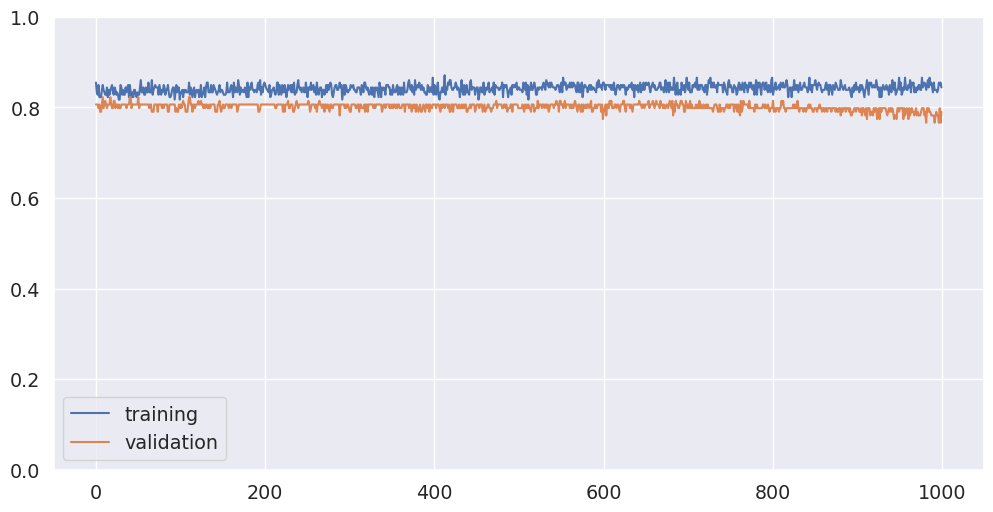

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 16.4770 - accuracy: 0.2188

186/186 [==============================] - 0s 718us/step - loss: 14.7032 - accuracy: 0.2957 - val_loss: 12.2188 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.0834 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 14.2860 - accuracy: 0.2957 - val_loss: 11.9219 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 16.0819 - accuracy: 0.1875

186/186 [==============================] - 0s 62us/step - loss: 13.9701 - accuracy: 0.2957 - val_loss: 11.6647 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.3919 - accuracy: 0.4062

186/186 [==============================] - 0s 55us/step - loss: 13.6809 - accuracy: 0.2957 - val_loss: 11.4173 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.9176 - accuracy: 0.3125

186/186 [==============================] - 0s 62us/step - loss: 13.4032 - accuracy: 0.2957 - val_loss: 11.1813 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.2975 - accuracy: 0.3438

186/186 [==============================] - 0s 60us/step - loss: 13.1341 - accuracy: 0.2957 - val_loss: 10.9463 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.5858 - accuracy: 0.4375

186/186 [==============================] - 0s 73us/step - loss: 12.8669 - accuracy: 0.2957 - val_loss: 10.7127 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.0248 - accuracy: 0.3438

186/186 [==============================] - 0s 57us/step - loss: 12.6034 - accuracy: 0.2957 - val_loss: 10.4836 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.8032 - accuracy: 0.2188

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 59us/step - loss: 12.3437 - accuracy: 0.2957 - val_loss: 10.2563 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.0193 - accuracy: 0.3125

186/186 [==============================] - 0s 61us/step - loss: 12.0830 - accuracy: 0.2957 - val_loss: 10.0268 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.1229 - accuracy: 0.3438

186/186 [==============================] - 0s 67us/step - loss: 11.8203 - accuracy: 0.2957 - val_loss: 9.7938 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.1958 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 11.5567 - accuracy: 0.2957 - val_loss: 9.5671 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.9117 - accuracy: 0.3750

186/186 [==============================] - 0s 67us/step - loss: 11.2975 - accuracy: 0.2957 - val_loss: 9.3390 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.4042 - accuracy: 0.3125

186/186 [==============================] - 0s 68us/step - loss: 11.0402 - accuracy: 0.2957 - val_loss: 9.1167 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.7278 - accuracy: 0.4375

186/186 [==============================] - 0s 62us/step - loss: 10.7829 - accuracy: 0.2957 - val_loss: 8.8898 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.3102 - accuracy: 0.4688

186/186 [==============================] - 0s 60us/step - loss: 10.5265 - accuracy: 0.2957 - val_loss: 8.6675 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.2668 - accuracy: 0.2188

186/186 [==============================] - 0s 62us/step - loss: 10.2746 - accuracy: 0.2957 - val_loss: 8.4497 - val_accuracy: 0.3629


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.8783 - accuracy: 0.2812

186/186 [==============================] - 0s 55us/step - loss: 10.0265 - accuracy: 0.2957 - val_loss: 8.2334 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.8204 - accuracy: 0.3750

186/186 [==============================] - 0s 59us/step - loss: 9.7755 - accuracy: 0.2957 - val_loss: 8.0134 - val_accuracy: 0.3629


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.6827 - accuracy: 0.2500

186/186 [==============================] - 0s 66us/step - loss: 9.5234 - accuracy: 0.2957 - val_loss: 7.7915 - val_accuracy: 0.3629


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0962 - accuracy: 0.4062

186/186 [==============================] - 0s 56us/step - loss: 9.2684 - accuracy: 0.2957 - val_loss: 7.5702 - val_accuracy: 0.3629


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.2856 - accuracy: 0.1875

186/186 [==============================] - 0s 58us/step - loss: 9.0178 - accuracy: 0.2957 - val_loss: 7.3551 - val_accuracy: 0.3629


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.5655 - accuracy: 0.3438

186/186 [==============================] - 0s 53us/step - loss: 8.7698 - accuracy: 0.2957 - val_loss: 7.1425 - val_accuracy: 0.3629


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 7.1131 - accuracy: 0.3750

186/186 [==============================] - 0s 90us/step - loss: 8.5255 - accuracy: 0.2957 - val_loss: 6.9301 - val_accuracy: 0.3629


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.0110 - accuracy: 0.2500

186/186 [==============================] - 0s 56us/step - loss: 8.2827 - accuracy: 0.2957 - val_loss: 6.7212 - val_accuracy: 0.3629


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.4199 - accuracy: 0.3125

186/186 [==============================] - 0s 53us/step - loss: 8.0422 - accuracy: 0.2957 - val_loss: 6.5140 - val_accuracy: 0.3629


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.6214 - accuracy: 0.3125

186/186 [==============================] - 0s 56us/step - loss: 7.8000 - accuracy: 0.2957 - val_loss: 6.3068 - val_accuracy: 0.3629


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.4650 - accuracy: 0.3438

186/186 [==============================] - 0s 63us/step - loss: 7.5566 - accuracy: 0.2957 - val_loss: 6.0987 - val_accuracy: 0.3629


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 7.7620 - accuracy: 0.2188

186/186 [==============================] - 0s 60us/step - loss: 7.3125 - accuracy: 0.2957 - val_loss: 5.8904 - val_accuracy: 0.3629


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.7853 - accuracy: 0.3750

186/186 [==============================] - 0s 54us/step - loss: 7.0642 - accuracy: 0.2957 - val_loss: 5.6730 - val_accuracy: 0.3629


Epoch 31/1000


 32/186 [====>.........................] - ETA: 0s - loss: 5.4321 - accuracy: 0.4375

186/186 [==============================] - 0s 61us/step - loss: 6.8086 - accuracy: 0.2957 - val_loss: 5.4552 - val_accuracy: 0.3629


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0582 - accuracy: 0.1875

186/186 [==============================] - 0s 54us/step - loss: 6.5554 - accuracy: 0.2957 - val_loss: 5.2445 - val_accuracy: 0.3629


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2795 - accuracy: 0.2500

186/186 [==============================] - 0s 67us/step - loss: 6.3025 - accuracy: 0.2957 - val_loss: 5.0277 - val_accuracy: 0.3629


Epoch 34/1000


 32/186 [====>.........................] - ETA: 0s - loss: 5.7938 - accuracy: 0.3438

186/186 [==============================] - 0s 60us/step - loss: 6.0493 - accuracy: 0.2957 - val_loss: 4.8137 - val_accuracy: 0.3629


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8532 - accuracy: 0.3438

186/186 [==============================] - 0s 56us/step - loss: 5.7975 - accuracy: 0.2957 - val_loss: 4.5905 - val_accuracy: 0.3629


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.9096 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 5.5456 - accuracy: 0.2957 - val_loss: 4.3766 - val_accuracy: 0.3629


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.7429 - accuracy: 0.1875

186/186 [==============================] - 0s 83us/step - loss: 5.2991 - accuracy: 0.2957 - val_loss: 4.1620 - val_accuracy: 0.3629


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0751 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 5.0500 - accuracy: 0.2957 - val_loss: 3.9423 - val_accuracy: 0.3629


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3719 - accuracy: 0.3125

186/186 [==============================] - 0s 55us/step - loss: 4.7975 - accuracy: 0.2957 - val_loss: 3.7276 - val_accuracy: 0.3629


Epoch 40/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.9354 - accuracy: 0.3750

186/186 [==============================] - 0s 61us/step - loss: 4.5489 - accuracy: 0.2957 - val_loss: 3.5138 - val_accuracy: 0.3629


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4309 - accuracy: 0.3750

186/186 [==============================] - 0s 62us/step - loss: 4.2993 - accuracy: 0.2957 - val_loss: 3.2975 - val_accuracy: 0.3629


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.0629 - accuracy: 0.2188

186/186 [==============================] - 0s 53us/step - loss: 4.0520 - accuracy: 0.2957 - val_loss: 3.0859 - val_accuracy: 0.3629


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6070 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 3.8072 - accuracy: 0.2957 - val_loss: 2.8774 - val_accuracy: 0.3629


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6250 - accuracy: 0.1875

186/186 [==============================] - 0s 54us/step - loss: 3.5636 - accuracy: 0.2957 - val_loss: 2.6715 - val_accuracy: 0.3629


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4235 - accuracy: 0.2500

186/186 [==============================] - 0s 61us/step - loss: 3.3190 - accuracy: 0.2957 - val_loss: 2.4638 - val_accuracy: 0.3629


Epoch 46/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.4179 - accuracy: 0.4375

186/186 [==============================] - 0s 70us/step - loss: 3.0758 - accuracy: 0.2957 - val_loss: 2.2635 - val_accuracy: 0.3629


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7571 - accuracy: 0.2812

186/186 [==============================] - 0s 60us/step - loss: 2.8410 - accuracy: 0.3011 - val_loss: 2.0678 - val_accuracy: 0.3629


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1642 - accuracy: 0.3438

186/186 [==============================] - 0s 59us/step - loss: 2.6127 - accuracy: 0.3011 - val_loss: 1.8802 - val_accuracy: 0.3710


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.8390 - accuracy: 0.3125

186/186 [==============================] - 0s 61us/step - loss: 2.3939 - accuracy: 0.3011 - val_loss: 1.7004 - val_accuracy: 0.3790


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4699 - accuracy: 0.4062

186/186 [==============================] - 0s 59us/step - loss: 2.1818 - accuracy: 0.3118 - val_loss: 1.5298 - val_accuracy: 0.3871


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9171 - accuracy: 0.4062

186/186 [==============================] - 0s 56us/step - loss: 1.9850 - accuracy: 0.3226 - val_loss: 1.3749 - val_accuracy: 0.4032


Epoch 52/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.5525 - accuracy: 0.2812

186/186 [==============================] - 0s 60us/step - loss: 1.8097 - accuracy: 0.3495 - val_loss: 1.2379 - val_accuracy: 0.4113


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4521 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 1.6505 - accuracy: 0.3710 - val_loss: 1.1056 - val_accuracy: 0.4274


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0395 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 1.5107 - accuracy: 0.4247 - val_loss: 1.0004 - val_accuracy: 0.4597


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2302 - accuracy: 0.5000

186/186 [==============================] - 0s 59us/step - loss: 1.3964 - accuracy: 0.4731 - val_loss: 0.9100 - val_accuracy: 0.5161


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1602 - accuracy: 0.4688

186/186 [==============================] - 0s 56us/step - loss: 1.2965 - accuracy: 0.4892 - val_loss: 0.8346 - val_accuracy: 0.5726


Epoch 57/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9664 - accuracy: 0.4688

186/186 [==============================] - 0s 58us/step - loss: 1.2106 - accuracy: 0.5376 - val_loss: 0.7825 - val_accuracy: 0.5968


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2430 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 1.1449 - accuracy: 0.5753 - val_loss: 0.7386 - val_accuracy: 0.5968


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8529 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 1.0907 - accuracy: 0.6398 - val_loss: 0.7050 - val_accuracy: 0.6371


Epoch 60/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8095 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 1.0500 - accuracy: 0.6774 - val_loss: 0.6818 - val_accuracy: 0.6694


Epoch 61/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9739 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 1.0162 - accuracy: 0.6989 - val_loss: 0.6671 - val_accuracy: 0.7016


Epoch 62/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7575 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.9887 - accuracy: 0.7258 - val_loss: 0.6594 - val_accuracy: 0.7258


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0521 - accuracy: 0.7188

186/186 [==============================] - 0s 89us/step - loss: 0.9683 - accuracy: 0.7366 - val_loss: 0.6558 - val_accuracy: 0.7419


Epoch 64/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8107 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.9519 - accuracy: 0.7312 - val_loss: 0.6542 - val_accuracy: 0.7500


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8463 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.9342 - accuracy: 0.7419 - val_loss: 0.6545 - val_accuracy: 0.7339


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9026 - accuracy: 0.6875

186/186 [==============================] - 0s 83us/step - loss: 0.9189 - accuracy: 0.7419 - val_loss: 0.6547 - val_accuracy: 0.7500


Epoch 67/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8459 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.9059 - accuracy: 0.7473 - val_loss: 0.6559 - val_accuracy: 0.7500


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7195 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.8957 - accuracy: 0.7419 - val_loss: 0.6568 - val_accuracy: 0.7581


Epoch 69/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6996 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.8850 - accuracy: 0.7473 - val_loss: 0.6578 - val_accuracy: 0.7581


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.8125

186/186 [==============================] - 0s 79us/step - loss: 0.8745 - accuracy: 0.7527 - val_loss: 0.6589 - val_accuracy: 0.7581


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8140 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.8655 - accuracy: 0.7634 - val_loss: 0.6598 - val_accuracy: 0.7661


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.8571 - accuracy: 0.7581 - val_loss: 0.6599 - val_accuracy: 0.7742


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6629 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.8478 - accuracy: 0.7688 - val_loss: 0.6613 - val_accuracy: 0.7581


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.8391 - accuracy: 0.7742 - val_loss: 0.6619 - val_accuracy: 0.7661


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.8306 - accuracy: 0.7688 - val_loss: 0.6622 - val_accuracy: 0.7823


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6639 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.8206 - accuracy: 0.7849 - val_loss: 0.6637 - val_accuracy: 0.7581


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.8141 - accuracy: 0.7903 - val_loss: 0.6633 - val_accuracy: 0.7661


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6890 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.8040 - accuracy: 0.7796 - val_loss: 0.6638 - val_accuracy: 0.7581


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.7974 - accuracy: 0.7849 - val_loss: 0.6636 - val_accuracy: 0.7661


Epoch 80/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7309 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.7882 - accuracy: 0.7796 - val_loss: 0.6639 - val_accuracy: 0.7419


Epoch 81/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7356 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.7801 - accuracy: 0.7796 - val_loss: 0.6638 - val_accuracy: 0.7581


Epoch 82/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.6562

186/186 [==============================] - 0s 67us/step - loss: 0.7710 - accuracy: 0.7688 - val_loss: 0.6643 - val_accuracy: 0.7581


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6683 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.7630 - accuracy: 0.7957 - val_loss: 0.6630 - val_accuracy: 0.7742


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7339 - accuracy: 0.7812

186/186 [==============================] - 0s 103us/step - loss: 0.7543 - accuracy: 0.8011 - val_loss: 0.6634 - val_accuracy: 0.7742


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6777 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.7468 - accuracy: 0.8011 - val_loss: 0.6630 - val_accuracy: 0.7661


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0317 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.7414 - accuracy: 0.7957 - val_loss: 0.6633 - val_accuracy: 0.7661


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7006 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.7369 - accuracy: 0.7796 - val_loss: 0.6638 - val_accuracy: 0.7581


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6806 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.7315 - accuracy: 0.8011 - val_loss: 0.6635 - val_accuracy: 0.7500


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9978 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.7270 - accuracy: 0.8065 - val_loss: 0.6631 - val_accuracy: 0.7500


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7133 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7226 - accuracy: 0.8011 - val_loss: 0.6639 - val_accuracy: 0.7581


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7227 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.7184 - accuracy: 0.8172 - val_loss: 0.6642 - val_accuracy: 0.7581


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.7135 - accuracy: 0.8065 - val_loss: 0.6638 - val_accuracy: 0.7661


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7066 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.7088 - accuracy: 0.8118 - val_loss: 0.6643 - val_accuracy: 0.7581


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.7031 - accuracy: 0.8011 - val_loss: 0.6636 - val_accuracy: 0.7419


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.7002 - accuracy: 0.8065 - val_loss: 0.6642 - val_accuracy: 0.7419


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8776 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.6962 - accuracy: 0.8065 - val_loss: 0.6642 - val_accuracy: 0.7339


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6930 - accuracy: 0.8011 - val_loss: 0.6633 - val_accuracy: 0.7419


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6960 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.6886 - accuracy: 0.8065 - val_loss: 0.6631 - val_accuracy: 0.7339


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6702 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6855 - accuracy: 0.8065 - val_loss: 0.6626 - val_accuracy: 0.7339


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6812 - accuracy: 0.8118 - val_loss: 0.6625 - val_accuracy: 0.7258


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6787 - accuracy: 0.8065 - val_loss: 0.6628 - val_accuracy: 0.7258


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6946 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6745 - accuracy: 0.8118 - val_loss: 0.6625 - val_accuracy: 0.7258


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.6710 - accuracy: 0.8118 - val_loss: 0.6632 - val_accuracy: 0.7258


Epoch 104/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7575 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6689 - accuracy: 0.8065 - val_loss: 0.6628 - val_accuracy: 0.7258


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6964 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6652 - accuracy: 0.8065 - val_loss: 0.6625 - val_accuracy: 0.7258


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6909 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6619 - accuracy: 0.8118 - val_loss: 0.6640 - val_accuracy: 0.7258


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6596 - accuracy: 0.8118 - val_loss: 0.6640 - val_accuracy: 0.7258


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.6567 - accuracy: 0.8118 - val_loss: 0.6644 - val_accuracy: 0.7258


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6555 - accuracy: 0.8118 - val_loss: 0.6644 - val_accuracy: 0.7258


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6550 - accuracy: 0.8172 - val_loss: 0.6629 - val_accuracy: 0.7258


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6136 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.6531 - accuracy: 0.8172 - val_loss: 0.6630 - val_accuracy: 0.7258


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7083 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6528 - accuracy: 0.8172 - val_loss: 0.6618 - val_accuracy: 0.7258


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6826 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6514 - accuracy: 0.8172 - val_loss: 0.6607 - val_accuracy: 0.7258


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.6516 - accuracy: 0.8226 - val_loss: 0.6601 - val_accuracy: 0.7258


Epoch 115/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.6514 - accuracy: 0.8172 - val_loss: 0.6612 - val_accuracy: 0.7258


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6652 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6497 - accuracy: 0.8226 - val_loss: 0.6607 - val_accuracy: 0.7258


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6470 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.6497 - accuracy: 0.8226 - val_loss: 0.6608 - val_accuracy: 0.7258


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6650 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6497 - accuracy: 0.8226 - val_loss: 0.6598 - val_accuracy: 0.7258


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6855 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6494 - accuracy: 0.8226 - val_loss: 0.6587 - val_accuracy: 0.7258


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6478 - accuracy: 0.8226 - val_loss: 0.6585 - val_accuracy: 0.7258


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6473 - accuracy: 0.8226 - val_loss: 0.6578 - val_accuracy: 0.7258


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6488 - accuracy: 0.8226 - val_loss: 0.6571 - val_accuracy: 0.7258


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6457 - accuracy: 0.8226 - val_loss: 0.6564 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.6459 - accuracy: 0.8226 - val_loss: 0.6568 - val_accuracy: 0.7258


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.8125

186/186 [==============================] - 0s 84us/step - loss: 0.6460 - accuracy: 0.8226 - val_loss: 0.6568 - val_accuracy: 0.7258


Epoch 126/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.6443 - accuracy: 0.8226 - val_loss: 0.6566 - val_accuracy: 0.7258


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6951 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6448 - accuracy: 0.8226 - val_loss: 0.6565 - val_accuracy: 0.7258


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6434 - accuracy: 0.8226 - val_loss: 0.6559 - val_accuracy: 0.7258


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.6432 - accuracy: 0.8226 - val_loss: 0.6553 - val_accuracy: 0.7258


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6727 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.6424 - accuracy: 0.8226 - val_loss: 0.6546 - val_accuracy: 0.7258


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6522 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6437 - accuracy: 0.8226 - val_loss: 0.6547 - val_accuracy: 0.7258


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6234 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.6418 - accuracy: 0.8226 - val_loss: 0.6542 - val_accuracy: 0.7258


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.6408 - accuracy: 0.8226 - val_loss: 0.6527 - val_accuracy: 0.7258


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6409 - accuracy: 0.8226 - val_loss: 0.6524 - val_accuracy: 0.7258


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.6406 - accuracy: 0.8226 - val_loss: 0.6515 - val_accuracy: 0.7258


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.6398 - accuracy: 0.8226 - val_loss: 0.6512 - val_accuracy: 0.7258


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.6388 - accuracy: 0.8226 - val_loss: 0.6512 - val_accuracy: 0.7258


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.7812

186/186 [==============================] - 0s 71us/step - loss: 0.6383 - accuracy: 0.8226 - val_loss: 0.6498 - val_accuracy: 0.7258


Epoch 139/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6001 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.6385 - accuracy: 0.8226 - val_loss: 0.6502 - val_accuracy: 0.7258


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.7188



186/186 [==============================] - 0s 59us/step - loss: 0.6379 - accuracy: 0.8226 - val_loss: 0.6494 - val_accuracy: 0.7258


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6135 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.6367 - accuracy: 0.8226 - val_loss: 0.6488 - val_accuracy: 0.7258


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.6360 - accuracy: 0.8280 - val_loss: 0.6478 - val_accuracy: 0.7258


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.6356 - accuracy: 0.8226 - val_loss: 0.6479 - val_accuracy: 0.7258


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.6366 - accuracy: 0.8280 - val_loss: 0.6478 - val_accuracy: 0.7258


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6346 - accuracy: 0.8226 - val_loss: 0.6463 - val_accuracy: 0.7258


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6596 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.6343 - accuracy: 0.8226 - val_loss: 0.6463 - val_accuracy: 0.7258


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6735 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.6334 - accuracy: 0.8226 - val_loss: 0.6456 - val_accuracy: 0.7258


Epoch 148/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.6331 - accuracy: 0.8226 - val_loss: 0.6462 - val_accuracy: 0.7258


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6039 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.6333 - accuracy: 0.8226 - val_loss: 0.6451 - val_accuracy: 0.7258


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6325 - accuracy: 0.8226 - val_loss: 0.6436 - val_accuracy: 0.7258


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.6313 - accuracy: 0.8280 - val_loss: 0.6432 - val_accuracy: 0.7258


Epoch 152/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.6318 - accuracy: 0.8280 - val_loss: 0.6429 - val_accuracy: 0.7258


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6302 - accuracy: 0.8226 - val_loss: 0.6415 - val_accuracy: 0.7258


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6302 - accuracy: 0.8226 - val_loss: 0.6414 - val_accuracy: 0.7258


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5851 - accuracy: 0.8750

186/186 [==============================] - 0s 81us/step - loss: 0.6292 - accuracy: 0.8280 - val_loss: 0.6416 - val_accuracy: 0.7258


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6283 - accuracy: 0.8280 - val_loss: 0.6411 - val_accuracy: 0.7258


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6181 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.6292 - accuracy: 0.8280 - val_loss: 0.6403 - val_accuracy: 0.7258


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.8438

186/186 [==============================] - 0s 96us/step - loss: 0.6276 - accuracy: 0.8280 - val_loss: 0.6400 - val_accuracy: 0.7258


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5699 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.6270 - accuracy: 0.8280 - val_loss: 0.6406 - val_accuracy: 0.7258


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.6269 - accuracy: 0.8280 - val_loss: 0.6388 - val_accuracy: 0.7258


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.8750

186/186 [==============================] - 0s 76us/step - loss: 0.6265 - accuracy: 0.8280 - val_loss: 0.6382 - val_accuracy: 0.7258


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6201 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.6256 - accuracy: 0.8280 - val_loss: 0.6369 - val_accuracy: 0.7258


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.6252 - accuracy: 0.8280 - val_loss: 0.6367 - val_accuracy: 0.7258


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.6244 - accuracy: 0.8280 - val_loss: 0.6367 - val_accuracy: 0.7258


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6239 - accuracy: 0.8280 - val_loss: 0.6361 - val_accuracy: 0.7258


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6235 - accuracy: 0.8280 - val_loss: 0.6352 - val_accuracy: 0.7339


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6266 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6226 - accuracy: 0.8280 - val_loss: 0.6348 - val_accuracy: 0.7258


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.6217 - accuracy: 0.8280 - val_loss: 0.6339 - val_accuracy: 0.7258


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6218 - accuracy: 0.8280 - val_loss: 0.6340 - val_accuracy: 0.7258


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.6211 - accuracy: 0.8280 - val_loss: 0.6343 - val_accuracy: 0.7258


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.6216 - accuracy: 0.8280 - val_loss: 0.6342 - val_accuracy: 0.7339


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.9375

186/186 [==============================] - 0s 88us/step - loss: 0.6205 - accuracy: 0.8280 - val_loss: 0.6339 - val_accuracy: 0.7258


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6198 - accuracy: 0.8280 - val_loss: 0.6327 - val_accuracy: 0.7258


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6193 - accuracy: 0.8280 - val_loss: 0.6333 - val_accuracy: 0.7258


Epoch 175/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.6185 - accuracy: 0.8280 - val_loss: 0.6321 - val_accuracy: 0.7339


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6449 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.6182 - accuracy: 0.8280 - val_loss: 0.6317 - val_accuracy: 0.7258


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.6172 - accuracy: 0.8280 - val_loss: 0.6306 - val_accuracy: 0.7339


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6168 - accuracy: 0.8280 - val_loss: 0.6300 - val_accuracy: 0.7419


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6166 - accuracy: 0.8280 - val_loss: 0.6310 - val_accuracy: 0.7419


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6522 - accuracy: 0.7812

186/186 [==============================] - 0s 115us/step - loss: 0.6161 - accuracy: 0.8280 - val_loss: 0.6302 - val_accuracy: 0.7419


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6150 - accuracy: 0.8280 - val_loss: 0.6296 - val_accuracy: 0.7419


Epoch 182/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6018 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.6148 - accuracy: 0.8280 - val_loss: 0.6300 - val_accuracy: 0.7419


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.6145 - accuracy: 0.8280 - val_loss: 0.6307 - val_accuracy: 0.7419


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.6150 - accuracy: 0.8280 - val_loss: 0.6306 - val_accuracy: 0.7419


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.6139 - accuracy: 0.8280 - val_loss: 0.6298 - val_accuracy: 0.7419


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.6134 - accuracy: 0.8280 - val_loss: 0.6274 - val_accuracy: 0.7419


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.8438

186/186 [==============================] - 0s 86us/step - loss: 0.6120 - accuracy: 0.8280 - val_loss: 0.6277 - val_accuracy: 0.7419


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.6123 - accuracy: 0.8280 - val_loss: 0.6265 - val_accuracy: 0.7419


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6812 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.6115 - accuracy: 0.8333 - val_loss: 0.6259 - val_accuracy: 0.7419


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5792 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.6103 - accuracy: 0.8280 - val_loss: 0.6256 - val_accuracy: 0.7419


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6730 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6111 - accuracy: 0.8280 - val_loss: 0.6261 - val_accuracy: 0.7419


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6097 - accuracy: 0.8280 - val_loss: 0.6253 - val_accuracy: 0.7419


Epoch 193/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6149 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.6099 - accuracy: 0.8280 - val_loss: 0.6266 - val_accuracy: 0.7500


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6598 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6098 - accuracy: 0.8280 - val_loss: 0.6261 - val_accuracy: 0.7500


Epoch 195/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.7812

186/186 [==============================] - 0s 127us/step - loss: 0.6087 - accuracy: 0.8226 - val_loss: 0.6248 - val_accuracy: 0.7500


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6076 - accuracy: 0.8280 - val_loss: 0.6233 - val_accuracy: 0.7500


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7500

186/186 [==============================] - 0s 79us/step - loss: 0.6077 - accuracy: 0.8226 - val_loss: 0.6243 - val_accuracy: 0.7500


Epoch 198/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.6078 - accuracy: 0.8280 - val_loss: 0.6234 - val_accuracy: 0.7419


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.7500



186/186 [==============================] - 0s 62us/step - loss: 0.6067 - accuracy: 0.8280 - val_loss: 0.6222 - val_accuracy: 0.7419


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5711 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6063 - accuracy: 0.8280 - val_loss: 0.6217 - val_accuracy: 0.7500


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6070 - accuracy: 0.8280 - val_loss: 0.6209 - val_accuracy: 0.7500


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6053 - accuracy: 0.8280 - val_loss: 0.6199 - val_accuracy: 0.7500


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5723 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6050 - accuracy: 0.8333 - val_loss: 0.6212 - val_accuracy: 0.7500


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5855 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6042 - accuracy: 0.8280 - val_loss: 0.6217 - val_accuracy: 0.7581


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6034 - accuracy: 0.8333 - val_loss: 0.6201 - val_accuracy: 0.7500


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6033 - accuracy: 0.8333 - val_loss: 0.6191 - val_accuracy: 0.7500


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.6027 - accuracy: 0.8333 - val_loss: 0.6177 - val_accuracy: 0.7500


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6125 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.6040 - accuracy: 0.8280 - val_loss: 0.6180 - val_accuracy: 0.7500


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6032 - accuracy: 0.8280 - val_loss: 0.6171 - val_accuracy: 0.7500


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.6011 - accuracy: 0.8280 - val_loss: 0.6166 - val_accuracy: 0.7500


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.6011 - accuracy: 0.8333 - val_loss: 0.6171 - val_accuracy: 0.7500


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6372 - accuracy: 0.7188

186/186 [==============================] - 0s 74us/step - loss: 0.6005 - accuracy: 0.8280 - val_loss: 0.6169 - val_accuracy: 0.7500


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.6003 - accuracy: 0.8333 - val_loss: 0.6155 - val_accuracy: 0.7500


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5532 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.6000 - accuracy: 0.8333 - val_loss: 0.6168 - val_accuracy: 0.7500


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5991 - accuracy: 0.8280 - val_loss: 0.6160 - val_accuracy: 0.7500


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5991 - accuracy: 0.8280 - val_loss: 0.6154 - val_accuracy: 0.7500


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.5977 - accuracy: 0.8333 - val_loss: 0.6163 - val_accuracy: 0.7581


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6109 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.5980 - accuracy: 0.8333 - val_loss: 0.6143 - val_accuracy: 0.7500


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.5976 - accuracy: 0.8333 - val_loss: 0.6136 - val_accuracy: 0.7500


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5997 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5969 - accuracy: 0.8280 - val_loss: 0.6141 - val_accuracy: 0.7500


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5965 - accuracy: 0.8280 - val_loss: 0.6141 - val_accuracy: 0.7500


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5954 - accuracy: 0.8333 - val_loss: 0.6123 - val_accuracy: 0.7500


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6228 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5953 - accuracy: 0.8280 - val_loss: 0.6116 - val_accuracy: 0.7500


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5694 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.5948 - accuracy: 0.8280 - val_loss: 0.6118 - val_accuracy: 0.7500


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5525 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.5959 - accuracy: 0.8226 - val_loss: 0.6127 - val_accuracy: 0.7581


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6079 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5948 - accuracy: 0.8280 - val_loss: 0.6113 - val_accuracy: 0.7581


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.5934 - accuracy: 0.8280 - val_loss: 0.6111 - val_accuracy: 0.7581


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5927 - accuracy: 0.8333 - val_loss: 0.6105 - val_accuracy: 0.7581


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5579 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.5925 - accuracy: 0.8333 - val_loss: 0.6096 - val_accuracy: 0.7581


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5657 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.5926 - accuracy: 0.8280 - val_loss: 0.6101 - val_accuracy: 0.7581


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5657 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5919 - accuracy: 0.8280 - val_loss: 0.6110 - val_accuracy: 0.7500


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5920 - accuracy: 0.8333 - val_loss: 0.6100 - val_accuracy: 0.7500


Epoch 233/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.8438

186/186 [==============================] - 0s 87us/step - loss: 0.5916 - accuracy: 0.8333 - val_loss: 0.6083 - val_accuracy: 0.7500


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.8438

186/186 [==============================]

 - 0s 72us/step - loss: 0.5903 - accuracy: 0.8280 - val_loss: 0.6086 - val_accuracy: 0.7500


Epoch 235/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5896 - accuracy: 0.8333 - val_loss: 0.6085 - val_accuracy: 0.7581


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5894 - accuracy: 0.8333 - val_loss: 0.6078 - val_accuracy: 0.7581


Epoch 237/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.5892 - accuracy: 0.8333 - val_loss: 0.6071 - val_accuracy: 0.7581


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5846 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5883 - accuracy: 0.8280 - val_loss: 0.6070 - val_accuracy: 0.7581


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6113 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5882 - accuracy: 0.8333 - val_loss: 0.6066 - val_accuracy: 0.7581


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6564 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5878 - accuracy: 0.8333 - val_loss: 0.6058 - val_accuracy: 0.7581


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5869 - accuracy: 0.8333 - val_loss: 0.6041 - val_accuracy: 0.7500


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5870 - accuracy: 0.8333 - val_loss: 0.6046 - val_accuracy: 0.7581


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6014 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5859 - accuracy: 0.8333 - val_loss: 0.6036 - val_accuracy: 0.7581


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.5866 - accuracy: 0.8333 - val_loss: 0.6038 - val_accuracy: 0.7581


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5936 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.5854 - accuracy: 0.8441 - val_loss: 0.6032 - val_accuracy: 0.7581


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5985 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.5846 - accuracy: 0.8280 - val_loss: 0.6041 - val_accuracy: 0.7581


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 1.0000

186/186 [==============================] - 0s 57us/step - loss: 0.5851 - accuracy: 0.8333 - val_loss: 0.6050 - val_accuracy: 0.7500


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5534 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5841 - accuracy: 0.8387 - val_loss: 0.6045 - val_accuracy: 0.7581


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5690 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5833 - accuracy: 0.8333 - val_loss: 0.6047 - val_accuracy: 0.7581


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5838 - accuracy: 0.8333 - val_loss: 0.6038 - val_accuracy: 0.7500


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.8125

186/186 [==============================] - 0s 102us/step - loss: 0.5828 - accuracy: 0.8333 - val_loss: 0.6032 - val_accuracy: 0.7500


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5818 - accuracy: 0.8441 - val_loss: 0.6013 - val_accuracy: 0.7581


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5816 - accuracy: 0.8333 - val_loss: 0.6013 - val_accuracy: 0.7500


Epoch 254/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.9062

186/186 [==============================] - 0s 80us/step - loss: 0.5814 - accuracy: 0.8333 - val_loss: 0.6003 - val_accuracy: 0.7661


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.5823 - accuracy: 0.8387 - val_loss: 0.5994 - val_accuracy: 0.7661


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.5812 - accuracy: 0.8333 - val_loss: 0.6002 - val_accuracy: 0.7661


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.5809 - accuracy: 0.8333 - val_loss: 0.6005 - val_accuracy: 0.7581


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.9062

186/186 [==============================] - 0s 81us/step - loss: 0.5791 - accuracy: 0.8280 - val_loss: 0.6014 - val_accuracy: 0.7581


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5899 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.5799 - accuracy: 0.8441 - val_loss: 0.6008 - val_accuracy: 0.7661


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.5787 - accuracy: 0.8441 - val_loss: 0.6000 - val_accuracy: 0.7661


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5623 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.5783 - accuracy: 0.8387 - val_loss: 0.5994 - val_accuracy: 0.7581


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.8750

186/186 [==============================] - 0s 83us/step - loss: 0.5777 - accuracy: 0.8387 - val_loss: 0.5989 - val_accuracy: 0.7581


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6791 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.5791 - accuracy: 0.8495 - val_loss: 0.5975 - val_accuracy: 0.7661


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5779 - accuracy: 0.8280 - val_loss: 0.5983 - val_accuracy: 0.7581


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5761 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5766 - accuracy: 0.8333 - val_loss: 0.5981 - val_accuracy: 0.7581


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5957 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.5765 - accuracy: 0.8495 - val_loss: 0.5971 - val_accuracy: 0.7661


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.5756 - accuracy: 0.8387 - val_loss: 0.5968 - val_accuracy: 0.7661


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5138 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.5758 - accuracy: 0.8333 - val_loss: 0.5978 - val_accuracy: 0.7661


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5756 - accuracy: 0.8387 - val_loss: 0.5977 - val_accuracy: 0.7661


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.8125

186/186 [==============================] - 0s 76us/step - loss: 0.5741 - accuracy: 0.8387 - val_loss: 0.5988 - val_accuracy: 0.7661


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5739 - accuracy: 0.8441 - val_loss: 0.5961 - val_accuracy: 0.7661


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5782 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5739 - accuracy: 0.8387 - val_loss: 0.5970 - val_accuracy: 0.7661


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5425 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5733 - accuracy: 0.8441 - val_loss: 0.5983 - val_accuracy: 0.7581


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5785 - accuracy: 0.8125

186/186 [==============================] - 0s 87us/step - loss: 0.5726 - accuracy: 0.8441 - val_loss: 0.5966 - val_accuracy: 0.7661


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5323 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5729 - accuracy: 0.8280 - val_loss: 0.5968 - val_accuracy: 0.7661


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5818 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.5721 - accuracy: 0.8441 - val_loss: 0.5949 - val_accuracy: 0.7742


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5723 - accuracy: 0.8333 - val_loss: 0.5966 - val_accuracy: 0.7661


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6306 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.5717 - accuracy: 0.8495 - val_loss: 0.5955 - val_accuracy: 0.7742


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5717 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.5705 - accuracy: 0.8548 - val_loss: 0.5941 - val_accuracy: 0.7742


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5503 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.5707 - accuracy: 0.8441 - val_loss: 0.5929 - val_accuracy: 0.7742


Epoch 281/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5058 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.5702 - accuracy: 0.8333 - val_loss: 0.5935 - val_accuracy: 0.7742


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6125 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5697 - accuracy: 0.8495 - val_loss: 0.5922 - val_accuracy: 0.7742


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5696 - accuracy: 0.8495 - val_loss: 0.5939 - val_accuracy: 0.7742


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5687 - accuracy: 0.8495 - val_loss: 0.5939 - val_accuracy: 0.7742


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5777 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5678 - accuracy: 0.8441 - val_loss: 0.5922 - val_accuracy: 0.7742


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5313 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.5679 - accuracy: 0.8441 - val_loss: 0.5944 - val_accuracy: 0.7742


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5565 - accuracy: 0.8438

186/186 [==============================] - 0s 118us/step - loss: 0.5687 - accuracy: 0.8495 - val_loss: 0.5925 - val_accuracy: 0.7742


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5228 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5677 - accuracy: 0.8441 - val_loss: 0.5925 - val_accuracy: 0.7742


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5900 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.5662 - accuracy: 0.8495 - val_loss: 0.5906 - val_accuracy: 0.7823


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5980 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.5669 - accuracy: 0.8495 - val_loss: 0.5905 - val_accuracy: 0.7823


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.5661 - accuracy: 0.8441 - val_loss: 0.5914 - val_accuracy: 0.7742


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5170 - accuracy: 0.9688



186/186 [==============================] - 0s 88us/step - loss: 0.5664 - accuracy: 0.8441 - val_loss: 0.5926 - val_accuracy: 0.7742


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6166 - accuracy: 0.7812

186/186 [==============================] - 0s 83us/step - loss: 0.5652 - accuracy: 0.8495 - val_loss: 0.5905 - val_accuracy: 0.7823


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5993 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5665 - accuracy: 0.8441 - val_loss: 0.5902 - val_accuracy: 0.7742


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.5642 - accuracy: 0.8548 - val_loss: 0.5901 - val_accuracy: 0.7742


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.5638 - accuracy: 0.8495 - val_loss: 0.5896 - val_accuracy: 0.7742


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.5633 - accuracy: 0.8441 - val_loss: 0.5902 - val_accuracy: 0.7742


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.5641 - accuracy: 0.8548 - val_loss: 0.5884 - val_accuracy: 0.7742


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5623 - accuracy: 0.8441 - val_loss: 0.5892 - val_accuracy: 0.7742


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5629 - accuracy: 0.8441 - val_loss: 0.5903 - val_accuracy: 0.7742


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5759 - accuracy: 0.8125

186/186 [==============================] - 0s 80us/step - loss: 0.5621 - accuracy: 0.8548 - val_loss: 0.5882 - val_accuracy: 0.7742


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5623 - accuracy: 0.8495 - val_loss: 0.5874 - val_accuracy: 0.7742


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4923 - accuracy: 1.0000

186/186 [==============================] - 0s 62us/step - loss: 0.5617 - accuracy: 0.8495 - val_loss: 0.5880 - val_accuracy: 0.7742


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5606 - accuracy: 0.8548 - val_loss: 0.5861 - val_accuracy: 0.7742


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.5602 - accuracy: 0.8387 - val_loss: 0.5878 - val_accuracy: 0.7742


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5323 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.5597 - accuracy: 0.8441 - val_loss: 0.5865 - val_accuracy: 0.7742


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.5598 - accuracy: 0.8495 - val_loss: 0.5856 - val_accuracy: 0.7742


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5598 - accuracy: 0.8548 - val_loss: 0.5863 - val_accuracy: 0.7742


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.5602 - accuracy: 0.8656 - val_loss: 0.5859 - val_accuracy: 0.7661


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5550 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5582 - accuracy: 0.8602 - val_loss: 0.5845 - val_accuracy: 0.7823


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.5575 - accuracy: 0.8441 - val_loss: 0.5850 - val_accuracy: 0.7742


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.5572 - accuracy: 0.8495 - val_loss: 0.5866 - val_accuracy: 0.7661


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5341 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.5580 - accuracy: 0.8548 - val_loss: 0.5846 - val_accuracy: 0.7742


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5362 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5572 - accuracy: 0.8441 - val_loss: 0.5840 - val_accuracy: 0.7742


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5304 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5567 - accuracy: 0.8656 - val_loss: 0.5836 - val_accuracy: 0.7742


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5602 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.5561 - accuracy: 0.8602 - val_loss: 0.5828 - val_accuracy: 0.7823


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.5566 - accuracy: 0.8387 - val_loss: 0.5842 - val_accuracy: 0.7742


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5168 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5552 - accuracy: 0.8602 - val_loss: 0.5829 - val_accuracy: 0.7742


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5661 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.5550 - accuracy: 0.8656 - val_loss: 0.5816 - val_accuracy: 0.7742


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5551 - accuracy: 0.8548 - val_loss: 0.5812 - val_accuracy: 0.7742


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5547 - accuracy: 0.8656 - val_loss: 0.5814 - val_accuracy: 0.7742


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5663 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.5536 - accuracy: 0.8656 - val_loss: 0.5809 - val_accuracy: 0.7823


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5546 - accuracy: 0.8548 - val_loss: 0.5816 - val_accuracy: 0.7742


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5532 - accuracy: 0.8548 - val_loss: 0.5811 - val_accuracy: 0.7742


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.5532 - accuracy: 0.8602 - val_loss: 0.5807 - val_accuracy: 0.7742


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5008 - accuracy: 0.9375

186/186 [==============================] - 0s 73us/step - loss: 0.5527 - accuracy: 0.8656 - val_loss: 0.5794 - val_accuracy: 0.7823


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.5516 - accuracy: 0.8656 - val_loss: 0.5793 - val_accuracy: 0.7823


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5628 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.5517 - accuracy: 0.8548 - val_loss: 0.5798 - val_accuracy: 0.7742


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5512 - accuracy: 0.8710 - val_loss: 0.5794 - val_accuracy: 0.7823


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5262 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5509 - accuracy: 0.8548 - val_loss: 0.5798 - val_accuracy: 0.7742


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5514 - accuracy: 0.8656 - val_loss: 0.5796 - val_accuracy: 0.7742


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4862 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.5503 - accuracy: 0.8602 - val_loss: 0.5783 - val_accuracy: 0.7661


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.5500 - accuracy: 0.8602 - val_loss: 0.5774 - val_accuracy: 0.7823


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.5501 - accuracy: 0.8656 - val_loss: 0.5772 - val_accuracy: 0.7823


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5493 - accuracy: 0.8602 - val_loss: 0.5780 - val_accuracy: 0.7742


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.5484 - accuracy: 0.8602 - val_loss: 0.5768 - val_accuracy: 0.7742


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5476 - accuracy: 0.8602 - val_loss: 0.5780 - val_accuracy: 0.7661


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5513 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5492 - accuracy: 0.8710 - val_loss: 0.5762 - val_accuracy: 0.7661


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5472 - accuracy: 0.8710 - val_loss: 0.5755 - val_accuracy: 0.7823


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5478 - accuracy: 0.8548 - val_loss: 0.5755 - val_accuracy: 0.7661


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5779 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5463 - accuracy: 0.8656 - val_loss: 0.5772 - val_accuracy: 0.7661


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5486 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5473 - accuracy: 0.8763 - val_loss: 0.5763 - val_accuracy: 0.7742


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5361 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.5465 - accuracy: 0.8602 - val_loss: 0.5758 - val_accuracy: 0.7742


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5459 - accuracy: 0.8656 - val_loss: 0.5750 - val_accuracy: 0.7742


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5246 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5459 - accuracy: 0.8763 - val_loss: 0.5743 - val_accuracy: 0.7661


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.8750

186/186 [==============================] - 0s 101us/step - loss: 0.5449 - accuracy: 0.8656 - val_loss: 0.5738 - val_accuracy: 0.7661


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5449 - accuracy: 0.8602 - val_loss: 0.5737 - val_accuracy: 0.7661


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.9062

186/186 [==============================] - 0s 78us/step - loss: 0.5438 - accuracy: 0.8602 - val_loss: 0.5744 - val_accuracy: 0.7661


Epoch 349/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.5440 - accuracy: 0.8656 - val_loss: 0.5732 - val_accuracy: 0.7742


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5439 - accuracy: 0.8656 - val_loss: 0.5736 - val_accuracy: 0.7661


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.5438 - accuracy: 0.8656 - val_loss: 0.5725 - val_accuracy: 0.7742


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5488 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.5421 - accuracy: 0.8656 - val_loss: 0.5736 - val_accuracy: 0.7661


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5428 - accuracy: 0.8710 - val_loss: 0.5721 - val_accuracy: 0.7742


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.5418 - accuracy: 0.8656 - val_loss: 0.5718 - val_accuracy: 0.7742


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.5417 - accuracy: 0.8710 - val_loss: 0.5718 - val_accuracy: 0.7742


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5428 - accuracy: 0.8656 - val_loss: 0.5719 - val_accuracy: 0.7742


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5337 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.5413 - accuracy: 0.8656 - val_loss: 0.5723 - val_accuracy: 0.7661


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5967 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5402 - accuracy: 0.8710 - val_loss: 0.5712 - val_accuracy: 0.7742


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5913 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.5408 - accuracy: 0.8656 - val_loss: 0.5706 - val_accuracy: 0.7742


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6055 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5402 - accuracy: 0.8710 - val_loss: 0.5709 - val_accuracy: 0.7742


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5445 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5390 - accuracy: 0.8710 - val_loss: 0.5703 - val_accuracy: 0.7742


Epoch 362/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.7812



186/186 [==============================] - 0s 75us/step - loss: 0.5390 - accuracy: 0.8602 - val_loss: 0.5709 - val_accuracy: 0.7661


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5525 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5387 - accuracy: 0.8763 - val_loss: 0.5698 - val_accuracy: 0.7823


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4462 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.5395 - accuracy: 0.8548 - val_loss: 0.5699 - val_accuracy: 0.7661


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5387 - accuracy: 0.8656 - val_loss: 0.5691 - val_accuracy: 0.7742


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5382 - accuracy: 0.8763 - val_loss: 0.5686 - val_accuracy: 0.7742


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5589 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5380 - accuracy: 0.8656 - val_loss: 0.5678 - val_accuracy: 0.7742


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5371 - accuracy: 0.8710 - val_loss: 0.5686 - val_accuracy: 0.7742


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5371 - accuracy: 0.8710 - val_loss: 0.5686 - val_accuracy: 0.7742


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5360 - accuracy: 0.8656 - val_loss: 0.5689 - val_accuracy: 0.7661


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.5360 - accuracy: 0.8710 - val_loss: 0.5679 - val_accuracy: 0.7661


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.5362 - accuracy: 0.8656 - val_loss: 0.5682 - val_accuracy: 0.7661


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.5365 - accuracy: 0.8602 - val_loss: 0.5681 - val_accuracy: 0.7661


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5346 - accuracy: 0.8763 - val_loss: 0.5668 - val_accuracy: 0.7742


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5010 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.5345 - accuracy: 0.8656 - val_loss: 0.5667 - val_accuracy: 0.7823


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5184 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5350 - accuracy: 0.8710 - val_loss: 0.5663 - val_accuracy: 0.7742


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5075 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5335 - accuracy: 0.8656 - val_loss: 0.5660 - val_accuracy: 0.7742


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5329 - accuracy: 0.8656 - val_loss: 0.5661 - val_accuracy: 0.7661


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.5331 - accuracy: 0.8602 - val_loss: 0.5664 - val_accuracy: 0.7661


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7812

186/186 [==============================] - 0s 66us/step - loss: 0.5333 - accuracy: 0.8763 - val_loss: 0.5670 - val_accuracy: 0.7661


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4980 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.5323 - accuracy: 0.8710 - val_loss: 0.5669 - val_accuracy: 0.7661


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5319 - accuracy: 0.8710 - val_loss: 0.5659 - val_accuracy: 0.7661


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5316 - accuracy: 0.8710 - val_loss: 0.5653 - val_accuracy: 0.7661


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.5312 - accuracy: 0.8602 - val_loss: 0.5651 - val_accuracy: 0.7661


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5314 - accuracy: 0.8548 - val_loss: 0.5651 - val_accuracy: 0.7661


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5310 - accuracy: 0.8710 - val_loss: 0.5643 - val_accuracy: 0.7742


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5307 - accuracy: 0.8656 - val_loss: 0.5642 - val_accuracy: 0.7661


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5044 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.5292 - accuracy: 0.8710 - val_loss: 0.5648 - val_accuracy: 0.7661


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5562 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.5303 - accuracy: 0.8817 - val_loss: 0.5641 - val_accuracy: 0.7661


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5543 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.5295 - accuracy: 0.8763 - val_loss: 0.5635 - val_accuracy: 0.7661


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5290 - accuracy: 0.8710 - val_loss: 0.5634 - val_accuracy: 0.7661


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5284 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5284 - accuracy: 0.8710 - val_loss: 0.5632 - val_accuracy: 0.7661


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5293 - accuracy: 0.8656 - val_loss: 0.5628 - val_accuracy: 0.7661


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5286 - accuracy: 0.8710 - val_loss: 0.5625 - val_accuracy: 0.7742


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5271 - accuracy: 0.8710 - val_loss: 0.5620 - val_accuracy: 0.7661


Epoch 396/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5280 - accuracy: 0.8710 - val_loss: 0.5620 - val_accuracy: 0.7823


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.5267 - accuracy: 0.8602 - val_loss: 0.5611 - val_accuracy: 0.7823


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5276 - accuracy: 0.8656 - val_loss: 0.5610 - val_accuracy: 0.7823


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4858 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5256 - accuracy: 0.8710 - val_loss: 0.5604 - val_accuracy: 0.7823


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5265 - accuracy: 0.8602 - val_loss: 0.5605 - val_accuracy: 0.7823


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.5267 - accuracy: 0.8763 - val_loss: 0.5602 - val_accuracy: 0.7823


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5094 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.5249 - accuracy: 0.8763 - val_loss: 0.5603 - val_accuracy: 0.7823


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5250 - accuracy: 0.8763 - val_loss: 0.5596 - val_accuracy: 0.7823


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.5248 - accuracy: 0.8656 - val_loss: 0.5594 - val_accuracy: 0.7823


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4698 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.5243 - accuracy: 0.8656 - val_loss: 0.5588 - val_accuracy: 0.7823


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.5236 - accuracy: 0.8710 - val_loss: 0.5586 - val_accuracy: 0.7823


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5275 - accuracy: 0.8548 - val_loss: 0.5592 - val_accuracy: 0.7823


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.5230 - accuracy: 0.8763 - val_loss: 0.5592 - val_accuracy: 0.7823


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5649 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5229 - accuracy: 0.8817 - val_loss: 0.5589 - val_accuracy: 0.7823


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5532 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5224 - accuracy: 0.8710 - val_loss: 0.5591 - val_accuracy: 0.7823


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.8125

186/186 [==============================] - 0s 77us/step - loss: 0.5222 - accuracy: 0.8763 - val_loss: 0.5590 - val_accuracy: 0.7823


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.5220 - accuracy: 0.8710 - val_loss: 0.5593 - val_accuracy: 0.7823


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 1.0000

186/186 [==============================] - 0s 59us/step - loss: 0.5227 - accuracy: 0.8925 - val_loss: 0.5577 - val_accuracy: 0.7823


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5240 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.5213 - accuracy: 0.8710 - val_loss: 0.5582 - val_accuracy: 0.7823


Epoch 415/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4804 - accuracy: 0.9375

186/186 [==============================] - 0s 72us/step - loss: 0.5212 - accuracy: 0.8656 - val_loss: 0.5580 - val_accuracy: 0.7823


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4993 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5222 - accuracy: 0.8817 - val_loss: 0.5567 - val_accuracy: 0.7823


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5206 - accuracy: 0.8656 - val_loss: 0.5573 - val_accuracy: 0.7823


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5658 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.5197 - accuracy: 0.8763 - val_loss: 0.5569 - val_accuracy: 0.7823


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5378 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.5202 - accuracy: 0.8817 - val_loss: 0.5566 - val_accuracy: 0.7823


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.5197 - accuracy: 0.8710 - val_loss: 0.5572 - val_accuracy: 0.7823


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6040 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.5193 - accuracy: 0.8817 - val_loss: 0.5566 - val_accuracy: 0.7823


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5195 - accuracy: 0.8656 - val_loss: 0.5561 - val_accuracy: 0.7823


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.5195 - accuracy: 0.8763 - val_loss: 0.5560 - val_accuracy: 0.7823


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.5182 - accuracy: 0.8817 - val_loss: 0.5561 - val_accuracy: 0.7823


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5252 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.5180 - accuracy: 0.8763 - val_loss: 0.5559 - val_accuracy: 0.7823


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.5173 - accuracy: 0.8763 - val_loss: 0.5553 - val_accuracy: 0.7823


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.5175 - accuracy: 0.8710 - val_loss: 0.5560 - val_accuracy: 0.7823


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5321 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5166 - accuracy: 0.8763 - val_loss: 0.5556 - val_accuracy: 0.7823


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.5172 - accuracy: 0.8817 - val_loss: 0.5555 - val_accuracy: 0.7823


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5112 - accuracy: 0.9062

186/186 [==============================] - 0s 88us/step - loss: 0.5184 - accuracy: 0.8710 - val_loss: 0.5556 - val_accuracy: 0.7823


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5157 - accuracy: 0.8710 - val_loss: 0.5560 - val_accuracy: 0.7823


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.8438



186/186 [==============================] - 0s 82us/step - loss: 0.5157 - accuracy: 0.8763 - val_loss: 0.5557 - val_accuracy: 0.7823


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.5147 - accuracy: 0.8763 - val_loss: 0.5553 - val_accuracy: 0.7823


Epoch 434/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5113 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.5156 - accuracy: 0.8710 - val_loss: 0.5552 - val_accuracy: 0.7823


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5329 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.5149 - accuracy: 0.8871 - val_loss: 0.5546 - val_accuracy: 0.7823


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.5149 - accuracy: 0.8763 - val_loss: 0.5547 - val_accuracy: 0.7823


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5139 - accuracy: 0.8817 - val_loss: 0.5550 - val_accuracy: 0.7823


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5140 - accuracy: 0.8817 - val_loss: 0.5553 - val_accuracy: 0.7823


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.9688

186/186 [==============================] - 0s 82us/step - loss: 0.5143 - accuracy: 0.8817 - val_loss: 0.5545 - val_accuracy: 0.7823


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4861 - accuracy: 0.8750

186/186 [==============================] - 0s 92us/step - loss: 0.5130 - accuracy: 0.8817 - val_loss: 0.5541 - val_accuracy: 0.7823


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.8750

186/186 [==============================] - 0s 84us/step - loss: 0.5131 - accuracy: 0.8763 - val_loss: 0.5541 - val_accuracy: 0.7823


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7812

186/186 [==============================] - 0s 88us/step - loss: 0.5123 - accuracy: 0.8763 - val_loss: 0.5542 - val_accuracy: 0.7823


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5119 - accuracy: 0.8763 - val_loss: 0.5540 - val_accuracy: 0.7823


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.5125 - accuracy: 0.8763 - val_loss: 0.5536 - val_accuracy: 0.7823


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5126 - accuracy: 0.8763 - val_loss: 0.5540 - val_accuracy: 0.7823


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.9375

186/186 [==============================] - 0s 67us/step - loss: 0.5109 - accuracy: 0.8763 - val_loss: 0.5540 - val_accuracy: 0.7823


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4987 - accuracy: 0.9062

186/186 [==============================] - 0s 74us/step - loss: 0.5106 - accuracy: 0.8763 - val_loss: 0.5537 - val_accuracy: 0.7823


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5100 - accuracy: 0.8817 - val_loss: 0.5539 - val_accuracy: 0.7823


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4934 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.5115 - accuracy: 0.8710 - val_loss: 0.5535 - val_accuracy: 0.7823


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.5103 - accuracy: 0.8710 - val_loss: 0.5527 - val_accuracy: 0.7823


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.5100 - accuracy: 0.8817 - val_loss: 0.5516 - val_accuracy: 0.7823


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5094 - accuracy: 0.8656 - val_loss: 0.5516 - val_accuracy: 0.7823


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4390 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5100 - accuracy: 0.8710 - val_loss: 0.5513 - val_accuracy: 0.7823


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5084 - accuracy: 0.8763 - val_loss: 0.5508 - val_accuracy: 0.7823


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5465 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5087 - accuracy: 0.8710 - val_loss: 0.5502 - val_accuracy: 0.7823


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5019 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5092 - accuracy: 0.8710 - val_loss: 0.5501 - val_accuracy: 0.7823


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5345 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.5075 - accuracy: 0.8763 - val_loss: 0.5497 - val_accuracy: 0.7823


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.5078 - accuracy: 0.8710 - val_loss: 0.5500 - val_accuracy: 0.7823


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4801 - accuracy: 0.9062

186/186 [==============================] - 0s 75us/step - loss: 0.5072 - accuracy: 0.8763 - val_loss: 0.5495 - val_accuracy: 0.7823


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5068 - accuracy: 0.8710 - val_loss: 0.5508 - val_accuracy: 0.7903


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5083 - accuracy: 0.8656 - val_loss: 0.5496 - val_accuracy: 0.7823


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.5062 - accuracy: 0.8710 - val_loss: 0.5498 - val_accuracy: 0.7823


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.9688

186/186 [==============================] - 0s 82us/step - loss: 0.5066 - accuracy: 0.8763 - val_loss: 0.5501 - val_accuracy: 0.7823


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.5057 - accuracy: 0.8710 - val_loss: 0.5497 - val_accuracy: 0.7823


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5047 - accuracy: 0.8763 - val_loss: 0.5500 - val_accuracy: 0.7823


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5060 - accuracy: 0.8817 - val_loss: 0.5489 - val_accuracy: 0.7823


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4806 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.5055 - accuracy: 0.8710 - val_loss: 0.5487 - val_accuracy: 0.7823


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5224 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5052 - accuracy: 0.8763 - val_loss: 0.5483 - val_accuracy: 0.7823


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5047 - accuracy: 0.8763 - val_loss: 0.5483 - val_accuracy: 0.7823


Epoch 470/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.9062

186/186 [==============================] - 0s 76us/step - loss: 0.5045 - accuracy: 0.8710 - val_loss: 0.5483 - val_accuracy: 0.7823


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5467 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.5048 - accuracy: 0.8710 - val_loss: 0.5475 - val_accuracy: 0.7823


Epoch 472/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.5029 - accuracy: 0.8763 - val_loss: 0.5469 - val_accuracy: 0.7903


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5580 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5032 - accuracy: 0.8763 - val_loss: 0.5473 - val_accuracy: 0.7903


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5029 - accuracy: 0.8710 - val_loss: 0.5480 - val_accuracy: 0.7823


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.5032 - accuracy: 0.8710 - val_loss: 0.5480 - val_accuracy: 0.7823


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5021 - accuracy: 0.8817 - val_loss: 0.5483 - val_accuracy: 0.7823


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5034 - accuracy: 0.8763 - val_loss: 0.5474 - val_accuracy: 0.7823


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.5017 - accuracy: 0.8871 - val_loss: 0.5482 - val_accuracy: 0.7823


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5979 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5017 - accuracy: 0.8817 - val_loss: 0.5482 - val_accuracy: 0.7823


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4984 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.5020 - accuracy: 0.8710 - val_loss: 0.5474 - val_accuracy: 0.7823


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.9062



186/186 [==============================] - 0s 59us/step - loss: 0.5011 - accuracy: 0.8763 - val_loss: 0.5467 - val_accuracy: 0.7823


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.5007 - accuracy: 0.8710 - val_loss: 0.5461 - val_accuracy: 0.7823


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5002 - accuracy: 0.8710 - val_loss: 0.5473 - val_accuracy: 0.7823


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5188 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4999 - accuracy: 0.8656 - val_loss: 0.5466 - val_accuracy: 0.7823


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4995 - accuracy: 0.8763 - val_loss: 0.5464 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4680 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4990 - accuracy: 0.8710 - val_loss: 0.5458 - val_accuracy: 0.7823


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5809 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4995 - accuracy: 0.8763 - val_loss: 0.5464 - val_accuracy: 0.7823


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.4993 - accuracy: 0.8710 - val_loss: 0.5452 - val_accuracy: 0.7903


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.4985 - accuracy: 0.8710 - val_loss: 0.5449 - val_accuracy: 0.7903


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4979 - accuracy: 0.8763 - val_loss: 0.5455 - val_accuracy: 0.7823


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.9688

186/186 [==============================] - 0s 67us/step - loss: 0.4980 - accuracy: 0.8602 - val_loss: 0.5457 - val_accuracy: 0.7823


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4975 - accuracy: 0.8710 - val_loss: 0.5450 - val_accuracy: 0.7823


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4971 - accuracy: 0.8710 - val_loss: 0.5463 - val_accuracy: 0.7823


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5063 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4978 - accuracy: 0.8763 - val_loss: 0.5456 - val_accuracy: 0.7823


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.8750



186/186 [==============================] - 0s 72us/step - loss: 0.4963 - accuracy: 0.8763 - val_loss: 0.5445 - val_accuracy: 0.7823


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4967 - accuracy: 0.8763 - val_loss: 0.5459 - val_accuracy: 0.7823


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4462 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.4973 - accuracy: 0.8710 - val_loss: 0.5456 - val_accuracy: 0.7823


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.4957 - accuracy: 0.8763 - val_loss: 0.5447 - val_accuracy: 0.7823


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4955 - accuracy: 0.8817 - val_loss: 0.5449 - val_accuracy: 0.7823


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4818 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4953 - accuracy: 0.8710 - val_loss: 0.5444 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4691 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4949 - accuracy: 0.8817 - val_loss: 0.5432 - val_accuracy: 0.7903


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5243 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4950 - accuracy: 0.8656 - val_loss: 0.5445 - val_accuracy: 0.7823


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5345 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4948 - accuracy: 0.8656 - val_loss: 0.5449 - val_accuracy: 0.7823


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4284 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.4938 - accuracy: 0.8817 - val_loss: 0.5449 - val_accuracy: 0.7903


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.4944 - accuracy: 0.8656 - val_loss: 0.5437 - val_accuracy: 0.7823


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.4942 - accuracy: 0.8817 - val_loss: 0.5431 - val_accuracy: 0.7823


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4704 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.4945 - accuracy: 0.8763 - val_loss: 0.5429 - val_accuracy: 0.7903


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.4933 - accuracy: 0.8710 - val_loss: 0.5429 - val_accuracy: 0.7823


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5053 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4932 - accuracy: 0.8817 - val_loss: 0.5427 - val_accuracy: 0.7823


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.4929 - accuracy: 0.8763 - val_loss: 0.5422 - val_accuracy: 0.7903


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4923 - accuracy: 0.8710 - val_loss: 0.5426 - val_accuracy: 0.7823


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5466 - accuracy: 0.8750

186/186 [==============================] - 0s 90us/step - loss: 0.4921 - accuracy: 0.8656 - val_loss: 0.5421 - val_accuracy: 0.7903


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4920 - accuracy: 0.8710 - val_loss: 0.5419 - val_accuracy: 0.7903


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.9688

186/186 [==============================] - 0s 65us/step - loss: 0.4925 - accuracy: 0.8817 - val_loss: 0.5413 - val_accuracy: 0.7903


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.9062

186/186 [==============================] - 0s 78us/step - loss: 0.4917 - accuracy: 0.8763 - val_loss: 0.5416 - val_accuracy: 0.7903


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4899 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4906 - accuracy: 0.8817 - val_loss: 0.5408 - val_accuracy: 0.7903


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4904 - accuracy: 0.8763 - val_loss: 0.5414 - val_accuracy: 0.7903


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4905 - accuracy: 0.8817 - val_loss: 0.5413 - val_accuracy: 0.7903


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4895 - accuracy: 0.8871 - val_loss: 0.5415 - val_accuracy: 0.7903


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.4907 - accuracy: 0.8763 - val_loss: 0.5408 - val_accuracy: 0.7903


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4904 - accuracy: 0.8763 - val_loss: 0.5397 - val_accuracy: 0.7903


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5456 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4892 - accuracy: 0.8710 - val_loss: 0.5402 - val_accuracy: 0.7903


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8438

186/186 [==============================] - 0s 94us/step - loss: 0.4884 - accuracy: 0.8763 - val_loss: 0.5400 - val_accuracy: 0.7903


Epoch 524/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.5125 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.4882 - accuracy: 0.8710 - val_loss: 0.5402 - val_accuracy: 0.7903


Epoch 525/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.8438

186/186 [==============================] - 0s 73us/step - loss: 0.4891 - accuracy: 0.8817 - val_loss: 0.5386 - val_accuracy: 0.7903


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4876 - accuracy: 0.8817 - val_loss: 0.5389 - val_accuracy: 0.7903


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4608 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4901 - accuracy: 0.8817 - val_loss: 0.5399 - val_accuracy: 0.7903


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4667 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4877 - accuracy: 0.8763 - val_loss: 0.5402 - val_accuracy: 0.7903


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4876 - accuracy: 0.8763 - val_loss: 0.5410 - val_accuracy: 0.7903


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4864 - accuracy: 0.8710 - val_loss: 0.5421 - val_accuracy: 0.7984


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4877 - accuracy: 0.8763 - val_loss: 0.5411 - val_accuracy: 0.7903


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.4879 - accuracy: 0.8656 - val_loss: 0.5416 - val_accuracy: 0.7903


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5551 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4869 - accuracy: 0.8763 - val_loss: 0.5423 - val_accuracy: 0.7903


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.9688

186/186 [==============================] - 0s 71us/step - loss: 0.4858 - accuracy: 0.8656 - val_loss: 0.5419 - val_accuracy: 0.7903


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4461 - accuracy: 0.9062

186/186 [==============================] - 0s 92us/step - loss: 0.4854 - accuracy: 0.8710 - val_loss: 0.5415 - val_accuracy: 0.7903


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4848 - accuracy: 0.8656 - val_loss: 0.5428 - val_accuracy: 0.7903


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4602 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.4853 - accuracy: 0.8656 - val_loss: 0.5438 - val_accuracy: 0.7823


Epoch 538/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.4857 - accuracy: 0.8710 - val_loss: 0.5442 - val_accuracy: 0.7823


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4304 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.4844 - accuracy: 0.8817 - val_loss: 0.5440 - val_accuracy: 0.7903


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.4853 - accuracy: 0.8656 - val_loss: 0.5439 - val_accuracy: 0.7903


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4835 - accuracy: 0.8656 - val_loss: 0.5457 - val_accuracy: 0.7823


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4839 - accuracy: 0.8817 - val_loss: 0.5447 - val_accuracy: 0.7903


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4944 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4829 - accuracy: 0.8710 - val_loss: 0.5460 - val_accuracy: 0.7903


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4836 - accuracy: 0.8763 - val_loss: 0.5451 - val_accuracy: 0.7903


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.9688

186/186 [==============================] - 0s 67us/step - loss: 0.4831 - accuracy: 0.8763 - val_loss: 0.5442 - val_accuracy: 0.7903


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4826 - accuracy: 0.8763 - val_loss: 0.5467 - val_accuracy: 0.7823


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4832 - accuracy: 0.8656 - val_loss: 0.5473 - val_accuracy: 0.7823


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.4814 - accuracy: 0.8817 - val_loss: 0.5465 - val_accuracy: 0.7903


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.4831 - accuracy: 0.8656 - val_loss: 0.5466 - val_accuracy: 0.7903


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.4813 - accuracy: 0.8710 - val_loss: 0.5467 - val_accuracy: 0.7903


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4475 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.4815 - accuracy: 0.8710 - val_loss: 0.5462 - val_accuracy: 0.7903


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4821 - accuracy: 0.8710 - val_loss: 0.5460 - val_accuracy: 0.7903


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4808 - accuracy: 0.8871 - val_loss: 0.5446 - val_accuracy: 0.7903


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4808 - accuracy: 0.8710 - val_loss: 0.5443 - val_accuracy: 0.7903


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4805 - accuracy: 0.8656 - val_loss: 0.5444 - val_accuracy: 0.7903


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4349 - accuracy: 0.9375



186/186 [==============================] - 0s 70us/step - loss: 0.4795 - accuracy: 0.8817 - val_loss: 0.5440 - val_accuracy: 0.7903


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.4799 - accuracy: 0.8817 - val_loss: 0.5451 - val_accuracy: 0.7984


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5493 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4791 - accuracy: 0.8763 - val_loss: 0.5445 - val_accuracy: 0.7984


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.8438

186/186 [==============================] - 0s 76us/step - loss: 0.4803 - accuracy: 0.8710 - val_loss: 0.5444 - val_accuracy: 0.7903


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.9688

186/186 [==============================] - 0s 84us/step - loss: 0.4788 - accuracy: 0.8817 - val_loss: 0.5442 - val_accuracy: 0.7903


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4785 - accuracy: 0.8710 - val_loss: 0.5436 - val_accuracy: 0.7903


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4591 - accuracy: 0.9375

186/186 [==============================] - 0s 77us/step - loss: 0.4792 - accuracy: 0.8763 - val_loss: 0.5426 - val_accuracy: 0.7903


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4919 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.4778 - accuracy: 0.8763 - val_loss: 0.5421 - val_accuracy: 0.7903


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4796 - accuracy: 0.8710 - val_loss: 0.5433 - val_accuracy: 0.7903


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4625 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.4782 - accuracy: 0.8871 - val_loss: 0.5427 - val_accuracy: 0.7903


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.4783 - accuracy: 0.8871 - val_loss: 0.5422 - val_accuracy: 0.7903


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4655 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4768 - accuracy: 0.8710 - val_loss: 0.5426 - val_accuracy: 0.7984


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5797 - accuracy: 0.7812

186/186 [==============================] - 0s 68us/step - loss: 0.4777 - accuracy: 0.8763 - val_loss: 0.5427 - val_accuracy: 0.7984


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.8750

186/186 [==============================] - 0s 103us/step - loss: 0.4782 - accuracy: 0.8763 - val_loss: 0.5419 - val_accuracy: 0.7984


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4763 - accuracy: 0.8763 - val_loss: 0.5421 - val_accuracy: 0.7984


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.4760 - accuracy: 0.8871 - val_loss: 0.5407 - val_accuracy: 0.7903


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8125

186/186 [==============================] - 0s 74us/step - loss: 0.4758 - accuracy: 0.8817 - val_loss: 0.5400 - val_accuracy: 0.7903


Epoch 573/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4845 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.4764 - accuracy: 0.8763 - val_loss: 0.5402 - val_accuracy: 0.7903


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4617 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4767 - accuracy: 0.8710 - val_loss: 0.5393 - val_accuracy: 0.7903


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.9375

186/186 [==============================] - 0s 71us/step - loss: 0.4754 - accuracy: 0.8763 - val_loss: 0.5400 - val_accuracy: 0.7903


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4745 - accuracy: 0.8763 - val_loss: 0.5394 - val_accuracy: 0.7903


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5165 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.4744 - accuracy: 0.8763 - val_loss: 0.5407 - val_accuracy: 0.7984


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.4737 - accuracy: 0.8817 - val_loss: 0.5417 - val_accuracy: 0.7984


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4753 - accuracy: 0.8763 - val_loss: 0.5411 - val_accuracy: 0.7903


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4532 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4740 - accuracy: 0.8763 - val_loss: 0.5408 - val_accuracy: 0.7903


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4729 - accuracy: 0.8817 - val_loss: 0.5405 - val_accuracy: 0.7903


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4736 - accuracy: 0.8763 - val_loss: 0.5426 - val_accuracy: 0.7903


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4733 - accuracy: 0.8871 - val_loss: 0.5424 - val_accuracy: 0.7903


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4724 - accuracy: 0.8763 - val_loss: 0.5422 - val_accuracy: 0.7984


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.4723 - accuracy: 0.8763 - val_loss: 0.5411 - val_accuracy: 0.7984


Epoch 586/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.4723 - accuracy: 0.8817 - val_loss: 0.5403 - val_accuracy: 0.7984


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4564 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4729 - accuracy: 0.8763 - val_loss: 0.5415 - val_accuracy: 0.7984


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4717 - accuracy: 0.8763 - val_loss: 0.5421 - val_accuracy: 0.7903


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8750



186/186 [==============================] - 0s 71us/step - loss: 0.4726 - accuracy: 0.8763 - val_loss: 0.5437 - val_accuracy: 0.7903


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4710 - accuracy: 0.8817 - val_loss: 0.5430 - val_accuracy: 0.7903


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4721 - accuracy: 0.8763 - val_loss: 0.5430 - val_accuracy: 0.7903


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4711 - accuracy: 0.8871 - val_loss: 0.5424 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4867 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4705 - accuracy: 0.8817 - val_loss: 0.5446 - val_accuracy: 0.7903


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4705 - accuracy: 0.8710 - val_loss: 0.5445 - val_accuracy: 0.7903


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4698 - accuracy: 0.8710 - val_loss: 0.5452 - val_accuracy: 0.7903


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4712 - accuracy: 0.8817 - val_loss: 0.5460 - val_accuracy: 0.7903


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4695 - accuracy: 0.8710 - val_loss: 0.5463 - val_accuracy: 0.7984


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4692 - accuracy: 0.8763 - val_loss: 0.5470 - val_accuracy: 0.7984


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.4687 - accuracy: 0.8817 - val_loss: 0.5492 - val_accuracy: 0.7903


Epoch 600/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.4692 - accuracy: 0.8710 - val_loss: 0.5500 - val_accuracy: 0.7984


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4682 - accuracy: 0.8763 - val_loss: 0.5519 - val_accuracy: 0.7903


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4844 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4680 - accuracy: 0.8763 - val_loss: 0.5521 - val_accuracy: 0.7903


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4678 - accuracy: 0.8763 - val_loss: 0.5541 - val_accuracy: 0.7984


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.4681 - accuracy: 0.8763 - val_loss: 0.5555 - val_accuracy: 0.7984


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.4667 - accuracy: 0.8817 - val_loss: 0.5549 - val_accuracy: 0.7903


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.4666 - accuracy: 0.8763 - val_loss: 0.5554 - val_accuracy: 0.7903


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.9062

186/186 [==============================] - 0s 111us/step - loss: 0.4664 - accuracy: 0.8871 - val_loss: 0.5551 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.8750

186/186 [==============================] - 0s 79us/step - loss: 0.4677 - accuracy: 0.8710 - val_loss: 0.5559 - val_accuracy: 0.7984


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.4658 - accuracy: 0.8817 - val_loss: 0.5569 - val_accuracy: 0.7903


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.4653 - accuracy: 0.8710 - val_loss: 0.5588 - val_accuracy: 0.7984


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4570 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4661 - accuracy: 0.8817 - val_loss: 0.5586 - val_accuracy: 0.7984


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4601 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4657 - accuracy: 0.8817 - val_loss: 0.5583 - val_accuracy: 0.7984


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5004 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4646 - accuracy: 0.8763 - val_loss: 0.5595 - val_accuracy: 0.7903


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4650 - accuracy: 0.8817 - val_loss: 0.5599 - val_accuracy: 0.7984


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4643 - accuracy: 0.8763 - val_loss: 0.5624 - val_accuracy: 0.7903


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.4654 - accuracy: 0.8656 - val_loss: 0.5629 - val_accuracy: 0.7984


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.9062

186/186 [==============================] - 0s 75us/step - loss: 0.4640 - accuracy: 0.8817 - val_loss: 0.5636 - val_accuracy: 0.7984


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5005 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4647 - accuracy: 0.8817 - val_loss: 0.5639 - val_accuracy: 0.7984


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4630 - accuracy: 0.8871 - val_loss: 0.5655 - val_accuracy: 0.7984


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5126 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.4632 - accuracy: 0.8710 - val_loss: 0.5683 - val_accuracy: 0.7984


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4534 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.4633 - accuracy: 0.8871 - val_loss: 0.5670 - val_accuracy: 0.7984


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5518 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.4631 - accuracy: 0.8763 - val_loss: 0.5687 - val_accuracy: 0.7984


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4237 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4625 - accuracy: 0.8817 - val_loss: 0.5676 - val_accuracy: 0.7903


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4514 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.4618 - accuracy: 0.8710 - val_loss: 0.5695 - val_accuracy: 0.7984


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4615 - accuracy: 0.8763 - val_loss: 0.5708 - val_accuracy: 0.7903


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.4624 - accuracy: 0.8656 - val_loss: 0.5710 - val_accuracy: 0.7903


Epoch 627/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.4606 - accuracy: 0.8763 - val_loss: 0.5718 - val_accuracy: 0.7984


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.9375

186/186 [==============================] - 0s 106us/step - loss: 0.4617 - accuracy: 0.8763 - val_loss: 0.5738 - val_accuracy: 0.7903


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4614 - accuracy: 0.8710 - val_loss: 0.5726 - val_accuracy: 0.7903


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4607 - accuracy: 0.8817 - val_loss: 0.5709 - val_accuracy: 0.7903


Epoch 631/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4597 - accuracy: 0.8817 - val_loss: 0.5727 - val_accuracy: 0.7984


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4603 - accuracy: 0.8817 - val_loss: 0.5726 - val_accuracy: 0.7984


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4939 - accuracy: 0.8750

186/186 [==============================] - 0s 85us/step - loss: 0.4611 - accuracy: 0.8656 - val_loss: 0.5702 - val_accuracy: 0.8065


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.4593 - accuracy: 0.8710 - val_loss: 0.5671 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.8438

186/186 [==============================] - 0s 96us/step - loss: 0.4588 - accuracy: 0.8763 - val_loss: 0.5693 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4590 - accuracy: 0.8763 - val_loss: 0.5683 - val_accuracy: 0.7984


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4593 - accuracy: 0.8763 - val_loss: 0.5677 - val_accuracy: 0.7984


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.4592 - accuracy: 0.8656 - val_loss: 0.5679 - val_accuracy: 0.7984


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4580 - accuracy: 0.8871 - val_loss: 0.5679 - val_accuracy: 0.7984


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.4577 - accuracy: 0.8817 - val_loss: 0.5683 - val_accuracy: 0.7984


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4578 - accuracy: 0.8763 - val_loss: 0.5698 - val_accuracy: 0.8065


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.4569 - accuracy: 0.8871 - val_loss: 0.5694 - val_accuracy: 0.7984


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4982 - accuracy: 0.7500

186/186 [==============================] - 0s 110us/step - loss: 0.4570 - accuracy: 0.8763 - val_loss: 0.5720 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4567 - accuracy: 0.8817 - val_loss: 0.5700 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4562 - accuracy: 0.8763 - val_loss: 0.5703 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4565 - accuracy: 0.8871 - val_loss: 0.5687 - val_accuracy: 0.7984


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.4552 - accuracy: 0.8763 - val_loss: 0.5715 - val_accuracy: 0.7903


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.8750

186/186 [==============================] - 0s 77us/step - loss: 0.4557 - accuracy: 0.8871 - val_loss: 0.5689 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4967 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4551 - accuracy: 0.8710 - val_loss: 0.5666 - val_accuracy: 0.7984


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4543 - accuracy: 0.8763 - val_loss: 0.5662 - val_accuracy: 0.7984


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4567 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4547 - accuracy: 0.8817 - val_loss: 0.5675 - val_accuracy: 0.7984


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7500

186/186 [==============================] - 0s 80us/step - loss: 0.4539 - accuracy: 0.8817 - val_loss: 0.5711 - val_accuracy: 0.8065


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4541 - accuracy: 0.8817 - val_loss: 0.5690 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4542 - accuracy: 0.8763 - val_loss: 0.5668 - val_accuracy: 0.7984


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.4534 - accuracy: 0.8871 - val_loss: 0.5680 - val_accuracy: 0.7984


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4528 - accuracy: 0.8871 - val_loss: 0.5693 - val_accuracy: 0.8065


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4534 - accuracy: 0.8925 - val_loss: 0.5670 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4537 - accuracy: 0.8763 - val_loss: 0.5668 - val_accuracy: 0.7984


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3949 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4524 - accuracy: 0.8871 - val_loss: 0.5673 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.4528 - accuracy: 0.8871 - val_loss: 0.5656 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4513 - accuracy: 0.8871 - val_loss: 0.5677 - val_accuracy: 0.8065


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4524 - accuracy: 0.8763 - val_loss: 0.5643 - val_accuracy: 0.7984


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.4530 - accuracy: 0.8763 - val_loss: 0.5653 - val_accuracy: 0.7984


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4511 - accuracy: 0.8817 - val_loss: 0.5685 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4770 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4511 - accuracy: 0.8817 - val_loss: 0.5641 - val_accuracy: 0.7984


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.4506 - accuracy: 0.8871 - val_loss: 0.5665 - val_accuracy: 0.7984


Epoch 667/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4505 - accuracy: 0.8817 - val_loss: 0.5637 - val_accuracy: 0.7984


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4661 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.4508 - accuracy: 0.8925 - val_loss: 0.5640 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4500 - accuracy: 0.8817 - val_loss: 0.5631 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4505 - accuracy: 0.8817 - val_loss: 0.5627 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4499 - accuracy: 0.8871 - val_loss: 0.5627 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.4493 - accuracy: 0.8871 - val_loss: 0.5655 - val_accuracy: 0.7984


Epoch 673/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.9062

186/186 [==============================] - 0s 85us/step - loss: 0.4486 - accuracy: 0.8817 - val_loss: 0.5658 - val_accuracy: 0.7984


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4494 - accuracy: 0.8871 - val_loss: 0.5652 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.4503 - accuracy: 0.8817 - val_loss: 0.5646 - val_accuracy: 0.7984


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4481 - accuracy: 0.8817 - val_loss: 0.5638 - val_accuracy: 0.7984


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5080 - accuracy: 0.8125

186/186 [==============================] - 0s 83us/step - loss: 0.4491 - accuracy: 0.8871 - val_loss: 0.5653 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.4477 - accuracy: 0.8925 - val_loss: 0.5622 - val_accuracy: 0.7984


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4485 - accuracy: 0.8817 - val_loss: 0.5642 - val_accuracy: 0.8065


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.9375

186/186 [==============================] - 0s 78us/step - loss: 0.4476 - accuracy: 0.8817 - val_loss: 0.5656 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.4478 - accuracy: 0.8817 - val_loss: 0.5644 - val_accuracy: 0.8065


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.4483 - accuracy: 0.8763 - val_loss: 0.5621 - val_accuracy: 0.7984


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.4465 - accuracy: 0.8925 - val_loss: 0.5646 - val_accuracy: 0.7984


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5053 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4466 - accuracy: 0.8817 - val_loss: 0.5637 - val_accuracy: 0.8065


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4564 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.4461 - accuracy: 0.8871 - val_loss: 0.5698 - val_accuracy: 0.8065


Epoch 686/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.4470 - accuracy: 0.8817 - val_loss: 0.5642 - val_accuracy: 0.8065


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.4462 - accuracy: 0.8763 - val_loss: 0.5661 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4464 - accuracy: 0.8871 - val_loss: 0.5630 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.4449 - accuracy: 0.8871 - val_loss: 0.5652 - val_accuracy: 0.8065


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7500

186/186 [==============================] - 0s 70us/step - loss: 0.4454 - accuracy: 0.8925 - val_loss: 0.5644 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4457 - accuracy: 0.8817 - val_loss: 0.5646 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.4452 - accuracy: 0.8871 - val_loss: 0.5623 - val_accuracy: 0.7984


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4077 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.4450 - accuracy: 0.8871 - val_loss: 0.5620 - val_accuracy: 0.7984


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4601 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.4446 - accuracy: 0.8871 - val_loss: 0.5664 - val_accuracy: 0.8065


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4451 - accuracy: 0.8871 - val_loss: 0.5642 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.4443 - accuracy: 0.8925 - val_loss: 0.5624 - val_accuracy: 0.7984


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4437 - accuracy: 0.8871 - val_loss: 0.5637 - val_accuracy: 0.7984


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.4442 - accuracy: 0.8871 - val_loss: 0.5629 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4159 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4433 - accuracy: 0.8817 - val_loss: 0.5629 - val_accuracy: 0.7984


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4430 - accuracy: 0.8817 - val_loss: 0.5637 - val_accuracy: 0.7984


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.9062

186/186 [==============================] - 0s 91us/step - loss: 0.4448 - accuracy: 0.8817 - val_loss: 0.5618 - val_accuracy: 0.7984


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4533 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4428 - accuracy: 0.8817 - val_loss: 0.5609 - val_accuracy: 0.7984


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.9062

186/186 [==============================] - 0s 96us/step - loss: 0.4424 - accuracy: 0.8817 - val_loss: 0.5640 - val_accuracy: 0.8065


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.9688

186/186 [==============================] - 0s 67us/step - loss: 0.4434 - accuracy: 0.8871 - val_loss: 0.5632 - val_accuracy: 0.8065


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.4417 - accuracy: 0.8817 - val_loss: 0.5615 - val_accuracy: 0.7984


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4420 - accuracy: 0.8871 - val_loss: 0.5595 - val_accuracy: 0.7984


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4415 - accuracy: 0.8871 - val_loss: 0.5634 - val_accuracy: 0.7984


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4420 - accuracy: 0.8817 - val_loss: 0.5590 - val_accuracy: 0.7984


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4413 - accuracy: 0.8871 - val_loss: 0.5601 - val_accuracy: 0.7984


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4407 - accuracy: 0.8871 - val_loss: 0.5591 - val_accuracy: 0.7984


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4861 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4400 - accuracy: 0.8817 - val_loss: 0.5629 - val_accuracy: 0.8065


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4407 - accuracy: 0.8925 - val_loss: 0.5588 - val_accuracy: 0.7984


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4411 - accuracy: 0.8871 - val_loss: 0.5631 - val_accuracy: 0.7984


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4396 - accuracy: 0.8817 - val_loss: 0.5622 - val_accuracy: 0.8065


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.4409 - accuracy: 0.8925 - val_loss: 0.5610 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4388 - accuracy: 0.8817 - val_loss: 0.5621 - val_accuracy: 0.7984


Epoch 717/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.9688

186/186 [==============================] - 0s 90us/step - loss: 0.4409 - accuracy: 0.8871 - val_loss: 0.5641 - val_accuracy: 0.7984


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4391 - accuracy: 0.8817 - val_loss: 0.5648 - val_accuracy: 0.8065


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4388 - accuracy: 0.8871 - val_loss: 0.5634 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4387 - accuracy: 0.8925 - val_loss: 0.5632 - val_accuracy: 0.8065


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.8438

186/186 [==============================] - 0s 86us/step - loss: 0.4387 - accuracy: 0.8817 - val_loss: 0.5604 - val_accuracy: 0.7984


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4383 - accuracy: 0.8871 - val_loss: 0.5626 - val_accuracy: 0.8065


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4393 - accuracy: 0.8925 - val_loss: 0.5597 - val_accuracy: 0.8065


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4377 - accuracy: 0.8871 - val_loss: 0.5600 - val_accuracy: 0.7984


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.9375

186/186 [==============================] - 0s 82us/step - loss: 0.4377 - accuracy: 0.8817 - val_loss: 0.5582 - val_accuracy: 0.7984


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.9062



186/186 [==============================] - 0s 64us/step - loss: 0.4364 - accuracy: 0.8871 - val_loss: 0.5620 - val_accuracy: 0.8065


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4376 - accuracy: 0.8871 - val_loss: 0.5611 - val_accuracy: 0.7984


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5208 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4366 - accuracy: 0.8925 - val_loss: 0.5587 - val_accuracy: 0.7984


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.4361 - accuracy: 0.8817 - val_loss: 0.5577 - val_accuracy: 0.8065


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4370 - accuracy: 0.8871 - val_loss: 0.5624 - val_accuracy: 0.8065


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4362 - accuracy: 0.8763 - val_loss: 0.5599 - val_accuracy: 0.7984


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4405 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.4359 - accuracy: 0.8817 - val_loss: 0.5601 - val_accuracy: 0.8065


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4356 - accuracy: 0.8817 - val_loss: 0.5606 - val_accuracy: 0.8065


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4354 - accuracy: 0.8871 - val_loss: 0.5646 - val_accuracy: 0.8065


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4727 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4357 - accuracy: 0.8925 - val_loss: 0.5589 - val_accuracy: 0.7984


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.4348 - accuracy: 0.8817 - val_loss: 0.5573 - val_accuracy: 0.8065


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4754 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.4345 - accuracy: 0.8925 - val_loss: 0.5568 - val_accuracy: 0.7984


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4345 - accuracy: 0.8925 - val_loss: 0.5599 - val_accuracy: 0.7984


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4356 - accuracy: 0.8763 - val_loss: 0.5620 - val_accuracy: 0.8065


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4338 - accuracy: 0.8871 - val_loss: 0.5587 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.4344 - accuracy: 0.8871 - val_loss: 0.5589 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4346 - accuracy: 0.8871 - val_loss: 0.5557 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4346 - accuracy: 0.8817 - val_loss: 0.5585 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4278 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4330 - accuracy: 0.8817 - val_loss: 0.5585 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4330 - accuracy: 0.8925 - val_loss: 0.5567 - val_accuracy: 0.7984


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4327 - accuracy: 0.8871 - val_loss: 0.5578 - val_accuracy: 0.8065


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.4324 - accuracy: 0.8871 - val_loss: 0.5623 - val_accuracy: 0.8065


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4335 - accuracy: 0.8763 - val_loss: 0.5587 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4173 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4320 - accuracy: 0.8817 - val_loss: 0.5556 - val_accuracy: 0.7984


Epoch 750/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4330 - accuracy: 0.8817 - val_loss: 0.5584 - val_accuracy: 0.8065


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3845 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4316 - accuracy: 0.8871 - val_loss: 0.5565 - val_accuracy: 0.8065


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4313 - accuracy: 0.8925 - val_loss: 0.5566 - val_accuracy: 0.7984


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5132 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4318 - accuracy: 0.8925 - val_loss: 0.5577 - val_accuracy: 0.8065


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4309 - accuracy: 0.8871 - val_loss: 0.5580 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.4311 - accuracy: 0.8817 - val_loss: 0.5551 - val_accuracy: 0.7984


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.4313 - accuracy: 0.8817 - val_loss: 0.5569 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4308 - accuracy: 0.8871 - val_loss: 0.5585 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4312 - accuracy: 0.8763 - val_loss: 0.5591 - val_accuracy: 0.8065


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.9375

186/186 [==============================] - 0s 81us/step - loss: 0.4299 - accuracy: 0.8925 - val_loss: 0.5584 - val_accuracy: 0.8065


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4294 - accuracy: 0.8925 - val_loss: 0.5571 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.4297 - accuracy: 0.8817 - val_loss: 0.5545 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4291 - accuracy: 0.8817 - val_loss: 0.5579 - val_accuracy: 0.8065


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.9688

186/186 [==============================] - 0s 84us/step - loss: 0.4292 - accuracy: 0.8925 - val_loss: 0.5599 - val_accuracy: 0.8065


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4285 - accuracy: 0.8871 - val_loss: 0.5558 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4308 - accuracy: 0.8925 - val_loss: 0.5554 - val_accuracy: 0.8065


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.9062

186/186 [==============================] - 0s 80us/step - loss: 0.4291 - accuracy: 0.8871 - val_loss: 0.5559 - val_accuracy: 0.8065


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4286 - accuracy: 0.8817 - val_loss: 0.5596 - val_accuracy: 0.8065


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4287 - accuracy: 0.8925 - val_loss: 0.5573 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.9688



186/186 [==============================] - 0s 65us/step - loss: 0.4297 - accuracy: 0.8925 - val_loss: 0.5559 - val_accuracy: 0.8065


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4273 - accuracy: 0.8871 - val_loss: 0.5546 - val_accuracy: 0.8065


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4283 - accuracy: 0.8710 - val_loss: 0.5586 - val_accuracy: 0.8065


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4282 - accuracy: 0.8817 - val_loss: 0.5589 - val_accuracy: 0.8065


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4281 - accuracy: 0.8871 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 774/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5029 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4269 - accuracy: 0.8871 - val_loss: 0.5563 - val_accuracy: 0.8065


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4265 - accuracy: 0.8925 - val_loss: 0.5557 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.4264 - accuracy: 0.8871 - val_loss: 0.5546 - val_accuracy: 0.8065


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4275 - accuracy: 0.8817 - val_loss: 0.5539 - val_accuracy: 0.8065


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4260 - accuracy: 0.8871 - val_loss: 0.5537 - val_accuracy: 0.8065


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4258 - accuracy: 0.8817 - val_loss: 0.5566 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4254 - accuracy: 0.8871 - val_loss: 0.5541 - val_accuracy: 0.8065


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4261 - accuracy: 0.8871 - val_loss: 0.5553 - val_accuracy: 0.8065


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 1.0000

186/186 [==============================] - 0s 60us/step - loss: 0.4252 - accuracy: 0.8925 - val_loss: 0.5577 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4391 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.4268 - accuracy: 0.8871 - val_loss: 0.5559 - val_accuracy: 0.8065


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4261 - accuracy: 0.8871 - val_loss: 0.5537 - val_accuracy: 0.8065


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4420 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4243 - accuracy: 0.8817 - val_loss: 0.5523 - val_accuracy: 0.8065


Epoch 786/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.4252 - accuracy: 0.8871 - val_loss: 0.5537 - val_accuracy: 0.8065


Epoch 787/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4420 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.4244 - accuracy: 0.8817 - val_loss: 0.5556 - val_accuracy: 0.8065


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4139 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4239 - accuracy: 0.8871 - val_loss: 0.5573 - val_accuracy: 0.8065


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4254 - accuracy: 0.8925 - val_loss: 0.5547 - val_accuracy: 0.8065


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.9062

186/186 [==============================] - 0s 75us/step - loss: 0.4244 - accuracy: 0.8871 - val_loss: 0.5531 - val_accuracy: 0.7984


Epoch 791/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.4235 - accuracy: 0.8871 - val_loss: 0.5521 - val_accuracy: 0.8065


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.4236 - accuracy: 0.8871 - val_loss: 0.5532 - val_accuracy: 0.8065


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4237 - accuracy: 0.8871 - val_loss: 0.5562 - val_accuracy: 0.8065


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.9062

186/186 [==============================] - 0s 157us/step - loss: 0.4236 - accuracy: 0.8871 - val_loss: 0.5520 - val_accuracy: 0.8065


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4994 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.4227 - accuracy: 0.8817 - val_loss: 0.5543 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4235 - accuracy: 0.8817 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4229 - accuracy: 0.8871 - val_loss: 0.5523 - val_accuracy: 0.8065


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.4216 - accuracy: 0.8871 - val_loss: 0.5509 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.4217 - accuracy: 0.8871 - val_loss: 0.5545 - val_accuracy: 0.8065


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4216 - accuracy: 0.8871 - val_loss: 0.5551 - val_accuracy: 0.8065


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.4224 - accuracy: 0.8978 - val_loss: 0.5535 - val_accuracy: 0.8065


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.4226 - accuracy: 0.8817 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.4214 - accuracy: 0.8871 - val_loss: 0.5533 - val_accuracy: 0.8065


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.9062

186/186 [==============================] - 0s 80us/step - loss: 0.4216 - accuracy: 0.8817 - val_loss: 0.5552 - val_accuracy: 0.8065


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.9062



186/186 [==============================] - 0s 60us/step - loss: 0.4227 - accuracy: 0.8871 - val_loss: 0.5515 - val_accuracy: 0.8065


Epoch 806/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.9062



186/186 [==============================] - 0s 118us/step - loss: 0.4202 - accuracy: 0.8871 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8750

186/186 [==============================] - 0s 88us/step - loss: 0.4208 - accuracy: 0.8871 - val_loss: 0.5539 - val_accuracy: 0.8065


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.9375

186/186 [==============================] - 0s 86us/step - loss: 0.4201 - accuracy: 0.8817 - val_loss: 0.5529 - val_accuracy: 0.8065


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.4196 - accuracy: 0.8925 - val_loss: 0.5550 - val_accuracy: 0.8065


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4723 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4196 - accuracy: 0.8925 - val_loss: 0.5530 - val_accuracy: 0.8065


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.8750

186/186 [==============================] - 0s 110us/step - loss: 0.4215 - accuracy: 0.8763 - val_loss: 0.5551 - val_accuracy: 0.8065


Epoch 812/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.8750

186/186 [==============================] - 0s 84us/step - loss: 0.4190 - accuracy: 0.8925 - val_loss: 0.5499 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8750

186/186 [==============================] - 0s 85us/step - loss: 0.4191 - accuracy: 0.8871 - val_loss: 0.5498 - val_accuracy: 0.8065


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4186 - accuracy: 0.8763 - val_loss: 0.5486 - val_accuracy: 0.8065


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.8750

186/186 [==============================] - 0s 72us/step - loss: 0.4194 - accuracy: 0.8871 - val_loss: 0.5501 - val_accuracy: 0.8065


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.4176 - accuracy: 0.8871 - val_loss: 0.5495 - val_accuracy: 0.7984


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4249 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4197 - accuracy: 0.8817 - val_loss: 0.5516 - val_accuracy: 0.8065


Epoch 818/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4194 - accuracy: 0.8817 - val_loss: 0.5525 - val_accuracy: 0.8065


Epoch 819/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.4176 - accuracy: 0.8871 - val_loss: 0.5469 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4184 - accuracy: 0.8763 - val_loss: 0.5495 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4171 - accuracy: 0.8763 - val_loss: 0.5530 - val_accuracy: 0.8065


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4193 - accuracy: 0.8871 - val_loss: 0.5509 - val_accuracy: 0.8065


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.4166 - accuracy: 0.8871 - val_loss: 0.5541 - val_accuracy: 0.8065


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4170 - accuracy: 0.8817 - val_loss: 0.5515 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.4184 - accuracy: 0.8817 - val_loss: 0.5484 - val_accuracy: 0.7984


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4165 - accuracy: 0.8871 - val_loss: 0.5474 - val_accuracy: 0.8065


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4172 - accuracy: 0.8817 - val_loss: 0.5507 - val_accuracy: 0.8065


Epoch 828/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.9688

186/186 [==============================] - 0s 129us/step - loss: 0.4167 - accuracy: 0.8871 - val_loss: 0.5496 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4159 - accuracy: 0.8763 - val_loss: 0.5515 - val_accuracy: 0.8065


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.4150 - accuracy: 0.8871 - val_loss: 0.5489 - val_accuracy: 0.8065


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4165 - accuracy: 0.8871 - val_loss: 0.5495 - val_accuracy: 0.8065


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.4153 - accuracy: 0.8817 - val_loss: 0.5464 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 1.0000

186/186 [==============================] - 0s 63us/step - loss: 0.4161 - accuracy: 0.8817 - val_loss: 0.5508 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4148 - accuracy: 0.8871 - val_loss: 0.5485 - val_accuracy: 0.8065


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.4143 - accuracy: 0.8817 - val_loss: 0.5484 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8438

186/186 [==============================] - 0s 76us/step - loss: 0.4151 - accuracy: 0.8871 - val_loss: 0.5517 - val_accuracy: 0.8065


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.4144 - accuracy: 0.8817 - val_loss: 0.5492 - val_accuracy: 0.8065


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4160 - accuracy: 0.8817 - val_loss: 0.5505 - val_accuracy: 0.8065


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.9375

186/186 [==============================] - 0s 74us/step - loss: 0.4152 - accuracy: 0.8871 - val_loss: 0.5468 - val_accuracy: 0.7984


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4136 - accuracy: 0.8817 - val_loss: 0.5493 - val_accuracy: 0.8065


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.4136 - accuracy: 0.8871 - val_loss: 0.5483 - val_accuracy: 0.8065


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4134 - accuracy: 0.8817 - val_loss: 0.5507 - val_accuracy: 0.8065


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4140 - accuracy: 0.8763 - val_loss: 0.5535 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4127 - accuracy: 0.8925 - val_loss: 0.5497 - val_accuracy: 0.8065


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.4134 - accuracy: 0.8817 - val_loss: 0.5522 - val_accuracy: 0.8065


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.9375

186/186 [==============================] - 0s 76us/step - loss: 0.4133 - accuracy: 0.8871 - val_loss: 0.5500 - val_accuracy: 0.8065


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3984 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4129 - accuracy: 0.8871 - val_loss: 0.5479 - val_accuracy: 0.8065


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4143 - accuracy: 0.8925 - val_loss: 0.5467 - val_accuracy: 0.8065


Epoch 849/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5562 - accuracy: 0.6875

186/186 [==============================] - 0s 93us/step - loss: 0.4128 - accuracy: 0.8817 - val_loss: 0.5497 - val_accuracy: 0.8065


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4118 - accuracy: 0.8817 - val_loss: 0.5479 - val_accuracy: 0.8065


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4308 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.4115 - accuracy: 0.8817 - val_loss: 0.5501 - val_accuracy: 0.8065


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4123 - accuracy: 0.8871 - val_loss: 0.5456 - val_accuracy: 0.7984


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4107 - accuracy: 0.8817 - val_loss: 0.5500 - val_accuracy: 0.8065


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.4111 - accuracy: 0.8871 - val_loss: 0.5471 - val_accuracy: 0.8065


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4129 - accuracy: 0.8871 - val_loss: 0.5455 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.4113 - accuracy: 0.8763 - val_loss: 0.5497 - val_accuracy: 0.8065


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.9062

186/186 [==============================] - 0s 81us/step - loss: 0.4106 - accuracy: 0.8871 - val_loss: 0.5439 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4101 - accuracy: 0.8817 - val_loss: 0.5463 - val_accuracy: 0.8065


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.9062

186/186 [==============================] - 0s 76us/step - loss: 0.4105 - accuracy: 0.8817 - val_loss: 0.5508 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5107 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4098 - accuracy: 0.8925 - val_loss: 0.5476 - val_accuracy: 0.7984


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4096 - accuracy: 0.8871 - val_loss: 0.5508 - val_accuracy: 0.8065


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4105 - accuracy: 0.8871 - val_loss: 0.5481 - val_accuracy: 0.8065


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.4119 - accuracy: 0.8871 - val_loss: 0.5499 - val_accuracy: 0.8065


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.4096 - accuracy: 0.8817 - val_loss: 0.5474 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.4093 - accuracy: 0.8763 - val_loss: 0.5461 - val_accuracy: 0.8065


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.9062

186/186 [==============================] - 0s 76us/step - loss: 0.4089 - accuracy: 0.8871 - val_loss: 0.5430 - val_accuracy: 0.8065


Epoch 867/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.4088 - accuracy: 0.8763 - val_loss: 0.5450 - val_accuracy: 0.8065


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.4093 - accuracy: 0.8710 - val_loss: 0.5481 - val_accuracy: 0.8065


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4208 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4092 - accuracy: 0.8871 - val_loss: 0.5451 - val_accuracy: 0.7984


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4076 - accuracy: 0.8817 - val_loss: 0.5449 - val_accuracy: 0.8065


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4098 - accuracy: 0.8925 - val_loss: 0.5471 - val_accuracy: 0.8065


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4865 - accuracy: 0.7500

186/186 [==============================] - 0s 102us/step - loss: 0.4078 - accuracy: 0.8817 - val_loss: 0.5444 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.4076 - accuracy: 0.8817 - val_loss: 0.5459 - val_accuracy: 0.8065


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.4076 - accuracy: 0.8925 - val_loss: 0.5440 - val_accuracy: 0.7984


Epoch 875/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.4088 - accuracy: 0.8871 - val_loss: 0.5452 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.4082 - accuracy: 0.8763 - val_loss: 0.5473 - val_accuracy: 0.8065


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4065 - accuracy: 0.8817 - val_loss: 0.5491 - val_accuracy: 0.8065


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4073 - accuracy: 0.8871 - val_loss: 0.5469 - val_accuracy: 0.8065


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.4073 - accuracy: 0.8763 - val_loss: 0.5472 - val_accuracy: 0.8065


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4072 - accuracy: 0.8871 - val_loss: 0.5476 - val_accuracy: 0.8065


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.4066 - accuracy: 0.8871 - val_loss: 0.5458 - val_accuracy: 0.8065


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.4061 - accuracy: 0.8763 - val_loss: 0.5476 - val_accuracy: 0.8065


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4056 - accuracy: 0.8925 - val_loss: 0.5455 - val_accuracy: 0.8065


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4061 - accuracy: 0.8925 - val_loss: 0.5429 - val_accuracy: 0.8065


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.4060 - accuracy: 0.8763 - val_loss: 0.5440 - val_accuracy: 0.8065


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4047 - accuracy: 0.8817 - val_loss: 0.5446 - val_accuracy: 0.7984


Epoch 887/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.4058 - accuracy: 0.8871 - val_loss: 0.5429 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.4058 - accuracy: 0.8763 - val_loss: 0.5460 - val_accuracy: 0.8065


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4050 - accuracy: 0.8763 - val_loss: 0.5480 - val_accuracy: 0.8065


Epoch 890/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4602 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.4050 - accuracy: 0.8871 - val_loss: 0.5454 - val_accuracy: 0.8065


Epoch 891/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.8438

186/186 [==============================] - 0s 87us/step - loss: 0.4045 - accuracy: 0.8763 - val_loss: 0.5476 - val_accuracy: 0.8065


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4036 - accuracy: 0.8871 - val_loss: 0.5448 - val_accuracy: 0.8065


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.4053 - accuracy: 0.8763 - val_loss: 0.5461 - val_accuracy: 0.8065


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3971 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4067 - accuracy: 0.8817 - val_loss: 0.5434 - val_accuracy: 0.8065


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.9688

186/186 [==============================] - 0s 73us/step - loss: 0.4036 - accuracy: 0.8763 - val_loss: 0.5459 - val_accuracy: 0.8065


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.4034 - accuracy: 0.8925 - val_loss: 0.5464 - val_accuracy: 0.8065


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.4031 - accuracy: 0.8925 - val_loss: 0.5429 - val_accuracy: 0.7984


Epoch 898/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.9062

186/186 [==============================] - 0s 79us/step - loss: 0.4039 - accuracy: 0.8763 - val_loss: 0.5424 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.4047 - accuracy: 0.8871 - val_loss: 0.5419 - val_accuracy: 0.7984


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.4035 - accuracy: 0.8871 - val_loss: 0.5445 - val_accuracy: 0.8065


Epoch 901/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4030 - accuracy: 0.8763 - val_loss: 0.5435 - val_accuracy: 0.8065


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4020 - accuracy: 0.8763 - val_loss: 0.5462 - val_accuracy: 0.8065


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4025 - accuracy: 0.8817 - val_loss: 0.5466 - val_accuracy: 0.8065


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4021 - accuracy: 0.8817 - val_loss: 0.5454 - val_accuracy: 0.8065


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.4032 - accuracy: 0.8817 - val_loss: 0.5439 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.4013 - accuracy: 0.8817 - val_loss: 0.5445 - val_accuracy: 0.8065


Epoch 907/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.8438

186/186 [==============================] - 0s 100us/step - loss: 0.4010 - accuracy: 0.8817 - val_loss: 0.5434 - val_accuracy: 0.8065


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4107 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4019 - accuracy: 0.8871 - val_loss: 0.5445 - val_accuracy: 0.8065


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4008 - accuracy: 0.8871 - val_loss: 0.5433 - val_accuracy: 0.8065


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.9062

186/186 [==============================] - 0s 70us/step - loss: 0.4010 - accuracy: 0.8817 - val_loss: 0.5479 - val_accuracy: 0.8065


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.4019 - accuracy: 0.8817 - val_loss: 0.5437 - val_accuracy: 0.8065


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.4005 - accuracy: 0.8871 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4001 - accuracy: 0.8817 - val_loss: 0.5456 - val_accuracy: 0.8065


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4013 - accuracy: 0.8817 - val_loss: 0.5462 - val_accuracy: 0.8065


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.9375

186/186 [==============================] - 0s 77us/step - loss: 0.4001 - accuracy: 0.8871 - val_loss: 0.5429 - val_accuracy: 0.8065


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4011 - accuracy: 0.8871 - val_loss: 0.5420 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3995 - accuracy: 0.8817 - val_loss: 0.5450 - val_accuracy: 0.8065


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4499 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.4001 - accuracy: 0.8763 - val_loss: 0.5456 - val_accuracy: 0.8065


Epoch 919/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3991 - accuracy: 0.8871 - val_loss: 0.5486 - val_accuracy: 0.8065


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3989 - accuracy: 0.8925 - val_loss: 0.5401 - val_accuracy: 0.8065


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3991 - accuracy: 0.8871 - val_loss: 0.5421 - val_accuracy: 0.8065


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4001 - accuracy: 0.8763 - val_loss: 0.5413 - val_accuracy: 0.8065


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.3989 - accuracy: 0.8710 - val_loss: 0.5447 - val_accuracy: 0.8065


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3993 - accuracy: 0.8871 - val_loss: 0.5468 - val_accuracy: 0.8065


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3983 - accuracy: 0.8925 - val_loss: 0.5421 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3977 - accuracy: 0.8871 - val_loss: 0.5443 - val_accuracy: 0.8065


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 1.0000

186/186 [==============================] - 0s 57us/step - loss: 0.3989 - accuracy: 0.8871 - val_loss: 0.5456 - val_accuracy: 0.8065


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3983 - accuracy: 0.8925 - val_loss: 0.5439 - val_accuracy: 0.8065


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3981 - accuracy: 0.8871 - val_loss: 0.5437 - val_accuracy: 0.8065


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3984 - accuracy: 0.8710 - val_loss: 0.5433 - val_accuracy: 0.8065


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3975 - accuracy: 0.8871 - val_loss: 0.5445 - val_accuracy: 0.8065


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3971 - accuracy: 0.8817 - val_loss: 0.5424 - val_accuracy: 0.8065


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.7812

186/186 [==============================] - 0s 74us/step - loss: 0.3974 - accuracy: 0.8871 - val_loss: 0.5422 - val_accuracy: 0.8065


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3976 - accuracy: 0.8817 - val_loss: 0.5421 - val_accuracy: 0.8065


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3977 - accuracy: 0.8763 - val_loss: 0.5420 - val_accuracy: 0.8065


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3967 - accuracy: 0.8763 - val_loss: 0.5407 - val_accuracy: 0.8065


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3962 - accuracy: 0.8925 - val_loss: 0.5422 - val_accuracy: 0.8065


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3968 - accuracy: 0.8871 - val_loss: 0.5440 - val_accuracy: 0.8065


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3968 - accuracy: 0.8817 - val_loss: 0.5412 - val_accuracy: 0.8065


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3956 - accuracy: 0.8925 - val_loss: 0.5383 - val_accuracy: 0.8065


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3958 - accuracy: 0.8817 - val_loss: 0.5400 - val_accuracy: 0.8065


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.3956 - accuracy: 0.8817 - val_loss: 0.5395 - val_accuracy: 0.8065


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3954 - accuracy: 0.8763 - val_loss: 0.5389 - val_accuracy: 0.8065


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3950 - accuracy: 0.8817 - val_loss: 0.5428 - val_accuracy: 0.8065


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3955 - accuracy: 0.8817 - val_loss: 0.5454 - val_accuracy: 0.8065


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3947 - accuracy: 0.8710 - val_loss: 0.5428 - val_accuracy: 0.8065


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3944 - accuracy: 0.8817 - val_loss: 0.5438 - val_accuracy: 0.8065


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3947 - accuracy: 0.8871 - val_loss: 0.5474 - val_accuracy: 0.8065


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4088 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.3939 - accuracy: 0.8925 - val_loss: 0.5417 - val_accuracy: 0.8065


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3953 - accuracy: 0.8817 - val_loss: 0.5380 - val_accuracy: 0.8065


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3937 - accuracy: 0.8871 - val_loss: 0.5399 - val_accuracy: 0.8065


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5021 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3939 - accuracy: 0.8817 - val_loss: 0.5433 - val_accuracy: 0.8065


Epoch 953/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3929 - accuracy: 0.8817 - val_loss: 0.5411 - val_accuracy: 0.8065


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3936 - accuracy: 0.8763 - val_loss: 0.5403 - val_accuracy: 0.8065


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3930 - accuracy: 0.8871 - val_loss: 0.5424 - val_accuracy: 0.8065


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3938 - accuracy: 0.8925 - val_loss: 0.5365 - val_accuracy: 0.8065


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3932 - accuracy: 0.8817 - val_loss: 0.5381 - val_accuracy: 0.8145


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.3947 - accuracy: 0.8710 - val_loss: 0.5421 - val_accuracy: 0.8065


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3934 - accuracy: 0.8871 - val_loss: 0.5419 - val_accuracy: 0.8065


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3932 - accuracy: 0.8925 - val_loss: 0.5403 - val_accuracy: 0.8065


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7812



186/186 [==============================] - 0s 75us/step - loss: 0.3925 - accuracy: 0.8763 - val_loss: 0.5404 - val_accuracy: 0.8065


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3919 - accuracy: 0.8817 - val_loss: 0.5391 - val_accuracy: 0.8065


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4789 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3917 - accuracy: 0.8817 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4069 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3916 - accuracy: 0.8925 - val_loss: 0.5398 - val_accuracy: 0.8065


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3935 - accuracy: 0.8925 - val_loss: 0.5378 - val_accuracy: 0.8065


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3917 - accuracy: 0.8817 - val_loss: 0.5392 - val_accuracy: 0.8065


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3904 - accuracy: 0.8763 - val_loss: 0.5435 - val_accuracy: 0.8065


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3907 - accuracy: 0.8925 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.3905 - accuracy: 0.8871 - val_loss: 0.5381 - val_accuracy: 0.8065


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3911 - accuracy: 0.8763 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3906 - accuracy: 0.8763 - val_loss: 0.5398 - val_accuracy: 0.8065


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3903 - accuracy: 0.8871 - val_loss: 0.5358 - val_accuracy: 0.8065


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3900 - accuracy: 0.8817 - val_loss: 0.5368 - val_accuracy: 0.8145


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3904 - accuracy: 0.8871 - val_loss: 0.5339 - val_accuracy: 0.8145


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.3907 - accuracy: 0.8710 - val_loss: 0.5401 - val_accuracy: 0.8065


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3890 - accuracy: 0.8925 - val_loss: 0.5369 - val_accuracy: 0.8065


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3911 - accuracy: 0.8763 - val_loss: 0.5363 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3888 - accuracy: 0.8763 - val_loss: 0.5388 - val_accuracy: 0.8065


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3894 - accuracy: 0.8925 - val_loss: 0.5399 - val_accuracy: 0.8065


Epoch 980/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3885 - accuracy: 0.8763 - val_loss: 0.5384 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3886 - accuracy: 0.8763 - val_loss: 0.5362 - val_accuracy: 0.8065


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3896 - accuracy: 0.8710 - val_loss: 0.5407 - val_accuracy: 0.8065


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3884 - accuracy: 0.8925 - val_loss: 0.5410 - val_accuracy: 0.8065


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3879 - accuracy: 0.8871 - val_loss: 0.5364 - val_accuracy: 0.8065


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3885 - accuracy: 0.8817 - val_loss: 0.5397 - val_accuracy: 0.8065


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3887 - accuracy: 0.8763 - val_loss: 0.5432 - val_accuracy: 0.8065


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4565 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3876 - accuracy: 0.8871 - val_loss: 0.5438 - val_accuracy: 0.8065


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.9375

186/186 [==============================] - 0s 69us/step - loss: 0.3878 - accuracy: 0.8925 - val_loss: 0.5410 - val_accuracy: 0.8065


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.9062

186/186 [==============================] - 0s 146us/step - loss: 0.3875 - accuracy: 0.8763 - val_loss: 0.5386 - val_accuracy: 0.8065


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4619 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3890 - accuracy: 0.8763 - val_loss: 0.5378 - val_accuracy: 0.8065


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3871 - accuracy: 0.8763 - val_loss: 0.5382 - val_accuracy: 0.8065


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3870 - accuracy: 0.8763 - val_loss: 0.5434 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5272 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3877 - accuracy: 0.8817 - val_loss: 0.5424 - val_accuracy: 0.8065


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3863 - accuracy: 0.8817 - val_loss: 0.5391 - val_accuracy: 0.8065


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3867 - accuracy: 0.8817 - val_loss: 0.5410 - val_accuracy: 0.8065


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.9688

186/186 [==============================] - 0s 66us/step - loss: 0.3869 - accuracy: 0.8817 - val_loss: 0.5410 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4829 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3863 - accuracy: 0.8763 - val_loss: 0.5381 - val_accuracy: 0.8145


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4533 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3861 - accuracy: 0.8817 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.8750

186/186 [==============================] - 0s 82us/step - loss: 0.3858 - accuracy: 0.8763 - val_loss: 0.5417 - val_accuracy: 0.8065


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8438

186/186 [==============================] - 0s 95us/step - loss: 0.3852 - accuracy: 0.8763 - val_loss: 0.5399 - val_accuracy: 0.8065


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.